In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "1fd1493e-87d8-4cf7-8993-fd131dd13a7a",
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np\n",
    "import pandas as pd\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "\n",
    "import scanpy as sc\n",
    "import matplotlib.colors as mplcol\n",
    "import matplotlib.font_manager\n",
    "import matplotlib as mpl\n",
    "import io\n",
    "import anndata\n",
    "from matplotlib import rcParams"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "03d7618d-f9b1-4277-a042-5c84e0dd0b8c",
   "metadata": {},
   "outputs": [],
   "source": [
    "results_file = 'Olsson.h5ad'  # the file that will store the analysis result"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "9c8a2793-18df-4114-9a14-425f9d0b298c",
   "metadata": {},
   "outputs": [],
   "source": [
    "biomart = pd.read_table(\"Biomart_GRCm39_Ens105.txt\")\n",
    "biomart.rename(columns = {'Gene stable ID':'EnsID'}, inplace = True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "15607263-5e9f-41d7-89dc-0c84e8d88770",
   "metadata": {},
   "outputs": [],
   "source": [
    "countmatrix_up_mtx = pd.read_table(\"Olsson_mtx.tsv\", sep=\"\\t\", index_col=0)\n",
    "countmatrix_up_vars = pd.read_table(\"Olsson_vars.tsv\", sep=\"\\t\", index_col=0)\n",
    "countmatrix_up_obs= pd.read_table(\"Olsson_obs.tsv\", sep=\"\\t\", index_col=0)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "d62bd37d-edf2-49f0-aa1f-fc09485620f4",
   "metadata": {},
   "outputs": [],
   "source": [
    "adata = sc.AnnData(X = (countmatrix_up_mtx).T, var=countmatrix_up_vars)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "3c8bf111-796d-41ea-b3c1-9960e65f7dee",
   "metadata": {},
   "outputs": [],
   "source": [
    "adata.obs = countmatrix_up_obs"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "1bb17e26-dc3c-434b-9e2c-6e31b8cda16c",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "AnnData object with n_obs × n_vars = 675 × 47643\n",
       "    obs: 'Dataset_Info_Dataset_Accession_Number', 'Sample_Accession_Number', 'Organism', 'Organ', 'Developmental_Stage', 'Cell_Type', 'Sequencer', 'Protocol', 'Assay_Type', 'Library_Layout', 'Ontology_Term', 'Cell_Cycle_Phase'\n",
       "    var: 'Gene name', 'Gene % GC content'"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "adata"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "518a2eb1-07b7-4156-a52c-a696ad3996fd",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "AnnData object with n_obs × n_vars = 675 × 47643\n",
       "    obs: 'Dataset_Info_Dataset_Accession_Number', 'Sample_Accession_Number', 'Organism', 'Organ', 'Developmental_Stage', 'Cell_Type', 'Sequencer', 'Protocol', 'Assay_Type', 'Library_Layout', 'Ontology_Term', 'Cell_Cycle_Phase', 'n_counts'\n",
       "    var: 'Gene name', 'Gene % GC content'\n",
       "    uns: 'log1p'"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# normalize to depth 10 000\n",
    "sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)\n",
    "\n",
    "# logaritmize\n",
    "sc.pp.log1p(adata)\n",
    "\n",
    "# store normalized counts in the raw slot, \n",
    "# we will subset adata.X for variable genes, but want to keep all genes matrix as well.\n",
    "adata.raw = adata\n",
    "\n",
    "adata"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "8500f69d-a2e5-45f9-b600-10b8b3cdde21",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAs8AAAEGCAYAAACafXhWAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAACanklEQVR4nOy9e1yU55n//76BGXHwAIJnREESNGoiiWLQBLQlktCUxCRtY900NT1vbHebXdPTZtVNf9/daut2W9Nz4yZtarpNamITUg2tSkKMYoKJmkCCnIJGhRFQZ8AZ4P79MTx3ZoYZGGCGGeB+v17zmpnncD/3jPI8n7mez3VdQkqJRqPRaDQajUaj6ZuocE9Ao9FoNBqNRqMZLmjxrNFoNBqNRqPRBIgWzxqNRqPRaDQaTYBo8azRaDQajUaj0QSIFs8ajUaj0Wg0Gk2AxIR7Av0hKSlJzpkzJ9zT0Gg0o5w33nijSUo5OdzzGIno87xGo4kU/J3rh5V4njNnDkePHg33NDQazShHCFEX7jmMVPR5XqPRRAr+zvXatqHRaDQajUaj0QSIFs8ajUaj0Wg0Gk2AaPGs0Wg0Go1Go9EEyLDyPGs0A8HpdNLQ0EB7e3u4p6IZZsTGxpKcnIzJZAr3VCIOIUQG8Ee3RWnAv0spf+y2zUrgeaCme9GfpZT/MURT1Gg0mpCgxbNmxNPQ0MD48eOZM2cOQohwT0czTJBSYrVaaWhoIDU1NdzTiTiklJXAYgAhRDRwGtjtY9NXpJS3D+HUNBqNJqRo24ZmxNPe3k5iYqIWzpp+IYQgMTFR37EIjI8Dp6SUugqJRqMZ8WjxrBkVaOGsGQj6/03A3Avs8rMuWwjxlhDiJSHEgqGclEaj0YQCLZ5HKE1NTWzbto2mpqZwT0Wj0YxghBBmoBD4k4/VbwKzpZTXAT8FnvMzxpeFEEeFEEcbGxtDNleNJpLQ1+nhixbPI5SdO3fy8MMPs3PnznBPZdRTW1vLwoULfa7793//d4qLi3vdf/Pmzfzwhz/0uW7cuHGDnl9/WL58ea/re/usK1eu1M0vRia3AW9KKc95r5BSXpRSXu5+XQSYhBBJPrb7lZRyiZRyyeTJunGjZvgTiDDW1+nhi04YHKGsX7/e41kTmfzHfwyPwgOdnZ1ER0fz2muvhXsqmshjLX4sG0KIacA5KaUUQmThCthYh3JyGk04MIQxwMaNG31uo6/TwxcdeQ4x4botk5SUxMaNG0lK6hHk0YSBzs5OvvSlL7FgwQJWr15NW1sbAJ///Od55plnACgqKmLevHncdNNNfOMb3+D22z8qUPDOO++wcuVK0tLS+MlPftJj/Pvuu4/nn39evV+3bh179uzx2OYzn/kMRUVF6v3nP/95nn32WWpra7n55pu5/vrruf7665VAPnDgAKtWreKzn/0sixYtAj6KdF++fJmPf/zjXH/99SxatMjj2B0dHdx///1ce+213HPPPdjt9h7z3bdvH9nZ2Vx//fV86lOf4vLlyz22KSsr49prryU7O5uNGzeqiHZnZycbN25k6dKlXHvttfzyl79U8125ciX33HMP8+bNY926dUgpAXjjjTfIzc3lhhtuID8/nw8//BCAn/zkJ1xzzTVce+213HvvvT7+5TS9IYSwALcAf3Zb9lUhxFe7394DnBBCvAX8BLhXGv8oGs0IZv369WzdurVXYayv08MYKeWwedxwww1yuLF161YJyK1bt4Z7KqOWd955J6zHr6mpkdHR0bK8vFxKKeWnPvUp+bvf/U5KKeX9998v//SnP8m2tjaZnJwsq6urpZRS3nvvvfITn/iElFLKTZs2yezsbNne3i4bGxvlpEmTpMPhkFJKGRcXJ6WU8sCBA/KOO+6QUkrZ0tIi58yZI51Op8c8/vznP8vPfe5zUkopr1y5IpOTk6Xdbpc2m022tbVJKaV87733pPF3tn//fmmxWNSc3I/ndDpla2urlFLKxsZGOXfuXNnV1SVramokIF999VUppZTr16+X27Ztk1JKmZubK8vKymRjY6O8+eab5eXLl6WUUv7Xf/2X3LJlS4/vbcGCBbK0tFRKKeW3vvUtuWDBAimllL/85S/lo48+KqWUsr29Xd5www2yurpa7t+/X06YMEF+8MEHsrOzU954443ylVdekQ6HQ2ZnZ8vz589LKaV8+umn5fr166WUUk6fPl22t7dLKaVsbm72+e/n6/8PcFRGwDlxJD6G43l+pNHY2Ci3bt0qGxsbwz0VjSas+DvX68hziAnk16cm8gj2HYPU1FQWL14MwA033EBtba3H+oqKCtLS0lQ94bVr13qs/8QnPsGYMWNISkpiypQpnDvnaS/Nzc2lqqqK8+fPs2vXLu6++25iYjxdWbfddht///vfuXLlCi+99BI5OTmMHTsWp9PJl770JRYtWsSnPvUp3nnnHbVPVlaWzxrHUkq++93vcu2115KXl8fp06fVnGbNmsWKFSsA+Id/+AdeffVVj31ff/113nnnHVasWMHixYt54oknqKvzrHDW0tLCpUuXlMf6s5/9rFq3b98+nnzySRYvXsyyZcuwWq28//77ar7JyclERUWxePFiamtrqays5MSJE9xyyy0sXryY73//+zQ0NABw7bXXsm7dOn7/+9/3+L40mtGK9uJqNL2jrxYhxrgtoxleBOJX6w9jxoxRr6Ojo5Vtw8D1Azfw/Ts6Onpsc9999/HUU0/x9NNP8/jjj/dYHxsby8qVK9m7dy9//OMflUD/7//+b6ZOncpbb71FV1cXsbGxap+4uDif83nqqadobGzkjTfewGQyMWfOHFUP2bu8m/d7KSW33HILu3b5q2zW+/chpeSnP/0p+fn5HssPHDjg83uSUrJgwQIOHTrUY6wXX3yRkpIS9uzZw6OPPsrJkye1iNYMG5qamti5cyfr168P6q1/7cXVaHpHR541Gh8M9R2DefPmUV1drSLSf/zjH3vfwQef//zn+fGPfwzAggW+y+nee++97Ny5k1deeUWJz9bWVqZPn05UVBS/+93v6Ozs7PNYra2tTJkyBZPJxP79+z0ix/X19Uqo7tq1i5tuuslj3xtvvJHS0lKqqqoAsNvtvPfeex7bJCQkMH78eF5//XUAnn76abUuPz+fn//85zidTgDee+89bDab37lmZGTQ2Nio5uR0Ojl58iRdXV188MEHrFq1iq1bt9LS0uLTe63RRCrBjhAbd9wA7cUdJuhyd+FBh1g0Gh8M9R2DsWPH8rOf/Yxbb72VpKQksrKy+j3G1KlTmT9/PnfeeaffbVavXs3nPvc5CgsLMZvNAPzjP/4jd999N3/6059YtWqV32izO+vWreOTn/wkS5YsYfHixcybN0+tmz9/Pk888QRf+cpXuOqqq/ja177mse/kyZP53//9X9auXcuVK1cA+P73v8/VV1/tsd1vf/tbvvSlLxEXF8fKlSuZOHEiAF/84hepra3l+uuvR0rJ5MmTee655/zO1Ww288wzz/CNb3yD1tZWOjo6+Od//meuvvpq/uEf/oHW1laklHzzm98kPj6+z88+nBBCJONqYHIzMANoA04ALwIvSSm7wjg9zSAJdoQ42HfcNKEnmP9mobqTMZTY7XbKy8vJzMzEYrGE7kC+jNCR+hiJiSQ6MSP0hDthMFAuXbokpZSyq6tLfu1rX5Pbt2/v1/42m02mpaXJlpaWUExvyDG+Dyml/M///E/5jW98IyzzGK4Jg8BOYB/wDWA5kA4sBO7C1bDkNSAn3PP0fozE8/xwQV+PPBkO30cw5zgSChy8+uqrcvPmzSppfbD4O9fryHOY0b/0NQa//vWveeKJJ3A4HGRmZvKVr3wl4H2Li4t54IEHeOihh1SEdrjz4osv8p//+Z90dHQwe/Zs/vd//zfcUxpu/EhKecLH8hPAn7s7A6YM8Zw0EYzO0fFkOFyfg/lvNhK87pmZmR7PoUK4hPXwYMmSJXKkdSgbCbdJIp13332X+fPnh3sammGKr/8/Qog3pJRLwjSlEc1IPM9rhif6+qzxd67Xkecwo3/pazSaUCCEOA74jY5IKa8dwumMarQIG57o63NkMmS+5l7Q4lmj0WhGJkaLyge7n3/X/bwO6Nn2URMyhsPtf41muFBeXk5xcTGA6ikw1OhSdRqNRjMCkVLWSSnrgBVSyoellMe7H98G8vvaXxM8dLMsTaBEQum5oZzDQI6VmZlJXl5eyH3NvRFW8SyEiBdCPCOEqBBCvCuEyA7nfDQajWYEEieEUMW2hRDLgb7rEWqChnH7X1s2NH0RCd0dh3IOAzmWxWJhxYoVYbNsQPhtG/8D/FVKeU935nf4vole0H41TShoaWnhD3/4A//4j/8IuDrk/fCHP+SFF14I88w0I4wvAI8LISbi8kC3Ag+Ed0oajcYXkVDxYijnEAmfdyCELfIshJgA5AC/BZBSOqSULeGaT29Ewi9BzcijpaWFn/3sZ0Ebz1fLbo1GSvmGlPI64FpgsZRysZTyzXDPS6PR9CQS7lIM5Rwi4fMOhD7FsxBiihBijRDiQSHEA0KILCFEMER3GtAI7BRClAshfiOE6HErUQjxZSHEUSHE0cbGxiActv9ov5pmsGzfvp2FCxeycOFC1UL729/+NqdOnWLx4sUqiejy5cvcc889zJs3j3Xr1hnNLnjjjTfIzc3lhhtuID8/nw8//BCAlStX8t3vfpfc3Fz+53/+x+OYjY2N3HLLLVx//fV85StfYfbs2cpX9vvf/56srCwWL17MV77yFdWSe9y4cXzve9/juuuu48Ybb+TcuXNqrLvvvpulS5eydOlSSktLATh48CCLFy9m8eLFZGZmcunSpdB+kZp+I4SYKoT4LfBHKWWrEOIaIcQXwj0vjUajGbb46pzSfcFeBewFyoBfAd8HfgjsAU4CW4AJ/vbv6wEsATqAZd3v/wd4tLd9dOcpzUAId4fBo0ePyoULF8rLly/LS5cuyWuuuUa++eabsqamRi5YsEBtt3//fjlhwgT5wQcfyM7OTnnjjTfKV155RTocDpmdnS3Pnz8vpZTy6aefluvXr5dSSpmbmyu/9rWv+Tzugw8+KP/f//t/UkopX3rpJQnIxsZG+c4778jbb79dOhwOKaWUX/va1+QTTzwhpZQSkHv27JFSSrlx40b56KOPSimlXLt2rXzllVeklFLW1dXJefPmSSmlvP3221Unp0uXLkmn0xm8Ly5CGK4dBo0H8BLwaeCt7vcxwPFwz8vfY7ie54dDNzqNRtM//J3re/M8FwBfklLWe68QQsTgKoN0C/DsAHV7A9AgpTzc/f4Z4NsDHGvYEEn+6UiaS6QRzDqSr776KmvWrCEuznVj5a677uKVV16hsLCwx7ZZWVkkJycDsHjxYmpra4mPj+fEiRPccsstAHR2djJ9+nS1z2c+8xm/x929ezcAt956KwkJCQD87W9/44033mDp0qUAtLW1MWXKFADMZjO33+6qcHbDDTfw8ssvA64Ohu+8844a++LFi1y6dIkVK1bw0EMPsW7dOu666y41d01EkSSl/D8hxHcApJQdQojOcE9qpNHfcnT6/KvRDF/8imcppd+/fillB/DcYA4spTwrhPhACJEhpawEPg6809d+w51IqvcZSXOJNIJZR1L2o4vnmDFj1Ovo6Gg6OjqQUrJgwQIOHTrkcx9DlAd6XCkl999/P//5n//ZY53JZEII4XF8gK6uLg4dOsTYsWM9tv/2t7/NJz7xCYqKirjxxhspLi5m3rx5fX9QzVBiE0Ik0t0wRQhxI66kQU0Q6W/ik6/zrxbUGs3wwK93WQjxUG+PIB3/68BTQoi3gcXA/wvSuBFLJPmnI2kukUYw60jm5OTw3HPPYbfbsdls7N69m5tvvpnx48cH5BHOyMigsbFRiWen08nJkyf73O+mm27i//7v/wDYt28fzc3NAHz84x/nmWee4fz58wBcuHCBurq6XsdavXo1O3bsUO+PHTsGwKlTp1i0aBHf+ta3WLJkCRUVFX3OSzPk/Asuu91cIUQp8CTwjfBOKfIYbG3b/iY++Tr/6uR0zUgjEupWh4LebBvju58zgKW4Tr4AnwRKgnFwKeUxXN7nUUMktfuMpLlEGkYdyWBw/fXX8/nPf56srCwAvvjFLypRvmLFChYuXMhtt93GJz7xCZ/7m81mnnnmGb7xjW/Q2tpKR0cH//zP/8yCBQt6Pe6mTZtYu3Ytf/zjH8nNzWX69OmMHz+epKQkvv/977N69Wq6urowmUw89thjzJ492+9YP/nJT3jwwQe59tpr6ejoICcnh1/84hf8+Mc/Zv/+/URHR3PNNddw2223DfBb0oQKKeUbQohcXOdyAVRKKZ1hnlbEMdR34nydf4dr2a6hQEflhyeRcIc7FO28RV+3lIUQ+4C7pZSXut+PB/4kpbw1KDPoB0uWLJFHjx4d6sNqhjnvvvsu8+fPD/c0hpwrV64QHR1NTEwMhw4d4mtf+5qKGGsCx9f/HyHEG1LKYfHDXwhxCtgmpfyF27IXpJS397Jb2AjXeV6Ls8hm27ZtPPzww2zdulUHfYYRkfB3VVpaSnFxMXl5ef0Oivk71wfSJCUFcLi9dwBz+nV0Tb+IhP9smuFPfX09n/70p+nq6sJsNvPrX/863FPShAcnsEoIsQz4ipTSAcwM85wijpF6J26kXE90VH54Egl/V8ad3mC28w6kXvPvgCNCiM1CiE3AYVyeOU2A9Nfz48v3NlJ9Q5rQcdVVV1FeXs5bb71FWVmZqq6hGXXYpZSfAd4FXhFCzKY7eXCwCCFqhRDHhRDHhBA9wsXCxU+EEFVCiLeFENcH47ijkYFeA0aKj3q4NtPQhJ9QtPPuM/Ispfz/hBAvATd3L1ovpSwP2gxGAcbJy2azERcX12cEwNcv7GD4hkZKBGIgSClVFQmNJlD6UyklghEAUsqtQog3cNXvnxTE8VdJKf0putuAq7ofy4Cfdz+PeAZyvu1tn4FeA3TEVqMJPoHYNgAswEUp5U4hxGQhRKqUsiaUExtJGCctm80W0MkvVIkkkWDcDwexsbFYrVYSExO1gNYEjJQSq9VKbGxsuKcyWP7deCGl/JsQIh+4f4iOfQfwZHezgdeFEPFCiOlSyg+H6Pg9GKogQl/nW1/z6K18nVEXPpBrgPfYo+l8r9EMBX2K526rxhJcmdo7ARPweyA4pQhGAcbJq6mpSUWeBzrGYBitEYjk5GQaGhoIV3t3zfAlNjZ22DZ+EULMk1JWAKd92CVeCNJhJLBPCCGBX0opf+W1fibwgdv7hu5lYRPPoQoieAvWvs63vuYRrLuOozVQotEMFYFEntcAmcCbAFLKM90VNzT9JNwRgMEef7jaPkwmE6mpqeGehkYz1PwL8CXgRz7WSeBjQTjGiu5rwhTgZSFEhZTSvZSpr1s9PbwwQogvA18GSElJCcK0/BOqIIIve15v51tf8wjWXcfRGijRaIaKQMSzQ0opuyMLCCF8tzPTjHh0NEOjGT5IKb/U/bwqhMc40/18XgixG8jCsw9AAzDL7X0ycMbHOL8CfgWuUnWhmi/0L4jQn4BBMOx5fW0X6HzCHajRaEY6gYjn/xNC/BKIF0J8CXgA+E1op6WJRHQ0Q6MZPggh7uptvZTyz4McPw6IklJe6n69GvgPr832ABuEEE/jShRsDaff2Zu+xGh/AgbBsOf1hQ5gaEY7oWh4MhACqbbxQyHELcBFXL7nf5dSvhzymUUww9W+MBhG42fWaIY5n+xlnQQGJZ6BqcDu7iTcGOAPUsq/CiG+CtDdlKUIKACqADsw5L+8A61gsX79+h7buQcMIiHqqwMYgaGvVyOX8vJyiouLAYLWBXhASCl7fQCPALO8ln25r/1C8bjhhhtkJLB161YJyK1bt4Z7KkPGaPzMGo0/gKMyDOfA0fAI9nne17mrsbFRbtq0SW7cuFFu2rRJNjY29nmO0+fA4UMo/62M/yuNjY1BH1vTNzabTb766qvSZrMNyfH8nesDsW18HVgrhHhQSrm/e9lX6fanjVR6++U6Gn/9j8bPrNGMFIQQnwAWAKrunpTS22IxIvE+dzU1NXH//fdTVFQEwNatWwOqjrF+/XpsNhs2m42mpiYd0YxgQnm96q2coI50hx6j4UnY8aWo3R9AOa4W3YeBjcayvvYLxWMoI886yqDRaPzBMIo8A7/A1RX2A2ATcBz4bbjn5e8RzPO8ESWsqKhQ0ULj3J6Xl6eizoESydcFHREdGnx9z5H8/0IzOPyd6wNqkiKlrBdC5AI/F0L8CRgbPPkemQzE66bRaDQRyHIp5bVCiLellFuEED9i8H7nYcGOHTvYsmUL+/btUz5J76hkf87t4boDF8g1SCcTDg2hamKmGV5EBbDNUQApZbuUcj1wADCHclKRgPEHkpSUpE5KO3fuDNt8mpqa2LZtG01NPbvg9rZOo9GMetq6n+1CiBmAExjxhc+bmprYt2+fep2Xl8fNN9/Mjh07sNlsAP0+t7tfF4aSQOa5fv16tm7dqgVcGAjX/wtN+Aik2saXvN4/BjwWshlFIL39qoyEVq864qDRaHrhBSFEPLANV7MryQgvN/r6669TWFiouooeO3YMgNbWVsrKygAoKytj+/btwEd3GHfs2AHAhg0bhlQI9XUdCSSyqWs7azRDiC8vh8vmwf91Px8H3vZ++NsvlI9IqbbhzlB5nXrzs2mvm0YztDCMPM/uD2AMMDHc8+jtEYzzfGpqqgTkhAkT5PLly+XEiRMloJ4TEhI8ztuNjY2yoKBA4vphMeTe1YFcR/R5X6MJPf7O9b1Fnv+p+/n24Mr1kUUovE6+ohC9RRV0xEGj0fhDCBENfAKYQ/fdRiEEUsrt4ZxXqGhqaqK9vR2AtLQ07rzzTl577TUAxo0bR2trK2vWrOHs2bMUFhYCLm90UVEROTk5rFq1asDn894iyL7WGcuMefTnuKG646hzfHrH3/ejv7fRhV/xLLu7QEkp64ZuOsMPo8RRMP9oAjkp6j9UjUYTIH8B2nHdRewK81xCzs6dO/nwQ1cTw7q6On7xi1/wwAMPUF9fT3FxMenp6VRVVVFSUsLKlSs9zrGrVq1i8+bNgzr2ww8/jM1mU10GjfOzr/P6YARwqJLUtA2wd/x9P/p7G134Fc9CiEu4bmH1WAVIKeWEkM1qmBHsP5pATor6D1Wj0QRIspTy2nBPYqhYtGiRet3c3ExzczOtra2UlpayYcMGiouLqaqqoqCgQJ1jN2zY4Leldn8CFcb+Nputx/nZ13ndeF1YWMi2bdv6FQwJ1R3H4Vg5YiiDSf6+n+H4vWkGgS8vR6Q+ItHzLGV4vGfa76bRhA+GkecZ+AGwOtzzCPQx2PN8SkqK8i67P4xugoBMT0+Xhw4dCugcOhR+5N6O0Z+xhuK6EInXHl1nWRMq/J3r+3MCnoKrWUoKkBLofsF8RKp41mg0o4thJp7XADZcJesuApeAi+Gel7/HYM7zFRUVMjY2VglmIYR6nZ2dLTdu3CjT09MloBIE+xKs/sRiMEVkb2P1RxgOhYiMRKEaiYJeMzIYsHgGCoH3u0++Nbg8cyf72i8UDy2eNRpNJDDMxHM1cC0gwj2XQB6DOc/n5ub2iDjHx8dLQE6fPl0tKygo8Og66N2J0IhQuwtEb4EWKhHpfZzBRJ5DISpDLVS1ENZEEoMRz28BiXS35AZWAb/qa79QPIZKPOs/Xo1G0xvDTDzvBaLCPY9AH4M5z1933XVKII8dO1Y++OCDcvny5R5iOjU1VVk4jHO8IZYN8f3ggw8qgW1giOWCggLZ2NgoKyoq1DZ9XTP6c00Jpig3PtemTZsGPdZgCfQ7iMTItmb04u9cH0h7bqeU0iqEiBJCREkp9wshfhDAfsMWnYyn0WhGEB8CB4QQLwFXjIVyBJaqa2hoUK/b2tr43e9+x8WLFwFYvnw5FouFzMxMtm3bBkBpaSm7du1S+7iulVBZWUlxcbFHNY7169dz4MABioqK2LlzJzabjaKiIpYuXQrAli1bsNlsPqt19OeaMtSJZ5HQ6MsdnXg3urDb7ZSXl5OZmYnFYgn3dAImEPHcIoQYB5QATwkhzgMdoZ1WeHH/4x0OJeGGwxw1Gk3YqOl+mLsfIxar1erx/uLFi0yYMIF77rmH+vp6duzYQWJiIuXl5RQXF1NcXMzOnTu59dZb+eMf/8h3vvMdbr/9dgoLC9mzZ08PAbd06VKWLl3K+vXrVTfCQPAWhL11M/SuojGY83tvVUQMBlMadSCVSNzn0t+eBpGCvuYGD+NvEWDFihVhnk0/8BWOdn8AcUA0LqF9P/ANILGv/ULxCIfn2biFtGnTpoi1cujbXBrN0MIwsW10n7t/H+559Ocx0PN8Y2OjzyobgExMTJSAzMvLk5s2bZIbN25U1o2KigqVRJiXl+fXXuBt2wgkqdDfPN27GfZlqfB3fg+WvdDdftLfOQz22jNcr12BzNtms8lXX31V2my2QW0z0on078Dfub7PyLOU0gYghJiAq9j+qKGpqQmbzcamTZsAItbKoW9zaTQaX0gpO4UQk4UQZimlI9zzCSX/9E//5Hed1Wpl3rx5ZGRksGXLFgAKCgp44okn2LlzJ1VVVQCkpKT4bXRSWFjI448/rmwbGzdu9GiQFWjUdufOnRQVFZGamkpNTQ12u73Xz+Xv/B4se+GePXsoKirq0TAmkDkM9tozXK9dgcw7kIjqYKOuw9Xy4I7FYhleEWcDX4ra/QF8BTgH1OLK2q4BqvvaLxSPoY48u/+6HOyvfJ2EqNGMHBgmkWfXVPklUAY8AjxkPMI9L3+PgZ7n8RN1BqTZbJZLly6VDzzwgEfljQcffFA2Njb6jDx7V9zwjjy7L/N3Z9I9ymyMY4y/ceNGv5HnQK4XwbqmRMq1KVTzCNfnG4rI86uvvio3b94sX3311YFOU9MH/s71gZx43weS+tpuoA9ctxXLgRf62naoxXMw/+iG6+0pjUbTk2Emnjf5eoR7Xv4eoRDPxiM1NdWjfF16erqU0rd1obeyb8b2RqMVX6XtpPzovD9v3rweVTkOHTok582bJ1966aUe15mhaMwy1OP1Ragqg4Tz2htKS4LNZpP79++Xf//73yPW8jAS8HeuDyRh8BTQ+32lwfFPwLvAiG73PZg2rBqNRjNQpJRbAIQQ411v5eUwTykszJs3j7a2NgDS09OxWq3k5+fT1NREYmIiS5cuZdeuXR4JfDabja1bt2KxWNiwYYOyNaxdu5bi4mIcDgcvv/wyTU1NxMXFUVhYyObNm7Hb7VgsFtauXasqdOzZswdAWUL++Mc/UlFRwTe/+U0qKiqA3lt5Q++JasGuEuXPvhJqSktLaWpqCtqxhtIaYrfbOXz4MEIIsrKyQpoMV15ezsGDB8nLyxu2lo1hjS9F7f4AMoFjuG79/cR49LVfIA8gGfgb8DEiMPIcil+sOgIdfCLltqNm9MDwijwvxHV3r6778QawINzz8vcIVeTZYrF4JA/OmzdPPT/44IM9EviMc7X3cimlslxs3LjRYw7e+xjnpU2bNqnkRPdI9bx58wJuE+4+/mDbeAeCL/tKoEmSA5mLL4tLIPsY3+1QWFz6wrBRGFaKUEeeIznRbqTg71wfyIn3CLAdWI+r2sb9wP197RfIA3gGuAFY6U88A18GjgJHU1JSQvsteTEcuzONRvQPEs1QM8zE82vAKrf3K4HXgjDuLGA/rjuHJ4F/8rHNSqC1OwBzDPj3vsYNlefZeH333XfLnJwcSXcjFbrtG8Z6QxAbwiw7O1sCcubMmXL58uVy48aNHt0J3WlsbJQbN26UOTk5cuPGjUpk+vM99/c6EI7rh/sx3c+1vZ13B3pODvTzeQv7vo41VNcIm80m//73v8v9+/drUTtCGIx4HvRJ1s+4twM/kx+dYCMu8qwZHugfJJqhZpiJ57cCWTaAcacD13e/Hg+8B1zjtU1A53b3Ryg9z0YEesmSJR7vf/SjH8lJkyZJQKalpcmnn35aRYWNKLN3RNkf3kLNV6Jhf4mUc9xgI8/B+hzuiZqRFHkeTujIdWAMRjz/f93R3+nAJOPR134BjPufQAOuKh5ncfmqe61HqsXzwNAnDo0muAwz8bwbV6WNOd2PfwOeC8Fxngdu8VoWceIZkAkJCR7vDSuH8YiLi5OAnDRpkkxJSZGAnDFjhkxOTpbZ2dnKauErAu0tMAMRd31hRFg3btw4oNrSfTFU14jBRoCNefqL/A9HDBHb2Ng4pGJ2qCp1DHeR7u9cH0jC4Ge7n7/jtkwCaQHs6xcp5XeMMYUQK4F/lVL+w2DGHEqGU4ch3W5coxnVPABsAf4MCFzdYoOaPSWEmIMrP+awj9XZQoi3gDO4zvMng3lscJ2PAyUqKorm5mYSExOxWq2kpaWp1wDx8fF87GMf469//SsXLlzgwoULgCvJsKSkhIaGBh599FGKiorYt28fxcXFNDY2MnnyZHU9MM6z27ZtY8uWLWzdurXP60Rv1xSjFvSRI0c4ePCgWu59Xh/odSlU1wjv+Qw2eW8kXsuMpMLa2lpVb3wo6h5nZmZ6PIeKYdtBsC98KWr5UdQgCvhMb9sE48EwtG0MZeJGbwxlPVCNRuOCYRR5DvUDGIcrCfEuH+smAOO6XxcA7/sZY1C5Lbfccku/Is9RUVESkNnZ2XL58uUSPqr9PHPmTLXd4sWLlS/a6EqYl5enIs+GpcPwTBsl6QzcS+D5Og+7r/euGe0eXXWPPHsnH/oqcddfi0h/vcb97aTo7zrZ36h8X8cPxrVuqCOlfUWeh2o+oTrOSI08B3JiLOlrm6F6RJJ47u2PdCgT2HSynEYz9Awn8QxcDfwK2Af83XgEaWwTsJcAm67gsun12jdgIOf5/ghn98f48ePVa3fRbDwMe8e8efM8EuYMwbtp0yaVfGhYP9LT0z1ErnF+dj9XV1RUyLy8PJmWluYhdt2T4NyFp7+kPW/cBetgPNb+CPR6U1FR4VHNxFfrb/fKJL2N5+9a60uUBeN6GGmNR4ZqPpH2uSOFwYjnR4B/xZVZHTTP80AekSSee2MoOz+FImKg0Wh6Z5iJ57eArwFZuKob3QDcEIRxBfAk8ONetpkGiO7XWUC98d7fYyjFsyGgk5OT5dSpUyUgx4wZo14b4u+ll16SBQUF8umnn1YiOTc3VwLKE33dddf18E67dx50j7Tm5eV5jO8emT506JBHAxZ/SXfukWfvCHd/S755jz3YyK5x/MmTJ3vMw3uegUSef/CDH8jly5fLH/zgBx7LfYm9SIw8u483kLGHe+R5uDMY8Vzj4zEq2nO7E6zEj/4QzKiyjlBrNMFjmInnN0I07k3dAvBtPipFVwB8Ffhq9zYbcJWxewt4HVje17gDOc/Pnz9ffuc735Hz588flJD2fsTGxsoHHnhA2TKMREJARZy9H3l5eSry3Nj4USdBQwzTbb8wtjPErxGpDTRy7H5ON/YxIuS+Oib6wltsenf5G0gAxyjX525vMda5f7ZAx9u7d6/cvHmzfPzxxz2EXbjsFf09nrvI7y2629/xByvKNYHh71zfZ8KglDK1r21GAzt37mTLli0AxMXF9ZqgEaxkwmB2RhrKLksajSai+IsQ4h9xVd24YiyUUl4YzKBSyldxRZ9722YHsGMwxwmEu+++m5iYGO6++26+//3vD3q8qKgourq6aG9v5/HHHwfAZDJhs9mwWCysWrWK48ePs2TJEq699lreffddAG666SbuuusuHn30UbZv305SUhLZ2dlUVVVx33338cILL7Bv3z4Adu3apa4P999/PxUVFSQmJpKamkpeXh5FRUXs3LnT77XG/Zx+8803U1ZWRkVFBTt37gSgqKiIlStX9ppYt3XrVrZt20ZjYyNbt27tsd5I0JNSsmLFCpVcVl5eTmZmJhaLpUcS386dO9m2bRtbt27lxhtv5MYbb1Tjbd++HYBHHnnEb6dd786G9957L42NjVRVVVFeXh7SpDO73e7x2dzpb+KbMVZGRgbgmZiXmZnZ41jG+A6HA7PZ3GMO/rY3GJFJeRFMn+JZCGHCdcsvp3vRAeCXUkpnCOcVMTQ1NbFjxw7sdjsbN27EYrF4CFBf2b/uy9avX9+nkPYntt2ztvsz32CNpdFoRgT3dz+7nwAkg6yYFElERUV5PA+Wrq4uACZOnEhraysxMTE4nU5MJhN2u539+/djt9upr6+npaVFVUmIi4tj9+7d6v2LL75ITk4OVVVVLFu2jIceeoji4mKKi4v5y1/+wnPPPUdGRgaPPPIIhw8fxmq18thjj5GXl8emTZt6vda4n9N37txJY2MjBQUFHvv0FSwpLy/HYrFw/vx57HY7X/jCFzCbzdx3330e+1933XV+hdr69eux2WzYbDaampooLCzkwIEDFBYW9jheRkYGL774Itu2bfNZNaOpqYnGxkby8vKw2+0qYPXggw8q4eg+d3+C0btNdqDtq3sbs7/VKfyNZbwuLS31WJ+RkcGpU6eora2lvr5eHcv43N7j+ZpPqCtnaD4ikFJ1P8eVFPKz7vf3dS/7YqgmFUm4R5w3bdpEXFycx3rvE4d3RCCQ0jre2wwmcj0SS/loNJqBo+8e9s306dM5f/48nZ2dREdHM27cOFpbW1mwYAHvv/8+jY2NADidThITE1m5ciXPPvssEydOVEI5ISFBiZuxY8cSHx/Phg0b1LL33nuPsrIyli9fzvnz56moqOD2229n3bp1AKpUXmJiIsXFxaxevdrjbqbNZmPTpk0UFhby8MMPU15ezo4dO8jIyPC45hj7GNcSfxFegB07drB161ZSUlIoLy9Xn7G+vp5Zs2YpgW6324mLi/Mp1JKSkoiLi+Phhx+mrKyMBQsWUFRUxNKlS9m8ebOafyAl64yoNbgE4tatW7n33nt9RoPdxaOvqGxJSQngumOwYsWKXqPKvsY0aGpqYu/eveTn5/crqtuX2PZeX1lZSU1NDeAqi+gtmL23t1gsPkW5ZmgIRDwvlVJe5/b+7901O0cFhYWF7Nu3T/2H9Ram7ieOuLi4HpHmQOwS3tsMRgAHas8YTnWqNRqNJtgIIZBSkpycjM1mo7OzE4DOzk6uuuoqzp8/T319PY2NjURFRREdHY3T6VS1oZcvX85rr72mxmtublZjtrW18Yc//MHjeEYt6rq6OmJiYkhJSaGqqootW7aQl5fHgw8+yEsvvUR1dTW5ubk0NjayefNmNmzYwI4dO9iyZQs5OTkeEcs777yT5557jj179lBYWMjWrVs9RLVxLXn88cdVlNudjIwMfvrTn1JaWsqpU6dYtWoVubm5OBwO7Ha7EpkWi8UjCmoINeM6YkSbi4qKcDgcHp95586d2Gw2tmzZ4mH/MER5aWmpErRGMArgC1/4ArNmzeoRoTVwF4/GNjabjcbGRnJycsjJyUEI4WE16cva4D6mIbarq6uprq7mzJkz6nrpLcR9CXNvcdsXmZmZOBwOj2i5u2Du73ia0BKIeO4UQsyVUp4CEEKkAZ2hnVbksGfPHhUFWL9+vRLI7viLNAdi2YCelorB+JMDtWfoCLVGoxnNuHKBoKGhoce6o0ePerzv6uqiq6tLeaH/8pe/UFFRodYbotkY050xY8Zw7bXXsmjRIgAVXTSbzUyfPp22tjYl6qqrq9U2RjOUuLg41STFiKYmJCQQFxenotdVVVVKvAI89NBDvPjiixQWFrJt2zYqKirYsGGDuo4BHtem8+fPU1NTQ3R0NHPmzKG4uBiz2ewhJA07irsn1/068sQTTyghvWfPHo/r4aZNm/jBD37A5MmTPQSst6BNSkrilltuobi4WEW/DQGZkZHhIbSNebn7ig2h29nZydy5c8nIyFCi1l8k2F9E2phbdnY2Z8+exW63s3fvXtatW9dj3r6EeV+Rbu99DC+9O1owRy6BiOeNwH4hRDWu5JDZBLk7VaTh/mvauFXm3TnKHffl/bVs+GIo/Mm9+dI0faMj9xrN6MPwQrsLZ8CnaDa4cuUKZWVllJWVMXHiRLXc4XDw4YcfAi6RNGXKFLXO8LzefvvtjB8/HpvNxp133kl8fDxCCF5//XVuvfVWqqqquHjxItdccw2PPvoo11xzDVVVVSQnJ9PU1MSePXtU98OMjAwefvhh9u3bh9Pp5ODBg7z44ousXLmSdevW4XA4cDqdpKSkkJeXp8RqSkoKu3fvprm5mfj4eA9PrnegZ+rUqdTV1XHvvfdSVFTE1VdfzQ9+8AMeeOABKisrKS4uJi0tDYfDwQcffMCpU6fIzs5W1osjR47gcDjIzc3tYU/wFYF27863Zs0aMjIy2Lt3L1OmTPHZtc+XEPUWsb4S/a6//npl3TCWOZ1OFaH3JcyNbpBOp5OVK1f2OO5QdfjThIZAqm38TQhxFZCBSzxXSCmv9LHbsMYQvcYv+YKCAr/beosof0J6IIRSoO3ZsyegbOyhYDgKUR251wwXhBB/k1J+vK9lmoHhnqzY0dHhc5u0tDQ+9alPYTabVeT5tddeY/ny5bS2tpKQkIDT6eQLX/gCEyZMoLOzk4SEBGbOnMmZM2cQQrB48WI13qxZs4iKiuKGG24AYNq0aezfv59x48axePFiqqurefzxx3nggQd49dVXuXjxIufOneOBBx4gKiqKsWPHcv78eWbNmsWRI0eIjo7GbDbT3t7Orl27WLt2Lc8//zwNDQ1MmDCBixcvAtDS0kJLSwuJiYlkZGR4XO+efPJJampqqKmp4b333lMe7tzcXAAllE0mEyUlJZw8eRKr1UpLSwtmsxmHw8GhQ4cAyMlx1SdwjzR7e5yPHDmC0+kkNTXVoxLHunXrlOUkIyODmTNnKpEL9IgGe4tYX1Fki8WivOmGuHaf76pVq3oIc+MHlb8fVt5WmECTGjWRQSCRZ3AV1Z/Tvf113beongzZrMKMIXZvvvlmqqure5QMcqc3ETXYCHIoBVokla4bSiEaiWUENZpQIISIBSxAkhAigY/Kyk0AZoRtYiMMIxptPPvi7rvvZuzYsYArGQxcgrq36iCLFy/m7bff9rnOfb8xY8Zw9uxZj/VpaWmMGzeO8vJyCgoKeqwH+NSnPkVUVBTp6emqLB9AW1sbzz//vBK/AKmpqSQlJRETE8OZM2eoq6vjD3/4A2vWrOHdd9/l7NmzKqpuRK7//Oc/09LSQk1NDfX19coWsmbNGsAlQru6umhububgwYOkpn6U1/r222/jdDqVODVsDYbYNCLnANnZ2Wo8QzQb0Wq73c7p06epqqrCbDYD+CwHZ2xbWlqqIs6+bCLwkbhOS3MVqxHCd7XGZcuWqWP4o7/l7zSRQyCl6n4HzMVVAN/wOktcnaVGJIbo3bx5MxUVFeTl5fkVSaEUUaEcO5JK1w2lEA2WUI+k70+j8cNXgH/GJZTfdFt+EXgsHBMaSSQmJpKfn8/evXtpa2tj8eLFVFZWkpGRwbFjx1Sk00go867U5E84SykRQnDs2LGA5mEkOnrT2NioqoT4IioqitjYWMaPH++xXUJCAnfccQdvv/02VVVVzJ49m/j4eJXEtm/fPurq6mhububpp59WnzMlJYXc3FyklIwdO5aJEyfS0tJCfX09KSkppKamkp+fj8VioaOjg6NHj7JkyRIsFgttbW2cO3eO5ORkGhoaaGlp4dy5c+Tl5Snx6e67zsnJUccSQqiIt7sQNqLDVVVVqnqFgdPp7NMC4k/YunuwKysr/YrjQPzK2roxfAkk8rwEuEb2Zuoa4RiJDP6iljabjR07drBhw4agNkrpS6BFst2hP3MbSiGqI8aa0YKU8n+A/xFCfF1K+dNwz2ekMH/+fO666y6io6NV5BZcYjQnJ4fY2Fiys7NpaWkhKiqKxMREYmNjAx7fXyTTH/6sIr4wEh4NjGizsW7GjBnccccdJCUl9ah0YUSOExMTAYiNjcVutxMbG0t7eztCCJxOJ6+99hplZWW0tbUBMGnSJOrr65k9ezZFRUWsWrVKNZWxWq184hOf4KmnnqK+vp6JEyeSnJxMVFQUt912m7p2uAvn9PR0li1bpn6UHD58WNlBvK0Xubm5SoAb0WNDXLtvDy4Ba3ik3WtKewtbd1E82OuuTggcvgQink8A04APQzyXiGPt2rWUlZWxdu1aoGfnIyMp0Ffnwb4inMEQvpHsuw3F3IbiB4lGMwL5pRDiG4zSRlf+SEtL49Of/jRms1lFb7u6ujCZTFy8eJHx48cjpVSC87333mPChAnMmDHDI2rs/toQyePHj2f8+PFD+4HcMKp/eONtLYmJiVECuquri4aGBvbu3UtOTg779+9XHRLPnTunKoFYrVbi4+OJjY3l7NmztLe3k5CQQF1dnTpmW1sbkyZNYu7cuZw7d47x48dTV1cHwMWLF2lubiYxMVHlE2VlZVFXV0drayutra1KoBuUl5dTVVVFWloaM2bM8FheUlJCXl6ez+iweyk5w5JhRIt9VcUwIs66NJymLwIRz0nAO0KII3i2dh3xZRqMpDpwleExopU2m82jHJ1Rl9JXZyejVJC34BuIuAy00HwkEIq5RfKPBY0mgvkZo7jRlT8+/elPK7HrbaGIj4/3eB8VFcU111wzVFMDXF5mp9PZq5fawBCIBr3dKI6JiaGjo4OYmBgSEhJobGxUCXvx8fFUVVVRV1eH0+mkpqaGvLw8brvtNp5//nmamppU8iC4LB7z588HXAmQQgiWLFnC+fPnmTlzJmfPnqW+vp6EhASWLl1KU1MTq1ator6+XglZi8Wikv/Gjh3LmDFjsFqtqiyc3W5XFTiklJSUlCCEwGQykZGR4VH1wl+N5cOHD1NSUsKpU6dUwqa3XcNYpgWzJhACEc+bQz2JSGX9+vWq4oaRMGh0bTIiz0lJSaqLkjtGhNNXG1L3blH9EZe9tWeNNEIxt0j+saDRRDCjutGVP2JiAs2XDw9XrgRe1CqQtuSTJ0+msbGRpKQkzp49S0dHh/I6OxwOxo0bx7hx4+jq6uLixYvExsaSmZlJSkoKTz/9tEogHDNmDFeuXCEmJobm5mbOnz9PTk4O7777LnV1dUyZMgWbzcahQ4dYunQp586do7m5mebmZu655x4sFguJiYkebczz8/Npbm7GarWyePFizp49y+TJk1V3v6qqKmW/MIS+IXhNJpNHXWpf9ZUNK8y0adOYO3euz06J2nes6Q9+zx5CCCFdHOxrm9BMLfwkJSWpwu/ugs2fMPRlK/Al+Ayrx9atWwF6bZ/qzlCKx0j0U0fyjwWNJoIZ1Y2u/BGI4Aw3hlDti8uXL6vXUVFRTJ48mebmZtXtz2w209LSArjK3KWlpdHQ0MDUqVN5//33aWlp4fLly1y+fJkxY8YAsHDhQlavXs1TTz2F1WpV3uZ58+bR0NCA1Wpl0qRJVFVVqaoZgBrPqC5it9tJSEjwKCdn2DCMRD6LxcIDDzygRK8RDX7rrbew2+0e2xkC2buSRW+l5hYuXMjp06e5/vrre1zPtD1DMxB6++m9XwjxLPC8lLLeWCiEMAM3AfcD+4H/DekMw0x/BJsvW4Gv/QfaSGUoxaO2SISOSPxhohnRjLpGV4HQ0dGhypdFIuPGjWPixIl0dHRw7ty5Hsl+/ujq6uLcuXPqfXR0tEfLbEPU1tfXM3PmTObPn095eTnt7e3ExMQosW50Npw8eTKdnZ0kJSWpRi+rV6+mvLxcRZinTp1KcnIyQghsNhtHjx6lra1NtSSfP38+MTExOJ1O7HY7KSkpJCYmkpWV5dNjbAhoq9VKYmIia9as6dEG213wepea87ZyVFZWUlVVxZw5c/Q5VxMUehPPtwIPALuEEKlACxALRAP7gP+WUh4L9QSHE4WFhezbt4/Gxkaampp8/pG6CydgQPaNoUBbJELHUCSTajQGo7HRVSBEsm1DCKEiwUaE3Fs4G2LaeE5ISGD8+PGq+59BZ2cnJpMJp9Opng3Kysro6OhQbcJnz56NxWJRNocjR45w6NAhj4oVxs1mQ7DGxcX1aJkdFxeHlJJFixap8n2G/cJkMlFbW4vVauW5557Dbrer8nDunuV7771XdfUzlvdWF9l9nbeVQ1szNMHG79lDStmOK8HkZ0IIE67EwTYpZcsQzS0i8BYy7q279+zZ4yFw9uzZQ3FxMcXFxUyePNnD47xjxw41plGdw3i9devWiBNJ2iIROvr6YaKj/poQMKoaXQ133N2QXV1dxMfH09bW5mHhmDhxIs3NzSQlJeFwOJg6dSpnz55l3LhxXL582aPihhH1NRqP5OTkeCQZGm3CW1payMnJ4cyZM6qesnutZfeGI0bjEm8Ra7FYPNpRWywW5W9OTEwkJSUFm82G1WpVVTfcy8MZyYMxMTHk5+erpELvLoPe+Frn3eJbowkWAf307i5pNGpK1bkL5IceekhV3Ni4caMSNvv27aO4uBibzaYSBv1V3nAvZ7dp0ya2bt3qszKHcWxDaLvXjR5NjPTIa18/THTUXxNMRmOjq+GKL2vGlClTiIuLo6WlxcMDbVgxzp8/D6A8zePHj+9RfcNkMmE2m4mLi2P27NksW7aM9PR0du/eTUpKCs3NzdTX15OWloYQQvmRjcgx0MOn7I67ncLY1ohGG/slJCRgtVrZv38/NTU15ObmqooZRnT62WefVSXxACXiAb9i3cB7nRbLmlASufetwoghkI1KG3l5edhsNpqampSgaWxsVLeIDPxV3nAX1d6C2D06vXPnTmw2m8+60aOJ0R551VF/TZAZ9Y2uhgtdXV1ER0d7dA00SsalpqbS0NCglhtNSAwMS8a4ceP48MMPSUhIIDExkdraWlJSUjhx4gStra1cddVV2O129u/fT3p6OmPHjuWGG26gpKREVc0wugFWVlaq61xmZiZOp9NnGTx3ywTQY5+cnBw6Ojp47bXXmD59uqp4YdgxkpKSKC0tVcJ59uzZzJ49m0WLFjFnzhxtt9BEHFo8++Dmm29m3rx5fO5znwNgwYIFbNmyRYnZjRs38vrrr/OXv/yFW2+9tc/x/IlqdwzBuHHjRnWbrK/I40iN0OrIq0YTVEZto6vecDqdqrJEOMnIyFDtqMGz3XZCQgLNzc2kp6czc+ZMVaNYCNEjQm3sFx0dzezZs6mrq6Ozs5OOjg6am5tJTU2lpqYGh8OhSs8Z47lHeI1n99bTmZmZ2O12Tpw4gdVq7VEWLiMjw2O72tpaMjIyKC8v5+DBg6SnpyvvsrtodsddnBsdBMF1/TSSAf3tq9EMNX2KZyFEHC6vc5cQ4mpgHvDSSOtO5S5EH330USoqKti8eTMVFRU4HI4eSX3GNo888girV68etIB1TyAsLi5m9erVfY43UiO0OvKq0QSVUdvoqjdMJlO4pwDAhAkT+OCDD3osnz17Nh//+McpKSkhPz8fgFOnTtHU1ER7ezvJycnqtdH4BKChoYHU1FTgoyRDKSUFBQUUFRVx5swZrFYrCQkJKvJsRHgzMjKYOXMmUsoeFTB2796tql/0VhbOsGkYEWOj5bXx3rsGs4G3V9qd3hIFNZpwEEjkuQS4WQiRAPwNOAp8BlgXyokNNe5CdPv27QA88sgjPProoxQVFfUQs8Y206dP5+GHH+bnP/85L730kvoF7o2/xEPjvSEYKysrKSsro7Cw7+uavwhtqCLSIzXSrdGMcDaHewKRSDhcLN6WDIA333yTj33sY7z66quMGzdONS5JSEjg7bffpqqqivj4eOLj42loaCAnJwez2UxFRQXt7e1MnDiRu+++m+LiYtU5cNWqVcydO5d3332Xy5cvExMTQ2VlpYo0p6ens2bNGsAlTN1Fsi8B616yzmipbZSFA99JekbkOT8/30M4D0QE62oZmkgjkCrxQkppB+4CfiqlXAMMbZ/SENHU1MS2bduUl9lI5EtMTGTp0qX89a9/Zfv27WzdupWbb76ZW265hS9+8YvccsstALz44ovU1dUBUFNTw0MPPeT3WIY437lzp8/3BkZL8D179vQ5Z0NwewtZf2MPllCNq9Fogo/orjcmpTzo6+G+zSCOcasQolIIUSWE+LavOQghftK9/m0hxPWDOV4wcS/ZFkqMkni+hDO47BavvPIKWVlZNDY2qu3r6uqUheLEiROkpKSoJD534SmlJDExkauvvpozZ85QX19PfX09K1asID8/n8TERPLy8sjIyCAtLY3s7GxVFs4Qs+Xl5b1+hvLycg4dOsTcuXNJSkpS+7300kseNaTho8Q9wy9dWVmpkv0yMzM9qncEijGmtmxoIoVAIs9CCJGNK9L8hX7sF/F42x6MyO/tt9+uTlr79+/HbDbzwgsvUFJSovbdsGEDq1ev5tFHH1U+LSMa7QvvKLG/qHEwypiFyjOsvcgazbAipI2uhBDRwGPALUADUCaE2COlfMdts9uAq7ofy4Cfdz+Hnejo6KCM426ZMDCbzQghVBvrjo4OJk6cyMWLF5k4cSJWq5UJEybQ1taG0+mkvb0dh8NBbm4uLS0t1NXVMXv2bM6fP09LSwvt7e0cOHCA6upq1egjJSWFhoYGLl68yO7du8nJyWH27NlIKVVEuL6+HqvVSlVVFWfOnKG6utqjs2KgEV3v7dztGNXV1coD3ds+oEvGaUYOgYjgfwa+A+yWUp7sbu26P6SzGgKamppobGwkLy+PwsJCZUnYt2+fEs7p6elKMCckJJCdnc0111zD+++/j81m4+GHH2bTpk0cOHDAY1xfpea8fbze790tEUbnQV/2iEAEbKg8w4GOq+0dGk1EEOpGV1lAlZSyGkAI8TRwB+Aunu8Anuyu9PG6ECJeCDFdShn25MWWlhYmT5486HG8hTO4ysgtXbqUEydOqKoYFy9eVCJ6woQJ1NTUkJycTHNzMzabjUuXLmGz2aipqSEhIYFjx44BEB8fT0tLC1OnTiUtLU2J0RUrVhATE0NDQ4O6Zhl3Qk+cOKHKwIEryl5VVaXaaR85csSvv9gX3qLXYrGwZs0ajhw5ovzRfe2j0Ywk+hTP3bf3DnYnDtJ9ovxGqCcWSryjy4ZFwqh2Aa5fy3fddRff+ta3OH78OM3NzSQkJPCb3/yGzZs3q3Jy7rU0wbOmc39KzblHlI1ydY2NjUyePNlDhA6HZLpgJjJqIa7RDIwhaHQ1E3DPdGugZ1TZ1zYziYDKHxMnTgzZ2BMmTODcuXMe5eQ6OjqwWCzcdtttHD9+nJqaGhoaGlS77FOnTqntjetNc3Mz8+fP79HFz8BsNnPbbbepOskzZsxQzVHcvcV2ux2TyaTaaUspsdvtqnmJsV1/6C3BT6MZ6QRSbSMb+C0wDkgRQlwHfEVK+Y+DObAQYhauIv3TgC7gV1LK/xnMmH3R1NTEt771LX73u98pv1tcXBw/+clPWLx4sSrivmvXLgDuv/9+VftSCMGCBQtoamryGNNisXhEm9euXevRKMWf+PNe7h5RNsZyT66IdMHsTm/R8f6KYfea20888US/BbQW3xpNyBpd+fJLe2fhBbINQogvA18GSElJGfzMAiBYtg1fXLx4UXmQjcj0pEmTuPPOO6msrCQ9PZ0PPviAadOmkZqaqtpQ19TUcObMGWbOnElmZqYqF+fL6+sr+W7VqlWAK6hjNpt7dNhzb6fdW9MTjUbTO4HYNn4M5AN7AKSUbwkhcoJw7A7gX6SUbwohxgNvCCFe9vLLBZXNmzfz+OOPeyyz2WzYbDZVfP7xxx9n1qxZxMXFUVRUxLx58ygpKaGgoIBt27apk5i7mN2xY4dHtHnz5s0+m5647+MdnTUiyoY437RpE2vXrlUtwAfDUAhI72P4E/v9jUqvX79eNavZuXNnv39EjNRyfhpNBNAAzHJ7nwycGcA2SCl/BfwKYMmSJUNSBuPUqVNcffXV/drHl78ZXOf9zs5O2tvbAdcPAIvFQkdHh0dJuKqqKkpKSkhPT6empoZZs2Zx+vRpMjIyaGhowGQyUVdXx5w5c1Q02bu0m3ttZYfDgdPpxG63ewhsf5YJ9+XunmSdiKfR9I9A23N/4JWU3TNluJ90e94+7H59SQjxLq7beSERz6+//jq/+MUvPJaNGTOGCRMm0NjYiNlsVlnDdrudtWvXcuDAAb7+9a/zox/9iNTUVDZt2gTAli1bKCgoYOnSpWzZsoVNmzapdYbQNUSbr3bcAIWFhezbt4/GxkZVOcPYb8uWLWzdupWMjIygeIyHQkAGeoz+Jh0mJSWpRMxAyvcN9niRjI6iayKMMuCqbj/1aeBe4LNe2+wBNnT7oZcBraH2O69fv56DBw9y4403snfvXlWbuKCgQAUnEhMTiY2N7ffYc+bM4fTp07S1tTFmzBji4+MZM2YMU6dOpaysjPj4eNLT07FYLKSnp3PmzBlycnIoKSmhrKyM3NxcVflizpw52O12XnvtNTV+bm4uubm51NfXU1NTo5LywLOOshFxNpvNFBcXYzKZBmS70J5kjWZgBCKePxBCLAdkd5b2N4B3gzkJIcQcIBM4HMxx3fnsZz/bo0zQlStXcDgcpKSkUF9frxIzDh8+jMVioaioiLKyMtWKe+vWrRQWFvLUU09RVFTEggUL1DIjQmyIGveW3L7Ezp49eyguLqa4uJjJkycrwTkQsdeXcB0KARnoMQbi2TbK961cubLf+w4Hj3ig6Ci6ZiCEqtGVlLJDCLEB2IsrCfHx7qTyr3av/wVQBBQAVYAdCOmv2KioKGbPns0//MM/EBUVRXp6OuDyG5vNZubOnau29RVBdsdisaiclqioKLq6upRwNplMXLlyRZWN27/flUMvhMBsNlNSUtKja196ejpZWVkenfOMZHOjHfXChQvZu3cvNTU1JCYmkpOT06M9ta8qFtp2odEMLYGI568C/4MrKtyAK0v7wWBNQAgxDngW+Gcp5UUf64PihTNqZ3rT2tqqbrWNGzeOlpYWSkpKWLZsGfPmzaOiooL09HTWrVtHYWEhDz30kDohWiwWNm7cyLZt23qImqSkJOLi4nj44Yex2+2cPHmS7du3k5iYyM6dOyksLPQQ1wYDEXt9CdehEJChPMZIih4PBv09aAZIyBpdSSmLcAlk92W/cHstCeL1IlCMcmzGs9ls7rGNv2uCgZG8Z7TCjomJoa2tjdjYWNrb24mOjubs2bM8+eSTrFq1ipMnT2K1WikvL2f58uVkZmaqrn2GAPa2R2RlZWEymdS60tJSqqqqSExMxGq1qnrN7nhHjHX0WKMZegKpttFEiLoJdmeAPws8JaX8s5/jD9oL9+tf/5r333/f7/orV1wdaxsaGlSGM8Bzzz3HV77yFaSUrF27ll27dlFUVER2djZxcXGsXbsW+EjMFBYWsm3bth5JgPv27aO4uJjq6mo+85nPKA/05s2bB/JxejCSoqu+GOmfL1D096AZIEJKaRdCfAFXo6utQojeu2IMM9xrF/eH2NhYnE6nuisZExPDmDFjsNlsqgOhlBKTycSCBQs4duwYkyZN4syZM3R2dnLixAk11tVXX82xY8doa2vj/PnzqnMs4Ndm5S2E3bvzGcmChsdZe5M1msghkGobk4EvAXPct5dSPjCYA3d3tvot8K6U0n93kSDw1a9+1edyi8VCWloaLS0tJCUl0draqtqXPv7449x1110qcXDDhg3KE20ymSguLlZVOcBV09m9MsT27duVlaOwsJA777yTiooKAJ8e6EhEe2w1mhHBiG10NViMu44GvqwcJpMJp9PJhAkTyMvLw2azceaMK+dxzJgxJCUlMW3aNA4dOsTy5cs5f/48+fn5AL0KX1/r3MW0cc4tLS0dUEtrjUYTOgI5gT4PvAIUE4REQTdWAPcBx4UQx7qXfbf7NmBQ6erq8rncbreryIFRbSMhIYG2tjasViu33347ubm5WCwWJkyYwJ//7AqOX3XVVdx+++0elTRKS0tV69GiItdHKCoqUtaMT37yk3zmM5/xaJwS6WiP7fBG//jRdPPPjMBGV8HGaJ/d0dFBTEwMkydPxmQyUV9fz6RJk3A6nSxb5ipjbTKZVP3/sWPHctNNN/msxXz48GFKSkpwOBwsW7bMQyz7KjUHPUV1oF0ANRrN0BGIeLZIKb8V7ANLKV/Fdw3QsDF+/Hhl2bBYLFitViWYjYQQgIMHD/Jf//Vf6r0RGSguLmbTpk2sWLGCpqYm8vLyaGpq4rHHHgNcEefhJGJC6bHVwi706B8/GhiZja6CwdixY3E4HMqykZmZiclkUtaLDz/8kJycHMxmM1VVVRw6dIi4uDhWrFjBqlWrWLRokarP7K9yhVGlSgihhPSpU6e45557/IpiQ1TX1tayZs0aXRVDo4lAAjGKvSCEKAj5TELEt77Vt+43TnCGLSMlJYXrrrvOYxuz2cxnP/tZEhMTqaqqYu3atezYsYMNGzawY8cO8vLyePDBB7Hb7ZSWlvLYY49RXFxMZWUlAHl5eR4itKmpiW3btvVoutJf+jNOf49peGx7E7cD/RyGsNu5c2e/9otkgvVvGizWr18/bCxCmtAhhMgWQrxDd5UkIcR1QoifhXlaYSUqKoq2tjY6OzuJj49n5syZmEwmbrrpJh544AFSU1PJzs5m2bJlrFmzhtzcXHJycpQHubS0FIvFwrp160hKSlLLmpqaPJ4XLlxIXl4eWVlZ6jpTU1NDeXm5EsXedo7MzEzS09OpqqqivHxEWdM1mhFDIJHnfwK+K4RwAA5c0WIppZwQ0pkFia1bt/a5jZEYcuXKFcaOHUt9fT319fUkJyfT2NjIlStXOHfuHKWlpVitVlJSUlSkubS0lBUrVlBcXExDQ4PyNefl5bFixQqPRifuItRorLJv3z527drVp0D116Xw/vvvp6ioSHXgA/xGdEMRiRzomN5R7ZEQiY60SK9OMNR082NC0+hq2DFz5kzOnz+P0+kkNTWVlJQUnE4nr732GqdPnwZg9erVfO5zn+ODDz7gt7/9LWlpaSxbtozKykrsdjt79+71qL3s3ubaqMvsqz5zVlYW4Lre9GbBsFgsrFmzRlk3NBpN5BFItY3xQzGRSMEoTwQf+aABUlNT1e296Oho8vLylIB2OBykp6dTUVGhbvPt2LGDjIwMoHchVVxc3GfnPH+ibOfOnaoLotGBD/Ar4EJhw+jvmO4iubeOi8MRXUpOE6mEotHVcOTcuXN0dHSopilJSUkelryzZ8+q188//zwXLlzgwoUL1NTUqDJ0VqvVo6W1e5vr/Pz8HuXpDCwWCytXrgxontqqodFENoFU2xC4srRTpZSPCiFmAdOllEdCPrswMmbMGFXCLiUlhYKCAtrb23n55ZdJTExk9uzZ5OTkIITg4MGDgCva7HQ6KS4uVnYOI+pstVp56KGH2L59OxkZGWzYsAFwJYfYbDaPLoOVlZUe2xoNV7y3cy+R593Ge6gEXH+jm/5E8kgQnjrSq4lQQt7oarjQ0dFBbGwsVquVyspKkpKSWLZsGU6nk3PnzrFy5UqV/J2fn8/u3buZOHEiZ8+eJSEhAavVSmpqqvIi2+12nE4nOTk5KpkQtPjVaEY6gdg2fgZ0AR8DHgUuA48BS0M4r7Bz5coVcnNzVVk6I+lv3rx5HD16lKNHjwKQnZ1NWloat912G0lJSar6hiGgi4uLsdlslJWVqSocL774IklJSWzevFk1WImLi1PC66GHHuqxrdFwxX07o5a0t93BW8AZ0V736iDhEnn+amJr4anRhIyQNroaLowdO5a2tjba29tJSUkhIyNDCeXVq1d72C+cTqfqJpiVlcXChQtpbW2lrKwMp9PJkSNHyMrKory8nIMHD5KXl6eanOiychrNyCcQ8bxMSnm9UVRfStncHb0YFqxdu5arrrqK999/36MucyCsXLmSDRs2UFhYyKFDh8jOzmb79u088sgjqoi9caKsqanh61//OqWlpcquYQhggEceeYTq6moeeeQRj2O4R1ybmprYsWMHqamp5OXlsX37dr/bGYI5ELuDsc2mTZvCmkDmHlHfs2dP2G0aI8FnrdH0RSgbXQ0njC6BHR0dCCEoKiqipqYGu91OTEwMDQ0NVFdXk5iYiMPhUFaMhQsXUllZqXJjGhoaaGhooL6+noICVy69d+UM7VXWaEY2gYhnpxAiGpCgmqb4LpwcgVx11VVERUVx1VVX9Wu/uLg4Za1obGxUy2688UZefvllJXRTUlI4cOAAqamp7Nq1i+LiYlavXs2+ffuoqakhNTUVgL/+9a9UVFTwyiuvcOONN6rjuEdct23bpiLDmzZtUiLcOJaBu2D2J6rdxaD7NsEQiQMVne4RdSO50Z+QHwphOxJ81hpNX4Sq0dVw48qVK6SkpADQ2dlJXV0dAB9++KFqjhUfH4/VagVQtrzjx49TUlJCQkKC2qalpYWamhoqKys9IszarqHRjA4CEc8/AXYDU4QQ/x9wD/BvIZ1VBBAVFaUapVRVVZGamkpmZqbyHO/cuZMtW7ZQUFBAdXU1jz32GHl5eWzatIn169fT2NhIcXEx06ZNY8uWLWzcuFFFfb09zYZQLCwsVK283TGOBS4B7y2G3cW3LzHYX0tEX8LVEJ02m03NJxCBa0TSt2/f7ndOQ2kxGQk+a40mAELV6GpYYTQ8mTFjhuoQOH36dLq6upgyZQrnz58nNjYWcCUOzpo1i4MHD5Kbm0tqaqoKhhQUFHD8+HGEEDrCrNGMUgKptvGUEOIN4OO4ytTdKaUc8ckmycnJSjgDTJs2jW3btlFeXs6OHTtobGxk6dKlvP322yxduhSLxUJxcTErVqxQUeJNmzZht9s5dOgQVquVv/zlLyxatIhvfvObVFRU8N5777FunetuqiEUd+3apYSrEXG22+1s3LgRi8XSQzC7E4gYDCSia5TRs9lsbN682e9xbDZbv0R0RkYGL774ot/1MLQWk2D6rLUFRBPBhKTR1XAiKipKVUs6e/YsKSkp1NfX09LSQltbG2PHjgVclZQmTZpETU0N06ZNIy8vj8zMTKSU1NTUMGvWLJKSkli1alU4P45GowkzgVTbmAScB3a5LTNJKZ2hnFi4efddz98HhoguLi5W0WaDhoYGcnJy2LRpE0CPiOmSJUt48skn6ejo4HOf+xyNjY3ExcVRVVXFli1bPISiPxuHsb43geZLDHqLumBYFYzjNDU1ERcXp0R0b2MGKi6DbTEZKkayBUT/MBj2vCCEKJBSFvW96chkxowZqvRoV1cXM2fOVJ0DExMTyc/P58iRI0yePJlDhw4Brki1YcFYtmwZZrNZR5o1Gg0QmG3jTWAW0Iwr8hwPfCiEOA98SUr5RuimNzgeffTRoI1l+J4BD+EshEBKSUlJCbfffjvr16/nwIEDHDx4kD/+8Y/U19erbaOiovjpT3/Kb37zG4qLi1m+fDkWi4W1a9cqf7M7Rok6cFWnMBqiQOAi1TuKHEh02vB6G+P5E0zeItp7zP4mNrqPOdwYyRaQkfzDYJQwrBtdDZaEhASSkpJoamqivb1dLZ88eTKdnZ0UFBTQ1tZGc3MzWVlZmM1mpJS69JxGo/FLIOL5r8BuKeVeACHEauBW4P9wlbFb1su+YaWrq4uoqEA6kA8cIwM7MTGRwsJCjh49SllZGYCHcDZqgr7yyiuq5apRBm/Xrl2sXbvWwwcNLiG5YcMGdu7cya5duygqKqKgoKBXgdaX0AlEnPorjdfb9r628ZfYGCkEM6I6XEV/IETiv50mcEZboyt3oqOjaW5uprm5GYCYmBgWLFiA0+lU5UZPnDjBiRMnsFqt7N27lwceeEC3xdZoNL0SiHheIqX8qvFGSrlPCPH/pJQPCSHGhHBuEYkQgjlz5lBbW6uEs5Fc+JnPfIbjx4/T1dXF2LFjiY2Npbm5mYSEBO666y7q6ur4y1/+gtVqJSEhAYfDAcD+/ftVfVCHw8Hq1at72Cw2btxIQUGBSrbzh7fQWbt2LWVlZaxdu7Zfn9NfPeaBjNGbTztUuFco2bBhQ6+Jj6Ajqr3h/m83VBYObRUJHqO10RXApEmTuHjxIleuXCE6OpqOjg7Onz+P3W5X29TU1JCfn8/evXu54447KC8v17WaNRpNrwQini8IIb4FPN39/jNAc3f5umFTsm4gGJYMd6SUNDQ0eCzv6nJ9DW+99RbgEtMLFy6krKyMuLg4mpub+e1vfwu4srsB5s6dq7x1JSUlbNy4EbPZTGpqqkrC27x5MzfffDPz5s3DbrdTVFTEypUr+/Q1uwsdozycr/16wxjHXwWP/ozhb57uy/sSuoHiq1qHv+i5jqj2n6H6waF/2ASVUdnoCqC5uZmOjg6PZY2NjR7L6uvraWhoIDMzk8TERBITEwFdq1mj0fgnEPH8WWAT8Fz3+1e7l0UDnw7NtCIDb+Fs4HT2zJU0mUxqucVioaysjHnz5lFRUaHKHIGrpijA+fPnyc7O5tChQ+Tl5fHwww+rroPuPProo1RUVNDR0aHK4HnjT2js3LnTr9VjIAl8AyEQ37N3Kb7BiCX3ah1GAqe/uYc6Gj4So6dD9YND/7AJKsO60dVgMERyTEwMhYWF/PWvf8Vut5OSkoIQgilTpjB27FiEEB7RZh1x1mg0vRFIqbom4Ot+VlcFdzrDF7PZrMTz5cuXmTx5Mv/93//NT3/6U1JTU3nssceIjY1VCSv19fVcvnyZBx98EIvFwo4dO9iwYYNK1rPb7WzevFl1JqyoqCAuLs6nCPMnNNytF94izhCZBw4c4IknnugzKXCgBOJ7dk+MHGzTlEiq1jESo6dDZb8ZyR7yMDCsG10Fg/z8fObOncvSpUtVMqDFYlHr7XY7JpNJR5s1Gk1ABBJ51vRCdHQ0nZ2d2Gw21fp17NixNDY2snbtWlpaWli3bh2TJk3iwoULAEyYMIGLFy9y4cIF9u7dq8rgGVHXuLg4FYktKyvjueeeY9euXTQ2NrJ58+Ye1obePKn+rBfr169n3759FBUVsWPHDp/1nPtDb90NbTabEsf+khg3b97cq0AOtDFLJIkuHT2NLOx2O+Xl5WRmZnoIp1HAqGx05c7rr7/OpUuXKCkpIScnp8e/v66modFo+oMWz4Oks7NTCWhDOBcUFHDgwAHV5vWZZ57hypUrgMsPffHiRbX/5MmTWbNmDVarlV/84hfU1dXx9a9/HZvNRmlpKUVFRSxdupSysjJVps6XtcHwDRuJh+AplN2fwSUyV6xYQXFxMaWlpaok3UCtBv6irO6VO4y5u48daDk778Ys3ttEgkXCew6RJOQ1jNpEsFA0uhJCbAM+iav03SlgvZSyxcd2tcAlXJ0NO6SUSwZz3IEQHR3N9OnTaWtrA6C2tha73T7afkBpNJog4lc8CyF+IKX8lhDiU1LKPw3lpIYb7gK6ra2NZ5991mP9lStXVDORrq4uoqOjGTNmDJ2dnRw6dIg1a9awe/du1eb7+PHjPPvss6pMXWNjI0VFRao1rHsEGuiRIOftcfaXuGdU4igqKmLnzp1s3LhxwFaD3qKsvQnfQMvZ9VVTOhIsEpEwh+HEUP/gMW7Jj7Zb8yFqdPUy8B0pZYcQ4gfAdwB/XQxXddv/wkJnZycnTpwgJSUFcFnmysvLR9UPKI1GE1x6izwXCCH+DddJUYvnPjBav3pjVOwwbAvGtkapJIvFQmFhIXV1dcq+UVJSwrx583jhhRdYv369KjNXU1PD3/72NyoqKtRYRqR548aNKkFu7dq1HtUrrFarRw1pd5H3xBNPKAEDA7ca9GYd6U34BlrOrq+KHJFgkYiEOQwnhvrHxii+NR/0RldSyn1ub1/HZQWJOCZOnMiVK1dob29n5syZpKamIqUcdT+gNBpNcOlNPP8VaALihBAX6e5KxSjrTjUQoqOjkVLS1dXlt2KHEam22+389Kc/5fjx4yQnJ6sWslarlfvuu4+rr76a4uJi8vLyANRrQwQYt6HBZYkoLCxU5emMZQcOHFDvX3zxxV4TCX3R3whhbxYOQ0S7144ORDj1VZEjEiwS/uYQCZaSSET/2BgyQt3o6gHgj37WSWCfEEICv5RS/srXRkKILwNfBlSEOBgIIWhvbyc9PZ2bbrpJWzU0Gk1Q8CuepZQbgY1CiOellHcM4ZyGPf6i0O4Y4hng97//Pa2trQCMGTOG6OhooqOjiY+PV6Xmtm/fzq5du1ixYoWKvFZWVrJv3z7Onj2L3W7n4YcfZtu2bTQ2NpKbm4vJZKKwsJDCwkIcDgepqanK7uGeSHjgwAG2b9/Ob3/7W3bv3k1VVZVHFQ7vFt/QuyDsSxQNJOIYSEUOf4RbvGo7h28i4QfPKGFAja6EEMXANB+rvielfL57m+8BHcBTfoZZIaU8I4SYArwshKiQUpZ4b9Qtqn8FsGTJEt8RhwHQ0tJCSkoKa9as0cJZo9EEjUBK1d0hhJjKRwX1D0spG0M7rdDw7//+737XSSnp6OggOjqaY8eOsXjxYi5evMi4ceNobm4mNjYWIQRCCGJjY7l48SLx8fH87W9/w2KxkJycTEtLC7Nnz8ZkMjFmzBisViudnZ3ExcXR1tZGbGwsly9f5vTp07S1tVFVVUVeXp6q0vHCCy9gtVqxWCwsWrSIY8eOUVhYyH333cePf/xjLl++zMKFC7FYLJSWlvLqq68ihMDhcBAdHU12djZCCKZPn87KlSt5+eWXef7559mwYQMrV66kuLiYI0eOqMjt+vXrKSkpYcKECXzve9/DYrGQnp7ONddcg91u55e//CXf/OY3fX5fhiCUUrJixQqPCgZ9iSJvcR1IFQTvGtj9EcThFq86wqoJMwNqdCWlzOttUCHE/cDtwMeln1tsUsoz3c/nhRC7gSygh3gOJZcvXx7Kw2k0mlFAn+JZCPEp4IfAAVyWjZ8KITZKKZ8J8dyCSlRUVJ/bREdHA3D99dcTFRXFpEmTAJg6dWqPbY0uVHl5eX7Hnjbto6BNfHw8AAkJCcyaNQuA3Nxcj32/9KUv0dLSwsSJExk7diy33HILEydO5OTJk2qspKQkDh8+TElJCXFxcaxevZqOjg5iYmK45557uHTpEmPGjCE9PR0hBIsXL+bw4cN0dHSwcuVKcnNzuffee9VYN9xwA0IIurq6iIqKYu7cuWo+HR0dlJeXs2HDBr9e5euuu47i4mKcTqeqk+otgL3FscViYfny5Wo77yoI/sS0+3J/gtjXvuEWrzrCqgkzQW90JYS4FVeCYK6U0u5nmzggSkp5qfv1auA/BnK8gRIdHc2FCxc4cuQIK1euHMpDazSaEUwgper+DVgqpTwPqsB+MTCsxHN/CERoD2RbA7PZjMPh6LHvxIkTiY2NVe/Hjx/vUdbOOJ5RcsmwMcTExGAymbjlllvYs2cPV65c4fTp0+Tl5ZGZmUlpaaka79KlS8o3XVJSwu23305RURFRUVHExsYyceJE7HY7ly5dIiUlRTV+cRe78JEgtNvtxMXF4XA4/JYBcxfHmZmZyhpibJuZmYnD4cDpdCrx62ss9+Xr169HSsl1113nUXbK175avGpGMyFqdLUDGIPLigHwupTyq0KIGcBvpJQFwFRgd/f6GOAPUsq/DvB4/WbcuHHMmzePo0eP+s090Wg0moEQiHiOMoRzN1ag/4pRo3A4HD6XG7WgDdwrdCxYsIDLly9TV1fHmTNn1HIhBGPHjsVut3P06FHVjjY5OZmMjAx2795NXFycx3Hr6+vZtWuXEuH/+q//yjPPPENNTY3qgJiens7MmTM5ePAgp0+f9hC77hgVDOx2O2azuUcWu91ux2azkZaWRkZGBocPH6aqqorU1FQyMzOVWBZCcPDgQY8uX95juS83jltcXExcXJya12gtR6YZ1U1QhhwpZbqf5WeAgu7X1cB1Qzkvd6Kjo1m2bBnx8fH6fKDRaIJKIOL5r0KIvXxUI/QzQFHopqQxcI+WnDx5kpkzZwIuO0VUVJSq5hEdHU16ejqXLl1S2zc3N/PUU08pGwi4xPmYMWO4cuUKbW1txMfH43A4sFqtdEeHiI+PZ/78+dx0001YrVZOnDhBVlYWc+bM6fUC5K8MWHl5OYcOHQKgsrJSHSclJUV5t4uLi8nJyVGRcn9jeS/PyMigtraWjIyMPuehGfmM1iYoGt+0trZy4sQJbdfQaDRBp88IcnfVjV8C1+KKIvxKSumvGP6wx2QyhfwYgVo9jLkY2xuR4+joaLq6PsrzsdvtVFVVqY6GBi0tLYBLbBt2EGPMadOmIYSgvr5eNWgZO3YsLS0txMXFYbFYVJfEl156iYyMDMrLy1V9anfsdjulpaU+12VmZpKdna0iz1lZWeTl5ZGVlYXdbsfpdJKTk8OyZctYsWIFFouFpqYmnnrqKZqaeu+rUFlZSVVVFZWVlYF8nX3ONZIYLvOMJDIzM9UPMI2r0VX386fCPZdwYXQT1Gg0mmASkIqTUv5ZSvmQlPKbUsrdoZ5UODE8vqHEXfh6Y0Rm3bcznhsbXUVOYmI8bxgYJe8Mywa4IrvLly9n4sSJ2Gw22tvbGTt2rBrfbrfT3NxMfHy8ShI0otEpKSkcOHBA2Uiam5vZu3cvxcXFlJeX95izEfHzXmfcRjebzVRXVyuR63A4OHLkCIcPH+bgwYOYzWYAJRb37t1LVVUVe/fuVeP4EpL+xFJvwvPw4cMUFxdz+PDhHusiCX/fqcY/xl0HbdlQFAghTLgaXY1K6urq9N+QRqMJOoHYNkJGd8b2/+DK+v6NlPK/wjkf+KgjYLhwP7a/etGGqDWiyEaZPXDViY6Pj6empsZDiMfExCiPc3x8vBLkQgiuvfZaTp48SVtbGy0tLRQXF1NfXw9AWloaycnJLFq0yKd1wz16nJGRQWlpqdrG8FFnZ2crkWtUCgFXtRFjufst9/z8fI/nI0eOcPDgQZxOp8ct2N6sIv5u3xvfift3M5Re2UCPpb3bmiAwqhtdTZkyhfnz5+u/IY1GE3TCJp67a4w+BtwCNABlQog9Usp3wjUnIGzC2b1pSm/bTJ8+HafTyblz51SNZwOTycSVK1c4d+6cx35CCFXOzrBwnD17ljFjxtDc3ExxcTFtbW3KD23MIyEhgZUrV1JVVaW8zxaLBbvdzpEjR3A6ndTX19PQ0MDs2bMBV2txh8PBmTNnqKmp6fEZDJE/e/ZsNR70FItz5swBYP/+/Zw6dQpwRawDEZ+9Cc+srCyPpEQYWq9soMfS3m3NYBntja5SUlK031mj0YSEfolnIUQCMEtK+XYQjp0FVHVnZCOEeBq4AwibeI6JiSEmJkZVnBhKAulKGBMTQ0NDg0oAdLdpQE/LiSHIpZRKQANcuHBBjXflyhW1fOrUqdTX1xMdHU1qaio1NTWUlJSoShu1tbV8/OMfZ/fu3TQ3N3scq66ujhkzZpCeno7T6aSqqopJkyaRkZGByWRSgtH4cTJjxgwAFal2F4tGEmFtba06NrhK/HmXvfMlpN3H8lVj2luUBhrlDUaEWkeUNUPNSGp01R8Mm5tGo9EEmz49z0KIA0KICUKIScBbwE4hxPYgHHsm8IHb+4buZd7H/7IQ4qgQ4mioT4bp6elhEc6BIIRQ1TZmzZqFyWTq4Z1OSUlhwoSP7sS6Jz9KKTGbzYwbN05Fqw2xfeHCBWWtSExMVJaNJUuW4HA4GDduHOASyM8//7wSzsnJySxdulT5qwEldtPT07lw4QJxcXEsW7ZM2TOMOZlMJp++XncbSH5+Pjk5OWRnZ5OTk0NWVpaHzzkQX3Ag2wTqlQ2GD9n7R4JOZgoOOsHSP90Jg0eAT+FqinJECHFPeGcVeozzpUaj0QSbQBIGJ0opLwJ3ATullDcAvbZtDRDhY1kPz4SU8ldSyiVSyiWTJ08OwmH9U1tbG9LxB8L48eOJjY1FSsmHH34IuOo/u0eZzWYzCxcuBFwCevz48YwfP56CggJmzpyp/L0Oh8OjVe2ECRNUpP29995TFTsSExOpqamhpqaG+vp6laA4e/Zs7rjjDhISEgCYO3cuBQUFrF+/nhUrVnD69GkAPvjgA6ZMmUJubq6K0mZmZnLkyBE6OjpUdY2MjAxSU1NpaWlh//79KrJrJBEmJSWxatUqVq9eTXp6Oo8//jhWq1UJ3UASBo1tUlJSVAWPQIWW93a+jhfIWHa7nf3793PgwAG1XV9CXIvB/qETLHvFaHR1v5Tyc7ju+j0S5jmFlPT0dG170mg0ISMQ20aMEGI6rojF94J47AZgltv7ZOCMn21DhuEDNrrvRRImk4lLly4xefJkxo4dy/Lly3n99dfJzMzk7NmzKgHQ4XBw8uTJHn7tDz/8kLlz53L69GmioqKwWCzMnTuX5uZm6uvrVSk4i8Wiaj3n5OTQ1tbGhAkTyM7O5tChQyQlJWGxWJRH+Ytf/CJHjhxBSqm6+5WXl6uIdUNDAw0NDeTk5FBeXk5GRoaqoAGulubGPoZIBzyarLg3UMnMzOT555/HarXy/PPPs2HDBjVvX9YNb1/xihUreOqpp6iqqqK5uZmFCxdy8OBBtd4f3uP4snwE4mEuLy9XSZImk0l1VTQ+Z2/Hdjgc6nvpj1VktDUM0XaYXhl1ja7WrFkzKv7fazSa8BCIeP4PYC/wqpSyTAiRBrwfhGOXAVcJIVKB08C9wGeDMG7AREVFkZGRwcmTJ4mLi2PRokVIKVVTj0ihsbGRhQsXquhsUVFRD3uJr0TH06dPq6hxV1cXly9fxmKx0NzczIQJE7h48SKpqakUFBRQWVlJRkYGRUVFSsxevHiRjIwMXnvtNSV43ceuqqrCbDYrMWiz2Thz5gyTJ09WXQ3dvcupqanMmjXLQ+g4nU6cTicxMTGqlrQh+Ny9z/n5+ezdu5c77vDMe/IlXo3x3at/5Ofn09zcjNVqRUrpEUH2JzR9jeN9QQ5EtBntx4UQaru+EgKN7ZxOZ7+TGe12e48W6CMdnWDZK6Oq0VVsbKwWzhqNJqT0KZ6llH8C/uT2vhq4e7AHllJ2CCE24BLm0cDjUsqTgx23P3R1ddHQ0ADA2bNnWbhwISkpKREjnt09ze+88w5dXV2YTCYlnI2EQLPZjMlkwmKx0NLSgtPpZNy4cbS2ttLa2sr06dNpbm5m3rx5nD59WkWIExMTKSgoICkpiaSkJEpLS5VwHjt2LFarlXfeeYeUlBRsNptHlLmqqor09HRSUlJ48sknmT59Omazmbq6Oq666ipWrFhBU1MTp0+fJicnR5W5My5qTU1N7N27l/z8fJKSkgA4cOCAR0m6zMxMJbznzJmjIs7u+BKvhpAyxDe4BOQDDzzgUyT7ix77G8edQESbxWJh1apVvW7jax+j7bl3dRADf6Lf/d9HR2I1UsqNQoi7gJtw2eV+NZLr9Yez1KhGoxkd9CmehRCTgS8Bc9y3l1I+MNiDSymLCHMEZNy4cSQmJjJ16lQyMzN5/PHHwzkdDzo7OzGZTHR0dNDV1UV8fDyzZ8/GarVy6dIlWltbAZdtw+FwYLPZ1L6Gt3ns2LGqSUpdXR3z5s2jvr6e+Ph4rFYrx48fV7WtFy1apCKkc+fOVVaJlpYW6uvrEULw4YcfkpSUpHzLu3fvVtaL7OxscnNzsdlsHDhwACmlEr7eAtPdxrFu3TrgowRG49lisahazykpKT6jv97i1V1Qegtrf9sa7b39CU1/0eWhsEb0Js79iX73+eoInAZcja6AP4d7HkPBVVddFe4paDSaEU4gto3ngVeAYqDvemrDiLFjx3LnnXeqyCfAHXfcEXIB3Z9GLO6JgVJK3nrrLcDVYATgvffe48MPP2TcuHEeyYAGbW1tJCYmcvHiReLi4pg/fz6NjY3k5ORQUVHB8ePHVfUMs9nsESG99957KSoqIjExEYA333yT9vZ2ampqlI0jJyeHhoYG2tvbeeedd4iPj6eurk7NMS8vz6ftIScnh+bmZnJyctTxDIuJ8ezebRAIyIbg3VDF17aG6HU4HMqLbER5AxHoBqWlpbz22mvY7XZuueUWv3MaDL0JdH+iXlsYNKMZ43yl0Wg0oSIQ8WyRUn4r5DMJAwsXLvQQzuAS1KFmoLcVW1tbSUhIULWUpZQqadC9ZXdUVBRdXV1MmDCBBQsWMH/+fJ5//nkaGhrYv38/NTU1dHZ20tXVRXNzM7GxsVx//fU9RFhlZSU1NTXMnTuX2tpaZRdJSUlR29bX16vlhk0kNTWVlJQUlWDoy/ZQX1+P1Wqlvr6eWbNceaPLli3zSBo8fPiw8krn5+f77HDo77s1khl7s2m4dzh0X+4+T18Y4xrVRd59912VUDjYaLT3/r3VtfaXMKnRjGbmzp0b7iloNJoRTiDi+QUhREG3xWJE4UsoFxWF/2PGxsYihFDCGFxVGmJjY2lubub48eMeCYOxsbEkJydz8eJFurq66OrqIjExEavVSmNjIyaTCavVSkJCgopk19TUqDqo7e3tSmzu3r1b+ZAzMjI4deoUdrudnJwcOjs7mT59uked4oyMDBwOB6dOneL06dPMnj2be+65x2finXsFDV9WCe+IqVFiLyUlBXCVEszIyOghEt0Fp7sAN4RnbW2tR/a9P1tDoBUbjHGzs7O5fPkyVquV8vJyVqxYMehuhd77Z2RkUFtbS0pKikcSoPH5vKPnGk1vBLnRVURy4MAB7rvvvnBPQ6PRjGACEc//BHxXCOEADA+BlFJO6GWfiMZisbBkyRKWLVvWY11SUpLPttLBJjo6Gillj0Yn8fHxTJw4UVkfDIyqFOASu7GxsSQmJnL69Gna29s5ceKE2nbGjBnMmTOHhoYGqqqqmDJlCunp6apUm1FpIzo6mvj4eFpaWjh37lwPH/KJEyeUn/ns2bPMmjWLZcuWYbFYPJL7Fi1aRENDA0uWLFFVNtwFrTH/w4cPA/Qq9tz3M1ppZ2Rk8PTTT2O1WtXc3PFVmg7wSDg0xjSefR27L7uDL+F/0003eXxOQ+wa2/Q1lnvU25dPu7Ky0sO2YiQB+oueB4PRVuZupCOEOAAU4jrfHwMahRAHpZQPhXNeoWLq1KnhnoJGoxnhBFJtY/xQTGQosdvtmM1mn8LA3f4wUIwqGO64+5yFEHR2dhIdHc348eNpa2ujo6ND1XOuq6vz2D4lJYXOzk5lEwCXgE5PT+fy5csqcTA+Pp7rrrsOKSUlJSWkpqYCrqh1fn4+p0+fpq2tjaioKNV+e+nSpVRXV7Ny5UoVic/KyuKpp54iPj4ecEXoq6urqa6upqGhgbvvvtvDHrF3716qq6tpbW3FarWqLoJGneIzZ84oAZiQkMCSJUtwOp0eDUN82RQMIVxaWqqatxgJhIbAS0lJobq6muzsbJ/e3zVr1ngI52BGhQ3c/dIOh0MlSXpbgvyNZXxXxljuIt9dlLtXLAllUuBgvydNxDFRSnlRCPFFXI2uNgkhRmzk+aabbgr3FDQazQgnIKUohCgEjMyuA1LKF0I3pdBz3XXX+Y3Umc3mQY8fFRWlxLORrGdEjaOjo5kwYQItLS1KQHd0dACues6+xhBCMHv2bE6fPk1sbCzt7e2kpKQgpeTqq6+mrKyM+Ph47rrrLk6dOqW6+C1atIgTJ07gdDopKiqira0Nk8lES0sL8+fPRwjBmTNnsFqt7N+/n3vuuYc1a9aoTn7x8fEkJCTQ3Nysnqurqzl8+LBqqLJs2TIlgnNycqivrycjI4Pjx4+rpMaqqirS0tJobm6mubmZmpqaHiIbPG0K7pFbdwFZWVnpIbINe4rRBAZ6Rk696z/7qu8M9Ii2eo/Tm63DPRKck5Ojfhz4s5j4sq34814b83cX46FMCuzte9KR6GFJqBpdRST6/6hGowk1gZSq+y9gKfBU96J/EkLcJKX8dkhnFkImT57s9wSblZWlus8NFPcKGYbVwKCzs1NVt4iKiqKlpaXH/iaTCafTqRL/6urqiIqKIi0tjerqaiwWC1OmTKGkpITly5eTnp5Ofn4+lZWVau5GNYz6+nplQzEEcHp6OiaTierqanXMmpoa5aG1Wq3ExsaquRnjHz9+nI6ODhoaGqiurlbHsFgsykoxa9YsSktLKSkpUXYCo06x0SEwNzeXt99+28O/7G1TcI/c+qq3bIjsrKwsjhw5oiLS0HfdZu/tamtrmTFjRg87ia8uf/4S9NwFp7Gf0U3Qnd6i177GGgh9/SjoC3/fk/c8B4MW5ENKqBpdaTQazagkkMhzAbBYStkFIIR4AigHhp14NpvN3HDDDb2Kkv5eyIUQxMTEeAhm93W9VdYw/M6GSDbo6Ohg7NixKmEwPj5eWSzOnj2L3W7nwoUL5OXlKZvAjBkzsNvtTJgwASklU6ZM4ZlnnvHwb6enpzNx4kQyMjI4ceIEy5cvV/MzBO6RI0cAl2+wrq6O2bNnM2PGDNXoo7S0lOrq6h4NOPzVV3YXYuXl5VitVt5++22P+s+BCkdvgWqMYVgz3CtQ+BvDezzDEz1z5swe3mH3yGtJSYkS0X0J80A/gz8GW0WjN0vIQBismPeFtoYMHaFqdKXRaDSjlUANvvHAhe7XE0MzldCzZMmSgOrxTpw4UfmI+0JK6VM4G+vcMZvNJCQkEBUVxYcffqiWeycNSimZPn06U6dORQhBXV0dLS0tnDlzBrvdTkJCArfddhsWi4XDhw9z3XXXceTIEY8KHHv37lVRbyMp0LBJlJaWcuzYMZYsWcInPvEJj2O7J+lVVlZis9koKSnB6XQSFxfnYTdwL83mXfXBlyDy5d8F/zYLb9xFpfs8vIWYe3c+f221jfHcPdHe2xjjHDhwAMCjvXZf4tff8QO1WwxGXPqa42CEbygsIqEQ5BrfhLLRlUaj0YxGAhHP/wmUCyH242rtmgN8J6SzChGBCgCHw9GvcQ0R2RtGhYtz584xcWLvvz+MBL2pU6dSWVnZw/oxb948KisrlWC1WCxKOI8fP56oqChyc3M5evQoQghWrFjBkSNHcDgcvPbaa8TGxgKoMnTetYON78lisfDss88CcO7cOWXz8HVLP5CqD+5jJyUlKXHpdDqV3aSvfyNf5efcRbm7WA1EgAYiDI0fFH2Je39zdT9+oHaFwYhL7zlGYmRXN3IZUoLe6EoIsRmXIDcSNb7rq5ypEOJW4H+AaOA3Usr/CsbxNRqNJpwEUm1jV3epo6W4xPO3pJRnQz2xUBDo7W/3+sqB0JdwBrh48SLjx4/n0qVLavwxY8YwefJkzp8/7yHY29raSE9PV41ExowZw5UrV7BarSxZsgSTyeQhWJ1OJyUlJcydO5fJkydz6NAhXn75ZS5dugS4LBlG0h64xPcHH3zAHXfc0aMjnzvl5eXKomF4qr2jxd6R6P5giMucnBzViXD//v04nU5MJpMqi+eOd/k590izdzOWYEU3Byr0fB3fX+3pYB1To/FBqBpd/beU8of+VgohooHHgFuABqBMCLFHSvlOCOai0Wg0Q4Zf8SyEmCelrBBCXN+9qKH7eYYQYoaU8s3QTy889Kd9NkBcXBw2m63PsYzosMPhIDExkauvvppDhw6RnJxMQ4Pr6x0zZgzTpk0jPz+fv/zlL4ArSnvhwgXa2to4deoUX/ziF9W4mZmZPPbYY0gpOX36tKrQYQjnmJgYrr32Wpqbm7nxxhtJS0tTlozExERVQs7989rtdhWpzs3NZeHChUo4G2Kvt853geLtjTYSDQ3MZnMPAelttfA3nrGt+/6+or6hTFzzJYB9iX+Nb3RSYdAIV6OrLKCq22ONEOJp4A5Ai2eNRjOs6S3y/BDwZeBHPtZJ4GMhmVGICLRwvt1uJzY2ttfos3cd59jY2B7ieezYsTgcDo/tDG90QkIC9957LwBnz54lMTFRid8rV65QV1fHH/7wB2677TZVSeLw4cMcPXpUiQgj+mw2m7nzzjt57rnnuPrqqzl27BipqanExcVRUVFBR0cH+/fvp7m5mSNHjrBu3TqPCK3RKEYIoSLo7p3scnNzVfMUX1aJwdRP9vYGG90Kjcizv4ixv6hsX9FaX1HfoU5c6038azzRSYVBI1SNrjYIIT4HHAX+RUrZ7LV+JvCB2/sGoGdnKkAI8WVc1xvVUVSj0WgiFb/iWUr55e7nVUM3ndBxzz33BLRdeXl5n7YN7wYoFy5c8Hg/Y8YMLly44LFdVFQUkydPZsyYMdTX1yvPstHBLzs7G5vNpsrDNTc389JLL/HFL34RcEW3Z8+eTV1dHa+++iomk4nc3FwVldu4cSN2u52JEyeqKLJRPzo9PZ3m5mZycnKUSLXb7Zw6dYqMjAxVQUJKqRqapKWlkZycjJSSqqoqFaX2tkrY7XZsNpuKaAeKe1TRXSQtW7YsZNFGX1HfcCSuaUtGYOikwuAw0EZXQohiYJqPVd8Dfg48iiuQ8iiuIIt3AqLwNR0/c/wV8CuAJUuWBH7bT6PRaMJAIHWePwX8VUp5SQjxb8D1wKNSyvKQzy6I9NbtzR3Dd+stkA28y8oBTJkyhXPnzqn3Z86cAVwR6rFjx3L58mW6urrIyMhg0aJF7N27l4yMDN588yPnyzvvvMOcOXNoaWlR3ujm5mYOHz6M2Wzm4MGDKiJz+vRp6uvrycvLA+hR0aGkpITs7GxycnIQQpCVlaVsEcXFxTidTpWIuHfvXtasWQO4IuNGC2gjMmt0YzSsHt5Cpry8nEOHDgGuGs2Bfs/etg/jeaB2kN5u8buv8476aiEbuQzFv81osYYMpNGVlDIvwLF/DfgarwGY5fY+GTgTyJgajUYTyQRSbeMRKeWfhBA3AfnAD4Ff4Of223CnsrLSr3CGnmXloqOjWbFiBXv37sVmsxEbG6tKwl26dInLly8rf7IQwqMJiLEdQGtrq2pgkpWVRVFRES0tLTidTmWtsNvt1NfXM3PmTObMmYPT6eTw4cMeJeIMa8iZM2f49Kc/rQSwEXF2Op0qEdFod22IlKamJk6fPq2WQc8KGd5kZmbicDg8yrgFgq9a0Ha7HafTSU5OTq92EF+Cp7db/P469mk0o8EaEopGV0KI6VJKo97mGuCEj83KgKuEEKnAaeBe4LMDPaZGo9FECoGIZ0NJfgL4uZTy+e4yRSOSzMxMDhw4oCwP3ngnE3Z2dvK3v/1NeZ6vXLmiEgONRidSSmJjY3E6nSoJLyMjg/LyclJSUkhISODixYtMnz6d1157DUDZN4QQymN85MgR1Xa7qKhI2T3cS8TFxLj+Sevq6pTAdPcwm0wmampqSExM5N5771Ul444cOaK6Ebp39+sNQ8T6qorhvt67JrR3yTdjuVGyzuhc6C6wm5qaeOGFF5BSkpycrL6nYDUm0YxORsn/jVA0utoqhFiMy4ZRC3yle+wZuErSFUgpO4QQG3B1N4wGHpdSnhzEMTUajSYiCEQ8nxZC/BLIA34ghBgDRIV2WuHDYrGwcOFCjh075nN9b1U43C0d0dHR3Hbbbbzwwgs4HA4mTpyoBF9OTg4vvfSSqpucmprK5MmTVbtqI3Guvr5eHa+8vJyDBw+Snp6OEMKjc6B7xMw9AdC9E597R0DD92tYNoyxgR6dA3ujr6id93p/23uXrPNlqdi9ezd1dXXqu/WuKd1Xc5WRGlXUDI5R9H8jniA2upJS3udn+RlcYt14XwQMdZUPjUajCSmBiOdPA7cCP5RStgghpgMbQzut8GG322lqagp4e6N7X0JCAs3NHyWbd3Z28vrrr6v6ze3t7WRnZ2MymWhra1PCOTk5mbffflvtawje5ORk6uvrMZvNarkhemfMmEFKSgr19fWqSoZ7RHfZsmUcPnyYI0eOMHfuXFWn2YgOr1mzRkWjjf2cTidSSr9RZF/0FbXzXu+vmYm3hcMbu93OlClTaG9vJyoqioKCgoC91RqNZuQ0utJoNJpIoFfxLISIAo5IKRcay7p9bh/632t4U15ermou90VsbCxXXXUVZWVlzJ8/n7Nnz1JdXa2sHWfPunrJCCFobW3FZDKxatUqnnzyScDVBtxut9Pc3ExiYqKHz3fJkiUkJCTQ2trKvn37MJvN5OS48n3S09PVHM+ePasancBHEV7DB33ixAnVodBIAvTVltq7QUogiVR9Re281/trZhJIibnXXnuNvLy80RIl1GiCxkhqdKXRaDSRQK/iWUrZJYR4SwiRIqWsH6pJhZOMjAz+9re/edgzYmNjlY8ZXL7ijo4O2tvbOXfuHGlpaSp6+stf/pKOjg6PWtBxcXFcvnyZ2tpa7HY7BQUF7N27l/j4eI4ePepR99ko+3b+/Hmam5s9otmnT59W3uXq6moSExOprq4mOTnZw8ZgJPE1NDSo7XprytHfBLy+6Et4+4tA+2OU+FI1mqAymhtdaTQaTSgJxLYxHTgphDgCqE4gUsrCkM0qjFRWVnoI5/j4eAoKCnj22We5cuUK0dHRZGRkcPLkSSZOnEh9fb3ar7W1VSUaGt7n2NhYLl++DEB9fb2q0Tx58mROnz4NwLXXXktSUhKlpaWq7Nvy5cuJjo4mMTERk8mE2Wxm4cKFzJkzh4yMDPXs3fkPXBHeVatWebTQ9i4z5y6OgR5CeTCC1Zfw9pUs6B2B9sco8qVqNMFkRDW60mg0mkghEPG8JeSziCAyMzM5evSoqnbR0tLiEYleuHChan19zTXXYDKZVHLer3/9azWOsf28efOora1V4509e9Yj2c8oTWcc2yj7ZtRmho+Ep3tJN+ifbcLbI2wcy+l0snDhQrXM1779xZfw9iWoBxtRHi01ejWagTDSGl1pNBpNpNBn1Qwp5UFcpYhM3a/LgBF7u89isZCeng64vMoA586dU4l/zc3NVFdXk5aWxvz582loaFDrrrrqKsBVdQNcVTQmTJighHNqaioFBQXk5OSoJibuzUiOHDkC4CGc4SPhWV5e7vO9O0ZNZ0Ng9/Y5jeYrJ074KtE6cAzh7f4ZMjMz/VbIcK9F3de83ente9BoNC6EEJ8SQozvfv1vQog/CyG0B0qj0WgGSCAdBr+E69bfJGAuMBNXk5SPh3Zq4SMuLg5wRY9jYmIwm83Y7XbGjRunBHVnZye7d+9WYjouLo6srCxOnjyJ3W4nMTHRoyW4ezR51aqegSD3cnFms9kj6useobXb7apWtK+IbX+8ysb+DocjaI0i/EWDfdV1HqzHWnuhNZqAGFWNrjQajSbUBGLbeBDIAg4DSCnfF0JMCemswkxWVhYOh4Njx47R1tbGjBkziImJweFwUFdXx9ixY1XN4fj4eCZMmKB8xYZwvvfeez3aW/dWhs3wJRvl4oxEOnevsiEoS0tLKSkpUY1EvOlLUPryHrvPcbAEIoKDZeHQXmiNJiBGVaMrjUajCTWBiOcrUkqHEXEVQsTgSjYZsdjtdt577z3a2tpISEhgypQpnD9/XpWHa2trIzU1lVmzZiGE8LA+ZGdnYzablbA1ysg5nU6ysrJ6jbga5eL2799PSUkJp06doqamhtraWmXv6EtkBlL2rS9xOxgvcSAi2Nc2WghrNCFjVDW60mg0mlATiHg+KIT4LjBWCHEL8I/AX0I7rfCyd+9erFYr8fHxABw9elSti4+PZ/78+dx0000AHD58mNzcXKSUlJSUkJ6eTlVVFSaTiRUrVqjEQSllwBFX44fKtGnTiI6O9igzZwhoX+LWV3UNb/EbSDLfYMrUBSKCtVDWaIaUUdXoSqPRaEJNIOL528AXgOPAV3C1Wv1NKCcVbvLz8+ns7FR1lo06zxMnTqSlpQWTyUR5eTkOh0NZKDIzMzGbzaqMnCFOly1b5mGJMCpcNDU19bBkGGRlZWEymdQ+hiA2aiL31eba6ETovR58C1dfHQBra2vJyMgY8HeoK2FoNOFnNDa60mg0mlDTp3jubpTyBC7PswQqpXsh5AEghNgGfBJwAKeA9VLKlsGMGSzsdjuVlZVMmzaNmpoaYmJiSE9P58SJEwghyM7ORghBcXExaWlp5OTkKIGYkZHB3r17PVphe0eKzWYzxcXFHg1P+hK4K1as4MCBAxw8eBC73Y7JZFLHdcdd/LoL+L7wPl5lZSVVVVXMmTOn322wDdFs/LDw9fk0Gs3QMBobXWk0Gk2oCaTaxidwZWafwtXaNVUI8RUp5UuDOO7LwHeklB1CiB8A3wG+NYjxgoYRvTUsGx0dHdhsNiZNmsSFCxeorKxk7dq1SvwaZensdjt/+MMfaG5uprOzk8997nNqzMOHD1NSUoLD4WDZMleCe38FrvF75cMPP6SmpsZnwmBvdZ37QzAapOTm5vYoTafRaMLCqGp0pdFoNKEmENvGj4BVUsoqACHEXOBFYMDiWUq5z+3t68A9/rYdajIzMz1sDwkJCRQUFPDmm29y6NAhJaDXrFnDM888Q1VVFYcPH8ZsNqtW2nFxcTz11FPk5+eTlJSE0+kEoLa2lmXLlg1I4Br2D1/dAoNNsBqkaLuGRhMRjKpGVxqNRhNqAhHP5w3h3E01cD6Ic3gA+KO/lUKIL+OqM01KSkoQD+sbi8VCTk4OVquVuXPnsmrVKiwWC9dffz1nz55l2rRpShimpKRQU1OjOgxWV1dTXV1NQ0MDLS0tKgJtMpkAV3tuI/FvIPMKRlQ51OhkQI0mspBSHhRCzAauklIWCyEsQHS456XRaDTDlUDE80khRBHwf7g8z58CyoQQdwFIKf/saychRDEwzceq70kpn+/e5ntAB/CUv4NLKX8F/ApgyZIlQ1Iir6SkhObmZlpaWlT0tLKykpqaGubOnauWuSf2WSwW7r77bsrLy2lpaeHo0aMkJiZSWlrKokWLAJTI1mg0mqFiNDa60mg0mlASiHiOBc4Bud3vG3GdhD+JS0z7FM9SyrzeBhVC3A/cDnx8sAmIwSY/P9/jGfquTWy32zl8+DBCCJYtW0Z8fDxOp1NVxfDVVdAX/alSoStaaDSaABh1ja40Go0mlARSbWN9sA8qhLgVV4JgrpTSHuzxB0tSUhJr1qyhvLwcwG9JOXfKy8tVdQmHw0FjYyM5OTkeJefc8Sd8+1NjeTD1mDUazahh1DW60mg0mlASSLWNrcD3gTbgr8B1wD9LKX8/iOPuAMYAL3ef0F+XUn51EOMFHUOYlpeXY7VaAd8C1RDBKSkppKamMm3aNM6ePUtNTQ0A69at63V8h8Ph0b7bX6ULX2J7MFUxNBrNqGHUNbrSaDSaUBKIbWO1lPJhIcQaoAGX53k/MGDxLKVMH+i+Q4V71Y3ExETVMMRut7N//35OnTrFmjVrqK+vp7i4mPT0dOWJLigoUPWeexsf8LB2GB0EfYl0X1FmnZyn0WgCYNQ1utJoNJpQEoh4NnU/FwC7pJQXjNt/IxmLxaLK0dXU1HD8+HFWrVpFeXm5atf9/PPP88ADDwCedZstFovfiLM3CxcuREqJ0+nEbrf79S67N0AxOg1qn7NGo+mLUDS60mg0mtFMIOL5L0KICly2jX8UQkwG2kM7rcjAuxwduERsS0sLp06d4o477hhwCTn3SLJ718E1a9b4FMXGcUpLS7XPWaPRBEwoGl0JIf4IZHS/jQdapJSLfWxXC1wCOoEOKeWSgR5To9FoIoVAEga/3d0F8KKUslMIYQPuCP3UIgP3cnTgErGrVq0iLi5OWTqAfle98PYrGxaRvupAa5+zRqPpJ6FodPUZ47UQ4kdAay+br5JSNg30WBqNRhNp+BXPQoiPSSn/btRz7l7mvonPEnUjDSOJz10cl5eXc/DgQcAVNQZ8RoONJD/3roCGuPb2KxvVPfoSxdrnrNFo+knIGl0J10Xh08DHgjGeRqPRDAd6izznAn/HVc/ZG7/1nUci3sl6mZmZOJ1OpJRkZmZit9upra1VSYXe+7m3+/YnfLUo1mg0IWJAja4C5GbgnJTyfT/rJbBPCCGBX3Y3verBUHeS1Wg0msHgVzxLKTd1Pwe9zvNwwm6343A4yM3N9bBurFy5Um1TXl6uxLG7Z9k9yc9IJtSNTTQazRAzoEZXgXSJBdYCu3o59gop5ZnupiwvCyEqpJQl3huFo5OsRqPRDJTebBsP9bajlHJ78KcTXMaMGcOVK1cYM2bMgPa32+3s3r2bqqoq8vLysFgsPsVvSkoKFovFw7PsvZ2RTKgT/jQazVAy0ABIAF1iY4C7gBt6GeNM9/N5IcRuXJ0Oe4hnjUajGU70ZtsY3/2cASwF9nS//yTD5OQ3UPFsCF+Hw0FVVRXp6emqRJzD4aCkpASn06kSCffv34/dbichIUFFm/11/9MJfxqNZigJUaMrgDygQkrZ4Oe4cUCUlPJS9+vVwH8M8pgajUYTdqL8rZBSbpFSbgGSgOullP8ipfwXXFGG5KGa4GC45557SExM5J577unXfobwdTqdpKenk5+fT2VlJcXFxQghyMvLQ0pJcXExu3fvVlHl+fPne1g28vLyeohkw9usLRsajWaIWC2lvAjcjqvR1dXAxiCMey9elg0hxIxufzXAVOBVIcRbwBHgRSnlX4NwXI1GowkrgdR5TgEcbu8dwJyQzCbIzJo1iw0bNvR7P0PwGpFnw6/svu7IkSOkpqZSVVVFbm5uD6GsEwA1Gk2EEJJGV1LKz/tYdqb7OEgpq3FFuTUajWZEEYh4/h1wpNuvJoE1wBMhnVWYMYRvU1MTZ86c8VlF4+DBg+Tm5jJ37lyd/KfRaCKZUdvoSqPRaEJBIE1S/j8hxEu4ShIBrJdSlod2WuHFbrdz+PBhamtrqa+vp7Ozk2nTpnHo0CEcDgfLli0D8CuafSUV6iobGo0mHIz2RlcajUYTbAKJPCOlfBN4M8RziRjKy8spKfkoJ9K9PbcQwsOS4S6KjX2NpEL4KFnQXwKhRqPRhALd6Eqj0WhCQ0DiebSRmZmJw+Ggo6MDKV0lR4UQTJ06FSkldrtdRY/dRTG4Og368kDrKhsajWaI0Y2uNBqNJgRo8ewHs9nMsmXLsFgsqjZzeno6VVVVmM1mFT32JYp9WTN0AqFGoxlKdKMrjUajCQ1aPPvAVztu8OwUaGCIYsO+kZGRob3NGo0m7IyERlcajUYTiWjx7APvaLJ71Nio6eyNIbhra2tVq24dadZoNGFk2De60mg0mkhEi2cfuIvlpqYm9u7dS35+vl/hDPQandZoNJqhprvJFUKIfbgaXV3qfr8Z+FMYp6bRaDTDGi2e+6CoqIiamho6Ozv53Oc+53e7QKLTGo1GEwaGbaMrjUajiUT8tucerdjtdkpLS7Hb7QBMmzYNcAli9+UajUYzTDAaXW0WQmwCDjPCG11pNBpNKNGRZy+8kwVvuukm4uLicDgcuk6zRqMZdoyGRldRUVF0dXURFaXjQRqNJvRo8eyFUePZ6XSqes5GNQ2z2ay9zBqNZtgx0htdpaWlUVVVRVpaWrinotFoRgH6Z7oXFosFs9nMwYMHKS8v91i+YsUKXX5Oo9FoIoz29naPZ41GowklOvLsA/fKGaWlpbpms0aj0UQwRidY41mj0WhCiY48+8CIMldWVlJcXOwRgdZoNBpNZJGSkuLxrNFoNKFER557wVfrbY1Go9FEFkZitz5XazSaoUCL515wr92s0Wg0mshEn6s1Gs1Qom0bGo1Go9FoNBpNgIRVPAsh/lUIIYUQuiWfRqPRaDQajSbiCZt4FkLMAm4B6sM1B41Go9FoNBqNpj+EM/L838DDgK4tpNFoNBqNRqMZFoRFPAshCoHTUsq3Atj2y0KIo0KIo42NjUMwO41Go9FoNBqNxjchq7YhhCgGpvlY9T3gu8DqQMaRUv4K+BXAkiVLdJRao9FoNBqNRhM2QiaepZR5vpYLIRYBqcBbQgiAZOBNIUSWlPJsqOaj0Wg0Go1Go9EMFhHudqZCiFpgiZSyKYBtG4G6fh4iCehz7GHCSPks+nNEHiPlswzV55gtpZw8BMcZdQzwPA/6/3CkMVI+B4yczzJSPgeE+Vw/rJqkDORiJYQ4KqVcEor5DDUj5bPozxF5jJTPMlI+x2hmoD9KRsq/vf4ckcdI+Swj5XNA+D9L2MWzlHJOuOeg0Wg0Go1Go9EEgu4wqNFoNBqNRqPRBMhoEM+/CvcEgshI+Sz6c0QeI+WzjJTPoek/I+XfXn+OyGOkfJaR8jkgzJ8l7AmDGo1Go9FoNBrNcGE0RJ41Go1Go9FoNJqgoMWzRqPRaDQajUYTICNaPAshbhVCVAohqoQQ3w73fAaKEOJxIcR5IcSJcM9lMAghZgkh9gsh3hVCnBRC/FO45zQQhBCxQogjQoi3uj/HlnDPaTAIIaKFEOVCiBfCPZfBIISoFUIcF0IcE0IcDfd8NEODPs9HFvo8H5no83yQ5zFSPc9CiGjgPeAWoAEoA9ZKKd8J68QGgBAiB7gMPCmlXBju+QwUIcR0YLqU8k0hxHjgDeDO4fZvIlytMeOklJeFECbgVeCfpJSvh3lqA0II8RCwBJggpbw93PMZKP1puKQZGejzfOShz/ORiT7PB5eRHHnOAqqklNVSSgfwNHBHmOc0IKSUJcCFcM9jsEgpP5RSvtn9+hLwLjAzvLPqP9LF5e63pu7HsPwVKoRIBj4B/Cbcc9FoBoA+z0cY+jwfeejzfPAZyeJ5JvCB2/sGhuEf8EhFCDEHyAQOh3kqA6L7Ftgx4DzwspRyWH4O4MfAw0BXmOcRDCSwTwjxhhDiy+GejGZI0Of5CEaf5yOGH6PP80FlJItn4WPZ/9/evcfIVZZxHP/+etvilrSBVNK4NcVaJKmUogL2EtMAErWkGJG0pkVNMF4iKCaGQEAlGhWCAS1E/7DWJrS0AVsqFMOm0pYKLLQUtttWuSRStZaLTawVDNZuH/84z6TjOrNMp7ud2dnfJzmZd9455z3Pmdl59j3nvGfOkNxrbDWSxgFrgesi4lCj46lHRPRGxEygA7hA0pA7zSrpMuD1iNjR6FgGyJyI+ADwceCreRrcWpvzfJNynm8OzvODo5U7z/uAyWXPO4D9DYrFUo4dWwusioh1jY7nREXEQWAL8LHGRlKXOcCCHEO2BrhI0srGhlS/iNifj68DD1Cc0rfW5jzfhJznm4rz/CBo5c7zdmCapDMljQEWAQ82OKZhLS/A+AXwh4i4o9Hx1EvSREkTsnwKcAnwfEODqkNE3BgRHRExheL7sSkiljQ4rLpIas+Lk5DUDlwKDOlfLbCaOM83Gef55uI8PzhatvMcEUeAa4BOigsW7ouIPY2Nqj6SVgNdwPsk7ZN0daNjqtMc4CqKPd/unD7R6KDqMAnYLKmH4p/3xogY0j//0wLOAB6XtBPYBjwcEY80OCYbZM7zTcl53gZL0+T5lv2pOjMzMzOzgdayR57NzMzMzAaaO89mZmZmZjVy59nMzMzMrEbuPJuZmZmZ1cidZzMzMzOzGrnzbMOWpCcbsM42Sb/Nn29aeLLXb2Y23DjX20Ab1egAzI6XpFH5+64nJCJmD0Q8x+k8YHTe8tXMzKpwrrdm5SPPLU7SFEnPS1omabekVZIukfSEpJckXZDztUtaLmm7pOckXV62/O8kPZvT7KyfJ2mLpF9l+6vyzlJ91z9V0iOSdmQ7Z0saleuZl/P8UNL3s7xX0m2StuX03qxfIekOSZuB2yq1m/Ndmdu5U9LWrJuebXVL6pE0LevfyEdJuj2X21U6StDfNkq6VdLvs70fVdju0yStz9efkjRD0juBlcDMjGVqn2XOz/m7SvFk/ch8vj1f/1IN8X1Q0mP5/nRKmpT1XyuLe02df1Zm1mSc653rnetPoojw1MITMAU4ApxDsbO0A1gOCLgcWJ/z/QBYkuUJwItAO/AOYGzWTwOeyfI84B9AR7bbBcytsP5HgWlZvpDi1qAA0ynuCPZR4DlgTNbvBW7K8meBDVleAWwARr5Nu7uAd5W2Ix/vAhZneQxwSpbfyMcrgI3ASIo7GP2Z4u5SFbcROA14gWM3GZpQYbvvAr6T5YuA7rL3bUOVz2o3MDvLtwK7s/xF4OYstwHPAGf2E99o4ElgYi6zEFie5f1AW7W4PXnyNDQnnOtLede5PpzrB3vysI3h4eWI2AUgaQ/waESEpF0UCReKe8QvkPTNfD4WeDfFF/BuSTOBXuCssna3RcS+bLc723q89KKkccBs4P6yAxVtABGxR9I9wEPArIg4XNbu6rLHO8vq74+I3v7aBZ4AVki6D1iXdV3ATZI6gHUR8VKf92cusDoieoHXJD0GnA8cqrKNTwFvAcskPUyR6PuaS5GoiYhNkk6XNL7CfKX3agJwakSUxubdC1yW5UuBGZI+nc/HU/xzO1wlvoPA+4GN+f6MBF7JZXuAVZLWA+urxWNmQ5JzvXO9c/1J4M7z8PDvsvLRsudHOfY3IOCKiHihfEFJtwCvAedS7PG+VaXdXv7/72kEcDCqj/k6h+LLf0af+qhSfvPt2o2IL0u6EJgPdEuaGRH3Sno66zolfSEiNpVvZpX4oMI2RsQRFadALwYWAddQHHEoV6nNqFBXSwwCro2Izv+pLE6FVvoMBOyJiFkV2poPfARYAHxL0vQYgDGFZtYUnOud60uc6weRxzxbSSdwbdk4qvOyfjzwSkQcBa6i2LOtSUQcAl6WdGW2KUnnZvlTwOkUX+6luTdesrDsses4250aEU9HxLeBA8BkSe8B/hgRS4EHgRl9mtwKLMzxZhMzpm3VtiuPhoyPiN8A1wEzK8y2FVic888DDmTcFUXE34F/SvpwVi0qe7kT+Iqk0dneWZLaq7VFcZpxoqRZOf9oFWMBRwCTI2IzcD3FKdtx/bRjZq3Hud653k6QjzxbyfeAHwM9mVT3UpxK+imwNpPXZo4dEajVYuBnkm6mGJ+1RtJfKcZ5XRwRf5F0N/AT4HO5TFsePRgBfKbWdoGdwO0qLhIRxVi5ncANwBJJ/wFeBb7bp60HgFk5bwDXR8SrygtTKjgV+LWksbmeb1SY5xbgl5J6gH+VbVt/rgZ+LulNYAvFGDeAZRSn6J7Nz+ZvwCerNRIRh/O039I8fTiK4rN9EViZdQLujIiDNcRlZq3Dud653k5QaRC8WVOQtBf4UEQcaHQsJ5ukcRFRuir8BmBSRHy9wWGZmQ0453rn+qHMR57Nmsd8STdSfC//BHy+seGYmdkgcK4f4nzk2czMzMysRr5g0MzMzMysRu48m5mZmZnVyJ1nMzMzM7MaufNsZmZmZlYjd57NzMzMzGr0X1LSY+VgCzmbAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 864x288 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=5, min_disp=0.5)\n",
    "#plot variable genes\n",
    "sc.pl.highly_variable_genes(adata)\n",
    "# subset for variable genes in the dataset\n",
    "adata = adata[:, adata.var['highly_variable']]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "e56e54c0-e921-4a8f-a5a6-323af0659f64",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/Users/kedarnatarajan/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.\n",
      "  view_to_actual(adata)\n"
     ]
    }
   ],
   "source": [
    "sc.pp.scale(adata, max_value=10)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "7bd8ea94-98aa-4ef5-a73e-3558614c330d",
   "metadata": {},
   "outputs": [],
   "source": [
    "sc.tl.pca(adata, svd_solver='arpack')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "2d6071a3-8400-4a3b-b34f-f02c251a3807",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "... storing 'Dataset_Info_Dataset_Accession_Number' as categorical\n",
      "... storing 'Organism' as categorical\n",
      "... storing 'Organ' as categorical\n",
      "... storing 'Developmental_Stage' as categorical\n",
      "... storing 'Cell_Type' as categorical\n",
      "... storing 'Sequencer' as categorical\n",
      "... storing 'Protocol' as categorical\n",
      "... storing 'Assay_Type' as categorical\n",
      "... storing 'Library_Layout' as categorical\n",
      "... storing 'Ontology_Term' as categorical\n",
      "... storing 'Cell_Cycle_Phase' as categorical\n",
      "... storing 'Gene name' as categorical\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABGIAAAIECAYAAABSTojiAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd3gU1frA8e+7m94Teu+gIkUpIkVBxHpFrw17F3svP+u1X/XaO4q9gaCiqKggKiqKSO+9BgIhIb1uds/vj5kkm2R2U4AkwPt5njzJnpk5c2ayycy+c857xBiDUkoppZRSSimllNr3XA3dAKWUUkoppZRSSqmDhQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYpRSSimllFJKKaXqiQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYtR+R0Q2icjxDd0OpZRSBze9HimllFKqLjQQo/YKEblMRJaKSL6I7BCRN0QkoYbb7hc3siIyTkRy7a9iEfH4vf6+odunlFJKr0d6PVJKKaUaPw3EqD0mIncATwN3AfHAIKADMENEwhqybXuTMeZaY0yMMSYG+C/wWelrY8zJNalDLPp3p5RS+4Bej/R6pJRSSu0P9AKs9oiIxAGPADcZY34wxniMMZuAc7Fufi8SkYdFZJKIfCgiOSKyXET629t/BLQHvrGf5N1tl4+218sUkV9F5NAA+w8XkRdFZLv99aKIhPstv1tEUuxlV4mIEZGuIjJARHaKSIjfumeJyKI6nodBIvKn3d7FIjLcb9mvIvKEiMwG8oHOdjuuF5G19jl5TES6iMhfIpJtn68D5kODUkrta3o9KttWr0dKKaVUI6eBGLWnBgMRwJf+hcaYXOB7YJRdNBqYCCQAU4FX7fUuBrYAp9lP8v4nIt2BCcCtQDNgGtaNsdON4P1YTzz7An2AgcADACJyEnA7cDzQFTjWr33/AOl+7QO4CPiotidARNoA3wGPA0nAncAXItLMb7WLgbFALLDZLjsJ6Ge3/27gLeBCoB1wOHB+bduilFIHMb0e6fVIKaWU2i9oIEbtqaZAmjGmxGFZir0c4A9jzDRjjBfr5rJPkDrHAN8ZY2YYYzzAs0Ak1k12ZRcCjxpjUo0xu7Cehl5sLzsXeM8Ys9wYk28v8/cB1s0uIpIEnAh8GvxwHV0ETLOPz2eMmQHMA07xW+d9ux0l9jEBPG2MyTbGLAeWAdONMRuMMVlYHxqOqENblFLqYKXXI70eKaWUUvsFDcSoPZUGNPXvUu2nlb0cYIdfeT4QEWAbgNaUP6XDGOMDtgJtqlvX/rm137Ktfsv8fwb4GDhNRGKwbpJ/N8akBGhTMB2Ac+xu4JkikgkMxTr+QPsG2On3c4HD65g6tEUppQ5Wej3S65FSSim1X9BAjNpTfwFFwJn+hSISDZwMzKxBHabS6+1YN5OldQlW9+htDttWWBdrfP92++cUoK3fsnYVdmrMNrv9/8Z6alnrbuC2rcBHxpgEv69oY8xT/rurY91KKaVqRq9Hej1SSiml9gsaiFF7xO62/AjwioicJCKhItIRmAwkU7ObyZ1AZ7/Xk4BTRWSkiIQCd2DdXP/psO0E4AERaSYiTYH/YD1ZLK3nchE5VESi7GWVfYg1Hr4XMKUGbXVS+iTzRBFxi0iEiAwXkbbVbqmUUmqv0OsRoNcjpZRSar+ggRi1x4wx/wPuwxo7nw38jfVUbqQxpqgGVTyJdfOaKSJ3GmNWY41zfwWrK/lpWMkTix22fRxr/PsSYCmwwC7DGPM98DLwC7AO62kjWDfRpaZgPcGcYozJq/FB+zHGbAVOxzoHu7CO/S7070sppeqVXo/0eqSUUkrtD8QY7aGqDg72lKPLgHD/ZI4ish64xhjzU4M1Timl1EFDr0dKKaXUwU2fkKgDmoj8W0TCRCQReBr4ptJN71lY4+V/bqg2KqWUOvDp9UgppZRSpTQQow5012B1z14PeIHrSheIyK/AG8AN9kwYpeXfi0iuw9d99dx2pZRSBw69HimllFIK0KFJSimllFJKKaWUUvVGe8QopZRSSimllFJK1ZOQfVFp06ZNTceOHfdF1UopdUCaP39+mjGmWUO340Cj1yOllKodvR4ppdS+t08CMR07dmTevHn7omqllDogicjmhm7DgUivR0opVTt6PVJKqX1PhyYppZRSSimllFJK1RMNxCillFJKKaWUUkrVEw3EKKWUUkoppZRSStUTDcQopZRSSimllFJK1RMNxCilDgobMjfwW/JvpOanNnRTlGpU0grS+C35N9ZlrGvopiillFJKHRT2yaxJSinVWBSWFHL3b3fzy9ZfAAiREC7peQm39butgVumVMN7bdFrvL30bUp8JQAMbTOU5459jqjQqAZumVJKKaXUgUt7xCilDmjjFo8rC8IAlJgS3l32Lj9t/qkBW6VUw/s9+XfGLR5XFoQB+GPbH7yy8JUGbJVSSiml1IFPAzFKqQPa9xu/dyyftnFaPbdEqcYl0N+A/m0opZRSSu1bGohRSh3QfPicy41zuVIHi0B/A/q3oZRSSim1b2kgRil1QDuxw4mO5Sd1PKmeW6JU4xLob+DEjs5/M0oppZRSau/QQIxS6oB2fd/rGdRqUNlrl7g4/5DzOamTBmLUwW1E+xFcetiluKT8VqBfi37ccuQtDdgqpZRSSqkDn86apJQ6oEWFRjH+hPEsT1/O1pyt9GzSk3ax7Rq6WUo1CncOuJMLDr2AJWlLaBPdhl7NejV0k5RSSimlDngaiFFKHRR6NulJzyY9G7oZSjU6rWNa0zqmdUM3QymllFLqoKFDk5RSSimllFJKKaXqiQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYpRSSimllFJKKaXqiQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYpRSSimllFJKKaXqiQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYpRSSimllFJKKaXqiQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYpRSSimllFJKKaXqiQZilFJKKaWUUkoppeqJBmKUUkoppZRSSiml6okGYpRSSimllFJKKaXqSUhDN0AppZRSqjo5M2eS/t57eLZtJ+qII2h64w2Ed+7c0M1SSimllKo1DcQopZRSqlHL/uEHtt16W/nrlBTyZs+m09dfEdqyZQO2TCmllFKq9nRoklJKKaUatbRxb1Yp82ZlkTFxYgO0RimllFJqz2ggRimllFKNWvGmTc7lG53LlVJKKaUaMw3E7Cey8j1sSsvD5zMN3RSllFKqXkUcdphz+eE967klSimllFJ7TnPENHKFHi8PfLWMrxdtw+M1tE2M5JHRPRl5aIuGbppSSilVL5rdfDNbr74a4/GUlYW2a0fiOec0YKuUUkoppepGe8Q0YqakhP9OW8nn85PxeK2eMMkZBVz38QI2p+c1cOuUUkqp+hE96Cg6TJxA/BlnEDVwIE2uvYaOn03EnZDQ0E1TSimllKo17RHTyJiSEna99hqZn07Am51Nz2Zd6dTzNDbGty5bp9jr44sF27h9VPcGbKlSSilVfyJ79iTyqScbuhlKKaWUUntMe8Q0MqnPv0D6G+PwZmWBMfROXcuTs8cRV1SxB0x2gSdADUoppdTBJavAw9TF2/lhWQqFHm9DN0cppZRSKijtEdOI+IqLyXSYijO+OJ/jts7nq67HlJUdd0jz+myaUkop1Sh9vzSF2yctpsAOwCRFhzH+kn7065DUwC1TSimllHKmPWIaEV9uLr78fMdlSYXZZT+f278tw7o1ra9mKaWUUo1SVr6H2yYtKgvCAOzOK+bmCYvw6iyDSimllGqktEdMIxKSlERY1y4Ur1tfZVn/048jqUt3BndtypHtExugdUoppVTj8uuaVAo9virl2zILWJycqddLpZRSSjVKGohpZFrcey/J112PKS4uK4s57jhOvvIsxKUdmJRSSqlSbpcEXBaq10yllFJKNVIaiGlkYoYMofM3U8n8/Au8mRlEDxlC7KhRGoRRSimlKjnukObER4aSVSmBfZdm0RzeJq6BWuXMl59P9rRpFG/eTMThvYgdeRwSordhSiml1MFI7wDqkTcnh+zvplGyO52YwYOJ7NvXcb2wDh1ofsft9ds4pZRSaj8TFRbCmxf345aJC9mZXQRA52bRjLuoHyKBe8vUN8+OHWy+6GI8ycllZZH9+tH+7fG4IiMbsGVKKaWUaggaiKknhStXsuXyK/BmZgKQ9vIrJJx7Lq0efaRhG6aUUkrtxwZ1bsLs/zuOhVszCXW76NM2vlEFYQB2vfxKhSAMQMH8+WROmkTSpZc2UKuUUkop1VB0vEs92fHIo2VBmFKZkyaRN+fvhmmQUkopdYAIcbsY0DGJvu0SGjQIU7R+PZlffEne33MrlOf98Yfj+rm/O5crpZRS6sCmPWLqgTc7m4JFixyX5c6aRfSgo+q3QUoppZTaa4wx7HjoYTInTSori+jTm/Zvvok7IQF3YiIlqalVtnMn6qxOSiml1MFIe8TUAwkPR8LDHZe54xtXMkGllFLqYOErKsLnN0thXeV8/32FIAxA4eIlpL74IgCJ542pupEIiWPO3eN9K6WUUmr/o4GYeuAKDyf+9NOrlEt4OPGjRzdAi5RSSqmDl2fHDrbecCOrj+zH6n792Xb7HZRkZNS5vuzpMxzLc+zyxPPPp9ktN+OKjwcgpFUrWj/9FFH9+9d5n0oppZTaf+nQpHrS4t57MMXFZH33HXg8hHZoT8sH/0No69YN3TSllFLqoGGMYevVYylau9Yq8HrJnjaNktRUOnz8UZ3qlNDQoOW+ggIQF2EdOiDh4SSefx7xp5xSp30ppZRSav+ngZh64oqMpPVTT9Li3nvwZmcT2rZto5vVQSmllDrQ5f/9d3kQxr983jwKV68mokePWtcZP3o02d9841heGvjJnzevrLzgn3/wJG+j6dira70vpZRSSu3/dGhSPXPHxxPWrp0GYZRSSqkGUJKWHnjZrrQ61RkzbCjNbr8diYiwCkSIO+Vkmt54A3l//FEhCFMq/a238OXn12l/SimllNq/aY8YpZRSSh00ogb0h5AQKCmpuCAkBHfTJnWut+nYq0kccy6Fq1YT2qYNYW3bAFC4apXj+r7cXDzbthHerVud96mUUkqp/ZP2iFFKKaXUAalwzRoyJkwg55dfMF4vAKEtWtDsxhurrlxSwtZLL6N4y5Y6788dH0/0UQPLgjAA4V26Oq7riorSPHFKKaXUQUoDMUoppZQ64KQ88ggbR5/OjkceJfm669kw+nQ8O3cC0PTaa4geMrjKNt6sLNLffXevtiPm2GOI6NWrSnnSZZfiio7eq/tSSiml1P5BAzFKKaWUOqDk/PwLmRMmVigrXr+e1KefLnvt2Z7iuG3hipV7tS3idtP+3XdoMnYs4d26Edm3L62eeJxmN9+8V/ejlFJKqf2H5ohRSiml1AEl56efApTPLPs5rHNnijdurLJOeKeOe7097thYmt9+G81vv22v162UUkqp/Y/2iFFKKaXUAcUVEe5YXjarEdDkqishNLTK8qQrrtinbVNKKaWU0kCMUkoppQ4o8aefDiJVy884veznqCOOoMP77xF97DGEtm1LzMiRdPjoIyJ69KjPpiqllFLqIKRDk5RSSil1QIns04eWDz9M6nPP4cvOBpeL2BNPoPltFYcGRfXrR/s332ygViqllFLqYKWBGKWUUkodcBLHnEv86NMoWrOGkBYtCG3ZsqGbpJRSSikFaCBGKaWUUgcoV2QkkX36NHQzlFJKKaUq0EDMQcB4POTM/JnirVuI7NWL6EGDGrpJSimllFJKKaXUQUkDMQe4krQ0Nl96GcXr15eVRR97DO1eeQUJC2vAlimllFLBeXam4t2dTnjXrkilGY6UUkoppfZXOmvSAW7XSy9XCMIA5M36jcwvpzRQi5RSSqngfHl5JN96G+tGjGDjv89k7YjjyP7++4ZullJKKaXUXqGBmANc7q+/Opf/8kv9NkQppZSqoZ1PPU3ODz+AzweANy2NbXfdTdGGDQ3cMqWUUkqpPaeBmAOcKybGuTw2tp5bopRSSlXPeDxkffNN1QUlJWR9PbX+G6SUUkoptZdpIKYBmOJifAUF9bKvhLPPDlB+Vr3sXymllKoN4/Nhioocl/ny8+u5NUoppZRSe58GYuqRNzeP7fffz+oBA1l9ZD82X3IJxZs27dN9Jl1+GUmXXopERADgTkig5cMP6cxJSimlGiVXeDjRQ4Y4LosdeVzA7TypqWTPmEHB0mX7qmlKKaWUUnuFzppUj1LuvYecGT+Vvc6f+w8bzjyLbn/8jjsqap/sU1wuWtx7D01vvIGS1FRC27XDpbMlKaWUasRaPnA/m6+4gpLtKWVliRdfHPAhwq5XXyNt3DgoKQEgsl8/2r3+Gu74+Hppr1JKKaVUbWggpp54duwg56eZVcpNfj47HniANs8/X7d6t28HILR166DruWNjcWteGKWUUvuBsI4d6fLDD+TOnEnJrl1EHTWIiB7dHdfNmzOHtFdfrVBWMH8+O//3P1o9/DC+wkK9/imllFKqUdFATD3x7t4Nxjguy/1rTq3rK96yhe13/x8FixYBENmnD62ffoqwjh33oJVKKaVU4+AKCyPu5JOrXS/7u2mO5VlfTyXnx+n4cnOJOOwwWtx/H1H9+u3tZiqllFJK1ZrmiKnEeDwULF9e1tNkbwnv2hUJDXVcJrWsyxjD1muvKwvCABQsXszWa67F2FN9KqWUUgcFCXAVLSnBl5sLQOGKFWy5eiyelBTndZVSSiml6pEGYvzk/PQTa487jk1nnc2640ay9Zpr8WZl7ZW6JSyM+LOcZyqKPfGEWtVVMH8+xRs2VCkv3ryZ/H/m1al9Siml1P4o7pRTarSeyc8nc8qUfdwapZRSSqnqaSDGVpy8jW233Y53V1pZWe6sWex45NG9to+WDz5A1LChFcrCDzuUZrfcUqt6vPYTPie+3Jw6tU0ppZTaH0UPOopmt9wMAXqd+vOmpddDi5RSSimlgtMcMbbsb7/BeDxVy6dPp2VuHu6Y6D3eh7jddBg/noIlSyhYspSw9u2IHjoUcdUuHhbVfwCuqCh8+fkV64+KIuqoo/a4nUoppdT+pOl115FwzjkULF5MSMuW7Hz0MQoWL66yXvTgoxugdUoppZRSFWmPGJuvoNB5QUkJxlO8V/cV2bs3SRddSMwxx9Q6CAPgjomm5aOPQohfHC0khFYPP4Q7JmYvtlQppZTaP4Q0bUrsyJFE9uxJi/vuxVXpehhz/EhijjuugVqnlFJKKVVOAzG22JHON2eR/fsRkphYz62pXvy/TqXrTzNocd+9tLj3HrrOmE786NEN3Syl1AFGRFqKyEQRWS8iK0Rkmoh0F5GOIrKsmm1FRF4WkXUiskREjvRbdpKIrLaX3eNXniQiM0Rkrf090W/Zvfb6q0XkRL/yfiKy1F72skig7K3qYBHZpw+dp31HsztuJ/GSi2n7+uu0ffnlOj38UEo1DgfC9UhEzhYRIyL9/cqeFpFl9teYAO3/1d7XaL+yO0Vklb3dYhG5pKbn8kAkIpeJyKvVrHOt03mqyXuooYlIaxH53P65r4jULEFaxTqG2X87jfpYDxY6NMkW2bs3Ta67lvRxb5ZNMx3SvDmtHn64YRsWRGjLliRdclD/z1VK+el4z3cXAP8F2gNbgPs2PXXqp3Wtz76BnAJ8YIw5zy7rC7QAttagipOBbvbXUcAbwFEi4gZeA0YBycA/IjLVGLMCuAeYaYx5yr4hvgf4PxE5DDgP6Am0Bn4Ske7GGK9d71hgDjANOAn4vq7HrQ4Moc2b0/Tqqxu6GUodlPR6VPV6JCKxwM3A337HdSpwJNAXCAdmicj3xphsh2O40Bgzz97uWrvNA40x2SISD5xRg/NwUDPGjNsX9YqI2/797zPGmO3A2fbLvkB/rPdYjYhIiDHmdzuA8+3eb6GqLX005Kf5LbfQedp3tHjwAdo8/xxdZkwnvGvXhm6WUkpVy77pHQ90AMT+Pt4ur6sRgMf/xsUYs8gY83sNtz8d+NBY5gAJItIKGAisM8ZsMMYUAxPtdUu3+cD++QPKbyxPByYaY4qMMRuBdcBAu744Y8xfxhgDfIjejKoA8ubOZev1N7Dh9DNIeehhipO3NXSTlDrg6PUo4PXoMeB/gH8+hMOAWcaYEmNMHrAYK3hTnfuA60sDNsaYLGPMBwAiMlJEFto9c94VkXC7fJOI/FdE/hKReSJypIj8aPcwutZeZ7iIzBKRSSKyRkSeEpELRWSuXV8Xe70OIjLT7l00U0Ta2+Xv2z2B/hSRDSJyduWG271PVonI23Zvnk9E5HgRmW33PhooIi7752b2Ni67l1FTEWkmIl+IyD/21xCHfQRq38Micqf9cz+7J9FfwA1OJ9k+H7+JyBS7J8k4EXHZy3JF5FER+Rs4WkRu9+vZdKtfHQ/axztDRCb47b+LiPwgIvNF5HcROSTYObTP2zIRCQMeBcaIyCIRGSNW762v7OOdIyK9/Y73LRGZjvV+VI2IBmIqCe/UiaQLLyTulFNwhYc3dHOUUqqm/gtEVSqLssvr6nBgfm02EKvb77X2yzZUfFKZbJcFKgdoYYxJAbC/N69BXclOdYnIEbVpuzqw5f72G1suv4Lcn3+maPVqMj/7jE3nn4cnNbWhm6bUgUavR5Xqsq9H7YwxlXsiLAZOFpEoEWmKFXBqV81xxQKxxpj1DssigPeBMcaYXlijH67zW2WrMeZo4Hd7vbOBQVgf7Ev1AW4BegEXA92NMQOBt4Gb7HVexQps9QY+AV72274VMBT4F/BUgMPoCrwE9AYOAS6wt7kTuM8Y4wM+Bi601z8eWGyMSbO3e8EYMwA4y25XZcHaV+o94Gb7fAQzELgD63x0Ac60y6OBZcaYo4AC4HKs3laDgKtF5AixhqCdBRxhb9ffr963gJuMMf3s437db1nAc2gHDP8DfGaM6WuM+Qx4BFhoH+99VAy69ANON8bsSSBU7QM6NGk/Urh6DbvffYei9RuIOPQQkq64gvBOnRq6WUqpxqF9Lcv3iUrdfp1ytZgg5cHUqi77idUL1dSpDiJpr70O3oo9x7270sic+BnNbr4pwFb1o3jzZvL+/BN3YhIxx43AFRbWoO1Rag/p9civ3O96dJlDG6eLyADgT2AX8BdQUoP9B2pjD2CjMWaN/foDrN4eL9qvp9rflwIxxpgcIEdECkUkwV72T2kASkTWA9P9thlh/3w05QGJj7B6+pT6yg6krBCRFgHaudEYs9Tex3KsIWBGRJYCHe113gW+ttt+BVbgBKygzGFSnn4nzg5O+QvWPsQaypVgjJnlt87JAdo61xizwd5uAlaA5HPAC3xhrzMUmGL3akJEvgSGYXV6+NoYU2CXf2N/jwEGA5P9jsO/B0BNzqG/oVgBH4wxP4tIE/sYAaaW7l81LhqI2U8UrljBpgsvwhRYf0eFy5aR/eN0On42UYMxSimwxuB3CFBeV8spH49cF8lUfLLXFtgOhAUoB9gpIq2MMSlidfMu7a4QqK5k++fK5bFYT1CVAqBw7VrH8qK1axzL68uul18m7Y1x5fnpWrWi/TtvE965c4O2S6k9oNejiuWl16Nf7Q/dLYGpIjLaGDPPGPME8ASAiHwKOP+zstk5YfJEpHNpgMBPdcnqi+zvPr+fS1+HVFqn8nr+61RplsM+grWn2n0YY7aKyE4ROQ6rp0lp7xgXcHTl4IIEz9NfOXAVLJhV3balrwv98sIE2nmgcheQaYzpG2B5Tc5hdfspbWdeDbZXDUCHJu0n0t4aXxaEKeXLzmb3u+8F2EIpdZC5D8ivVJZvl9fVz0C4iJRlPBWRASJybA23nwpcIpZBQJb9lO0foJuIdLLHOp9H+VO6qcCl9s+XYj0NKy0/T0TCRaQTVsLFuXZ9OSIySKy7sEuwnj5lGWOa1vnI1QEnols3x/Lwbt3ruSXlCpYuJe31N8qCMAAlKSnseOjhBmuTUnuBXo8crkfGmI7GmI5YiXxHG2PmiYhbRJrYx9Mba6hOaQ+UYJ4EXhOROHvbOBEZC6wCOopIaZLLi4FZAerYE39inSuwAiR/7IN9gDXs6GNgkl/QYzpwY+kKYiVtrlX7jDGZQJaIDPVbJ5CB9vvDBYypXJftN+AMe4hZNPBvrOFffwCniUiE3QvmVHv/2cBGETnHPgYRkT5B2lBZDlaAz3//F9p1DQfSAiR8Vo2IBmIaKc+2baSNe5PU554jf/58ilatclyvcM3qem6ZUqoxsmejuBrYjPUUZDNw9Z7MUmEnG/w3MEqsZH7LgYcpf1rYQ0SS/b7OqTQmfxqwASuR4XjgerveEqybqB+BlVg3WMvtbZ6y97cWa0aIp+xtlgOTgBXAD8ANfjdl12HdrK0D1qMzJikHTW+8AdzuCmXuZk1JPP+8AFvsezkzfnIsz//nH7xZWfXcGqX2Dr0e1ep6FAr8LiIrsHKGXGS3qTpvAL9gzfK0DCvYkm+MKcTKVTLZHubjA/bFTEE3A5eLyBKsYM8t+2AfYAW9YigfllS67/5iJaZdAVzrsF1N2nc5VjDrL6wcL4H8hfW7XwZsxJq9qwJjzAKsnDtzsWbFetsYs9AY8499DIuBL4F5QOk/9wuBK0VkMVaPr9Mr1xvEL1jDsxaJNeX5w9jnxG7rpcE2Vo2DGFPTXlk1179/fzNv3ry9Xu/BInfWLJJvuhlTXFxWFtquHZ6tVWfniz/zTFr/94n6bJ5Sah8QkfnGmP7Vr6lqQ69Hyl/+vHmkv/8+nm3biezbh6ZXXUVomzbVb7iPpL3xBrtecsghGRJCj7/n4IqOrv9GqYOeXo8aHxH5FbjT2NNXHyzsZLcvGGOGNdD+h2Od93/tQR0xxphcEYnC6rky1g7cNAgR6Qh8a4zR4dsNTHPENDLG5yPlkUcqBGEAPFu3IqGhGI+nrMwVFUWTyy+r5xYqpZRS+6eo/v2J6t94Pl/G/etf7Hr9DfC7tgPEnTBKgzBKKX+7gfdF5D5jzNRq1z4AiMg9WD2Mgg0b2h+8JSKHARHABw0chBmGNTtTWkO1QZXTQEwjU7xxIyXbUxyXhbRsiS8vD0SIGjCAptddS3iAMe9KKaWUatzC2rWjzTPPsOOxx/CmpwMQfcwwWj70UAO3TCnVmBhjzqx+rQOLMeYpAk9/XV9t+BX4dQ/raDTTRhtjfseahls1AhqI2QOenalkfPopRatWEda1C0kXXkho69Z7VKc7Ph5cLvD5qu7Pb2iSLzuL8O4Nl2BQKaWUUnsu7qQTiT1uBIWrV+NOTCSsbdvqN1JKKaXUfk2T9daRJyWFTWefTfqbb5I7axa733mXjWeeRdHGjXtUb0jTpsSecEK16+X9+Rd5s//co30ppZRSquFJWBiRvXppEEYppZQ6SGggpo7S33mXkl27KpR5MzNJH/fmHtfd6vHHiT/9dCQ0NOh6mV9+ucf7UkoppZRSSimlVP3RQEwdFSxZUqvy2nDHRNP66afoPvdvusycCRERjuvl/vQT3tzcPd6fUkoppZRSSiml6ocGYuooUPfh0HZ7r1uxKzKSsDatiR0xwnG5KS4m708dnqSU2ndEpKWITBSR9SKyQkSmiUh3EekoIsuq2VZE5GURWSciS0TkSL9lJ4nIanvZPX7lSSIyQ0TW2t8T/Zbda6+/WkROtMtiRWSR31eaiLy4D06FUvtU4erV7HrtNdLfeRfPzp0N3RylGp39/XokIufa7V4uIp/aZR1EZL69/nIRuTZA+3+19zXafv2+iOSLSKzfOi+JiBGRprU+udb2QZ/uikhrEfk8SPv2aEo6/9+jiAwXkW/tn8fY5/rbPalfqcZGAzF1lHT5ZVB56JDLRZMrrtzr+0q8KPCsba4ond6yIXhz8yjasBFfpWnGlWpQD8dfwMPxm3g43md/36NM/SIiwBTgV2NMF2PMYcB9QIsaVnEy0M3+Ggu8YdfrBl6zlx8GnG9P7QhwDzDTGNMNmGm/xl5+HtATOAl4XUTcxpgcY0zf0i9gM/ClvY1OK6f2C2njxrHx9DNIe+VVUp95hvWjTiDn518aullK1Z1ej/pS9Xp0LzDEGNMTuNXeRwow2F7/KOAeEQk088eFlaauXgecbtfvAkYA22p4PmrNGLPdGHP2vqo/yH4/A66q7/0qta9pIKaOInv1ov3bbxM1cCDu+HgijzySdm+OI3rQUXt9X1FHHklYx45VykNat9on+1OBGWNIfe551g4bxoZTTmHdscPJmDixoZulFPZN7nigAyD29/F7ePM7AvAYY8aVFhhjFtnTH9bE6cCHxjIHSBCRVsBAYJ0xZoMxphiYaK9bus0H9s8fAGf4lU80xhQZYzZi3YAO9N+ZfaPbHCht39U1P1SlGkbx1q3seunlCmWmuJgdDz2EKSlpoFYptQf0ehToevSaMSbDbnuq/b3YGFNkrxNO7T6bTQDG2D8PB2YDJfb+HxORW/za84SI3Gz/fJeI/GP3DHqkcqV276FnRGSZiCwVkTF2uX+PlUi7d9ISEfkMiHRqoIgMEJE/RWSxiMy1ew257fpL23BNLY5ZqQOGBmL2QPRRA2nz3LM0u/UW4kefRsShh1ZYXpKWRtobb7D9/+5h94cf1jmfi4jQ9vXXCT+svP7wbt1o98Y4JERnIK9PGR99RPr48ZiCAgC8GRnsePgRHSKmGoP/AlGVyqLs8ro6HJhfmw1E5Fq/rtVtgK1+i5PtskDlAC2MMSkA9vfm1dTl73zgM2OMsV93r03blWoIebNnQ9lbtlzJrl0UrlzVAC1Sao/p9cj5etRdRGaLyBwROcmvne1EZIld59PGmO01PMS1QDN7yNT5WEGkUu8Al9r1u7B68HwiIidg9QoaCPQF+onIMZXqPdNe1gc4HnjGDlr5uw7IN8b0Bp4A+lVunIiEAZ8BtxhjSusqAK4EsowxA4ABwNUi0qmGx6zUAUM/xe+B7O+/Z/vd/4fxeADY+cR/af3M/4g76SSKN29m0wUX4k1PByDr66/JmDCRjhM+xZ2QUOt9hXfuROcvv6Row0YwPsK7dNmbh6JqKHOy49BYMiZPJnrw4HpujVIVtK9l+T7h/7QS60lolVWClAdTk23OAy72e63XONXouePjAy9LCLxMqUZMr0fO16NuWD1X2gK/i8jhxphMY8xWoLc9JOkrEfncGFPTRFFf2vs6CijrWWKM2SQi6SJyBNbwrYXGmHQ7EHMCsNBeNcZu129+dQ4FJhhjvMBOEZmFFTDxn5HkGOBle19L7EBSZT2AFGPMP/Z62QB2G3qLSOkwp3i7DWtqeMxKHRCq7REjInEiUuVTv4j03jdN2j94c/NIeeDBsiAMgPF42H7vfSTfehubLryoLAhTqnjjRnZ/9HGt9lOcnEz+vHl4c/MAKyCzL4Iw+QsXkjZ+PFnffIOvsHCv13+g8ObkOJb7cnT2KtXgttSyvCaW4/CUqxaSgXZ+r9sC24OUg3XT1wrA/p4apK7RpS9EpA8QYozxf2KavAdtV6pexIwYQUizZlXKowcPJqxdO4ctlGr0DsbrUVkvliDXo6+NMR57ONNqrOBDGbsnzHJgWC2OayLwGDDDGOOrtOxt4DLgcuDd0uYBT/rlsulqjHmn0nZOgSYnNQlYOa0jwE1+behkjJlew30qdcAIGogRkXOBVcAXdibvAX6L39+XDWvs8ufOxZeXV6XcFBSQ88MPeNPSHLfLmz2b9LffJvXFFylYvDhg/b78fJJvuon1o05g80UXs+7YY9n98Sfk/fUXuz/9lPyFCwNuWx1ffj5bxl7Dyl69WXnoYaw64kg2n38Bu557nu133c36E06keMueXCsPXDHHHutcPnx4/TZEqaruA/IrleXb5XX1MxAuImW5Vuzx3s5/CFVNBS6xx5sPwuqKnAL8A3QTkU521+Xz7HVLt7nU/vlS4Gv7557A7SLymoi8DwwCThdrFoyXsbplT6i0/69qcaxKNQhXRATt3n6biN728y2Xi5jjR9L6uWcbtmFK1d2Bfj2aCpwnIuH2kJpuwFy/fQW6Ho2w290Ua6jSBhFpKyKRdnkiMAQrSFMjxpgtwP3A6w6Lp2AlEx4A/GiX/QhcISIx9j7biEjzStv9Boyxc7k0w+r9MtdhnQvtOg4HnB7QrwJal35+tPPDhNhtuE5EQu3y7iKis4+og0513bbvA/oZY1JEZCDwkYjcZ4z5kppHSw9IrqjKQ19rpmDJEgoWLQIgfdybNLnqSprfeWeV9VKfe56cGT+Vvfbl5bHz8ccrrBMzYgRtX3oRCQurVRs2nH4Gnq3lQ1tL852UKklNZeeTT9HuDaf/6Q2vOHkbmZMm4dmRQtSR/Yg/43RcERH1su9mN91I/rx5FK9fX1YWPfhoEs49p172r1RAD2d9ysPxYI3Bb4/15PE+Hs76tK5VGmOMiPwbeFGsKT0LgU2Uz/bQQ0T8e53cBjSxtx0HTANOwUpkmI/1VA5jTImI3Ih1M+YG3jXGLLfreAqYJCJX2sdQ+sc1HGs2iLMBH1YiyEspzxnwkL0vfz+i1H4gokd3Ok36DE9qKq6wsDoNYVaq0TjAr0fGmOUiMglYgZUc9wZ7GE+pc3G+Hp0gIisAL3CXPVRoFPCciJQOk3rWGLO0lufmzQDlxSLyC5BZ2j5jzHQRORT4S0QAcoGLKO/tA1YA52hgMVaPlruNMTtEpKPfOm8A79lDkhZRNVBTuv8xwCt2sKkAK0/M20BHYIFYjdhFeSJkpQ4aYhwSxJUtFFlqjOnl97oV8C1W5vDLjDFHOm3Xv39/M2/evL3d1kbF+HysP+lkPHuh50jbt94k9piKebJW9x+ArwbJfVvcdx9Jl1xc7Xql8v76iy2XX1H9ii4Xhyxfhv1PGoCSjAyyvpxC8aZNRPQ8jPjRo+sckKqrgiVL2HLZ5fjyyx+0RPTpTYcPPqi3YIzxeMiZOdM6D4f3InrI4ArnSam6EJH5xpj+Dd2OxkpEYrG6XzfHuoHdJiIbjDGdg213MFyPlFJqb9LrUeMjIr8CdxpjanxBs5P0LgDOMcas3Vdtqw8iMhzr+P/VwE1Raq+pLkdMjn9+GLsL33Csadt67sN2NXrictFu3BuEtGu7x3Ulj72GLVePxZuVVVbmKyoKskW57Om1G1KZ9/ffNVpPwsIqBBeKk5PZePoZpD7zDJmTJ7Pj4UfYNGZMhTbvDaa4mJKMjIDLU599rkIQBqBw8RKyvp4aYIu9T0JDiTvpJJpeey0xQ4doEEapemCMyTHG3Ao8B3wsIneiM/8ppZQ6OOwG3heR0dWuCYjIYVi9f2YeAEGYMVhDrwJ/QFBqP1TdTex1VBqCZIzJwRpvWINuFQe28M6diTz0sL1SV97vv7PjMWvoka+4uMY9TTxpaeT88gupL79M1vc/VBvAieo/IOjyUrGjRlV4nfbqa5SkplYoK1q7jt0f1y75cCDG52PXyy+zZugw1h49mPUnn0LOL79UWS9/vvPMhfn6xHvPFeXA0s9h8WdQkNnQrVHKkZ388DisLs5/NHBzlFJKqX3OGHOmMeZwY0yNnjwaY1YYYzobY+7Y123b14wxnxljDjPG1HwIgFL7gepyxORhTXm2rlL5IGDOPmnRfsSzM3Wv9gjJ/vFHEs4+i7Rx4/DVsN6STZtIvu76stcSFUXbF18gptJQp1IxQ4cQ0rYtJcmBJxMJbdeOVk9UzEeTN9e5J03+33Phhhtq1NZg0t95h7TX3yh7XbxxI8k330Knzz8nokd3wA5QhYdX6REDENqy5R634YBkDBRmQlgsuIP8ua//GSZdCkXZ1uvQKDhzPByqPUBV4yAiXYEWxpjZxhpT+xrwmogMA7YbY9YHr0EppZRSSqnGoboeMS8CTvP1FtjLDkol6elsuepq1h17LPk1HOpTIx4PWy67nPw5da/T5OeTfPMtAadZBuj85RfEjByJhIcjERFE9utH7KmnEjV0KC0feZguP/6Aq1IC4NBmlROqW5ym3KyLjE8rJ5cHPB4yJ0/Gl59P2lvjWXf8KMcgDBERJIw5d6+0ozYKV6wgY+JEcv+YjfFVnjGwEVj1HbzaH57uCM91h9+fc16vpBi+uLo8CAPgyYcp11q9ZJRqHF5Er0dKKaWUUuoAUF2PmI7GmCWVC40x8yplzj7glKSns/v9DyhYuJDQNq1JvPgSIg+30uJsv/v/yJs9e+/v1O0Gr7f69aphCgvJ/fln4k8/3Xk3cXG0e+1V8BTCzmUQ0xwS2getM/GSiym4o9J02243iRdeuMftBfDu3u1YXhr0KliwIOC28aecQljbPc/VU1PG5yPl3nsr5KWJOOww2r3zNiGJifXWjqC2L4TPLobSJP756TDzUatnzFFjK6675U/Id5huvTgH1v8Ch9VoOLJS+9pBez1SSimllFIHlup6xASbhiZybzakMSnJyGDTmPNIHz+e/HnzyPp6KpvOP5/cP/8kd9asfRKEcSUkVB+EEYHQ0BrVZ3yBZ8MCrDwgzx8Kb4+EF3vDhPOhMDvg6vGnnkrLRx8htHVrAMK7daXtyy8RdeQRNWpPdaIHD3YsD2nSJGgQBqi32ZJKZX/7bZXkwIUrVrDrxZfqtR1BzXuvPAjj75/xVcvc4YHrCQmyTKn6dVBej9RelrMDivMauhVKKaWUOshVF4j5R0SurlwoIlcCzllTDwCZkybjqZxDxeMh+drr2HrNtXt/h6GhxJ1yshVoCcYYEi++qPr6wsOJHTE88PLUlfDVtVBQ2gvFwOppmO/+j7y//iL3t98ck/4mnnsuXX+eSY8li+n8zTfEjhxZfVtqqPldd+Ju0qRCWdTRg3DFx1W7bcyxzvlw9pWcGT85l//kXN4g8hx6uADkplYta3cUJHaqWh7TEjqP2LvtUvsdEWkpIhNFZL2IrBCRaSLSXUQ6isiyarYVEXlZRNaJyBIROdJv2Ukistpedo9feZKIzBCRtfb30m5mi0VklYjkisirfutfCWwQkaV2XS+LPZWZiGgkUVnW/wKvDoTnesD/usB3d1jDMpVS+43Gcj0SkSYi8kvl65G9rF+g65GIfGaX/+3fk1NE/iciy0Vkpf82ler91W7jaPv1+yJytl87F4rI5SLSWkQ+t8v7isgpdTjV1RKR4SLyrUN5lIh8Yp+DZSLyh4jE1KH+Q0TkLxEpsmdJ3Kfs91KC/XW9X3nZ+dzD+h3P174kIvfto3rftmflCrbOrSIS5fd6mogk7ME+O4rIBXXdfm+y/xb72z9vEpGmIhIpIotEpFhEmta0ruqGJt0KTBGRCykPvPQHwoB/16Ht+4XClSsdy01xLW/aQkKIO/UUsqdOhWAdVDweMp1ypFQS2q4tzW++mYyPPgaPx3EdiYigzbPP4E5ICFzRks/AVMxpUpgRwtYnZlKS/ysA7oQEWj/zDDHDhlbZvHL+mMq8mZnk/jEbV0Q40cccU3H9kiJYPMFKDhvVBPpdBq36EN65M12mfUfW1G/wbN9O5JFHEHvcceTMmBF0X3GjTyM6QGLifUXCnT/buQKUN4jOx8Lq7xzKh1ctc7ngvE9h8qWQtsYqS+wIZ78LIcF/16px6fVBrwuA/wLtgS3AfUsvXfppXeuzbwanAB8YY86zy/piJXHfWoMqTga62V9HAW8AR4mIGyvZ7iggGSvoP9UYswK4B2u6zafsG+J7gP8D7gSmAtuBISLyHOXXowhgLFYS+WlYM/t9D1xZ12NXB5CMzTDhPCgptF6XFMA/b4M7DE56smHbptQB6gC/HhUCDwKH21/+3iDw9SjDGNNVRM4DngbGiMhgYAjQ297+D+BY4FeHY7jQGFNhmlARiQd+BN4yxrxnF59tf++LdZ2cVoPzs7fcAuw0xvSy29cDcP7QEtxu4GbgjL3XtMCMMaeA9YEfuB5rumyMMdspP5/7m/uw/gb3KmPMVTVY7VbgYyDf3mZPA4IdgQuAOv8P2ZeMMQVAXxHZVJvtgvaIMcbsNMYMBh4BNtlfjxhjjjbG7KhbUxu/sI4d9k5FJSVkf11NEKYWfLl5SHg4bV58AUIqxtCiBg+mzYsv0H32H8Qef3zwijyFFV4aA8mzkyjJd5eVeTMz2XbbbXhza9eFO+ubb1h77HC233knyTfexLrjRlKw1H5I4fPCJ+fAN7fAiq/Jm/YxmfecQtGPbwPgjo8n6eKLaPF/dxM3ahTidhM7ciTh3btX2U/kwAF0+OhD2vzvfzg8ONin4s84I0C5c06eBnHkJdBuUMWymJYw8j/O67c4DG6YC2NnwdU/w00LoU2/fd9OtdfYN73jgQ6A2N/H2+V1NQLwGGPGlRYYYxYZY36v4fanAx8ayxwgQURaAQOBdcaYDcaYYmCivW7pNh/YP3+AfRNmjNlo39h9CWRjX4+AM4FIY8xf9mxKH1J+49aI/ihVg1k8oTwI42/Bh7DyO6u3jG/P87MppSwHwfUozxjzB1ZApoxdX1yQ61FpXZ8DI+3gksF6mBAGhAOhwM4aHlMMVpDnU2PMG3YbOto9UcKAR7GCPYtEZEyltnYUkd9FZIH9NdguH24/8f9crF6on/j16jnJLvsD69rrpBWwrfSFMWa1MabI3v4SsXojLRaRj+yy0+weQgtF5CcRaWFvl2qM+Ydqgjgi8rCIfCQiP4vVc+lqu1xE5Bn7XCwtPX4RaSUiv9nnZJlYMy+W9WwAngK62MufEb/eVnY7e/rt+1exekBFi8i7IvKPfRyB7j1iApzXfiIyS0Tmi8iP9vuotP4X7PauFJEBIvKlfZyP+7XjK3vb5SIy1i57CijtpfGJXXa7fczLRORWv/fBKhH5wP7dfC52TxYRGWkfz1L7+ML92lXaI+QEsXouLRCRySISIyI3A62BX0Tkl0rn1/F9UOl3eqzd7kX2/mPt38swu+w2EXHbv59/7Lqusbcdbp/LSSKyRkSeEpELRWSufRxdHPYXIyLv2cuXiMhZgY4t2HuxLoL2iBGRCOBaoCuwFHjHGFOytxvR2CSedx4ZH3+CLze3oZtSgTcjg53/fZKW999H5M8zyfruOwoWLKB44ya8WZkYBFd0dPUVHXIq/G1NFe0rgbTlsXhyq74VfLm55P02i7hTahbELElLI+W++zF+vXW8aWlsv+suOn8/DVk9DTbOwlssbJ3VhIJ0u7fF388Rf+YGWj3+OOKqGBuU0FDaf/A+6ePeJHfWLFxxcSSeew4JZwcPTntzc3FFRiJuN8brxVdQgDumZn8/xusld9ZveJK3Etm7N5F9+1ZYHjN0CM3vvpu0V1+1ZnFyu4n716k0uaomAeJ9qDgP/ngBVn5j5XbpdS4MvAq2LbB6uPQ+FyKDJBMWgdZ966u1au/7LxBVqSzKLq/rE4TDqeUwVBG5FsC+WW5DxSeVyXaZU/lR9s8tjDEpdh0pItLcrrf0etQf8AFvGGNK7JuB5Ep1tbF/boNS+c7J4CnOhc/sz4XhcXDKc9Cn/mfgU+oAdEBfj4JoQ/Dr0Va7rhIRyQKaGGP+sj+spmAFrV41xjh3za/qeeBtY8wLlRcYY4pF5D9Af2PMjQ7bpgKjjDGFItINmIB1fQU4AuiJ1QN1NlYv1HlYwbXjgHXAZwHa9C4wXaxhUzOxejCttQMY9wNDjDFpIpJkr/8HMMgYY0TkKuBu4I4aHn+p3sAgIBpYKCLfAUdj9QjqAzTF6un0G1avih+NMU+I1Ruq8vv0HuBwY0xfKOshU2oicC7wkB0saW2MmS8i/wV+NsZcIdbwm7ki8pMxpvLTbKfz+jfwCnC6MWaXWAGjJ4Ar7G2KjTHHiMgtwNdAP6zeQutF5AVjTDpwhTFmt4hE2sf5hTHmHhG50e84+gGXY723BfhbRGYBGUAP4EpjzGwReRe4Xqwhd+8DI40xa0TkQ+A6/GaptAMrDwDHG2PyROT/gNuNMY+KyO3ACGNMhVwJQd4H/u4EbrDbE4MV8LwHuNMY8y+7nrFAljFmgB0gmi0i0+3t+wCH2udpA9bfyED7HN6E1VvH34N2XaW9uBIDHRtWcHOvqW5o0gdYkcjfsbr0HUrVxh9wQlu2JKR1a4rXrGnoplSR8dFH5P72GxIWRvG6dVZ3Ftv2W28l/ZBD6PzVlOCVdBoGg2/GO+tVtvycRGFGLYef5OyEGQ9a0yOHREDfC2DE/eT88kuFIEyp4k2bKFq9moitcwHYtTS2PAhjy/pyCtFHH038aadV2T4kMZEW995Di3vvqbKsstzZs0l9+n8UrVmDOz6e8J49KVq1Cu/u3YR16ULzO+4g9rjAeU9K0tPZcvkVFPn97mNPOok2zz2LuMt7DDW54nISzj2HgoULyZz8OTnTvif7u2nEHnccLR64n9Dm1V2r94FPx8AmvwdDKYthwNVw6rP13xbVEAJNfRZ8SrS9zP9pJdbFvsoqQcqDKb0eJQPHAM9iXY+C1VW/3eVU49R1JMx9M/g6Rdkw5WrYvQ5G7JNh9UodTA7061Egtb0eGRHpivX5qnT6zxkicowx5rca7O9n4HQRedYY45AEMKhQ4FWxhnd5Af/u53ONMckAIrIIa1hILrDRGLPWLv8YawhWxQMyZpGIdAZOAI7HCgwcjRXA+bz0g7kxpjRC3hb4zA5shAEba3kcAF/bQ0MK7KDWQGAoMMEY4wV22kGHAcA/wLsiEgp8ZYxZVIv9TAJmAA9hBWQm2+UnAKOlPJdNBNZ7vXJAzem8ZmIFGWeI1UHGjRWUK1U6O8hSYHlpYFBENgDtgHTgZhEpTRnSDmv4XXqlfQ8FppQGh0TkS2CYXf9WY0zpTDQfYw0Jm4H1+y79QPQBcAN+gRis4NdhWEEQsH5/fxFcoPeBv9nA82L15PnSGJMsVUc/nAD0tgN+APH2cRcD//idp/VAaYBmKVbPusqOB84rfWGMyRCRf9Xh2GqtumS9hxljLjLGvIk1Pq5+k3E0oOL16xu6CQF5Nm+meO3aCkGYUkWrVrH7favnozczk+zvvyf3t9+qBkhOeIzd8bcHDcK4oqOJ7NuXog0byrf3eeHD0608M8W51rTHf74MU29C3IHjehISUjZFds5W5wlOcqZPdyyvqaING0i+7vqyIIo3K4v8P/8smxq7eP16km++mYLlywPWsevFFysEYQByfviBrKnfVFnXHRND+vi3yZk+3To/JSXkTJ/O1rFjyZ3zN5lTvqJoY12uJ3Ww+c+KQZhS89+3Amc14SmsMmwtqMWfwVvD4blD4IurIL3x/s0cJLbUsrwmlmM9famrZKybglJtsZ4EBSoH64aptFtuK6yndmBfj7DGzX9P+fUomfIb2Mp1Vcq6rg46RbmwcwXEtKjZ+rP+B7s37Ns2KXXgO9CvR8H2Eex61M6uKwTrg+NurJybc4wxucaYXKzrW6Wx5QFNxMpJM80evlEbt2ENgepDeb61Uv4zdngpf3BfowCVfSxfGmOux/pgfwpWIMpp+1ewegH1Aq4h+AyJiMgNfsNWWgdoV6AAG3aA6xis4VMficglNTkme9ttQLqI9AbGYJ1/7H2dZYzpa3+1D9Cryem8ClaApXTbXsaYExy28VXa3geEiMhwrEDC0caYPsBCnM9hsAdTNT5/DnXO8Gv7YcaY6nLzBXoflO/cmKeAq7BmxJwjIocEqOcmv313MsaUfpCsfJ78z6HTh1WnNtXl2GqtukBM2af3g2FIkr+wDs55YkLatnUsb0x2f/YZmV99xdrhI9h22+1sHXsN6044kcLV5QGGwpUrSftwUuBKRAg/5BDWn3gSG045lXXHjSTr2+9g3U+wy+F/y7LPiT2qJ66oyj38IOKwwwjv2tUaGhPbCnE5//1JDafmDiRz0uTqEyqXlJA5MVBvSsiZ+XOA8p+sG/olk6ypobNTKFy9hvy5c6usW7RqNVsvu4yUe+9lwymnsuPxJ2p1HNUxO1fh/fwm+GA0TH8AsrbBrtXOK/s8sD349N/k7ICJF8J/W8OTbWDSJc6zK/mb9y5MGQvbF0JOCiydDO+eBHmVA/CqHt2HnRTNT75dXlc/A+HiN3ueWGOUj63h9lOBS8QyCKvrZwrWE6luItJJrHHs51H+1GcqcKn986VYXXGh4jjxsn8idn05IjJIrMcWl/htU3GeeXVwKSmCD/4FMx+GXL+AdPujg2xkrJwxSqk9caBfjxzV4HpUWtfZWENZDFZw6lgRCbF7aRxL1Z4Uwfb5ItYQoCl2+/3lAIECNPFAijHGB1yM1RMjmFVAJynPsXG+00oiMkTKZ5cKw+pVsNlu47ki0sReVjokJZ7ynDKXUg1jzGt+H45Lg1yni0iEXfdwrN/pb1j5cdwi0gwr+DJXRDoAqcaY8cA7wJGVdhHsnIEVfLkbiDfGLLXLfgRusn/niMgR1R2Hn9VAM7vXECISKn55aGogHisJdL4dsPAP4nns9xRY5+MMsWa1isYKAJY+wW1fun+s3+sfWL/vjnaPLbDeI7Mq7XsO1vCqrnbbo0SktGdVoPMY6H1QRkS6GGOWGmOeBuYBhzjU9yNwXenxiTV7Wg3ycziaDpQN37Pfv8GOba+pLhDTR0Sy7a8crC5A2SKSIyLZe7sxjUnTa6r0tgO3m5LK01o3Rj4fKQ88iCks791QkpLC9rvvLnud8tDDUBIktmYMBfPnl/WEKdm1i+13303honmOq3vyIP2ddwg/7DDELxgT3q0bbV543noREQ+XfUdc/3aOdcSNHh30sIq3bKF406aAy0vSaxYECLaeK9K5t47L5MMLPeHLq+HbW+HFwyn58+Pqd2YMGR9/vNemtk5/4XHWnng6ax74ifWvrSBn8lswfgTEBnna+/09VhApkE/PhVXfgvFaSYNWfA0THK+v5X5/vmpZXiosqsE5UfuEPRvF1Vg3PMb+fvWezFJh3yT+Gxgl1nShy4GHKX/C10NEkv2+zhGRa8Uel481U8MGrPHk47FmIigN7N+IdSFdCUwyxpR2VXvK3t9arFksnrLL+4iID3gPq3vsEWJNHZqD1a37bXs/67GeKIJ1k6UOVsunWMHiyrJTwB1klrvoZvuuTUodBA6C6xFizY7yPHCZvb/S6XyvI/D1qImIrMPKNVE63v5ze72lwGJgsTGmajfs4Ofm/7Dyz3xExc92vwCHiUOyXqxZgS4VkTlYw5KCzs5hjCnEGor0nVjJejcHWLULMEtElmL1zpgHfGGf0yfsZYuxzh1Yv8PJIvI7UJZPRKypypOxztUD9jmOC7DPucB3WB+eH7MDNFOAJVjn9GfgbmNNNDMcWCQiC4GzgJcqHWc61nCUZSLyjMO+PscK1vk/zX4Ma6jXErES+z4WoJ1VGCtB9NnA0/Z5WQQMrun2wA9YPWOW2Pud47fsLbtNnxhjFmDlfJkL/I2VN6X0ArkS672wBEjCysFXiJVTZrL9u/QB/kP9MMbsAi4DJtjbzsEKmpTu+3uxk/X6bRPofeDvVvv8LwYKsP6GlgAlYiX4vQ3rb2wFsMA+529SfcqVQB4HEv32OaKaY9trxDgMb9lT/fv3N/PmOX9g318Url5NzsyfyZ01i+JNm/BlZTV0k2os5viR5P4003FZ5++nIeHhrD9uZJ3qTjx1CC1jJ1coK8p2s3lmc7xF5b3Y3M2a0fqpJ4kZMqRKHfnLlrHjPw9RtHIlGINERND0mrE0ueYaijdtxh0fR0iTJmXrF2/axLa77qZwqRV4dsXGknjRhTS99toKU0an/OchMicF6eVja3H//SRdfJHjsl2vv07ay69UKW9/WgjR0VaPWuODtBUxZG6IrjDTVDBxo0+jzf/+V6N1A8mYMIEdj1TKESWGjqPSiDxlLGRshNUBZiiMaQGxLaHPBTBwrDVlNcCWOfDuic7bXP2z88xJJUXweIAcOEdeAqOrnj9VPRGZb4zpX/2aqjYOhOuRqqPv/w/+Hue87Kx3YMo1VvDZX3w7uGkBhPg9WN65wgpQu0Lg8DOhSZVJF5Q6oOj1qPERkV+xkpXqBc2PiDwM5BpjNCFiHYiVjPhbY0zladhVHdgB2v6VkxQHUtfI0QHLs3Mn226+hYLFiwFwJyTgy8lp4FbVXEiLFkhI4CE+4naT9XXQnpVB+ZbPgDOPqPCUMW15bIUgDIB31y7y/55bJRCz49HHyPi0/IGIu0kT2o17A29mFutPOBFPcjK4XEQceiiRffsS0asXaePG4fHrCePLySH9jXFkfTeNkIQEPNu2WTMjZWZW2/7Ivn1JOPusgMubjh1LyY6dZE6ZAh4PrthYml1+NtGp5cOLdsyLJ3ND7Xq/WQ/y98zuTz6pWmiEzHVRRG5fCGM+hGcCBGJyd1pfKYth93o4xQ7yBxuCFGhZSDg07wmpDrl2Wlfu4amUUrVXkpFB3h+zcUVFEj1sGK6wWiaVB0gKEDCJbg49/w3tB8OXV1kBaeO1hiy1O8oqS2gP/a+E1d/Dj/eWb/vrk3DG69DnPOe6lVJq39gNvC8i9xljdNitUo2IWDNW/YXVM6rGH/o0EFNJyr33lgVhwEp421iEtG1DSfK2oOv4Cgsp3uKcC02ioghr356CebWa/a+CmDaF1of5U54l/8+Z5KzMJDctFavnWEUFCyrmJsmdPbtCEAbAm55O6rPPUbBoEabIzqXk81G4fDmFQZLqApRs2UJJgGN1knT55TS/7VYkyA29hITQ6tFHaHbrLXhSUgjv3BlX3jZ41QrElBS6yNxYNQ8OQMyIEUh4ODk//FBlWXzeZ7B6JPQ4ucbtrcy7yzm4WlLotp7QRjWF+PaQVc05mfceHHM3xDSzPni4w8BbKbdOSKT1gSSQkf+Bzy6s+DS5xeHQu3LPV6WUqp2sqVNJefA/ZdcEd7OmtHtjHJGH12bYPNBnDMx+CbIrDSkecgu43BDfGi6fZg3dLMiAT86B2S+Wr/fPu1BSKYG58cK0u+HQ0yCsrsPRlVKqdowxZzZ0GxojY8zDDd2G/ZkxZhPWrE1qD9izdvWt7XbV5Yg5qJTs2kXen3t9Zqq9progDIAvKwuTXzk/mkVCQzFeL1SdAqxG4trnE9u2EIyP1Ml/sHncYnbP2owvr2oQBiC0Teuyn3N++YWU+x9wXC9/7tzyIMw+EtKsWbVBGADj87H7k09Ivu56djz4H3Z/8CG+2HbQdgAAnnw3GOfzFzVwIK2f/C+xI8tnRhO3j+Z9sohumm11gy/Ot2bk+HIsvHA4vD0Kln1Zo2OIOto5wWR0ax8Mut76vY6413GdCnweaxgTWMGYkQ9VXef4hyGqSv6scj1OgiunW0OdOo+A4x60PtCEOQeplFKqJjypqWy//4EK1wTvrjS233VX7SuLiIcrvrf+T8W2hlZ9YPSrMPjGiuuFx1j5ZConovfkWYGXyoqyYGvVRO1KKaWUUjWlPWL8eHODJDTdjxRv3+5Y7svKYlXPw8vzg9RCbLt82gzOxFcipMyPI2tjNTehoaEkXmzNCLf700/Z+WiQvFUijlNx700hLVviy8/HXU0gZufjT1TotVO4YgVp48YR0a0zSR16EhO3AleoD5+n6jnMnPgRiWPOpe0tZ1AcMRFPvpuIRA/uMPvYCrNg5bcw44HyGTyytsLnc8FTAEdcGLRtzW+7lfz58yr0jIlsUkzCkK5W7gKArsfD4efAxllWb5WC3Q4nIwKadC1/PfhG6DjECgiJwOFnWR9YqtOmH/x7T2aSVEqpinJ/+RU8nirlxRs3UrhmDRHdazlpQUJ7+Pcb1a+39e/a1RvVpPp1lFJKKaUC0B4xfqQOAYpGqbopnH21z1fiLXLh9QibfmpK1sbg3bEjjjiC9m+9SeThPcmYMCF4EKaO7amtwqVL2fHf/wZdx7MzlQyHZL+msJCCpSvY9m0GWVvjaHa4c86g4s3bybx3NLjchMV6iW5RXB6EKbVxVsVpVEv95pSYvaKwDh3o8s03tBh9CIndcmk9KIMOx6Xh2jnPmqI1dSWMGwbLJlszGBXsdp4ZZPBNVXu7tD4CTngMRj1asyCMUkrtAxISOAF6sPxneyyhvXO5y2GfEQnw9fUw7S7Idn7woZRSSikVzAESedg7Qlq1whUbZOr4EBcSuu+DBo1RfmoEG39oRlFm9TfCzQ7NJDpuJ0UbNlSd5Wcfc8VE4450/h3lfP9D2XTcToo3bgw+pTeQtiKWxO55uEKc95G3bB1kbnG+qY9v59zNHayhQj4vpK2F35+DP1+BLL+haCu+hnHDcL92KElRv9CyXzbxHQuQ0s8suTvhrRGQu6Nivd4iK9dLhyHQZaQ1U8hxzkPE6p3PCzk7oaSawKFS6qARO3IkElV1iGNEz56Ed+5UocxXWIjZW4H8AVdZ+bIq8zlcMwozYcdSmPsWvHMC5Dv0PFRKKaWUCkIDMX5cYWE0u+mmwCuU+IhMLMEVFuDD9P7KVbPj8eTVbCSbd8MCmHwpOePq/oHflRQkP0kQvtw8vAXOb2vj8zkPgSrOhx/vJ3z6xSDBh0iV5PgwXgiJcj5nIZE+WPMjnDcBmnQrX9CkK5z3qdXzJJB3T4JXB8DMR2H6A/ByX1gxFVZNg0mXwI4l4MkHArSxxDlXD8V5Vv6Wi7+EXmeXl+emwvwPYOEnUJAZ7LD3vkUT4MVe8Fx3eK4H/PFC/e5f1ZiItBWRr0VkrYisF5GXRCTMXjZcRIyIXOm3/hF22Z326/dF5GwRmSIii0RknYhk2T8vEpHBftsmicgMe18zRCTRb9m99rarReREuyxKRL4TkVUislxEnqrU9nP39flRe5c7IYG2L72Eu2nTsrLw7t1p8/xzZa/zFyxg47ljWN33CNYePZhdL7+y5wEZT0HVpOVVGucQqMnaCgs+2LN9H0RKMjLI+uYbsn+cjq+wsPoNlPKzv1+PRGSFvexTv/IfRCRTRL6ttH4nEfnb3v9nfscZLyLfiMhiu67LA5wrr31Mre3XMSLyhn3eForIfBG5uu6/jZoRkY4ismwv13lfHbap9v1R30SkXnNiiMiv9nt2sYjMFpEe9bl/v3a0FpHP7Z/7isgpe6HO7iIyzf67XCkik0SkRZD1y96X9nvj2yDrdrH/lvb670tzxFSSdMnFuL072fHyB/gKqvaOyE8NQ9wHWK8YX+Cu4LUlLkN0SzvJ4pY/gcha1+FOSKDrb7PY+eSTZH7yaeAVXa5aDWsK79aNnU89TdGGDRQsW4YrJIS4006jedtFuDb+SAiQ2C2OjDUxQfe5+qt2hCe6gEpPSl2GxC55EB5D7up00v7qQfF6FxHdOtJ09D1EhUZCeJzVWybTYWaj5Ep5d7zF8O2t0LSWOREqc+qds2QSfH1D+QeP72Pg3A+h68g921dNbJgFX11HWUCpYDf89LA169ORF1e/fVayNRPKljnWsR19A3QYXP12B4GVhxx6AfBfoD2wBbjv0FUrg/wRBSciAnwJvGGMOV1E3MBbwBNAafbUpcAY4B379XnA4sp1GWP+bdc5HLjTGPMvh13eA8w0xjwlIvfYr/9PRA6z6+0JtAZ+EpHSP4xnjTG/2DepM0XkZGPM9yLSDahB9mrV2MQMG0q3X36mYNEiJDKqwmxJnu3b2XLV1WVJ6b1ZWaS9/jq4XDS78Ya673R5DZKmBwrUpK60gvzZ26wEweFBetYexLK+/Y6U++8vnw0rMZF2b7xOZN++DdswtU/o9cjxejTEGJMhIs399vMMEAVcU2n/TwMvGGMmisg44ErgDeAGYIUx5jQRaQasFpFPjDGV/0EVGGP6+r1+G9gAdDPG+Oxtr6h80CLiNiZQ9+1G4z6s91Zt1ej9UVv2e1OMMfvDB8QLjTHzRGQs1ntvtP/C+vj9G2O2A6VPhvsC/YFpNd1eREKMMSV+ryOA74DbjTHf2GUjgGaAQz6IWrd3PdB3XwRitEcMYIwh5+dfSHnwP+y87BjCFj5JdFPnPCDW+rWLX7kjvDTtmUPrQRkk9cjFdcAObzI075tFSIR1fNEtApzDanLxJF5wAa6QEBLOrGamPp+P2FHHB21PGbeLolWryPj0U/LnzMHk5uLNzCTjo4/Y9sE/ZaslHZJLbPt8QqJLkDCHYVg+H5R4KdrlwRUVhjvc+l8VnuCh3bDdRCSWkGv6sfW66ylYsABvVg5585ay5ZKLKHxsEHx1rXMQJpD8dEhbV/P1KxOXFaioUOdumHpzxQ8Vxbkw5VrwBh66VWvGwLIvYPJl8OU1sP4Xq3zeuzj26pn3TtWyynJ3wdvHW0MCdiyBVd/C+/+CtTP2Xrv3U/ZN73igAyD29/F2eV0dBxQaY94DsC/OtwFXiEjp+JEtQISItLBvRk4Cvq/j/k4HSrsXfACc4Vc+0RhTZIzZCKwDBhpj8o0xv9htKwYWAG3tba4GXqtjO1QDk9BQogYMILxLZzw7dpT1eMn8/AvHmQEzPv4YsydJ3/fk/tkdBq/2hxd6wv+6wDe3QMm+nQlwf1Oyezcp991XcTasjAy23XnX3htephoNvR45X4+MMRn28tTSnRhjZgIVbpjtth8HfO6wfwPE2uvEALuBoOPqRaQLMBB4oDRYYIzZZYx52l4+XER+sXvqLLXLvrJ7zSy3P7SX1pUrIk/YvSrmlPY6ELu3kf96Du2IEJH3RGSp3StnhF3uFpFn7fIlInKTiIwUkSl+244SkS/F6mkUafdQ+MRedpGIzLXL3rSDdE6Cvj9E5GoR+cc+ti9K31f2+lPs8sUiMtjuUbFSRF7H+l23E5FnRGSZfRxj/M7tb/b2K0RknIi4/PbpdC5PE6s31EIR+cmvvJlYvbMW2Me5WUSa1vIclPoN6Or3O31URP4GjhaR2+3jWCYit/q19UGxenzNEJEJUt7TrItYPbvmi8jvInKI33viZRH5U0Q2lL4/7HO3TKyA5aPAGLvdY8TqifaV/T6YIyK97W0eFpG3RGQ68GGlY7kA+Ks0CANgjPnFGLPMfm89Y/9el4hI5YBnBSJyrJT3kFsoIvv0yYoGYoCU+x8g+frryZw8md1zdrFpejNytgbuySERETWuOzSmhM4n7aJZrxziOxbQ4ohsOp2wq+wD/IEgcfQImvXKpvMpu0jqXn6DnJ/qPJWxhDrnmZHQUJpefz1N7aeakT170uK++5Bwh4SztqKNm4K0zJpmOjTGC97AN3q52yMoyg4he2sEG75tQc6WKEryQjDFHqKPOYaIvn3BVXXKal9+Mc3P6kePMel0PmkXMZ2j4JRn2T3tnyo9dUyJYffqID1tgmnV27m89ZHOiSTBStLbpj+c/xl0HFpx2fqfnYcx5aVWnZJ10x/w+RXw4elWL5TivJq3e+qN1rbLp8CSifDRGTD7ZeeZnMAKOlVn3ruQk1KxzHjh16ec1z+4/BfrqZq/KOr21KhUT2C+f4ExJhvrZsZv6i0+B84BBmPdkNT4U6iIvC0i/e2XLYwxKfZ+UoDSp4ZtgK1+myXbZf71JACnATPtou72l9oPGa+Xnc88w5ohQ1k3fATrTziR7OnTKUlLc1zfm5npONtSjfX8d/XruBwewsS0hKWTIN0OmHuLYP77MP3BurflAJT76yyMw0QCnuRkCpevaIAWqX1Mr0cO1yOxhoPMEZGTqmlKEyDT76m//z5eBQ4FtmMFTW6pQU+MnsDiatYbCNxvjDnMfn2FMaYfVm+Fm0WkdKq4aGCOMaYP1of52gxvugHAGNMLOB/4QKzeDGOBTsARxpjewCfAz8ChYvXcAbgceM8Ycw92bx9jzIUicihWL5chdg8gLxBsGtJg748vjTED7GNbidULCeBlYJZdfiSw3C7vAXxojDnCPk99gT7A8cAzItLKXm8gcAfQC+gClD5pDnQu/wAG2fVOBO62yx8CfjbGHAlMweptRh3OAVjvz6V+7VhmjDkKKMA610cBg4CrxRrC1R84CzjCbn9/v7reAm6y3y93Aq/7LWsFDAX+BVS4WbcDlv8BPrN/n58BjwAL7ffBfVQMuvQDTjfGVA7oHk6l/w1+rgSyjDEDgAH28XQKsC52+2+wz+Mw+3zsMwf90KT8hQvJ+tK/S7I1tCaqRTHeAhdZmyPxFlUMKjo9jQukac+csh4ipcJivXQ+eRcFaWGkr4qmIC1woGF/EHb4IJJ6rKsy/Wd+cReceoQFevrV+oXniTu+Yg+XpEsuJu7UU1l77LGOiXRDW7RAwsMoCnIj58mtfuhVwW43OxckYHwVAy55v/2GOzERfM5PWktaHofr4tetmTOSOkNoJMX3VZ15CaC4Bu2oou1AOOlJKyFkYWZ5eUIHuGASLPrYGtbjr+MwuPQbaypqJ6FBhov5L1s80eolU9p7ZcOvsPIbuPx7cFcKAOXsgMUTIC8NOh0L8W1g4cdV6//1KWu67I2/VV3W5bjA7Sq1M8Aw453LncsPLgGmfQlYXhOCc1KiyuWTgM+AQ4AJWDc4NWKMuaqG7aiyadlCkRB7vy8bYzbYxSFAN4ft1H4g/a232P3Ou2WvPcnJbLv9Dprd7JzHLfLII5EwhxwuNdWqD5z4pPX/1Bvgc1tcWyvZ+dLJ1jCk9kdbvWHmOHS8WvgxnPhE1f+VB6lAD2AA596nan+n1yPn69FwrF4yv4vI4caYzDrs40RgEVaPmS7ADBH53Q5K1YiI3I8VjGhujGltF8+1e/iUullESiPU7ez2pwPFQGk+jfnAqJruF+sD+SsAxphVIrIZK0h1PDCuNPBkjNltt/Mj4CIReQ84GrjEoc6RWB/Q/7E6uRAJpDqsVyrY++NwEXkcSMDqbfSjXX5c6b7tnlhZYuUM2myMmeN3bBPs5TtFZBbWB/9srHO7wT6mCfa6nxP4XLYFPrMDOWHARr99/Ntuxw8iklGHc/CJiBQAm4DSC6oX+MJvH1OMMXl2e7/ECki4gK+NMQV2eekQoBj7HE6W8s8d/h9sv7IDgCskSM4WP0OxAj4YY34WkSYiEm8vm1q6/1o4Aegt5b214rHey2sCrD8beF6s3lZfGmOSa7m/Wjk4e8RkbiXn+SvZcExfNp/vH1QztBmcQfvhu2l6aC4tjsymy6mpRCT6PcVx1+7DdFQz5zHlIRE+YtsW0uG49D1L/htZuxwsrtjYwB/Q6yikaVO48HMYfDMkdcE07Uluq7HQ7FDH9cPatyfuX/8qa4eEh9P0phurBGHweeGv1yh89qSAsxlFHTUQvx5+dZYyJwlfsXM93owMx3KAqP79IDIRWvQsC2JE9u7luG5kk1o+rU3saOVtadYDrpsNQ2+HQ0+Dkf+xgiEAQ2+zc7uMsj4UHP8IXDg5+O+46/EQ3bxqebNDoc2R1s8+H8x8jCr3PMn/WMEYf1vnwiv9rQ8wf70Kn55j5Z9x4smDdoOs3joVjrUTHHtP4DaXan5YgHLn99pBJtCYt1qMhatiORWfeiAicVg3ZetLy4wxO7CSJo2i/AlgXewsfYJkfy+9kUi291mqLdbTwFJvAWuNMS/6lSUDX+9BW1QDypj4WdXCkhI8O3YQPbRiLz9XdDQtbrnWytVSaRa2vLlzyZg0iYJlNQjWHn093L4CQgL0es3cZA0vDYuGFodbAWdPgF6CnjwdnuQnZsQIx1kpw3v0IKJHg+SLVPuWXo8crkfGGI8d7FhN8AcFaUCCHdSpvI/LsT4gGmPMOqwP6YdUcywrgD6lQ2KMMU/YT/zj/NYp+2cmVu6c44Gj7d4aC4HSf4weUz4O1Ev5Q/0S7M+VYn0id4qMB7o5DRRkew+4CKv3zGT/vCCVtv3A7lHR1xjTwxjzsIj822+ISdn7ppr3x/vAjXaPnUf8jjkQ/wtAsA9XlY+t9HWgc/kK8Krdjmv82hHs/FU5BwHWvdBe5wxjTGnPrkK/vDDB9uHEhdV7q6/fl/9Nuf+FsCYfQIMFIQN1y1+OFYgKVN9Nfm3rZIyZHmjnxpingKuwgllzSodZ7SsHTyDGGJg7Hl4fRP6D/UgeP5ui1Io3SbFtC4lrXzGLvzvM0OJIvyCzt3ZBE09+8MCNuCAyqboP6EHGvRfULjAYfcwwuvz4AwljxtRqu0DcTZsSM3IkRMTBCY+RP/Rt1k50s/WFb8n99VfHbZpceSVtnn2GLjNm0P799+n66y80u8Hhg/u0u+DH+/Dt3Bxw/66oaAqX7Y1k7LUPTsWdeipRRx5ZpbzpdddVueEMifSS1KMWOZ4iE61gS5zdqzG+LRz/kDX9dPZ2eKUfPNsVXh8MUU3gos/hih9g6K3Be7wAhITDBZ9BUpfyspa94bxPyl/n7YLsAEHglEUVX39/NxRXyge0faHztuKCZt2ttp7zPgy5FUa/Ctf9WX6sxoAnwGwa/a+AmEoBdXHBsf/nvP7B5T6gcne9fLu8rmYCUSJyCVjjuIHngPeNMZX39R/g/8yeJXmbClxq/3wp5YGUqcB5IhJudyntBsy12/Q41hOOWyvV9RUwYg/aohqQNyvLsdyXlU27cW/Q5oXnSTj/PJreeD2dbzmCyB//Da8PghcOg0UT8Obmsemii9hyyaXs+M9DbDr7bJJvuRUTIKhfJrop9A5yffSVWIl9l0y0gs/LAiT5DY2E8DoORz0AuWOiafvqq4Q0L38IEN6tG21ferHhGqX2Jb0eVfQV9vXIzunRHStxriP7w/kvlCc09d//FqweENg9DHoEq8uubx0wD3i8NHeIPSQo0M1vPJBhjMm3P4gOCla/bRPlH4ZPB5y6uv2GPWRGrATH7bGCUtOBa0sDTyKSZLd7O1YA6gGsIEkpj4iU1j8TOFvsBMh2jpEOxpgpfh++51VqR6D3RyyQYtftP7RnJnCdXb/bDgA6HdsYe3kz4Bjs9wUwUKxZsFxYQ4j+cNjeXzywzf75Ur/yP4Bz7XacAJTO5OV4DqrZRyC/AWeINQtYNFYPnN/tfZ8mVp6fGOBUKBseuFFEzrH3LSLSpxb7y8E67/77L32PDAfSatDb61NgsIicWlogIieJSC+sXk3Xlb5fxJpdKTpQRSLSxRiz1Fj5k+ZRfZBzjxw8Q5N+ehhmvwhAxuoEMFX/9zTv6/x7Nl5ATNVtXD7wCcE+xO9eHU108+BTYiZ1zyVvR+CgqzvahTdvD5IQllXkpsmllxLWvj3xZ5xO5mcOTxxrU12TJjS/606233kXntSdRPXrT9bXX+NNr5Trw+0GEcLatCHpqitJONPq6RjWtg1hbds41Azk7CybEjSqRRHiNhhvxfPsio0lpFlTp633iZBWrYg9/nh8OTnEDB9O7AnOvTHDu3Wj05dfkPHxxxRt3EjEIYcQG74AtpQmBBc4/ExrKFdWpWBHdFPoegIccyfEta5SNzP+A/+8Xf46dTl8ci7cNM95/UDaHAk3zbeG+rhCoXml/zNRSRCZ5JzPpYnfUOyCzMBBl+hmVkDHX88zraASWDkZKudl+ONF+Os1K19Nqz4w6jHofGz58tgWcOUMa7rrrX9DfDsrGbH/OvuStwQ2z7Y+jHUcagW1GolDV638dOUhh8JenKXCGGPsrsmvi8iDWMH7aTjcTBtj/qzLPkTkbawuyfOwxg9PEmt6yS1YXacxxiwXkUlYT/VKsMbvekWkLXA/sApYYHeLfdUY8zbWxfeEurRJNbzooUPI/anqw+zoYUORkBDiTj6ZuJNPtq7tf/gNB83bBV9fT7pZSMG8ikPGc378kcxBR5F4/vnBd37CY5Cx0XkIZWVFAe4PPQVW0Lw2/5cPcNFHDaTrzzMpWLIECQ8nsmfP6jdS+yW9Hjlfj0RkBVbPh7uMMen2Pn/H+rAXIyLJwJXGmB+B/wMm2sGdhZTP9PMY8L6ILMX6APJ/xhjn5FkVXYU1S846EdmNlfsi0FOsH7ACI0uwAiVzAqznbzzwtYjMxQoMOPVeeB0YZ7e9BLjMGFNkn/fuwBIR8dh1vWpv8wnQzBjjn4PgLXvdBXaemAeA6Xagw4OViybgU9wg748Hgb/tbZdSHiC4BXjLfi94sYIylRIWMgVr+NRirCfodxtjdtiBrL+w3k+9sAINUwjuYayhPtuwzn1pTpNHgAliJQKeZbchxxiTVttzEIgxZoGIvE95EOltY8xCABGZah/fZqwgRekTkwuBN+w2hGLltanpbFS/APeIyCLgSfvY37Pfe/lUDEQFanOBiPwLeFFEXsQ6/iVYv7e3gY5Yf5MC7KI88bWTW8VKIu3F+huva7LvGhGzJ7MMBNC/f38zb17l4GMDKsyCZ3uUJSjdPLMJ+bsqfoAKiy2hy6lVh9Nt/zuBrI3OSWcRQ4sjsgDBVyJkb4mgKLNqT7y49vk07ZlLWFyJ44iRvF2hbJnZrOoCm7tFC7w792z2LVdcLG1eeIGYIUPKyjaceSZFK1bWqh53hA9XuIu4oX0JP+4itt91d42mkG77xuvEjqjFw+ktc+DdE8teZqyPYse8+PJgWEgIrZ9+ipghQ1h77PAKMzFUK1AHyGokXnA+Lf/zn1ptU7RhI9vvvYfCxUsAiOrZhdaP3k9oz6OtIMysp63pnGNawFHXQK+zA1dWUgxPd3TuCn/cg1bwZm/6/XmY+UjFsoQOMHYWRCVW36Zhd0H+Llgx1erq3+c8GH5P4ODFtLth7psVy9zhcO0fVi+ahrZtAXx2kZUbAqzpts95Dzods1eqF5H5xpj+1a+paqPRXY9UjRRv2sTmSy6lJLX8uhx97DG0e/XVivlG/tcF8qt+Bln/UzeK06r+X4oefDTt3323SrmjRROsoUh14Q6Du9ZbvUWV2s/o9Wj/JyK5xpj9vlueiLyKlby1BlNrNj52r45AU6TXtq5wwGuMKRGRo7Gmcu+7p/XWYv8xxphcsWaT+g0Ya4xZUF/7b2j74m9qv+4RU5y8jfQ33yR/4QJCW7emyWWXET3YISdXVnKFWWIimxVXCcSERFXtvZifGhY4CANghF3L4mh3TBr4XMS2LmDDD82p3EMme0sU2VuiCIn00vmUVNyhFaMAoRE+5x43Nl+ALtq1IeKqEIQBaP3ss2w+73x82TXL7xUW66HLqaU9HLaz/pn1NQrC2A2oRWuBpt2tD+8l1hCVxC75RDcvIic5EgZdS9yYKwltbT1pbH7H7ez875M1rjqi5+FBhzO1fOwxdr/zDsWbNpWVhbZrR5Nra3FDnjwPs2M5W+96F09K+QeJ/OXr2frAM3Se8qXVM2T0KzWvs6QgcD6C/AAzEe2JYbdbPWP+eceqP7EjZG2B/3W0fj8j7rN6rTgJjYYBV1rDjU57Kfh+CrPg0zGw5a+qy7xFMP89K2FxQ/J5YdIl5UEYsD78fXYx3L4SwoL8n1BK1VpYx450njaN7O++w7N9O1H9jiR62DCk8rWk2HnIpwS4u5HQWiT07XOe1ZN216rg67nc1v8If73O1SDMAc6bnU3x5i2EtW+HOz6++g2Uql/Zdi+DU+whPvsdEZmP1bPmjoZuSyPRHquXlgsr0W9tZqzaG94SkcOwctZ8cLAEYcSa/v0LnGag2UP7bSCmZNcuNp1/Ht5d1pOw4nXryftjNm1feZnYkSMrrpzYEcLjyroQJ/XIJWdrBMU55U/VCneH4isRXCHlQZLcHdUPO/AVu9j8kzXm2R3uJTS6BE+e8wwA3iKXY0+MsFgvsW0KrSBDJa7ERHxBksXWlLuFlVfDk5rK7nfeIWfWb3iSkwMmwa2yfYSXtsPKP+wbHxTvyAmyRTlXfDzRRx8NgDcnh10vvkT29B8Rdwjxp51G0xtvwGVPUW1KSihJS8OdlITr6Bvh92fL6gmL9dLk38PhvIrTgiZdcgmRRxxJ9rRp5P/zT7U5Y3yFAfKPAHGnnEziOWcTf9q/yP7uOwpXrSa8cyfiThuNOybgkMJyngKr18S6n8hLCceT0qTKKkUrV1KwdCmRvZyT+gYUEQ9t+sE2hxnautZgxqHKjLE+PLiD/Bvod5n1tfoHmOCXNyFtDUy+3Bqe4xQcOvLi8pwv1fn5cecgTKmcHTWrZ1/a+jdkba1aXphpTQd+6B4/6FBKVeKOiSZxzLnBV+p+IqyompM5ftQxpH5UtUdx/Bmn17wBInD+BPjyGkieG3i9iESIbWkN9XSHQ+9z4eT/1Xw/ar+z6+VXSH/vPUxBARIeTtLFF9HsjjuqBgqVaiB+syHtt4w1HfJ+zRjzK/DrXqprLdb00Q3CVJ02+qBgjFmPNTX5XrffBmIyPptUFoQp4/OR9vobVQMxYdEw7A746SEAQsINzfpks3NBAiX5bkJjSgiLKSFtZTTNe5U/Xas87XR1vEVuK9hiC+/Vi6KlS8teh0R6cYc5j4kJT/A4BmJ8GRlIRBimsGqemchmRRTsCqMmiWaL16xhy5VXUrh6Dd60mgwltbndND2lN00ivsNl5x32Fgu7lsQF7cXjL/aEE8oCLVuvuZaCBeUB1PTx4ynesoW2L71I5uefk/riS3jT0nDFx9Pk8stpetY71jTKJYVw6Gjof7njPiJ7HU5kr8PZfJnzcn++AAmOY04YRetnrcCPhIUR1rEjoW3bEXXkEUGn3qzgz1dh3U/WfjyBz423hr2Qqjj5Gfjo31Dk10uq17nQZWTgbSorKYKZj+Kb+yHZ60rwhHYlYvR1xPzrPMQVIH/33+McCg1sDTBsePdG53InK6YGX95pWM3r2leCDeE0tfs/oZTai054HFIWQ8am8rJe55A0+mmKi2LJ/PJLKClBwsNpcuUVVl6Z2kjqDFfNgIzN1t/6hPOq9pDJT4MhN0Ofr6zecWE1CNqr/VbW1Kmkvf562WtTVET62+8Q2r49iedWEzhUSimlbPttIKZo3bpalTP0VmjSBRZ+TOa8FFL+2IW4DW2G7CaundVDwueFzI2RVgJelyF3e10ScVofvkM7dKgQhAEoKXBTUuQiJLzqB7eizAAf9MPCSPr3KNInfFehODzBQ4cR6aStaUbaopoFCfJm1z53WUiLFjS79mr4qHz/W39LoiCt5ufGs2UzybfdTv6cOY5TQedMn076Bx+S+mT58BNfVha7XnwRd5NHSbzo8xrvK6xdW/KrSSnmCnM+X56NmxCXi8JVq0i+6WY8W60eECHNmtH6uWeJHjiw+gasLH8yG9WiGHEZjK9iQEZiYx1nW6qRtv2sJLtLJ0FuKnQebn3V5inctLvw/PERm39uiic3BEiDPx4j6vMfaDd+fFnQrIKcyjnJbOLGyolVSYxfzqOsbTDndevDUpOuMOj6ijlfXEH+DbUbBH0aQQC+3VEQ16bi0CSweil1rUUQTCm1dyW0hxvmwqpvrWHI7QdDuwEI0OrRR2h64w14tm4lvEsX3AkJdd9Poj0BRUaA3Ifb5sOQW+pev9pvZE5xzrOZ9eUUDcQopZSqsf12+uqIHgGSd7rdbDjtNHY+/T+8mZkVlx16GmbMp+xa4CKxey5dT9tZFoQBa5h3QqcCcrZFkPJ3YtCZjIJyu/0S05Y/STc+IX151Rw/Bemh5Gxz3pcrNISsXxcQGu8mJKoEcVv5ZHwlQubODiQ9Ow1XtMPTt5r24KhGZN++1gf9blbi3Py00IBBmMpTNpfK/2ceOd9/7xiEAcAYdr3knEektjM7JV58MRIR+PcW2bcvIS1aOi7z5edjfD62+gVhwBoGl3zd9QF70lTgLs8/EBLuo0W/LCqPR3O53eTPrzqs0hQX480NkAPGX0wza6agUY9AlxEggvF4yPr2O3Y8+hjpb79NSeWZq0oVZMLiCexaGmcHYcrlz/2HzC++cN6uwxDn8vYOMxqK25pmGqwgzPgR8NersOl3K9/LW8OtoEyp3uc41z3oBrj0Gwit49/h3uQOgXM+qDh1dmSiNQW3Pv1WqmGFhMPhZ1mBkHYDKiwKbd6csE6dKE7ehi+/8gy3dZDYMUB5J+dydcAx+c73AjW6R1BKKaVs+20gJmHMGEJaVv1AbfLzKVq7jt3vvcfmSy7FFFcc0uPNyCCp5RpaHpkdcOhRXIc9u5gKHuLD/6D7WSkccm4KbYbsJiTKysWye00MyX8kkpsSTkF6KLuWxbDllyaBE/Xm5VOSkoIny0tJfgjG6wIjeHJD2DHLQ9asf+jw6SdEHnWUte/YWJqMHUv0IIcPyLUVGkqz6661eluc9wmMfhVP3ICAqyecN8Z5QXUJfUNCMAFukD07q85kFUxE9+50eP89oocMwZ2QQESfPjS96Saa33037ca/ReLFF1WYhcNfzMjjKFi8mJKtVXOB+PLyyPzmG+vF8q/gvVPhlf7w3R2Q7ddbpHfFc5DYJZ/IppXeg5mZJN90EyW7rZw7vqIidjz6GKuPGsSa/v3ZdN4YCmdNsZLY1oCvuJgtV1zJ9jvvJOPTT0l99jk2nPovClevqbpyfjp4i8lNcQ6m5c0KMF3rsDusqaL9JbSHgdfAsf9nzSAEVo+Xcz+wctmA1RMmt1JuK08e/PZM+etj74HDzqBsiJ07HIbfCyf9F0JqkVhzX2s3AG5dBhd+Aed/ZiXp7VKH3DxKHQhKimHNj9bQwqKa5Qurb8brJeWRR1h77HA2nX02a485lvT339+zSofdXrUsPN5KTq4OCjGVh7/bYkfq9UAppVTN7bdDk0KSkuj42UTS336H/HnzrCFJnopDJIrWrCF7xgxCmjVj93vvU7R6Na5QHx0HBn8qJrJnU3q3PiqTiKzfrJnUgbh2hYTHe9jwfXMwQk5ypGM+mLpIG/cm7d8eQOwxx+BNS8NXUIA3J4e8uUESC9ZQZP/+7Hj8CaL69yd66FDy5xdiWp0CvF5lXQkLo8kVVxDepQvpb79N8cZN4K06E5WTuFNOJnvqN47LIrrXfNrijEmTyJz8Ob6cHGKOPZY2zz1boSt62rg32fXii8776dmTZjfcQOGKFQHrL/j7b+icB9/eWl6YvhbWzoDrZkN4LAy4GnathgUfgK8ET2G4Yw8iU1BA9g8/kHTBBex8/HEyJ5cPvypYtIQtNy2iyxk5uIffAMfdH/S4s77+mvx//qlQ5s3MJPW5Z2n/1lsVV07sCPHtcIcV4i10V6nLnbEYpj8IA8dCgl/gJb4NXPs7LPwEUldaORK2LYCJ51uzWx19Ewy+ASISKg6T2r7IudH+5aERVvBm9war23/L3hBdNclxoxASBt2Ob+hWqMYudRXMexdytkOHoVby6gOp59S2+TDh/PIga1gsnPkmHHJqw7arkvS33yFzwsSy177cXFKfeprwLl2JGTa0bpX2Phe2zIH574Oxr3HtBkJk0p43WO0Xki65mPw5f5H3Z3mS+cj+/WhypQbjlFJK1ZyYYEko66h///5m3rx5e73eQDzbtrFupPOHo+hjjiHvt/Kn/OHxHjqfvMtx3VLJsxPI2RpJTZLgVhYSVULX01IdU3Zs/S2J3O2NYJhFTYgETlAaElJ1tqWQEBLOPosW996LKzycNUOG4g00PMYWc9xxJJx7DqGt27Bx9GjHdTp9MxV3XBw5P/yA8RliR40irG2bKuvtevmVCsnzAMIPOYROn09GQkLw5eWx9phj8eVVHfrT9JZbaHrNWMTloiQjg7VHO0yBDiReeAEtoydUzRMCcMqzMNBvFrmcHZC2luKiGNaf4ZzjpPldd5Iw5jzWDh5cpecWQIt+mSR1y4d/v2lNo+rHZKeRNv5Nsr7/lZJduzBFRVW2l9BQDlm6pOqOV37D7seuZ+eCysPkDB2OSyeqebE17ObKGdC0W9Xtf3+e4q8eJ2N9NCX5LqKaFxPfMR/XBR/CYZVmJJlyLSyeULWOziPgkq+qlgMkz4cVX4G4oNfZ0LKWs0vtp0RkvjGmf0O340BT39cjNsyCT86xpl4v1fpIuPz7xjHMbk/5fPByX8islCslNBpuXwGRCQ3RKkfrTzyJ4s1Vc7q4k5JocvXVJF5wvnNOrGAWfwZTxlYt732eFYxSB428uXMpWrWa8G5diRo06ICaMUmvR0opte/tt0OT/IU0a4Y7yflpVN5fFRPUFue68RY7XyyNgd1ro+ochAFrpqVA1+LQqJr1EKlv7sREQtu3L3st0dHBZ4kpKcGdmAhud4WyzImfsdNOuOsUGPAXfuihNLvpRnJ++JEtlzvPdBQ9dCjF69ax7vhR7HzyKVKffpr1J55I5hdfVljPl5/Pbofu5kWrVpHz888AVn4AhyAMgCssrGy2oJDERMK6dnFcL2boIOcgDFjTOfuLbQmdhhF2yBGEd3MIZmCILfoBX062YxAGKO+xsvBj63VmJiY/B76+gR3n9ydt/Md4kpMDnmt3s6aO5UURhxNx9Ws0GXUIrnBrHyGRXlodlWkFYQAKMuD35xy3z//hYzb80Izdq2LI3hLFjnkJbPmlKb75DgGX7ABJfgdc5Vz+xwvw9nHw58sw+0UYNwz+ecd5XaUao58eqhiEAdi+wEqwfSDYvrBqEAasIYdrp9d/e4IIlLPDu3s3qU8/zdZrr6X0YVTB0mVsGTuW1UcNYuOZZ5H13XdVNzQGfrzPeWfLPm+0Q7TUvhE9cCBJl1xM9NFHH1BBGKWUUvVj/w/EFGQibhdNr7/eebmnYs8N43WRtrxqUtnCjBDWf9ecnfMTqGsQBqAoK5SSIuft81Kry3dhaDq6Hx0+eo/2H38EgaYS3ltCQ4kdNYqOn02ky48/0Hnad3T5eSYmQMDCnzcjw3HoUdZXX1O4bj1hnTsH3Da8e3eaXn8dm8acR9ZXXwXsOeMrLCDlPw9VHHLm9bLjscfwZpXnT/Hs2BkwCWP+39YQrdC1HyHuAFOHVwq8tH7qaVxxcRXK4vu3InrbW1ZPEVvezjB2zI9j58I4Cgucgx4ArR66B7f/TFliaHFENmGp0wnxpRDWsaNzu+Ks485ds5sNp53GmkFHs2bwYHa8M5XMDdU/WU+68KIKr0vS0th88SVsOPkUNl/3f2QuTKPl08/S5eoWdD1tJwmdKn1oSa443KlU6uxCK1eRn4L0MLIXVcq9k5cGG2c5N26zwwxeOTvg5ycqFRr4/h54+Qh4qgNMvswawqRUY+QtsQIVTrbu+XDRRiHYB05pXLcUMdXk7Mj/aw75f/1F8ebNbLn0UvJ++x1fVhaFK1aw/Y47qwZj8nZZU1U78ZWAR5O1+jPGkPfnn2R+8QVFG/T/tlJKKeVvv80Rw9oZMP0BK1dFZCJJR11HZo8eFK1eXe2mu1fHUJwTQnynfMJaJZG1uoSM5e4q0wzXhfEKqYviaTUws8L9as62cEKjvESOOB3P0jnkb0inNODjCvWR0CWP2NaF5Kyexa77l+NL6O6Y5FYiIwnr3Jmi5curbYu7RQu8O3cGXN7ksktpfscdZa/D7eBJaPv2eLZsqeERV2QKC9l42mmOPWpiRh5Hs9tuI6JrVzZffnnAniClxOXGl1P1CaMpLCTvrznEnWTN5BTapjUSHu7YM6Rg2TJYMx33vJdJ6hFL+oqKQbiI3r2JHjasQlnk4T3p8OEHpI0fD7uTSYiYRUyL7eA3M3rq4ljSV5bXtfv+92k5/y8S73qpfJrT0vqaCV1P20nOtnB8HhcxrYoIjbaCWLJjKS0eeICtV19d5ZztWhZHWIKH5BnZmBJrxilfYQkZa6rOvOXPnZhI0qWXkHRFxZ5G2++/v0IuGW9aGil3/x9dbu2F5Dh8eHSYHcQYQ8FO54BWfnYTEvwLirKpPGNUmY2zIH09LLenAe35b0hZBD6HqbB9xeXBl+VTrPwMN/xtTR3dGGRuhd+fhU2zIa61NT13j5MaulWqIbhDILa1lRumsoQOVcuK82Dmo7DkM/B6rKF9ox6F6MCB3YZkvF5MQg9cTbpZ+bH8hcdB9xP3+f53f/AhWVOnYjweYkcdT9OxY3FFRTmu3+zmmylYtJiilSsD1lm4eD65k8c5BvPT33mH+FP98t6Ex0FoFHgcAv9xbSCmea2OpyQtjewff7SO5XjnYbcB271qFbs/+gjPtu1E9ulD0iUXE9Kk8eTWKtm9my1XXUXRivJzn3jBBbT8z4MN2CqllFKq8dg/AzGpK61EgaUf2goy4Nf/IsV9a1xF7vaIsnwtoR26YHwOXa1rKCy+GE9OaFkgJ2tjFEWZVqAnoUs+LjfEtC6iSLpQWOglf8Nu/HvdSIgViNk8s5k9HKUQtjjk9sBK8tr2+edY/6/TqiQn9hc9bBjtx79FwdKlpI0bR+7Mn6usk/HJpzS94QZclaZ7bnrNNaTcHzxBbMThh1O4bJnzwkoBBXdSEu3ee5fIHj3Kyvxvzhy53cSdeir5AZIOu2LLgxGu8HBC27aleP36KusVb9oEy6wpmZv3ziE02kvWhih8JUJMB6HJu++UDUsqlf7e+6Q++2xZj5/8iDjaH+shItHqXVWc664QhCmV+s1K4qNH4Lr1n4rJZvPScIUY4jsUVtmGyERCE1o6Bq6Kc0LYtb4TpsSpt4/BqedW+w8/IKp//yrHVLJ7N3m//V61luJisrN70MT1Q8UgiLjg6BurrC8ihLRoQcmOqgG+0MMrJb9M7ASuEOtJcZWDy4NX+4Oxg42/PGEFMGoiJwWWTKqYk6eh5O+Gd04o/+CdvtYKMp35duBpudWBbcgt8MP/VSyLTLQS9lb25VhY9W3560WfwM7lMPbX4D1P6pkxhrQ33iDjw4/wZmYS3q0TLQ4tJjrKvm5GN4Mzx1sJy6ury+Mhb87fmOIiogcNwhVd8yTGOx55lMxJ5UO80tevp2DRYjq8/15ZWcHSZeT99RchTZKIO+kkOn0+mbTxb5MWIFF72OL/kb/WDVRNoF+8bj0l6enlAY7QCOv/zuyXKq0pcPprNT4OgJyff2HbbbeVPUBI/d8ztHzoIRLHnFvttvnz5rHliivLHmbkz5lD9nff0XHyJEISE6vZun6kPvNslet8xqefEj1kMLEBZh1SSimlDiaNqx9xTc1/3/HJeUwT5y7DrnCHD4J+vLuDJ5WtTnFWKAmd8/B/+l+YGYq4wGWn+TAlEDnqbHJmzKi6/wI3meujiG1bSGhM8LZGHHYYYR060OrhhyvmaPET2rYt7V63bgoje/UivKtTjhIrt4o3M7NKecJZZ9LiwQesPDCVPwyIEDN8OO3Gv0X8GWdUXBQa6rgf7+7duCoFBsI6dXJcFyCsaxfavvQiiWPOJdxh1qTQdu2qTM8dNdB5Wu3QNq0rvE7skk/HUWl0PnkXcZ28ZE7+nKypU8tyCRRt3Ejq//5XYdiVt9DN9r+tm9v8tFC2znLOR+TzuCjclgPT/YJYG2bB5EsDHis5KZQESWrsje4RcFllcaecTPTAgVWCMGAFXALl/TERzeHiKdBxmNXLpO1Aa3rmLiMc12/ikNPHFRNDwrnnwu6N1qxLky+HuW9Bp2OdG5udXB6EAevnf96BpodUf6AAGZtqtt6+tuBD594Ps56u/7aoxmHQtXDq89CkG4TFQPeT4LLvrLxR/tLXVwzClEpZBJv+qJemVpC9Hf58FX571pr5zU/6W+NJe/mVsutF0dqNbP3RRfEJH8AlX8NtKwL+v/BXsHw5644fxdarryb5hhtZ3X8Aq/sPIOXB/1Cye3fQbT07U8n84osq5flz5pC/YAEAOx59lE3nnMOu558n5f4HWHfCiRStW49na6Aenoasdc7XUbD+b24659yK/6NHPgTD74WIRECgWQ+44ocaHX8pX3ExKfffX7EXp8/HzscfD3o9KLXr5Veq9Cj1JCeTOXFigC3qX85053xB2T/+WM8tUUoppRqn/bNHTG6qY3GTrmnk+Y6nwL4pAwjv1p6i9cF7u5QPf6nrE0ghY300sW0LymYbanp4LhEJ5UEVVyhEbXwTjMthP0L25mg6n5KKq58hbVmsYx4bCQ+n+d13A1awJLJvHzaefTamwK+nhctFy4ceqhAUiTryCJxu7ULbtiWkedWu1N6cHNLHv23lganMGJIuu5SQxERaP/Uk8aePJm/2bCtos+EXUr+Y73iGKncdb3LtNSRff0OF4VeuuDg6TJxIROfyIE3b119j+z33UDDPqjeid29aP/UUUikIlXTBBWR9OaXK8KQml18OPcJhScUb1J0L4ti9Jhy+tj4wuxMfJ/HSK60ZthwCFkWZoeTuCCP596Qq+VH8hUR6YfX35QW/P1s+xakTcRF5+OG4YmOrDsNyu4k98UQKFlYdNhTdsoikHnlkbYzE5xViD4kn/plnAu4mtGVLInr1onDp0irLYkcdD526QKdhDlti9Tj77VlY8wOExZB05MVw/33sfv8DPDt3EjWgP81vv4NQ73Z44zQraSfA8i+h2aGQ0B4y/T4INT8MUh2mCS8psKbAXv29tS/EegJd7JCzqK1z4K3e7QowFDJ9rfXe3td5nlTjNOBK6yuYQIm/AbK27t32VGf19zDp0vIkwz8/BqMegyE3A5DxySdVNjFFRWT+uY7md95Zo10YY9h++x2U+A+XNQZfbi6ZkydTsGQJnaZ86RhIBvBs2eyYlwygeONGTLGHjE8rJgz3pqez+ZJLiDz88ACtEnKSrZ4w4vY5/m/3bN9Oxief0Oxm61zgcsPwe6yvOipcvNjx+mo8HvJmzyY+wCyCZdsHGJpcUIMhy3tbwdJlpL32GoUrVhDWoQNNxo4lZtjQgA9mJKy6XHlKKaXUwWH/DMR0Hm59yKvE1X0EHf7zEXm//07hmjWEd+2KKzaWLRc5dAmvYC90ATdCTrIVbEjoklchCFO2l/ydRHboQsGmqgn9SgrcZG+KJLFbPs165ZCzLYKizIo3MrGjRhE96Kiy11nfflsxCAPg85H7y8/EDCsfJhI9bBjRxwyrODTF7ab5XXc53vRmfT2Vkh07Ah5qxoSJZT1Soo8+muijjwbA+9oE0kJ9+DwV64xq4yK0TcWx77HDh9PuzTdJf/cdPFuTiezdm6bXX0d454o9ZcLatqXjxx/jSUkBn69KPaXCu3Wj/dvjSX3pJQoXLyG0XTuaXHUV8aedhi8/n7TMUeT8tRgRQ2TTIjLXVcyz4s3ICdh13WLI3hwZNAgT3aqQsFgvFGaCz2vdsO9aE3B9XKFQnIcrfRkt7r2XlAceqBCYanrD9SRdeAF5f/xB3h/lT8jdYV6a980mIqGEmFb2B6duAwL2kCrV6vHH2XrVVZTssqdvd7tpfvtthHdxniUKsI7jg9Gww2+o3HeLSBp6O0kzf6q47gejy4MwpXathBOesIYu7N4ArY+wet28FyCHSlIXOH+CnfRSrFlYJl9WMZjVfjAc8q+gx1pvWh4Oix3Kmx+mQRgVXMveAfKNCLQ7ynGT2ihcvZrCpUsJbdee6KMGBl7R64GpN1ed6emnh+HwMyG+LSVpzr1NS3YFSFzr1J7lKxynki5VtHo1eb//Tsyxzr3owrp0QUJDMQ5DciMOPZSsbxx6FwG+rCzy/vqr2vYZrwtcPvBV/bstWBpgGG4duWIC5/lyxVQ/vCusQwcKV1QNZocHSPy+rxStW8fmSy7B2D1KS1JTyZ8/n3Zvvkn86aez+4MPqmxTXZBJKaWUOljsn4GYPufB0smwyS+wENUUjn8YcbmIOfbYspu54uQgTx33QEhL5zwZAD5P4MBO4oVXUPCE81jy4rzyX0ds24IqgZic6dPxZj+I257RJ/+vOY715P1Z8aZTXC7avfYaWd9+R97vv+NOSCDh7LOIOOww53YEuVkGnHvKAO4mLWg3bDHb/07AYx9LVPMiWp8eYDroYUMrBIzKbPwd1v8MUUnQ61yIbUFoq1ZB2wQQNWAAHT/+uEr51htuIP+v5ZS+3Suf15qIbh+KtyTQTEWG+E4FtDjCnskpoUP5mLSWvWCdU1BLrOF1Pz1kbdLtBCK/nETW9zMwHg9xJ4wism9fANq9OY6cn2ZQ8P69hJidxHcqIMR/FiaAAQHypaSttfKvbP6TiLjWdHnhGnLTm+HNziJmyBBCW/sN3craZvXoivMrW/NDxSBMqb/HwbDbrZwQiydaH9pyAkxVvW2elTdj+RRY8AEkdoaYFpBb6e+n2SHQYbD1c6idr+Gw0XDVT9ZwxLw0q/v/ERdbSVEbg74XwtzxkLGxvExcMCJ4jiWliEyAEfdZSef9HXUNNAkSHK2G8flIufc+sr7+unxXffvS7q03y64dFaQshjyHXqbGC+tmQr9LiTpqoOP1JqrSENGACjKQ/F3Vrla8NTngspCkpP9n777jm6reB45/TpImbbo3lNGy91JAwK2IAycucO+tP/eeX/06vi7cey/cgrjAgaICAgoICLI33Xtlnd8fN22TJulelOf9evXV5tx1bii9N88953lIOO88cl95xa89+sgjCR88mOKffgq9Y48HFR6OrgiSp8uH2apxB1nF2qNHnds1VvigQYQPGRIwssWSmkrUAfvXu33iZZey45r/82szxcQQP21ai/azPnlvv1MdhKnm8ZD76qv0ePEFnLt2GdOxtUbZ7SRfczWRY+sICjaAdjrJffVVCmd9aSQ5njSJpCuuwBzV8FxDQgghREfQQT7NNJLFBmd/AWu+hK2LIK4HjJhmfHCvxdq9G5aUGFxZRS3aBVdBoTECodZQaUuXLoSfdRZ6+30oR6HfMk/yKAp/X109fam2iISaOd/aHRjM0Q4Hrpzc6ptpc1LwCgmWpMCKGyosjLiTTiTupBPrPbeIoUMIHmoxRB4QJHgCMOZC7Gtm0+fYLCoLLZgsGmuUGw4LPWUmwKyrjbwbVeY9DGd+AunjG74PH2V//hUyYNVQ9tGjSXvyCQo+/4KSJ54IWB7ZtZK0/QpqGg72SdR58M2w6Rf/p81mW+DT53VzsGUcQMp111Y3ecrK0A4H5rg4Yo48ipiDxhn5V5a/719Ra8Q06HdEYMdLsuD1o2rKrZZkYtp5BTHHPwNHnlOzXu4G+OJy2LbIeN1zApz0glE1KWddwG4B4yl+4XbY/Td8fmnwdapYI+GNyTWjZYIFbJSCw+4OnqC02z7GV0cUEQcXzoUFz9RUTdrvMsio/8OUEEy42hglVlU1adDxMPCYpu0r+1/48y0Kf11F4Uz/KXPly5aR/fQzdLkzSICwrupj3mWpN9/MlvPOx1NYc02zjx9H7OR6+lpRBLOvhVVfYPO4scZ3x5EfWA2wSsSI4XXuLuWG67H1729UTXI4iJ50BPGnnw5A7AknkPPc80GrDQI1QRilAB20oJsOlqItLIyKf/5h68WXEHvcsUTuvz+VGzZg69ULS3Jynf2tS/dnnmbnzbdQtmQJALZBg4xptw2YuhMzaRLq+efIff11nNt3EDFyJMlXXhFyxGhrCfXQxrFlC6aICLo//RSO7dtx7dqFbdAgzHWMBGqoXXfe5RdkzHv9dSpWrCD93XeavW8hhBCiLSkdIoFnc4wePVov8d5ctAV3QQH5H31MxapVWDMyiJ96evUIipJffmHbJfV8UGwiZbeD212dl8ScnESPF14kYugQ2LEUvrjCKK8NOML7s/VLF87c4E/kIpIqST8sF2UyZoNs+CoFV5l/nMySnEzfH3+onntdumABWy+4MCCo02369OrSzk3hcTjYcuZZQfOJWPv1o9eMDwIqXWiXC8xm1PIZ8NODULgVorrAQTc2vLrN5t/gzSA39qlD4fLfmnIqFHz6KbvuuLP+FYOwxrjo/sYMbEP2BcBdVMTmaWf4VWcyRdpJv2Aw4c7l3tLFlxslaH3tWg4LnjMCHmmjjJFc3t8LP0kD4JJ5uB0edv/nPxR98y04nUSMGkWXe+8lfIA3cXFFkTE1rzgTeh1kBKkyV8M/s8BRYlQqskVDSTYseiHwOPG94P+WGT97PPDcGMhd779O8iC4YoExMundKYH7CIuEm9bDs2OMxLsh30RvstKVn4Rep8qQk+DUN+tfr5NSSi3VWo9u7350Nm19PWoX6783Kgm6HWybH0/JjsAKQJbUVPr9PC/49m8cA1tq/Y2N7gr/t9x48IFRarngs89x7d6FffRooidNQlnqeZbz0bmw+ovqlxUFFrb/loSzOHD6T8wxx9Dticfr3l89tl93HcXffNvErYNXogtQ9SDFYiH+tNNIvfOOkHltGsK5axfa6cTas2eT99FeMh99lLzXXg9oj5p4OD2efbbFj+fcuZP1E48IGmxLf/897Pt00ID9HkiuR0II0fr2zBExPlx5eWyeOg3n1ppkoPkzZpDx3rvY+vYl753AqSotRZeVkTZ9OrhcmCLCiTzwQExVT7O67Yu+9Dcyb7mE4p9+xVVWEnwnShPXp4zUkYUoE7jKTez+O4Xw8UdQ8sMPNeuZTKTcfJNfArzI8eNJ+9//yH76aZzbtmHp2pWkyy5rVhAGwGS1kv7mG2Q/9xx5b73tN+rHuX07jm3bCB9oVLep+PdfMh96iLKFizBFRxN/+mkkX7UE5S41nqaa6s5b4mdDYIltADJXGkGH6NRGn4ttYIgqPCYTFpsTV7mZmkej/jfhiYOKsenNgBGIMcfEkPHcAxQ8eTPlazdjTYwk7pzzsR4ZWObZT9cRMOXlmtevBhm9ApCzFp4YyK7VYyj+o2b+f/lff7H1wgvp+923mFa8aUzTKS8wRsHEZxhBnu9ur7sPvvI3GR8klIItvwYGYcDI7bJtEfQ5zJgutOV3/+XOMmPaUrApDVV6HWRUGPnhPw3rV06Qfggh6vft7eA2RlSqEDGBOkdanPomzLwS1s0FtBEwPuG56iAMGCMtky5pWFBdu1wUffYhJa/+gikslrjeZUQkOgmPc9HnmN2U972OsoruVK5Zg3ZUEnX44cQed1wDTzY0V1b9059Ca2CuuKoHHy4X+e+/j7VPbxLOPLPJR23ItNvmcuXnU/TlbFz5eURNmIB9TGCyc8fWreQ8/wJlf/1JWNc0Es47l+hDDqlzvwnnnEvR7K/8EjCb7HaSr7iipU/B6OO27SFHPDk2ba4zEOPKz6dw5kxcWdnYx44h6qCDmhVAE0IIIZprjw/E5L3zjl8QBozkfNnPPUf3J5/0r9AQhCUxlvhuW8leEUNTkvZa4mIDSilXKfj0M/K/WgDUEYzQioL1kZTusmG2eqgoCCPhnPNIufkmir75lpJ58zBFRxE35WQihgVWfog97lhijp2Mp7QMU6QdFWxqRxOYIiNxFxQGTL3S5eXkvvwK3Z54HHdREVvPOx+3t+yop6iI3FdexVNRSZc7GhEYqBJkahlgTOWxNm3+d8SQIUQfeSTFtUpmJl54AcmjNZVfTsdiLqUs20rWihicJRbM4W6SBpUQ16vcSDJbpSQL80cnkxifA1X/5AvugEX3QsYBcPjdDZtCM2IqbP8j6CJnfjHFi1dR+3fRnZND8VNXEuv4vKZx2XtGmdvCOkakBNN1ZM0UoIo6puyV5hrrDZgcGIhBG7lnIpOMsre1xaXDuV8aP6eNhE0/N6BfIxrQeSGEn9JcI4jrFZtRRvG2wBExdSZJjUqBMz828jC5KiG2eVNcdlx3HcVzvweMvFoFG+2k7VdAbEY5SoE9PQr7QRc16xjBONa3fTC3aNaXgYGYrQth6VtGxbm+h8M+5/gFtdpS+d9/s/XCi/AUGX/rc194kdiTp5D23/9Wr+PKzmbztDNwe0tnO7dspWzhQrpNf5KYo0IkVgfCUlPI+Ogj8t99p2ZE8llnByTdr0273QGVDxvC1r8fymoNKN0NEB6yMhbG1LLzzsftnVqX9/rrRE08nO5PPdWkfgghhBAtYY8PxJT/tSx4u7fcsX3MGCr/DV25JjYti7i+TrKD5CMFY0RF5Zog00gArFbC0tND7rt47tyQy6qE9eqFNS2N0t9/x+UMI3xwPyIPPoiCjz/BuWMHMcccTdTBB9d5s6CUapVEdZVrg5fmrfjXaC+cPbs6COOr4JNPSLn+OkwRgR8G6jTsNCMnTGWt4MCI08HW9Lnl3R57lPyxYyj+bg7KaiX2hOOrn76G73cJ5PxLzOzrie6xHI9TYbJo46ly8iDI8Cnp/OfbNflWfHmcsPEn2L4ELv/VGKVSl9EXGLlX/ngFtAtnmYm8f6OoyA/DbHWDDh5Mc62aB/1qNRbUnVg5gDLDAdcbiXlXfwGVJWAJB1eQKXMfnW1MKwoLkaQ4dz0c9zR8eU3gssN8poPtdzms+BiKgwRsqoTHwgHXNuZMhBBgTEO0xVT/3YzuVknysCJyVkd5KwGZiD3uWJIuvaT+fUUG5hdrrNKFi7xBGB9akbUshpie5cbf1n6Tmrbz8gJY/KoR6Ijtbkx7TR1SvdjWvz9lixc3ue9N4XHWCgos/9CbN8s7cubfb+CfL428du0wAmP3f+6vDsJUKfz0M8KHDiNh2lQA8j/8qDoI4yvnhRfrDMSAEYxJueEGvzbt8QQdbZL7xpvkvfEGrqwswkcMJ/XGG4OOzgnFEh9P4kUXkvO8/5TbmOOPq5m6G0TmQw9XB2GqlHz/A8Xf/0DMkU38XRRCCCGaaY8PxPhVffHhysmh6OuvSbzkEkrmzcO5I3j1pPx/Ld5BD8E//EaMGB46EONwsGHiEWTMmBF0tEp9SfdUWBiJF11I7suvgNZoh4OKVavYdsGFfutFThhPjxdfbFASv5Zk69s3oKqD0W5EA4q//S5gGRijZtxFRY0PxEQlw1mfwlfXG0lgzTZj9MjRjzS6775UWBgJZ55pPLV0uyj/ZTbF387Cvv+hmKNjjJEYxzyGmv8Y5vXfg/YYTzGPne6fPDZ/c90HchTDkjfgiPvq6ZCCox+Gfc7D+fh4Ns9JxlXhG2gLnqsgMrm4gWcc8sBGJZSPzwlsx5vA0pd2w9qvIDIl+O6iUmHfc8Hjgh8fgPI8iEgwpiMNP61mvZiucMlPsPB52LnMqAgz8DhY+zVkrTZKPY+/AhJ6N/P8hNgLWaxGQGJ+TX6VpCElxPcto7I4nLCh+xN22qXQRteP8mV/BW13VZhxlpqxHnkldK07KS9g/K0oz4ceY435VmX58O5J/vm1lr1vXDN6GQHzpCuvYOuFF/mN5DRb3VjsbioLQp9/qFEWKsyNdtY9YiJmRHf4+mZjFNGw040KcrX/lm76GdbNgQF1BzVamrugIGiuN4DM++6jaPZsuj/7DI6NG4OuU7luHe6CAsxxcdVtxjSnL3Hl5hE5fjyR42pKrRd9N4fsZ57GsX4D1l69SLrySmKPnQwYFZayHqm5llcsX8HWiy+h1+efYetV9wgaX8nXXINt4MDqhM0xRx5J7IknhlxfO52U/RF8BGrpr79KIEYIIUS72bMDMa5KEo4YSdGXs9DOWuUOtGbXXXeTMeMDwnr2xLlrV9C5xZ5KM7mro4joaqJ8V63lSpFw7rmgoeCjj4L3we1m56230uer2QGLYk84gZIfA/OeWPv2JXLsWKKPPpod11yNO7+gztMs/X0BBTNnEn/qqXWu19ISLriAorlz0WVl1W3KZiPxoovI//jjkDc31owMLCkhPrzXp8dYuOxXI9Gs1d7kKUnBOH95i223PURlrhHkUFYTXc6eSBxfG7lOwiKN0rEH32JUw6mt2z7wVz2VGQq3NbxDqQPJ29UfV8D0IBVQWSvh/HMJN78eWPIZgpeCDipUYm5tBL32ORcWvxy4OFQeGFeFUellzIXGl9sJ5hClwaO7wBG1csX0PawBfRZC1OvQO42RbYtfNaqloTHbPNhtZbB7Lrx5LFy1uObvaeF2+PMdKNoB6fvD0JONgE4LCPVwRIWZMV/2JfSrp6JY0U6YcQbs9AZ0TGFGcFx7CPgb5q6EH++HC+cAEGleSfqhu8lbE4Wj2ILJ4sGeUklcn3K0B3JWR1G0udY1xWQiZsoUCmfMCOiKditie5dQuDGSoMHx3pEkuN6CqkvhL49DZc3IC49L4So3EWZ3o7b81uaBGBUejrLZqgsK1Fa+dCm77rorZN4VPB7WTzqSjBkzsPXuRfnfK9l64YU105xeeonYE46n68MPU7ZoETuuvbb6uuXYtImdN96IOTqKqIMPJu+dwGunrqig4KOPSb3l5kadV8ykScRMamAAxWLBFBvrV/GrijkhxHRoIYQQog3suZnKVn0OTwwi/OeLSBwYOKQWwFNayuazzqZswYLQNxpA6W4bXca7COvevabRYiHl1luw9e5N1//cR883XjfKVQcR6mlSzJGTSLrySpTNOzfcbCb2lJPp/cXndLn7LipWrKg3CFPdx/m/Nmi9lhQ+oD8Z779HzDHHYO3bh+ijjiL9vfeIGDqEgg8Cb1oBUIrU229rfq6aqOQWDcKQ/S+77rmvOggDoB0edr3+HZW7vL8/zlJj1EaoYMvwqdBlWN3H6eF9Opi7wXhCPf9x4+cQKlzBK2WYk5NIvvZaEi++mPQP3if1lluNHDS1Pwz0PhTO+xrSQ5QUbyh3JUTEN26bikLjqXV1p0MEYYQQdds0H764Ej69CFbPDKiEVy+TCQ6+Ga5eagRkaivaYVwzwajo99w4+Plh42/dF5fBOycauWGaojgTVn5m5KvSmuhJk4KWUY47fRrm+oIwADOvqgnCgDH1U7sJGUjeYUxDxlEGP/wHe5KTmPRyHMUWynNt5P4Tw4avUshfFxkYhAFMUVFBgzDGsU3E9y0n/fBcIhKNETOm2FiiDj+c9GsPpufYdf756CsLQZnRGrJWRLPui1Q2fJXKulmp5L/zGnxyAc7N/1L255+4S0Ik8G9BpvDwOkeLgDFFp+THn0Iu9xQVse2yywDIfOCBwGlOM2dR+tvv5L39TtDf27y3jetpqHx99eXxay6lFPFTpwa222zEnRykIqAQQgjRRvbMETH5m40bVo8xCsae5Ay5arCnIAEUqF7j6fOfVyn86mvy332XitWryX78CSrXrCX1tluJHD8ec2wsuigHa4wLZ6kZd6VxB1YdaAki+eqrSDj7LCo3bCCsew/CUmtGiji2N3z0hDk+FtwuMLfeP1nR3LkUzfoS7XQSPWkSsSeeQPjAgUFLiroLCoLuI3z4cKIOOqjV+tgY2uOh4MMPKfxyNjpnExW7gjzx1YqirREkD/W5KV76Fky4OnBdqx3O/waWvA7/zDY+AGifZMapw2DkmcaT5i+v8T7BxZi2c9zTsM/ZgbvsO5Cyv1YGtIf37UvSZbXKro86yyg9/edbRhCk78SaJJDnf2Uk7TSZYNkH8N1tDXmL/HUdZowKcpY2fJuG5O7ZtcLIR6NMMGQKpA5ufN98Za2BrFXGlKaUQc3blxDtrXbVs78/hn3Ph+OmN35fZbngKg++rCqp95y7jWmUvrb8Bn9/AqMaWf3nt6fgh/uNYAlAyhBMZ31C+ttvkfX445TM+xlTdDRxp54a+PcsmNJcv+p5lUVmclbGUJplJSzCTXz/UiOJuq9477SWnH+hohCPC3YvjkN7fILWWpG/Lnhgv3ZgwZcyayoLLZRl2rDFO0kZWUjEnR+hvr7BqCoXjHaTv85O7uro6iZ3pZndi2Mp2vITZdkLQIOy20m++moSzz+vzrekuVJvuxU8bgo+/azOB1J1cW7dStlfyyhfvjzo8tL580MHWrKMdvuYMZT+9lvAcvvYhueIaarkq69COxwUfPghnrIybP36knrbbXtkyXAhhBCdx54ZiPn7k+ogDIA9xUFYlAtnif/pmKzgCZz2HUgrtry5jt6nFJP36qtUrltnNLvdFH7+Oa6sLHq+9irdTk4nPG8V5jCN9kDBJju7l8QSe+IJde7eHBeHfd99A9ojhg0PPbKkattwN132LSLa9Cw8+ILxQfaoh0JXGGqi7KefIef556tfl8ybR9mihaQ9Ejw/S+QBBwSdrhUzKURp5naQ+cAD5L//gU9LA0fpVNQRvLNFw/7/Z3zlbjCCMoXboMc4I9DiccE3N9cEYcD4+ZtbYPDxRlJaHwnnnEPh7K/Q5T4fLkwmEi8KUVEkY39j+tafbxs5Vjb9AqPOhv6TIDLRWKf3oQTN+VKXuHQYcAykj4f13wdZIcj+uo+pPxBS+0PmL4/BsU/C6PMb3rcqbpeRBHPlJzVtg0+Ek1+V0Thiz1RRBD/+N7B96Ruw32WQMrBx+4vtATHdoShIJbWe440RC1sCPwwDsHl+4wIxO/6EuXf7t2Wtgq9uIGzaB3R74omG76uKz8gXV4WJLT8kVT/wcFeY2bXIinYr4vvWTJflgOuM7zFpYLJQnmvC7Qg22LfxozTDopzsWlQzUrBgvZ145210SQsRhKlab0PwoE9ZVs1oJV1WRtYjjxA+aGDIyouNUb5sGWVLl2JJ7UL0ERMxeR8QmcLD6Xr//UQfdRTbLmx6paqyP5eiIiL8r1Ve5vg47GPGBM0pV5WMN+WG69myYgWe4pogoG3QIBxbt7Hr7nuIPPAAog8/PGiSX1d+PvkffEDFqtVYM9JJOOOMoKOuQlEWC6m33EzyddfiKS3FEt/I0Z9CCCFEK9gzpybVGkKtFPQ4KJfw+JqoS3iCg8SBDRgN4+XOzSP76aergzC+Sn/7Def8t4ks/gpzmHGTqEwQ36eMtOO70uXuuwO2aYiYyccQPixwqktYz56YIiMBTc+JxcT0KEdpN7gdsGIGfGiMrHCXlOLxyd/SVK78fHJffTWgvXDmLCrWBq84lXTVlYSl+z9NsvbtS9xppwVdv605MzPJ/zBEXh8/mpgetSoG9W/g3PPEPnDkf+G0t41ks7Zoo8yzM8i/ibMUNgd+ALL160f6228RdeihWFJSsO+3Hz1eeZnICRNCH/ejc42Exuu/h39mwfunwu/P1Cxf/h6NCsIkD4QzPwGT2cjlEnI9n6BL+gFw6lt177cky5u40peG7+6oO9gVyuJX/IMwYIy0WfhC0NWF6PAyV4UegRZqxEVdTGY48gGjOpqvQcdB74ONi2V01+DbhmoPpWqqU23/fmtME2qKqBToafztK9horw7C+MpZHQXhcdB1BKX9b2fT/75izchRbDzrUoo4lMqilnm+FNe7BEdh7VGUivxfNpC5rGa0S2WRheKdNpzlNbdTbmfDgz6FX8xsVj+11uy85VY2T51G1qOPsfPGG9l4zGQc2/2DcVH770/ytddCWNOC1mEpqX6JeauoiAhiTziBxAsv8J/eDVi6diXxEqNaV/jgwfSe/SVJV19F7MlTiD/nbBzr15P3+usUfPQRO66+hh21qi9VbtrE9utvYN2BB5Hz9DOU/PADea+9zsaTpgS9V6uPyWqVIIwQQogOY88cETPoOPjlf35Nthg3vY7MwVFs3LhZo9143FC8LYKK/IYlIazrhkit+jhoe2y3wiaXpDTZbKS/9Sb5H31E2cJFmJOTSZg2lfDBg/E4HHhWz8HyRZAnlFt+ZdcVp1Lw0yowmYg+/HC63HM3lsTEJvWjcu2/QStGAFSsXBm0LGRYSgq9v/iC3FdfI+/tt/EUF+NYv56NJ5xA9yefJGLEiCb1paVUrl/vVzkjlOQD47DF7qppSOhjJL6sg7ukhLI//sBkj8Q+doz/Ezxvkt/iHTZyVkXjKLJgi3OSPLSYyBA5WCKGDaPHC88HXRZg829GJaPafv6fURbbGgm5wXMWhTTlZUj2/hv3Ohj+ejdwnYwD4LzZxiggsxXietS/3y2/GcHD2pylsO0P6NfI0VOhPvit+gz2D1JCW4iOLrYbIUevNeT/WDBDToLEvvDrU7BrmZH7qd8kcDmMhLwDjjJG8vlSZhhVu5paPUzBc6ahTP7V5hrrhGfh3ZNxFOcFXewqs+C+bAk5r71K3pM1DxAq16xhxxqIzEgFguW70UT1cFOyrYG3PabQ55C3Noq4PqVkLYulZIe3OqDSJA4sIWVEMVFdKynY0LDjhLr2li5YQOmChViSEok57rjqAIJj+w5Kfp6Hp7IS59ZtlC1diqNWUMK5Ywdbzz+ftEcewb7PPtXtSZddStzJUyj78y/MsTFsu+xydIX/gwhlt/sl6AewpKZiSU2h5Jf5Af1MvOQSwroaQbxen31KwWefUbn2X2x9+xJ38hS/ikthqakkX3klWms2HnU02uk/rbz4m28pPf10IseNw7F9O1umTgsoOw3GdLLs556n+/Qng753QgghxJ5gzwzEdB0Oh90JPz1YMwXEngxl2Vijaz58m8zQ87Bc8iMvonjpZhxbtuCpI0FesCG3ACa7HXNkiDwwzhDz8RvIZLeTeN55JJ53nn+71YrJXBF8I8C5egnocHC7KZ4zB1dODhnvv9ekPlh79jCCSUHmj1sz0kNup8LCKPjsM7+hxq6du9h+1dX0/eH7Ni+37cvWp4+RXLmeYIwafwkc1NMYZh/fy5g+ZAmd86dw9lfsvvvu6pFIYek96fHCi9h6e/MU9BxPSXlfts8vpWoofHmOja2/2Mi4LIKI0G9n/dZ/Dx+HmNJTWQQ56yBtpPEVLFhjCqvJ5VAldZhRvrvKkJNg+Qd+eRoIj4VJDxg/J/ZpeH/tSaGXRdaxLBQVIuAZql2Iji6uJww5MTDI2GW4d4phExXuMEaLVf1/3/6HkVD3rE+NIGht2g05ayCx4WWEGXoK/DqdgCDSwGMhLKLh+1n/Ayx+DcpyoM9hMO5yuHopEaYHKHwu+NTdfw86CEIFMLaETjqsY3qSOmo1xTsiKMsK/XceNBGJDgrWh0gYr5V/EMbblvtPNOGJTpKHFVOWbcVRVP/ok+gjJvrvWmt23nwLRV9+Wd2WNf0per78MuUr/ybrf482KNeLc9t2tpxxJsnXX0/SJRdXt1uSk4k5chKlCxYEBGEAYo46CkyKwllfgsOBffw4utx1F9lPPxP0elq2YAFcbiTzNcfEBNzL+PKUl1P09TeUr/kHx5YtQdcpXbSIyHHjyHv77aBBmCrlS5eGXFYfV34+xd/NQVdWEHXYYVh7NDHoKYQQQjTDnhmIATjoJhh+OmycB/ZE6HUQTB8O5f5P0cxRMSTdcB9J1ki2nHU2ZUuWNO44SpFy042oAS7YMDdw+cDJTT+H+qRPAJPFLx8OGCUxy3P9gxzlf/5JxZo1hA9sZE4BjHKjsccdS+HMWX7tEaP3DZrbpkrZkqW4du0KaHdlZ1O6aBFRBx7Y6L60lLAuXYg79RQKZnxY53qesnIj6W3fiXWuB+DMzGLnbbeBz1M855at7Lz5Znp94h0xpRR5uwcCf9Y6kFE9otvIkY08E6+SbJhxVuhEnGar8aEOYPSFRjWUgq0+y21w1MPw+1NGsmswPuyd5p1eVJU7orwAprxq5IvY8htEJhs5aGIaOW0BjFE0KYMha7V/e7fRkDaq8fsbejJsXRDYPqxty7oL0aJOfBFiu8PyGcaolUHHwRH31YwqWfMV/PyIkaS6y1A45HboV8/fqzl3BgZdN/5k5FfLDEwODhj5pgYc3fB+dxkKkx+DOXfVTMfssR9MDkzuXm3ZB7DsPXCUGtdOeyLMvrZm+bZFsGY2XPQDsRfdTP73f1G5dm3gfkIEYQBvXEgTmBNGUbpqJ6UqFmu0K3C7WuuWVA4CSza4ggfza1+DqxRuisDjVMQNVmQtrvthgH3//XFmZ7PjhhuxpKURM/FwXNnZfkEYMPLJbDnnHOPvdCMrauU88wxxU07CkuQf/K59va9S8ssv9P91Pl3vvhvtclGxahU7b7o5aP4XAGeQe4Cg6+3cyZazz8G5Y0ed64VZK2D1LCr/CX68Kq7sbLZecAFpjz/eqOlGpQsWsO3Kq6pH/WQ+8j9Sb72VhHMCk+kLIYQQrWnPDcSA8cFzn3NwFRSQ/9KbuHOOJNrxDZHxBcbysEhj2oW3DLJ97JhGBWLsEyaQdPnlRI4ZjXPHdipzk4hKzKle7jR1JezQ2+vYQzPFpMHBt8BP/skcs1ZE43EGSWiXG7yMd0N0feABwtLTKZo5C4/TQcykI0m66so6t9Hu0Dez2lnfjW7r63L33dj696foy9lUrFkTdMRT9GENf+pcPHeuXxCmSsXKlZT/8w8Rg4wcKs7M4EPqHTuCJNBsqNVfhA7CAOx7Xk0C58hEuOgHWPSi8fQ7Ph32u9z44DT6fNi9wgjMVCUCzdsE758OOd4PPGF2GHspbF8CO/80SnqPvdT4XWzMNDyl4MyPYfZ13gTAyvigd2wTh5OPvtDo+1/vekfCKRh5Boy9pGn7E6IjCAs3RpxVjTrztf4HmHEm1aNOdiyF90+D87+GniESvJbmQG6I/Bm7loE1OrBqEtSdHyqUMRcZgdBtiyEq2X90XW0/3A/zH6t5vfNP4+9Qbbv/htUzMXXbl/RLR5H/k5W8X7fizm9MXimFsoAOdhnSCmdpiGlVPoqX7Q65zBLhwlURfB8lOyN8RsrUPSLTsWEdWT6VhPJeeQXCQtyWNbHikXY6KVvwMzEHjzfuKXzag67vDXIpqxVnVjZbL7k05GhhoM6HNb6ypk+vNwhjtpuI2fYQfKQJL4qjDHud65f+voDdd99N92eeqXO9KtrtZuftd/hPvfJ4yHzkEaKPmFg9xUoIIYRoC3t2IAbIe/c9Mv/73+qnRPnYsQ8dSs/bz0YNPtqvSk3COedQ9N0cHBs2VLeZY+y4yxzgCrxjK/vjD7b+/jv2sWPBZKJsoZXwhCQiEpw4SsyU7ob0ozdgH9OyFYz8HHwz5WWJ6CXvgcWKGns2+Z88DPj312S3EzFiZJMPo8LCSL7iCpKvuKLB29jHjMGckIA7zz/wYIqNJXLC+Cb3paUok4mEM84g4YwzqPjnH7ZeeJFfX5OuuJzwwY0opVxH2oPNJ00hfPhwutxxOxEjR+LYvDlgHXtTR8NA8ATAVfa/Fg6vlTA6KiWwDYzgSO0PSzOvqgnCVB3rN59gSXk+/PywMdfv4Jsb1+/Y7kYwprIYUA0rdx2KyQTHPwMH3gjZayCpPyQ0YiqFEHuaBc8RMPVHu43gaKhAjC0GbLFQGSRwEZ8BYy4wyk77bRMLI6Y1rY/hsfWP0Ckv8J5LLW7/aURuh6Isy4Zp1pvY3Zdj1i6SIqHMlkAp4YHb1yHy4MPRxfmU/vFnwDLtbnoOG2UGV3kdt04NHrCice3OCmxuhYcYYXMug6UO6LYvnPAcpAwietIkir4KnMIafcRECr74gtLffsexZXOdQRhzYiJJV1zeoD6Uzv81+AKLBdxuIvvEkdJ3LWar8QbG9yumcJMNt6PuoFnxjz/hLirCHBNTbx8q1qwJOooXt5uSn38hfurp9e5DCCGEaCkdJxCzdSEseNaYTtF9rFEeuJ5khY5t2/yCMFXKVm4kf42HhH38SwWb4+Lo9dGHFDx3DxXzPsEW7SS2927y/o0ld1WQOe3e4EzZHzVz6ivyrFTk1QxJLpozt7o8Y0twl5RQ+uuvKKuVyAMOIOt/j5L/rk/y1PcfIWbyMRT5Dis2mUi57VbMUSHms7cSk9VKt8cfY/u11+HxzuU2RUXR7bFHMYU37qa5tYUPGkTf7+dS/P33uAsKiDzgAGy9ezdqH9FHHEHWw4+EfJJYsWIFWy+6mB6vvkLJzz/jzs+vXmbp0oWECy5o+gkMmAxz7yHgLj91qDGNoamKM2FLiBvk2ha91PhATBVbdP3rNFR8uvElRGvwuGH+47DkDagoMKYtTrrfCGK0tcIQo+gKtoXexmKF/S6BXx71b49MgeGnGSNilBmWvGZUL+s53qj+FpXScv2uLW9jwIi+yiILmX/FULrbhtnqISLJQWmmDe0ywa+bCItKoMdBudhi3ER1raR0dyMDMfvth6esNGggpimlrKvo+nPAN1AzEho3QkSig4hE71SuHUvh3ZPhmmVETzqCuGlTKfigJg9P+JAhOHfsZNent9W738QrryBh6lQsyckN6oc5Ntbvmlgl5thjSbv/P6hHevg9ELNGuck4Iofc9SmU7XbhrjAFraKF2x3ymhzQh8jQ90imOpYJIYQQraFjBGLW/wDvnVpzh7NrOfzzJVw2v86bw6Jvvw05X7r4m29IOOOMgHaTyUmC8z0YWzPCIGVYPuHJJgo5Ak95BWV/LG7wPGxlbVopyGCK5sxh1623VSeCNcXGVgc4qjmdlC1cRPpHH1Iy93uwmIk95hhs/fq1WD8aI3L8ePrN+4mS+fPBo4k68IAOe0NjstuJPf74Jm8flpJC2v8eYdddd4dM+uwpLqZ86Z/0+uJz8t//AMfGDdgGDCR+2tQmV7UCIKmvMXVh7t01/08ik42nm83RmOomZTngdoK55X7nhehw5twFC33+X/0zy0jmfdUf1dNc20zP/fxHq1W3hxgNU+WQ242+/vEqlGZD38Nh4n1GBSWAiffAYXcZVc3Cmhg0L8szrtWxPYy/T3VJ6AWWcHBVoDXkrbWTtSIWPMbfH3el2T/xLeAssbBzYTy9JuUQ17eU3HV2XCUN/9sTMXo0YV27kP/u27hyfAMAwfLHtK6ooWm4dm2iIreuBMH1s6SloUwmnNsbNs01IrGS7gfVCn4U7YB1c1CDjqXrPfeQcPbZlP+1jLBu3XCXlrDjyqvq3a/Jbif6wAMbHIQBiJo0ibyXXw5ot48ZQ9E33+D6J5zIZCfhcTXBGLfTRJitGO2OCB6EASJGjWrwtdWakUHE6H0pX+Kf6NccH0/04Yc1+FyEEEKIltAxAjE/PxL4mKlkt1FJ4dD6n8wEo8JDVG3Y9HPQaR4xXXKJOft0Klzd2XTCCQ08iCL6yCPRTicqrHkfTt2Fhey85Va/YcABQRgvV2YmJls4KTdc36xjthRTRAQxkya1dzfaRMzRRxN10EEU//gTO2+6Keg6rtwcwlJTSbnu2pY9+ISrYPAJsH6uMf1g4OTGVScJJioFMg40kvPWp+cECcKIzq2yBJa+EdhetN2obDTqrLbtz4E3wNpvodRnCktMd5hQT7l2kwkOuM74qmsdUxODMPOfMK7bLm/VnQHHwMmvhg5URcTDfpfBb9PZvTiWgo0NC2hV5FmpLDKT928U7rqmAwWx6847iTt5CunvvUPOlUdSkQ1mm5uyHGt1AKjxGh/EsaR1pfuHc8h/6XEqng7yuxVC1GGHUr5yFe4s49/e2qcP3Z9+Cmu3VLacOY3yVevr3kGYhe4H7cJiC/JQqaKg+kezN9Gtc8cOKlavDlw3CE9ZGVsvupg+33zd4GBM7SnMVTLvv99bvSkCiCBhQAmpo4rYtSQ2dNWq6s6bSbzsUrTWqFoPFRzbd1C2ZDFhqanYx42rXt7t8SfYecstlC1cCBjva9pDD2Ky152PZk/i3L2bynXrsfXpTVhaWv0bCCGEaBcdIxCTGSI7fqjqDl4xRx1F9hNPBh29Ej9tavCN6nqiaY3Clt4bS0oKrqzAudsR++5D+VJjmLOKjMSalsaW06eirFZijp1M6m23N3l6UMnPP9c5F9uPyYQloeFVAkTLMkVGEnvcseS+9hqVa9YELI+cMKH1Dh7XA0Y3Y4pTMCc8Bx9MraluZI2E2J6Q/U/NOraY4MlEhehMynJD52OqazpQa4nPgMt+NYJD2WsgdQjse4GRkLu9bJwHP9SaDrn2a5hxBkybETo4fMR9ODaupWDTskYdLmd1FEWbG39drVy9mszVq8mOisJTEgZolMkMnoYnHA8fPhznhjVoZznaA9pVf5Lf2lLvvJOKb9/E/PerQMO2D0vvSdJVV1O2+A8cW7YSOWECMRMPN4KB0/8P1xYrUHdQPOqgg6go+44IczalO8NxO0xEdqnEGqOMMuFA8Y8/suOGG2vuPSwNvyX0lJSQP2MGnvIKSufPxxwbS9zppxN73LFB168MEeSpXUI7b20UlghX/UEYALeb7ZdeRljPnnS9957qa2/Wk9PJfeWV6gTHtv796fHqK4SlpBCWmkL6m2/g3LULT3kFtt6dJ8+Y9njYeccdFH0x07gvVoq4U06hy733oMyN/90VQgjRujpGICZ5IOwIUs0oZVCdm1mjNV1OHcLuT1ZCVUEBpUi44AKiDwsxzLTXIcZQ6sJaN9WRKZDQB2WxkHrXney4/ga/CjkJ555D6m234di8Gefu3ey6/Q4q1xmVKXRlJYWffoanqKjB2fsDNOIiGX3kpEYNCRato8sdt7P10sv8KjDETJ7cuoGY1hCfDpf/bpSOLS8wyqaH2Y0pGZvnQ3QajDrTr+KGEJ1SbHdjxElRkKkfPfdr+/4ARKfCIbe2z7GDWfFR8PaN8+C1SXDeVxAePHFqZWYZ6IaPKAlPdFK8rXmj/mqmkSp0I0fCeCoric0oIv8fW6O3BcCs2HGFUX1QhSnMNnfAFJuYY48l7eGHKP7xRypWrcaakYHJZmXL1KnVFYwKZszAfdM1xG+7wyhLruvP51Pyw4+UEAamrjUjgJQm7tDhqGffxFNaStE33/o/AHK5jOmqDZyanf/e+7gLCqpfly1Zgisri8QLjYcF7sJCCmfOwrFtW+hqUEEUFg0B6q6w5Mu5dSvbrriSPt99i2PTZnJfeslveeW//5L54EN0n16ThL4zVkjKeuxxij7/oqZBawo+/hhb//4knN3Go/mEEELUS+kGXnAbY/To0XpJI8pE8+8c+OB0b0lar8hk40lgqJKaxZnw0oFQkonboSjeaUN7zETf8BKWEcfVfbzM1fDpRZBVaySOLQbO+hR6jMWxdSuFM2fhKSsj6tBDiBw7tnq1ou/msOP//i9wv0rR98cfmnSBd5eUsv7QQ/EU+5cVDevRg7Du3ShbuAhlsxF73LGk3nprh83Dsrdx7t5N4RczcefnEbn//kQeeGDAEGkhGkIptVRrPbq9+9HZNPp6tPJT+PRi/+my/Y+GaR80LqdSe6koNAKprTWN8LNLYMWHoZdPvDfklKjK929k438CK/UYqu5FjPfYkpJC96ceZ/O0sxvWL6UbFeRpH5rwRAcVeVZMFk3clJNJuvUuXNu3o8LCsGZk4KmsZP3Bh/gFOACUxUTfY3diCfew+88Y8v9tRgW6eoQPHUrFP/8Y046PP47yv5ZR+c8/9W+IURSh3y8/49y9my1nnR10dHF97GPGULZ4caO3S7nxBpw7d5L//geBCy0WBi5fhjKbKf7xJwo//xxPZQXRh08k7uQpqEaMBuqo1ozaJ+jIamvfPvSZPbtR+5LrkRBCtL6OceXpPwnOmeVTNWkMHHh96CAMwOJXoSQTALNVE5fhHd66+GmoLxCTOhiOfxpePdy/vbIIZl8Hl/+GtWdPkq/2SVpXnm8EjJQJ166i4PvVGldObpMCMeaoSLo/8zQ7brwJd04OANb0dLo/+wy2fv3wlJWhLBaU1VrPnkRbCuvShaTLLm3vbgghWsrQkyGhD/z5tvF3v98kGHZqxw/CbF0I394KO/8CaxTse54RFGnpgMzgE+oOxKyeGTIQY5t8LTHvzKRok/+tR7CRIq6sLDRmovfNwK6XEWb3UJZtpWCDHY+ranqRJmlICfH9SrGEG8sz/4rxq2xYH2XWoLRRranVqeqEvWarG2t6NzZPORnHpk0AhI8YTuK55wYEYQC0y8PWnxNI26+ApCHFlGXZqCxonWCbdjjA7cZTUkLB+x9g7dcPZbf7jf5UkZHo0tKAbd0FBbhycsh+6ungQRiTCVN8PKawMFy7dwcsVmFhJF1xOVsvWeY3Krkh3MUlYA5+W6vMZlCKnJdfIfuJJ6rbS3+ZT+lvv9H96aeCbrencGZlhZze7i4Inm9QCCFE++oYgRiAXgcaXw2VFSKpXKj22tbNDd6euRKKdvpPw1jzlTGCxps7ILIsFggckWJOSCB8QP+GHT+IyHHj6PfTj5T9+RfKGkbEyJHVoys6UyK51lI0dy75772PKyebyHHjSbr0EpnCJYRovLSRxldL83hgzZewbg6ExxnJf0NNwc1eCyhIbsA1pWinUZbY4Z2G4ygxHmyAUZq6JQ2cDPtdDote8GuuLLSgzBrrzr/glcPhrE9qqjRVie1O5OnXUvzYc2iXMQLGEhOG8jiDVsUpee9Rug1YgvIYU3Siu1cQm17O5h8TSRxUDFqRPLSmgp092UHPQ3LZ+E0KrvLQ032tMU5QEB7nIfG8aailz7Pp6xR0I/LHNJez1MLuR5/zmwZUsXwF2c+GroRXmW9lyw9J9D4qm16TsinZZaO8rCu5f7mq86E0lykqisp///Vrc6xbhzklheiTp1D46WfosrKgQRgwkv9akpMpXbAg+AE8HsL79DaqUwY5dtojDxM5fjzdpz/J7vsfCBqsCSXq4INRFjP577wTsCzm2Ml4ysrIefHFgGXFc+ZQvnw5ESNGNPhYHY3JHmlMcXcH1lcPHzqkHXokhBCiPh0nENNYKYNgTZChlimDG7Z9RFzwdpPFP6FvZTF8fplfAkebvZCEITbyVvm8fWYzqbff3uwRKyosjMj9xta/ovCT//HH7L7r7urXjvUbKPnlF3p//plM4xJCdAyfXgirPqt5vehFOPVNGOQzijNrjRH4z/zbeJ06zKhIlDIw9H6XvV8ThPG19K3go2K0hoItEB4bGCxpiKMfNkasfn8P5blh7FwUh6PIOEZEkoNu4//C8v19lMadQsnvv6HLy4k67DCsPXuy69EXwF0TfHAVOQl1K5L3zZ8wwEZZVjSVRWGExzlJGlJM1zEFxKZX4HYEjlIyWzWxvcrIXR0dMt9JVV8dRQrzkl10yeiDJbIAZ3HbBWKA4H3buDFkwQAAj9NE9qooUkcVEd2tkujuyYSdeCm77/uPkeOlGax9++ApKfXJq1PDnZVF+dI//UbFBBOxzz4oRyGWmHDcwQslUb58RdD2sB49iD7cGKkcOW4csVOmkPv884ErmjyoWjl/4k85Fvs+o6hY+y8qIsJvdIgpIYHk667DsXFjyP6Xr1y5RwdizFGRxB53HIVffFFrgZku99zTLn0SQghRtw4fiCn47HMKZ85EOxxET5pEwplnGMGOMRcZQ8e905MAUGY4+JaG7XjoKfDjA4E3r0NOMm5Oq2z82ZiyVEvqsCyiznyE4jV5mMIjiD3+OGx9+zbhDEVzaa3Jef6FgHbn1q0UzppF/LRp7dArIYTwsWm+fxAGwOOCb2+HAZONctIet5EvLX9zzTqZfxttV/9lrBNMaU7wdkex8RBh9VxY+qaRjDupH+xYagRiTGEw7BSY/ARYGznq8oBr8Wgr2656CndlTb/Kc6xs/y2e5JIZZC6ZjaPYCHoUzPgQFR0d9Il9qJLQ2q3IXR1Vvbwsy8bWHCvd9zc+4ZutwXPchUV4j1FfDjytyf9qAcXhblyVTbkdanw564aoL69K4cZIirZEkNC/lCTXEjwZU0P+biibDV1ZGXJf1owM0p54AmU2Ez6gPxsmB696BODYsKHevodbd8MTg4hPsrB7c1zQderqD0DOiy+R+/LLeEIETSzhHrofkMfuJXE4ii2E2d3Y04zfs8yHHwqYouPJy2P9gQdhzcgIeUxreuhle4ou99wNSlH45ZfgchGWnk7ag//F2gkTEwshRGfQoQMxmY/8j7w33qh+Xf7XX5QtXkyP558znsZdOBd+fRK2L4a4njD+Ssg4oGE7j0qGMz6Cr643yoKaLDD4RDj2Sf/1LLaQu4jcZxiRU/ZvwpmJluQpLcW1a1fQZZXr679xFEKIVrfl9+DthVuNoEhCL9jym38Qpkr+ZmNZqOm7vQ8JmCoEQNo+xqiYuXfVtFWNtAGjAs/yD4zqaBVFEN0Vxl0Goy9o0CmVlPb2C8JUqcizgrsIR4n/LYaulYy+YWoFOjyK/PWRRHcL/WG+NCv0dTsYV0UTS/uaNMrUsvllVHh4QEnnYLTbRO4/0RTtiMJZ9HjI9cKHDkW7nFQEGYVi6xJJjwN3EDbndCM3Uq+biD3hBL8cKr5MEeG46wmiRLnngdtJfF8HlYUW8tdF0tBgVcxRR1H07XdkT59e77rbfknE7f13qyw0sePpz3Enj6Js4aLgG2hdnYunNkuXLkTuv4dVOwzCFBFB2kMPknrHHXhKSwlLrb+6lhBCiPbTxuNwG86Vm0v+u+8GtJf8+CPlf3tvJOPT4bjpcPlvRkWLhgZhvBymHuSGX0pel/twnrsATnkNbNH+K/U+xLg5rS0+A3qOb9TxROswRUYS1r170GW2ZuTsEUKIFhMT4qm02Qb2RONnRx3TPhzBc3JQUWSMDq3NGg2T7odfg3+o9lO43Rj5mbPWSFi/MDCPRjCe0tD9Ld4R0WpVjCryQiepLdllo3h7eKscN4DH1MggjM8IHZOJmJNOAp9qPcpux5Ka2qguOIvqfo+jDz2EipWrgi6zWXMIc24xAoG/PgEfn0fiBedjDzE9Ou6000MnrVaKpANTiEioSbDbZd8i0g8LMVqrdj+POILE88+j4LNP613XGu2qDsL4ynz4kQYdqzb7/hM6VbVDc1SkBGGEEGIP0GFHxDg2bkSHyJhfuXYtEcOGNWv/+TNmsPs/91cnuMt67nXSnnicmCOO8F/RHGYEeT4+H/K9T1OS+hvz+kMNE2+EijVrKF+xAmvPntj3269T3Qy0FueuXRT/9BMmm43oI47AHBND8tVXsfOWW/3Ws/bpQ+xx9VTQEkKIttD7ULAnQVmtD6ajzoLwGONna5QxOtNTK9eHLSb0aJivb4S1tUpCKzOcO9MI8JTnN76vvz9tjIypR9RBB0JYWEB1G0uEG0tEsClILcNdaWbrvATS9svHEqHRGhzFZnJWRlO0rXYAqHWmDzWNTz88HopmzqTL5VMgfgAqIoKIUaPYeNzxLXY0+377EXnoofBY8BEzJmutf6N136Fy1pD+1ltkPfU0+W+/jae0FHNcHImXXUrieecRPnAA2c8/j2PDRmx9+2KfMB5rt+5EHnAAtt+uh1qDUO0pTixR4AqSwij+3HOwjxqFtXdvwvv3x7F9BxVr1oY+IbOZ2OOOhV0rIDNwdEuoBML1iRw9pknbCSGEEM3RYQMx1owM40lRkORz1j59mrVvV24umf990K/KgHY62X3X3UQddBAmW61hzWmj4Jq/jLKgygRdRzS7lKn2eNh5660Uzfqyui18xHB6vvwy5tjYOrbcu+V/+BG7//Of6jwDmQ8+RPfnniX2hBMwJyaR/957uHJyiBw/noTzz8MUEdHOPRZC7NWc5cYok78/NgIslnBwV4It1igxfdidxnrb/oB3pwQGYUxhcMJzRj607LVGovr4DGOZoxRW1so7A6DdsOEnmHC1kYy3scGYoh3gdtZb+tqSnEyXu+40EsV6/yabLB667leANdJFzspoQgVB4vuVoIGCdVH1dCZ4IKV0dzjrv+yCPaUCj9NERJKT8CQH5blWnKUWwiJdRHappGBDB07W7vGw+/mPGXChwj3pJXbcfnuIHDqNZ58wnpgjj2TzyaeEXMcaFSS5b95G6DKUlP+7hqTLL8OVlY0lJRmTtxBBzDHHEHPMMWitAx8c5R0PG34M2GXi0fuQ+fGffm3m+HiSLr4YS1ISAJUbN7F52jQ8hcFLLcccdxwpN95IWGoKee++R+GiB+o6/QYLHzaMmMnHtMi+hBBCiMbosIEYS3Iy8aedRv777/u1R+6/P/ZRo5q179Lffw862sZdUED5suXBqxYpBd32adZxfRXOnOUXhAGjdOXWCy7EkpyMrW8f4s88kzBJslbNmZXF7gce8LtR9ZSWsvPW2+j7w/dEHbA/UQdIzh4hRAfy3R1GHpYqrgojuHLxj5Do81Bh/uNGgKa2YSfD2q/ho3OoDkrsczYc+xS4Ko08L8E4SowcZwfdBN/d3rg+dx1ZbxCmSvxpp+HKyibn2WdJGFRM0sASzDZjCk7qvgVkLo0jIJCiNElDSrCEe7AnOtn5RzyErL6sUCYNJg/a5T8dRXsUFYURhMdUYk+pJLpbJQn9yqjICyN/g52yrOZVMWwTWrH2VQ2vXtqkzc02d2Dpb6WwpKSw+55769w2a0UM2mMiabB3uErVgyYvk9WKtXu3oNsGHb27zzmw+VdY+UlNW8aBJJzxMqaR35L31tu4MjOx77cfydf+X3UQBiD3pZdCBmHChw+ny913YY42po7Hnngi+R980KDkwbXFTpmCCgvDlZVF5PhxxJ1ySnWQSQghhGhLHTYQA5B65x1Y+/SmcOYsPJWV2Hr3wta/P6ULFxE5br8m79cUFfoJnDm6vqdzLaP4+++DtlesMuZyl8ybR8Enn5Ix44M6M/3vTUp/+SVgCDyAa/duKlavbvZ0NSGEaFFup38QporHCctnwGF31LRlrQ6+jy0LjBwe1bSRE6brCKN6YI9xsG1h4HZl+ZD9r5HEPqabt2pSPqQMNqZCOUqhy1D46z3Y7ZPI1WyFI+5r1GlWePO2FW6IxBbtIqZHBVqDQoHSgblitKKyyIIl3IE1xlVHEMa7ukeBDj4V2F0OpeU2SjNtpO5TQESiky0/JqLdHTYFXhBNH2HbZUwheWsiKc+xAgpzpILoVIq+mFn/xh4T2StisIS7ietdTlnSFMpn/oS1Rw+iDj4YZWnkLaLJbOTaO+A62LUcEvtCT+NeLe7kk4k7+eSQm5avXBm0PSw9nYwZH6B8poKboyLJeO9d8t59j7IlS3Dl5eH4998QfdLE9y0FZSb6soeJPHpq485JCCGEaCUdOhCjTCYSzjyTmEmT2HLueRR/8y3F33wLQNSEMXQ/KQWVvdJIMqjM0HMc7P9/EBs8cWuVqAMOwJLWFddO/0o74UOHEj54cKudjy9lrf9po7uggJyXXibtoQfboEfN5ykro/Crr3Bu207E8GFEHXooytzEahRBqDqmGckUJCFEh+N2GuWjg6ks8n+dMgQKtgauFypJ79+fGoGYY5+At0+E0lolj/98E/58C455FMZeDP2Pgg/PhOU+o0x7HQRnfwZ/f2KMZIjualRMSm3cddAcHw+A22Fi1x/x7PqjaokOGWMo3BhBWZaVvDUNmzpkiXDjKqv7liXzz1jCol17WBCmmbQmY2Ju1Y/krIwmZ1U9ZbtrydueRompN8UzfgeM6l62fn3p+cYbfqNW/FQUGXnz4tIhIs5/WZehxlcjWHv2DDrCJWLIEL8gTBVzXBzJV10JGKNlN550Ep7cvID14nqX0WUf7/8152+ABGKEEEJ0DHvE3UrWU0/h2LjRr63k98UUfPQebF0AmauMJ3p/vAyvHA7FmXXuT4WF0fPllwkfWnOjYN9vP7o/83Sr9D+Y2OMblpCvfPnyVu5Jy3Du3MnGY49j9113k/vyy2y/6mq2nn8BnnpKXTZG9GGHYY6LC2gPHz4cW9++LXYcIYRoEVY7ZIRIsttvkv/rg240Kij5Co+FyOTg22vvMJLUIfB/y42pSrW3RxtTo0pzYdGLsL7WSMxNv8Di12Hc5TD1PZj8WKODMABxp58WNG9awuAilDl4UKB0dzg5K2PwuOoP1pusHpKGBJa+VmYPFrtvnhOFs7hDP19qNGXx4FdtqZZdS+KoKDDOWSkoy2n8QwlnmY3ihf6VlSrXrScrVBnpn/8Hjw+Elw4yvn9/rxEFaobECy/wqyAFxr1awvnn1bttWEoKvT/6iJjJx6AiIwGNyeIhYWAJXUb5THcq3N6sPgohhBAtaY8IxJTM+zl4+44gJSpLdhsBmXrY+val1ycf0/eH7+n78zzS33qzVfKxlK9YQe6bb1L03Ry0w1HdHn3ooST93/9BVWLgEMl/w3rUPbqno8h+6imcO3f6tZX98QcFn3wSYovGM0VE0OOlF7Gmp1e3RYwaRffpT7bYMYQQokUd8yhE1SpJvM+50Pdw/7buo+HC72DIFOgyDEaeBRf9ACOnBd/v0Ck1P1vtENc9eI4ZdyVs/gXWzA6+nzVfBm9vBPuoUXQ7NoGwSG9QxKRRJk3e6lhMpuAf0F1Byg9XUT7bmG1uuu+fR3yfcrpNyMMW58Ac7ia6ezm9JuXQ5+hsIhIdPts2+3Q6FKM8duipS55KM7sWxVW/tnTPaPQxTHZ70PaSHwIT7/L3J/DTf8HpHanlKodfnzRGXzWDffRoer76CvZx4zAnJRE5YQI933i9wVOOw7p1o9vjjzNw6RIG3juGAafsJnVkEcr316znhGb1UQghhGhJe8SjI3NkJO6cnIB2U1iIieW/PWVUiphwVb37DusWPBFdc2mPh1233UbhzFnVbZaePch46y3QmrLFiyn4+CPwjhix9srAsXWbf5Uok4nE889vlf61tJL5vwZtL53/Kwlnntlix4kYMYLe335D5bp1mGw2v6CMEEJ0OCmD4Oo/YfUXRuWjXodA932Dr5s2Ck59w78t/gqjYt+qz2vahp9uTEvyFREfug8RCUa1pmAsLTOtM6aPItqeRebSGPLXR1WP4XA7zPhVPjKZsPeOpmx98MSsAEnDC4ntWWF0z+bBVWEiZ1UUbqeiy75F2JMdfusnjyhi60+JdB1bgNnmYfsvCTQn78qepiLfSsHWeNzJYwmfNJmiv/7nVxWyLio8nIjhwyiu9SAFQgRo/no3+I7+es+oAtYMkePGETluXLP2AaAOvxO2/ArlPlOVkvrD2ItCbySEEEK0sT0iEBN36ilkPfZ4YHvvEHPvPU6YcwdEJsGI9pkPXDxnrl8QBsC1dRsbjpmMLi8PWN+xcRO2/v0xx8ZSsXYttr59Sbr8sha5KWkL5rg43HmB87ODTSVqLqUU4f37t/h+hRCiVdiiYNRZTdvWHAanvgkH3wrZa4xku8lB/v5129dI4Lur1nTWxH7G9KiiHbB5fuB2LXWNHDgZdq6gcEuw0RWKuN6l2KfeQsRhJ+Ke+ySbH/kq6G6iu5eTOKDMb5BoWbaN7L9jAMhbE03CgBJSR9Xk2LEnOUjoX0pcL+PamjCghLy10S1zXkBYpIv4fqXY4lxUFljI+zcKV1nL5T9rCbt+jwD+hpl/Y+3XD09pKa6dO43pPq4gZaoBS7c00t96C+f2HRR/+13A8tiTpwRuFCpnUaj29pA8AC7/3UhQnbcB0vYx/v+Fx7R3z4QQQohqe0QgJuGCC3BlZ5M/40N0ZSXmqHCSB+4mMtVR94Z/vNJugZiSn4IM6YWgQZgqlf/+S5+5c7D26NFa3Wo18VNPJ/PBh/wbTSbiTjutfTokhBCdScpA46su02bAzKtgw4+ANgIwxz8DJhOMPAOy18LCF4zpSmYrjLnYSM7bTNrloqRiGJW7h+Bx5gddR0VGE3vW5UZfhg4kKu1TSnbWGqWjPKTuUxgwUzc2o5z8dZGU5xplhvPWRhHbq4zwOCPA4Cw1E5Nec21N6F9G3tooWmJUjDXaRfrEbCzektxRXSqJzShn89wknKUd8xbKsW5d9c/hgwfj3LEDd66R0BeliBg1iuTrriNyzGgArN27k3r3XWQ/9TSewkJUWBixJ08h6ZJLAnc+4GjY/kfw9o4kpiscelt790IIIYQIqWPeRdSiTCZSb7uNpKuuwpWVRZi1GNNrB9e/YVngdKa2okLMua6Prqho4Z60jfizz8ZdWETe22/jKS7GktaVlOtvwL7PqPbumhBC7B1i0owqSGV5RjLfyFoVb464z6gsmLseEnoby12V8OP98Oc7xqiGAUfDkf+FuJ4NOqQrO5st55+PY31gxRtfkadcbQRhAPodQfeDbiNvTSXF28NRJrCnVFK0JYIwe/ApNfaUyupADEDpblt1ICZvbRRxfWpGZIRFukkaWkzOyuaPgEgcVFwdhKliCfeQOKiE3Uvimr3/1laxYgUxJ5xA9OGH4SktI+rAA4JWQko44wzipkzBsXkzltRULPEhprqNuxw2/mQkeq7SfSwccG3rnIAQQgjRSe0RgZgq5uhozNHe4caJ/SH337o36HN43ctbUdxJJ1HwwYxGbWPNyMC6h1b/UUqRfPVVJF56Ce78AizJSUFLTgohhGhl9oS6l9nH1ryefR0se6/m9T+zjCqEVy4GizVw+1qypk+vNwgTfdghRJ3qHV3x59vw9S3gcRCb4SJhQClKQdHWcFyVZrQb/wSrXs5y/0aTVeMoNpO/NZn89SZMVg/h8TWVlZKHlmCLc7Lj1+bliwlPcDaqvSMq/vZb0h56sN5rsik8nPCB9Yy6CouAc7+EjT9D5kpIHgh9DgtZcEAIIYQQwe1RgRg/p74O750GxYEJ5gCI7wUH39y2ffIRMXw4URMnUvL99/WvDJhjY0m55WaKvv4aS2Ii9rFj98hAhslqxZSa0t7dEEIIUZ+SbFjxYWB7/majytLQIDlCvJyZWWT9738UfRU814u1b18ix48ncvx4og452LieZa+FL/+P3H8iyP0nFXelmTC7i+ThxUQkOvA4FIVb7AH535xlJoq3+SQVNmkcRWZ2/1FTjSpvTRQRCU6iu9eMKtUuE9ZYJ84SC9ptXE8tdhdocJU37PbHWWKpHnnj396xcsTURbvdzS4vHaD3wcaXEEIIIZpkzw3EdBkG1/4Nm+aBsxx67g8bfoDdy43khMNOAWuk/zYbfjLyxpRmQa+DYfyVdT85bKa0hx9iy1nbqVyzpqZRqZobIqWImXwMUQcfgmPbNrZffU11Uj1bv770ePnlVimpLYQQQlCSCZ7giVwp2hFyM+12s/WCC3BsCD0SJmLIELrccbt/48rPKNhgI2dVNB63MYLCWWZh58I4ehySC0qze0ksbocirncZJoumZJeNzL9i0W6fERceRd7aKMIiXdV5WrRHsf3XBGyxTqwxLioLLbgrzPQ9PhPtgdIsG+YwD/YUB+W5YWz5PrlBb1Humkii0ir8ymJ73JC7JqpB2zeFiooi7sQTiT78MFx5eRR98w06Zzuly9YQdHSP1YoymUJObY6eOBFl3nMCR0IIIcTeYM8NxACYLdB3Ys3r4acaX1X+nQO/TYe8jRCV6q0m4Q2CbF8Ma76Ci38Ea9PyudTbvagoMj76kOJvvqFiwRysZSuIjNlOSVE33MnjiT7zCsJ796L875XsvOkmv20r161n933/oceLL7RK34QQQuzlkvqDPSl4PrX0CSE3K/n5lzqDMOBfccddXEzBp5+iF84mOtHJgJN343YqCtbbyVoRA9oIrKBNaA1Zy2LJWhaLX9nr2rRCewKXVRaGUVkYBkBc71JMFuOaH+MzUsae5CQsyoWzpP5boPIcG1vnJZI0pBhbjIuKwjByVkVRkVf/tK2msA0YQMZHH2Ky2arbYidPpnL9ejYee1zQbWKPO5bUW2/FuXMnhV9+Sd7rb1SXr7YNHEjq7ZK0VgghhOho9uxATF3WfgsfTKU68FK8K3Cd7H9g5Sewzzmt1g2T1UrsqFRil8+AcBdFW8PJW5aJs2w2eZ//QPy556Idweeal/zyC56yMkxNTPwrhBBChGSxwqQHYOYVRnLfKiPOMMphh+DcHeR66mWKjCT5huuJHGvkoXHl5rJ52hmQu5HeR2dXB0bMYZrEQaVorcheEYMnvCsqvLzWqI668464K+uevqvqWKxMDZ+qU5ZlY2uWrf4Vm8nStSvdn33GLwhTxZqRgSU5GVd2dsCy+NNPN3LoDRhA+IABJEybRtnSpVhSUrHvNxYl+VuEEEKIDqfzBmJ+fZLqIExddv/d6l3h92fA46I8N4wdv8dTdXPpKSsn94UXsQ/rE3w7k0kS4AkhhGg9I6dByiBY9j44SoyqSQOPrXMT+77BgzQqMpI+38/1q7iT+/rrOLduJWloWXUQxld831KyV0QTdeJ5RBQUkPfGGw3vuwocMWMOh7AIBxX5Vop3hBvlsGsFZPLX2XEUhTX8OM2UcN655L35VsjlpthYEi44n+RLLw25jrJYSL3tVnbcdDO43dXt5qQkPLWmJIV160Zst27N77gQQgghWk3nDcTk1T1sulrygNbtBxiJD4H89ZEEe8JXtnKdt91/mX30aEwREQHrCyGEEC0mbaTx1UDhAwYQd9ppFHz0UU2jUqTedFNA2eOyJUsAsNiCl6U2WzURwwYTf+aZmOwRlP/6HeXrQiTh96HMHrpNyGfHbwl+U5TSP/8aW3o6ux95hPy33mbX4ji6jC7A5E2Rkr8+gt1LYxt8rs1l6dmT1FtvRVks5L75VnUeuOgjJtL14Ycx2e0NHrESc8wxuEtK2H3PvdW55tw5OWy78CLS33+fiGFDW+s0hBBCCNHCOm8gJm0UrJtT9zrxGTD89NbvS7d9IXMlFXkhnsDp4OOny5Yto3L9emx7aElrIYQQnVOX++4l6qADKf7+B1S4jdgTTsA+alTAemEpqVQApZk24vuVBSx3RQ0g/b0ZKKuRc8XUpReEDMRozDYPkV0rSRxYgsXmISzShaPYuLZa+/XD1qsXAInnnkvhJ59SuAlKdtqI7FKJx6Uo2RFOc8pZh2KOicBdVB7QHn2IUVko5cYbiT/7HCr+WY21Z09svXs36TjFc+YGVEDSTid5b71Ft8cebdI+hRBCCNH29rz6yA11yK0QVkdulYTecMF3YItu/b4ccB2lBclUFjYy7lVRQd7b77ROn4QQQogmUkoRPXEiaQ8/RNd77w0ahAGIP/ssMJko3hFO8fZw/4XhsVimvVgdhAGwjx0X8pjRPcrpf1Im3cYVEGZ3s/n7pOogDIBjwwaK580DICwtjQjvFCp3pZmiLXZKdkTQ1CCMNSMD26BBJFx4IT1fe5WwtLSa0xgxnJ7vfYht8CD/bXr3JslnulFYagrRhxzS5CAMgHPbtka1CyGEEKJj6pwjYnYth82/wUE3wx8vQ3GQp2uVxRDdpU26o+PS2fV3TyB0gsNQHJs3t3h/hBBCiAbb8rtRaTA+AwYcA+aG51eJHDuW7k8/RfbTz7D917XEjYoj4cAMbCMmwIipEJXit378tKlkP/cc1Mp7osyaLvsWVb/OXR1VXbq6msdDzjPPEn3IIQBUrF7dqNOsi3P3bnp9+gm2PkZOtz7fz6Xin38wRURUB1Z6zZhB0Zy5VK5dg7V3H2KOPgpTeHhdu220iJEjcGzZErRdCCGEEHuOzheImX09LHmt5nVYiBwrbRSEAXBs2oRzR+ODMADhQ4a0cG+EEEKIBnC74ONzYc3smrbEfnDe7EZdQ6MnTiR64kS0x4My1T0Q1xwVRcZbb7Ljlltxeh9EWPv1I+nwDMx5NQlvCzYFH/Fa8c8/1T97Skoa3Mf66IoK8t59l6733AOAMpmIqHV9VlYrscdOhmMnt9hxa0u89DJK5v2Mu7Cwus2SkkLC+ee32jGFEEII0fI6VyBmw0/+QRgAZznGUORa1Rr2u7yteoUpKsqofqSDVXEKrPpQxZKcTMJ557Zq34QQQoigVnzoH4QByF0HP/wHTny+0burLwhTJWLECPp++w2O7dsxRURgSUzEU1nJ9ql/YbdtQLuN6UbBWBITq3+29u5NZUuOitm+o8X21VS23r3o9fln5L33Ho6Nm7ANHEDCGWdgSU5u764JIYQQohE6VyDm329DL0sZAlmrIKY7HHAtjDqzzboVlppK5EEHUvrzL37tpthYutxxM/mvvUzltkzC0nthSU1BV1QSPmQwCeecQ1hqapv1UwghhKj27zfB29eGaG9h1u7dq3822Wx0efFTsp9+ipKf5gF5QbeJ3H//6p+TLruUHdf8X4v1J2JEx5j+E5aWRupNN7V3N4QQQgjRDJ0rEGONCt5uCYdLfzZGpFiswddpZWkPP8yuO++i5KefwOPB1r8/XR+4n4jhw4k9fkq79EkIIYQIyRoimb0txLW2lYWlppD23/8CsOnkU6hYtcp/BZOJ5Guurn4ZM2kS6tlnyHzoYZw7GjCaxWQCj8f4DsbPVcfu2ZP4M89o9jkIIYQQQkBnC8SMmAa/PQUeZ632qY1KLtgaLPHx9HjuWVx5eXjKyrF279au/RFCCCHqNOosWP5+kPZz2r4vtaT97xG2XXJpdYBFhYfT5a67/KoZgZGfxj5uHJtPn4pjw4bqdmW1knD+eVj79MEUHo4lIYHwffZBl5ZiiozEuWMH+e+9j2PbNiKGDSN+6umY4+La8hSFEEII0YkpHTRvSfOMHj1aL1mypMX32yCrZ8E3txiVkpQZhpwExz8D1jpKWQshRDtTSi3VWo9u7350Nu16PeoMlrxh5IQpzwOzDfY5B456GMzt/xxHu1yULlyEp6SYyHHj6gyUuIuKyH//A8r+XEpYWhrxZ5xBeP/+bddZIfYgcj0SQojW1/kCMWBUeshdB/YkiJIEdkKIjk9ufFtHu1+POgNnBeRtNCol2RPauzdCiFYm1yMhhGh97f9IqzWYLZAyqL17IYQQQuz5wsIhdXB790IIIYQQotNoWC1JIYQQQgghhBBCCNFsEogRQgghhBBCCCGEaCMSiBFCCCGEEEIIIYRoIxKIEUIIIYQQQgghhGgjrVI1SSmVDWxp8R0LIUTnla61ljJvLUyuR0II0WhyPRJCiFbWKoEYIYQQQgghhBBCCBFIpiYJIYQQQgghhBBCtBEJxAghhBBCCCGEEEK0EQnECCGEEEIIIYQQQrQRCcSITkMp5VZKLVNKrVRKfayUsnvbuyilZiilNiilViulvlZK9fcu+1YpVaCUmt2+vRdCCNFZNPZ6pJRKV0ot9W6zSil1WXufgxBCCCFajwRiRGdSrrUeqbUeCjiAy5RSCvgcmKe17qO1HgzcDqR6t3kUOLt9uiuEEKKTauz1aBcwQWs9EtgPuFUpldZOfRdCCCFEK7O0dweEaCXzgeHAoYBTa/1i1QKt9TKfn39QSh3S1p0TQgix12jQ9ciHDXlQJoQQQnRqcqEXnY5SygIcDfwNDAWWtm+PhBBC7I0acz1SSvVQSq0AtgGPaK13tk0vhRBCCNHWJBAjOpMIpdQyYAmwFXitfbsjhBBiL9Xo65HWepvWejjQFzhXKZVa3zZCCCGE2DPJ1CTRmZR759dXU0qtAk5pn+4IIYTYSzX5eqS13uld90Dgk9bpnhBCCCHak4yIEZ3dj4BNKXVxVYNSaoxS6uB27JMQQoi9T8jrkVKqu1IqwtsWD+wPrG2nfgohhBCilSmtdXv3QYgWoZQq0VpHBWlPA6YD+wIVwGbgWq31OqXUfGAgEAXkAhdqrb9rs04LIYTodBp7PQIygMcBDSjgWa31y23TWyGEEEK0NQnECCGEEEIIIYQQQrQRmZokhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAjhBBCCCGEEEII0UYkECOEEEIIIYQQQgjRRiQQI4QQQgghhBBCCNFGJBAj9jhKqc1KqYnt3Q8hhBB7N7keCSGEEKIpJBAjWoRS6jyl1N9KqTKl1G6l1AtKqbgGbrtH3MgqpV5USpV4vxxKKafP62/au39CCCHkeiTXIyGEEKLjk0CMaDal1A3AI8BNQCwwDkgH5iqlrO3Zt5aktb5Max2ltY4CHgQ+rHqttT66IftQBvl/J4QQrUCuR3I9EkIIIfYEcgEWzaKUigHuA67WWn+rtXZqrTcDp2Hc/J6llLpXKfWRUuptpVSxUmqVUmq0d/t3gJ7Al94neTd724/3rleglJqnlBoU4vg2pdR0pdRO79d0pZTNZ/nNSqld3mUXKaW0UqqvUmqMUipTKWXxWfdkpdSyJr4P45RSv3v7u1wpdYjPsnlKqf8qpX4DyoDe3n5coZRa531P7ldK9VFKLVBKFXnfr07zoUEIIVqbXI+qt5XrkRBCCNHBSSBGNNcEIBz4zLdRa10CfAMc4W06HpgBxAGzgGe9650NbAWO8z7J+59Sqj/wAXAtkAx8jXFjHOxG8A6MJ54jgRHAWOBOAKXUUcD1wESgL3CwT/8WA7k+/QM4C3insW+AUqob8BXwAJAA3Ah8qpRK9lntbOASIBrY4m07CtjX2/+bgZeBM4EewFBgWmP7IoQQezG5Hsn1SAghhNgjSCBGNFcSkKO1dgVZtsu7HOBXrfXXWms3xs3liDr2eTrwldZ6rtbaCTwGRGDcZNd2JvAfrXWW1job42no2d5lpwFvaK1Xaa3LvMt8vYVxs4tSKgE4Eni/7tMN6izga+/5ebTWc4ElwDE+67zp7YfLe04Aj2iti7TWq4CVwByt9UatdSHGh4ZRTeiLEELsreR6JNcjIYQQYo8ggRjRXDlAku+Qah9dvcsBdvu0lwHhIbYBSKPmKR1aaw+wDehW37ren9N8lm3zWeb7M8C7wHFKqSiMm+T5WutdIfpUl3TgVO8w8AKlVAFwAMb5hzo2QKbPz+VBXkc1oS9CCLG3kuuRXI+EEEKIPYIEYkRzLQAqgSm+jUqpSOBo4IcG7EPXer0T42ayal8KY3j0jiDb+q2LMb9/p/fnXUB3n2U9/A6q9Q5v/0/CeGrZ6GHgXtuAd7TWcT5fkVrrh30P18R9CyGEaBi5Hsn1SAghhNgjSCBGNIt32PJ9wDNKqaOUUmFKqQzgY2A7DbuZzAR6+7z+CJislDpcKRUG3IBxc/17kG0/AO5USiUrpZKAuzGeLFbt53yl1CCllN27rLa3MebDDwM+b0Bfg6l6knmkUsqslApXSh2ilOpe75ZCCCFahFyPALkeCSGEEHsECcSIZtNa/w+4HWPufBGwCOOp3OFa68oG7OIhjJvXAqXUjVrrtRjz3J/BGEp+HEbyREeQbR/AmP++Avgb+NPbhtb6G+Bp4CdgPcbTRjBuoqt8jvEE83OtdWmDT9qH1nobcALGe5CNce43If+/hBCiTcn1SK5HQgghxJ5AaS0jVMXewVtydCVg803mqJTaAFyqtf6+3TonhBBiryHXIyGEEGLvJk9IRKemlDpJKWVVSsUDjwBf1rrpPRljvvyP7dVHIYQQnZ9cj4QQQghRRQIxorO7FGN49gbADVxetUApNQ94AbjSWwmjqv0bpVRJkK/b27jvQgghOg+5HgkhhBACkKlJQgghhBBCCCGEEG1GRsQIIYQQQgghhBBCtBFLa+w0KSlJZ2RktMauhRCiU1q6dGmO1jq5vfvR2cj1SAghGkeuR0II0fpaJRCTkZHBkiVLWmPXQgjRKSmltrR3HzojuR4JIUTjyPVICCFan0xNEkIIIYQQQgghhGgjEogRQgghhBBCCCGEaCMSiBFCCCGEEEIIIYRoIxKIEUIIIYQQQgghhGgjrZKsVwhfhV9+Sd7b7+DKysI+dizJV1+FtWfP9u6WEEIIIUSn4HE4yHn+eQpnzsJTXEz4oEEkX3M19jFj2rtrQgghgpBAjGhV+R9+xO577ql+XfTll5QuXEDvWbOwxMe3Y8+EEEIIIfZ8ntJSNp12Oo4NG6rbyhYvZsv5F5D+ztvYR41qx94JIYQIRqYmiVaV9dijAW3u7BwKP/usHXojhBBCCNG55M/40C8IU83lIu/119u+Q0IIIeolgRjRahzbt+MpLgm6rGLt2jbujRBCCCFE51O6cGHIZY7NW9qwJ0IIIRpKAjGi1VSsXBlymSkqug17IoQQQgjROVmSkkIuCx8ypA17IoQQoqEkECNajSUlNeSy2OOPa8OeCCGEEEJ0TvHTpoIp8JZeRUSQeMkl7dAjIYQQ9ZFAjGg19n1GET50aEB7xD77YB85su07JIQQQgjRyUQMH073Z54mzFuRUoWFETF6NL1nzcTWu1c7904IIUQwUjVJtKoeL71I5oMPUTRnDkopYo4+mtTbbm3vbgkhhBBCdBrRhx9O9OGH4y4pxWSPQAUZISOEEKLjkECMaFWWxES6Pf4YaW43KCU3BkIIIYQQrcQcFdneXRBCCNEAEogRbUKZze3dBSGEEEIIIYQQot3J8AQhhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoEYIYQQQgghhBBCiDYigRghhBBCCCGEEEKINiKBGCGEEEIIIYQQQog2IoGYPUXRLijNae9eCCGEEEIIIYQQohks7d0BUY/stTDzSti+GFDQdyKc8BxEp7Z3z4QQQnQWbicU7YSoFAiLaO/eCCGEEEJ0ajIipiNzOeCdKd4gDICG9XPho3PatVtCCCE6kSVvwBOD4anh8NgAmPdIe/dICCGEEKJTk0BMR7Z+LhRtD2zfthCy1rR9f4QQQnQu63+A2ddCaZbxurIQ5j1oBGeEEEIIIUSrkEBMR1ZeUMey/DbrhhBCiE5qaYiAS6h2IYQQQgjRbBKI6cj6HAqmIGl87InQbZ+2748QQojOJVTAX4L9QgghhBCtRgIxHVlMGhzxH0DVtJmtcOx0sNjaq1dCCCE6i35HhGif1Lb9EEIIIYTYi0jVpI5u/JVGpaR/vjSCL0OmQGy39u6VEEKIzmDMxbD2G9i6oKYtqT8cfEv79UkIIYQQopOTQMyeIHmA8SWEEEK0JKsdzvsK/v0Wdi2HxL4w+AQZdSmEEEII0YokECOEEELszUxmGDjZ+BJCCCGEEK1u7wzElOXB9iUQHmMMx17/A9gTYN/zjQS5QgghhBBCCCGEEK1g7wvELHwRvr8XXOWBy1bPhBOeg1FntXm3hBBCiCYr2GY8WIjuAhkHglL1byOEEEIIIdrF3hWI2bEUvq0nAeGP/4UR04yh2kI0Q+WGDWRPn07pwkVYkpOJP+tMEs44o727JYTobH56EH55DLTbeJ06DM76xAjKCCGEEEKIDmfvKl+98rP61yneCSWZrd8X0am58vLYcvY5FM/9Hk9xMY6NG8n8z/3kvvFme3dNCNGZbP4Vfn6kJggDkPk3fCNVj4QQQgghOqq9KxCjPfWvExEP9qTW74vo1Ao/+wx3Xl5Ae+7rr6G1boceCSE6pVVfBG9fMxvcrjbtihBCCCGEaJi9KxAz5KT615lwNVisrd8X0WCunBwyH32UzadPZfu111G2dGl7d6leju3bg7a7s3PQFRVt3Bshmk4p1UUpNUMptUEptVop9bVSqr9SKkMptbKebZVS6mml1Hql1Aql1D4+y45SSq31LrvVpz1BKTVXKbXO+z3eZ9lt3vXXKqWO9GnfVyn1t3fZ00rtRQlSTCFmGCuz5IkRQnQqneF6pJQ6RSmllVKjfdoeUUqt9H6dHqL/87zHOt6n7Ual1BrvdsuVUuc09L3sjJRS5ymlnq1nncuCvU8N+R1qb0qpNKXUJ96fRyqljmnCPg70/t/p0Oe6t9i7AjE9xsLhd4MprKbNnggx3SBtFBz/DBx4Q/v1TwRwFxayedoZ5L32OuXLl1P87bdsOedcin/6qb27VqeIkSODttsGDMAUEdG2nRGiibw3kJ8D87TWfbTWg4HbgdQG7uJooJ/36xLgBe9+zcBz3uWDgWlKqcHebW4FftBa9wN+8L7Gu3wqMAQ4Cnjeux+8+73E51hHNfWc9zjDTg3ePvRkyXUmhOg0OsP1SCkVDVwDLPJpmwzsA4wE9gNuUkrFhDiHM7XWs7zbXQYcAYzVWg8FDgIk+l4PrfWLWuu3W3q/Pv/+rUZrvVNrfYr35UigUYEYpZRFaz2/sduJ1rN3JesFI9Ay8izY+jtEd4We49q7R6IOBZ98inPbNv9Gt5vsZ54h+tCOW2o85phjyP/gAyqWr6hpDAsj5UYJ9InWk3HrV2cADwI9ga3A7Zsfnvx+M3Z5KODUWr9Y1aC1XgbG06MGbH8C8LY25uMtVErFKaW6AhnAeq31Ru++ZnjXXe39foh3+7eAecAt3vYZWutKYJNSaj0wVim1GYjRWi/w7utt4ETgmyae856l+75w9P+MaoDOMqOt9yFw1EPt2SshxF5OrkdBr0f3A/8DbvTp12DgZ621C3AppZZjBG8+qud8bgcO1VoXed+LQm8fUUodDjyG8TlvMXC51rrS27/3Md7LMIyA0UNAX+BRrfWLSqlDgPuATIwP+58BfwP/B0QAJ2qtNyil0oHXgWQgGzhfa71VKfUmUASMBroAN2utP/HtuPff61vgV2AcsBx4w3vcFOBMYAmwFpigtc5WSpmAf73rK+BFjN8tgGu11r/VOkao/t0LlGitH1NK7etdp8zblwDe9+M/QC4wAPgFuEJr7VFKlQBPAEcCNyilxgIXeDd9VWs93buPu7zntA3IAZZ6j98HIwiY7O3DxVrrNaHeQ+/7NhsjcPcfIEIpdQDGv+Fc77n09u7rEq31Cu/5pmH8nucAUjWkA9m7RsRUiU41pintiUGYyhKY9zC8dBC8cQws+6C9e9SqKtasCdpeuWZtG/ekcUxWK+lvvknqHXcQNfFw4qZNpdcnHxN14IHt3TXRSXlvel8B0jFuUtKBV7ztTTUUaNRcQO+w38u8L7th3HhU2e5tC9UOkKq13gXg/Z7SgH1tD9KOUmpUY/q+x9rvUrhhDZz9OVyxCM6ZCRFx7d2r5sv6B5a8Aeu/B08DcrwJIToEuR4F7st7PeqhtZ5dq5vLgaOVUnalVBJGkKRHPecVDURrrTcEWRYOvAmcrrUehhGMudxnlW1a6/HAfO96p2AEN/7js84IjMDLMOBsoL/WeizwKnC1d51nMQJbw4H3gKd9tu8KHAAcCzwc4jT6Ak8Bw4GBGAGCAzCCVLdrrT3AuxgBDICJwHKtdY53uye11mOAk739qq2u/lV5A7jG+37UZSxwA8b70QeY4m2PBFZqrfcDyoHzMUY1jQMuVkqN8k5BOxkY5d1utM9+Xwau1lrv6z3v532WhXwPtdYO4G7gQ631SK31hxhBrL+853s74DvqZ1/gBK21BGE6mL1vRMyeTGt47xTYuqCmbctvkL8JDr29/frVimx9egdtt/bu1cY9aTxTRAQJZ59FwtlntXdXxN7hQcBeq83ubW/OU8hG8X1aSfBh0rqO9ro0al/ep2dP1rPPziM8Fvoc1t69aBlaw+xrYembNW2pQ+HsLyAquZ06JYRoBLke+bT7XI/OC9LHOUqpMcDvGCM3FgD1ZVpXdfRxALBJa/2v9/VbwJXAdO/rWd7vfwNRWutioFgpVaGUivMuW1wVgFJKbQDm+GxTNRx9PDUBiXcwRvpU+cIbSFmtlAo1dWyT1vpv7zFWYUwB00qpvzFGb4AxwmOmt+8XYAROwAjKDPZJvxPjDU75qqt/KKVigTit9c8+6xwdoq9/+IyY+gAjQPIJ4AY+9a5zAPC51rrUu95nwIEYgx5maq3Lve1fer9HAROAj33Ow+ZzzIa8h74OwAj4oLX+USmV6D1HgFlVxxcdy945ImZPteEH/yBMld+fhYqitu9PG4g77TQsyYE33kmXXx5kbSH2aj0b2d4QqzCepDTVdvyf7HUHdtbRDpDpHS6O93tWA/bVPUh7NMYTVLGn+edL/yAMQOZKmHt3u3RHCNFocj3yb6+6Hs3zTg8aB8yqStirtf6vd2TDERhBlnV1nYh3OlKpUirY08r68sRUer97fH6uem2ptU7t9XzXCehWkGPU1Z96j6G13obxb3AYxkiTqileJmC89z0bqbXu5g0o1aV24KquYFZ921a9rtBau332F0yodhNQ4HMOI7XWg3yWN+Q9rO84Vf0sbcD2oh1IIGZPkvVP8HZnKRRsrX97jxsWvQSvToSXD4FfnwSXo0W72NIsCQmkf/A+saecjDU9Hfu4cXR/4XliJ09u764J0dGE+iPQgD8OIf0I2JRSF1c1KKXGKKUObuD2s4BzlGEcUOh9yrYY6KeU6qWUsmIkPZzls8253p/PxXgaVtU+VSllU0r1wkiC+Id3f8VKqXHeZI7nYDx9KtRaJzX5zEX7+efLxrULIToauR4FuR5prTO01hnAQuB4rfUSpZRZKZXoPZ/hGFN1qkag1OUh4LmqxL5KqRil1CXAGiBDKdXXu97ZwM8h9tEcv2O8V2BMHwqaY6UFvIoxRekjn6DHHOCqqhWUUiMb2z+tdQFQ6M2xUrVOKGO9vx8m4PTa+/L6BTjRO8UsEjgJY/rXr8BxSqlw7yiYyd7jF2HkFzrVew5KKTWijj7UVowR4PM9/pnefR0C5FTlDxIdl0xN2pOkDA7eHhYJ8en1bz/7OvjzrZrXO/+C7Utg6nst079WYu3enbQHHmjvbgjR0d2OMSffdzh4mbe9SbzDhE8CpiujpGcFsBm41rvKAKWU73z464BE77YvAl9jZOdf7+3L+d5lLqXUVcB3gBl4XWu9yruPh4GPlFIXYty0n+rdZpVS6iOMBIou4Eqfm7LLMea6R2A8Mds7EvV2VhZb49qFEB2NXI8afj0KA+Z7p6cUAWd5E/fW5wUgClislHICTuBxrXWFUup8jCkvVcl6X6xjP011DfC6UuomvMlwW+EYYAS93qBmWlLVsZ9TSq3A+Cz7C3BZre0a0r/zveuUYfz7h7IA43dhmPdYn9deQWv9pzfJ7h/eple11n8BKKVmYeQC2oKRhLjQu86ZwAtKqTsxfg9meNdriJ+AW5VSyzCCcvcCb3jfkzJqAoiiA1NG8vCWNXr0aL1kyZIW3+9eT2sjQe/W3/3bD74VDr2t7m0LtsFTw0EHSXh42a/QZVjL9VMI0WhKqaVa69H1rxlaK1Sp2OPJ9agdVJbArmUQ1QWS+ta7eoAtv8MbQabqT7gaJklQXojWJtejjkcpNQ+4UWu9V13QvNO3ntRat0u1C+/okhu11sc2Yx9RWusSpZQdI5Bzidb6zxbqYlP6kwHM1kbZc9GOZETMnkQpOOsTIyfM2q/BFg2jzoIRU+vfNmdt8CAMQNYaCcQI0Ql4b3LlRle0nyVvwLe3gMs7vT2+F1zwLUR3afg+0ifAUY/Ajw+AoxiUCQafCIfe0SpdFkK0PLketbg84E2l1O1a61n1rt0JeEc+XU7d04b2BC8rpQYD4cBb7RyEORCjOlNOe/VB1JARMXuLwu0wfThUj5z0cfnvkDqk7fskhKjWEk8gRSC5HrWh3X/DiwcEtkd3NcprN1ZlMWSuhthuENu9/vWFEC1CrkdCCNH6JFnv3iK2O+wbZLrg4BMkCCOEEB2AdrnwVFbWv2JHtfj14O3Fu2DrosbvzxYNPfeTIIwQQgghOp3ONTXJ7YKKArAnGtN4hL9jHofUofD3x+BxGUO997s0cL3KYijNhtieYO5cvyItqXLdOgq//hrcHmKOOpLwwSGSKQshRB08paVkPvwIhV9+ia6sJPKAA+hy5x1Y0xuQhL0jKcsOvSz7HyOoIoQQQgghOlEg5tfp8PvTUJYLcekw8R4YenJ796pjMZlgzIXGVzAeN8y9G5a8Ds4yYzj5xPtgxOlt2889QP7HH7P77nuMBMpA7ssvk3LTTSReeEE790wIsafZedvtFM+pqVZaOn8+W8+/gN7ffoPJajUa3U4wh7VTDxto+NTQJaa7jmzTrgghhBBCdGSdY2rSkjfg+3uMIAxAwRb49KKmDYXem/02HRY8awRhwBhO/vmlsG1xu3arWUqya5JGthB3SQlZDz1cHYSpkjV9Oq7sWk+EtYbFr8Erh8PzE+DH/4KjtEX7I4TYczkzMymeOzewfedOSn780agg9MrhcH8SPNYffnuq9Tu1dZFxXd32R/3r+hp0LHQLklai70RIG9kiXRNCCCGE6Aw6RyBm8auBbdpjjOwQDbf0zSCNGv56u6170nzr5sIzo+GxvvC/PjD3HmPETwsoX7YcT1lZ4AKnk9I/an1wmXMnfHU97FgCWavgl//Be6e2SD+EaAtKqS5KqRlKqQ1KqdVKqa+VUv2VUhlKqZX1bKuUUk8rpdYrpVYopfbxWXaUUmqtd9mtPu0JSqm5Sql13u/xPstu866/Vil1pLctWim1zOcrRyk1vRXeilbhzs0NCOpWcW1eA+9MMf5+AJRkGqMWf3+2dTrjLDeO9/okmH0tvHaE8feqMcHsi76HIx6ApAGQPAiOfBCmzWid/goh9ip7+vVIKXWat9+rlFLve9vSlVJLveuvUkpdFqL/87zHOt77+k2lVJlSKtpnnaeUUlopldToN9fYvqSe5WlKqU/q6F+zEjz7/jsqpQ5RSs32/ny6972e3Zz9C9HRdI5ATGmIClyldcxXF4EqCoO3lxe0aTeaLXstzDgDctcZrx3FxmifXx5rkd1bEhPqWJZY86IsD/54JXClLb/Bpl9apC9CtCallAI+B+ZprftorQcDtwOpDdzF0UA/79clwAve/ZqB57zLBwPTvKUdAW4FftBa9wN+8L7Gu3wqMAQ4CnheKWXWWhdrrUdWfQFbgM+82/Rrzvm3BVvfvph9/274iLRvAld54IJFL7ZOZxY8Cxt+8G9bNwcWPt/wfSgF+18NV/0BVy6E8Vd2/ClVQogOr5Ncj24D9tdaDwGu9R5jFzDBu/5+wK1KqbQQ53BmrdLV64ETvPs3AYcCOxr4fjSa1nqn1vqU1tp/Hcf9ELiorY8rRGvrHIGYPoeGaD+sbfuxp+t7RPD2/ke2bT+a68+3we0IbA82cqoJwgcNImLkyIB2a98+2MeOrWnI2wTuEE+Ss9e2SF+E8HNv7BncG7uZe2M93u9nNHOPhwJOrXX1J3+t9TKt9fwGbn8C8LY2LATilFJdgbHAeq31Rq21A5jhXbdqm7e8P78FnOjTPkNrXam13oRxA+rzH676RjcFqOrfxQ0/1fahrFZSb78NzGa/9vhzzsYWGWTkHRjTRlvDPyEeNoZqF0KIUOR6FOx69JzWOt/b9yzvd4fWuupm0UbjPpt9AFQlcjwE+A1weY9/v1Lq/3z681+l1DXen29SSi32jgy6r/ZOvaOHHlVKrVRK/a2UOt3b7jtiJcI7OmmFUupDICJYB5VSY5RSvyulliul/vCOGjJ791/VhyCVQ4To/DpHIObQOyC2h39bt9Ew+vz26c+eauK9RqJjX/2OhOF7TrJeT1kZOV//xZYfEtk2P56SnbaahVU5hFpA9+eeJfqIicaHJ6WIPOhAer78Msrk818qsQ9Ygl6XpGS4aHnGTe4rQDqgvN9faebN71BgaWM2UEpd5jO0uhuwzWfxdm9bqHaAVK31LgDv95R69uVrGvCh1tVzffo3pu/tJXbyZHrPmknixRcTf/bZrNUJqwAAj7VJREFU9HzzDbrcfjtk7B98g/QQ7c1lsTWuXQghgpHrEQS/HvVXSv2mlFqolDrKp589lFIrvPt8RGu9s4GnuA5I9k6ZmoYRRKryGnCud/8mjBE87ymlJmGMChoLjAT2VUodVGu/U7zLRgATgUe9QStflwNlWuvhwH+BfWt3TillBT4E/k9rXbWvcuBCoFBrPQYYA1yslOrVwHMWotPoHFWT4nrAFQtgxUeQtxHSRsHgE2Q4dGPF9YArF8HqmVCwFbqPgd6HhC4Fnr8FrJEQ2aSpqC1Ou91svehiyv/chPFQAUp2RJC6bwEJ/cpCj5xqAktiIt2feQZPaSlagzkqMnCliDiYcBX88qh/e5/DIX1Ci/VFCK8HAXutNru3/f226oTv00qMG/CAVepor0tDtpkKnO3zeo+5xtn69CHlhuv9G4dPheUzYOsCnxVj4YiAB5j+nBWw7F3YOA8ik2Hf86DriPo7Mfx02BYkyf2IqXVvt/lXI4lw7gbotg8cdBMkD6j/eEKIzkquR8GvR/0wRq50B+YrpYZqrQu01tuA4d4pSV8opT7RWmfW04cqn3mPtR9QPbJEa71ZKZWrlBqFMX3rL611rjcQMwn4y7tqlLdfvnPmDwA+0Fq7gUyl1M8YAZMVPuscBDztPdYKbyCptgHALq31Yu96RQDePgxXSlVNc4r19uHfBp6zEJ1CnTepSqmeQJbWusI7N/M8YB9gNfCK1trV+l1sIFt06LLMouHCIuq/6d62GGZdDdn/gDLBgGPg+GfAHjp3SlsomTeP8j//DGjPWRlN/FA7atIDLX5MU2SQAIyvw+6EpP6w7D0jEebAybBf0DxsQjRXz0a2N8QqoDnzwbcDvsMVuwM7AWuIdjBu+rpqrXd5n8Bl+ezrQKXUYq31Woyno2VKqQqt9VdKqRGARWvt+8R0ezP63v7CwuGcmbDyU6N6UmwP2OdsiAmSPmDL77DmK7CEw4YfYafP38I/34bT3oGBx9R9vNEXQO56I7eVxwlmK4y9BEadHXqbDT/BuyeD9iZDz9tg5JW55GdIkAecQuyl9obrUahtqON6tFBr7QQ2KaXWYgQfqkuTaq13KqVWAQcCQZPiBjED+BN4S2vtUf4PT1/F+OzWBaiqYKKAh7TWL9WxzxBPYAM0JGAVbB0FXK21/s6vUamMBh5XiE6hvqlJX/us8zAwGViEERV9uRX7JTqq8gJ472QjCANGdao1s2Hmle3aLYCKf9YEbXdXmnGeMhNSBrVxj7yGn2Z8mLpwDuz/fzLMX7SWrY1sb4gfAZtSqjrXine+98EN3H4WcI53vvk4jKHIuzBuPPsppXp5hy5P9a5btc253p/PBWZ6fx4EnAW8q5R6BmPIdDZwnVLqUYxh2R/UOv4XDT/VDspig5FnwAnPwiG3BA/CzLkT3jjaSLY7/zH/IAyAx2VUWwpRnamaUnDUQ3D9P3D+t8b3I/8belQkwPzHa4IwVSoKYVFd9/hCiE6us1+PZgFTlVI275SafoBv2cxQ16NDvf1OwpiqtFEp1V0pFeFtjwf2BxqcSFBrvRW4AwiWVf1zjGTCY4CqoMd3wAVKqSjvMbsppVJqbfcLcLo3l0syxuiXP4Ksc6Z3H0OB4UGOvwZIU0qN8a4XrZSyePtwuVIqzNveXylVz5NNITqf+oZtm7TWVdkCJwJjtNYejBvh5a3bNdEhrf4ieHWltd9AcSZENyB5fVmeUcVo/Y8QmQhjLoJBxzW7a9ZeGUHbTdHRWHr0bfqOi3YalblSBsl0N9GR3Y4xJ993OHiZt71JtNZaKXUSMF0ZJT0rgM3UVHsYoJTyHXVyHZDo3fZFjGD+MRiJDMuA873LXEqpqzBuxszA61rrVd59PAx8pJS6EOOmvare+74Yw9ovBK4ATtZaf+G9kfvLe961h3x8R2eXvRZ+f6b+9XLXQXl+w0YuRiUbXw09fjA5kpBciL1Yp74eaa1XKaU+wpgh4AKu9E7jqXIawa9Hk5RSqwE3cJN3qtARwONKqappUo9prf9u5HsTNPKttXYopX4CCqr6p7Weo5QaBCzwjp4pwXjIkeWz6efAeGA5xoiWm7XWu2uNWHkBeMM7JWkZgYGaquOfDjzjDTaVY3yefBXIAP70zrjIpiYRshB7DaXreEKmlPoOI2nUj0qpT4HrtdZblFKJwI/exEsBRo8erZcsWdI6Pe4o8jbB8g+MESL9JkHfw+t+athZ/PY0zL0r+LKrlkBSPdVinRXw8iE1I2qqHPMYjG1egRPtcLDp5JOpXLferz3pmqtJvuKKxu+wogi+uNwY7o+GqFQ45lEj/5AQLUwptVRrPbpZOzESIT6IMfx7K3A79xa22Xz81qSUWqm1HqqUCsco95mmtS5XRunRv72lTAN0+uvRopfgm5vrXy8iAW5cB+YWTpvzzpTAktcAE66BSfe37LGEEG1Crkcdj1JqHnCj1rrBFzRvkt4/gVO11utaq29tQSl1CMb5H9vOXRGixdR3R3YR8LZS6l6gEFimlPoLiAduaOW+dVz/zoEPz6opTfzHSzDyLDjxufbtV1voNyl4ICahDyQ2YNTJqs8DgzBgJLTd9/xmfUhQVis9336bnBdeoPTnXzDFxBB/+mnEndLEKcXf3GJMu6pSkgmfXAhXDjUqIvkq2gk//dcY5WNPMHItSM4i0daMm9zOeqP7lVLqV4xM3K9iPKVcCByMf5LBvUtkA0eujLui4X9fXZVQuN0IPtui6l734JuNZL1V10OAyBTJhSXE3q5zX4/aQx7wplLqdq31rPpWVkoNBmYDn3eCIMzpwD00smqWEB1dnSNiqlcyhrD1xwjcbAcWe6coBdWpn0BqDU+PhPzNgcsumAM992v5Y3o8sPR1oyqUx2WMyNjvcrBYW/5YDfHTg/DzIzWvrVEwbQb0OrD+befcBb8/HXzZjesgqvY01TZQnAmLXoAdSyGht/HexmfAwz3A7Qhc/+Bb4dDbal47SuGFCYG/E4feCQff1Jo9F51IizyB7OSUUuMxRqgvVEr1AU7CeNL6SahrUqe+HoERNHl6HyiqlZc4ugs4yoxAzdiLjcCI76jN8gLI+df4W+f7d3fxq8bf+LJcCIuEcZfBYXfVPeJz5zJY+HxN1aQJV0NcT3C7jP2tngkms1GVadRZe8foUSH2YHI9EkKI1ldf1aS+QKrW+jfgH5/2A5VSO7XWG1q7gx1OwZbgQRiATT83LxBTmmPMt0/sY9xEV/n6RljyWs3rHUth2x8w9b2mH6s5Dr3dCAat/QbCY2HIFCPXS0OkDgneHtXFGDrfFJUlxgeHld4E80OmwGF3GJW06lOSBa8cVvMhZtMvRsDrjI+CB2EAHCX+r1d+Fvx3YsEzsP81bZac11NaStb0pyj66ivweIg55miSr7sOc3QD3gchOjjv9cjkvR7hvf48ppQ6COgF7H3XIzD+vpwzE76+wShXbbbB0JPh6EcgPCb4Nt/eZgRI3A4wWWCfc41plxt/gq98Brs6S41kvFFdYL9LwOUwRr7U/tuaNhKmBMnf/9lFxijIKpvnQ+ZKo29CCCGEEHux+sYpTyd4Yq1y77LmZ1jd04THgSnMKO1ZW3NGc8y9Gxa+4HNjfA4c8zgU74Klbwauv2Y27FoBXYMlKa9HRSH8cL9xg2wyw7BT4dA7wGqvf9sqqUNCB1Uw8rXkvPwKhTNnoh0Ooo84guRrrsY8+ET47SnIWu2/wcE3NX1a0sfnwvrva14vesGY/nTOzNDbVK/7UuCTZGeZkfyy10FGYKa2gZP9X+eF+PxXUWgkJo7pWn8/WsD2a6+jdP786tf5739A5br1pL/zdnVb2eLF5Lz6Ko5NmwkfOJCkyy8jfFA7VZMSonGmE/x6VMbedj1yVRoB4N1/Q1JfGOatzFZZYlw/wsKDb+d2wTsnGgGRKh6XEehP6AXbFwffbumbsHsFLJ9hXPti0uC4p6HfEaH7uHulfxCmyuJXYf9r2+zvohBCCCFER1TfJ98MrfWK2o1a6yV7ba33iDhjePWyd/3b7UnGSIym+P/27js8imp94Pj33ZbeG4HQQQQEKSoqdopg7w1FsffefvdevfZrvfZe8Qp2xIqAioqVIk16hwDpPdkkW87vj5kku9ndNFIgnM/z5IE9M3PmzGSzs/POOe9Z9oERnKjhdcOityB5P0gZEDg1aI2c1S0LxLx/Pmz9te717y9AwSY4v/5Mey2367brKJ77S+3rwvfeo3LFCnp9+AFc8rUxPGnjDxCZBAddBgND5N4qzzdm+0jqB1HJgcuzV/oHYWps+hF2LYN0M5+0uwo8rrp8By4nrJxZ14umvp1LYMo38O6pULKjrvyw66Hn4f7rdh0evI7Ybu021Kpy3Tq/IEyNioULca5YQcSQIVQsXMjWKZeC2w2Aa9s2yn75hd4ff0RY374B22raHkZfj8AI8L5zohGEqfHrs8Z0040FN35/wT8I42vp+6E/rwo3Q87KutclO2Ha2TBlFvQ8LPg22X8HL/e6jUC5DsRomqZpmrYPaywQE+KxGgARrdmQvcqJTxm9R5ZMM7pu9zqy4W7gjVn2Qejy86aDWIMHY1Jb0JMhc5F/EKbG2m8gb33jsx41geuPTyn+bj7GLHx1nMuWUf7nAqJGHQJj7zN+fFVXwF9TjQBNRJJxzKtmGr2ErA44+Ao4/mH//AKFW0M3pHCrEcD59v9g+YfgroSeR8Axd8OXNxrBp1CS+hrn4oa/YO3XUJYLfY6B1P0D1x1wInQ/FLb/4VMoMOZeo8dRE3mKi6lY/Be2xAQihg1r8nYArh07GlwWMWQIea+9XhuEqaEqKih45x3SH9Szm2h7PH09AvjjFf8gDBhDI39+Ak76b+jt1s02hhmF4nYaydg3zQtc5nIG2UAZw2avCXI9AeMhQjBigaTdv85omqZpmqbtzSyNLF8oIgFzCovIZezLmavt4cZ4+ru3wT92wSVfNThMp1GhcpF4qiGuG4y8OHDZ/ie1rDdMqPw20HBQoxlc3z4LKngyxuptIfbhccH/Todv74b1c2D5+7DCJ0+Lpxr+eBEWv+2/XdfhRlf8+sRqJI388iYjuOOuNMq3/gLTzmo4CIPAEbcY/7WHG/kWDr06eBAGjCFVF30Gxz8CfY8zhnpd8jUceF4D+/BX+MEHrD/6GDKvvZYt553P5jPOxJWd0+TtI4YMAbs9SNusRAw13ifVmzcH3bZqU/ByTQMQkS4i8oGIbBSRVSLyjYjsJyK9RCREt4fabUVEnhORDSKyXERG+CybICJrzWV3+5QnishcEVlv/ptgLlomImtEpExEXvBZ/zJgk4isMOt6TsSI1opI+yRoak/BAiX1yivXrCH3xRfJf+ttXNnZ8OOjMP0cqCoJXe/+JxmzvfU+yr88sQ8QIql/qGGZYHw29z8+sHzYJIjvHno7TdO0EPaU65GIJInIvPrXI3PZyFDXIxH50Cz/07cnp4g8LiIrRWS17zb16v3RbOMp5ut3ROQsn3YuEZEpItJVRD4xy4eJyAktONWNEpFjROSrIOWRIjLNPAd/i8gvItLI9HtB699fRH4XkSoRub11Wt3g/r4RkXjz51qf8trzuZv1Bz1fbUlEgg3nbo163xBjVq6G1rlZRCJ9Xn8jIvG7sc9eInJBS7dvTebf4kHm/7eISLKIRIjIUhGpFpEgQziCaywQczMwxdzhU+bPTxjTWt/U4iPoLKy25uVVCWVgiNQGNeUnPAUnPAndR0HXETDuATjr7eDbNKbbSOr3VAGMHic1w3jqc1Ua4/o/vMhI5JhV71qXtQI+vQJeORJmXkuYZx1iDT6plthCdMJa/WW9HiUh1O89FJtuzNBR32HXgi3cyKNQX01Qpj6rA3qONhL17hfkBiKU8nzjyfC8RyBzsZHAuBlBsqr168m6/wFUZV27KletIuu++5pchy05meQrLg8oT7zkYuxduwIQPjB4ICl8UIOfpdo+zPwy+Bnwo1Kqr1JqEEaelrQmVjER6G/+XAm8bNZrBV40lw8Czve5qN8NfK+U6g98b74GuB1wATuB0fWuRylm/TX7mmBu0/nmkA82RBNqp7HOffFFNp92OnnPv0DO44+zcdx4Sj94vvF6LXYj8Dz5CzjlBeg3zkjiO+VbCAvR2zM2o+E6z3nXmD0ubQikDzOC1Sc/2/A2mqZpQexh16NK4B6M61J9LxP6elSolOoHPA08Zu7/cGA0MBQ4ADgYODrEMUyqP3W1iMQBs4HXlFJvK6V2KqXOMhcPA9okENOAm4BspdQQpdQBGMcdJLFmowqAG4EnW7NxoSilTlBKFQHxwLU+5b7nc2/TJoEYpdTlSqlVjax2M1B7k+xzfluqF7BHBGKCUUo5lVLDML6jNlmDgRilVLZS6nDgfmCL+XO/UuowpVRWy5qqBTj4cuNppC9HtDEOv3ALWCzG9KOXzYEr58Hom1o+dXVibxh1VWD5EbdAdEpgucdlJHf8+jZY/YURkHntGFg/11i+axm8Mc7ovZK1HJZOw2qrInlQWWBdwK5/3UPpDz8ELtjRxA5WwbrIj70PznsfDjjL6L1y7jQY/5CRKDdUfp1g9j/JyAuz3/jAZc5C4yeY6WfD0mnGbEpVxcY5+uTSJu+2+JtvjGnR6yn76Sc8ZcHPYzApN95I99deJe7UU4g9+WQyXnqJtDvqps9OuvpqJMJ/BIc1IYHEi4P0uNL2SkOmDrlgyNQhW4ZMHeI1/93di9axgEsp9UpNgVJqqVIqRKKRAKcC7yrDH0C8iKQDhwAblFKblFLVwAfmujXbTDX/PxU4zdzvZqXUEGAGUIJ5PQLOACKUUr8rpRTwbs02PnXuvTwuIw/W6i+hqtS4XgQLph98OdVbtpD3wot+xaq6mqw/owg+ubePxW+D12vkkfniBtgw1+hN+PxIGH5R8G2OuTt4eQ17uJGI/Zpf4Kqf4LDrmjVcU9O0vVcnvx6VK6V+wQjI1DLri23gelRT1yfAGDO4pDCG3jqAMMAOZDfxmKKBWcB0pVRNYKmX2RPFATwAnGs+qT+3Xlt7ich8EfnL/DncLD/GfAD/iRi9UKf59OqZYJb9gnHtDSYdqB0vr5Raq5SqMrefbPZGWiYi/zPLTjZ7CC0Rke9EJM3cLkcptZBGgjgicp+I/E9EfhCj59IVZrmIyBPmuVhRc/wiki4iP5vn5G8ROdIs32L2ZHgU6Gsuf0J8eluZ7Rzss+8fxegBFSUib4nIQvM4Qn33iA5xXkeKyE8islhEZpvvo5r6nzbbu1pEDhaRGeZxPuTTjpnmtitF5Eqz7FGgppfGNLPsVvOY/xaRm33eB2tEZKr5u/lEzJ4sIjLGPJ4V5vGF+bSrpkfIeDF6Lv0lIh+LSLSI3Ah0BeaJyLx65zfo+6De7/Ros91Lzf3HmL+XI82yW0TEav5+Fpp1XWVue4x5Lj8SkXUi8qiITBKRBeZxBCTFNNv8trl8uYicGerYGnovtkRj01eHA1cD/YAVwJtKKXdD22gtYLUbU1EvetsIeCiPcVO/5H/GFNFX/QRxjTx5bI6Jjxk9P2pnTTonePABYNXnsO13/zKvC+bcY8yYMf+/Rm4BX8pL8uAyqsutFG+K8l/m8ZD7zLPEHHecf3li70abXVlkw9v9ECKqqxFHvUDU/icYP76S+kJcdyje3mjdIDDyksDidXNh1h1GskoE+o0xZguJ62Ys3/p78CDS+jmQuw5S9mvCvltP9FFHEX3UUUGXRQweTO+PPiT/nXeMWZMGDiRxyhQcGd3atY1a2zC/5L5O3ROInsDrQ6YOYcXFK6a3sNoDaOYwVBG5GsD8stwN8P0DzDTLgpWPMv+fppTaZdaxS0RSzXprrkcHAV7gZaWU2/wykFmvrpo39d795t61HN4/ry5huCMaTnsJTn8FfngYirdBdBql0aeR/+jnVK19PGhQ1+20UlVsIzzBuHxXFduoLLIRFucmPN68pDsLIG+dMYOf71Ck6lJY8TEk7QeFm4xku+EJcMAZxlBMTdO0ejr79agB3Wj4erTdrMstIsVAklLqd/NmdRdGlP0FpdTqJh7if4E3lFJP11+glKoWkXuBg5RS1wfZNgcYp5SqFJH+wPsY11eA4cBgjKf7v2L0Ql2E8Ts9DtgAfBiiTW8Bc8QYNvU9MFUptd4MYPwTGK2UyhORRHP9X4BDlVJKRC4H7gRua+Lx1xgKHApEAUtE5GvgMIweQQcCyRjpNn7G6FUxWyn1sBi9oeoPbbgbOMDs3YD4TwbwAXAO8G8zWNJVKbVYRB4BflBKXSrG8JsFIvKdUqq8Xt3BzuufwPPAqUqpXDECRg8DNU90q5VSR4nITcDnwEiM3kIbReRppVQ+cKlSqkBEIszj/FQpdbeIXO9zHCOBKRjvbQH+FKNXcSEwALhMKfWriLwFXCvGkLt3gDFKqXUi8i5wDcYslZh1JgP/AsYqpcpF5C7gVqXUAyJyK3CsUirP9wQ08D7wdTtwndmeaIyA593A7Uqpk8x6rgSKlVIHmwGiX0Vkjrn9gcBA8zxtwvgbOcQ8hzdg9NbxdY9Z1xCz7oRQx4YR3Gw1jSXrnYoRiZyP0WVvIIGN13y4snOoWrMaR8+eOHr1at7GKz8L7MFRkWdMsTy+FZKp5m0w6ksfBoNOMX4as/3PoMUqezW5jz9K0fQFeKvTie5aSeqwEhzRZvuT+kO0FePBtb+qdetQXi9i8emQNeQcmP904FTSgKvcQuaviVQWOODbb7C+9SfpDz9EzDHHGCvs+MtIQpn9N6TsD0feBt0PMYJMJzwBH032z8Nz8OUQlQq/v2j0YIlJN6bv7lOvJ+hPj8O8h32P2ngy/f65cLU5I1RxYHtrFW9vUiAmdsJE8l95NeAGKvrII7FGNx58rd6+HefSpdjT04k86KAG1w3r35+uDz8ccrnX6STvtdconT0HsduJO+VkEi++OPSQMm1P8giBXygizfKWfvFtNt+nlQTtuoFqoLwhNdejTOAojO7KNzdSV/BkVXsDpYyedb6ztlWXGcNAb11tfGZWFlH6xxIyr7shaADGl9WhUF7Y+Wc8JVvr3ibR3ZxkHF6IZAwzesME6zpTnmP81KgsNKa8XjrNCEwfeG7gNpqm7cs6+/UolOZej5SI9MO4v6p54jpXRI5SSv3chP39AJwqIk8qpZqeWNBgB14QkWGAB/D9wrpAKZUJICJLMYaFlAGblVLrzfL3MIZg+R+QUktFpA8wHhiLERg4DCOA80nNjblSqsDcJAP40AxsOICWJC78XCnlBJxmUOsQ4AjgfaWUB8g2gw4HAwuBt0TEDsxUSi1txn4+AuYC/8YIyHxslo8HTpG6XDbhQA+gfkAt2HktwggyzhWjg4wVIyhXo2Yo2gpgZU1gUEQ2Ad2BfOBGETndXK87xpC4/Hr7PgL4rCY4JCIzgCPN+rcrpWoy77+HMSRsLsbve51ZPhW4Dp9ADEbwaxBGEASM31+9p/cBQr0PfP0K/FeMnjwzlFKZEpg2aTww1Az4AcSZx10NLPQ5TxuBmgDNCoyedfWNBWoTeyqlCkXkpBYcW7M1dnc1yCc69CawoLUb0JlkP/oYBe+9VzszTcyECXR9/DEs9XtvhKxgZfPKm6o8Hz6ZApt/Ml5HJMKJTxrDeBoT3zNocdayNIrW1vSwFEozI6gssNPnxByj53n3UTjGDYPlgbN42Hv28A/CgDHj1JRvjMDHhu+NfAcHXwbpB7Lzhn9SWVAX8PDk57Pj5lvo9/132Fw74e0T6nrlFG4xZl2aMgsyDoIBE+G6BbDsA4p/X03JmkrUjlJiJxxO3K1rkMoCiO5i9PL57QWjJ0tEPOx3gpHzJejBr4DtC4xgT/eDjVlA6t+82CJCT2tdT/iA/Uj75z/JeeIJVFUVAGEDBtDl/vsa3Tb70ccomDq19iYsfOhQur/6CraEhEa2BE9ZGYXT36diwQJsqakknH8+uU//l/Lf6j5ncp5YS9WmTQ0Gb7Q9Ro9mljfFSmB3xkZnYnwpqJGB8STIEaIcjC9M6ebTx3SMp3ZgXo9E5BKgHCMYU7OPjBB1ZWJcSPc+2Sshf31guacKpp4Ekz6BuG7kv/FWo0GYqP2SsB89kYIPZ1Ky1T9/cdmOCPLXuki2rYBdS4Nu7yq3kr8misoCB44YN4kDyozeNe5K+OJ66Hus/9TXBZuMYU7J/Zp71JqmdQ6d/XrU0D4auh51BzJFxIZx41iA0fPhD6VUGYCIzMK4wW1KIOYDjB4l34jIsUqp0iZsU+MWjCFQB2KkqvAdZlXl838PdfeLTQpQmccyA5ghIl6MPDWuENs/D/xXKfWFiBwD3NdQ3SJyHVAzkUxNV/j69YYKsKGU+llEjgJOBP4nIk8opd5t7JjMbXeISL6IDAXOBWpyPQhwplJqbSNVBDuvghFgOayRbbz1tvcCNvOcjQUOU0pViMiPBJ9lsqEHU00+f0HqnKuUOr8J6/pu0+D7SCn1qNmr6QTgDxEZG6KeG5RSs/0KjfNR/zz5nsNgsY9gbWrJsTVbY8l6a8fl6SFJDSv++msK3nnHb3rg0m+/Jf+115teic901EpBVYkVd6UFUgeivI0N8PdXtWED5QsW4HU64aub64IwYHRBn3FlIzMHmQ48vzYJZA1PtVC8MXCGHleFjaINUUb3+cNvIP6ss7ClBvbiTL7mmuD7SugJZ7wGd26E6/6AQ67AZc2gYk1grxNVWUnp7Dnw2/OBQ6M81TDrLnBXGTcDib3JXmhj57sLKVuwgvL589n1z3+x6/6HITIZNv0Ib4yFOf80ztOqz2HmVdT8TSovFG+JYNeCOHJXxOAqt0CFGWhO6GXkPagvLsN4et1EiRdOot+P8+j2/HP0nD6N3jM/w96lS4PblM6bZ7znfG7CKpcvJ+fJxvOaeZ1Otl54Ebn//S/lv/xC8YwZbDnvPL8gTI3iz2bi2rUrSC3aHmZbM8ub4gcgTHxmzxNjjHKoRIL1fQFMFsOhGF0/d2E8keovIr3FGMd+HnVPfb4AahIXXYzRFRf8x4nXvunN+kpF5FAxHltM9tnGL6nhnmRFZjEfL9rO8syi2jLl8dR91kvoy7PKXoWadi4l33yDc9my0DsRRUyGk66D/4ZVMynJCZIHDCjeGh4yn5arwsKmOckUro/Gme+geEskW+amUJFnXgM81cYQWjCuKa8fB88NhxdGwstHQHZj+fw0TeuEOvv1KKgmXI9q6joLYyiLwjgnR4uIzeylcTSBPSka2uczGEOAPjPb76sUiAmxaRywSynlBS7C6InRkDVAb6nLsRH0BlVERkvd7FIOjIchW802niMiSeaymiEpcdTllGk0aaFS6kWl1DDzpybIdaqIhJt1H4PxO/0ZIz+OVURSMB7eLBCRnkCOUup14E1gRL1dNHTOwAh+3QnEKaVWmGWzgRvM3zki0rQnsYa1QIrZawgRsYtPHpomiMNIAl0hIvtjBPFquMz3FBjn4zQxZrWKAk7HGPEC0KNm/xi/118wft+9zB5bYLxHfG4mAfgDY3hVP7PtkSJS07Mq1HkM9T6oJSJ9lVIrlFKPAYuA/YPUNxu4pub4xJg9Lap+XU00B6gdvme+fxs6tlbTWI+YA0WkZmyJYCT9KTH/r5RSIaZS2PeUfPV1iPKvSLk+yI16MEfdAdt+p3ynhV0L43GV2wCFdd53eG6agTU5mcQLLyTpqitxZ2eT98orVCxchD0tlYQLLyLmuGOp3raNHbffQeXy5QBYYmKITc3GU5WAxaaI611BVFq1Mc5/xSdw9J0Nt6m6DFIHweafAQXhcbiHXI6a8X7Q1XPXJBL/+Hs4NxZS9OmbOPr2xd49A3duHva0NBIvnkzM2GCBTVPRNvj+AaNXS0QiqnuoXGDgWjADBuUGX7hjEfynO3iqcHniKPg0cIhP8YwZJKn3CQur33uvjvLC9p+SKM+ue4pcsC6aHmfFUJv2dvxDsOEHyPHpuZS/Hv53htEbx6f3T/WWLThX/I2jewYRw4b57cuWkEDsuHH++3e5KPvpJ1zZ2UQefDDh+9V9BpTOnkMwpd/OBrMHi2vnTiQsDFtSkt862U88SdWaNf4bekIkNvZ6qd66DXt6evDl2p7iH/iPyQeoYDey5ptjtk8HnhFjSs9KjCS5N5urDBAR30jpLUCSue0rwDcYTzQ2mG2ZYi5zi8j1GBdSK/CWUqrmD+hR4CMxpqXeBpxtlh9oPlmrfUojImXUPbl5A4jASFxoRgZ4E/CbWrSjVbk9XDdtCd+trsvFeFqGjVtWf0XFj/MQi4XYk04i7Z//wJo6CHLqAhlet5C9NJbiLREodx4NDaNP2K+MlMGlWMMUSkHp+jJc+cFn+asudrB5bjJdRhYTkeifFzFneSzeKv/v58or5K2MocfRZo9iq90ICL9/AeT63D9krzCmzb5xqTHLoKZp+4rOfj1CRLYAsYBDRE4DxitjJplrMHJrBLse/U9ENmD0hKkZCvEJxnCNFRjXs2+VUl8289zcJSJvA/8D/s9n0TzgbnMYzH+UUr55XV4CPhWRs8316uczqb+PSjHycnwtInkYN+sHBFm1L/CyGZSwAF8Dn5q/v4eBn0TEAywBLsHoAfOxiOzAuPntDSAiXTBuwmMBrxjJZQcppQJzHhgjNr7G6HH1oFJqp4h8hpEnZhnGeb1TKZUlIhcDd4iIC2O41eR6x5kvIr+KkaB3FsaMWr4+AZ4FfHNGPIgxZGe5edxbgHqzsARn5vI5C3hOjBmwbGZdTR0O8S1wtYgsxwjq+E5B+5rZpr+UUpNE5B3qRre8oZRaIkYOnNXAxSLyKrAeIwdfpYhMwfjd2DCCW75D/TBz2lwCvC9mIl+MvCrrzH3PEpFdSqljfbZZGeJ94OtmETkWo9fQKozfgxdwi8gyjL+vZzGGdv1lnvNc6hJjN9dDwIvm79yDMTHRjAaOrdWIaqRLc0scdNBBatGiRa1e755s21VXUf5TYC9Ce48e9JszO8gWwZXNeJ3Me55GeUL/XpKuvoriL77AvdO/l0LkqFFULFjQaDf1tBHFRKdXkld4OJWFDhw9e5J02aVEDBnit547ZxdFd47B6i0gvrcTEfC6BM/As9n4zFJUqBl9RALaEHX0UfR49VW/Mk9JCcrtxpZoBkOryii+9RByfnfhrrBisSliejqpLE2iKif4lNOO1Ei6jdxMeJwRRPC4hMp8O9Zwb20SyrJdYWz/KSno9l0PLSSuV5CZmEzFWyLY+UfgMJ+IESPoNX2a8SJnNbx0aMA6AFw4A/qNQSlF1gMPUPTBh7XnJvLgg8l4+aWQeWBcO3eybcqlVG/dWluWcMEFdLn3HqNHy8WTqVz+d8B2Eu6g1zUHs/OTNVRtN4JM9owM4s44g4Tzz6Psx5/Y9X//F7BdKGK30+/HeQHBHK11ichipVTDSX4aYSZIfATjy8g24B+7kRixU9jTrkev/LSRR2fVBUFFeXnph6foVeo/SYYlNpbY4w4nQb4mPMxYlvlrAqXb/Wc+C0oUYlFEplSTOLCUwnXRlO1ofDuL3Uu/k7KxhikK1kVRsC4KV5mVYD2ULQ4PA87INnpA3rrKSE7+Zogg+6RPoX8DAXhN0/Yo+nq05xFjyMntSqk954K2BxCR+4AypVS7THPd2ZiBmK+UMdW4tpvMAO1B9ZMUh6IfUbWS2AkTgwZiYidMaNL21Zk7yLzxBqpWNd4bseDd/6EqKgLKK/4Mnli3vuy/Ysm1xeB1bwSgavVqyr7/noRLL8W9cwfOZctxZ2fX5iuBBLIWxhORUoUzJwz4xQi2hBIkEFT+088UfvghCUcPpvjT98h6czbeCiO4Yu/di25PPkXWHddRualu+J7XLRRvjEJsFRg3AoH7rM6pYPO3qfQam0dVsY3sv+Lwuo0eKBa7B+UVsznBhzuKxUt1qRVHjKe26V6XYHUocERRkpdGvdkJAXD+9RfK5ULsdigP0SsHapeVzppF0fsf+C2qWLiQXffcgzU6Gk9JKdFHH03cKSfXJsbN/s+jfkEYgMLp04kafTh5zz5J5botQXepKqvY/PQvfsfryswk77nnKHz33cAZp3zPR3g4qtL/eBMmX6SDMHsJ80uu/qK7B5v1d5bf6+G56wOCMADekhKKZn5LkS2M7kdGERbjpHR7sGHfQShBeYTyrHDKs5q4DeB1WSjcEIVYIGdZwx1erXYF0WnGDE7hcUGHYno95mzV1c1JW6BpWmegr0etrgB4R0T+oZTaY4fdatq+SIwZq37HSILd5HwiOhDTSuJOOxXnX39R9MkntYGIqCOPJPmaq5u0/c4772xSEAYIGoRpHsHr9g9KKJeLgno9VvxXEJw5Pl/oa4ItoojJqCQ83kVlkZ3SHeHgDR6kybrvPkpSnFTkhOMXJNi8hS1nnWXWGbitcjeSykgJ2+an4q30G7WA19XwcFexetnxmxFgsNi9xHRzUpYVjqfSij3KTeKpoynbtiT4tpGRlP+5gKjRhyNdR0BYLFQZvSUrch1GLpkKK5Flf5CccDgl3wbvFVU669u6/8+eTel339H9pRdRXi+l8+YF3abgmYeoXJ8VdJnZupBLPEVFDWwHqbffhthslMyejdjsxJ1yCnEnN6l3paZpTeCw+v99JjmLG97A7Wb7vDiQWNpjEqjclTFYbI1/h4g6dizc8hzkroWtv0O3ERCRAM5CijdHkLsyBleZDUeMh5RhHmKbM+Jd0zRN86OUCj1Wfx+mlLqvo9uwN1NKbSH4EDOtGcxZu4Y1dzs9NMmHUorKlatAeQkfPDhwZp8mqN6yhcpVq7D37EnE4KZ986zOzGTj2HGNr2iyRlrwVDQveW9bsNi99Dg23y+nQGWhja3zkvFWN//cta+mJgRvWPiBQ+nxxhtYN3wOX9xA0aYwdv0Z71e32O3Ye/SgeuPGJtXZ4/qjibrqGdaOGo03SNDNEeuiuiQwWfLuij31FLo99lir16s1TWt0BdcC7WnXo2l/buWfn9UNKUwvz+ONuY9hafFsqe1PLNDv0nhstnIoMnvtRaXA8MmUfvwqmT/V600jQo833yDq8MPbv7GapjWbvh5pmqa1vT39brndVK5bx6YTTmTLWWex5exz2Hj8BJwrVjS+YT2OXr2IPeGEJgdhAL+Zlhqn9oggDEDigLKAxI7hCW6SBjZ9tqCO0zpPliuXLSf3pZdh+IVwze9kL0sJqFu5XE0OwgA4f/oSvrieuNNOC7JUEV7vnAfT3Fs6R69edLnn3mZupWlac11wSA8uObwXNovxObErKoEZQ/p3cKuazhrmIePIfGxlq2qDMEpB2YYScl99i5ytQa59SlHwv/favnFeL2yeD6u+gIqCtt+fpmmapmlaC+mhSYDyesm8/gZc2+pm1XNt307mtdfR7/vvGsyp0RocvXoRNmAAVWsbm34e2qNrelNFp1eFKK8kt5H8Ap1J0btv0+X6y6h2RuCtbEZQzWIxbhzqsUd54O9PSb16Ee6CAkrnzAGvF2tsDKn7byMqvYqSLRE09F5Y0kcYsSl0OCbh4sm4tm3HnZtL1KGjSLz0UqzRLZ31TdO0phIR7jtlMNce05cNuWU8vfz/+GjgJrb0FU7/XdErB6x7cOeY6G6Vfp/9yguZvyRStrNm6Or2oNu5cxvIpdUaCrfAtLMhz5zQwBYOE/4DB13atvvVNE3TNE1rgc4biMldB9v/gPge0PvoBpPLOpcs8QvC1HDn5lL+++9EH3100/e79Xf4+1NAwQFnQs+mdcXu+tijbL/yKtw5OU3fV1PY7UaPmzYYguYJMfwoVHlnpTwK1yd3oUbf3aT1Ey68kMQLJ1EwbRqF9Z4S26PcxHR3ggJLdT4ZzzyNKysL965MwlY8hWWTEaxLHV5MzpI4/IZAOWwUx1qZfrCLH4ZZuHiumxNDjMiIOvRQYpoxcxKAa8cOimZ8hqewgKjRo4k+9tgWDd/TNA1SY8NJjQ0nJfFO7v/fFK7+Np/o4JPD7VGsNv9rSfGWCJ8gTGiRB/RpqyYZPr++LggD4K6Er2+DXkdBcr+23bemaZqmaVozdb67KKXgq1vhxYPhixvg3VPh1aOgPPQsUqq6OuQybwPL6quc9k9KHzoV9y9vwsI34O2J8HPTZlML339/+r39CLZIT5P31yQuV5sEYQCKNkYGL98QvLy9ic2LPap5w75auCfKfvweW0oK1tTURtd25+Xi6NWLtFMPIGVICbZINxa7l9ieFfQ8Lg/lEQo2JZEz7XtK583DlppKxPZ3WbhhE5dW385xVU/yYO9LUCfYie9XTnRGJV0PK2DA6dv49GIPPwwz/qz77wzdhqhDQ0y3HUL5H3+y8cSTyHvxRQqnv0/mddez4+ZbaIscU9qeRUQyRORzEVkvIhtF5FkRcZjLjhERJSKX+aw/3Cy73Xz9joicJSKfichSEdkgIsXm/5eKyOE+2yaKyFxzX3NFJMFn2f+Z264VkePNskgR+VpE1ojIShF5tF7bz2nr87O7+if058El/ds+CGNRxPasIHHg7sxgpLBHu/0uKWW7Gg/CWMM8xJe+Dr+9sBv7bkB5HmyZH1iuvLDqs7bZp6Zp7W5vvx6JyCpz2XSf8m9FpEhEvqq3fm8R+dPc/4c+xxknIl+KyDKzrikhzpXHPKau5utoEXnZPG9LRGSxiFzR8t9G04hILxH5u/E1m1XnP1qwTaPvj/YmIu2ay0FEfjTfs8tE5FcRGdCe+/dpR1cR+cT8/zAROaEV6txPRL4x/y5Xi8hHIpLWwPq170vzvfFVA+v2Nf+WWv331fl6xKz5Cha96V+WtRzm/htOezHoJhEjR2JNTMRT4D+m3BIVRXQTkgt6iovJvPYaKhYvAZIQiyJlSKmRK+Wnx2DEZIhu/Aa9esZ9uCvaLzYmDoWqbvlQp4pcB/lrI4nr6cQWrnBXCfmrYijZ1vGBmPDEanoel4/FpqgssLPzz3iqihtLcNvyc1Gy0UrWYYcbQ42sFvCEzuPj3WX0apE1X5A8uIzkwXV/11XFNjbNTsJbbYUF78I77xJ52KFkdt/A5Op/4sGYCWqT6sr3lhE8u+tp0ssLqch24KkuoW9CETjiAQhrPJWMoWgbSqyU/rmS0rnfIXZjtqSoQ0fVrpL9yCMB01qXzplD6dy5eEtKcBcUEn3EaMIHDWriTrW9gYgIMAN4WSl1qohYgdeAh4E7zNVWAOcCNR+85wHL6tellDrdrPMY4HalVLDpuO4GvldKPSoid5uv7xKRQWa9g4GuwHcisp+5zZNKqXnml9TvRWSiUmqWiPQHmtftq4NULljYpvVb7F56HptPeKILr1soXB8VejY6cya8iKRqqkttlGyNwFu7rpD9VzylmRF0Pyofi82YfS40Iym6p8rKljkpdK96mMghZ0FMFwC8lZWUzp2LOzePqENHNfr5oaqrKf3hB1w7dhIxYjiRw4fXtisk6XzPmzRtX9RJrkejlVKFIuJ7U/AEEAlcVW//jwFPK6U+EJFXgMuAl4HrgFVKqZNFJAVYKyLTlFL1nxw7lVLDfF6/AWwC+iulvOa2AWM3RcSqlGrlp8Kt7h/AIy3Yrknvj+Yy35uilNozkng2bJJSapGIXInx3jvFd2F7/P6VUjuBs8yXw4CDgG+aur2I2JRSbp/X4cDXwK1KqS/NsmOBFCC7Fdq7ERjWFoGYzvcNZfWXIcq/CLmJxeGg6xOPY4mOri2TiAi6PvYolqh6eTM2/wyfXwefXQ1rjPdM9mOPm0EYg/IKOctiqchxgKcaPr0c8kMnay2YPp0Nxx/Ppje30245YERBczqL+FGkDS+m/ynZJA2owOpQFG6MYP3MNArWRje+eRvrelgBvcfnYTG70Icnuuh+dD5Y2qr3hqIix16X76WBIAyAa/MGKMsxpn2tJ2tJrBGE8VHx+x8sXtmrNghTo9QWyed9jgTA67KQvTieEzdVkVJtfH4u3C/4e0kiIqjevh1v5nJ47Vh4ZghZkw5jx403UfLllxTPmMG2Sy4h/623AXAXFlK1bl3QunbecSe7/nUPuf/9L5vPOJPs//ynwWPX2tbq/QdesHr/gVtW7z/Qa/57wW5WeRxQqZR6G8C8ON8CXCoiNRHXbUC4iKSZX0YmALNauL9Tganm/6cCp/mUf6CUqlJKbQY2AIcopSqUUvPMtlUDfwEZ5jZXAMGj73sYW3Jym9afOKCsNsm3xaZI6Bc4G5ux0EvPMXlkjC4kaf9y0g8ups/EXGyR/heLipww1n+ZRkV+BPZeDSUarvsM8ros7Pw9GrVhHgBVmzezccJEdt5xJzmPP87mM85k1/33h6zJtWsXG048kR0330LOE0+w9fwL2HHb7SivF6KSoM8xQXZvhcGnN9A+TdPair4eBV6PlFKF5vLaPARKqe8Bv66KZtuPAz4Jsn8FxJjrRAMFNPKNXkT6AocA/6oJFiilcpVSj5nLjxGReWZPnRVm2Uyz18xK86a9pq4yEXnY7FXxR02vAzF7G/muF6Qd4SLytoisMHvlHGuWW0XkSbN8uYjcICJjROQzn23HicgMMXoaRZg9FKaZyy4UkQVm2atmkC6YBt8fInKFiCw0j+3TmveVuf5nZvkyETnc7FGxWkRewvhddxeRJ0Tkb/M4zvU5tz+b268SkVdE6p4QhDiXJ4vRG2qJiHznU54iRu+sv8zj3Coiyc08BzV+Bvr5/E4fEJE/gcNE5FbzOP4WkZt92nqPGD2+5orI+1LX06yvGD27FovIfBHZ3+c98ZyI/CYim2reH+a5+1uMgOUDwLlmu88VoyfaTPN98IeIDDW3uU9EXhOROcC79Y7lAuD3miAMgFJqnlLqb/O99YT5e10uIvUDnn5E5Gip6yG3RERiGjmPu6XzBWKsIXo9WBtOuBs9ejT9fvyRrk89SdcnHqf/Tz8SM3as/0q/PgtTT4Yl78Gy9+GD81Hf3EXJN8GDeCXbIoz/bP4J3hgLxZn1VthFwd1nkv3Ag7i2bqOhIEz4gQc22P7mMQISytuyoE983woSB5RT8ycuFkjo6yS+j7N2nYafkradsHgXcT0D+/jbI71EdwmeXLiWKLAECwKHCuAoWjINtqvcAp9cChX5AcsqssKCbjNyY/BEztti/HvdWdZH8F52FqeHDeWvwRFsD3J/p5xONp9yKmvHncuOTzZTkWenaENgot7cF17AU1qKJTISiQzey0lV+Z/TgqnvUvHXX0HX1dqW+SX3daAnxpuyJ/D6bn75HQws9i1QSpVgfJnxTbzxCXA2cDjGF5JG/tjqiMgbIlIzTWqaUmqXuZ9dQM1Tw274Z4HNNMt864kHTga+N4v2M3/2eAkXTmqVeuxRbpIGlpI0qBRHTN338qguVXg9UJ7loCLPTsrQElKGlGAN9/+8S+xfQWSyq16dHlKGBA5n8lZZ2To3nrIlW5vcPle5jYI5yyiYOpWdd92NOyvLb3nR+x9Q9uuvQbfddc+9uLf7X0NLvv6a0m+/NV6c+iKkDalb6IiGU1+AxDbOTaNpWgB9PQp+PRJjOMgfIjKhkaYkAUU+T/199/ECMBDYiRE0uakJPTEGA8saWe8Q4J9KqZquiZcqpUZi9Fa4UUSSzPIo4A+l1IEYN/PNGd50HYBSaghwPjBVjN4MVwK9geFKqaHANOAHYKAYPXcApgBvK6Xuxuzto5SaJCIDMXq5jDZ7AHmAhi6qDb0/ZiilDjaPbTVGLySA54CfzPIRwEqzfADwrlJquHmehgEHAmOBJ0Qk3VzvEOA2YAjQFzjDLA91Ln8BDjXr/QC40yz/N/CDUmoE8BnQA6AF5wCM92fN9MBRwN9KqVGAE+NcjwIOBa4QYwjXQcCZwHCz/b7T278G3GC+X24HXvJZlg4cAZwE+A3XMwOW9wIfmr/PD4H7gSXm++Af+AddRgKnKqXqf44cQL3PBh+XAcVKqYOBg83j6R36tHA7cJ15Ho80z0eb6XxDk4aeZwRK6jvwvEY3tUZHEXfiicEXOgthXpCn/X++Ct4eQTfxu313FsCC12DcA8brymJ4azz5cypp9Ndgs1K5bLd7zvmQlqdDAeJ6BX9PxvVyUrTRuKEPi3NTWdC2s00FY7GHvsZYHI0Hh2yRXtxl9YPIoQItLQtkhSe4jaTOaQOh1D+Ri1hU0ABZfFXw3nAH5G3ye+1yWugZmc4D57wLFiueK8tYd+hhwadIV0awsHRn8OCPqqigas0aIg8+mISzz6Zg6tSg69VX9NHHRI4YEXRZ5Zo1FH/xJaqykpixY4hqwtA/rckeweje7CvSLJ8euHqTCME/LeqXfwR8COwPvI/xBadJlFKXN7EdAZvWLhSxmft9TilV80dhA/aKeaGTLr+cij/+pDxEEKIpYntV0PWQotqROClDSslaHEfRhihy/46hMt+B12UsdMS6yDiigMiUKrb9lGR85pifBwVrowhPdJEypLR2dqTQQWxpwpBPfzlvfw58HnJ52bwfiR49uq4gczFs/onyX38Jun7RF18Se8IJEJcB1/wC2xca1+seh0L4vjN7n6btYfT1KPj16BiMXjLzReQApVRRC/ZxPLAUo8dMX2CuiMw3g1JNIiL/xAhGpCqluprFC8wePjVuFJGaLoXdzfbnA9VATT6NxcC4pu4X44b8eQCl1BoR2YoRpBoLvFITeFJKFZjt/B9woYi8DRwGTA5S5xiMG/SFRicXIoCGZj5p6P1xgIg8BMRj9DaabZYfV7NvsydWsRg5g7Yqpf7wObb3zeXZIvITxo1/Cca53WQe0/vmup8Q+lxmAB+agRwHsNlnH6eb7fhWRApbcA6miYgT2ALcYJZ5gE999vGZUqrcbO8MjICEBfhcKeU0y2uGAEWb5/BjqZsYx/fGYqYZAFwlDeRs8XEERsAHpdQPIpIkInHmsi9q9t8M44GhUtdbKw7jvRy8qz/8CvxXjN5WM5RSmSHWaxWdr0dM7yNh/MNgr3nCLzDoNDjuX7tX765lKJeTwo2RbJ2XxLZ5iRRtigAUsaMGBt0ktnu990r2Ktj6mzG8acl7qMJtuCsa6zkGuNtvqGZTerJIiCE+Flvdtl7vbg4DsiisYR6aGzGqzHfgrgx8WysPlO8KHnCoW0lwl7VxbFIUKQeUgHJD1oqAxWEJIRK7xMXjsPpfl4fmrOe8dd/7lVWXhOE96WWwGO8rT1FR8CCMj9C5IgRbunF9Tr39NhIvuxRLjNFDL2LYMLAFP1fFX36Jc0VgXraiz2ay+YwzKXjrLQqnT2fbpZeR/ehjDbZNa5bgEeHQ5U2xEv+nHohILMaXstrxlkqpLMCF8SXC/03ZPNk1T5DMf2u+SGSa+6yRgfE0sMZrwHql1DM+ZZk0dMe/BxER4k45ucXbW2xeuows9kuHIgJpw4uxOrxUZIXXBmEAqkvs7PgtkfAkF/ufnUXXwwoBwe20AkJlgYPt8xNxFhhBlmCfqW3FbzjwlzfBG8fh+uKhkJeC+rnd6H4w7DdeB2E0rWPp61GQ65FSymUGO9bS8IOCPCDeDOrU38cUjBtEpZTagHGTvn8jx7IKOLBmSIxS6mHzib/vB2V5zX/EyJ0zFjjM7K2xBKjJzO5SqjZlu4e6p8luzPtKMe7Igz2NbejJZrBP+beBCzF6z3zsmxek3rZTzR4Vw5RSA5RS94nI6T5DTGrfN428P94Brjd77Nzvc8yhlPv8v6Gns/WPreZ1qHP5PPCC2Y6rfNrR0PkLOAch1p1krnOaUqqmZ1elT16Y5j59tmD03hrm8+N7Y+z7JKcpT7AbCkKWB1kGxmfDyAbqu8Gnbb2VUnNC7Vwp9ShwOUYw64+aYVZtpfMFYgAOvx5uWw2XfAM3LYNzpoI9YvfqjOvOrgVxZC2MpyI7jPLscHYtSCB7cRyp108h/MChdetaIPmAEqLS6uXN2v6nMZPS1JPh+wcRgYjkxmZlal4gwhHrwRHX/O3qtnc1um3p9uCfS/ZoT213+OqiMLC0ZHiSInlwKfudlsV+p2ebNwhNPBaLIiq90kgu6RO7Ul7I+isOT1UTgl5tLGlQKVFdQvzOrWGkTxoNQaaETrvkYmZcO5rThnVlaGoEZ6z/kYd+fyPgD9hdIRT9XvdAw56eji09nZaIGT8eR4bRE1bsdtLuuIP9/vidAUuX0OuD90P3HvN4yH/jDb8ib2UlOY8+WpdHx1TwzjtUbfLv1aO12LZmljfF90CkiEwGYxw38BTwjlKqfqKRe4G71O4lefsCuNj8/8XUBVK+AM4TkTCzS2l/YIHZpocwnnDcXK+umcCxu9GWVuPOy2PX/fezYcxYNp9xJoUffhSwTsz48Vji41tUf0RyNVZ74OekxQqRacF7s1QV2XGZgefCdUFye3mFwnVGUKQwyNDFtmKtOQcbvofF7wAg1pphoIEiRwwPWq5pWofS1yN/MzGvR2ZOj/0wEucGZd6cz6Muoanv/rdh9IDA7GEwoKG6zPo2AIuAh2pyh5hDgkLdGMcBhUqpCvNGtClTbW6h7mb4VCBYd8mfMYfMiJHguAdGUGoOcHVN4ElEEs1278QIQP0LI0hSwyUiNfV/D5wlZgJkM8dIT6XUZz4334vqtSPU+yMG2GXW7Tu053vgGrN+qxkADHZs55rLU4CjMN8XwCFizIJlwRhCFLyLZ504YIf5/4t9yn8BzjHbMR6omckr6DloZB+h/AycJsYsYFEYPXDmm/s+WYw8P9HAiVA7PHCziJxt7ltEpDn5NEoxzrvv/mveI8cAeU3o7TUdOFxEam9MRGSCiAzB6NV0Tc37RYzZlUJ+qRGRvkqpFcrIn7SIxoOcu6VzBmIAV5GT/O/Xkjv9KyrXBs+v0RzVpVaKNwf+3go3RqFShtL76gPpNb6QbqML6HdyFikH1AvaiQWqfN5HbqO3TOqBpQG9UCyxsUR2qekN0njw0JaRQZ9Pp9Pn7SfpO38xfX/8jajujQVBgn+p9ViSSL/pAuNxaggF66KpLA7sDWG1K1KG+Byj10JEchWxPUMkhgwicUAZKUNKsTqM9sX1rKTb4Y0HYxyxLvqdmEP3IwuN/DUCJdvDyF4Sy8avU2uHTDWubZMlVxY2MFzLU0V4zhdknNMTe0/j89MSHU3SlVeSdOUVHNAtjmfOG87/+pZy5brZ2EN8vyj7+WecK1ZQvWMH3rIy0u68A6zNC0LFn3ceXR97NKBcrFYs4UYgLu2ee7DExQWsA1C1YYP/67Vr8RQXB1239Id5zWqbFtI/gPp/bBVmeYuYXwZPB84WkfUYXTkrg9WplPpNKTWzufuoNyb/UWCcua9x5muUUisxuhOvAr7FGL/rEZEM4J/AIOAv88lXTdfy2RjdqDuUt6qKrRdNpuj9D3Dt2EHlqlVk/fvf5L70kt96eS+9hLeoqEX78FSHvpR7qkIvq3kO5woxW1/pjjB2/hGL22klcf9SorpUslvjWpugeIbZO3p93QMrW7iXqGDDo2w2ki5vykgCTdPamb4eBbkeicgqjADLHUqpfHOf84GPgTEikinmdNjAXcCtIrIBI2dMzUw/D2LcdK7AuAG/SymV14TDu9ysZ4OILAa+M/cRzLeATUSWm/v7I8R6vl4HjhaRBRj5RYL1XngJsJpt/xC4RClVhTGj0zZguYgsw0i+WmMasF0ptcqn7DVz3Wlm+b+AOWZ752LkJQmpgffHPcCfZh1rfMpvAo41270YI+dOfZ8ByzFmYfoBuNPsfQPwO8b752+MHkyfBdne130YQ33mY/SOqnE/MF5E/gImAruA0pacg1CUUn9hBL0WYJyLN5RSS5RSCzGCkMswZi9bBNR8sZ8EXGb+7lZiBOKaah4wyPx7ORfj2A8yj+NR/ANRodrsxMhBc4MY072vAi7B6MX2Bsbf6l9iTFf9Kg3nBLlZjETCyzDyw7Q02XeTSF2PqNZz0EEHqUWL6gcf20/pDz+w4+ZbUNV1PQ9Sbr6Z5KsbTJTcoJJvZ7Pj5puDLsu450pi1t8XuCCxL4TFGGPX14ScnpzqUiuFG6JwVViJPO4U4m9+jJLr9mPXb02bgSjmpBPJePJJv7LMa66kdN78Jm3vK+LAA4k+5mhyn32uwfUyjswnplvgF2N3lbD+M5+/fVEMPHcX+aujyF0ZE3oYjKnfqVnYIwKDSNlLYyhYEzpxdc+xuQFJJgE2fpNCdUnzchi0XNMCZylDS0ge1PAMaGrSJ3gSR2CJicHiqAveuHbuZMP44xsdblRLhJixY4ifNImyOXOoWPwXVY0EJh29e9Pnm6+RBoJxNXb+858UfzojoDxm4gQynn7av91jxtbd+dUTcdBI0h98kLDeDeXP6txEZLFS6qDG1wzNTIT4CMZTpm3APwauWd3S8fidQkdfj4q//JKdd9wZUG6JiaH/L/OxhIVRnZnJxvHHB/QYa47e43NrZ0aqUVViY9M3KQT7XHLEuuh2WCGFG6Io3hyB8oaezrrnmLzaz9fybAfbf05CedooaG21MnDl3/DDQ/DzE7XF7koLmfMTcOYbQ0xtqSmkP/gg0UceCcXbITLRuN5qmrbb9PVo7yciZUqpjp/KdDeJyAsYyVvfbHTlPZA0PEV6c+sKAzxKKbeIHIYxlfuw3a23GfuPVkqViTGb1M/AlWbgZp/QFn9TnS5Zb8G0aWQ/8h/w+PcWyH3uOWJPOhFHRkaILRvmaOAGMaw8xHuwqgRu/MvIC9NAIMYR4yFtuNmTZLCCiAgkfQh1uZkaVvrNLKpvvqV2GEnu8y80OQgjNi8pQ0qJ7WH00PH2OpCd3zU8lbtYvLgrg/ewMHIM+Nv5RzxlO8MaDcIAbP8pie5H5wcEYyKSQuROAWzhnqBBGICYjEryV7VXIKZpNyZ5q6PxuoTSTGO4XGwPJ0mDSrFYjZuN0sxw1LvvEnPNYCxJSX7blsye0/QgDIBSlM79Dm91NT1efRUA57JllMyZA1YrzsWLcS72ef/a7aTedWeTgjAASZddRunsOXjL6gJLEhFB8pVXUr19O4XvTaNq8ybCBw4i6ogjKJ8f/H3pXLSY7VdcSd9vZyEhcs9ojTO/5OovunuQ6s3BP8e9paV48vKwdOuGc/Hi3QrCAGyfn0j6qCKi0qoQgfIcB7v+jCfo55IoIlOq2Dw7NXBZfUrIWxlDj6ONXCxRadUk9C8LCIzbwj1Y7F6qS23B99lE4QPNoeUHng/znwLlRSnIWxmD00wAL3Y7cWecQXQXJzw/HAq3gC0chk2CCY+CLXTPw6oNG6jOzCR80CDsqU04fk3TWkRfjzpciYgsBU4wh/jsdcyeO+UYMw5pRlDzI3OIUzXNm7GqNbwmIoMwctZM3VeCMGJM//4pkN3adXeqO56CqVPJ/k/gcAoAvF7Kf/kFx3mNz54UTPiA/YgeM4ay7/3zOsWeMBFHUol/mq4aNbPEZRwCMV0DZsgJavWXkNCbaNsSxBIb+imlL6+X8l/m4zjvPCrXrSPvxReDNYZgX44zRhfWzowBoHbNwrM1DQg9lCX5gFLKsxzE967wSw4JULi+3hAgJRRvCT71cTBVRXayFsXR/UgjEXhFjoPKIjtlDSTaVV6jo0Ww2EGbPbXdDcplIX913U1M3soYKotsxPepYMdviUabFy0ie8Z40u+/j/izzqrbOK9lw+zKf56Pa+dO7F27EnHggUSY06Erl4vir7+m/NffsCbEk3D22YT1b/pEM2F9+tDrow/Jf/NNqtasJaxfPxIvvRSxCJvPOBNvaWnt/q0pKcSedBKlc+b49Var4crMpPy334g+6qgWHaOm7YnCBw0KWm5NScZmBgJsaV12ez9up5XtPyaZSc5pOCeWkmYM1zQ+l33FdK2qDcRY7F66HlpIdFcjAFRdamXXwngqchpJjg4gCpTPZ7TVSsrFZ8LMa2Hrb1QVWUCE8l3hftcW5XKR/8qrhC0vIa6HGQR2V8KiN2HXUjjiVhgwsTZpOYDX6WTHrbdRNs8cCmm3k3TppaTecnOTz0MoruwcSr76Cm95GdHHHkvEkCGNb6RpmtaGfGZD2mspYzrkvZpS6kfgx1aqaz3G9NEdQgVOG71PUEptxJiavNV1mkCMUor8NxrutWZtYSJE3NUw/0m69f2Z/GIozYyBmFRiTzqFpEunwMa5sOLjwO0Gm7O+WW1w9tvwwSSoMIf6WezgrevF4ak2AhZV5TbCVzxBXC8nGUd5yJyfgPKY0Q6RkEM7rLFG3qiyn34KcRCBAYmweJdfEAagLCsMV8D0zQCK6G6VJPSrIDq9Ck+VULwlgsiUahwxHjwuoWBNVLO+3IdStiMcd6Ww888Eync1lrAcPNVWynaGBQyV8nqgZPtuJmkOwmLz4oirojK/oTxnzVO2I4KKHId/4MjjIeuBB4keMwZbQgK4q4gt/YgcsfvfvABhAwdQtbqBII1SeEpKsHf1vy6L3U78aacRf9ppLW57WJ8+dH34Yb+yHbfeWhuEqT2c3FxsKSlkvPoq26dMCVqXp4U5MjRtTxV97LFEjBiB8y//B0cpN9yA2I0AR+SoQwgbOJCq1asbrEtsgnIrM4ABwT5/mpKUXKzeuutKE9giPOQsi8FiV8T1qsDrrttv+qhCv89eR4yH7kcWsOGr1JBtEZsXq8OLPdKDNczoRSPRycSccipRK+7EmVXBzj/iqS5JrW1vMMWbHMTVn4Nlx2L4cBL0HA0XflqbqD/3+RfqgjAALhf5r75KxIFDiTnuuCafC3duLqXffQdAzLhxVK5ZS+b116MqKwHIe+llkq64nNTb9ANcTdM0TdNC6zyBmOpq3Lm5IZfbUlKIPraFE2h8fh2s+AgLkNLP+KF7Alx2pbF8/xPgsOvhj5fqesH0HA1j7q2twlkcTWHu6bg2ryFiQA8STz0O2zeXAUaixC3fJeOuqPl1xFOwLopeY/IYcEYWZdkOvJE9if7PfDKvuZaKP/xzZlmTk4k2v0hao5s+dM0RFTjExRVy+mYheXAZEWYOAmuYIr5P3fTcRqLeMiryHFRkNx48acz2+YlU5jfhiapp14J4rKMLiUw1elq4Ky1kLYpr2vTgDQkS/PK6La0ahKmt1xXYVlVdTfkvvxJ38kmQuQi7JY+uoyLIWhSH1xzq5Yh1kXHNBHa8Zqfy78BpowFs6enN6umyu5zLA6fmBnCuWE7KTTdiiY3FW1IvCbrdTuShTUnMr2l7D7Fa6fHmGxROf5+y+fOxxsURf87ZRI8eXbeOCD1ef43s/zxK6Zw5YLMRe/zxeCsqKJ03D9xuog47jC5nH4jl53sp2hBF4cZIYyhoiIBMQ5oThAFFZYGDygIH1nAPtggPMRmV9Ds5i+JtEUFzhVnsitgeTgrXB16PLHYvXpcFt9vic80DSoqpeuVdSuIceKrC8fgMfw3V3vLsMJwFNiISgwzX3PorvDHWuDYPPYeSr78OWkfJV181ORBT8s037LzrbpTLuA5m/+dRLNHRtUGYGvmvv0HsyScTvt9+TapX0zRN07R9T6cJxFjCwgjbf3+q1qwJWGbv3p2MF1/AEtb0G/taRdvg708Cy7f/YeR+6Xm48fr4h2HUVZC5COJ7QkZdb7ry335j21VXg/nlreLvjZQs3EjvO/6FdcHT5K20+X8hBapL7OSvjSZ1aCkxXashwQ0REXR76kl2/eOflP38MyhF+KBBpD/8UO1MNjETJpDzxBN4K5w0xlnoQHnxG14UkRR8amWLzUtYbMO5SarLrFTktuAcB5BmBWHAeAq89YdkHLEurA4vlQUOlLcVAiUhk1k3oW6LBUtUVEDPkBA7ClmnJcrsZeQw/o3r5SS6WyUVOQ6sdkVESjXSowfpDz/Etssvx5PrnzxfwsJIf+B+pJkzJ+0Oe/cMXJmZAeWO7j2whIfT5d/3svOuu+vy3YiQdvttOmeD1ilZIiJIuuxSki67NOQ6tuRkuj31JEopvxxNXqcT5fEYQXaPm6z3P6VwRU57NBu/zyVR9Dw2n7A442/WalckDww2KYbBYjemnI5IrSahbzn2SA8l2yMCh6/WU13cjJxeStj6XQr9T8uqnWnPT/bfMPNqYwamEDl4lLdpExZ4ysrZ9a97aoMwYATKPQUFQdcvn/+LDsRomqZpmhZSpwnEAKTedhvbr722NuABELb//vT68IOWBWHASAKoQiRRLNhUF4gBiO9h/NST++xzfm0CcG3bRtG2RJJuW03FD6cSLP+PMcbevInf35ga3ZaURPdXX8FdUICqqsKenk51ZiZZDz9C1dq1hPXrQ5dRTnJ+94RMqBvd1UlViR1XmY2CtVEk+XyZjkhyERbnoqrel+HwxGrEWveFVSlwlVuwhXsRKzjz7ez8Ix5aI/ixG9pvhqTQxOEgYtgw0v/zCJ6dW9hy0WU0FriJ71dO+a5wXOX+f5K2aAvR4WvBezR0HQZdhkLWcqx2VfckOqYr9BtLuM1Bv+++o+yHH6hcuw6v04m9SxdiTzgBe1r7BjiSLrucij8X+N38SFgYiRdPBiDuxBOJOPBASr6ZhXK7iB0/nrB+/dq1jZq2J6qfKNsSUTe80l1UTOHi9pyRu64tMd0qa4MwvkLl5yrbEQYIzpwwnDkOEgeU02VECRFJLnb+ntBqLVReIWtxHN0OKwq90soZxBw5hcIZswMWxU6Y0KT9VPz5B96K+rPxhtbiodCapmmapu0TOlUgJvrII+j9yccUfvAB7pxcokaNIv6sM1sehAFIO8CYjcFdGbisW9NySFWuWhW8fOUqCI/Dmp4BOwIDMbZwc+anriPgqDv8lyUmAlC9dStbzjkXT7ExlXvFggUU272kjypkxy/JQfebemApjlg32UtiyV0Riy1aiOtuJDxUCiK7VFFVYjPykIgium8EKUO8fl+2RcARXXeTHZnsouuhRWz7MQlbuAdbpIekAeVEplTjqrBSsDaa4s1NT9q7t4o/71xiTzoZa2QE5b/+invX9oB1xOYldWgJZbvCEYGY7k7KdoUFBGHs0W4yjihA5twFhRvgxCfh3PdgxpVGjyyA1MFwxqu1s4RYwsKInTiR2IkTW3wM3vJy8t96m9IffsASGUn8GWcQf+YZzaoj+ojRdH/lZfJeeZXqzZsJHziQ5OuvJ3z//WvXcWRkkHxl0xO+K7eb0nnzqFq3jrD+/Yk57jg9w5K2T6lYuDBgRsA6Nb1XQveua3i7htmjg/eIFAFPNVh9JirK/TuaqmLfmYuEgrXRRHWpIq6nk7yV0Y0EzQPb1FBem4qc0LMk1UgZ14eqnYfWDe21WEi4cBKxE45vdFsAS2TTr1/W+Hhijm9avZqmaZqm7Zs63V1M+IABpP/7361XYWSiMQPDj4/4lw+bBKkDm1SFo1cvqtavD1oOkHjhRexYtNh/oQgJkybBEcdC3+PAEvwLaP4bb9QGYWp4XRZylsQT7MtsdDdn7VPNtOElJA8uwRYG2CPBVYEIdBleQsrgUlzlVqorI9n1p5WwkVmNHmdksos+p1XhsBX6PSW1Otx0HVWEWFSrJPNtd+HhUBkkEBdE0QcfUvTBh/VK/X8Hym3BVW4l7vgxRDq/o2qXl9JtgV/ybWFewuPNm5/Fb8NRt0NCT7hsNhRuBa8bkvq25IhCUkqx7Yor/RKLOhcvpjpzO6k33dSsuqKPOqrVZkDylJWxbcqlVK6oyz0TPmgQPd55uzZRtaZ1dhULF4ZcZo9x4Sp10PzcVU0L3lQWBA92uCstbJqVQnS3Sqx2RdkuB9Ulwdct2RZOdHoV4fHuBgMxtlgH7pLq2jaJpeHhQ9awxocXWbv2p+c7N+Jc8TeuzO2EDxmCIyOj0e1qRB5yCPbu3XFt9w+u26PdhCe4KM0MByWEd42ky/NvYI3eC691mqZpmqa1m+Zk7Nt3HXMXnPc+DDoNBpwAp70Cp7zQ5M2Tr7k6oMyakED8uecCEDvheLo8+AC2rumAEaDp9t+niJryMPQfGzIIA+BcuTJoudG7ou5LrD3KTdKgUrodVli7jghGEMZigzPfgITede1LTCP8+MvI2zkUVe2BEKOz6nP07ANdRwbtqp40sKxplbSK0F/MxaJIHNu0AIYlKooe1x4Xsj4JD0da0OOqYG0MO9/5lQ2fxpBXNDroOs58Bx6XeSK9bsjfULcwoWdtEEZ5vRR+8AFbJl3IlvMvoODdd1HuhvP5hFL+y68Bs7sAFLwzFU+Tct20jYK33vILwoDR0yz/zbc6qEWa1r7chYWU/fRzyOWu0t0Zltl48KYiJ4zSHYGfdbkrYvBUWSneFIXyQlSXwOS9NWrydlUW2pCoqKBjmiwJCbhLXH5tUt6GEwzH9aqgeGsE+aujcOYHSRafOgj6jwcgYsgBxE6c2KwgDBhJl7u//BJhA+sewIQnVNP9qHwyRhey3+lZ9D81i96neogYPLhZdWuapmmatu/pdD1i2sz+Jxg/LRB7wglIWBgFb7+Da+dOIkaMIPm6a/3ydiScfTbxZ52Fqqz0ywkQTOW6dVRv3kL4/gNw9OhJ1aqGpzy1R3noe2IDyR2HnmvkoBlwAuSuNZLCxnfHW1lJ1a3DAaFkewRxvRpPAOwqrsTWaxCyc3HAMntUqC71bSH0jYXYIO3BFwifuJKdd97VQFd/SD7lIKp+mg7EB10eedhhlM+f3/Jmut04lwcmmAajK37JlgiqSmyEJSjionsEjZxm3Xc/RR99VPvauWQJzqXL6Pbfp5rdnKoNG4KWK6cT144dWH2GFrWnsp+Dn+Oyn38m9Zab27cxmtbOlNfLtssuC5oAu05DwZTmDlcKLvOXROJ6VxDTtQqPSyjeHGnmMjNYw7w4YjwUhtg+tmcFm+cmU11qB8qxREdjjY3FtXMnEh1N/BmnU/jetCBbhmq7Iq6/i4JtXXEX1OU6ix3Vh64HbkVc5ca1bcy/wdJ4snLlclH02WeU/fgTlugo4s86i6hDDqldHtavH30+m0HV5s3IvEdwbKv73DWSBSsj6KNpmqZpmtYIHYhpJzFjxhAzZkyD64gIEiQIo9xuSr//AeeyZZT//jtVq1fXbGBMW22hXo8V/y/d1aU2KnIctVM7++wRDr0Wxv67tj5S6260JSwMa0oyntw8shbHYXV4ie5qPO30uASrPbCXSNY3u3DE7yRtaODxOfOb+sTWaL+Eh6EqQz9dbamI4QdBQi/iTuxFxaJFFL3/QdD1uj33LLHr76VgbegbmPCBA3H+9RfeesPDms1mq5tByCQWyFocX/u64OJr6fne/7Al1CW6dO3YQdEngbN6lXzzDcnXXtPsBLhh+wWf4loiI7E38wlya7LEBJ+W3RoT084t0bTW5yktJe+llyn9/nsA7GlphA3Yj9gJE4g86CDKf/u90YB7w4zPMGuEhy7Di9nxWzwt6hCrhOJNURRvCj7sJrprFWFxLuwx0QE9dMKTqshdHktVUd2wJW9ZGd6KCtIffZTiL76gcNr0kLMbBSc4S5NxF5T4lZb8uYmYSc8SO358M+qCzOtvoOynn+rq+eJLujxwPwnnnOO3Xljv3hB7N7w2G6p8Pvtt4XDkbc3ap6ZpmqZp+yY9NGkP53U62XrRZHbcdBMFb71VF4QBUIqy778n8cxxRHWtwhbhISq9kuhugflMdvyWQFmWT7fytAPgyh9hwiPm+KRAIkLSFGO6Va/Lwvafk9jwZSqb5yaz/rMu5CyPwVNtfMF3V1rIWhxL2c5wCteGUVXqnyPA64Hc5U3N5WHUqSqroJWnXJbwcFJuvQPn8uVsOv2MkEGY6GOPNb7El+cSk+EECQw6SVgYyZddSvxZZ+52u+JOO42w/v1r2xjWPQmvy//Ps3rjRgre8h+KU7VhQ8gbl8q1a5vdjqjDDyfy4IMDypOmTDGmz+0g9W+EasSffXY7t0TbVymPh8IPPmTbpZey7YorKf7ii9apVym2X3ElBW+/jWvbNlzbtlGxcCGF701j64UXkfvcc430hGk6j9OKUtAml35RFG2MpDQzgtiMSiw2/8+lyvwwvyBMLa+XXf/8JxW//dZg78RQqrNKgpaXzfuxWfWU//GHXxCmRu4zz+Ktrv8QA2No6BXfw7ALocsQOOBMuHQ2ZDQtib+maZqmafs23SNmD1f4/gc4lyxpcJ2qHeX0mPYZLHgNSnbiSTmIDfd+jrekLqeHu9LKdnNGo7C+Pehx33dN2r/Y/d8irnIbXkcCylJKSdEAqjd6qdyQidtprR3/rzwWtsxOpO9J2djCFaU7HeQsjWvZ1NIeD2G903EXVuAp2r1eJ9akRHpOnYotNZUN48aH7MUSNmggXe67z3jR91jsFR+TfkgRWQvja4/REhlG97ffxRIVRcpNN+EtKaFo5ufgciEREShn8GFctm5dce/YWa/QRvLVV+PI6IY7Lw9LdDRbzjkXCJymtvy338Hngaujbz8jh1CQYExYv+C9WxoiInR/7VUKpk6l9Htz1qSzziTu5JObXVdrip04EdeuLPJefRVvcTGW2FiSrricuJNP6tB2afuOnXf/HyVffln7unz+fCpXryHtrjt3q96KP/7AuXRpyOV5L79Ctxee3619+PJUW4zAstr9oUp+lFC0MaplCdlbEIBpjCWqee1wLlsetNxTUIArM5OwPn0CFyb3h9NebEnzNE3TNE3bx+lAzB6u/JdfGl9JBNIPhFONL4RWoPeBl7JpwkRUlf/QHnellbDkukS17sJCSr76GndeHlGHHUbUoaPq9r14MdmP/Cdgd57CQnp9/DERQw6g8F/nUroscEYlr9uC12PMxhEe56G6JPCtJg4LyuVp9IbAUrqVnpOGs/l1JyrYk0nAEVuNq9zWYELHhPMvIKxfPwo/+ih4EEaEjFdeJuboo+vKjvsXbPmV+N47ielWSXlWGJau+xH1j6+RSKOHj8XhIP3BB0m97Tbc+fk4evYk//XXyX3ueczHz2CzkXb3XcQefzyZN9xYe+NliYsj/d/34sjoZqyWnGz+m0TVusAmWpOT/I87oxtxp51G8YwZfuUx48cTPmC/kOeiIZaICJKvvprkqwOTTHekpEunkDDpAtzZ2djS0nZvWnpNa4aq9ev9gjA1Ct57j8Qpl2BPTQ2yVdNUb9nS8ApKkXXf/YQNHkxViOTszRGVWk1cLyfFm5s+HfOezBITg7d+InGLhfgzTm9WPY4e3YOWS3g4tpSUljZP0zRN0zQtKB2I2cNZo4JPA+or9sQTA8oc6el0f/UVtk25tC4YACBC0sUXA+D8eyXbLrusNiiR/+qrxJ5yMl0fewwRIevef/tv66Ni8SIihhxAzFkXkz3zFpQ7MACyebZxc6I8EJbgoqrQTs2wI0tUFBlHFeAurGDnn/ENBmOsDi9h+XPp/uBT5EyfS+Wy5ViTkwnr25fw/fcndsIEsm68AFUSeqak8AMOIPES47jrT/ddSynCevb0L0voBdf9Acs/wlq4hdhuI2DgKWAN7N1jjY/HGh8PQPI11xA7cSKl837EEhFOzPHH1+Z26fXB+1SuXYenqIiIA4diCQ+c5SNh0iSj90s9iRdcEFCW/uADhO8/gOKvvgaPh9iJE0icPDnkudibWcLCcPTo0dHN0PYxlatD5Gdxuahav363AjHhgxpP7urJzTWCtCIhP5ObIqZ7FWFxbrocVIyk9qFoQfZu1dcQiYwwhpc2K+dLM1mtdLnvPsp//43iz78AlwtrcjJpd93ZpPPqK2bMGBy9e1O9ebNfecK55+pcVJqmaZqmtTodiOlA7sJCXJk7cPTujTU6eDfq+KMGUDJ3HkFnjbAICeedR9zpp/mXZ62AzIVEJvUgctQoKv74o3aRLTkZR29jmurshx4K6BlS8sWXxJ18CuEHDKZ648aQbbendzXqG3YCGVfOZNfbP+J2+udz8VbXBWeqCh3YIt0kTjgE64jTiRk/Huu0iZD9N5GpVZRuj8BZYKdka+BT2qj0SnYtisO17H2ijjmFjBdewO7zhLLit5+ozA1+MxF3+ulEH30UMWPGIHYjeBJ95JHkPvXfgHUdPXtirx+IAQiPg0OuCHkuQnH06kXSlEuCLmust0rMmDF0efAB8l56GfeuXdi6ppNy3fVE+/bWMYnVSuLkyZ02+KJpHc3RO8iwFACLBUfPXrtVd8SBBxIzbiylcxseLloVKhgUgtgE5a7rkRd/5hl0uf06yF2FJaEX6Qm9sL34EnkvvND6wRgRVIWTsEGDiD1hIuEDBpD18CO4Guv900TWhAQiR48mafJFRAwdSsyxx2BLSqLsx5+wJSXVftY3q8kOBz2mvkPus8/6zZqUdNllrdJmTdM0TdM0X6La4GnYQQcdpBYtWtTq9XYWyuMh+5H/UPTRRyiXC0tkJElXX03ylebNvrsKlr0Pm34EsVL05dfkLo/F7bRicXiJ61VBVFoV4dd/hP3AY+oq9nrh8+tg2XQASraHs+PXxID9x0ycQOTBh5D9wANB2xd31plYwsIpnD496Bd0S2ws+/36i9+XXde6BWw49WJjwqMGdLt6HLE3P2e8WPKe0V4featjyV8dibfagjXMQ1zvCgrXR/kNObJ37UqvTz7Glmgc2/ZTD6dsbfAJU+PPP5/0f98bUJ79xBMUvFmX+FYiI+n+0otEHXpowwfQzpTXi7esDEt0NGKpOwequhpXTi62lGQ9RKeTEJHFSqmDOrodnU1rXY+2XX5FwFDRuFNPpetjj+523crlovDjjyn9djbOZcsChpS2VNLllxM95jjCBw/G4vDvXelcupQt553fKvupYU1OxpOX51cmkZH0/fIL3Pn5bLlgUsDscC2ReOmlpN15B2B8Rm69aDLOxYv91km+6UZSrrlmt/elafsifT3SNE1re7pHTAcoeGcqhdOm1b72VlSQ+9//Eta3DzHHHA3vnQlb5tcuj+8txPV04q6yYHN4ESvQfzz4BmEA/v60NggDULYjcMgLQOmcuZTO+jZk+0q/nY23rCzkclVVReXKlUQMG1ZXGJ3RaBAGwGXrVfdi+IVG0OnXZ6BoG3QdQfJF95K48ks889/BFuFh+/zEgLwvrp07KZw2nZQbrse1ZQNlawsI2mMI4ylnMGl33EHshImU/fgjlpho4k46qTY/y55ELBassf6zTRVMn07eCy/iKSjAEhdH0mWX1QXxNE1rExnPP0fea69ROnsOYrUSe/LJJF06pVXqFrudxAsuIPG88yj9ZgaZt9/TjI3BYvXiDTI8tGLJElJvDz6dcsmsWS1tbkj1gzAAqqKCok9nkHLjDaTdfRfZDz0cuoImDr0q+/HH2kBM+fz5AUEYgLwXXiTpkkuwREQ0/QA0TdM0TdPaiQ7EdIDimZ8FLS/67DNiupT4BWEMColKxB4fAQgccAYc83+BFaz2n07VYgvxhbahGSpstgaDMGAEYnKeeZae77xdW2bv2pWw/v2pWr++wW0jDj/Gv+Dgy4wfr9eY/Qew9DoSS3QiLJ5KZUHw5LvOv1cAULFwIaGCMAAxxx4bui1DDiBiyAENtndPUzpvHtkPPFj72ltcTO5//4stJYX4+kPUNE1rNZaICFJvuonUm25qmx38PQPm/puY4m10OTSRvNUJuIud4HBAiCTlPY7NJXzQYLbNjaJy3eaA5d6KitD7kzaYwjoEd24uAPaMjJDrdLnvPopnzmxwBqkalujo2v87ly4LvpLHQ8m3s/XnoqZpmqZpe6T2+yam1fI6K4OWK2clbPsz+EbOArjmN7h1JYx/EBxBZryw+feAietdQZO6qZisKcn+vVwa4FwW+OU3/cEHsNTrveErZuIEIkeMCL7QZ9gNVpsxW9Ed63HsPzzo6g4zl4ute++Q+4s+dJjfLFB7A3dhIdWZmSGXF334UYjyD9uqSZqmtbUdi+HTy6B4GwAJvQrod/xG+j11Ed2eeCLoJrYID1FpLqwHnkT8BcHzQ1WtXk3uw/+C986Ch7vC8wfBImNIZrAk720l4pCDce3YQXhGAmINck2yWogZcxyWuNDXD1/xZ51Z+39LA4l0PQUFzW6rpmmapmlae9CBmA4QM+a4oOXRY46D+OBTaBKRAI7o4MtqDPMf7x+R5CL9kCKsUWYOEZuNmIkTwRa8I1TG008TdcghDe/D5AjyZDNi2DD6fTeXLvfdR8ptt9L1iceJP/dcYk86ia5PPUm3J59sUt2+kq68wuiu7sMSFUXipEkARI4ahaNP4Cw6YRlxZLw9PaB8T+UpKSHzxptYP/oINo4dx8YTT6IiSF4LT0lJ8O1DzQSladqeb/FUUP6zC4kF7Bs+JGbc2ICgidi8ZByVD72OhEOvI/7cc4k744ygVedP+wT3yu/BVQ756+GrW+DP14gYcgBp//g/xGfWtrADDgj4vG0uqTcUKGzAAHKffIoNY8ay8bRziUgKzH+TcmAltqREIgYPDl6pec2SyEiSrrmahHPOqV0Ud9qpIdscfsDe1eNR0zRN07R9hx6a1AGSr7uOir+WULliRW1Z9HHHkXD22eAqhV+ehvJc/40OvdboKdKQvsfB+Ifgx0ehugzESvxppxL7ylNUb92OLSUFW3Iy2Y8/QcFbb/ltGnnYoUQedBC27t3Je/11cLka3FXNVND1WWNjSTjv3NrXcSef3HCbGxEzZgwZL75I/htvUL19GxFDhpJyw/W1PWI8+fng9Y8n2lIS6fHhF8hu3FBUrV9P+e+/Y01MImbsmKBTTIfizsujYtEirImJRB58cF07vF6oLoWw2IAbh1333EvpnDm1r6s3bmT7VVfT97u5tdNeA0QfeQTOv/4K2Gf0UUc18wg1TdtjOEP03KgoRCwWuj31JPFnn03Fgj+xSSGxg2Kx9h4OvY8GEQSIHDmS4hkzAqpQXqGqyIYtzWd402/Pw6grSZw8mbhTTqFi6VLsqamEDxrE9muvo+yHHwLqsXXpgiUmhuoNG7BHu0kaUIIzP4ziLRGgBIvDS+ppI4i+7lmKP5uBOycHW1oauc8+VzuFtXILFTnhxPcvMzpBKojt4SQi2QXuShImTaJo5kzcO3fV7lfCw+n++mvYEhOxpXUJmGHQlphIwsUXU/jOO37lkaNGETWqaQ8WNE3TNE3T2psOxHQAa2wsvT76kPJffqV6yxbCBw8mcoQ5BMeeCJd8Dd/dBxvnQXQKHHIlHHZ90yo//AYYcTHkroG4DIjtigUIHziwdpXUO27H0asnxTM/R1VWEjNuLIlTjKST1es3NBqEAch68CGcK1aQdvfdzQpStETMcccSc1zwXC+5zz5Hdb0pUd25BZTO/c4vINQc9QNVttRUerz9FmF9+za6bf6bb5HzzDO15zBswAC6v/Yq9sxv4afHoSQT4nsYOX6GXWC0t7CQ0rlzA+rylpdTMmsWiRdcUFuWcNFkSn/8kcply2vLwvr3I+nqq0K2yV1QgDgcWKMb6VGlaVrH6DcWVn8ZpHxM7X+jDh3V4FBLR6+ewReIwhFdLy9Y8XYjKa4I1vh4Yo45pnZR18cfI/vhRyj5+mtUdTXhQ4eSfOUVRI8ZYwSV3dXwSDp43ST0c5I6tASX00pYrAvL4b0gLZXkq68GjABzTRDGV/nOcPqdnFNX0G0kOKKwJUXR+6OPKHj3fzhXLMfRvQeJky8irF+/kMcN0OXuuwjfbz+KP/sMr9NJzNgxJF4c5GGBsxB+fQ42/gCRiXDQZTDwpAbr1jRN0zRNawt6+mrNT86zz5L/8itNXj/utNPo+uh/2rBFDVt/5FG1iSB9RR99NN1fbfpx1KhYvJitky4MKI885BB6vju1wW2df69ky1lnBbbl4EF07/td4AaTPoH+46jO3MHGsWOD1ply8021NzU1lNtN6Q8/ULVmDY6+fYkdNy7o7FCVa9aw69//NoI2Nhux48fT5b5/B8zCpO0Z9HShbWOvuB65q2H6ObBpXl1ZbAZM+RoSeoXebsUnRoA3bx10GcLWuXFUrNzot0pcrwq6Hlrkv11shpFvrAHe6mpwu7FEBslH9uGFwQNHl86BHnXBoswbb/Lr6VfDYvcy4Mws44U1DC7+0m+7NuGugtePg+y//ctPfAoOvrxt961pexl9PdI0TWt7ukeM5sfeJb1Z6xd//TVpd9+FNT6+bRrUCEt0NAQJxFha2PujNEiXfICKBQvwlJU12Kuk9Nvg08GWLVqFt6cEzmK14DXoPw5HRjcc/fpSvWFjwLbRPk+qa4gZVGH8+JBt8VZUsO2yy42hWwBuNyXffIO3uoruL7wQcjtN0zqAzQEXzoD1cyBzAcT3hAPOhLAGPsfWfGMk+K2RtZyMgTbyBk6m9LfliN1O7EkTSS55Cup3cizJhD9eAbcTkgfAfseDxeq3isXhMGZsCmbiE1CwBbLN4bUWGxxzd0AwJfqoI4MGYqLTzYT1YoEpsyBjZOjjbC0rZwYGYQDm/htGXNL40F9N0zRN07RWpL95dHYFm2HzTxCVAv3Hg9Xe4OqOHt2xxMXiLQ6eFDaAy4WnuLjDAjHxZ51JzhOBSYB9Z9VoDktEkKe/gNjtSIgkx3UrNTP3dVld1/z0Bx5k+5VX+k0dnnTFFYTvv3/z6jSVzJlTF4Tx3eX3P+DKzsGeltqiejVNayMWCwyYYPw0xR8vBRRZbW7SBheR9tD3RoGrEh65P/j2395V9//0YTD5c4iIb9q+Y9Ph6vmw9Tco3QU9Rxtl9cSdeiols+dQPn9+bZkt0k3K0FKjJ8yJT7VPEAZg15Lg5dVlxlDeLjqxr6ZpmqZp7UcHYjqYa9cuCt79H5VrVhPWpy+JF0/G0SNwFqAWmfeI0W29Zgrr+B5w0UxICsx14tq5k+3XXkfVmjVGgdVq5BCo+QnB3r079u4hZnpqgLe6Gk9hIbbkZMRqbXyDEBKnTMGdk0vhBx+gqqqwxseTctONRB12WIvqizvlZPJefTUgT07sCSc0mgsn9sQTyH/jjYDzFTMkHYttZ+AGfY6p/W/kiOH0+24uJbNm4SkpJfroo1ochAHwFBUFX6AUnuIiHYjRtD3Vypmw+gujl8nQc4z8McGU7Gi8XMQIECtP8HVr7FpqJIkfFyJoE4wI9Brd8Cp2O91fe5XyX37BuWQp9vQ0YvdzYJFq6DsGopKavr/dZWngIUT23zoQo2mapmlau9I5YjqQa8cONp9zrl/PBUtMDL2mTyOsf//dqzxzEbwxxq/I6xZKqobjGTiZqNGHEz5gQO2yrZdMoeKPP/zrsNno8eYbFL73HmXzfwERlNNZu1gcDjKef47oo49uVtPyXn6Z/LffwVtSgi0tjZSbbyb+9NOafYi+PKWluLOzsXfvjiUsbLfqKpk7l+wHH8KdkwMixIwdQ/p//tOkZLeF779P9uNP1J6niGHDyHj8Pmwzz4cCn6FHyQOMLvltdCNStWEDm04KnLHK3rUrfb+bi1j0zPWtyZ2Xh3PZMmypaUQMadkNnR6T3zb2quvR17fBwjf8y467B466PXDdmdfB0vcCy4+4BcbeV/f64ymwMnA2pQAp+8N1fzarubstfyMsestIHtz9UBhxEYTFtM2+ti+AN8cFXzb5C+jTvOuYpnVm+nqkaZrW9nSPmA6U/9bbAcNHvKWl5L3yKt2eChxu0yyrv/B7WVlkY9uPSXgqs+DLxwFIvOQS0u6+y5huuX4QBsDtpvLvv8l4/vnaovLffqPsp5+wxMQSd9qpODIymtWswg8+NKYzrdlFdja7/vEP7OnpDc4I0hhrTAzWmNb5Ah87bhwxxx5L1YYNWBMSsKelNXnbhPPPJ/bEE3EuXYo1KYmIwYONBVf9DCs+gpw1kDYYhpwNjuDDoFpDWL9+JF1xBfmvv15bJg4HXf59rw7CtLK8V14l78UXUWYvqoiRI+n+4gsdNlxP20vlbYCFbwaW//wEHHSpMcuPr6PvgA1zoSy7riyhNxx6nf96JzxpDB/a9rvxWiygAmcywrZ7Aexm274Q3j0FXBXG61Wfw9LpcOm3DefGaanuh0D68MAhSskDoNeRrb8/TdM0TdO0BuhATAeq/DtI4sAGypvF5j+MJmtRHJ5K/yFABe+8Q8z4cdgbCKZ4XW6Kv/yS8l9+xZqYSPzZZ5H2f//X4mYVfvhhYKFSFH300W4FYlqb2GwtHhpkjY0l+qij/AvDoo2bqXaUetutxIwbS+m8eVijoog98UTs6c1LxtwavNXVuLOzsaWm7nZvpT1N+YIF5D7zjF+Zc/Fish99rENnE9P2QpkLqR1G6stdCVnL/YYyAsZsSlf/Cn9NNWdNGgrDLwzM8xKVZAQ3di038lKV58JM/5nYANi1DN4+AU5/xRjG2ta+v78uCFMjewUsnQajrmqbfU76CL66BdbOMoJRfY+Dk58x8vNomqZpmqa1Ix2I6UCOXj1xLlsWUG7v1XP3Kx9yDsx/CrxuPNWCMy/4DXDZvHmk3nYbEQeNxLlosf9CEcp//pm8v/6qLSp87z0yXnqR6CNb9gQxVO4ST1Fhi+rTGhYxdCgRQ4d22P4L/vceeS+9hKewEEtsLEmXXUbyVVd2WHtaW8ms4DNllcyapQMxWvMkhPrcl9CBkeiU4MOWgkn3+RwoyzauD1X1krJv/RXevwCu+aVpde6O7SGGQW37wwjE5K41gkOJfVsvoW90Kpw3DapKjUBMeFzr1KtpmqZpmtZM+jFQB0q8+GKk/vSgVitJl10WfIPmSO4Hp78KEYmIBcQSPBeQJSoKgK4PP4yjZ92NgISFEXXMMTh9gjAAyuUi+7HHWtys6COCJ3eMOvKooOXa3qv0++/JfvhhPIVGkM1bUkLu009TNHNmxzasnbRF/i2tE+t5OGQcHFg+8CRI7NO6+zriZjjjteDLsldA5uLgy1pTqOBSXHeYeS28eAjMuALeOA7ePRWqy1tv32ExOgijaZqmaVqH0oGYDhQ+aBA9pr5D1FFHYktJIfLQQ+nxxutEHXJI6+xgyFlw62osV80h9vjAmTfE4SDuZCOhq6NnT/rM+oYe77xNt2efpd/33wXPGwNUb9iIu7BlPViSr78Be71ZoSJGjCDhvHNbVJ+25yr86KOg5UUffdzOLWk7sRMnBi+fMAERaefWaHu9SR+b+WCSILoLHH4DnPF649u1hLsy9LLKorbZp6/Dbwgsc8RAZIIxPMnXph+NXDltwJWVhWtnkFnt9jHOFSvIeeq/5L7wItVbt3Z0czRN0zSt09NDkzpY5PDh9HgtxJPJ1mAPh+6HkPbgYLyef1D63Xfg9WJLT6fLvfdg79atdlWxWIg69FDAyH3hO0OSLwkPx2r2pGl2c9JS6fP5TEpmfUv5gj9xbdsOIuS//jqJkyfrBKediLe4JGi5p6S4nVvSdqIOOYSUm28i98WXaqc8jxgxgtS77+rglml7pYgEOOlp46et9T7ayCVWPyATHgc9Dmv7/Y+8xEgc/NsL5qxJo2DMvTDv4eDrr5zpPxvUbqrO3MHOu++qHZIbPnQoXR99lOptWyn58iuU10Ps8ccTc/zxnT6omvvCi+S98ELt67xXXqHb448Re8IJHdgqTdM0TevcOn0gRnm9lP34E+W//II1Pp64M05v9kw/nYE1OoqM557FnZuLp6gIR58+iNUacn2x20Muiz7qqMAhVc1giYjAGh9HyZdfgccDGAlOS76dTa+PPsIa3bIgj7ZniTrqSJxLlwaUR3eyYWjJV19N/FlnUbFkCfYuXYgYMqSjm6RpjYtMhBOegC9vqptFyWI3gkBtOKObnxGTjR9flhBfS0KVt1DmdddRtXZt7evK5cvZct55eEvqAsils74l4YIL6HLvPa267z1J9fbt5L30kn+h203WQw8TPXYslt241muapmmaFlqnHpqklGLn7XeQee21FE6fTt5LL7HpxJMo+/XXjm5ah7GlpBDWv3+DQRgAiQzxRdxmI/2xR3e7HbnPPFsbhKlRvWkTxZ/P3O26tT1D4uSLCT/QP1Fw2H77kXTlFR3UorZjS04mdtw4HYTR2p7XAxt/MHqIVBQELlv7rdHLZEuIhLt5641Zg4q2Q/J+MPwiY0amI26Fm5bBAWe29RE0bMjZwcuHtt7wVefy5X5BmBq+QZgahe+/36mH6pT/9jt4A6cz9xQUULVqVQe0SNM0TdP2DZ26R0zF779T8s03fmWqqorsR/5D9NdfdVCr9g4ln80MWm4JC8MaEbFbdSuPh6p164Iuq9Rf/DoNa3QUvaZPp/SHH6has5awfn2JGTu2wd5WmqY1IHcdTDsLiszAgC0cTnzKmLa6osBIapu1vG79fuPgvOlgc4C7ykh+u+rz4HVv+QW6DIG4MxpuQ3W5kbPF6jCHN7Vyj4khZxnH8PtL4HUBYpQdcXOr7cJTUtr0lZXCuXy5XzL7zsSamNDAssR2bImmaZqm7Vs6dSCm/M8FQcurN27ElZODPTW1nVvUtlR1NdXbt2NLScEaG7tbdXlKg+f38FZWopTarTHzYrVi794d1/btAcvCevducb3ankesVmLHjYNx4zq6KZq29/vsqrogDBj5Xb64EXofZQQufIMwABvmwuK3jemgf302dBAGwOuGWXfC/ieFDq6smw2fXgFVZp6n6C5w/nTo1krTS9cY9wAceh3krDRmjEro1arVR44cgSUmBm9p0wIy9k48nDnm6KOxd+0akLA4avRoHD1CzGylaZqmadpu69RDk2zJyUHLJTwca0xMO7embRV98gnrjzmWTSeexPojjiTrwYdQbneL6wuVxyP6iCNaJXFh8tVXB5TZUlKIO7ODu8VrmqbtiYq2wc6/AsuVB1Z/CWu/CVwGdeUrPml8H+W5xvTVwVSWwCeX1gVhAMqy4ONLgg5t2W0xadD3uFYPwoCRpyz9gfvBt3ee1UrYoEEB60aMHEnk8OGt3oY9hTgcdH/zDSJHjTIKbDZiT5hIt6ee7NiGaZqmaVon16l7xMSedCJ5L7yAp9h/lpb4M87AspvDa/YkFX/9xa577gWlAKNnTOG0adiSk0i+5poW1RkzfhwxEydQOuvb2jJbaiqpd7XObDDxZ56BJSqSgnf/hzs7m8hDDiH5umuxJYTuJq1pmrbPkgaem4gFHNHBl9WWq6bsBKJSgi9aPweqywLLi7bBjsXQ/eAm1L/niJ04kYgRIyidPRvl8RIzbhy25CRyn3/emDXJY8yalHLLzR3d1Fblzs0l58UXqfj1N6zx8SScdx7xZ55Bz6nv4CkpQaxWLC2cFVHTNE3TtKbr1IEYW0ICPd55m+yHH6Fi0SIsUVHEn302qbfe0tFNa1VFn3xaG4TxK//4kxYHYsRiIePppyk/73wqFi7E3iWN2IkTW/ULWuyECcROmNBq9WmaprWa3LXgLIKuw1s/D0pLxGUY00pv+92/3GKHQaca14DZ/xe43fCLjH8HnwE/NZJofb/jIT7EcJTGAkF7IXtaGomT/WdtSrvjDtLuuKODWtS2KjdsYMvZ56CcTgBc27eza8UK3AX5JF9xxW4PadY0TdM0rek6dSAGIHzgQHq+9z+8TificDQ6W9DeyFsW5Ckl4AlR3hxRow4hatQhu12PpmnaXqEsBz66GLb9ZryOSoGTnoGBJ3VoswA4/RV4/wIjdwpAWByc8izEdoVRV0NxJix608gdExYLR90BA8xg9xG3GDlkfIcwxaRDaRZY7Uag5oTHQ++7/3hjf1X+PUxJ7APdRrTucWqtzltZybYLL6oNwvgqeONNki6+GNFTVWuapmlau+n0gZganWkoUn3RxxxD6Zw5AeUxxx6Dt6oK5XRijY9v93ZpWltTSlHx55+4c3OJPPhg7F26tGr9XqcTCQ9vlbxI2l5i5rV1QRgw8qZ8MgVuXApx3TqsWYCRL+Xa3yBzEVQWGz1kHJHGMosFJjwCR99hBGQS+4DDpwejPRzOfx+yV0L+BmOGpMQ+UFVq9Kqxhze877BoOGcqfHo5VOQZZfE94Jx3Qf997PFK536Hp6go6DJPcTHuwiLsaZ1rAgNN0zRN25PtM4GYzizulJMpm/cDpXO/qy2z9+gBFgvrDj0M5XQSPngwaf/6Z6dOOqjtW1zZ2Wy/4sq6qdCtVpKvuYaU66/b7brL5s8n58mnqFq7FmtyMklTLiHpsst2u15tD1eeBxu+Cyz3VMPKGXD4De3fpmAyDgq9LCLB+AklbbDxUyOsGYnr+x4Lt66Crb8a01f3OAwsna+XaWfkzs4KucyamIgtOakdW6NpmqZpmg7E7MXKf/+dklnfgkVIvPhiEidPpmLpUhwZGZT/+SdFH3xYu27lypVsv+JK+n47K+RsUpq2N8l+6KG6IAyAx0PeCy8QddihRI5s+XS6lWvXsf3a68DlMqrNyyPniSeRsHASL5y0u83W9mQeFyGT2rqr2rUpeyxbmDGbkbZXiTwodPAu5eabOuWwbU3TNE3bk+2dGfY0cp59lm1TLqXoo48o+uBDtl54Ec7ly0m+4gqijz2W4pmfB2zjLSuj+PMvOqC1mta6VHU1pT/MC7qsZPbs3aq76MMPaoMwvgrfe2+36tX2ArHp0C1EEG/gye3bFk1rRRHDhhF36qn+hSIkXXklCeec0zGN0jRN07R9mO4Rsxdy7dxJ/muvB5TnPvc88WeeifJ6UZWVQbd1F+S3dfM0re2JIBYLyuMJXGTdvY81d25eiPLc3apX20uc+iK8dyaU7DBeixXG3Q8pAzq2Xe1JKchZbfR+Serb0a3RWkn6o/8hZvw4SufNwxoVTdwZpxM+YB96X2uapmnaHkQHYvZCFUuWQJAbUFVVhXPFCqKPPJKw/fenas2agHWiR49ujyZqWpsSu52YiRMo+eLLeguE2JNO3K26I0eNonTu3MDyww7drXq1vUTqQCMx7/rZxvTVfY/r+CS9LeFxG0l5o1Igqhn5PzIXw2dXQf5643X3UXDmmxDfvW3aqbUbESFmzBhixozp6KZomqZp2j5PD03aCzU0M4w1yfjC3eWef2GJjPRbFnvKyUQedlibtk3T2kuXf/yDyEPrgiOWyEi63HsPEYMHN7BV4+LPOpOIYcP8yqwJCaTecstu1avtRWwOYyjSiIv2ziDMys/gmQPgpVHw1H4w4ypwBU5bHKC6AqafXReEAdj+J3w0ue3a2pYqCmDW3fDcCHjtGFj8Tke3SNM0TdM0DdA9YvZKkSNHEj5kCJUrVgQsy37kEXq8+SaRI0fSZ9Ysij+fiaeomKjDDydq9OGtMg2v8noRi47haR3LGh9Pz3fepmr9ety5uYQPHYo1Onq367WEh9Pj3amUzpplJL/u1o24M87AlpjYCq3WtDaWs8aYYtrrNl573bD8AwiPhROeaHjbdd9CRZDhqzv/MoYqpQ5s/fa2FY8L3jkJclbWle1cAiW74Nj/67h2aZqmaZqmoQMxe63ur77C5jPOxJ3lPyWlc9Fiij76iOqt2yj+7DO8lZVEH3sMiZMu2O0gTOWqVWQ/9jgVCxZgTUggYdIFJF9zjQ7KaB0qrH9/wvr3b9U6LQ4HcaeeGpjcUtP2dMum1wVhfC2dDhMeg4Y+r10VoZdVl+9+29rTmq/8gzA1fn8RRt8Ijqj2b1Mn4ikro2LhQqwxMUSMHNkqD3k0TdM0bV+iAzF7KVtiIp6SkqDL8t98yy9AU/bd92xdt56+X3+F2O0t2p87L4+tl0zBa+7TU1BA3vMvgMdDyo03tqhOTdM0rZVVlQYvry4H5aHBEcn9xoHFDt56s4bFdIWuw1utie0ib0Pw8upSKM3SSYh3Q/EXX5B13/14K4zAnaNvX7q/8jKO7jqPkKZpmqY1le7KsBezJScHLa/fSwbAtW0bpfOCT/fbFEWffVYbhPFVMG06yh3k6aumaZrW/vabGLy831iwNhKIj0mDE580Zoqq4YiG018GizX0dnuiLkOCl0ckQlxG+7alE3Ht2MHOf/yzNggDUL1xIzvv1sO9NE3TNK05dCBmL5Y46YLAQlvoTk7u7JwW7yvUtt7iYryVVS2uV9M0TWtF/cfBiHrJdWO7wcTHmrb9yEvg5hVwwpNwygtwy9/Q55jmtSHrb5h7r5Eod+tvzdu2tfQfDz0ODyw/+i5jWm6tRUpmz4EgD1+cixfjCvIQSNM0TdO04PTQpL1YwuTJeCurKHjnHTyFhYT170/yzTeT9a9/4SksDFg/8pCDW7yvyIMOovC99wLKwwYNxBqtx9prmqbtEUTglOeNgMqWXyAm3ZgByh7R9DriusEhV7Rs/3/9D768EZTXeP3ny3DkbTDm3pbV11IWC1z4KSx8HdbNhvB4I0A1YEL7tkPTNE3TNC0IHYjZi4kIyVddSdLll+F1OmtnjPGW3smuf/wTvN7adePPO5fwAQOozsyk6KOPcWXtInLESOJOOxVLeHij+4oZN5aoI4+kfP78uv2Hh5N2512tf2Capmna7uk20vhpT9XlMPufdUGYGvP/C8MvgsTe7dseRySMvsn40VpF7PHjyXnqKfB4/MojRozA3qVLB7VK0zRN0/Y+OhDTCYjV6jdtb/xppxE+YADFM2firXASPeY4Yo45BueyZWybcmnt2O6SL76k6LMZ9Jw6tdFgjFitdH/pRUpmz6H899+wJSUTf9aZOHr0aNNj0zRN0/YSu5ZDVXGQBcrondPegRit1dm7dSP94YfIeuBBVE2y3t696frofzq4ZZqmaZq2d9GBmE4qfOBAwgcO9CvLefIpvwR7AJXLllP8xRcknHNOo3WK3U7cSScSd9KJrdpWTdM0rROITm1gWVr7tUNrU/GnnUbMmDF101cfdJCevlrTNE3Tmkkn692HVCxeHLx80aJ2bommaZrW6ST1NWZnCijvB/3GtH97tDZjjYkh5rjjiDz4YB2E0TRN07QW0IGYfUio8dv2Lunt3BJN0zStUzrzTTjwArCGgViM6bQvmrn3TX+taZqmaZrWhvTQpH1I4iWXkP3II35llshI4s85u4NapGmapnUqEfFw+stwynPg9YC98WTwmqZpmqZp+xodiNmHJE6+CICCd97BlZ1N5IgRpN52K46MjA5umaZpmtapWO3Gj6ZpmqZpmhZAB2L2MYmTL6oNyGiapmlaLaVg4w+Quxa6HAC9j+roFmmapmmapnVKe0wgpvjzz8l/401cO3YQMWwYKbfcTMSQIR3dLE3TNE3bs2z6ETb9ZMxSNPRciEzc/TqrSuG9M2H7n3VlvY+GCz4Ee8Tu169pmqZpmqbV2iMCMcWff87Ou+6ufV3+229ULF1Kn89m4OjZswNbtmdQLhequhpLVFRHN0XTNE3rKErBjCtgxcd1ZT8+CpNnQtfhu1f3r8/6B2EANv8Ef74CR9zS/PpyVht1Zv8NKQNh9E1GLxtN0zRN0zRtz5g1Kf/NtwLKVEUFhe9/0AGt2XN4q6rIeuAB1h4yirUjD2LLpAupXL26o5ulaZqmdYT1c/yDMACVRTDr7qCrN8uab4KXL32/+XXlrIY3xsKy9yFrBaz4CN4cZ/xf0zRN0zRN2zMCMa7MzODlO4KX7yuyH3qIwunvo5xOAJyLF7Pt0svwlJR0cMs0TdO0drfxh+Dl2/+A6vLdq9sRGbw8b52RM6Y5fn0Wqsv8y1wV8MvTLWubpmmapmlaJ7NHBGIihgfvUh0xbFj7NmQP4ikro3jm54HlhYWUfBPiyaWmaZrWeUWEyAXjiAZr2O7VPWxSiAUKFk9tXl3ZK4OX5+genZqmaZqmabCHBGJSbr4JifR/Gufo15f4c87poBZ1PG9xMcrlCrrMnZvXzq3RNE3TOtyw88EWJHHuiMlg3c2UbyMvAQnxlaAsu3l1pQ4KUT6wefVomqZpmqZ1UntEICZiyBD6fDaDxEsuIWbcWFLvuJ1e77+PNSamo5vWYWxdu4ZMVBx1+GHt3BpN0zStw8X3MGYxStnfeG2LgIOvgLH3737dItB3TPBlfY5pXl2jbwJ7veTy9kijXNM0TdM0TdszZk0CcPTsSdrdd3V0M/YYIkLaPfeQed11qKqq2vK4008ncuTIDmyZpmma1mH6HA3X/QmlWRAWGzq3S0uMewB2LAZnQV1ZryONKbKbI20QXD7XyAmTvQpS94fRN0P60NZrq6ZpmqZp2l5sjwnEaIGijxhNn6+/pvjzmXiKi4k+6miiRh/e0c3SNE3TOlpMl9avM20QXL8Qlk6H4kzocSgMPBms9hbUNRjOfKP126hpmqZpmtYJ6EDMHs6R0Y2U667r6GZomqZp+4KoZBh9Y0e3QtM0TdM0rVPbI3LEaJqmaZqmaZqmaZqm7Qt0IEbTNE3TNE3TNE3TNK2d6ECMpmmapmmapmmapmlaO9GBGE3TNE3TNE3TNE3TtHaiAzGapmmapmmapmmapmntRJRSrV+pSC6wtdUr1jRN67x6KqVSOroRnY2+HmmapjWbvh5pmqa1sTYJxGiapmmapmmapmmapmmB9NAkTdM0TdM0TdM0TdO0dqIDMZqmaZqmaZqmaZqmae1EB2I0TdM0TdM0TdM0TdPaiQ7EaJ2GiHhEZKmI/C0iH4tIpFneRUQ+EJGNIrJKRL4Rkf3qbbNURL7o2CPQNE3TOoPmXo9E5Fifa9FSEakUkdM6+DA0TdM0TWsjOlmv1mmISJlSKtr8/zRgMfA08BswVSn1irlsGBCjlJrvu42maZqmtYaWXI98tk0ENgAZSqmK9m67pmmapmltz9bRDdC0NjIfGAocC7hqvvQCKKWWdlSjNE3TtH1Oc69HZwGzdBBG0zRN0zovPTRJ63RExAZMBFYAB2A8iQwlXEQWicgfuhu4pmma1pqaeT2qcR7wflu2S9M0TdO0jqUDMVpnEiEiS4FFwDbgzSZs00MpdRBwAfCMiPRtw/ZpmqZp+4aWXI8QkXRgCDC77ZqmaZqmaVpH00OTtM7EqZQa5lsgIisxunkHpZTaaf67SUR+BIYDG9uwjZqmaVrn1+zrkekc4DOllKutGqZpmqZpWsfTPWK0zu4HIExErqgpEJGDReRoEUkQkTCzLBkYDazqoHZqmqZpnVvI65HPOuejhyVpmqZpWqenZ03SOo1QMyCJSFfgGWAkUAlsAW4GUoBXAS9GUPIZpVSTuo9rmqZpWijNvR4ppdaLSC/gV6C7Usrbfq3VNE3TNK296UCMpmmapmmapmmapmlaO9FDkzRN0zRN0zRN0zRN09qJDsRomqZpmqZpmqZpmqa1Ex2I0TRN0zRN0zRN0zRNayc6EKNpmqZpmqZpmqZpmtZOdCBG0zRN0zRN0zRN0zStnehAjKZpmqZpmqZpmqZpWjvRgRhN0zRN0zRN0zRN07R28v9LP8jmAHIg2QAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 989.28x576 with 4 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# plot more PCS\n",
    "sc.pl.pca(adata, color = 'Ontology_Term', components = ['1,2','3,4','5,6','7,8'], ncols=2)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "95472e57-f736-41d8-855e-849059dd1b12",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/Users/kedarnatarajan/miniconda3/lib/python3.9/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p\n",
      "  result = getattr(ufunc, method)(*inputs, **kwargs)\n"
     ]
    }
   ],
   "source": [
    "qc = sc.pp.calculate_qc_metrics(adata)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "cd39af7b-7b5c-4cba-81e5-85963095e436",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "WARNING: Consider installing the package MulticoreTSNE (https://github.com/DmitryUlyanov/Multicore-TSNE). Even for n_jobs=1 this speeds up the computation considerably and might yield better converged results.\n"
     ]
    }
   ],
   "source": [
    "sc.tl.tsne(adata)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "6f6c4442-fb5d-413a-b6c2-f272d86d6141",
   "metadata": {},
   "outputs": [],
   "source": [
    "sc.pp.neighbors(adata, n_neighbors=10)\n",
    "sc.tl.umap(adata)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "id": "bb34770b-a927-4b8d-b02d-bb5fbfe908ce",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "WARNING: Consider installing the package MulticoreTSNE (https://github.com/DmitryUlyanov/Multicore-TSNE). Even for n_jobs=1 this speeds up the computation considerably and might yield better converged results.\n"
     ]
    }
   ],
   "source": [
    "sc.tl.tsne(adata)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "8e1f152e-f567-4edf-a9ad-aae5e780deab",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAApIAAAEFCAYAAABQAwcAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAADRTklEQVR4nOydd5hUVdKH3+ruyTmRc85JQBBFBAVERdQ1oaw5Z3d11Q36mbNr1sWEioIJRUUEJYrknHMa8mQmz3TX98e9M9M93T0ByZ73eeah77kn3dPNzK/rnKoSVcVgMBgMBoPBYKgtjmM9AYPBYDAYDAbDiYkRkgaDwWAwGAyGQ8IISYPBYDAYDAbDIWGEpMFgMBgMBoPhkDBC0mAwGAwGg8FwSBghaTAYDAaDwWA4JIyQNJzQiEgzEVERcdnXM0TkxmM9L4PBYDAY/gwYIWk4bhCRkSKySERyRWSPiPwkIqcf5jEesfvPFZFCEXF7Xa8+nGMZDAaDwXCyY4Sk4bhARO4H/gs8DdQFmgBvARceznFU9WlVjVbVaOBWYG7Ztap2PJxjGQwGg8FwsmOEpOGYIyJxwOPAHar6jarmqWqJqn6vqg+IiENEHhKRzSKSLiJfiEjiYZ7DAyLydaWy10Xkv/brGSLyjIgsEJFsEfnOew4i0kdEfheRLBFZLiIDDuf8DAaDwWA4HjFC0nA80BcIByYEuX83MAI4E2gAZAJvHuY5fAoMFZF4APvM5eXAJ151/gpcb8+hFHjNrtsQ+BF4EkgE/g58LSIph3mOBoPBYDAcVxghaTgeSALSVLU0yP1bgH+qaqqqFgGPAX8pc7A5HKjqHmAWcKldNNSe02Kvap+o6ipVzQP+DVwmIk7gamCSqk5SVY+qTgUWAcMO1/wMBoPBYDgeMULScDyQDiRXIQybAhPsbeMsYC3gxjpLeTgZgyUKsf/9pNL9nV6vtwMhQLI9v0vL5mfP8XSg/mGen8FgMBgMxxVGSBqOB+YChVjb14HYCZyrqvFeP+Gquuswz+NboIuIdALOB8ZWut/Y63UToARIs+f3SaX5Ranqs4d5fgaDwWAwHFcYIWk45qhqNvAf4E0RGSEikSISIiLnisjzwDvAUyLSFEBEUkTksHpz2/MoBL4CPgMWqOqOSlWuFpEOIhKJ5Rz0laq6sc5XXiAiQ0TEKSLhIjJARBod7jkaDAaDwXA8YYSk4bhAVV8G7gf+BRzAsvLdiWUlfBWYCEwRkYPAPODUIzSVMUBn/Le1scs+AvZiOQfdbc99J1aYoke85v4A5v+XwWAwGE5yRFWP9RwMhuMGEWkCrAPqqWqOV/kM4FNVfe9Yzc1gMBgMhuMNYzExGGxExIFlFR3nLSINBoPBYDAExghJw0mJiLzjlfrQ++edIPWjgBzgHODRozpZg8FgMBhOUMzWtsFgMBgMBoPhkDAWSYPBYDAYDAbDIXHYMoN4k5ycrM2aNTsSXRsMBsNJy+LFi9NU1aTWNBgMJwxHREg2a9aMRYsWHYmuDQaD4aRFRLYf6zkYDAZDbTBb2waDwWAwGAyGQ8IISYPBYDAYDAbDIWGEpMFgMBgMBoPhkDBC0mAwGAwGg8FwSBghaTAYDH+AwrwS3G7PsZ6GwWAwHBOOiNe2wWAwnOxsW5nG719vInNvPmGRLrqc1Yhe5zdHRI711AwGg+GoYYSkwWAw1JJd6zOZ9NYKyhKDFeWXsvDHbbhCnfQY0vTYTs5gMBiOImZr22AwGGrBmjm7+e6/SwmUXXbF9J0UF5Ye/UkZDAbDMcIISYPBYKghuZmFzBy7PqCIBMjLKua9+2cz/ZO1lBa7j+7kDAaD4RhghKTBYDDUgJJiN4t+2obHE0RF2qhHWTNnD7PHbzhKMzMYDIZjhxGSBoPBUA3bV6Uz5qE5rJ61u8Zt1s/fR0mRsUoaDIaTGyMkDQaDoQqKC0v5+b1VFOXX7uyju9RjhKTBYDjpMV7bteTzBTv4eO520nOLOL1VMvcPbkOjhMhjPS2DwXCYyc0sYtWsVFLXZlBSWHtBmFg/isjY0CMwM4PBYDh+MEKyFrzxy2Je/GVv+fU3S3cxb0s6P9/Xn5jwkGM4M4PBcDjJ2pfP1y8spjC3pIYtlDjHboqJosATD0B0UtgRm5/BYDAcL5it7RqyddsHvD1js1/57uxCvl266xjMyGAwHCkWTdpWpYhUKjvcCIUax8jkOxgQ+yYOSsncnX9kJ2kwGAzHAUZI1oDVOzdx5cdKXmlUwPuzN6Yd5RkZDIYjRWmJm10bMgPeKxOQgn/2miKNZldxFzpG/kKPqK+JTjAWSYPBcPJjtraD4PGUsHfvd6RnzOS2iX3Ym18vaN15W9MpdXtwOY0uNxhOZNb+vpvfv95MYV4wa6RCABFZmfYR00ga+MRhnZvBYDAcjxghGQBVDytW3sLufXN5d+U1pObEV1k/p6CUVbtz6Na46noGg+H4Zf/2HKZ9sg6/XWsvpIpNnFDJo0noUgAiI920OqXO4Z6iwWAwHHcYE1oA0tNnkp4+k0/XXcryA51r1MZRvZHCYDAcx6ybu7dKEVkVLvIZEv8CIY4i67rzBYdxZgaDwXD8YoRkALKzl1BQGs78PafUuM2tnyxmZ4Y5XG8wnKiUHGJKwzBHJtfVuZ4mYcutgrqdYOC/D+PMDAaD4fjFCMkAhIc3pLA0DLfWfOd/d3YhL05ZfwRnZTAYjiTNuyQHLG/aKSlomxJXLmG9inHe+AOc+zyM/AJumQ1RgfsyGAyGkw0jJANQt+4F1IuLoH7Unlq1+814bxsMJyzNuybTvl99n7K4OhGcObItiQ0CR2zoc1EzrrrmcpxNesOpt0CbIeAwv1YNBsOfB+NsEwCXK4rN+gbphTtr1S4hymSxOFQO5q4jK3M+YWH1SE4eiMNhArwbji4iwsBR7el8ZiN2b8wiOjGMZl2ScTod9L+iDT+8uYJSr5SH7fvVp8+g9sdwxgaDwXDsMUIyAJv2H+T/ftyNR521ajeqT9MjNKOTm3Xr/8OuXWPLryMimtC926dERDQ8hrMy/FlJaRJDSpMYn7KGbRK4+vE+rJ+/l6K8Epp0SKJh24RjNEODwWA4fjBCMgDfL9+DJ4j3ZmSok/wAh/L7tkjimtOaHdmJnaCouklL+5XMzPmEhdWhXv1LCAtNpqQkm81bXvYRkQAFBTvYuPEJunR55xjN2GDwJyoujB6DzZdFg8Fg8MYIyQCoBo8BEkhERoY6eOuqHkdySicsHk8pK1beSnr69PKybdvfoVXLh9i46Wnc7tyA7dLSp6HqQcScNzMYDAaD4XjF/JUOwHldGtSqflGJB4cJJBmQAwcm+4hIgNLSHNat/2dQEQngcIRTkwwiBoPBYDAYjh1GSAagbb0Yrulb8y0st0JuUekRnNGJiapyIO2XYHerbFu/3sWIGCFpMBgMBsPxjBGSQXj0go40ToyoUd02daNpGF+zun8W0tKmMXfeQPbt+/6Q2ovDeMAbDAaDwXC8Y4RkEBwO4cNre9OxQWx5WYf6sYzo5rvtHRXq5MkRNUuj+GchL28LK1beQUHBjkPuY+fO98nMXHAYZ2UwGAwGg+FwY5xtqqBVnWh+vPsMtqbloaq0SIlmT3YBLVOi2Z6RT4f6sQzv1oDk6LBjPdXjij17vkK1+A/3s//AZBISeh+GGRkMBoPBYDgSGCFZA5onW1ktXp6ynjdnbMZtxwbq2iiOC7vVzjHnz0BJadZh6ae0NOew9GMwGAwGg+HIYLa2a8jvm9J4bdqmchEJsDw1myd/XHsMZ3V8kpR0ZsDy+PhTqVfvYmr6scvI+A1V/3BLBoPBYDAYjg+MkKwhP6wMnHf7x5V7qow7+WckJfkc6tQ5z6csJCSJtm3/zz436alRP8XFB8jKWnQEZmgwGAwGg+FwYLa2a0iwMJEOwYSpqYSIg86dXiMj4woys+YTFlaXenUvwOWKISdnKQAH3TDjYAhbixwkuJT+0aU0DfMXmKomrJLBYDAYDMcrRkjWkAu7NeTTef5eyBd2Nfmgg5GYeBqJiaf5lIWHNyQ9bwf/3RdOuts2iBfD0nwnN6cU0S68QkyGhiYTH9/raE7ZYDAYDAZDLTBb2zWkV7NEHhnWjjBXxZL1a5XEI+e1P4azOjEoLT3I5s0vsWDhcERczM11VYhIGw/CTznh5dcuVzydOr6Gw8STNBgMBoPhuMVYJGvBzf1bcukpjVmWmkX9uHDa1YutvtGfHI+nhCVLr+LgwdXlZaklgcXhrhIXnTu9CSIkJZ6J0xkesJ7BYDAYDIbjAyMka0lCVChnta1zrKdxwnAg7RcfEQlQxxXYOalRVB1SUgYjYgzlBoPBYDCcCJi/2IYjSl7uer+y06JLiHT4i8mMvFR++f0c8vO3Ho2pGQwGg8Fg+IMYIWk4okRFt/Eri3NC8zD/j16Ox8GU/amsXvO3ozE1g8FgMBgMfxAjJA1HlJTkc4iO7uBXvtcTFbD+liInOTnLKSjYeaSnZjAYDAaD4Q9ihKThiOJwhNCj+1iaNb2N6OgOJCT0pVPHV2kY2yJg/Xhn2Za3CfJuMBgMBsPxjhGShiNOSEgsLVv+nVN7f0+P7p9St+75XNPhGr96TpQzYkqIjelCRESTYzBTg8EQCBGpJyLjRGSziKwRkUki0kZEmomIisgTXnWTRaRERN6wrx8TkV0iskxEVonI8AD9XysiB+w6a0TkpqP5fJXm8p6IdLBfP3Ks5mEwnCgYr23DMWFws8E87X6ad5a+TGpeGo1C3ZwXV0KbuCZ06PDSsZ6ewXDC0uyhH0cCTwNNgB3AI9uePe+zQ+1PrNRdE4AxqnqFXdYNqAvsBLYA5wP/tptcCqyu1M0rqvqiiLQHZotIHVWtnMpqvKreKSJ1gNUiMlFV93nNw6VHIdWVqt7odfkI1lrWCHutJMCzGQwnLcYiaTgmZOcsp17GB9yfuINXmrh5sv2pXNb7ffr2+YWoqMDb3gaDoWpsETkaaAqI/e9ou/xQOQsoUdV3ygpUdZmqzrYvC4C1ItLTvr4c+CJQR6q6FigFkoMNpqr7gc1AUxH5SEReFpHpwHMi0k1E5onIChGZICIJACLSyy6bKyIviMgqu9xpXy+0799ilw8QkRki8pWIrBORsbYIxC7vKSLPAhG2lXSsfe9+26q6SkTutcuaichaEXkLWAI0tue9SkRWish9tV9yg+HEwQhJwxFnS/YWftv1G+kF6QAUF2ewbNm15BxcAYBqERkZsziQNtnEkDQY/hhPA5GVyiKphVUtAJ2AxdXUGQdcISKNADewO1AlETkV8AAHgnUkIi2AFsAmu6gNcLaq/g34GPiHqnYBVgKP2nU+BG5V1b72+GXcAGSrai+gF3CTiDS373UH7gU62OP1856Hqj4EFKhqN1W9SkROAa4DTgX62H11t6u3BT5W1e5YIrmhqnZS1c723AyGkxaztW04YhSUFvDgzAeZkToDgBBHCDd2vpHzkyIoLc3xq79nz1e0bvUILlf0UZ6pwXDSEOxw8ZE+dDwZeALYB4wPcP8+EbkaOAhcrqqBvOkuF5HTgSLgFlXNsI2EX6qqW0TigHhVnWnXHwN8KSLxQIyq/m6Xf4a11Q4wGOgiIn+xr+OA1kAxsEBVUwFEZBnQDPitimc8HZigqnl2m2+AM4CJwHZVnWfX2wK0EJHXgR+BKVX0aTCc8Bjzj+GI8cbSN8pFJECJp4S3l7/NvL0rAtZXdbNp83NHaXYGw0nJjlqW14TVwClVVVDVYiyr5d+ArwNUecW27J3htSVemfF2nVNVdYJXeV4185Nq7t1l99tNVZurapmwK/Kq56Z6w0pV45TPUVUzga7ADOAO4L1q+jUYTmiMkDQcMX7c8mPA8t/SU4O22b37S4qK047UlAyGk51HgPxKZfl2+aEyDQjz9qS2zySeWaneS1jbzul/YKygqGo2kCkiZ9hFo4CZtnA7KCJ97PIrvJr9DNwmIiH2vNuISOAgtoEpKWsLzAJGiEik3cdFgJ8oFpFkwKGqX2M5IPWoxXgGwwmHEZKGI4YniONi1sFVfmU7i4XvskL4OgN+3zHpSE/NYDgpsb2zbwK2YwVj3Q7c9Ee8tu1t6IuAc+zwP6uBx6h0DlJVV6vqmEMdp4ZcA7wgIiuAbsDjdvkNwP9EZC6W5TDbLn8PWAMssR1w3qV2R7r+B6wQkbGqugT4CFgAzAfeU9WlAdo0BGbY2+UfAQ/XYjyD4YRDAh9V+WP07NlTFy1adNj7NZxYPDnvScav9z8udX1SEV0iK87Dz8l18VVmCOq1c3Rb19u4vdvtR2WeBsPxgogsVtWe1dc0eCMi0aqaa79+CKivqvcc42kZDH8KjEXScMS4p8c99KhTsasjKP2jS3xEZKEHJmb5ikiA/634H3vz9h61uRoMhhOa88oCnmM5wDx5rCdkMPxZMF7bhiNGTGgMY84dw4oDK1ixfTyhGeNJcvlawHcUOyhS/zPsbnWzcO9CAMatH0dGQQZ9G/Tl1q63UieyzlGZv8FgODFQ1fEE9hY3GAxHGCMkDUecLildaBtbjzm/f41qic+9utFN4cC+gO1WHFjBuPXjyq+/3PAlv+/+nW+Gf0NkSOVQeQaDwWAwGI42ZmvbcFQIC6tDh/bP4XCEe5XV46wuz9C7rr9TY8u4lkzdPtWvfFfuLn7Y8sMRnavBYDAYDIaaYSyShqNGvXoXkpR0FhmZv6EeN3v3TWTJkpGMcHlwxtVj8cEC3OphQOMB3NHtDi6eeHHAfrblbDu6EzcYDAaDwRAQIyQNR5WQkFjq1hnGkqWjyMy0ElFEOuDy2L1clVyXPqdOISwkGo96aBjdkF25u/z6aJ/Y/mhP22AwGAwGQwDM1rbhqJOfv61cRHpTWryPrEwrvq9DHNzZ/U6kkjd3u8R2DGk25KjM02AwWIhIPREZZ8eRXCMik0SkzbGeV00QkWtFREVkkFfZRXbZX6pqW0WfM0SkyjBN9hrFByh/TET+HqR8V5n3uYgMP5S5HQ7K5m7//OE4bGIxTURi7euAnycRaWa/L094tU0WkRIRecO+DrhOInKniFz3R+dqqD3GImk4oszYOYM3lr7BhswNtIhrwa1db6VvUv2g9UtLsspfn9/ifFIiUhi/fjzpBemc1uA0RrYfSagz9MhP3GA4UXksbiTwNFZ+7R3AIzyWfcgBycVKeD0BGKOqV9hl3YC6wIY/PN+jw0rgSuBX+/oKYPmRHFBVhx1Cs1dU9UURaQ/MFpE6qhWZHUTEpaqlh2+WgSmbu4g0A24H3qppWxFxqqq7UvEwYLmq5lTzedqJlav8fKysQACXYqXp9MZvnYAPgDnAhzWdq+HwYCyShsOO213Etu3vMnbmMO6edhfrM9ejKJuzN/PgrAdZmpVGaGhygJYOEhPP8Ck5tf6pvDzgZcacO4Zbut5CTGjM0XkIg+FExBKRo4GmWBlemgKj7fJD5SygRFXfKStQ1WWqOtu2NL1gW4ZWisjlACIyQERmisgXIrJBRJ4VkatEZIFdr6Vd7yMReVtEpovIFhE5U0Q+EJG1IvJR2XgicqXdbpWIPOdVnisiT4nIchGZJyJ1gzzDbKC3iISISDTQClhm9zFIRMpze4vIOSLyjf16sIjMFZElIvKl3daHKua2Tax0iYjIP0VkvYj8ArStbsFVdS1QCiTb1s+nRWQmcI8936X2mB+ISJg9xjARWSciv4nIayLyg10eZddbaLe70C6/VkS+EZHJIrJRRJ4PMPdngZa29e+Fat7v6SLyGZZor8xVwHf266CfJ/uyAFgrFRbfy4EvqlsnVc0HtolI7+rW13B4MULScNhZsfIWNm9+np/2baVy3iRFGbtuHO3aPomIr2WxZYv7iIhodPQmajCcfDwNVI6NFWmXHyqdgMVB7l2MlaqwK3A2VvrCsi2HrsA9QGesvNhtVLU3VtrCu7z6SAAGAvcB3wOvAB2BziLSTUQaAM/ZdboBvURkhN02Cpinql2xcmHfRGAU+AUYAlwITPS6Nw1oLyIp9vV1wIe2kPoXcLaq9gAWAfd7d1rN3MrqnIJlAe1ur1evIHP0bnMq4AEO2EXxqnom8CZW2sXLVbUz1q7ibSISjpX+8VxVPR1I8erun8A0Ve2FJeJekIp8492whFpn4HIRaVxpKg8Bm1W1m6o+QNXvd2/gn6raIcAj9aPiM1TV56mMccAVItIIcFMpHWcZAdZpEVZAesNRxAhJw2ElM3MBGRnWF8sst3+gcYC9eXtJSTmHvn1+ISlpACEhCYSEJFFYtI/i4oyjOd0/DcXF6eTlbUHVQ0Gxm1J3RR700tKD7N7zFampYyksDPj72nDi0KSW5X+U04HPVdWtqvuAmVQIpYWqukdVi4DNwBS7fCXQzKuP7+183iuBfaq60t7OXW3X6wXMUNUD9rbuWKC/3bYYKIsHtrhSv5UZhyXorgA+Lyu0x/4EuFqsM419gZ+APkAHYI5YebOvwbLwelPV3Mo4A5igqvmqmoOviK3MffZYL2KJxbLv4mXB1tsCW1W17EjBGHu8dsAWVd1ql5c/HzAYeMjudwYQTsXn4VdVzVbVQqyc5JWfrzJVvd8LvMavTKKqHqymb28mA+dgHUcIFGg+2DrtBxrUYhzDYcCckTQcVnLz1pW/bhHmYXux069Ox6SOAOzY+T7p6TPKy3ft+pTs7EX07jUREf92htpTWprHuvX/ZP/+SWzNbsD4DVeyIaMRMWEurujdmJtOPcjaNbdQWmr9jt+w0UmbNo/RqOEf2Qk1HEN2EFgM7PgDfa4GgjmlBP62aFHk9drjde3B929PUYA63vWqOhNY4iUi3FTxN01VF4hIJ6BAVTdYR/XK+RDLGloIfKmqpfZZvqmqemUV41f1/D7D17DeK6r6YoDyvGrGq2oeAlyiqut9Ci1rnvd6V7l+NRgnr4p7pSLi8PqCUKWTk6oWi8hi4G9Y1ukLKlUJtk7hWFvjhqOIsUgaakyRu4iPV3/MTVNu4v4Z9/Pbrt/86kRFtS5/PTCmhCSnx6/OpK2TuOnn61m743O/e7m560hLm15+7VEP7618j3O+Ooden/bi7ml3szXb90uvqjJ391w+WfMJ8/fM/yOPeNKxYeMT7Nv3PTlF4by06A42ZFhHBw4WlTJ69lb+883kchEJoOpmw4bHKCzcc6ymbPhjPALkVyrLt8sPlWlAmIiUbxuLSC8RORNrO/lyEXHaW8P9gQV/YKxAzAfOFMt714llpZp5iH09TIC1UNXdWNun/8LaOgaYB/QTkVYAIhIp/p7qNZnbLOAiEYkQkRj8RVFtWAc0K5sT1pGBmXZ5C7GcY8Dari7jZ+AuWxgjIt1rMd5BwPtg+qG+3+uBFvbrqj5P3rwE/ENV02sx3zbAqlrUNxwGjEXSUCNUlTt+vcNHqE3dPpVHTn2EK9tVfGFPTOhLfPypZGXNJ8YJf6tXyO8HXUzNjaDIYznyKcq8vQvZGyrcG+BofEHB9vLXbyx9g9ErR5dfT985nZVpK5k4YiIxoTHkl+Rz2y+3sWT/kvI6vev15o1BbxDhijicS3DcU+IuYcHeBXjUQ+/6vXGh7NtnnW+fu6cX+aX+aSWnbe/Mhc1DCHVWpK5UdZOWPt1YJU9EHsv+jMfi4DB6bauqishFwH9F5CEsq9024F4sYdEXywNagQdVda+ItPsjj1Fp/D0i8jAwHcsiNklVv6umWbC+fqri9lggRVXX2HUPiMi1wOdlDi1YQrPcU70mc1PVJSIyHsu5ZzuW488hoaqFYoW4+VJEXMBC4B1VLRIrTM9kEUnDV9w9AfwXWGGLyW1YXtE1GS9dROaIyCqs7f4HObT3+0dgALCpms+T99ir8ffWro5+wP/Vso3hDyIVuwKHj549e+qiRYsOe7+GY8ecXXO49Zdb/crjw+L59dJffULyuN35bN8+mp+3fMfCg4XkSxyrs1MD9vuPugXUD/X9DPbo/jkJCb0pdhdz5vgzyS3J9WtXJmDfWvYWby9/2+/+3d3v5qYuwc7dn3ws27+M+2bcR1pBGgAJYQk8e/r/UbDhRgC+2DCcn7edHbDtS2c+QnyY7xp36PAS9euNOKJzNvgjIotVtcr4hIYjg1hxCpeq6vvHei6HgohEq2quLRbfBDaq6ivHel4AtkPOx6p6zhEcoztwv6qOOlJjGAJjtrYNVVLiLmHi5om8tvS1gPezirL8ss84nZF8m+HmrV0HWJhzMKiIBChQ3yM3ycmDSEiwojfkFOcEFJEAe3KtrdfpO6cHvB+s/GSkxFPC/TPuLxeRAJlFmfzjt/8QGdMNgLjoTQHbSuhelmTVZeWB9hSVWl8GXK44UpKP2O97g+G4wz6P1wX49FjP5Q9wk+2AshqIw/LiPi5Q1T3AaLEDkh8hkqmIPWk4ipitbUNAStwlfLXhK95a/hZZRVlB60W4Iqgb6bs/vTdvLx+v+bjaMRLCEjj/lEdJ2/8tbnceyclnExp/FhM2TiDMGcaZjc6kaWxTtuds92vbrU638vGDzetkZ9y6cXyy5hP25O2hxFPidz+rKIvs+FuJLNxBw/h1uGKWU3qwq1eNYvCEM3b5PQBEuPK5pftUrj37FlyuKL/+DIaTFVU95VjP4Y9iWx+PCwtkIFQ1YCzIw9j/1CPZvyE4Rkga/PCohzun3cnvu/3TGFbmtAanERkSyYbMDYxeMZo16WuIConC7ZfYwJcQRwiP9n2U+nUGUb+Olbnsm43f8MS0YZR6LCfNuLA4rut4HW8sfYNSr2QOfev35cxG1rnsEa1GsHT/Ur/+R7QaUdPHPe4pLc1l2/a3OXDgZxyOMOrXu5hZuaE8t/D5gPUdbuiwLZYm+yLZsf43Th30KOd1zuLjjJfJz1lGaV5rxJlH6cFOeIoqsgwVlEby1tKLuGpwp6P1aAaDwWA4wTFnJA1+zE6dze2/1jy96qj2o/hm0zfklVQV/cFiSNMhdEnpwpBmQ6gbVWHJ3J+/nyFfDfERjACNohvxyoBX+GbTN2QVZtG3QV/Ob3E+Ic6Q8jqvLnmVT9d8SqG7kAhXBNd0vIY7ut1R4/kf7yxefAVZ2Qt9yp7Yl0R6ceAoF4MWptD4gK9jTYvMPL4dUsSS5IOElAg91taj+e5oRGFjdEt+T+hLkdPyJ3hiRCdG9akunJzhSGDOSBoMhhMNY5E0+LEibUWt6n++7nM/ARiMGakzuKHzDT4iEmBm6syAfaTmpoJYzjXBuLTNpbRLbEeEK4J2Ce34bfdvvLXsLU6pewqn1j+1Vs9yvJGZOc9PRHqUoCIyotDBstbZrG+aS7vtMTQ6YG3xb4uLJGVbGiTDgKUpNEwLxYrlDJ0OriWxOJOvG1wEWB76BoPBYDDUBCMkDX7EhNQun3UwEekUp98Wd5G7iI9Wf8Rz/Z/zKQ9zhhGMYPfcHjePz3ucbzd9i0c9OHAQ6gyl0F1YXuecpufwQv8XcDpOzADneflb/MocAs1C3WwLEOy9INxDQbglEFPrFNBvRRKtU6PxOIRum1wsaCM0TPM/P9qgaC91ivaTGVmXIR3rHf4HMRgMBsNJifHaNvhwsPggn6z5JOC9EEdIwHIJkuwgmADclLESt9vXojaw8cAgAlZ5atoV7E7zP685bv04vtn4DR61gp578PiISLBiXf6y45eA8zgRiInpGLB8eIIQXoX4LmNZ6ywURTxKp50lDF4c/L98Mnm8eGlX6saGH/J8DScnIlJXRD4TkS0islhE5tqxABGRASKiInKDV/3udtnf7euPRGSriCwTkSUi0jfAGI+JyC67zioRGX70ntBvLpNEJN7+qfk5H4PhT4gRkgYfJm6eyN78vX7lMSExzB85ny7JXfzuuRyBDdvtE9sHLE8q3cpvc07zyWATHRrNqwNf9fMAB2F+Tj4Pz7jVJwMLwKQtk6p5GovZqYcc//eYExfblZSUwX7lg9rcxJcXfMWoDqMY3HQwPesGPlaXF+Gm2OWhaXo2YaVuzl9USKXUcBbi4P0HLuHCbg0P9yMYjjKdx3Qe2XlM522dx3T22P/+ocjydlzCb4FZqtrC9nC+AmjkVW0lvtlUrsAKWu3NA6raDXiI4KFpXrHrXAp8ICI+f6PsINxHHFUdpqpZQDxQKyEpJr+r4U+GEZIGHyqnHyzjYMlBSjwlvHPOO1zX8TqaxTajQ1IH/trhrwFDzwD0adCH6JBon7JIhzIwpoTS0hxWrb7HRxz2qteL6zsETmu7LM/DhtSvyq/zS/Kr9QwvIzbsSIYuO/J06vgabdo8SkJCX5KSzqJTx9do0eJemsU148FeD/LSgJc4r8V5AdtG5zvoti2d9rutLGNRderQ+9wL/er1vvAS6jeo71duOLGwReNorHzbYv87+g+KyYFAsaq+U1agqttV9XWvOjuAcNtyKcBQrEwogZgFtApyr6z/tVg5tpNFZIaIPC0iM4F7RGSQiCwVkZUi8kFZ1hkRGSYi60TkNxF5TUR+sMuj7HoL7XYX2uXXisg3IjJZRDaKSHkYBBHZJiLJwLNAS9tK+oJYvGBbTFeKyOV2/QEiMl1EPgNW2mP+KCLL7bqXYzCcpJgzkgYf2iUGznTVJKYJ49eP59M1n3Kg4AA96vbgb6f8jfiw+KAxIzskdeDz8z7n/eX/ZcXuKTQI8TAgppRkl+XM4XbnkZY+g3p1K1LPZhcGTqvqQcgqTGN12mqeWfAMyw8sD7rV7o0DBxe1uqjaesczDkcIjRv9lcaN/hq0zrDmwxizegzbcrb5lBdGOdg1siud14YR3r49CVdeSevERBp378mKXydTkJNNy159OGWYv7g0nJA8DVTOhRlplx9qmsSOwJJqa8FXWJbEpXb9oiD1LsCyYAZFRE4FPMABuyheVc8UkXBgIzBIVTeIyMfAbSLyDpaVs7+qbhWRz726+ycwTVWvF5F4YIGIlJ136QZ0t+e6XkReV9WdXm0fAjrZVlJE5BK7TVesANgLRWSWXbe3XXerXW+3qp5nt4ur6nkNhhMZY5E0+DCs+TBaxfsaCwShU3InXl78MvsL9qMoi/ct5qapN+FyuDi94el+/dQNcVK66Q72rrud6xq35O46RfwloaRcRHr37c2ewsCZbJJdHhqlDOCmqTex/IC1YxbMEupNvah6fLPxG+bunltt3ROZyJBIPhz6Ic1im/mUl2opr0fPJ+/xO0m54w5ciYkAbF2+mA3z57BzzUpmjBnNuEf/QWFe4LU3nFA0qWV5rRGRN21L28JKt77AEpJXAp/7t+QFO/PKzcANAe4D3GfXeRG4XCtCCIy3/20LbFXVsnzXY4D+QDtgi6qWbal4jz8YeMjudwYQTsV6/Kqq2apaCKzBsuBWxenA56rqVtV9wEygl31vgdf4K4GzReQ5ETlDVbOr6ddgOGExQtLgQ2RIJB8N/YhbutxC9zrdOafpObw/5H0W7F3gVzevJI9Xl7zKFW2v4MKWFxLmDMOB0Cm8lFuTc1FPPnl569m69b+EhCT6tXc6o0lKGlB+vS5jHRM2TfCrJyh3tRvG9L1rOFh80O9+mDOMcGdgB5Hdebv5dO2n3Dz1Zp6a91QtVuLEIzY01gqXVAlFmbTVOk+ak7afTx++l8U/TACvMD+71q1m9tiPjtZUDUeOHbUsrwmrgR5lF6p6BzAISPGupKp7gRLgHODXAP08oKrdVPUcVV0VZKxX7DpnqKr34eayILWBPfuCl5fdu8Tut5uqNrG3zsHXauqm+l26qsYpD6RrC91TsATlMyLyn2r6NRhOWIyQNPgRFxbHnd3v5ONzP+blAS/To04PnzzO3vy49UfunHYni/ct5p0z/s3zjfK4MaWYBD/LYwjhYQ3Kr12ueDp3eh2Xq+IM5azUWQRCEfq0vY/0INveRe6iGm1fj1s/jnUZ66qtd6KiqE8MSFWh9GB7ig4MYu22aAqLS/jmmcfYtyVw3u31c09cpyRDOY8A+ZXK8u3yQ2Ua1vnH27zKKm+fl/Ef4B+qNTzAXHvWAc1EpGzbZBSWVXAd0EJEmtnl3mcSfwbuss9uIiLdazHeQcA7nMQs4HIRcYpICpY11O9btog0APJV9VMs62qPynUMhpMFIyQNPvy26zfunX4v1/98PR+u+pCC0gKcDiddU7pW2S41N5X/LHgJV5Dv68Ul+2je/D5iYjoTFdWGpk1vJSGhj0+dqJDA+Z0d4iDSFcmp9QIHF2+d0JoHej3AX9r8JWgoojLm75lf5f0TmbL85ADqcVGw4yYKUq8hKbUTWVP2cP8DT5GeWoVhquqlM5wArLxm5WfATcB2QO1/b7LLDwl7e3kEcKYdwmcB1pbyPwLU/V1Vvz3UsWowl0LgOuBLEVmJdY7yHVUtwPKuniwivwH7gLLt5CeAEGCFiKyyr2s6Xjowx3aYeQGYAKzA8kifBjxoW2Ir0xnrLOYyrDOaT9b6YQ2GEwSTItFQzhfrv+CJeb6/Y3vU6cEHQz5gZdpKbp56MwWlgTOqlPFA3QIahvp/pkJCkigp8bUoJicPomuX/5VfZxRmcO7X55Jf6mtQOafpObw84GVUlQdnPcjkbZPL70W4Inhj4Bv0rt8bgDPGnUFWUVbQ+f2lzV94tO+jAOzL20dBaQFNY5sGDolzArIvbx83TrmRDVsbU7RvGOekTaNd7obqGwJdzxnG2TeakHnHEpMi8dARkWhVzbUtj28CG1X1lWM9L4PhZMd4bf+J2Ji5kVmps4gJjWFIsyHEhVU4Epa4S3hz2Zt+bZbsX0Lfz/vSNqEtj5z6CDtydjAzdSYbMgOLE6crlgpDQBlCaWmOX920tF/Jzl5KXJy105QYnsgbg97g/+b+H9tztuMQBwMaDeCx0x6zehHhsdMeIzkimeUHltMirgV3dLuD+tEVYWtaxrVk8f7FQdfg6w1fc1Gri3h7+dvM2TUHRWkW24zH+z1O9zq12fE6vsjKL+bVWb/xw8Zp5IUW4c5rS7OC7TUWkY06dOaMkdce2UkaDEeWm0TkGiAUy3M8WKxKg8FwGDEWyT8Jby57k3eWl4eBIzokmjcHvUmPutbRndSDqZz7zblV9uEQBxe2vDCgQwxAs9hmjD37edav/zc5OUsBB5GRTWnc6HrWb/h3wDZt2z5Bo4a+Ie5UlR0HdxAVEkVyRHJ5+c6cnVz383Xsy99XXja46WCe7/88ToeTt5e9zbsr3q02vmTj6MbszN3pUxYTEsPPf/mZmNDapYc8Hli8PYNrPlhAblHFc0vofvrvXkeXg6urbixCn4svp99lVx/hWRpqgrFIGgyGEw1jkfwTsDFzo4+IBMgtyeWxuY8xccREAJIjkokOiSa3JHgIGI96gorIOpF1eOHMF4iNaUeP7h9TULCLiIhGOJ0RFBbuZv0GJ5ZTpC9RkS38ykSEprH+UTheWPSCj4gEmLJ9CulT0hnRcgRvLX8r6Ny9qSwiwQq4PnX7VC5ufXGN+jieePiblT4iEkCL61Ds8M/TDeAKC+OUcy9EnE7andafpEaNj8Y0DQaDwXASYoTkn4Bg3tBbs7dy6thTGdh4IHf3uJu/dvwrby2rmRirzK1dbyW3+CCr1z/O/j1f4PEUEB7emGZNb2X7jv9RWUSmFgsrShsxe+1kzmxUwIDGA6o9pzh7V2Cv4sX7FrPyQJXxjWtEoNBCxzupmfls2BdY/K+v66R7tgMnHp/yLgOHcPqVwYObGwwGg8FQU4yQ/BNQ1XZtfmk+P2z9gcX7FzPhwgkkRyTz1Yav2JGzo0rrZGUen/s4ANEO5YrEYjpFQGHhTtat/xeW82gFi/KcjM0IQ0mH9K/5eqN1bvHxfo9XOUZsaCwZhRkB7xV7ims0T4c48Kgn4L0yj+cTiegwF06H4Pb4H1HJS9zN1gERdF0ZSV76AZwuFx3OHMQZV113DGZqMBgMhpMRE/7nT8CQZkOIcEVUWWdP3h5+2PwDl7a5lPHnj2fChRNIifCJN0ykK5KEsIQq+8n1CB+lhZJdboD0FTilCt9lhVJZ9kzYNIHV6VWf57uk9SVV3g9E45jGxIbGUjeyLn/t8NegIrJvg740i2tW6/6PNHN2zeG6yddx1hdncesvt5Zn9SkjPjKUoR3r+Td0FJKUso27L3uMW954nxtee4/bRo9l8M134QqpPrWkwWAwGAw1wQjJPwHz9syjqDRY2tsKth/cXv66XlQ9vrjgC27ucjOn1D2FSFck+aX5ZBZllsdqdIozYD+lCMvyAxu795cIBz2Bt7AX7a3aQeu2brdxRdsrgsaK7FGnBw6p+EiHOEIY1WEUMy6fweVtL+e31N987ntzbcdrqxz7WDBvzzxu//V2Fu1bRFpBGnN2zeGGn29gfcZ6n3rPXNKZYZ3r4XRY65IUW8LtQ4Upl31D+6T2iMNBfN16hEUGjtNpMFSHiNQVkc9EZIuILBaRuSJykdf9z0VkhYjcJyKPi8jZdvmdIrJJRFREkoOPACIyVEQWiMg6EVkmIuNFpIl97yM7huUy++duu3ybiKy0UzZOEZEA36p8xhggIj/Yr4eLyEN/YE1CRORZEdlox5lcICJBPRZFpJ0996Ui0lJEPhCR/XZsy0OdQ3Vrli8iMV71X/V+L0TEbbdbJSJfiohfoPnarvGRQkR6ishr9usBInLasZiHwR+ztX2SsylzE/+Z8x88BLbEedMxqaPPdXJEMnd1v4uLvrvIJ7ajojjFyTtnv8NNU28K2Jc7SDCAGKfiQPEEEIN1I+sCsPPgTn7e9jOqyjlNzym3FIY4QujfqD/j1o/zaxsdEs2NnW/krml3lZeVeEp4ev7TfLX+KzZkBQ+Dc1qD0+hbv2/Q+0eKos2b0aIiwtq1Qxz+AveDlR/4WVCL3EV8uvZTnuhXEe8zNjyEt646hYy8YnILS2mSFCzpiOHPwNp27UcCT2Plk94BPNJ+3dpDDkhux2X8FhijqiPtsqbAcPt1PeA0VQ2Up3oO8ANWjuuqxugEvA4ML0tfKCLDgWZUpHd8QFW/CtD8LFVNE5GnsTL43F2T51LVicDEmtQNwhNAfaCTqhaJSF2gqvMxI4DvVPVRsIQe8AbwcbAGIuJS1dIg92qyZpuAC4FPRcQBnAXs8uqmQFW72W3HArcCLwcYLuga258PUQ2y3XOYUNVFQJm1YQCQC/xe0/ZVraXhj2GE5EnEhswNjF83nv35++lZrycdkzpy6y+3UuSu3hrZObkzg5sO9ivflr2NTVn+KfXc6ubmqTcH9PQWlC6R1t52cvIgwsMasiX1c1YXePAodI1ws7TA96PXMLohA5sMZOLmifxnzn/KQ/i8vvR1/tXnX1zW9jKyCrN4afFLAeffJKYJP2z5IWDon6pEZJ/6fXh94OtHNSB5ceoudt13H4UrLQehkEaNaPD8c0T28M2ituNg4Cw0O3IClydGhZIYFXp4J2s4obBF5GgqUhg2BUavbdeePyAmBwLFqloe+kFVt2OJGIApQB07i8tdwA3AD6r6laouBWry/+sfwNNeObDLhF5tmEUAESkiQ4H/AmnAEq/ya4GeqnqnLeoKgHZYa3YdcA3QF5ivqtdW6jMSK4NQc1Utsue7D/hCRJzA+0BPrLM9HwDrgXsBt4j0V9WzVHWWVKR09O57BpZA6ocldAP/0qvZmn2OlS7yUyzxNQcIZjWdDXQJcq+MWcDd9rx/AqZjrdEIEbnT7luBJ1V1vC1e38AS2FuxdkE/UNWvROQULNEajfXeXKuqe+znn48leuOBG1R1togMAP4O3IkleN0icjXWZ24H1jqnAAeA61R1h/2+ZgDdgSUiMhF4tWy5gP6qeuJ5WR5nGCF5kvD77t+589c7KfGUADAjdQZRIVE1EJHKeXWb8p9B7xHi9D8753IE/4goSm5Jro8Di1OcnJrciokFOcSH1+XKxL9S5AzliX2TOWgLzhCUjuGlbC5yUqxweoM+PNznMUo8JTw17ykfMagozy98njaJbbhn2j1BnW3yS/NZn7k+4L2q2JazjVDn0RVfu+69l8JVFbtZJamppN52O62mT8MRWWFN7JjUkV25u/zad0zu6FdmMNg8jX8e7Ei7/FCFZEe8BFgAhmMJx24AInLDIY7xYjV1XhCRf9mvR6lq5VAN5wM+ZSISjiWsB2JZ58ZX0X+CXW848D2WkLsRWCgi3VR1mVfdVsAOVfXPtADdgIaq2smeQ7yqZonIO0Cuqlb3nADxqlqd919N1mwjcKGIJABXYglKPyEpIi67fHLle5XwXuO2WILtdhG5BOu5uwLJWGs2C2sNm2GljKwDrAU+EJEQrC8iF6rqARG5HHgKuN7u26WqvUVkGPAocHbZBFR1W+W1FJHvgY9VdYyIXA+8hmUBBmgDnK2qbrveHao6R0SigcJqntdQA4yQPEl4dcmr5SKyjLySvGrbnRFdyjmh6yg8uIzIxNNQVebtmcfyA8tpGN2Qc5qeQ7eUbiw7sCxoHx71cFX7q2ib0JZvNn7D7+V19zBr721EhUT5zKUEYVORk/9rUIAm/YVlRTG8t/I9QhwhfukRwdrOfWb+M0FFJEC/hv3Yn7+fzVmbq31mn7l7juhujB9Fmzb5iMgy3NnZHJw2nbjzzysvu7Xrrfy++3cfi29KRAp/7WBC9xiC0qSW5bVGRN4ETseyUvY6XP169Z8E/IolgP/nJbyCbW1PFxE3Vg7sf1W61w7Yqqob7b4/BW4OMvT3qqpi5fDeVyZURWQ1lhhaVsNH2AK0EJHXgR+xLLa1pSrB60cVawbwDXAFcCpwS6WmEbYlGSyL5PtBhqi8xvHAdlWdZ98/HfhcVd3APhGZCfSyy7+0t733ish0u35boBMw1bZWO4E9leYMsBhr7aujL1AWBPgT4Hmve1/a8wLLIvuyvY3/jaqm1qBvQzVUKyRFJBZIUdXNlcq7qOqKIzYzQ40p9ZSyJn1Njes7UEIEUlweuoRb/78yMucQE9+L+6bfx8zUmeV131z2Js+c/gzPLHiGtRlrg3VJUngSSRFJAQVnIEFbpMJs17n8uGJSjea8KdN/e72M5nHNuanzTRS7i/l1+681Og9ahkMcXP7D5QxrNoy/dvwrIkJucS5bs7fSILoBSRFJNe6rJngKgn8B1kLfPOatE1oz/vzxjF07lm0522iX2I6r2l9Fncg6h3VOhpOKHVhbs4HKD5XVQHnIBFW9w3bWOOT0ZSLyM1AXWKSqN9pj9ACWq2o60E1E/o617VkdZ6lqWhX3a5q+rWz7xuP1uuy68t/KTUATEYmpvDWqqpki0hUYAtwBXEaFpa2m5AGIyFPAeXa/3SrVqemajcOyKI9RVU+lYwYFAfoNhM8ai0h82RzLioK0q6p8taoGO5xetv5uDs3g5f2el89TVZ8VkR+BYcA8ETlbVdcdQv8GL6r02haRy4B1wNcislpEvL99fnQkJ2aoOS6Hi3pRNXWksxxdilRILXHyVloYqwschIYm88PmH3xEJMCu3F18vvYTvrjgC8adN474sPiAvfaq16tWYhbgl9R51VfCSr1YORRRGafWO5UvL/iSpIgk6kfX59WzXsUlNf+9szd/L2vS1/Di4hcZ8d0I3lv5HgO/HMjISSM5+6uzeXLek7g9VadcrA3hHTsQ0qCB/42QEKLP9N/JahLbhIdPfZh3z3mX+065z4hIQ3U8AlQ26+fb5YfKNCBcRG7zKvtDHl2qOkRVu9kiEiwL0j9FpP3hGsNmHdBcRFra11cehj5R1Xws691rIhIKICL1ReRqW2Q7VPVr4N9YYu9Qx/mnvU7dAtyu0Zqp6g7gn8ChZZuoGbOAy0XEKSIpQH9gAfAbcImIOGxnpAF2/fVAioj0hXIP+Nqc2TkIeAdI/h3L6gpwlT2uHyLSUlVXqupzWF+E2tViTEMQqgv/8whwiv0hvg74RETKzMdHzzvBUC2BgmnHhcbxRL8n6JbSjcTwRJrFNqPy26YIP+eEU6/ucGbtnBaw75mpVnl6YXq5Z7U357U4j5TIFDZkBnZqCRSuJ8wRViMnoF71evHW2W8xsv1Iv3suh4sHez9ImDOsvGxAkwF8Pfxrwp3h1fZdmS3ZW3h1yasUlFqWwVJPKePXj2fMmjG17isY4nDQ4LlnccTGVhSGhFD/sUdxpQQWywZDTbEdam4CtmNZZbYDN/0Rr21VVazzZmeKFYJnATAGy9mjSkTkbhFJBRoBK0TkvSBjrATuAT4WK5TNHKA9h36us6zfQqyt7B9F5Des9Thc/AvLsWONWCF8vrWvGwIz7C3jj4CHAzUWkc+BuUBbEUmt7dnS2qyZqr5beVfxMDMBa9t7OdYXjwdVdS/wNZAKrALexXKiyVbVYuAvwHMishzr2EBtwvl8D1wkVuiiM7CcrK4TkRXAKKx1CcS9YoU6Wo7lXPVT7R7TEAixfkcEuSmyUlU7e13XxwrlMAbLwyrgN62ePXvqokWHvOthqCEl7hLm7ZlHemE6T859kiKPrzDrXa837w+pOPLytxl/Y8p2/+M6oY4QFo9awgNTr2by7uV+9xOcyv29/8m/5z7tUx7piuTfff5NQngC90y/J6gwHNpsqBXOp8Y7TBZnNzmbV856BQBVZfTK0Xyy5hOyirJoGdeS+3veT/9G/QO2XZO+hreWvcWKAyuIC4tjW862Wo3tTUJYAr9e9ishjsMXyNudm0futF/xFBYSPWAAIXWMpdEAIrJYVXse63kYDIcLEYlW1Vz7HOcCoJ8tMg0nCdXtAR60TcGbAWzX/AFY37yM6+gxZOWBldw9/W7SCoIfDVq0bxFZhVnEh8cD1pm7QEKyVUJrAM6u15qfdy9DK1kQT4su4d0VH/q1yy/NJ6soi3dXvBtQRDaJacJfO/yVHTk7ai0iAYa3HF7+WkS4ucvN3NDpBvJL86tM+wjQIakDbwx6A4DC0kIGfTmInOJADpbVk1mUyXMLnuNffSqf4z90nNFRxA0fXn1Fg8FgOLH5wT5TGQo8YUTkyUd1W9u3UWkv1D5YPJTaHx42HCY86uGBWQ9UKSLL6hW6C9mXt49//vZPPl3zqV82Goc4uK2rdfSpX/MruCqxmDin5awSIsqZ0SUMTWlCat4ev/4BVqatDGrtG9p8KJe3u5zU3No5xjnEwbUdr+WsJmf53XM6nNWKSIDsouzy9Ql3hfNo30drdXayMhM2TjhkIWowGAx/VlR1gH3Os4OqfnSs52M4/FT5l1VVl4vICBEZAaxU1Z/t8hJg7FGYnyEAK9NWBowvWJn2ie1x4ODan69l58GdPvcSwhLomtKVUR1G0bt+bwCio9tyacfb6b71dTLdQrRDiQ6NoWvHZ2i6/zG25/gfL2qX2I5ftv9CsafY715yhJURrXNKZ6YFOX/pzT96/YPkyGS6JHehQXQAh5QakF6QzmO/P8asXbPwqIdOSZ1oEN2A2btml8/3rEZnMbDxQB6Y/UC5CA53hvPwqQ/z8ZqPA4YQKvYUk1aQRmxorN89g8FgMBj+rFR3RvItrC3s34FBWHG2ngjawMackTyyrDywkpGT/J1PvIkNjaV+VP2gQbrDneFMv2w60aH+0TVy8zaSnjYNlyuWOnWGERISx6Qtk3ho9kM+W9TRDuWBRtHMLW3O5N2+sRHjwuL48aIfiQuLI7som6snXV3lOcVmsc349sJvcToC5+8OxKQtk/h649fkluTSv1F/ru14LXdNu4uFexdW2a5VfCu+Hv41DnGQVZhFVlEWTWKb4BAHi/ct5trJ1/q1SY5IZspfphzWc5IGQ2XMGUmDwXCiUZ2QXAV0tSPCRwKzVfWU6jo1QvLIoqqcP+F8vxR6USFR3NrlVuLC4nh1yaukF6ZX2c9XF3xF28S2NR53zq45vLbkFdZmrC+Xk06UKxKLyYnozS/7NlBQWkCPOj14qPdDtE+qiEqRXZTN+PXjWX5gOckRyezL38f83fNxq5vTGp7Gv/v8m4bRDWs8l/dWvserS171KWub0LbG2W3ePeddTmsQ2Enw/hn3M3X71PJrQXjy9Cd9zmwaDEcCIyQNBsOJRnWHxorLIsKrar7UIGGq4cgjIrw04CXunX5v+RZ3Yngiz/V/jj71+zBx08RqRSTAh6s+5Nn+z9Z43F71epGas93HbcaN8GVmKM/Ebub/rpxDibuEyBD/8G9xYXHc3MU3oURBaQEl7hI86mFt+lq+2fgNdSPrcm7zcwOeg/Soh7Frx/Ltpm/ZmLnR735tUiTuz98f9N4L/V9g8rbJzEydSUxIDCNajaBzSueg9Q0Gg8Fg+LNSnUUyHyuCP1hONy3ta8EKLxYwwfvxaJFUj+IpKMUR4UIcJ4cednvcLNm/hBJPCT3r9iTUGYqqcuG3F7I1Z2u17Z3i5JdLfyk/y1gdC/Ys4IYpgUOdXZtUxP3nrUOkwn9rVdoqvt30LbkluQxoNIDBzQbj8Lr/3sr3GLNqDFnFWT59JYYn8sGQD2gZ39Kn/Kl5TzFu/bgq5xjhiiiPAxkMQfjx4h9pHNO4ynoGw9HmeLVI2sGkXwH6AJlAMfC8qk44wuMOAP6uqucfpv7igZGqWqvg3CKyDdipqmd4lS3Dygnd6XDMrZbz+Qgrv3mglJFHYrxrgReAXVje16+o6uijMXaAubwHvKyqa0TkEVV9utpG1ff5FVbsyy12Du4XgMFADlZmo3dUdbSINAO2Ak+q6r/ttslY6R3fVdU7ReQxrFiuB7CMdY+o6kQRuRPIU1X/ECgnONVZJNtXc/+4wZ1dRP6qNASI6JSMM64iSHXeor3kTN2BO7sIR2wosQMbE92nameOwk1ZHJy2g5L9+YTUjyJ2UBPCmsUFrV+8O5f8pfvRUg8RHZMIb5VwuB4tKE6Hk171fFPd/r779xqJSAC3ukkvSK+xkAxzhQW9Fx/d0kdETtw8kX/P+TcetTzAf9zyI9N2TuP5/lYK1M/Wfua3NV1GRmEGLyx6gXfOfocSTwm/bv+V5QeW8+WGL6ud41XtrmLMmjF+ece9ubbjtUZEGk5a3rx12kjgaaz82juAR+54Z+AhB/a2d6K+xUqxN9Iuawr4nfUQEZeqlh7qWEeBeOB2Di3LS4yINFbVnZWyyfwhToA1K2O8LZTqAKtFZKKq7iu7ebSewysbElhJU2osJO3Psti5v8vKOgJOVd1iF72HlS+9tZ1SMgXfKDVbgPOxshYBXIqVrtKbV1T1RftzMttesw+wcn3/uYSkqgbMAiAi/YCRWHlEjzn5y/aT8eUGcFvW1axJW0m8rA2RXetQsD6DzK8qtkE9OcVkfbsZR1QoEe0TcWcV4YwLRUIqnDyKtmaT9sEq8Fj9FW3M4sCWbOrc1pXQRv5brnmL9pH59Yby7J55c/cQfUZD4s9rcQSfOjAr01bWuG5ieCIt4qw5FrmLmL5zOmvT17I/bz8Oh4MBjQcwqMmgcitil+QuNI9txtZKTjNxThje9bHy6xJ3CS8teqlcRJbx09afGNluJN3qdOPzdZ9XObe5u+eSVZTFzVNurjLHtzcucXFn9zu5vN3l/LT1JwpKC+iW0o1wVzhTtk+hxF3C2U3Ppm+DYOldDYYTG1tEjqYiVV5TYPSbt07jD4jJgVjHnN4pK7D/NrwO5daq84BwIEpEhgPfAQlACPAvVf3Otub8hJW+7jQs69aFqlogIjOwLI+LyvJ4q2oz70mISCLWH+MWWGkfb1bVFbYF6XWgJ9Zv4f/DEoydVPU+u+1NWIaRBkBL25o4VVUfEJEHsPJhhwETVPXRIOvwBXA58CJWqsXPsbKoYD/bJ0CUXfdOVf3dvvegXc8D/KSqD9nP+zvQD5hoz+dFrL/JC4HbVLXItoSOB8pioY1U1bJdwv4icj9QD8ua9pW9Fn5rb8/j31jpA3cCacBiW+y0BN4EUux1vamq/NOqul9ENgNNReQ5IAPoDiwRkU+Ad7A+f5uB6+3c472wUkrmYb3/56pqJxFxAs9ipU4MA95U1XdtS/Rj9jw7AYuBq1VVyz4rWJlxIuy1W62qV9nrUSb63lPV/3p97qYDfbGyNHlrm6vsNcNei972Onvs5z0APOdVvwBYKyI9VXUR1mfiC6zPVuW1WisipUCyvW7bRKS3qi4Itr4nIjUOrCci3bDE42VYpt1vjtCcaoWnsJTMbzaVi0gA3ErmN5sIb5dE3tzA8Q8zvliPuAQtcCNhTmL6NyJ2UBMKVqWR8cX6chHp3efB2btIutI3NaeWuMn6cQuV423n/raLqN71CEk5HOlia06jmEYByx048FAh7Bzi4O89/06IM4QtWVu4eerN7Mvf59Nm4uaJnN/ifJ454xnAOpv52sDXeWDW31mXYZ1HbBQRxzOnP0lKwqnl7bbnbCejMCPgPJbuX0q3Ot2C3i8jJjSGT9Z8UmMRCVCqpXjwUC+qHrFhsYxeOZq3l7+NIDSLa8aLZ75Im4Q25fXdHje/7/6dvfl7OaXOKbSIP/rC32A4zDyNf77lSLv8UIVkR2BJNXX6Al1UNUNEXMBFqppji8J5IjLRrtcauFJVbxKRL4BLgE9rOI//A5aq6ggRGQh8DHTDsgxll2VhE5EErK33FSLyoB2u7jrgFqwczZ3KcleLyGB7Tr2xjmxNFJH+qjorwPhfYaU8fBG4AEuAjLLv7QfOUdVCEWmNJTJ7isi5WMLlVNvPINGrv3hVPVNEwoGNwCBV3SAiH2PFcP6vXS9HVXuLyF/tsrJt/vrA6Vj5oifa8ysk8NqfgrXW3bH+7i/BEmcA/wNuVdWNInIqlrV2YLA3QURaYIn5MkHbBjjbdspdAdylqjNF5HHgUeBeLCvczar6u4h4H8y/Aeu96yUiYcAcESnLmtEd67O3G8uS1w+vHNq2IL/T6708Bet9PhXrvZwvIjOxjmK0Ba5T1dsDPFI/rPcLe7zl3hbLIIwDrhCRvYDbnqOfkLTX04O1zQ1Wfu8zsDL8nDRUKSRFpA1WIvQrgXSsb0aiqv6Roo8RRVuy0WK3X7kWucmZtgN3TpB8ziUetMSr7tTtaImbgzNT/URhGaXp/mfvinfnoQUBrPkKhRuzjrqQPKfpOby97G0/j+6/dvwrPer0YEbqDCJdkQxvObzcq/rxeY/7icgyftjyA1e2u5Lmzgas+OVnsvbu5uFWo4ga0hoJc/kIM4D1c39j8a/jOHtfHbbVy2NTwzyfkPb1o+oD0Kd+n4BZdsq4tM2lzNk1p1bP3impEyGOEB77/TG+3vh1ebmibM3eysgfRzJxxEQaRDdgf/5+bp5yM5uzK2JGjmw3kodPDZgW12A4UWhSy/JaIyJvYgmYYlUtO1szVVXLvh0K8LSI9Mf6I9oQqGvf26qqy+zXi4FmtRj6dCwxhKpOE5EkEYkDzsb6O4V9L9Oe5zTgfBFZC4So6krbOuXNYPtnqX0djSUsAwnJDCBTRK4A1mJZ78oIAd6wDS5uLHGFPbcPVTXfnpv3N+jx9r9tsdZlg309Bmu377/29ede/77i1f5bW/Cssc+wQvC1Px34TlUL7LX53v43Gss6/KWXL22wM0yXi8jpQBFwi/2lAeBLW0TGYYnjmV7P8aV9LjWmzEKL9YWmTAwPBrqIyF/s6zis9S8GFqhqqj3PZViflXIhGYDTsSzKeXabb7BE20Rgu6rOC9KuPhVCzwcR+SfW1nUdVfUWipOBJ4B9VLyP3twnIldjfXG5XCucUfZjCf+TiuoskuuA2cAFZeZ0EbnviM+qFkhY8LiDuTNTK+XlqZq8BXuDikigfFvbXVhK/kIry1Nok+ABqnOmbCO0fhRhzYOfrTzchDnD+HDoh7y+9HVmpc4iNjSWv7T5C6M6jMIhDr9sMdlF2SzetzhIbxbfzfuMxAnbKMzLBWDdnJkk/dqEKx5/3qfeb+M+Zv6ELwBoRASN9kdQNyOcOV0sD/JG0Y0Y2MT6ontPj3tYun8pBwp8//+GOcO4pPUl3N7tdtakr6nxc4c6Qrmxy42MWzfOR0R6U+QuYvz68dx3yn28uPBFHxEJ8Nm6z+jXsF/Q/N0GwwnADqzt7EDlh8pqbAEHoKp3lG0/e9XJ83p9FdY26SmqWmJvz4bb97y/2buBCPt1KRWZ1sIJTKDf5mqXB/rN/R7WGbp1BD+XJsAzqvpukPuVGY+1DXxtpfL7sERFV6znKPTqP9hflTyvOlWhQV57r2VZH8HWPtgYDiCrzKpXDeNV9c4A5XkByryp6vkEy4L5s0+htbVd+bNSnV6papyq5lhAxWduDdBVRByq6lHVp4CnRCTXu4GqFovIYuBvWFbMCyr1+YqqvhhgrHB7vJOK6lIkXgLsBaaLyGgRGUStpNmRJ6x5HK7kiOAVapHi2RPAslmOQGiTGA7O2cWe/5tL9o9byf5xKwfeXh50RbTQTfrYtWhpdVbyw0udyDo80e8JZl4+k+8v+p5rOl7j4y0NkFaQxo6cHYQ4QqpNHXhg6oJyEVlGeuoOlk+ZVH6dn53Fwu/9BVzr1GiSckMY0nQwHwz5gFBnKABNYpsw4cIJPNT7Ia5ufzXPn/E8P138E7Mun8XDpz5MiCOEy9pcVu2ztopvRe96vYkOjebe6ffy9Pyqz12XZfj5dcevAe8HKzcYThAewddShn39yB/ocxoQLiK3eZVVtdUSB+y3hcxZBBa2ldmGtf0K1tm3QMzCEkplQiNNVXOAKUC5wLG3tlHV+UBjrCNZZVa9g4D3Qfefgettyxwi0tB2jAjGBOB5u503ccAe20I4CiizcEyx+4+0+0/En3VAMxFpZV+PAmZ63b/c69+5VcytbB6B1v434AIRCbef9TwAe/22isil9vxERLpWM0ZAVDUby2Jb5tk+CphpW4gPikgfu/wKr2Y/A7eJSIg9fhsRiaLmlJS1xfp8jBCRSLuPi7AMYdWxFmhlP8MmrC9IT9rnN7GPHgT6K/8S8A9VrT7WXgVtgFXV1jrBqM7ZZgIwwX5TRmB966orIm9jmZCD700eJcQhxA5rTsbHNbdeBaW0CtWpkPnNxsB1qmjmyS2haEs24W0OzYs7PbeI/GI3jRP/2Bb5vrx9fLr2U1YcWMGevD3szduLorSIa0HPej2ZtyeY1R/qZAbe6di1rsJRbf/2rXhKAwvxO5zKsF53EBVVH496+Hzd53y76VsKSgsY0GgAt3W7LWDqwUFNB/FQr4d4Z8U7ZBVlBezbrW4W7K04bqLVfHPomNQRgFBnaMC0jqGO0CrbGwzHM3e8M/CzN2+dBofRa9t2cBgBvGI7jhzAsvD8I0iTscD3IrIIWIYllKrjReALERmFJVwD8RjwoX0OLx+4xi5/EnhTrAQabqyzlGVn+L8AupVtd6tquojMsev+ZDvbtAfm2tu0ucDVWFuQfqjqQWzHC/ENq/wW8LUtyKZjW8BUdbK93b1IRIqBSVQS9fa5yuuwtoHLnG3e8aoSJiLzsQw/VwZZmzICrr2qLrTPSi7HcjRZBGTbba4C3haRf2Ft0Y+z6x0K1wDv2MJ5C9aZRbDOQo4WkTxghtfY72FtWS8Ra0EPYGmNmvI/rLOwS2xnm4+oOH/4nqouDXCcoTI/Yjn7/GJf34gV/meTiGRgWRD9Puuquhp/b+3q6If1+TypqDKOZMAG1jeqS7H2/QMeyD3acSQLN2RaXtbHKck3dCK8de2EZFZ+MQ98tYJf1uxDgebJkbx0WTd6NAnez5xdc/hg1QfsPLiTTsmduLXrrbRJaMPevL2M/HGk3zZyGdEh0XRJ6cLvu38PeP/83+qRnOMvJrsMGso5N1uGgA9+e4uM139EAnxxa3PRToZeMpOQkHieX/g8n6z5xOd++8T2jB02lhCnb/rBObvm8OyCZ9mWsw1BAorEhLAEMosyAy9IJRpGN2T8+eOJC4vj6flPB/QcHztsLF1SAoZHNRiOOHKcxpE8URGRH7C2GU/IrQZ7a7qnqqYdhr6iVTXXFnmzsJxfqnOiOiyUjW2/fgior6r3HI2xq0NEIrDEfz+1E7AcoXG6A/er6qhqK59gVLm1LSKJlX/sW18SfPvhqBPaJAYJqW6X/sizGw+vU8gD5PMuhaThwRETSliLwGckPYWF7H/5FTadfQ6bzj6H/S+9jKfAOj7x9y+XM9UWkQBb0/K5/N25ZOQFdh6alTqL23+9nQV7F7Anbw9Tt0/lmp+uYWfOTj5Z80lQEQmQW5LL4KaDubNboOMvsKNu5Z0ycDiddBtyHmAJvlc2v83W+v71ohvk0bLrUEJC4q00iev8zyWvzVhL//H9eW/lexVj5uzg7ml3l+fnDmZpjAqpfhckxBHCdR2vY9x544gLs96Le3vcy6Amg/zqfrPxG7+wRUeatelreXzu49w3/T7GrxtPkTuIg5jBYKgRIhIvIhuAghNVRB4B/mc7rSwBvj5aItLmPBFZZluCz8CyIh8X2A5Ij2I5Jh1JkqmIPXlSUd3h1TQgFesgNPieE1CsEADHHEe4i7hhzcn6bnP1lf/QQEAQjbEVN7eRR9lJwrnAT1LC1yM6IE5L5KoqRRuzKNyUiTMqlMyxT5E3a0Z5H+mjR1O0YQNhL/yXX9b676yUuJWHv1nJu6P8DRbvr3zfTwDlluQydt1YNmRu8KtfmZ0Hd/L+qvf9ysOKHHTa6i+Em3fvRUrT5gB8t+k7AH7rmkZ2dAktdkXhUGF/gzzuvHIQDZrdxYbMDRSUFATcTi6b66tLXiXCFcFV7a/i203fBq0LkByRzO3dbmdHzg4+Wv1R0Houh4uf//IzKREpPuWRIZF0SOrgdyby641f0zm5M5e0uYTq2Jy1mc/Xfc7evL10q9ONy9peFnCLviqm7ZjG32b8jVI7ju8vO35h8rbJjB48GpejxtG5DAaDF6qaRYXn9AmLVoql+Qf7Gnm4+jqEsccT2Lv5uKCys88RGmPqkR7jWFHdX6rXsc4OzME6rPyb1nYv/CgR3bcBBavSKdqcdWQGcDlIuKQ1eXN3U7zjoO+9UAcfF+eTW6lJmipjthzgPx1TUFUyxq2nYLllGXTn7CbfS0SWkTtzJllrgwu/hdsCb+NuqxQk3Lu8SUwTFu5dGLRPoFzIVKbl7ihCS/2tvdtXLKWkqJCQsHAK3ZaDoscBy1tns7y1dfwlJSKFn4pi+PzrIRS5i4h2RRPiCKky68zn6z7nqvZXkV2UHbTOpIsmUT+6Pi6Hi8zCTGalzmJL9ha/eoLwYK8H/URkGZO3TQ5Y/tO2n6oVkkv3L+WmKTeVWw9nps7k+83f8+mwT4kJjSG/JJ+p26cyb888CkoL6F6nO39p8xcfC6qq8sriV/zWftG+RUzbMY3BzQZXOQeDwWAwGI411Tnb3GMfgB2A5YH1uh0s9G1VrVkevqOEO68EXIffoTy6XwNCG8UQ1iaB/GX7/UVklBNXTBhr9gYWPstTswAo2pBZLiJ3hu7lx/rfkjbcQccdSv+VSqh9MmNzXAOe/mln0PmEOgM/Y/vE9szZ7R93sUNiB4Y1H8akrZOC5qC+o9sdhDsDR9yIKAocXqm0uIjiggJCwsI5q/FZ/LZlBpFFTg5GlOKxmzSIbuBjLcwtrSy1/UkrsI4CndbwNL7Y8IXf/d71etM4tiK9YUJ4AuPPH8/kbZPZlLmJuLA4CksLcTgcDGk6hFYJrfz6qI6cohxeWfwKxe5i+jfqT5/6fSofrOe1Ja/5bUFvyd7CNxu/ITY0lmcWPOOz3r/u+JXvNn/HJ+d+Ui4ms4uyg34BWH5guRGSBoPBYDjuqXbvzLZATheRpVhu+09gReE/JgnbK1OSlk/2D1sp3Jjpm93mMBHROZmwZnG4i0rJ+TVAKLY8N6V5+TTEwS78z+nWL/CgHqVwYxYAyyPX859Gb1DsdAMO5nSEWZ2UC+d5mN/GwbSQv5JX6NdNOed3CZwj/LZut7Fo3yIfcVMnsg4j248kOSKZD4d+yDvL3mHTnjW0KKxDo0atqduoGQMaDaBFfAv25u3lpcUv+fW7O7mQzlv8t7aTmzQjKj4B9XiI/z2NkdObIqVKYaibpa2zSG2lLD8Q2PGvc1JnCt2FbMza6HevT30rQsRZjc9iaLOhPlbDhLAEHuz1oF+bcFc4I1qNCDhWVZzb7Fw2ZvrPYW3G2vKMOp+u/ZTW8a0ZPXg0SRFJ5XWCpaKcu3suc/fMDXjOcmPmRiZsnMDVHa4GICo0itjQWHKKc/zqNoiuOhe8wWAwGAzHA9U520SJyEgR+Q4rbEE00ENVj7mIVFUyv93EvhcXU7gu44iIyNAmMYQ1iyNv4V72Pr0AzQ+ej/5KwvwWMxS4eH8pB2el4oiyPJJHJ4y1RWQF6xoLz13q5Nc2TciT5KBj9GyawD1ntw54r2tKVz477zMubn0xPev25LqO1/H5eZ+THGH11zGpIyMzT2PITzG0mHqQ0A+XkPjTbhpHWIKlXlQ9Tm94ul+/e5IK2dzAN5arxyUMvO4WABb9+C1LJn2H2GGRwoud9F2dRMye4M5vRXkruL9eCZ0SmvuUJ4YncnePuwErhePz/Z9n9ODR3NT5Jh459RG+v+h72ia2Ddpvbbm247UMaTak/DqQxznAxqyNvLTIV2Q3ig6cijK3JLdKZx1vcR3iCGFUB38HvpSIFC5oWTm+rcFgMBgMxx9Vhv+xYz5txDofuYlKERNVNWC+7aMR/idv8T4yv6zeiQQgvHMShStrEzMUwlrGEdo8DkdECNnf18yJZy4lfEIxO/DQCgfXEUZXXDiiQ6h7d3d2vDSP4S0Ce0YDuPObkL89UCpQuHtgK+4f7C+i3B43DnH4bb1WZuvSRXzz7GN+5aecfxEDRt0AQGFpIf+a8y+mbJvi6yWt0DAtnAYHIigMdXP5xfdwYXcrWPgH991K5u5Uv343N8hjdrfAEStahLpJdCntw900aXIzWwqLaRjdkOEthxOn4Rz476tk//ADlJYSM3Qode6/D2fckcsOtCV7C9uytzF65WhWpQUOIxXqCGXxqIoMQN9v/p5HfvON8RwTEsPQ5kP5csOXQce6tPWllGopKw6soGFMQ67pcA3rM9czbt040gvSaR7XnDMancHwlsOD5k03nLwcr+F/RCRXVaOD3LsbKzf0EuB2rNzZTbB2vF5U1YBZZey0fq8AfbDyIRcDz6vqBDvg+HdA2RGqNFU9W0QeA27CijfoAh5R1YlUgXcIHRH5XVVPq+lzB+jrXKxduSgs59MfVPXvVdT/HCvzyYdYjquPAe2B3qpa6z+SNViz6cCNqvq+Xb871vvygKq+aMdZPBMrjqMHuENV51Ya4zFqucZHChGZhBVQHmCkqr51LOZhqJrqtrbLDqm1tX+gwnNbqQj6etQpWFmzsFoh9aJwxgRLHRqcos3ZbNqcQQ5KW5y4apDQpy8h9CXEr9yTWwJOB/Wv7Ur8T0JWVGDx7ojYiYRkoiW+sSKjQp3c1L8FBQU72b3nS4qL0ygMa8v7Wxbw26455Vu79/a4l3BX4LOOv0weG7B83W8zyoVkuCucF898kV11F/P0r/9iVrQtEAV2pRSyK8Xac3+3w7nl7YsL/EP+AISWBFsvZUuxky3FsCjfRV/PRP53YUVa252330HutIp4xFnjx7MobQkbrx9AbGgs57c4n3pR9YL0fWi0iGtBi7gWfLXhq6B1ij3FXDf5Ol4e8DIJ4Qlc0PICRISPV3/M7rzddE/pzh3d76DEXRJUSEa4IpiyY0q5I9Hm7M3MSp1FUngSF7e+mK82fMWq9FWsSl/FO8vf4eymZ3N9p+vplNzpsD6v4eTmpcvPH0mlgOR/G//DIQckD4aIOO24e7cD56rqVhF5BFijqheISAqwXkTGqmpxpbYCfAuMKfMmFpGmwHCvarNV9Xz8ecUWRe2B2SJSx84oUy1/UER2At4AzlPVdXbw8JurqF8POE1Vm9rX7YGLgaDpGEXEpRrY87GGa7YSKwNOWQiOK/APLv6Aqn4lIoPtuQQKnFvlGlc1z8OJqg6zx2uG9TmrsZD0+nwajjDVBV9chfXBLIvgvgor68Djqnr9EZ7bYaFkbx55dl7smpKJh7vJ40ryuIV8LiaX2QT3NK4JOWvSmJyVR+LeURSnn4Gn1D/+oYgS0XAs4qw4MxcT7uL1kd0pLVjMvPlD2bbtTbbvGs89c55nZuos3OomrySPsWvH8n9zAwfMf3nxyyzftyzgPY/b9/9ZwarVHBx5M91+3R6wfqv4VsSEVWQYa9E9sPFkZ11fx54wgQgpS4tbwdysTJbtt+ZWtGWrj4gE+N9QB4/03sqHqz7k1SWvMvzb4VVm4fkjXNT6oirvL9q3iGHfDOPUsady4883khyeTO96vQlzhrE2Yy2Ttk6iVUIr7u5+N06pcFIShMYxjYlwRQT0Rk8vTGf0ytE+gdUVZer2qVz545Xc9etdlLj/2OfP8OfAFpGjsVLjif3vaLv8DyMiA0Rkuoh8BqwUkXewwsBNFJH7sAwMMbboiQYyqAgf581AoFhVyzO4qOp2VX29pnNR1bV23z7ngUQkSUSmiMhSEXkXr186YudMtp9jpoh8ISIbRORZEblKRBaIyEoRaRlgyAeBp1S1LFtMaZmFTEQuFZFVIrJcRMq+GU8B6tjxE89Q1bWqur5ypyJyrYh8KSLf222CUZM124GVzrKu/R4MBX4K0t8s7NSAwfBeYxGZISJPi8hM4B4RGWSv8UoR+UBEwuznGSYi60TkNxF5zQ4KX3ZU7gMRWWi3u9Dr+b8RkckislFEnvdam21i5XV/Fmhpr+ULYvGCveYrReRyu37lz2eUiPxovy+ryuoZDi/VWSQDbWU0Bf4pIo+p6rgjMKcaEdk1xTobWRNKAn9ZDW0Sg5Z4KNnjewbwWQpZ4uU4k4HyHwoYj5M6tvb+mmK+oIgDKF1xcivhtCWwh3MRyl0zN7A0LRfoAPs7UJJ2JjGN36XLnn2kJ4awM8EazxmRSlTr52gXPpybO9/O6a2TiQx1MX/BjXg8lkVwblYi+zNbI64cXJEVgu+nrT/x955/93EKSStI45M1n9CwXijN9/iL1zZ9z/C5TnvzTTQ/nz7rYEoPZV3jCuHncri475T7fOr3u3wUu9atIcNre9vdLJ5NjSrm5RQnlzXuxCc7AjvfLNm/hG51ulGye7dP+fqG8Et33+86BaUFPDXvKb6/6PuAff0Rzml6Dvedch9vLnuTYnfweJcA8/fOZ+HehXi8Aot+uOpDtmRt4Y1Bb3BBywtYuHchSRFJ/LLtF77cGHy7uzpmpM7gs3WfcU3Ha6qvbPiz8zT+ebAj7fLDZZXsDXQqi9whIkOBs+yt4xhgIrAbK6f15UGshR2xtlyr4gyxAmgDfKmqT3nfFJFTsbZnK2dbeBQrVN3jInIewa2GXbG2mTOw0vm9p6q9ReQe4C7g3kr1O2HlVw7Ef4AhqrpLROLtsuFYW9/dgj5hBX2BLqpa1R+1mqwZwFdY2eeW2vWDZTi4AMtQFJQAaxyvqmeKlX96IzBIVTeIyMdYObPfwbJy9rct1N7pw/4JTFPV6+01WiAiZWkJuwHd7bmuF5HXVdU7fMlDWJ+5bva8LrHbdMX6IrHQS8CXfz7tertV9Ty73ZE7I/UnprrwPwFNXGJluPkFKyfnMSGiWwrROw+SO2930CDh1RHTvxG4HKR/vAY81nZzNh7mBvgCXQL8QgkjCeNLinjV6//mQtysIY/P69clKbMYLfS18k0KcbM0zXcL2OOJpsvmq3mlVTGeEUN4ddN7TN0+Fac4Oa/Fedzb415KSkIJdTooLT1IweY1xE928nXJED5vfA5qW7wc4TuJaPwRDlcebnWTUZhBUkQSO1YtZ84XY9m7dSPDwpLZUj+PDQ0P0npXdLlTSXjTupx+ha+zR8Eq6/eKywP/GudmRmdhRTMhJaYe1936lp+zS1R8An994Q02LZzHsg1zWRO6k9LGMdwR25/9+fuJdEVyQcsLiHPCZzsuDuDXDvWj6lvz6dgBCQ1Fiy0Rt6J54O3xbTnb2J27u0aezW6Pmxk7Z7AybSWNYhoxrPkwIkOC5y2/vtP1XNH2Cp6Y9wQ/bPmhyr49AT54M1NnsjFzI60TWnNBywuYtmMaX20MvmVeU6Zun2qEpKEmNKll+aGwoIrwb0OwcjwPBFoCU0Vktqr6hybwQkTeBE7Hsrj1souDbW3fJyJXAwexhGrls0L9sbaQUdUfRSRYDtWFqrrHHn8zFdbAlcBZVc03AHOAj0TkCw7tyNfUakSkH0HWDKwjaeOBdlj+DZW3818QK6/2Aawc2IHwW2PLwFkeVLwtsFVVyxwVxgB3YOXR3uL1+ficCiE/GBguImVnSsOp+Fz+qqrZ9nOtwTJYBY+DZz335/bW9T7bStoLyMH387kSeFFEnsMS9bOr6NNwiBxS6gxVzbDN5scMESF+eEui+zfi4Myd5M3dE7CeIz4UT3YxlTPsSZSL8HaJeApKie7XgKIt2YhLcEY68awNHO+wzEY1Dn9rVR4wpWk410SFUbQpq2L8mBBWJofAVv+zhAvC65N8q3Xe8Kl6T/HU6dYX7onLd3PufxewM6OABIq58uA6zvstlFXRLfjsjKE+fXgKG1O07wIiGo4jOSKZZnHN2Lt5I18//SgetyWIE4vDSDwYhgdlW718dtbJ52BUKf+96mnCo3yNzqFNm1JwwDp/GloKg5cqg5cq8Vf2p34Qj2mny8XPYUsYzcfWItm+Sbd2vZU7ut0BwBfrvyCsyEWTPRE4FLbXyycvwk3D6IblqQpdCQkk33YrB159DYDYwMcvcTlcxITGBL7pRWFpIbf+ciuL91U4yYxeMZoPh35YpQiNDInk6vZXVyskg3Hd5Ot4c9Cb/LrzVz5cFdDPoNaEOkMPSz+Gk54dWH+EA5UfLvKquHcd8Kwt7jaJyFagnYj0wnLgABiGdVSqPOq/qt5hb2HWxAHlFVV9sZo6NQnj4W2p83hdewj8t3E1cAr+Zw5R1Vtt6915wDIR6VaD8b3Jg3ILYNkZyv9UcnKp0Zqp6l4RKQHOAe7BX0g+oKrVfbsNtsZl732wv/9V6QIBLqm8vW8/s/d74aZ6bVLVOOWfT9taegrWZ+4ZEZmiqo9X07ehlhxSgmoRGYjlMXbMccWHEXN6w8AfK6dQ59auxJxZyfvVISRc2IrCjZnseW4hubN3UbIrl+IdB6kbH0GHIFvU/XGhKPuD/I7aujrNR0SWUSclcD7oolIPczalsTMjn4Jiy1Y3f0s694xbys4M64xhJqG8FdOFX+r24reGXQP2U3qwEw5cPNDzAUIcISyZ9F25iPR5bITme6OIKQihZYcedEnxP2OddOONqAh746JY1TCZjXUTKIyNJnFU8Dzz+/L28cGqD/zK/7fif9w05SZunHIjY757iUumN6DPmkR6r03kkhkN6b6nLu8Ped9HJCXfdhuN33uPuAsvZGijwcSIv/UwJSKFe6ffywerPiC/JIjaxEp36C0iAXbn7eaNpW8EbVNGx+SOfmcda0p2cTZX/3R1rURkbGgsnZM7B71/QQsTDshQIx4BKv+nyLfLjwY7gEFQ7mHcFstC9aaqdrN/dmOdtQ8Xkdu82gbfKqgds4Cr7DmcCyRUXb3GvAA8IiJt7L4dInK//bqlqs5X1f9gpRZuXEU/QbH7KFunyp7StVmz/wD/OILOJuuAZiJSdsZyFDDTLm8hlnMMWI4/ZfwM3FVmhBLLo7ymHMQ6KlHGLOByEXGK5dTVH1hQuZGINADyVfVT4EWgRy3GNNSQKlW/iKzE/5tdItb5l78eqUnVFldSBDFnNubgDC9LuEDCiFY4Y8NQj4JTrFiToQ5iBzUhokMSe55dAKVe25MKeXP38BDh/I18DtiP7gBuJowWtsDshJOVATZpOxx0QyUR6jlYwiWJsXwaZO43jFlIYYmHqFAn15zWjNTMfAJFZPqh+Wm0z9gWsA+HCB+fO4audSxhmJPmn6fbm+4H6nP7wNcC3ovu35+1Fw5m29ZN5WVbQ0JIKcwnWDCalWkrcQf4feVRD/P2zMPphktXNMLpqVD7DhU6LQ/DVah+J3GjT+9H9On9aACMTlvNU/OfYmXaSlwOF6WeUvbk7WFP3h4W7F3AtB3T+GjoRwHzUs/dPdevDAiYAUhVySjMICY0plzY3tTlJi5oeQETNk1gVdoq5u6aS4lWOL3EhMZwsPigX181YUCjAZzW8DRWpa2iUUwjLml9CR+t/ihgoPOk8CTqRtY9pHEMfy7+Nv6Hz166/Hw4Cl7bQXgCa4t3JdbX+3+oql+IDXurdATwiog8iLXNmgf84zDM4f+Az0VkCZa4OSzWWFVdISL32n1HYv1t/NG+/YKItMZ65l+xrJY+lmERuQgr7XAK8KOILFPVIdSQ2qyZqv5ey8erFapaKCLXAV+K5b2+EHhHVYtE5HZgsoik4SvungD+C6ywxeQ2INDRhUDjpYvIHBFZheU89CDWudLlWO/Dg7Yltl2lpp2x3hsP1gm12zAcdqqLI1l5i0SBdFWtamvjqMSRDETRliwKVqWDy0FktxRCG0STM2MnOZO3+VYUiL+wFVnfbgrYD0Axyu+UkoPSGxf1vIy3y7WE+6XAxxbfMTKM1/JDCQtgGo2/sCW9Ji2nIIjTjzeNSg+S6vLftk3Jz+ThhZ9y/5l3+d1zxS0mosGXtE9sz996/o2iaWtYOPHroGNEJyRyyzsfB7y3efF8vn3+Cb/yuDr1uOD+h6nb3N+ZcXX6aq744Yqg49VLD2Po/MAhe8667Q66nzm02jiYaQVpXDrxUtIK/cM+vTLgFc5uerZf+T9/+ycTN/uHP2sR14LvRnxXfj0rdRYvLHyBbTnbiA6J5vK2l3N3j7txiIP/Lv4v7696v7yuy+GiS3IX+jfqz6VtL+Xh2Q8zK3WW3xhVcUuXW7ilyy2EOCtCRRWWFtJ/fP+gaSxd4uKjcz+ia0pgq7Th5ECO0ziSBkNNEZFoVc21xeKbwEZVfeVYz8tw5Khya9sOLeD9s6M6EXksCWsRT/zwlsQPa05oA8vMlbcgQOgfhYOz/INoexOKMIAQhhNaLiJ34eGDjHXM3fwzD899n0v3LWGQq4i/hUbyahARWYiSWT+CYZ3r1+gZctyBBVX3Axton7md07O+B6mwijkjtxBe1zrLtzZjLXf8egd1zjgFhzP4lmyr3n2D3tu5ekXA8uz9e/n0oXsY9+iDFBz0PTffMakjver1CtgOoNgV/MvK2ilTeGXkhbx5w5XM/uwj3KWBQ5OVekoDikiANelrApZf2uZSHOL/Eb+s7WXlrzdlbuKe6feU57zOLcnl/VXv897K91ifsd5HRJbNI6Mwg+s7XU9saCy3da3dF1xB6Fmvp4+ILBs3mIgEKNVSPlnzSa3GMhgMhmPATba3/WogjiriZhpODg7pjOSJhBYGFibujCoSWlfGAVMp4Uo9yAeJDfi0VX8e63sD8ftT+ftX/+KC3ZsJryQi3ShvUsgFkssZ7/zOvC0ZNIwPHCw8wp1Pl5yVdM9eRkxpDm0yfXdi6uRncPW6KTiiomhSby3RrZ8movGHRDZ/lcim/0OcFQKkyF3Ej/unElbJiaaMsMhITrvs6qCPGhlX9XGiXevWMO1D/98Lr571Khe3upgIVwShDl/HkIy4YtJj/R2URIS9mzeiHg+FuQdZ8N1XTP/ofwHHTQxPJDY0NuC9ZnHNApZ3q9ONZ05/hgZRlmNNTGgMt3e7navaX1Ve5+uNX1Pq8f+MjFs3jmk7pvmVg+U1fsUPV/DVhq/omNSRh3o/FDS9YmUU5fWl/qHykiOSaRHXosq2uw7uqtEYBoPBcKxQ1VfsM54dVPUqVQ1+kN1wUnBIXtvHI8W7cvHkFuOICwUVQupGIg4hvE0C+csqhxmrHmdSBO50S6AVepSXKMBTaft1dKcLmNGwGwNy93IFbXwskp9QzOdUeIvvyirA5RAeH94REdiTXchbMzbTJH8Hw/b/TIidJECBdrvS2R7enE3xjWiYm8ZZqUuI9JTQdMI3nBayke9nP4wr2i+ubTk75v3KabuLSY32F66nXXY1EdExZO7ZxZpZ0yguKKBFj9407dKNjMIMZsdtoDQEXFXEv94wbw5Db7+PZenLWbR3EXUi69A4pjHTdk4LalWbdsp+LlzXmtA91v2Y5BQOpvm/L6tmTOWMkdcSFul7hjzUGcq1Ha/ltaW+Zzubxjb1yZddmWEthjG0+VDSC9KJC4vz837OKsoK2C6zKJONWRuD9rsmYw3/N/f/2Jy1mX/0/gfdUroxctLIKvNsl7E6bXXA8n/0/gd3T7ubInfgsG+F7kJ25e6iYXTDascwGAwGg+FocMILSffBYtI/WUPxDl+nB2d8GAmXtCZmUJPqhaQTfHxnBNwZFYJoDW4CBgQSYWNiEzYmNmEZ+bxChXf2twFCBJV6lE07s3n88q4UlbpZsSOT1jPGlItIe2g2NEhkwNoVDExd6tuBKkOaDuHzdZ+z4kDgLWiAtjO30XqHg/SWDSkIq9hCbdyhM10GDWXjwrn88Mpz5Z7dS36aSMezB/Nm8lS25WwjqVcovdcmUDczsAUVlEdmP8KkHRUJE5ziDOhwUyeyDi5x0bZxW04//1I6h7YGj7J2zgx+/8I/baO7pISCnGw/IQmW80tieCJfbPiC7KJs+jXox23dbiPMWXUKTIc4SIlMCXivb4O+AcP8nNbgtKCCzptx68dxQ+cbyC/Nr5GIBEv8BuK0BqcxYfgExqwZw7ebvvUbf1PWJq6edDVfXvAlyRHJAfswGAwGg+FocsJvbWd9u8lPRAK4s4pI/3gNjggXjoRqcm1X1j+Kr6+6s/pjoQtxs6QskLnLQU6QEEF7l+4j7cNVhLiV5wckEu32t/qrCGkxvkLKERVFaOPGhDhD+N/Zb3Fjy760jgj1C1TUcbuH09coESVuztiwk84799NyXybDRt3IX/79JA6Xk2kfvusXHmj1L1PI2WltnabHF/NT331M7h04tWRsxxY+IhIIKCIB6kXWY3febqbvnM7tv97OTfPvwhMfRqN2HQPWj0lOIbZOnYD3AC5pcwnjzx/P5Esm8+++//7Dgurc5udyesPTfcoSwhI4o+EZfqGDAlHqKeXd5e8GtTIG4sbONwa91zi2Mf/q8y9+vOjHgM+WVpDGl+sPPUuOwWAwGAyHkxPaIukpdlOwNj3ofS3xULAyjbizm5L55Yag9aqihFLeavoKjj0X4yloVmXdTbhp12QdkTs6cSouZgfIkJMAbFqfTttJWwnrHTxsmsvta91KuuUWHFGWxXPz+ofoVPwrnZIhxw0L8lwUhjSlX0F/2o4bi8tu6vIojTMskd04LhmHw0l66g5y0wM7rdRPjyAjrmJPe29yEYvbZNJrc3J5Tu46zVuypXekFQCqBqxI87WcrstYxyuLX+GJfk/Qtu8ZrJ9bkWjA4XQy4K834nBUyONSTym/7PiFhXsWkhKZwkWtLqJu1OELhRPiCOHNQW8yK3UWS/YtoU5kHebtmcdT85+qvrHNuPVWgqdgVtkykiOS+XuvvxPmCOPNZW/SMq4lg5oOIsRRYTVelbaKffn76JbSLWhooU1ZwaMNGAwGg8FwNDmhhaSf5TAABeszSb66PY5IF5kTN+HJDJxDORi/xyxjV9h+Ihp9SuGei3HntiOYITe6+Q/sbPk9Lfa/yO2FCazBTXqlCY6nhPGU0HT+JgY4GtOoWRtytvmK3NCSUurkVFgqw9q1I/nmmyhyF1FSuIMDB6aQfyCcPQtSyN0bScOoElK6pHPO4AHs5nMq54yU0FDCO1kWwIiYWMThQD3+27AFYRUiKCbPRa+1CTQ6EIGEumjepTunnHcRTTt35aVFL9VISAYTVr9u/5Un+j3BeXc/QJu+p7NlyULCo6LoNOAckps0K69X6inlzl/v9In7+NHqj/jfOf8LGEz9UHGIgwGNBzCg8QB+2f4LM1NnHlI/VYlIhzh4ecDLvLjwRR9x3TqhNR8O+RBV5e7pd7N0v3WcIcQRQmJ4Ivvy9/n11SahzSHNz2A4VEQkV1WjK5W1xfLIjQfCsFIa3iwiA4C/l6U3FJEnsdLXDVfVIq/2fYBX7bZhwHhVfcxuX3ykYyHWhLLntgNs/6CqnY71nAyG440TWkg6wpyEt02kcF3wFKVF6zJI+2g1scOa48mqnYhUVfZkrOEvGxsSUeRkT9JkFrX+hj0FZ1Ga1c+nbsu4rbRo9T0IpLeYSOM11/M50UylhFmUML/S/vl2PIyZu51Idx9ubAi6yxKTMQVFdNm5H6dXfM/F1/Tmrm/OY8fBHTQKT2ZAWiyhv9fHU2oJ2qLsMFJn12dlg3m0HjWKjDFjfMZKvv02XAmWN3ZkXDxt+57Bujm+Yik/rJTt9Szx6nTDkPl1iS60Ph7uoiK2Ll2ERrho2rkrI1qN4NM1n1KqvhbXepH12JtvbYfXj6pP87jm/L7b/29BmcOLOBy0ObUfbU7t51cHrPzSlYOH55Xk8dKilxhz7hi/+vkl+WzL2Ua9qHokhicG7LM6AgUrD0RUSBR5JTWLhOVyuHis72PM3zPfz0K7MXMj7618j/SC9HIRCVDiKWFf/j4cOHxyeteNrMulbS+t0biGPyepD80eSaWA5I2ePeNIBCR/DSuV3ncAIuKXmklE/gn0A4Z5i0ibMcBlqrpcRJxYWXAABgC5wDEXkgaDoXpOaCEJED+iFWkfrqJ0X/AIA0Wbsqzg4zXJvurF2ux5SOYeou1lanQgguSsUCac8SOlIdnUO3A+hQL9e5TQO+4typy6sxvNwh2SR8KOs7mwpD1Tc4O7QOe7onjLcTZTnv87ieEOSr78mowPP8RDMY6YGDbfOpjHc6y/AQ33h9NvRTiu4oYEcutYO20lp78xhshTe5MzeTLicBJ7wflE9/MVagNvuI1f986k7lYPLo+D3UkFzO+YgdtpLVCTfZHlItKbLXPnkX9dNi3jW/LimS/y3MLn2JO3h1BHKBe2upCHez/M3ry95Jbk0iahDUv2LwkoJIe3HM6a9DW8tuQ1luxfQt3IuozqMMonviPAgr1+Ga8AWLJ/CSWeEp8t4Y9Xf8zby98mtyQXl8PFxa0u5uFTHw6Y8aYqEsJqlk0twhVRYyHZq24vzmtxHtdMvibg/dmps9l5cGfAewObDASs1I7d63Tn2o7XHrJINpz82CJyNBWp85oCo1Mfms0REJP1gfKAvKrqk5ZJRP6GleN4iKoGCudQB9hjt3UDa2zL362AW0SuBu7CSrv3DpYwBrhXVeeIyGNAc3sebYD7gT7AucAu4AJV9fnla6f0ewcru4wbuFRVN4vIA8BlWJbRCar6aLCHFpGOwIdAKNb21CWqGjzEg8FwknPCC0lXfBh17+1B0ZZsince9M9iY1OyO6DfdVBUlQ3Z/tl5wkuctN4VzaDIxgwlmpiBTXD0yWfBQt8v2/mJawnPbUpsSXcoLIDS4NuepR5l0W+ruKBrQ+LvvIOk666lZN8+QurX579z7oddEFbk4KwlKbg8wf2jDqZZ6c9jBg4kZuBAv/ufrvmUj1Z/ZG2XtgVpbaUqLBOQZUQGEJEADoV1O1fQo+MZDGo6iBbxLXh87uMs3reYSVsnEeYM495T7qWx00oz26teLx7s9SBvLH2D/NJ8HOJgcNPBXNL6Eq748QpyS6z3ZFvONp6Y9wSqyuXtKlKzBnOkSQhLwCUVc5yzaw4vLHrBaz1L+WLDF9SPrl+lY0sgRrQawZjVYyj2VG29LioN7NEdHRJd/lxlzN0zlxcXvRg0DmawcrDW4J99/lnNrA2Gcp7GP/9ypF1+uIXkK8A0EfkdmAJ8qKpZ9r1+WBbGU1Q12C/fV4D1IjIDmAyMUdVtIvIOkKuqLwKIyGdYls/fRKQJVs7m9nYfLYGzgA7AXCxR96CITADOA76tNOZY4FlVnSAi4YBDRAYDrYHeWIEzJopIf1UNlrLqVuBVVR0rIqFUzotrMPzJOOG9tsEKbB3eMp7ovg2Q0CCPVFo7c6RbSynyBLZynpPRk/NDzyb+ghY4z2jAl0tDGbPkcb5bejNpB+sj7hCaLHyYpM3DKd1RyFml1f+e0bdeZdtf/sK2q67GU1xMWIsWOCIiSCuwHGOa7Y2sUkQCNGhbOc1oBePXjee5hc/5nLlTB34iskF0A2JaBM6qnR9Wyq43X2Tz0HPZ9n//5qbJN7Bo3yIUJa8kj0/Xfsq/ZtyJd9rNUR1G8eulvzJm6BgmXzyZv/X8G28se8NPbAF8uPpDn+uLWl1EhCvCr96V7a70San47aZvA843WHlVNIltwmsDX6NxTOMq6x0s8XWEEYTzW5zP7d1uD1j/6w1fM7zl8ID3Lm17KYObDQ54b2jzoTWYtcFQTpNalh8yqvohlqD7Ems7ep6IlIXI2IQlygJ/sK32jwM9sUToSCwxGYizgTfsbCkTgVgRKcsj+5NtdVyJJejK+lgJNPPuxG7TUFUn2OMX2sGyB9s/S4ElQDssYRmMucAjIvIPoGkQa6vB8KfhpBCSZTjCnESf1qCWjQJnJHE5QogPDRyGpu8VF1Hv/p7Qsy5/eW0Oj09ax6y0eCYe6MQjcx/m7blPsCK3IiXiCEIYSkjAvgBaZO2ic/oWAAoWL2b/s8+V3ytLPej0VJ05xenx0K1u8L8Vn679tMr2AHUi6vDlBV/yjwufYmMjX6HnEWVh+0x2HNhI8bZtTFnxNfsK/eNzTk2dy5ylN+DxyhYTHRpNtzrdeHPRkwz56hwmbwv892JP3h6f6wbRDXj3nHfpkmw51sSFxXFb19u4pestPvWCBUEvKDm03+/9GvbjjIZn1KqNotze9fagAc4L3YV0r9Odh3o/VL59HhMawz097uGClhfwYK8H6ZbSrbx+iCOEe3rcwyl1TzmkZzD8adlRy/I/hKruVtUPVPVCoBQoc0bZh7Wt/YqInFVF+82q+jYwCOgqIkkBqjmAvna2lG6q2lBVy77JFdn9eIASrfgW68F/xy3YL1EBnvHqv5Wqvh+kLqr6GTAcKAB+FhH/7R+D4U/ECb+1XZnYIc1wxISSv3AvnkI3nsJStLAKb9poF56DJQHPT3ZLPItZ+77C4+WN26h9J9r0seIOjpu3nXUZvufk3MDC/EgWks/thDGSMJwI/yKCvxLKStzMpIQFuHGrUic/kws3z/bpI+enn6j/zNOIw8H1na5nxs4Z7Ki7m55rE3BU+l3ocrtplHGQJmk56Kq3KBo8lLBWrfyeJZD3L1hOIy6Hi9Pqn8Zd3e8iNjSW9IJ05nROZ3vdfBrvj6DEpWxqmEtWbAk5dkKdjMAZGHEjbD8wi5b7f6B+vREATN8xncd//zdpRdmBG9l4C6kyutfpztjzxlJYWkioMzRg7uyzGp8V0NP6rCZB/35Vy6r0VQHLXQ5XwJSKAJuzNwcVfo1jGlM3si5Xtb+Ky9pcxr78faREppQHU08IT+CTYZ+Uh//pmtLVBB03HAqP4HtGEiDfLj+siMhQ4FdVLRGRekAS1tnEdgCqukFELga+FZHzVHVZpfbnAZNs8dca69dnFnAQ8D7vMQW4E3jBbtetcl81QVVzRCRVREao6re29dSJtVX+hIiMVdVcEWmIJUr3B3nuFsAWVX3Nft0FCJxP1WD4E3BSWSTB2uaO6deQuveeQr2/96xSRAJ4ckpwxgUOWF43ohlDGlxHm9ieNI3ryBlnjOTiRx7H6bL094K1VWfM+ZAicr0UahOcnEcoZxGCByvw+L6oRF455Qpe6e7laOK1NZwckcwX53/BnQMeoHhgM3BUvGVhJaX02bSbDrvTiS4uAVVyJk3yf0ZPKV0SAmdTubv73fx2xW88f+bzNI61tnObxjalYUxDUusWMLdzBovaZ5IVa51Z77rVmluHnYGPCsQ5PaS4lPR0S9gt2beEe2fcW62IDHeGc0+PewLe27d/EutW3caSJZezbdvbuN2+lsYLW13I2U3O9ilrm9CWO7vdWeWYVRFsazuYiBSElvEt6Vu/r99cXA4XD/Z6sHw7PsQZQqOYRgEz8nRK7sSgJoOMiDQcErZDzU3Adqyvx9uBmw6Do02kLcLKfu7H2g5eJSLLscTYA6rqk8VAVRcC12GdO2xZqc9RWGcklwGfAFfZTjffAxeJyDIROQO4G+gpIitEZA3WGcVDZRRwt4iswPIKr6eqU7DOj84VkZXAV0BMFX1cbj/3MizR/PEfmI/BcMIj3ufZDhc9e/bURYv8HVWOBO68EnJ+3kbB6nTEJUR2r0vs2U0QlyW49jy7AHdWFanuHELs4KZBnXQqEzukGbFnWSLjsbFL+Whl1QEVbySUvxBGNAICxapcTC5ZAUygr01/hdbZu4jq35+Uu+8mvEN71u7NZenOTBonRHJ6q2QKcrLYMv930v7zKCk5+T5hggCSbr2FOvfeW35dUpLJkqWjWJ+xjjf2h1OgFRbNSFckbwx6o3z73JvZqbO5d/q9Pk4nQxd5uH5qhb/4W+c5mNGlQtg6UEYlFdM90k2jRqNo2+Yx/jbjb0zZPiXo+kQ6nVzSdiSXtbmMZnHN/O5v2/4umzc/71MWH38qPbqP9TknCbD8wHJWpa2icUxj+jXoh9Nx6GfgV6evZtSkUZR4qkg67sWIViN4ot8TALg9bn7Z8Qu/7fqN+LB4Lmp1ES3iWxzyXAx/HkRksar2PNbzMBgMhppyQgtJVWX/m8soSfU9zxfRLYWkKyzHk9z5e8iaUHUmkDr3dKdwTQYHZ6dWa8F0RIXQ4N99ANiyP5dhL8+ksJp5RgBPntaSEQOas3JtGiMmLAtY7+aV33HxroVoYSEehFfPuI4pSR3K73dIDOXTO84kMSqUHTffTN4s3y1xRGj+7QTC27YtL9qw4Ql2pn4EwP+3d95hUlRZH35Ph8k5MJFhCJKGJDmDZAEVXBEMYM66uuq3Kuuqa8K85hzXhCsiIEmUJEjOOceBgUlMTh3u90f1hJ7uhgGJ7n2fh4fpWzdVdc3Ur86955w5BRZm5vu5NQkwWRif7Edgrj85G1MpzwsgNrUxXUaMwh4TwPeb32PPoR9pv6+CTh+ZkBpCtCLRycL7nWyymQkwQecgOwl+CjDTudMUQkNbMnbmWNZleT9fgOtTOzCi9WN8tfUrDhUdok1MG65veT0xgTFkFR/i2TlD2FHqJNSs6BVio2WgIWTbtf2M6OjeJ7jyf4w1R9fw/vr32X5sO4UVhV5FZYg1hPsuvo/RzUb/IeGq0YAWkhqN5sLjgt4jWb47z0NEApSuz8I+pCGWCH9CuhhOLz7FpAnMYf6E9U8hoEUUmW+u9V7PhbPYxtrd2cxdcpAwEd7o34wPFuxmrcPuM0xlKfDY8j307deQ5LQYLFMFu9OzdlyACVVmyNKFye3cRCTAltwKnvznJ7wx4WYS/vUvDt5+B+U7jfBl4udHvYcfdhORANk586t+Xl7k+XWXOe0s3eUkfn40ymEEdj+WcZi9a1Zy7XOv0lktp1VEKbY2Fj4Z149VWReDA7pb19Cv41zalDlJi3ZWbZIwmfxpHvEP/PPDIBQ6xnf0KSTbBlvo3vBarp1xbZXlc+WRlczaO4tPB3/KbXNu4mARgAlssLXMzHVR5XQKdrA7azk/Ht5Bmb2Mfin9aFnrWp0O2se158NBHwJw5y93eg1Wfnnjy7m2xbWnfWyNRqPRaC4Ezlsh6XTaOXx4IplZP2My+VFoHklwWA/aJIVjMRuqxZHrY8lagSOvDEuEsQet8n9v+KWGYw62Yj9WRu43W084rzekjO8/Wl71OWQTvNu5EU3T6vHqgl3M3puNtwzJFQ7F8LcWExHkR0J4AAePue/zCzQLHbcsrvq8JMF7Jq6FKpqcTz4h9u67aThtKqWrVmHPySWocycsUZ6Bqi2Waq+YYw7vTosBWyJRDvftsrbyMpZP/ZqAlrsB+HDDONbktzNC8AL7SeTArCTu3/A1gUGKgqvsSIM44r6JJW/Ts+TxLAFt2jDm2fH8EvYL+wv2V/UdZDLxQNMejGz3BHcvGO8Rs/Fw8WEmrJjAwSJ3L26A2flWrMBXK77G7nKC+mDDB9zb7l4Pb+7TyW1tbmP5keVueyTD/MK4vuX1VZ/tTjsLDi5g5p6ZZJZm0iCsASOajPC6dUCj0Wg0mj8D5+3S9saN95KZNYuskmjeWX8LBwuN2IbxYQG8Nrot3RvHYDtSzNHX17i1Uyg2WBTllzekU5MY6kcFUXG4yKelMfqWNMp35VO06BB4sRLWZBN27sQztmQTTMz6W2/MEf78/sxSxtoLTumcW2ft4tbN02mal87LHa5hXn1PD+CYkjz+u/c7Gv00rU59ph/6hu3b/wnAW5n+7C73XH4dtygBU6GfR3l84yYkDJxNemE0Tyzx7vQZ3OgV0o5mcdsvioZ+CdjSD7kdtzZIIW7q90zb+xNbc7bSKKIRI5uMJDLACIHT7ZtuXmNKRgdEk1OW43XMUJOJwlq5wk1iYsbIGSSHeo+BeTpYn7WeLzZ/wb6CfbSMasktrW+hYXhDAMrsZdz5652sPrrao91DHR7ixlY3nrF5af486KVtjUZzoXFeem0XFG4iM2sWAO9tuKlKRAIcKSjj9v+sZO3mCWzN+juqebU38DGc3Eox99iLeHDyRvq8PJ8JM7filxiCX6pn9hBrQjC2IyUULUw/oYgEWIZ3j91dOJk2fw8Oi4m2/RvQ5BQv68bYJjzU6142R6Uy4IB3IT7g4Co3z+0TkZR4DakN7sZsDuKycBv+4n6eKX4OImK87/KMTW1MfNzlZBTH+ezfWRHL1hTh2VFCccYhj+O2/QcwrdvKdS2u49mez3Jzq5urRCQYHuLe8CUio/wCPUQkgFM5WZqx1Oc8TwdtY9vyWt/XmHz5ZJ7t+WyViAT4YecPXkUkwDvr3qGg4tReLjQajUajOZ85L4VkUeEWAA4XxbO/wDPIdlG5k+lr15OVNZsd9e8nt9M0AlpF8EGUsL1GFmqngg9+28PCHVlEj21JYNtYMAuYIDAtmpibWlGyynt8RTesJvxSQqnX1nuAcoCH1h2gxwvz2JQSxOvD00ixntquAbvZwvvtB9C4aCe3bZ5OoM0QeSblpP+BVVy77RfChg+rc38iQuPGD9GzxzLG9J7NP+qH0D/URocgO1dFVnBvbDnx7bMxWdzFmdOsWOm3mfKoq+jYqC3iNbu3E5O/Ee0jN0y4614z/xhnZkkL9yV0Z7GnxTG3LJc317xJueM4HvVeuLHVXT6PRfhHnFRfpxNvOcUrKXOUsSVny1mcjUaj0Wg0Z4fzUkgGBhmWHpvTtxizVx4TyIqcTGmf1fxaWOy17swNGZiDrURf05ykf3Un6ekeRI9tiTnMD1Xm3cpYEwGix7bk6suaE+QjEw5AZmE5d3y5moadEln49CB+uKsbr45qe8L+a7M7IoG7Hwgg8Ym2TA/bxmuL3+GdhS8wMn02+X27EzZmjNd2FWWlrJszk18+fJtV03+ktKh6t6bFEkxwcGOSQ5O4LMLG2OgKeobY8TNBUEw5ra4upr5SKClje/1CpvQ4zET5nXE/38L+4Ppc1SHJYzxrxApMfseqPhcGCTuThNdHmJnb1rhOEhSEMy2SnNzF2O3GfPLL87l+5vV8tPEjduUd36M+0BKIxWQhPiieF3u9yE2tb6JrQlePenFBcfRJ7nPii3uGOJGITQhOOO5xjeZ8RkQ83gZF5E4RGXcu5nOuEZHxtT77fpM8uX7/ISKbXTEz14lIl1PsZ7aI5InI9NMxrxOM9bSIDHD9/ICIBNU4NlNEIs70HFxjLRCRjq6fU0Vkp4gMFpGOIvKmq7yviHQ/w/O4XEQedf08QkRa1jhWda1Owzivi0hv189V517jeJCIfC0iG0Vkk4gsFpEQ17GiGvWGuq5ViojcKyI3nexczktnm8iITkREdEGp5dQLzCKzNNbtuEXstI2tzjySWRLD/MV5OJ3el2DN5mrxVxlfspKA5lEULz9Su4kbyuakZEMWMT2S+OT6DoyfuJ69Fd7jCxaW2fl54V6u6N6ADg2i6NAgihkbDzNvm3vw8pYJoezNLqHU5hluyOR/lArsvLblHTrfO5HgcCublv5mHMw9zOaH7+aqx58lpn71snBpUSHfPfkIOenVmdBWT5/MNc++SlhMtSW1fv0b2bz5AbfxRCy0sdzAvp0v88K9ZmwWd7H89tq3+fkvc2jfIIaf1h9izdHVqNDVWMO9L+UCTO5uov9moezGGFZtGQWA2RzMRU3G8/OxEg4WHvTZtiaV6Q+PlBzh400fMyh1EC/3fpmnlz3NvAPzcCgH7eu158luT+Jn9tznebYY1XQU03Z737caHxTvcwlfozndPPXUU9cCz2Pk1z4AjH/qqaf+aEByD5RS75/uPi8gxmNcYwCUUn9YnIhIN2A40F4pVS4iMVS5N540L2NkNzpzHogulFJP1Pj4APAVRjYllFJDz/T4tRGRZIwA+Q8ppX52FVfuFesLFGEEoz8jKKWmYeSEBxgBTAe2uI494aPZSSEiUUBXpdQDx6l2P3BUKdXa1aYZ4CZcRKQ/8BYwSCl1QEQ+BX4HPjuZ+ZyXFkmHU5FpncDCnH/SK2UXoX7VHs5Wk50b0r4l3N+wbi3L6MDjv/+Dr9ZfRIXD2/IrjGjnaU2rJGxgAyz1AilFsRMHBTWC+JShyMKJQqFsRt/dWsYx/+lBvHdla599Hpt3gIwJK8ibuZfsonJW7jOsdgGOUtrkb6RD3ho6hpUz7b4u+PvVFpJ2/GKqQ/bMnv9NtYh0UZx3jHmffeBWtmbGFDcRCVB07BivjH+aJbuyAbDZ8igvP0J4WHusVmOfYnBwC1Ib3EPB+kXsSBIPEQlgc9rYkLWeazqn8M1t3XhnbAuCItch4ntfaVaEsP6VFuS0qrY4OhzFbNv+OBuPLvfZ7njsPLaThQcXEhEQwWt9X2PxmMX8Nvo3vrj0i3Me8LtdvXY0jWzq9dhd7Xwvx2s0pxOXiPwIaICxmNIA+MhVfloRkadE5GHXzwtE5EURWSEiO1wZaRARs4i8LCIrXVa2O1zlISIyV0TWuCwmV9To958isk1EfhGRb2uM0dhlaVstIotEpLmPeRWJyHMisl5ElolInKs8VkR+cM1lpYj0qFH+i2suH4jIfpeIQ0SmuMbbLCK3u8peAAJdFsOvK8d0/f+diAytMZfPReQvvq5DLRKAbKVUZf7wbKXUYVc/nURkieucVohIqMvqtsg17zU1LW1KqbngNYBIzevUV0R+E5EfRWSLiLwvYuSgFZFraliyXqzxXX7uKtsoIn+rcY5XichfgURgvojMdx3bJyIxrnvj7lr3zkOun/+vxnX5l4+5DnGd43oRmXuc04rHSKn5uEvQVZ7ndBFJxciK9DepzppUe5wiEXnVNdZcEYl1lbdz3UsbXNcr0lX+V9e12yAiE11lN4rI267v43LgZdd4jWtcq0tF5L+1voufXD8PEpGlrjl8Ly4rYi2uAmYf5zqAcT9VOS4opbZX3luucXph/K0YppTa7apTAuwTkc4n6NuN884iWVJu58bPVrJiXy4QC8SSGhPE+N6NsZiEKPNSyrLWA1DusPLV1lE4lPdA0AFWEw8NbEbnhp5hcSoxh/jxU4dI3vg1myKbAz/gMqyYgZ+wUQokIfzTXzGkRrvBHeuTNG8Xh/Lcw/j4A92wgkNR9Fs60woKKSyzk1yazrCjs/BTrqX02cv56FA8luTdOHIuwVmWhMmag1/0QsxBNQThHu9OJwc3b8BWVoY1IACA/ZvWeK2ninO59uPlPH5pMs0t91BeXh1Sx88vEbPZn7373iDPHMvG4K7YCsqwhGxFTO5L/jFB1Sn7+jfoz08jf2Lm3pmsObrGa3xFgFcytzA+AcLdvh5FpOcqGWCE06lwVFDhrMCpvL8U7CvYV/VzoNlKsDXQa71zwYReE7h59s3kV1Q7gPVI6sHljS8/h7PS/I/xPO55tnF9fh4jDeCZxKKU6uwSUk8CA4BbgHylVCcxclv/LiJzgIPASFf+6xhgmYhMAzoAfwEuxng+rQEqlz4+BO5USu0UY8n3XaCfl3kEA8uUUv8QkZcwUkY+C7wB/FsptVhEUjCsVi1cc52nlJogRv7w22v0dbNSKldEAoGVIvKDUupREblXKdXOy9gTMVIozhQRP6A/cJev66CU2luj7RzgCRHZAfwKfKeUWujq5ztgtFJqpYiEYYQnzgQGKqXKROQi4FvgZD3+OwMtMVJpzgauFGOZ/kWM7+IYMEdERmB8Z0lKqVYAUmvJ2pV7/EHgEqVUtpfr8jrGdwZwNTBERAZh5FnvjPHiM01EeiulqqwnLjH3EdBbKbVXDGucL/6DISK/r31AKbVPRN4HipRSr/hoHwysUUo9JCJPYNwb97r6vc/1fTztKn8AeBRo6LIg174eS1z39HSl1CTXuVQe/gX4QESClVLFGPfMd67fhceBAUqpYhF5BHgQeLrWPHtgpPI8Hp9ifHdXAXOBL5RSO13H/IGpQF+l1LZa7VYBvYAVJ+i/ivNGSC7amcXLP29nQ7pnTuZ92SXM3nSEXZlFHMoLxt/yMpekrKNV1EpK7bX/Zhrc2acRd/VpQniQtarMWeFARBCrYYitOFjIvPUZPLd4Z1WdCuAHd+svh1Dc99MmZjSKpGmckYLVZBLeuvZibvtiFTnFRhzEQOAfBBJGtVXv6P58UIp+2QurRaSLehuPEN4rn8JEj3u+iib1mrGLdI9yi78/Jkv112cJqvCoA1BiNq7P63P38VKvbPxriLqKisNUVBxm6u4h/HRsCKqhCQ6BWPIJTPkEs38mAK1jWtM21n2vZ3JoMre3uZ0SWwlXTbmUgyW5HmOXK2F1sYV+Ye7nPTiuMb9mHuRY+TG38se7Ps6gBoP4dNOnvLn2Ta/nExUQRVHRdnbseJpjecswm0NITBxFk8b/h8nkO17o2aBpZFOmj5zOT3t+4kjxETrEdaBPch+d8UZzNvH0Tjx++elksuv/1UCq6+dBQBvXwwwgHEM4pAPPi7HHywkkAXFAT2CqUqoUoIaVJgToDnxf42Hs6xe+AmM5sXIuA10/DwBa1mgfJiKhrjFHAiilZotIzT9MfxWRka6f67vm7v3t3mAW8KZLLA4BflNKlboEk7frUCUklVJFItIB4yF+CYaweNR1DhmuvOUopQpc1yQYeFtE2gEOwPuSyPFZoZTa4+rvW9e1sAELlFJZrvKvgd7AM0AjEXkLmIEhfOuEUmqtiNQTkUQMC9Ex11LqXzHukcr4fCEY16XmMlxXjOu419WX58Omml+BsSLyucu6drI4MUQ7GEv0k0UkHIhQSi10lX8BVD60NwBfi8gUYEpdB1FK2UVkNnCZiEwChgF/B/pgCPvfXfepH+AtHEkCkOWlvOYY60SkEcb1HYDxItRNKbUV4ztegvGCc3+tppkYOeTrzHkhJLccLuDmz1dic/heKl24o/qalduF2XsuJjLmcoyXJE+mrjtEcmQQ13dtgD2vnLwpuyjbngsiBLSMQpXaKd+dz0QvcSG9YXMqvlt5kP/rm4IFK+ZgP9qnRPL7o/34bUcWmVN30bHAaeTUrkHnAH+m2Y4R7iW2pABJh5PZ1myvxzF/sz9/6/A3ekdewt5fFuKwu4uxtN79MNcQks17t+Hg2n1QK//0uvA2ABRVWDhSHEeDMHdRur8gmWm73bexKHs45YevJKzhhwxIHcRdKTdy7MhhIuMT2ZS9iUnb/0uRrZieyb0Y3mg4f60fx/9t9/67XeT0XCpvUf8qvki+iffWv8e6zHUkBCcwLm0c/VP6AxDuH+61L4AOsWmsWXsdNpsxnsNRxMGDn+F0lNG8+bM+250tIgIiGNtyrFtZsa2YSTsmsfroauKD4xnTbMw5X4rX/Gk5gLGc7a38TFO5bOag+tkiGJacn2tWFJEbMQRFB6WUTUT2AQGu+t4wAXm1rYAiYqbaYjnNtQfNpqoDJNeciwnoVilSa/ThdUwR6YvxAO6mlCoRkQWuOfrEZR1cAAzGsDJ9W9kdXq6Dl/YOYAGwQEQ2AjdgWGW9PRz/BhwF2rrO7bjZel1W3Mo9UU8ABV76Vfj4DpRSx0Skrevc7sGwKt58vDFrMQljSTYew0KJa6wJSqkPfLYy6nicv4j8jPHysUopdaur+CXgeowXjiuUUj69aX3cO7U5UVzAYRgi+3LgnyKSdoL6NfkO4zrmAiuVUoWue/EXpdQ1J2hbygnuRTBeTjBe8CaLiBMYCmzFEMxXA7+KyHil1PM1mgW4+q8z54WQ/HLZvuOKSF/8siWT9ikRrDmQ53EsI7+cx6dsIq+kgqvWFWDPdAlGpSjbVP1CWXrC+8QgpeQAlh8m8c6XWfiZAmge35XuN44juG09BqXFk3+ojMJ5nqK2T6dkWkse6pD3385yk+dX8Hj7x4jbZuPwN2uZF7id9sNGsO33hRRmZ2Eym2nevTd9xt7i1iat61gOf/4p6wrrYVWKfEsoqyI6sDu4MQAWk5OoAM/rtDazjdfzdZSl8m3n71jx+bv8uO8RAKwJoXzXdBsFwcbv5s/75/Dr/l+5NSaCZKuTdJvnltt2EfFUin0RC40a/o2wsDaEAS/1fsnr2INTB/PqqlcpsbuL/E5xnTAVr6oSkTXJOPIDTZo8gsUS6rXPc0WJrYRxs8ax49iOqrLJOyfz/oD36Rh/ZuJOZ5dm8+22b9mRu4OG4Q0Z03wMiSGJZ2QszXnHeIxlwJpLNSWu8nPBz8BdIjLPJRibYuzbCgcyXWWXUC1+F2Ms+U3AeD4NAz5yLYHvFZFRSqnvXQ/cNkqp9UC7Os5lDsYy5ctg7HtTSq1zjXk18KLLclgZ6DYcw3JWIsZ+zJrhImwiYlVKefO6nAjcirHMfOPxroNrWRPXfJoBzhrLj+0wlpy3AYki0sm1tB2K8aAPB9KVUk4RuQE47tKHUmo5Na6VSyh3FpGGrnFGY2wfWA684VpmPQZcA7zl+lyhlPpBRHYDn3sZphAIBWovbVdel4+AGAzLW+V1eUZEvnZZZJMwXgQya7RbCrwjIg0rl7aVUrlKqcE+TvVvGNs4PnG9sNSeX5jrejjwvHdMGGJ3InAtsFgplS8ix0Skl1JqETAWWCjGftL6Sqn5IrLYVb/2fsbK6+GNBcAnGFsvKq2gy1zn2kQptUsMD/hkpdSOWm23Ak1cfXhFjD3AW1wvAH4Yls6q+q77ejiwSESOKqU+cR1qiuFwU2fOC2ebI/nHfZHySX5pBe+P7UD/5r7jO34wfzdlmd7DAgH0xOrzWCWRFbkMPzoLvxLDKlrhLGPD4QUsff8/lO8zluJD+9bHr0k4a4O2MTlqLquCNxPQKprgLgm8fWtfDgR6riyVmfw5mFItPsOKLFyX2ZXct2exetL3ZOzYxr71a1g5dRLtBg7lpn+/z50ffElyWmu++cdDvHPzGKa+8iw56Qcwm4O4+MmXmdp3P+81vZz/1L+eLaEtqvru28xOqJ/ndbCavHufW1DMfPV5svbtqSqzZRTSb1U9t3e0hekLybC25S+RFQTUcr4ZEJ/GiG6T2RE6jgXSn+Lkf5GUUi2Ai4t3U1rqGcQ83D+cN/u96RYyp0NcB17s/SIV5d6t+U5nBTbb+Rf0e+ruqW4iEqDcUe5z6f6PcrT4KKOnj+bDDR+yIH0Bn23+jKunX82e/D0nbqy54HF5Z9+GIQyU6//bToPXdpCIpNf492Ad232M4bG6RkQ2YVjELMDXQEcRWQVchyGWcC3fTgPWY1hSVgGV+52uA24RkfXAZuAKTo6/usbcICJbMBwvAP4FDBKRNcClQAaGAJgNWERkA8ay7rIafX0IbHAt+9ZmDoaV6lelVOWeI1/XoSYhwBfict7AePA/5epjNIaYW4+xvy4AY7/hDSKyDOPhX1OULsJYfu3v+r58ia6lwAvAJoxl9h+VUhnAY8B8jO9hjVJqKsb2gwUisg5DRD7mpb8PgVnicrapiVJqM4aoOuQaA6XUHAzRt9RlgZ1ELeHlWmK/HcOqtp5q0eUVlzX6Bozl39rWip+AkeLD2QbjGqaJyGqM/beVexNvwHCa2YAhPp/GEO5fuea9FmP/bV6t/iYC/ycia0Wkca15OjC2YFzq+r/yXG8EvnWNtQzvy8wzMDzQ3cpq/H5+DzTGELyV81sF/FBrDrkYWzAel2qHtx4YWwTqzHmRIvHtebt4Zc72kx5nYMs4PhrXkYz8UrpNmOez3k+EEOlDM9tRjKeUJTWy1qRgohAnlRtleuUspl3BRo+2QeYwrr78CaLHNDdS5P1yJ6szq0PipEWn8cngT5iyJptnJq2if/Z8Ukv2Y0KRbY2ivNtVDBkWwMy9M/HfXUC9udngJWsLgH9QMHe8/wWbF85j7ifvuh0LCAnlhlfeYb8jgzEzxuC0B1ORNRh7YUswVWANX82TQ7vSPzqYvXvfYn/+HgosyXRvcifFhcVc901MdVzOymtQepArjngPQTaj2xGyIspJyAkgtMRCv85XMLxFDBt3v8XygjKKnBZ6JA8gz781765/F5uzWqx2iu/ES53vYef28ZSUGB7dERFdSEt7jQD/eLdxnMrJjmM7CLYEUz+sPgDHji1nzVpPB9TAwAZ06zq35mbm84JHFz3KjD0zPMpNYmL9uPWnfbyXVr7El1u+9Cgf1mgYL/R64bSPpzm9iE6RiIiEuKxTQRh75W5XSnn3Jjw94/kDDte+tW7Aez4caf5UuCySDyulhp/jqZw3iEiRUsqbl/R5h8sKOtyLeP0jfV4MPKiUGnvCyjU4L5a2S20nDgoeE+JHdlG1Q0l8WADjhxoWN6vZ5H0TBRAeYCG83ORzp4MF4SWCWI+d/W2jaNYunk7FiiMzdjBt5xK+i6pPkMP7doEyZzHOIkMkfbjhQzcRCbA5ZzNvrH6DjRv6UWYOYEbcpQQ4SrE6bRRawwjLsnANHbkFYc6vb8JxRH15STF3fn8DzRZUeKxflBUVsnHez6QO7osgmCzFBCRMhoTJVXWCzcOYtKUB320Yw1HbBqyRy3n30AuMbjaat64ZwD+nbiW7yOG6noLV6d1SCRBYZmLYknhi84297mWbFrO51yUMueN3+pSnE+CfyONLn2Pmljc82q48spKPltxK58Bq6+H2rBVMnXcNyUnXMDh1cFXMRZOYaB7l/jIWGdmF+LgrOHJ0alWZiB9NL/rneSciAZJCvIee8lX+R9mY5fnCc7xyjeY85EMxgjgHYHianjER6SIF+K9rqbICw6Kr0ZzvPIRx7+adxj5jgH+ebKPzQkjO2nj8gOAA/ZrV44qLk1i+N5ekiACGt0kk2N+YfkyIP72bxro55FTy8ODmRJSZKPh5n9d+HSjMCG2x0L9bKgGphqPHjh8/Ya0IWUERHHQk0bTYMwNLXEAq/k0iAJiya4rX/mfsnUFKjQgVZeZAysxGyJqCMjv3vDmNqw9N8rnDvCaNZxVgtnvfBpN/9CjLMpYRbA2myOYeXifO/yJemWIm/dhOjL3JA7Ed60pQ6nt8s+0b0nqmsfSx4WzLKORAbjH3fLOWg4FJVIjFw9O83OIgMTuwSkRWsnXRfBq0bkdan/5sztnMzL0zfZ7HluIyOrui9vxeZGHSMSuKbMh8i3fWvcNT3Z5i5EUjfbZv2fJV4uIuIztnAVZrOAnxVxIUlOqz/rlkVNNRfLvtWwor3EO63dTqpJMH1Imk0CTWZa3zKE8OTfasrNGchyilTnvMyxOMtxMj3ND/FEqpBRxnj93/IheKNRKq9rye7j5/OZV258UeSV+BxGsyuFU8PZrE8ODApozulFIlIit5ZVRbOqVGVn22mIQW8aHsyizkUPNw6t3TjpDeSYT2TcavUThrsXM7xfShkCsp5HvKKV5k7Nebs2Y/11S04vckI+TNtpBmHAxwd1bwMwXSofmlhHQz9vHVdgyppMxuIzXGe4gigKaFO+okIgH87WacPoKA7wvO5YklT3iIyG4J3egU8Cjpx9ytqsoRSnm2IXBn7p2J1WyidXI4jWKN36MKkz/zY/rgqHmLmITSrkdpkOk9duOCOUac2NrWL6UEZ0U0ymG0211uotABxQ6YkmdF1bgCTuVkwooJFFV4jzVZ4ahARIiJuYTmzf5F40YPnrciEiA+OJ7PBn9Gn+Q+hFpDaRLRhKe7P82opqPOyHhjW47FanLf92sSEzek3XBGxtNoNBrN/zbnhUXy0lbxfLTIMwROJVaz0KVRNIt2ZvHT+sMADG+TSO+m1akTY0P9+f7O7uw4WsjD369nQ3o+W48UsvVIIV8vP8D713dgwFAj5Mryl5fzECVULpRnoniDcvzSc7jTqXhi5nZs5upL4xQzU+Mvo3HxHhLKj2C3hvFy90HEX9YKk0vQpoalsjlns9u8lTJRtusavi33nQ7Q4js6gVdMSnCKwqSqxVdsg4Z8blkIXrrqn9Kf/873PoajJNU1z2px2iIhjLbJ4axPz2dHSFMOBSTRqGQvIQEW3n7sOiocy/hx838oLfeMW7kho4TPF0ylyUXV1i97YQvKjl6OskUCdizh61DxU5h0zEmHIAc25SmjS+2lrMlcQ+/k3lVlyzOW89rq19iSs4XYwFhuSLuhTuJo2u5pfLv1W3LKcuiS0IW7295NQsjZzXvdLKoZb/d/+6TaKKVYdXQVh4oO0Ta2LQ3DG9apXVp0Gh8M/ID317/PttxtNAxvyO1tbqd7ou8MbjanzUN8ajQajUZTF84LIXn/gKZsSM9n+V7vsQhHd6rPx4v28Pqv1YHD/7sqnb/2a8KDg5q51d2TVewR1NzuVDw8+XeWNR1KgCWAaRY7njIIvisvZWBWEUeKPPcHKjGxK6QJu0KacDv+sKmEo9tXEXVtcwJbRPNQx4e45edbUDU2Y9oL0igrP36M2D1BDWlduMWj3BoYhK3Uu5VzeYtcmjuT6RDUivotW9OgV3denjrQa919BftIjGjK6v3HPI6ZrHmAEW6nJu9d34EHvlvHir25FFuCsTXtxj+vbkd0bBgwgnb9i1k66VuP/raFNGXHkkNMbpdM86jmbMnIpjT9OqpvMwv2/I6Um8rZGD+NrsG+RXTNWJJ78vZw9693U+E0vrWs0ixeWfUKFpOF61pc57OPr7d+zQsrqh1MpuyawvKM5fxw+Q+E+p27MEGl9lLWZ60n1BpKWoxn2LG8sjzu+vUuNuVU55Mf3Ww0j3d9vE79d4rvRKf4TiestyFrA6+seoW1mWuJCoji2ubXclub2zDJebFQodFoNJoLgPPiiRHib+G7O7ox6c5uPDSwKRenRCACof4WbuvVkLv6Nuad+Z57FN9dsJvMAvfQQav3exejeUX+jF9oxNzMjfDzWifT7iAiyIrJx1pzaHkRt26ZxfUVhgBSNifHvt+BsjnpFN+J1/u+TkqOgFIkZSvSNp846PSBoBQ2hLZyKyv2C2fcC29UpT+sSYXZyZ6UUobf+RAjH3mSjpddSUx4HPVD63vtv2V0S27snorF46Sc+EUtZmSTkYxoMqKq9LcdWby7YBdtk8P54ubOLHi4L7Mf6E3LxLCqOl1GjiY3sQ1O15J0hVj4PbIr+4MakFsWwf597/F8+2tobBqDt3cVW15HnMpEr0bXkxIc43G8WWQzt0w63+/4vkpE1uS9de95PWcwlsg/2fiJR3lGcQbT93j3Rj8bzN43m/7f9+e2ObcxZsYYRk0bxZFi9z3Cr6953U1EAny3/Tt+3X9SERmOy5HiI9z+y+2szTQSSuSW5fL2urd5bdVrPLXkKYb8MITrZ17v1eNco9FoNJpKzguLZCUdU6PomBrFff0vosLuxGISTCZhzuYjXgOW252KNQfyGNKqOmxMUoSP3MumUuamTyen9H66Notl1vZMjypdG0dTLzSAIa3imVnLASiyrIBPf5lAgMOGIzgJU4OeADhL7JTvyyfgokguSexFwofV1syvmxWwOhIP/MwmooKtxIb6YxJhIb3YGJZGUtlhyv1CGH/HlQDYyss92lrEzLv93qFrQnVsXBHhrxf/lUcWPeKWozotOo0hqUOwmq18cmMnXpuznS0ZBSRHWRnYzs51nV6p8pAGeGraZj5fsq/q8yeL9/Bgz32M6dqK6Kg+VV7RZQ7Y1Hgou8xtCbMXkuMXRYUrPWHTyN3k5M4nJ3c+MRWjAS9OHspKcz/FNnskDSPTKHVuIas0C0HoltiNf3X/l1v1w0WHPfsA8ivyySrJIjbI2OKQX55PkCUIq9lKsa2YrFLvMSf35e/zWn6mOVJ8hMcWPYbdWW2J3XZsG2Omj+HHK34kMsC4WX7e5z35xZz9cxjQYMBpmcuPu36k2OYZV/TLLV/ixLiHDhUdYn3WegoqCrim+YkSLWj+zIiIAr6qDAsiIhaMeIvLTyV8jCtQdEel1L3HqXMnUKKU+k+t8lSM/MWtvDY8DxAjFeCbSqmrxEhhmKiU8u2BqNFcwJxXQrImfpZqY2miL3GIp3AceXEyL8xZR1m5u9XRL+p3nNjILs3m6o5NmLwmnfU1lsDDAiw81KsxjvxyXrqqLZbiLGbuLMduttAqew/3rv+BAIchEpXD3TomfoYntVitHOg2kN0Hs7koL51BB1bwQ5M+lFrdLYt39m3MgwONJW+nUzFvWyYLdmQSFdSZqzrUJyU6iI3z53gNB2SyK5KLPVMIDmk4hHpB9fhu+3fkluXSLbEbo5uNxmo29r41iApiVMf6RAf70b9FnNv1BdhxtNBNRAI4lfD+slia+N1B/aThpLV8FYC/frvWuHaWEIot1U5uwZYirmhS/beyTfQG5h3o4THXoJBdWKxmnl3zUfU1RHi086Nc28Jw2LQ5bCxIX0B2aTYBZt+ZoFYdXUVMYAwvrXyJbbnbCLIEMarpKO5vfz8poSkcKPTMDOdtOfls8PO+n91EZCU5ZTnc9etdTBw+kdVHV3s4TFWyL38fdqcdi5dsSACZJZn8uPNHMoozuLjexVza8FL8zH7klObw8caPWXJ4CZEBkYxpNobMEs8XKaBKRNbk440fM7rZaL3kfYEwd17ja4HnMUKDHADG9++3+48GJC8GWolIoCvF4ECMDDVnDKXU+2eiXxExu4JBnzGUUocxMqSAEcC6I1BnISkiluOl99NozifOWyFZk1ZJ4XRrFM3SPTlu5Z0bRtE62V1UhQdZSbhoIgf3dcBefBFiKcYauRS/qN8IsgTRKLwRVrOZ7+7oxpS1h1i1/xiJgX4MPlRO+CdbyFDgVz+UV/7Sk9tuGEnZ4WxCbDWXzwVLfPWy684ICy8t2cWeaSXkFpVzOG6wEWEHGLh/BU8v/YjPu1/PZkskkUFWxnZL5YH+F1G8bDmlm7ahHDF0iG9GjyYJBLSMRlxL0CGR0T6vR3CkFzMn0D6uPe3j2nuUvzZnO2/N31WlS5MiAvnyls5VHtoAy2pd20qKbCEcKkrAemQKiQmjyXOkMXebdxEyruVECszZzMr2o9AhNPXfSdeEZSzLqLaeBvvlMzZtFl8XuP8dVyg+2PABQxJbsSdrCY+t/Y4jJd6ybNWaX0URTy55klK74ZVeYi/hiy1fYDKZuK/9fTzym7uVtkVUC489oX+EXcd2sTB9IUHWIIakDqmyKnrDcZxn1+aczVw34zo2ZG/wWWdr7lYemP8AwxsPp3299tQLqodSimUZy5h/cD4/7vqRMrtxr/6w8wd+2PkDb/V7ixtn38i+gn1GJ/mw+uhqLmt0WZ3PMbMkk1J7KcHW4Dq30ZwbXCKyZorEBsBHc+c15jSIyVkYKQsnYaTN+xbo5Yq/uB3orpTKcn3egZFSUID3MUQtwANKKbf0ayLSAPgUI/d2FnCTUuqAiDwFFCmlXhGRDq46JRgpDT1wBdh+GsgBmmEEM7/blUKwCHgNI0/0QyLSmeo80R8rpV539fFPjAw6BzHS/K12jd8YeMc1xxLgNqXUNhH5HCNndUeMHNJ/V0pNqrSaAu1dcwoUkZ7ABIzMNJ8CjVx93a6U2uA630QgFcgWkeeAzwA/jG1of6mRPlGjOW+4IIQkwAfjOjBh5jamV3ptt03g0UtbeNSzOW1kO7YQWN/TgaVldMsqC12A1cyYzimM6ZxC5nvrqdhfHeev4mAhOZ9tofFzL5J+z904KlM4ign/1qMxBUWjbCWsLdnOQzTElufdUvNLg870GtaT6df2p9yh8DOboKyUgzfcQMnKlVX1zLEtCOx6L4Gt4oge2xIxCQ3atCMqqT65h9w9vsvjm/L4vKMMaKm4vG0SZl8bOl2sPXCMN+e57y89lFfK+B83MvH2blVl0UHeQzAJTsL8jWtz7NgSjjh97/vcVhrEapt/VTifvRVmEmMn8+9OiRws6U2QaS8DmkXx05GhsMlz/2JuWS6zll3JlDw/jpQdN21sFc8se8bNwamSSdsnsWjMIuoNrsfE7RPJLc2la2JXxjQbg7/Z30tPdWfmnpl8ueVL9uTvcQv79Prq13m7/9s+HV0GpAzg9dWve50vcFwRWcnC9IUsTF+IRSzc3uZ21met5/fD3tOirs1cy4srX6wWkTVYmrGUBqEN2F+4/4RjpoSmaBF54fA87nm2cX1+HiMV3R9hIvCEiEwH2mCIoV4uofYVhgB7HRgArFdKZYvINxip4xaLSApGbuXaf7jfBv6jlPpCRG4G3gRG1KrzGXCfUmqhiLx8nDl2xkgtuB8jxeGVGMI3GNiklHrCJUpvArpgCN3lIrIQI+XdXzBiSlqANUBllokPgTuVUjtFpAtGesLKAMEJQE+MVHbTXOMBoJSqEJEnqLGMLyJvAWuVUiNEpB/wH6pzPncAeiqlSl313lBKfe3KlVy3P4oazVnmghGSYQFWJlzZmglXtj5uPavJSoOwBuwv8HxA9q3f16PMdrSYiv2eOZod+eVIUGPqf/YjR577GmUvwxLfBlNgJM7ibEqWvMxnbUdhO4G/0jxbOONMJgJMYMvJYf3jj3EgfQ9+9SJIyi0kwO7AkbWVit1zEfMQyrbkENgqBpPJzFX/eIb5n3/IrlXLUCYzmwMas8i/B7aNGczYmMHcrZm8fa2nBbImc7Yc9Vq+bE8u+aU2wgMNYZ1sepd6ga3ILI11q9e+3gaiAvIA8POLpVVMOIFWM6U2T+vaDsl0iwkJcNhmwh5h5a/d01h6qJhbf/2a9IJMLMEBiNndUcriVASi2F7m/ZrWD0nkcPFRN8ueL1FWaCukwlnh00p7qvyw4weeWvqU12Ml9hKeXPIkM0bO8JplJ8QvhEsbXnrcYO11xa7svLv+3RPW25S1yWt5dmk2bVPanlBICsJ9F993SnPUnBNSTrK8zrisZqkY1sjaN/GnwFQMIXkzhvADQ1S2rPH7ECYitUMmdMMQfABfUis/soiEAxFKqYU16lzqY5orlFJ7XO2+xRB4kwAH1XmGe2LklC521ZsM9MKw+k11Ld0jIj+5/g8BugPf1ziPmm+jU5RSTmCLiMT5mFdNemIIVpRS80Qk2nWOANMqx8fIg/0PEUkGJmtrpOZ85U+56enOtnd6lCUGJ3rNluIs9b0NxVlqp2J/Gdb6XfBr2AdToLFsWb51Cqr4GHvCE322rcTkWlbN/c+X/HDdVSzMPczeehFsT4hmYfMUcoON/X/2jHUAlO3Oq2obGh3D5Q+N587PJvFl0zuZF3sJNlP13s/pGzJYc8AzrE9NAizeX2JFoKDU2PPpcJSTkz2Dhzq+Q7vYjZjEgZ+pnL7Ji7ml1VcAWK2RxMVdRliAlYcHN/PaZ8a+a3DaPRMDbDi2n0V79nDd+7vYtXUQZYeup2jneGz57dzq9VuniP3d5PO1u32IHz0Tex73fCtpF9uOQIvvvbWnyscbPz7u8YOFB9mb7xkT9estXzPw+4GnRUSeDL5SMdYLqkdqWKrXY2F+YXSI68Dg1MF8MvgThjQccgZnqDnNeG4KPn75yTINeAVjWbsKpdRB4KjLwtYFYxkcjGdMN6VUO9e/JKWUe5onT2q/HfrKgFuXtpWfy2rsi/S1jOOr3ATk1TiHdkqpmlbVml6Rdckv4a1O5TyrPOCUUt8AlwOlwM+ua6vRnHf8KYXk8EbDebvf23RL6Ebj8MaMbjaa/1z6H8L8wjzq+iWHYgr2Ypg1CQEXRSABnsccWVsBSCn0bu2rSadv3mDfddex+c1/cyjcfXnQYTaxOckIfyNmQyCaQz1DE+3NLSXPh+Bd4yU+ZE2uaJfoJfSP4cdzzzeVKWwdKGUjJjCX+y7+iPf7P8Q7/f9Oj6RlvL3+Vu6d9wrPrpzAB8u28tPun+idZufuvo09+nRWxFGR6bn/ML0wnQe/W4/TVmM/q/Kj7PBVOG0hRBYqrlrs5KY5TsJWmIi0eD4zBEV+yX4WHlrocaw2odZQHun8yAnrnSxO5SS9KP24dQRxWwaed2AewyYP44WVL3iEMIoLiuP6Ftfz5aVf+hR1fwR/sz8PdHiAppGesUyvbX4to5uNJtTqGU/z/vb38/mQz3mlzyt1ikepOa8Yj7HvriYlrvLTwafA00opb8nbPwa+Av5bQ7TNAao8s10ezLVZAoxx/XwdtfZAKqXygHzXHsPKOr7oLCINXfs0R9fuy8VvwAgRCRKRYGAksMhV9zIRCXBZIYe5xi8A9orIKNc5iIi09dKvLwqBmr9ov1Weg2tfZ7ZrDDdEpBGwRyn1JoaAb3MSY2o0Z40/pZAE6FO/Dx8O+pApI6bweNfHiQv2vuIgFhORIy8Ccw2xJRA+tCHmMH+CLq5XdcyOYgYVPNvhGv598Si6H96IyendgcLitPOXnQvom76O0tVryA71bh0rDPSn3GLGmtIN8TcT3MFzngnhgVjN3l9060f5Tr8IkBoTzKOXNvd6bEN6Piv25mI2BxEVVW3pM5ucZJXE8Mqq+9iS05xSux87Mit4ZUY2/zfjv1w57Uqmbl3mtU97kee+1Zx8C1n53mJ3WrAXpWGzQOMMhVnB7gghy+55WwYILCnwbZRoEd2CcS3H8WCHB5k2chqtYk5/ZBCTmGgR5Xl+NemZ1LPqXluXuY4HFzzo1XMc4GjJUUY0GUG7eu14psczHkHShzcajtQ5gaY7raJb8d6A92gW1YwXe71IkMX9Pvlk0yeU2Ev4ZPAn9EjqQaAlkIbhDXmy25Nc3ezqUxpTc+5xOdTchrFHULn+v+00ONoAoJRKV0q94ePwNCCE6mVtgL8CHUVkg4hsATyXi4w6N4nIBmAscL+XOjcB74jIUgwLnS+WAi8Am4C9wI9ezmEN8DmwAliO4WyzVim10nUO64HJwCqgMrTHdcAtIrIe2AxccZw51GY+xvL+OhEZDTyF65q45uorRddoYJOIrMPYf/kfH/U0mnOKKC8hZv4oHTt2VKtWrTrt/Z5J7PnllK7PQjmcBKbFYK1X/eA9Nm03xUsO8wgl/F4jD6EoJ1ftmM/+8AQOB8fQ0i+MwQ6hdN0XNMzPIKq8egVnT2w42xI9g2+bnE6GlTcjYvANhA9vhH8DT6spwGOTN/DtCnfHmyb1Qph9fy8s5uO/D/y2I4txn67weuyNMe3o0CCSA1n7Kc24n6k7LmLhwR4UVISivLxnmPwPE9zoTUoPX40933PvoVhzCGnivhe+V70rmbmws9fx/eMn4xe5Aj+b4r13HMy8Rvgh7uT2lIdaQ/lm2DekhqeeVLtTYfGhxdw39z7stSJzmMRE7+TePNP9GSICIgD4+29/Z9beWV56qcYsZv7W4W/ckHYDE5ZP4Jtt1c97QXzuAfXV19iWYxneaDjTdk8jsySTDnEd2J23m4nbJ3rUH9pwKC/2frHO/WvOPCKyWinV8VzP41QQkY4YjjW9ztH4fYGHTyWuZY0+QpRSRSIShGE5vN0lPDUajQ8uGGebM40l3J/Q3l6CZwP+KaH8tsTuJiLBSJv4a4NOfLX8Y4KaXIZfo2ZYY3PImbMDgMxwmN7ZxN44ITG7mOSjUZid7uKsUY/+NLn7AUx+xxdPT1/RitjQACatOkhxhYMBLeJ4ZEizE4pIgDbJ4QRYTZTZ3D2zBXh2xlayCo0tPma5Hy9x391w2qIAsIav8iok/SPWun32M/lxb+fRpO/KZcMh99SVSAXm4O0op5UKq431w5vRZthV/LDKU9yYRTCL1WuGm2d7PntWRCQYFsevhn3Ft1u/5WjJUTrFd6J3cm9iA2OJDnQP2ZRV4j0gek0cysErq14hNSyVb7e5p508GREJ0DiiMX2S+3D9zOspcxiOTLP3zfawRlayIevEXuIaTV0QkUeBuzj+svOFwIci0hIIAL7QIlKjOTHaIlkHnBUOXnx2IR9UeF9RmftgbxpGBCEWE6q8jJ19+nJECnjsRjOFQdVLk7HH/Oi8OZbYAgs2sbA1pDlLYrvz4OA07vKy5/B08vGiPTw7Y6tbmdUsXjMGHQ9z8A6CUj4FoCK3KxVZg1DOIPzMwpXtk+nfroTvd3/K7rzdNI1qyh1t7qBhaBob0/N46qct7Mp0Bds2FWPyz8ZZaoh3S8g2HhmayvVtLmPID0PILXNPdXl548uJ9I/kiy1fuJW3jmnNV0O/Ou+CZa/LXMdTS55id/7uOtXvk9yHhekn3v95PJJCkogKiGJjtrfta574m/0Z0WQEAxsMpEtClz80tub0cCFbJDUazf8m2iJZB0x+Zpr2bQBztnkcC7CaqBcWUGVRlMBA4h57jI/nPe4mIgGyIiv4PmUQloJUbCYLTjGDghdnb6NnkxiP4Oqnk1t7NaJd/QimrjuMQylC/S188Nuek+7HElJ9DfyilmGNWIWjLIFkx1gmrxEmrnRyccoNvHFFK5rGhfLUT5uZtOpXKhxO4sP8+b/BzZh84N/s3dsGZ2l1ekZ7URqTfgviQOnzbiJSEEY2GcljXR7D3+xPYkgiU3ZNodReyiX1L+G2NreddyLy90O/c+/cez2Wv49HXWNbWk1WbE6b12OHig5xqKjuyUbKHeV8t/07vtv+HYnBiYzvMp4+9fvUub1Go9FoNFpI1pHhvVN5c/UB9ue4O0Re0zmF0ABr1WelFOXbtrLfi2+PcvjhKL4Ih5fl6JmbMs6okITqXOYAb/y64xR7qbU8brJjO9aDnQVhVcfWHshj3KcrGNEukW+WVzuaHCko59+/7ODhoTfywlbP7Djbj5RwYMNaaq7EKhROnARYjDBJ17a4tiqN4vnKu+vePSkRCUYe7RMRZAkiwBxAbnnuCeueLIeLD3PvvHt5qfdLXNrQV4g+jUaj0WjcOb9MOecx/hYzE2/vysiLkwgLsJAUEcj/DW7G48NautXLnzKV3C/+Q0KOlyVjUfgKh+YtRM+ZpEODqFNq1zjO/ZZx2oOxF3gGic8trvBwDgKwOxWrd/s+V+UlDuXcA3NPYabnju3Htte57sl4ZZfYS86IiKzJ2+vePqP9azQajebPhRaSJ0FCeCD/Ht2ODU8N5vdH+3HPJU08UhQW/PQTAMNXOPGvcBeNYrJhCfVM3WgSuLztiYObn056NImmZxNPL/LjMfLiJMa27+te6AjEV+auMrv30EhB/mYCrF48wk1OzEH7PMoDzAEnNc9zTaNw32kkK6kXWI9xLcedtEPNmeZAwQHOxL5pjUaj0fw50ULyNKMchnhKzoFnvnTQdauTuGOKDhmBfDDgA54Z0YqU2GrP4xB/CxOubM1FcZ6Boc8kIsJnN3Xixb+0pmNqJJ1SI/n36LZc2T6JSm3sZzbRKjGMYa0TeGNMO14d1ZZRTUcxIGVAdT9+OYg1x+sYHRtEei2/tFUCj13agtpZBMf2DMNkKfaof3njy0/tJM8Rd7a987iWxqiAKN7o9wZRAadmFT5VmkY25Zrm11AvsJ7POmYx41Te865rNBqNRlMb7bV9ijjy8ymcNx+cTkL6XYIl0hBNud98w9Gnn/GoH3PvvcTee0/V560ZBeQUVXBxSgTB/ufXVtUj+WWkHyuhaXwoYTX2f9bkjTVvVKULtBddRGn6OFDVdf/SMZp7+7bm2o+WkZFfnVP7inaJ/PvqdphMwubD+UzfkIFSMLxNAq2Swvl669e8tfYtim3FmMTEpQ0v5enuT+Nn9hbQ/Pzlm63fMGHFBJ/HYwJjGN9lPA8ueNDjWEpoCqObjeb1Na/7dKypRBCaRTajbWxbvtvx3XHr/l/H/2Nc2jgKygsYNGkQxXZP0Q5wfYvreaDDA3V2ANKcPrTXtkajudDQQvIUKFq4kPS/PYgqMRxvxN+fxJdfImzQIJTDweFHHqVg+vSq+sG9e5H85puYAi6sJdrj4VRO/rX0X/y480fDIcYWji3/YnAGYA7ZSkjoUd4d8C6totozY2MGR/JL6dIomk6pJ7bCldhK2Jm3k/igeJ8ZiS4E7p1773FD+nSJ70KL6BZ8vvnzqrJASyBvXPIG3RK7kVuWy8ojK3l77dvsK9jn1nZgg4H0Tu5N5/jOJIYY2yJumn0Tq456/73rHN+Z9wa8VyXIv9/xPU8vfdrn3JpGNuWzIZ95TSuqOXNoIanRaC40tJA8SZxlZezq0xdHvntwbVNwME0WLsQcYuRZLtuxg/Lt2/Fr2IjAVmnnYqpnhYMFB/l669d8ve1rj2OtY1rzzbDTkpntgqTCUcEnmz7h042fVgUIr82K61aw69guFqYvJMASQFJIEgnBCbSNbYuI8MXmL3ht9WtVy81mMdMlvguxQbH4mf3wN/sTGRDJ0IZDERHunXsvu/J2eYwTGxjLN8O+IT44ngMFB5iycwqfbf7suN7ld7e9m7va3XV6LoamTmghqdFoLjTOrzXVC4CSVas9RGSFBX5tUcL26TcRk9SEUc1GcXHTiwlo2rSqTvHSpeR88im29HQC27Yh+o478W/U8GxP/7RTP6w+GXkmyrMGgNixhq3H5HcMgI3ZG6lwVFxwy9KnCz+zH8szlvsUkYGWQCwmC61jW5NZmskTvz9BQUUBAI3DG/NI50d4ddWrbg45DuVgScYSj77eW/8eL/d+mcmXT+auX+/i98O/ux3PKs3i4YUPo5RiY/bGOjn5LD60WAtJjUaj0RwXLSRPErG4eyg7BZ4bbWZrikD5Vtizlel7pvN8r+cZ3shI+Vq0cCEH77obnIZVqWLfPgpmzSbmrjuJHDuuyop5IfLhb7uZOj8NMKyuFVkDCUj6DmvYBqICorCavO+x/F9gbeZaVh9d7fP4sIbDsDvtFFYU8shvj1DuKK86tjt/N0/8/kSdvbrtTjtP/P4EGcUZ7Mn3Hmh+fdb6k5p/7exCGo1Go9HURnttnwSFCxaQ/vDDbmWrmoghImugULyx5g0cTsODO/u996tEZFWdigqy3niTvVdeiT07+8xO/AxxJL+MF2fXjplopuzIFSinhbEtxyIi5JfamLjiAB8v2sPebO8OHn9G9uXv83ksLjCO6Xum0/nrztww6wY3EVnJkZIjJzVeoa2Ql1a+REZxxslO1SvHyo+dln40Go1G8+dFWyTriD07m0P3P4Aqd3/g70r0HublSPERskuzqXBWsPvYLnxFibQdOEDORx8R99hjp3nGZ57Fu7JxOL1YzBzBXJXyELe0uo6V+3K5+bOVFJYbe/Gem7mVvw9ufsZzi58PtIxu6bXchImjpUerPtd2pKmJn8mPCmeFz+MajUaj0ZxLtEWyjhTMmu0hIgHij3lfegxyWnjw178ydPJQHri2jL/dZmZ3vPe+i5ctP51TPWtEBvletr621RUAPDJpQ5WIBFCu3OIr9v75l02bRTVjWKNhHuV1Xa4OtAT+IREZZg0j3D+c6IDo49aL8I/wWj6wwcBTHluj0Wg0/xtoIVlHVEW1iDwSYSxpZ4ZD962K2DxPYeBfbGNDXnUWm0MxwgtXm6nwYgO2xJxchpnzhT5NY0mODPQo75waRdO4UHZnFbPHx1L2zV/8ToX9+DES/ww81+M5/tX9X/RM6skl9S/h0U6P+hSSFlP1zRHmF0apvdSjTuf4zj6FX20KbYWM7zyet/u/7dZ3TfzN/jzV7SmGNhzqVt4quhUPdvCMcanRaDQaTU10+J86UrFvHzuGDuW9ocKiVoISQZSi7wbFXxY7mdTLxNpGQlgpdNzp5Mfu3tMG/u1HB922uV/z5PfeJfSSS87GaZx29mQV8ejkjazYm4tJoF/zOCZc2ZrYUH8y8kvpNmGez7bdOqzh21H/PIuzPfc4nA76fd/PqyPLx4M+Jr88nyBrEBO3TfQagzLCP4IwvzAOFB6o03iR/pH8OupX1mSu4fXVr7M5Z7NHHbOYcSgHJkykxaRxT7t76JHU4+RPTvOH0eF/NBrNhYbeI1lH/FJT+f2RgfxGtTBSIsxvKzQ8orh7RrUzzY5E+LG7934CrhuF9cOl2A4exJqcTMw991ywIhKgUWwI/72jGzlF5VjMJsIDq5e7E8IDaR4fyrYjhV7brjm8h9VHV9MhrsPZmu45YdWRVcw9MBd/sz8h1hCvInJkk5GkhqWyMH0hZY4yQvxCvPYV4R9BVEBUnYXksfJjrDyykhC/EPqn9PcqJB3KcApz4mRj9kYWpi/UQlKj0Wg0dUILyZNgrmzD26rk7y1NDFnjqPrcOAMiCxXHQt0dcSwmC4OG30f0VU+hSkuRwECkdsLpC5ToEM90enaHk4IyX8vXTixBe9mQteFPLSRfX/06n2z65IT1imxFDPlhSFWA8CBLEIJ4LIOPbjaamMAY1mSuqfMc/jrvr1Q4KzCLdyt5babumspjnR/709ybGo1GozlzaCFZRwpmzaLi8CFI8Hy4qlpFuxMhNh/yQhTK9TA2OWF8t/HEBBr7ISUo6IzP+VyzaGc2h/O8B+O2hK/F5JdDcmjyWZ7V2WN/wX4+3fRpner+sv8Xt88l9hIi/CMIsgRxuPgwoX6hjG0xlutaXIeIkFeex4QVE6oy3hyPSoedSsvjiSh3lKNQCFpIajQajeb4aCFZR3K//IpuFie7EzytOgNDOxF1c0usiYmsWDGFp9puxW6pfghb7YpXIm6lX9NRZ3PK55ycYt8ex9bwVTQMb0jf+n3P3oTOMiuOrKizh7Y38srzeLf/uySEJBDuF47VXL1tYHDqYJ5b/pzPthaxEGAJoMhW5HHMJKbjCtC+9ftiEu2Hp9FoNJoTo4VkHbFnZTH0kGJPgpMlLasfsn0zIrj17x9VecX+lLAEe/o2t7Y2i7AoMZ9+Z3XG554eTaIxm8Qj1qSYy7girR0PdbrvT5355kRhd+pCsDW4yoptd9pZfGgxuWW5dKzXkXqB9cgszfTazq7sXkUkQOOIxjzU4SGCrcH8tPsn/rvjv1XH6ofW5++d/v6H563RaDSa/w20kKwjQV06Y5t0kAemOrlqsZP0GKF+lqLtNaPdQqvsztvttb2v8j8zCeGBPDSoKS/VyH5jNgmvXNWFkRf/5RzO7OzQK7kX9UPrc7Dw4AnrWsRStT+yktYxrWkU0QiAg4UHuX3O7aQXpQOGVbFnUk8y070LyeNhd9j5autX9Evpx2NdHmN089GsOrKKuKA4etfv/acW9xqNRqM5vWghWUdi776b4t+XYM/IIDkHknMU/hc1IWrcWLd6zSKbcajokEf7ppFNz9ZUzyvu7tuE3hfFMmtTBlaziSvaJdEw5sLNLX4yWE1WPhz4Ic8tf44lh5dgEQtDGg4hLTqNCSsmuNW1KzsB5gDKHMae0jaxbXi598tVx59d9myViARwKie/pf/GyMYj+XH3jyc1r70Fe9lbsJfFhxaz9PBSXuv72v/s/anRaDSaP4YWknXEmphIo6lTyP/xR8r37CWgRQvCL78MUy2nmdvb3s6Sw0uqBAFAuH84N6TdcLanfN7QKimcVknh53oa54Tk0GTeG/AeZfYyzGLGarbyzNJnvNYtc5RhwsSQhkN4odcLVV7TxbZilh5e6rVNsF8wIZYQiuzel7ErMYsZs5g9MuX8sv8XNmVvolVMq1M4O41Go9H8r6OF5ElgDgsj6objC8K06DS+GvoVX2z+gn0F+2ge1Zwb026kfmj9szRLzflIgCUAAJvTxt78vT7rOXEyc+9MtuVu4+J6F3Nti2tJCU3BbDJjd9o96gdbgxmbNpb31r933PG7JXZj8aHFXo9tzt6shaRGo9FoTgktJM8AzaKa8Xyv58/1NDTnGeWOcu745Q5WH119wrp78vewJ38P0/dM5+NBHzOwwUBm7Z3lVscsZoY2Gsqm7E3H7atrQlf+3unvLDu8zGMfJkBKWMrJnYhGo9FoNC60kNRozhJTd02tk4isSbmjnLfXvc2rfV4lvzyfJYeXAMZ2iUc6PUKj8EZYxOI1eLmfyY9Ph3xK29i2AIy4aASTdkxyq9M6pjVdE7r+gbPSaDQazf8yWkhqNGcYp3Iya+8sPtzw4Sm135K9hXD/cD4Y+AH7C/aTW5ZLi6gWVcvlKWEpXN/yer7c8qVbu/vb318lIgH+0eUfJIUkMW33NMrt5fRL6cdd7e7SGWw0Go1Gc8qIUqceMNkXHTt2VKtWrTrt/Wo0FyKPLXqM6Xumn3L7tOg0Jg6feMJ6v6X/xi/7f8FisjC80fA/derJPysislop1fFcz0Oj0WjqirZIajRnkM05m/+QiAS4tfWtdarXO7k3vZN7/6GxNBqNRqM5GXQeNI3mDLI+c/0fan9T2k0MaDDgNM1Go9FoNJrTixaSGs0ZJCkkyWu5Wcw81e2pE7aPD44/zTPSaDQajeb0oYWkRnMG6ZnUkyYRTTzKhzcazv7C/Sds3yWhy5mYlkaj0Wg0pwUtJDWaM4jZZOajQR8xoskIwvzCiAuK4/Y2t/NktyfxN/sft+24luNoHNH4LM1Uo9FoNJqTR3ttazTniL35exk5dSQO5XArbxDWgCe7PUmn+E7naGaac4X22tZoNBca2iKp0ZwjGoY35LmezxHhH1FV1iOxB18P/VqLSI1Go9FcEOjwPxrNOWRYo2EMaDCArTlbiQqI0ukKNRqNRnNBoYWkRnOO8Tf7065eu3M9DY1Go9FoThq9tK3RaDQajUajOSW0kNRoNBqNRqPRnBJaSGo0Go1Go9FoTgktJDUajUaj0Wg0p4QWkhqNRqPRaDSaU+KMBCQXkSzgxPnfNBqNRlOTBkqp2HM9CY1Go6krZ0RIajQajUaj0Wj+/OilbY1Go9FoNBrNKaGFpEaj0Wg0Go3mlNBCUqPRaDQajUZzSmghqbmgEJFUEdlUq+wpEXlYRD4XkRIRCa1x7A0RUSISU6NspKusea1+S0VknYhsEZH3RcTkOjZbRPJEZPrZOEeNRqPRaC4UtJDU/NnYBVwB4BKClwCHatW5BlgMjKlVvlsp1Q5oA7QERrjKXwbGnpnpajQajUZz4aKFpObPxrfAaNfPfYHfAXvlQREJAXoAt+ApJAFQStmBJUAT1+e5QOEZm7FGo9FoNBcoWkhq/mzsBGJFJBLD8jix1vERwGyl1A4gV0Ta1+5ARIKA/sDGMzxXjUaj0WguaLSQ1Fxo+Ap8WrN8Moa1sQuwqFa9muJyoutzJY1FZB2GFXOGUmrWH56tRqPRaDR/YiznegIazUmSA0TWKosC9tb4PBFYA3yhlHKKCAAiEg30A1qJiALMgBKRv7vaVe6R1Gg0Go1GUwe0RVJzQaGUKgIyRKQ/gIhEAUMwnGcq6xwA/gG8W6v5VcB/lFINlFKpSqn6GAK051mZvEaj0Wg0fzK0kNRciIwDHnctQ88D/qWU2l2zglLqg9plGMvYP9Yq+wG49niDicgi4Hugv4iki8jgPzJ5jUaj0Wj+LOhc2xqNRqPRaDSaU0JbJDUajUaj0Wg0p4QWkhqNRqPRaDSaU0ILSY1Go9FoNBrNKaGFpEaj0Wg0Go3mlNBCUqPRaDQajUZzSmghqdFoNBqNRqM5JbSQ1Gg0Go1Go9GcEv8PdcjBijBWgqIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "\n",
    "sc.pl.umap(adata, color = ['Cell_Type'])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "355207fb-0352-4a4e-9290-dc22b550d24f",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Gene name</th>\n",
       "      <th>Gene % GC content</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>ENSMUSG00000041515</th>\n",
       "      <td>Irf8</td>\n",
       "      <td>52.67</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "                   Gene name  Gene % GC content\n",
       "ENSMUSG00000041515      Irf8              52.67"
      ]
     },
     "execution_count": 18,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "countmatrix_up_vars[countmatrix_up_vars['Gene name'].str.match('Irf8', na=False)]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "id": "610c6d74-816b-43e2-b5db-2f165660c7dd",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAW4AAAEFCAYAAADDkQ0WAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAACmyklEQVR4nOyddXgU19eA3zvrG/eEhBDcXYpLoVCq1Ki7u3t/X93d3UsNChRpKdLi7u4hEHffrM39/tglyWY3wSFp532egey1uTu7e+bOuUeElBINDQ0NjaaDcqonoKGhoaFxZGiCW0NDQ6OJoQluDQ0NjSaGJrg1NDQ0mhia4NbQ0NBoYmiCW0NDQ6OJoQluDQ0NjSaGJrgbMUKIfUIImxCivNbxgRDiOiGEFEI8XKd9uhBiuPfvcCHEV0KIbCFEmRBipxDi0VptpRAiRwihr1WmF0LkCiFknTmMqnOe64QQi2u9vlEIsd17nhwhxEwhREit+j5CiBlCiCIhRLEQYqsQ4kUhREStNlcIIdKEEBVCiKlCiMhadSbveyn1vp8H6synhxBijRCi0vt/jzr193v7lXjHMdWqixRCTPGeN00IcUWdviO9761SCPGPEKJFgM/J6G2TXqf8eSHEJiGESwjxTJ264UIItc5ne22t+vFCiKXe884PcE7pnfPBvl/UbaPx70UT3I2fc6WUwbWOu7zlhcCjQojQevq9DQQDHYEw4DxgT502xcDYWq/PAoqOZHJCiGHAS8DlUsoQ7/l+rVU/EJgPLAE6SCnDgTMBF9Dd26Yz8ClwNRAHVAIf1TrNM0BboAUwAnhECHGmt68R+B34AYgAvgV+95YjhBgDPAaMBFKAVsCztcb+EHB4z3sl8LF3PgghooHJwP+ASGA18EuAy/AwkBugfDfwCDAzQB1AZp3P9ttadYXAO8Ar9fQF6F6r700NtNP4tyGl1I5GegD7gFEByq8DFgPTgadrlacDw71/bwbGNTC2BJ4CJtYqmwQ86fla1D+Hg+f3/v0QMLWB8ywG3j/E+3wJ+LHW69Z4hGmI93UGMLpW/fPAz96/R3vrRa36/cCZ3r9/BF6qVTcSyPb+HeQ9T7ta9d8Dr3j/vgVYWqsuCLDhuQEdLGsJbMNzA0yv5/39ADxTp2x4fe3rtLsJmF/P59fmVH9HtePUHNqKu2nzP+D+2mqFWiwHXhRCXC+EaFtP/6nAUK9aJRwYgmf1eiSsAMYIIZ4VQgyqo4YIAgYAvx1ijM7AhoMvpJR78ApUrzqlWe1679+da/XdKKWsHbthY536un3jhBBRQDvALaXc2cDYtedVgeeppXOt9u8DT+AR6EdKrFe1lCqEeNt7vY6EhV4V0GQhRMpRnF+jiaIJ7sbPVK9e+OBx88EKKeV6YDbwaIB+dwMTgLuArUKI3UKIsXXaVOFZtV8KXAZM85YdNlLKRcCFQC88KoECIcRbQggdHtWFAmQfbC+EeM37PiqEEE95i4OBkjpDlwAh3jrq1B+sO1TfQPUH/w4JUHdEYwshLgD0UsopHDnbgR5AAnA60Bt46wj6D8Oj+ukAZAIzau9XaPy70QR342eclDK81vF5nfr/A24XQsTXLpRS2qSUL0kpewNRePTOEwOszr8DrvEe3wU4vwsw1CkzAM5a5/pTSnkuHj3w+XhUKTfh0ZereITTwbaPSI+eewpwUNCUA3V19aFAmbeOOvUH6w7VN1D9wb/LAtQd9tje1fFreG6QR4yUMltKuVVKqUopU/Howi8+gv4LpZQOKWUxcC8elU3Ho5mLRtNDE9xNHCnldjwbaE800KYUjx45CM8PvDaL8AjWODz66Lrsx7Oyq01LIC3AeVQp5Tzgb6CLV7WwAs+KvCG24N2oBBBCtAJMwE4pZRGQVbve+/eWWn27CSFErfpuderr9s2RUhYAOwF9HVVS3bFrzysIj/59C57N0hRgkRAiG89nkOBVXaQc4v0GQgLikK1OXH+NpsSpVrJrR/0Hh9icrPW6JTUryOHesv8BfQEjYMaz6VgEBHvrqze38OhsO3v/boPv5uStwA48j+QC6INH9XFw8+98PGqWCG99PyAPuNJbPxiowGPZEestS8JjZfJMrfOX4tGxB+HZzPu51hxeARZ4z9EBjyA/eH4jnpvIvXiE/V3e10Zv/Zne+Xby9v8b7+ajt/5n4CfveQfhUYUcvBYx3tcXea/hq8Byb50eiK91XIhHZREP6LxtDN5+PwIveP8+WDccSPZes+bAP8DXteal87a/DVjo/dtQ63r18LYJxmN9suNgvXb8+49TPgHtaODD8QhuGx6BfPCYQh3B7W37ER5hPNz7+ik8liWleEzL5gMDa7UPaJWAv+BWvEJ3l3esrcCNteqHAvOAfDw3j53AI3XGPA34A4/5YbF3Xi8CUbXaXIFndV+BZ4M0sladCfjKe/4c4IE64/cE1niv1VqgZ536B7z9SoGvAVOtukg8m7QV3vNfUafvKDz6aJv3GqbU81kNp46VCPCN9zrXPq6rNacMPKaPB/BscobU6ntdgL7feOtO9wrqCjxmiFOBtqf6+6odJ+8Q3i+ChoaGhkYTQdNxa2hoaDQxNMGtoaGh0cTQBLeGhoZGE0MT3BoaGhpNjBPiaRUdHS1TUlJOxNAaGhoaJ5w1a9bkSyljAMaMCJIFhe7A7Tba/5JSnnlSJ8cJEtwpKSmsXr36RAytoaGhccIRQlQ7mBUUuln5V3LAdrqEXdEnbVK10GIbaGhoaDSABFTUUz0NHzTBraGhodEAEolTBlaVnCo0wa2hoaFxCLQVt4aGhkYTQiJxNzIPc80cUEND41+Dw+6kvPRoclo0jIoMeJwqtBW3hoZGk6fK5uCzl2cwb+paHHYXHXsmc+fT42jdsdkxjy0B9ykU0oHQVtwaGhpNnpfvncCfv6zEYXcBsG3dfp647gsqyo4ooVO9NLYVtya4NTQ0mixul5tnr/2ElfO3+9WVFlfy168rjvkcEnBKGfA4VWiCW0NDo8ny5/eLWT57I4jAyX8+ffxnHhz5LDlpeUd9DonEXc9xqtAEt4aGRpPEVmHnjx+XglDAXY+dtd3OpsU7efLcVzjq3AMS3PUcpwpNcGtoaDQ5Fs/ayJUDnyc1tRCsFpDSc9RCVtnB4UQoCvu3ZbBx4dajOpfHczLwcarQrEo0NDSaFMUF5bz2wE84Ha6aQiHA5fIIbyHA5faswoXwCnRBaUH5UZ5R4G5keZg1wV0Pbrebia9PY/a386mqsDPw/L5c8+x4QiNDTvXUNDT+k1RV2pn9/SJmT1rlK7S9uM16XGaBrtKJ3qEihEAqCtLlQmfQ0X1Yp6M6r2dzUhPcTYLXrv2Av39cXP369w9nsXXZDj5Y+QqKommYNDROJo4qB4+d8yrbVu4BqwUl1HcBVZESgi0pCBSPgNUXVWHdmo8+34VAEhQeTHBE0FGd22PH3bgEtyaBAvDdM7/6CO2D7FqbyprZG07BjDQ0/tv8M3G5R2jr9QiTqVqfLYHSdiGUtQ3GbRaoXonmijBTOjCJkjHtcQebKCssJ2df/lGfX5Ui4HGq0AR3HTYt2sb3z02st37zYn97UQ0NjRPL2nmbARBBVsRBHbaUFPeIoKJ1CFIvUA0CtxnUWnoEd2QQ5UNbozcZCI0OPqpzH1xxBzpOFZrg9rJ1+U7evuUTHh/7QoPt1s7deJJmpKGhUZJfyhNnv8w/Py8BRUHodJ4KKXGE6LAlmlF1taxJhMBtxMfC2h1mofeVAwkKtR7VHCQCN0rA41Sh6biB2d/O540bPjosO88dq/bgcrrQG7RLp6Fxonnr1s9Y7VVPSlVFSokQArdJkDUuhMoUByigKxNY9+nRVSkeSxIhfaT3WbefcUzzOFq1iBCiOfAdEI/HgvAzKeW7ddoMB34HUr1Fk6WUzzU07n9e+jgdTj5/9IfDNs43mg0IpXFtVGho/BspyS9lxYw1NQUOB9LuQJhNZF4cRmWrGvHlDpGUt3cSutGIqGNkHRFioXfHwKnHDgeJwCF1R9vdBTwopVwrhAgB1ggh5kgp6xqVL5JSnnO4g/7nVSWZe3Iozi057PZ2m4NXrnoPVW1cgdU1NP5t2G0OVLXWgkpKZHExdoOD8vYmv/bSCM4IFcVJtfbZYjLw9E1nYtAfteD1OuAoAY9D9pUyS0q51vt3GbANSDzqyXj5z6+4I+PDMRj1Ae1CPdRdXUvm/7KUkVcOpf85vU/09DQ0/rPENo+mTY8Udq/fV1MoJW61strsry6GUjt3dz+NsE6x6BWFYb1aExZsOea5HI+NSCFECtATCBT5aoAQYgOQCTwkpdzS0Fj/+RV3SEQwZ944sp5a4dWX1Tq8H+CaOZpZoIbGieaBz24lLCa0+rUQghtvPpc4S2ALkXeuuZDr7xjFhcO7cd7QLsdFaEspcEsl4AFECyFW1zpuCTSGECIY+A24T0pZWqd6LdBCStkdeB+Yeqg5/edX3ADn3zmGf35ZTHlhxaEbe11ow6JDD932P0ru/jxWzFyLOdjMoHH9sIYc+49H479Jm54t+W7Xeyz9fTXlReX0GdODxDbxxO/fyV0Lf8eh1gSXur1Lf0b07HhC5qHWv+LOl1L2aaivEMKAR2hPkFJOrltfW5BLKf8QQnwkhIiWUtZreK4JbuDVaz8ILLTrCRWpN+gZfe2wEzyrpsnU9//k4we+QXV79gCCw4N4YcbjdB7Y/hTPTKOpYgkyM/KKwT5lo5PbMW/czUxL3UqF08kZzdvSM+bYs90EwrM5eXSiUgghgC+BbVLKt+ppEw/kSCmlEKIfHk1IQUPj/ucFd8buLHat2Ru4UkCgkLs3vnIFsckxJ3RejRmnw8nCicvZvnIXzVrHc8Y1wwgKszLvh4V8eO9XPm3Liyt47boP+GbHex7HCQ2N40Tz4HDu7DrwhJ/n4ObkUTIIuBrYJIRY7y17AkgGkFJ+AlwM3C6EcAE24DJ5CDO3/7zglmoD10dVqdZze2nRKYmL7z/3xE+skWKrqOKRUc+xfcWu6rJfXp1KbItoti3fFbBP5u5s0ramk9K5+cmapobGccV9lHbcUsrF+Fs41G3zAfDBkYz7n9+cTGrXjJZdG7LxlDWxfqWKw3Z8ctg1VWZ+OsdHaAMUZBXVK7QPYrIaT+S0NDROGI3Rc/I/L7gBHvnmzkPdEzmoMyk7nA3MfzEr/lh7xH06D2pPQsu4EzAbDY2TgyqVgMepQhPcQJuerRh9zfDDatt3bI8TOpfGyq61e7mjzyOs/3vzEfeNiAvXHJY0miyeIFPairtRcud7NzDkotNQvIb9Uc0iaNW9hU+b2ORobnjxilMxvVOKrdzGE2NfZNfa1EM3DsDiySuY98Oi4zwrDY2Tg0TglLqAx6niP785eRBriIX/m/gQBVlFlOSV0qJTElmpOcz68m9K8krpPKgDwy4diCXIfKqnetJZPHklxXl1fQaOcIwpKzjjGs2EUqPpISUHnW0aDZrgrkNUQgSR8eF8cPeXTP94dnXwqZz9+QwbP+AUz+7UUFZ4tLn6aqgstR2HmWhonApEQw44p4TGdRtpJMz/ZSnTPvrLJ2Lgunmb+PbpX0/hrE4dfc7sEbA8MiGcZm3iD2uMnWv24KhyHMdZaWicHCQ05PJ+StAEdwAWTloWuHxi4PJ/O8kdErnqfxf7lJksRq584iIyd2cf1hiVpTZW/6XFd9FomjS2zUlNVRKA+uJt/5fjcF/77KUMuqAfy6atxhJsZsTlg1kyZeURjeF2uQ/dSEOjkSE5tfklA6EJ7gCcfvlgFk1aHrD8v0ybHi1p06Nl9eu4lMN3+7eGWugzpvuJmJaGxglFAs6jjFVyotBUJQEYfMFpXPbYBegNNeY+gy7ox1X/d3EDvf47FGQV8dF9X/P1kz9hCT60lY011MITE+7FchxCbGponHwCJwo+lcmCG9dtpBFx40tXcME9Y9m9bh8JrWJp3v6Yk1b8KygvruC+QU+SvS/vkG3H3jSSvmN60GdMd01oazRZJJxSL8lAaIK7ASLjI+g3NuJUT6NRMeurvw9LaAMMOLcPA85tMFSxhkaT4FSurgPRuG4jGo2e1M37D7vtS1e8w9LfV53A2WhonHikFFqsEo2mTUrnw8+WXVVh56Ur3qG0oOwEzkhD48Ti2ZxsXC7vmuDWOCLOvGEEcS0O35rEbnOwdNrqEzgjDY0TTYM5J08JmuDWOCJCIoJ5Z8kLjLt7LK26t6DfWT0Zd/fYhjs1nMxDQ6NR49mcFAGPU4W2OalxxEQ3i+TOd2+ofl1ZZmPhpOUUZhX5tTWaDQw4T9ug1GjanEovyUA0rtloNEmsIRbe/OcZug7xzbBtDbXw+IR7CYsOPUUz09A4dg56Tmorbo1/FQ67k6nv/1mddDmxbQJjbxzJeXeO+U+GwdX493EMyYJPCI1rNhpNggM7Mlg1ax1FOcUAfPbQd/z+4SyqKu0AZOzK4scXf6Oq/L+dn1Pj34GU4FSVgMepQltxaxw2dpudl698lyVTPbbZBqOeC+8/h1lf/e3XtrLMxoxP53D1/11ysqepoXFc8ahKGtcat3HNRqNR890zE6uFNoDT4eKXV6ditwWOsz31/T+xVWirbo2mT2OLVaIJbo3D5u8fA+eNNNcTaKq0oIy/J2i5JjWaNo3RHFAT3BqHjeoOnKm9IV32kqkrfTIJaWg0PTSXd40mzNBLjjzn5qpZ63n1mvdPwGw0NE4eqjfvZN3jVKEJbo3D5rrnL6PbsE5H3G/ehEVsWLDlBMxIQ+PE47Eq0QU8ThWaVYnGYRMUauXNf55l+8pdvHPrZ+zZsO+w+66YuZbFk1ew8s91BIVZOfvmUZx9yxknbrIaGscJLXWZxr+CDv3acsG9Z/HGDR/51Sk6JaAu/O8fF1GQWeMS/86az8jPKOTaZy89oXPV0DgenEq1SCA0VYnGUXHGNcM48/oRPmU9R3Zl8IX9/dpaQy0+Qvsgk9+ZWe20o6HRWGmMViXailvjqFAUhQe/vIPxj5zPrrWp7Fq7l7nfLaA4rxSjxYhUJU67kx4jOtOiU3N+/3CW3xiVZTYKMgtJbJNwCt6BhsbhozngaPyraN4+EYNRz6Q3p1OcVwqAw+bAaXfy2A/38Pq8Z+h7Zo+AfUOjQohpHn0SZ6uhceRIKXBJJeBxKIQQzYUQ/wghtgkhtggh7g3QRggh3hNC7BZCbBRC9DrUuJrg1jhmZnw6O2D5X1//A0DfsT3pOrSjX/3V/3cJRpPhhM5NQ+N4cAyqEhfwoJSyI9AfuFMIUdc0ayzQ1nvcAnx8qEE1VYnGEbFs+mq++b+fSd24n+SOiVz1v4spKywP2PZgyjJFUXjpjyeZ9uEsVvyxluDwIM66aSSnnd37ZE5dQ+OoOKjjPqq+UmYBWd6/y4QQ24BEYGutZucD30mPp9pyIUS4ECLB2zcgmuDWOCz+/mkxv701nZ3e0K0AaVvTeemKdxlycX92rU3169N3TI/qv81WE+MfPp/xD59/MqaroXFcaUBwRwshaufm+0xK+VmghkKIFKAnsKJOVSJwoNbrdG+ZJrg1jp4fnp/Et0//ErBOSklxbgmte6SwZ/2+6vJW3Vsw/hFNSGs0fQ5hx50vpTxkiichRDDwG3CflLK0bnXA0zaApuPWaJDKMhu/vv57g22Ksot5f/lLXPbYBcQmRxMUbiUyPpz0nfUuGDQawG6zk7YtHVu5DbvNjtvlrq7bs2EfU977g0WTV+Byuk7hLP9bHIvLuxDCgEdoT5BSTg7QJB1oXut1EpDZ0JjailujQbL25mA7REKEDqe1ZdOi7fz62lRU1bNQWP3XBjYu2Mp7y16idfeUkzDTfwcT35zOjy/+RnlxRbUzk9lq4oxrhuF0uHxinzdrHcdrc58mrkXMKZzxvx8pwXWUSROEEAL4EtgmpXyrnmbTgLuEED8DpwElDem3QRPc/3lUVWXOdwtYMHEZiiIYcdlgRl45pLo+vmUsZqupQUeZf35ewrp5m6qF9kEcVU4mvzuTh7+6E4DUTWl88fgENvyzhYj4cC64+ywuvO/s6vZVLhez03ZRUFXJ4MQU2oZHHed327hZPGUFnz38XfXrgx6oVZV2pn/ib7mTuSeHjx/4hmd+e/ikzfG/yjE42wwCrgY2CSHWe8ueAJIBpJSfAH8AZwG7gUrg+kMNqgnu/zjv3vYZf3wxr/r1iplr2bl6D7e/fR3giU9y4X1n8+NLgZ7wPLgcLvIzCgPWZe7OBqAwu4gHRzxTbYGSnZrLxw98g9Ph4tJHzmdXcQFX/fkL2ZU1Fiq3de3H4/2GH+M7bLzYym2s/2cL5iAT3YZ18vkcDpfl09egqiqKomk9TxTHEqtESrmYwDrs2m0kcOeRjKsJ7v8wGbuz+PNL/7RjUz/4k4sfPJeYJM+K9/oXLiehVRyT3p5BQUYhQhH1mgDWpV3v1gD89fX8gH1+e3s64x8+j6eWzvYR2gCfbFrJqBZt6BuXdKRvrdGzcNIy3rzxYyrLbAAktIojKMx6xOOYLEZNaJ8EZCMLMqV94v9R9mzYx8f3fxswyYHqVtlbJ/Kfy+kmbcsByosrDltoR8aHc9ED5wCQuz8vYJuinBIKy8pYnnUgYP2ctN2Hda6mRFFOMa9c/X610AbPXkJBln88l0Mx+trhx3FmGvXR2OJxayvu/xiZe7J5784vWDN7Q4PtEtvWxA9xVDn46skfDzl254HtadurFQd2ZtKmRwpDxw9kzewNWILNtOvTGj6d49enTc+WBFktGBUdDtXtV2/V/3s8K1cs2MEPn/7D3u2ZuJOaQW4+lFVU1xdlF9OudysfW3lfBIiDwkIy4Nze3PTqlSd83v91pDwmHfcJQRPc/yF2r0/lgWFPY6u10gtEh35taNYmnqkf/Mnsb+dTXnToVXZEXBj3f3YrLTp5rJqmfzKbe/o/UW3KFhodQstuyaRu3F/dx2AycPOrV2HWGzinVQcm7/ZNtmBQFC5oc+SJGxoDqZvS+OGF39i5ajfN2ibQ54KBfP3pguoNXGG1oLRIQk09ABWV1f0im0Vwx9XX8/mj3+O01zb3qy20Pa9tFQ5MFtPJeUP/aQTuo7QqOVFogvs/xHfP/HpIoQ2wfeVu7u7/BDtX7zlk216jujJs/CCGXzoQa4gF8KhFPrj7S5+43KX5ZYRGBnPfJ7ew/p/NRMZHcNYto2jR0aO/fm7AKCqcDman7UICsdYgnhtwBi1CI47uzZ5CMnZncd+Q/1FZ6rnW2fvyWL+zEBEa7NNOCIESHYF6UHArCisX7GT18jQMUVG4ikuRlbaDjf3Os/7vzRTlFBMRF34i344GjU/HrQnu/xDbV+w67LaHI7QBNi3axk2vXFUttAGWTlsdMJlC+s4sugzuEDDzTYjRxJPN+nChPZ7w9nHExavsKt/Awry99IoYSLA+9LDnfqqZ+t6f1UK7GoP/T03VK7iSIlGTwhEVNgwFlSh2zxOK06WiCw5GFQpqRYVf34NoeZhPPMcSq+REoQnu/xChUSEU5ZQc1zGddhcT35zGExPuqy4zmo31tg9UV1lm4/nxb7L6L4/evdlDOiKvqKn/I+sXbmn1KK2COxy3eZ9I9u/I8CuTlTaExVz9WtUr2OODQPEIBBkehD1exbw9C6XSUd1OWCxQUeGR0HVW3V2HdiQyPvzEvAmNGmTju0E2LsWNxglj7bxN7N/uL1COBztX70FVa1bYQy46DUuwOWDbR854jryMAp+yLx79oVpomzviI7QB7KqNX9O/OL6TPoG06dHSr0zmFWCo9WtzhRirhXY1OgVnQrhPkVAEKAp1pUdcSgwPf3n7cZy1RkM0NqsSTXD/R/j5lSlI1X/ZMPiCfvQY0fmwxjCYAj+gZezK5oaO95G+y+OlGxIRzDNTHiEsxl+9kZ2ay32D/+dT9vdPi6v/DhkY+MeQU5VOoSOwSWFj44J7zyIywVc3b9QJ/vfaJVx9++kMGd2Z6OaBdfeq1feJRLrdUH1TlCBVLMEmPt/4Ogmt4k7E9DXqIL2bk4GOU4UmuP8jHKhntV1RauO5aY9xxRMXktwxkdY9UmjTIyVgW9Ut63USydiVxevXfVD9utfIrvXGKMlNyyNtq8du226z++jD3WWB56+gYFIsgSsbGdHNIvlgxctcdN/ZdBncgTHXjeD95S/T74xuXHnbCJ58/TL69GsdsK9iq1GTKIqgU89kn3ohBLe9cQ2WoKZxLf4tSBn4OFVoOu7/CK17pAR0SzdZjNx92uOkbU0npXNzrnzqYrYs3sbuWiFaDxKTFMnLf/2P16/7gK3LdvrVb122k9z9ecQme4IelRXXb0J4YEcmXzw+gZUz1/rEryz5C+LukuiCfVfe3cL6EaT3tcpozMQkRXHbW9fVW3/puD78s2g7lbUENW6VsMIyOg5pT1xyNGOuHEj7niks+m05c75bgKPKwdibRjF8/MAT/wY0fGhsViXaivs/wpVPXYzR7OvMEhwRxPIZa0jbmg7Avi0HeP6SN0np2gJDgJRiBdnFPDTiGayhDbhmezfQpJT1agD1Rj1fP/WTN86G9FHhuEsFafdA1W5PmXRByVyF/a8amDdxBQ678wjedeOlRfMo3nj6Qgy5xYgyGyKrEP3y7ZTvSCdnWxr3vnklHXq1xOV0MfeHhSyfsYa1czfx0uXv8PoNH+J2+zsraZwYPKtrEfA4VWgr7v8IHU9ry/vLX2bS29PJ2JVNu96t2LtpPxvn+zq9SCmZ+dlsbn3jGmZ99Te719VktnFWOSnILKQgsxAhhJ+7fOdB7Yn1Jv9d+cdadq4O7AF43u2jmfzuH/XOtXID7L5Cwdg5AlUfglqhkFm5i6VTNjP9q/m8Muk+zEFN3/EkZ0MaYvVu6t4i92/LYPe6VKyhFh478wWy9uRU10kpmf3NfDr0a8u5t40+uRP+D6OZA2qcMlp1a8EjX99V/fqW7g8GbLd9xW62r9hN296tCIsJpSSvbsIOkEjMQSaqKjzhXpM7JvLINzVjL5+xpt55tK5Hhw4QHB5EeUkFolUyLsyeVKsmkCYjKGXsWLuPWROWMO6W0w/xbhs/7jq27tHNq+h7Vj5CkbjdaTx+5iQfoV2bBb8u1QT3SaSxmQNqgvs/gJSSud8v5J+fF6OqkuHjBzL6uuF0GdyR1E376+23q96YGYCEoZcMZMeqPVhDzFz84Lk0ax1fXV2fOsUSbKb7iC7VSQJqYw2x8Pzvj/DK3d+Qh/+KWoYEQYWN9Yu2/ysEd/9zelXHOh94QS43vbkDnfcXqapX0rZvKzL3xAfsG8CRUuMEIRGojczlvXHNRuOE8NG9X/PadR+watZ61szewJs3fcw7t37G5Y9fQEzzo0xWIBRmf7uAtK3pbFuxm+fHv83Pr9WkOBt93XB0ep1ftzHXjyAuOYar/+8S3+GE4NY3rqHL4A6ccXM9K0lFAZ1CfrrHDtytquzOL6CgVqyPpkRIRDCPfH8rSb1Urnlxd7XQBlAUyZXPpWINC5yebMRlg0/SLDXA4z0Z6DhVaCvufwFut5uVf6wjddN+Uro057Sze6HTeYRm7v48pn38l1+fP7+cx5LfVzLwvD7EJscwb8IiMnYdW47In16ewvl3jsESZKZFxySe/Pl+Pr7va/LSC9AbdJx+5RBufvUqAK548iIMyTEsnruZCKuRq24bRbueHseVVm3jsMXocJsFlhw3Oof3J+JWkS43O5Zs4bNf5jIhfx+ZpWXohODMDm158awzCDLW77XZmCjKLWHu8rdxtp3Ppb8UYjH5bzaaLCodB5SwZpbvzfXMG0Zw5o1N/4mjySAbn1WJJribOJVlNh4b8zzbltfEIWnftzWvzv4fQWFB7N24P2DcEPAEfpr11T/EtYgmJy0/YJteZ3QjLjma2d8uwO1yExoVTKeBHVg+Y63/XEptZO/NpWVXj+3xkAtPY+D5fcjcnU1YdCihUSEA2KocPPrERDZtSa/um/HpP7z1Wjw2xcUrOWtJP8tj+idckujVVYTvcEBZOdiqcAbreXP3RlSv56FbSmZu24nZYOCVsxu/3nf17A18/vYzDHvfkw/W1cCDb2VpzVOLUAS3vnEtF9VK96ZxktB03BrHk0lvTvcR2gA7Vu3h19encf0Ll5PULqGenjXUJ7STOyby4Be3E5MUxfhHxmEJNhOVEMGiySsCCm6TxUhscrRPmU6no3n7RJ+yKb+v9RHaAHtT87jvps+xnx/LtvwaD0mpF+SdZsayJQ9TXhGqzUbF8MRqoV2b6Vu28+yY0zHpG+/X2u1289bNH9P18ZqkCaWqkXLVQLDia+qYtcfM9mVhDLmoPy27JDPi8kEktWt2sqesgbbi1jjOrPjDX4AC/PTyZFb+sZZrn7uMYeMHsODXZUc89hnXDGP59NX89vYMMvfkYDQbGHxhf9b9vTFg0KNmreOY/M5Mxt50OtGJ9evOV6wMHHkwtaCE/blO/503IShrocewxaPLVutxvXe43Thc7kYtuFM37SfvQAHGkNpPQYJNjmg6GAqJ0HmsdHasCOWLB9sQ0zyGJ368F32A6IIaJwcJqKomuDWOI/W5oEsJu9fv43/nvcL/TXqQll1aMHfCQjJ2Zh62adOXj/tmvXFUOfn7x0W1TuL9z6AHt5vUTWmkbkpjynszeXP+s7Ts2iLguMH1BKCiHpUOUCteB1h3FFE6xH/l2TMhnhBz47bvPvh5pc+3kHCavbrcLvVscMRSujiRuY+5Kck10qFfGx766g5NaJ9qJNDIVtyaVUkT56ybRh6yzaQ3p3PlUxfx9bZ3ufa5y/zqj9aZRQ0PwjG4E44xPXGM6YWzawpSEZQVVfDVUz/V2+/ssd0DlhuyywjaEyD2tISE/XbCYkLpNLAD5n1lhCz13UhVyhzc2ubwgmWdaP788m9u6/0olyXfzqvXfkBWam51XULLOHqN6sq2CcFkr/S97qH6Vlx/9dd8vuFbftz/Ce8vf7k6o5DGqUWLVaJxXNm4YOsh26TvrBFyVz55EW17tWLW13+zccFWSvJKq51ojgRp1OM8rV1NggCdgtoiFhdg2LSPjfPrn9fA/m24+45RfPThHNxCgFtFn1OCvqCcuD+qKL0jnDyjk4M+8x2jYvhixc1M2reBSdvXknWxwLLZRuy323DGWdFVOIlNr2LQU/cd8fs43kx6eyafPfJ99et5Py5mw4KtfLb+dYLDgwB47Id7efPGj5h1zVoSh9hoc7qVkeeNo1+38ShCj0kL+tf40DYnNY4XCyYuZfonsw/Zrn1f30h0/cb2ZNPCrSyatNyv7YDz+7Ds99WHHNOdGBU4q0tSNHLrfqKTIgHYuzGNJVNXYraaGHH5oGrdd7cWUSiLt6CLCEU4VYR3+RLsEsQ0jyEvL7N6zG2FeYyY/DEOo3fzLsFEWYIJW49IIn8pImhdFte+fS1m64lXk7hdbnav30dwuJXENr4bv263ysQ3p/n1yc8oZO4Pixh315kARMSG8cL0xynKKcZucxCfEnvC561xLJzauCSB0AR3E6G8uIIZn85hy9LtxCXHkNIlmffu/PyQ/QxGPVc/Pd6vfOFv/kIbOKTQDo8NpfPADizcUY/Nt87jJHPRfecw4cXf+OZ/P1dXff2/n/nfrw/Q9+xevP3rn+SeE4++xEnYxnIMVSBdbtREI8trCW3PmGqN0K6FK0alon8cl109ggtvGdvgvI8Hq2at462bP6mOsth9eGee/Om+6pyPtjJbvRmGMvdk+5VpuSKbENqKW+NIqSit5L7BT1VH8QMCBnnyQ8ATP91Hx9Pa+lUZjIf/0QeFWQmOCMJoMjDq6mFEJoSzdPlPuPA3NTTY7Nz95rX0HNmVa9ve7VPntDt5647P0H8wkmXNK6C5RydQNNJJ4rvbMWVXUUaAONO6+t+nalHZXnXiPSeLcop59qI3sNcKw7ph/hZev/5DXvrjScBznRLbxpOxy19It+vd6oTPUeMEIUE2MqsSbXOyCfDnF/N8hDZwaKENIGHmZ3MAcDqc/PPzEn54fhIr/ljLiMsP7TI9+roRjL1pJBUlleTsy+PAjky+fuon3rrpE2R2Mcp+34w0ZpOeMd1bsH3lLj6456uAc0xL1rMs84BPmTvEQP44zybcgA6tEXW7uRSfjaAwYyXBhiqQoCtXUE/CLtGCX5f5CO2DrP5rA4XZHptsIQQ3vHA5Sh0b8/Z9WjP0kgEnfI4aJxJRz3FqOOSySwgRCsRIKffUKe8mpdx4wmamUc22I8jOXpe1czdRlFvCQyOeZv+2miw43YZ2YuSVQ/j7p8UBU5oBRDeLCKhDPyiQDRtTUTPyUWPCwOHCXFrJnHz/SIK1qWwfOFu7rX0oUc0iuPOFKzmwciGLC2sJd1UgynVExxQzNnkLsVZPgoYDBRHMy+nOjmZZ3PrPLzzU83TahsfgcNvIs+8nzBBLsCFwirAjJZDQBs+1cFTVqHGGXHgaby94jumfzqE4t4SeI7twzi1nYAwQ31yjCdGUVCVCiPHAO0CuEMIAXCelXOWt/gbodUJnpwFAQsuj37yKiAvj+2d+9RHaABsXbuW2N67luucv454BTwTUzSa2S6CssP4sNgBKQRlKgSffmO0w5tMsIhz/3DkQbjDx5Za3CAq18nmLC7nkiwlsrcgHAYpDoC/WcVHf9QSbayxgmkcVcebQNfyS2oesoiLmz93JY11jyFfn4VBtKOjoGn46Y5vdiU4cm1Zw4Pl9+PLxCX5PEa26t/DbXOzYvy0d+/urpzSaMI1McB9KVfIE0FtK2QO4HvheCHGht65xKX3+xYy4fDCK3v+jGnvjSNr0bEl4bFjAeoAep3dl8ZQVAeumffIX5UUVNGsT7/dpDrtkACaLMWCEPwBhtaJLSkTXKgUlMQFhrcepphaDxvXllTsvx6j4j3lr/wEEeUPBmg16pt12DZ2DY9FXKChOQUpCno/QPki8tYwok+fmkhBcTKZrBg7VcwtRcbOheA5L8n495NwORfP2idz82tUouprrHBEXxsNf3XnMY2s0cg464AQ6ThGHWobopJRZAFLKlUKIEcAMIUQSje4e9O+jtKCM9f9s5vcPZ6G6fL0KdQYdVz99CTFJURzYkcENHe8LOEbzds1YUU9Sg4LMQu4b/JSPGkCn13HTq1exfcVOXrj07YD9IlrGU6azVrumC6sVaTbjPpABjsAqhY792/HM5EcA+HzsOF5atoAdhfmEm8xc360Xt/bo69NeCMH3117Cu/OXMnvbbuLD6lc1mHSe0KetwwLHXFma+QeDo/11z0fKJQ+ey9CL+7Nq1nqCwqwMPL8PJkvj9tTUOD4cyzaKEOIr4BwgV0rZJUD9cOB34GC6qclSyucaGvNQgrtMCNH6oH5bSpnlPclUoHG4qf1Lmf7xX3z8wLc468mx6Ha6+fvHxVz6yPnENI/GGmqhstRfWdGyWzIxzaMoL/b3SHQ73bicvuFE3S43q2atY+0c/+0LvUHH2becwb4CB1vWpPnUCUVBiQhDzcnz6wdw+hU1m6HDklsyLLklpXY7VoMBvRL4aSHMYub/xp7O/409nUpXId/tWYmKb3zqSpeBbJtHb64TgV3mK+yVfDFlGbdcdOxJduNaxHDOrWcc8zgaTYxjsyr5BvgA+K6BNouklOcc7oCHUpXcTp2HaCllGXAmcMPhnkTjyEjbls77d31Zr9A+SFVFFdtW7OKZC1/3E8AAHfq14bSze3HeHWcG7G+qx2EldWPgrDgup5ur/u9i8rMDb0AKfeBV8cirhnDu7f7hVkNNpnqFNoBLdZFvL8ClurDqIxkUeyei1lfWpSrMzeiAKj1lB8oDb0Rm74rm19nrcLq0BLsaR4eQgY/DQUq5ECg8nvNpcMUtpdwghBgnhBgHbJJS/uUtdwITjudENGpYNGn5YZn7JbSK5eHTn/GzeIhvGcvIK4ZwycPnodPpOPOGESyfsZoVM2siCTZv34zEdgksn+6vRoltHkVRTrFfuTnIhDXEQvvuzcnJKPKrl1VV1X+37JrMlU9eRMtuLUjukOjX9lD8lT2X3zNmUuYqI1gfRIK5GfsqM0C2oGtYMKdF9mVzdjzpRWuQegfCJTCX90ApNKBG7qgepyQnmO0LW+Gw2amwOQgPCWAnrqHREA2nu4kWQtT2WvtMSvnZUZxlgBBiA5AJPCSl3NJQ40NZlXyERyWyFHheCNFPSvn8UUxK4wgQh6GLjU2O5vXrPwpYFx4bxnXP1wST0hv0vDD9cdb9vYkdK3eT0Dqegef3IW1LOuvmbvIT/Fn7cjGaDT5mbgBn3nA6RrORK+4YyZpFO6koqxHU0ulCLa6xTLnkofMYNv7wVBNTNm1l0sYt2JxORrZtTc92Cj+k1Xhclrsq2FW+C7cUSPSsLKpib8VW3upxGTd1GUVaUTFhZjORVgvzV+/ipa8nENGslIpiC3mpkYCgRUIEYfVFJdTQaJAGNyLzpZR9jvEEa4EWUspyIcRZeFTRDZolHUrHPRToLqV0CyGswCJAE9wnmGHjB/Ld07+g1rGvbtk1mTHXjeDXN34nd3/gjTiA/XWcdQ7S8/Su9Dy9a/XrNj1b8u7SF3nvzs/ZurTGSK8032PeF58SQ/a+PKwhFsbeNJIbX74CgBZt4/hgyj1Mn7CU9NR8dKqbHX+vI9ftJjI+nEsfHccZVw87rPf6zsKlfLi0xuplU3YOp9mzEUH+bQUS6dXc5TsKWF24ngHRfWkZWaMiGdKrNe3ndmHluhp1j16ncPdlQxFahl2No+UEmmJIKUtr/f2HEOIjIUS0lLLeH/mhBLdDSun2DlgptG/+SSGpbQIPfHE7H97zFbZyz6q2ba+WPDv1UbYt30lhVnGD/SvLbCydtoqB5/VtsB1ASufm7N2YFrDO7Zb8XvIdRrPBLyZ0fPNIbn6sZi9FSkl5cQWqlOwrL+ODBcuwGo2c3bk9caHBfmPvKlvBsrzfyLXsZUjPMNbvaEVZpcccsMJdiX8Pf/vTAoe/ukanKLz10AX8uWQbKzalERlq4bzhXWmbHNPwhdDQaIgGQsUfK0KIeCBHSimFEP3w7D0WNNTnUIK7gxDioHmBAFp7XwtASim7HeukTyRVlXZUt4q1Ceo1x1w3giEX9Wfz4u2ERgXToZ/nyenFd2ceVv8p7848LMG9Y9VuqsoDh3XNzyjwuXb7t2fwx2dzKMwppsfwLoy6Zli1R+D2Nal89NhPrDRXUHxajZB8Z/4SPrjkPIa2Saku21qygN8zXgUgJAhCgipJjMtn4vo+OEosFBcGExzqbyFTd9HTOax9wHkb9DrOG9aF84b5WV5paBw5x5hIQQjxEzAcjz48HXgaMABIKT8BLgZuF0K48PixXSYPscl1KMHd8ahnexKoLLOxcNJySvNL6T26O627pwAe++f37vycxZNXorpVeo7qyn0f30JCq8CBjovzSvju6V9ZPmMN5mAzZ14/gosfPBclgMVDaUEZf339Dxm7smjTqxUjrxqCJejE6E6tIRb6je1Z/Xr/9gy2LNnRQI8acg80eMOupj7LEoAWnZKq/147bxNPnfNytaXLPz8tYe6Ehbw25/8oLazgyYvfodigUnyNbwhZu8vN03/MZd7dN5KbV8rcJdvJavEV1LlkVqOTTglZrFFTSM8Lp0cbHfmummBNUoJaa809ImYwLYMCZ9jR0DjeHK4FSSCklJcfov4DPOaCh82hrEoCPkMLIQYBVwCnzG1sz4Z9PDb6eYrzPOqhzx/9gYvuP4fb3ryWFy57m3XzNh2cLGvnbebR0c/xxea3yc8oJDw2rHol6Xa5eXjUc6Ru3l/94Xz+6A/kZxRyxzvX+5wzKzWH+4f8j4LMmkf0aR/N4q0Fz1UHyT+R7Fi5+7DbdhvaCQCH3cmyaavZuGArRTnFhEYGM+LywXQf7jHDb909hZbdkv1NAAXc89FN1S8/fcjfpnzTwm0snLScgrxyKsursPUIbI6XWVLGT3PX8PkXC3G5VMY+kx/QDjXc4onyJ616XuvxNGuL13OgMoMQXSQJljg2lG6kyl1F74ju9AzvGmAEDY0TRCNzNzzsAA5CiB54hPV4PB4+k0/QnA6Ld2//rFpoH+S3t2fQvm/raqEtLBaEwYAQgpw8Gxcn3oqtqByz1cTZt57BVc+O54UnJ7I3PAKGRiELShG7DyCqHMz4dA5XP30JIRE12tbvn53oI7TBk/z19w9mceVTF53w95zQ+vBSo0Q1i+DKpy7iwI4MHj3jefLSfVffMz+fyw0vXsHlj18AwLOTH+H5S99k1xqP41ZIRDAPfnk7XQd7hL+tooq9GwLrwTcv3o4lKgwApSqwnbQAvvtlOS6v92dpVjDhSWV+7fIrPNfaiRuJQoiSzBcbVrGrZAuqVAg3WHmm7xn0iuhU3SfbVszy/N0E680MiW2PSacFc9L493Moc8B2wGXA5XiU5b8AQko54iTMrV5K8kvZttw/Yp6wmJnxzSIQAmEyoRiNNXWKgt0tQVGoqrTz29szWJVRyr7cctB5Y2dEhyGDzLByK067k/z0Ah/Bvf6fzQHns2buhpMiuLsM6kCXwR3YvHi7T/ngC/rRdUgndm9IJbl9ImNvGklYdCgPnf6Mn9A+yPfPTWTUVUNYMWs9mxfvoM+YXtz0ytWEx4TSsmtytQVGxu4svnv6V4QiAkYRjE2Opk2fNvz20RyCdpdROMSFavX9WvVKSGD/+hpLl53zWtHnqo0oteJsl1SZ2Zbrie/dLTqePeV7eXbL2yTE2YiNEeSUhrI7N4Z7F/9OiMHE6c1b82PqEt7ZMQu39NwQok0hfNDnOtqGxh/5xdXQaIBjUZWcCA614t6OxwTwXCnlbgAhxP0nfFaHwGPloKvxFjQa0MVEI3Q6tm7PRZ/UDLXSBnU85YQQCKMRWVWFNBrYl1NWHW+jGosJosIIdjlp1iaenP15zPtxMRExoYTHhZMXQHe8ZckO5ny/4LBN4I6FF6Y/xjf/9wuLfluO3qBn5JVDuPJ/F/uFDa0oqWDD/Ppt+J12Jw+Oep6ctBqLo2mfzOHlmY9VC+3Uzfu567THcdQT0jQkMpgx1w0nPDaMYRf0ZcGUVcRP2U/+qAQccRYUITijfWtu6tWbO/70ZIyXQHpuNKWT+9C2+35MsVVkVoSxMSsJh9uASafjlk49eHvXm1hNnk1TnSJpFl6CEJLtWfG8u34JrSJCeWv7n8haz7D59jKe2fQbEwZpgZ80jiOSY3V5P+4cSnBfhGfF/Y8QYhbwM40gKqAl2MLwywYx9/uFAOiiohC6WhHnhEBYLVBW7q+bOiiojXp/oX0Qk4F2PZJ5744vmfPDwkPOR3WrvHnjx3Qf1onYE2x2FhQWxJ3v3sCd7waOOOB0OMlOzSUozOp7c6uLovgIbQBbeRVf/e8XXp/9FAATXphUr9DucFob7v/0tur0W499dhNnXDaANf9sJTwmhB7ndCchMZJQs2cXskenJNZvTUc1gsuiUJgTzorZ4UghsUerBMeZaBcWSsb2Ej61fE1MS39Ll7iQMnbnxrC/rJj5Odt8hPZBtpdmkmUrJsESHvh9a2gcDU1pxS2lnAJMEUIEAeOA+4E4IcTHwBQp5aEz1Z4grn/+Mub9sAhp0CMCJK0VQiD1enD6BiWSTu8GW0UVOJxgDKATLS5j7dw8UBR/pw1FAdXfqNPtcrPotxVcdP9hx4kBwOlwkXuggMi4MCxH6dm3ZekOpn/8FzvX7CXvQD5VFXZMFiMJreM4sD0zYJ/6TPI317Ja2bpsJ844I9KiYEir8nlc7H92H1p1a0F6aQnvrVzG8ox04oKCuO7aXpzd1t9M7/mHzuXFj2Yxf08akpq7v5ACc54OZ5GLffpCguPLiUwJnLdRUSQ6odI7OhGjLvBXVyAwKlpGPo3jS1NTlQAgpazAE5tkghAiErgEeAw4ZYLb6XB54nk0cEGlKn0eD1SHA1wuTAP0mEfowbifitQEHGnWmkbpuYiKKs+qPYBwE0LUe8oj9U/687tFfPvyVIrzyjCaDZx/8+nc8H8XBhwnd38e3z87kXV/byYiLozz7jyTM64exqLflvPCpW/5eVnabQ4ObM+keYdE0ndkHl6qMzxxSgBybGWkPtiMgmaeuehyHUR9fADLFk+UwahmERTZbFwy6WeyK7wZaUpLWJ2dQbHdxpVdelSPqUrJ52vXMteYRUVrgXCBqRj0XlNtCUjvA1NU6yJUqaAT/k8KFXYjOK3c23MQ8cFWPtjxF3bVhV64iTGX41R1tA3pQZQpkPuOhsYx0JQEt1dIB2Ki9zhlJLSKI65FDDlpeUiHE1Fn5SxVFbWoCKH3qESk2w1uN6F3mQi+6qDtsiSITApmhFPxuw5dej6iyN/aISBCeA4pQUr0Bh1DLu7v18zlVvn6n9VMW7WVKqeLkV1bc8eZA9i7ah/vPvB9dTtHlZOJ7/+FdKvc9NwlPmNUlFRw/9D/q3Zzz0nLY/vKD6goruT3D//0E9q1cbvcnHPbGUz/2PceK1UVYbVWW91IlwtZVcWF93iypT+8cmq10AZwxxrJeySFxDu2E2GxMmz8AL7ftrlaaAudijW6EkOQkzfTJrHesY3HOp9LlCmYT5et4vPlNXF4pB6qosCSA7qDFobeU+lNLiQCtxToai1zpIR40Z9Xzj+fVmGer+UrPS/n012f0TZ0NwbF8xQUaign3z6KaFPzeq/J8aDKbWd+7kJ2lO0kwhjByNjhJFqbndBzapxCmpLgBvKBdKgOglx7KSiBU5a6WlEU7nzvBp698HXcBYXo4mIQXocZKSVqSRmK1YoweYS0tNsR4TaCLjf6jRUxpoSi1DYYcwtrLoiUSCn9Vr9SSl8Vivf/8Y+cT0ySZ7VakFXE3O8XUpJXwoYEIwvTs6r7T1i0no1p2XTZEjg06pRP5nD90xeiq6Wzn/P9woCxSX56eTKF2cUNXqeSvFI/oQ2gBAf7Wt3o9YQkxnDWTSPJqChmed4+vz7SoiP08ra8cNM1ZKfmsju/Zk7B8eXozTWr5HnZW8i2FfP9oNv5aV2A1KQCXEFgrdBxzmmd2JSdw9b0XMqygwmKseGWOlSpogiJlIIh0YO5pbWvXX3PiFi6hO9FreWPXOrM4ff0N7ix9bsNXpd8ezaL8v8i355Nc0srBseMIVgfOB9mXRyqg5e2vUZqRY2J5PzchTzU/j46hXU4rDE0mg5HEsL1ZHEowf0+HlfNJcBPwOJDuWKeTAac24fup3dh/er9CFWC6gbhuchKcBDC4VnOucLNuEPCCepaitD5b7YpBom5mZ2q7snoZ3tswIeNH8jmJdspyCquFtJCeNUvATwqN8zfCsDmxdt44qyXsJVX4bYayLupD9SJ9rdpfzZkVwZ8Ty6XyuZF26sdZAAydmYFbFuYXUxkQniDsUsi4sKoKKlzLkVBGPx1++UlNpbP2kCz4fV7JMa3j+fhEZ5QsrZRSXBuEjqTy0doH2RLSQabi9MptgXORjm0ZyvePu8sLCYDG9OyuPXTyeTvjCQ0sQxrZBUSBbeEBHMclyb7m1vuKFvml1gBILtqD4X2TCJNgVfAGbY03t/1DHZvirOtpetYVbSQ+9q+QIghjA0FGfy2exOZxZUkBYdxVacetImIqu6/JH+5j9AGcEoXvxz4jWfDnqz32mk0YZqSVYmU8l5vYKnhwNXA+0KI2cDHUsrUhvqeDJwOJ0IRCHOtTT3vbUUIgTToKO8Wjyva49Uo44OJZF/gscoMqBEm7v7sVrr0a8ufX86jIKOw9pCEx4VRlBt4pbx91R4A3r/7y+rAUO4wk5/QPsiBrHwC+VpKhxNHHQ/FNr1aBhyjWZt4xt09lo/u/TpgfVK7BJI7JpFeV/DXo78HKM4rY3BIFC1Dokgt8zV9FBK2v7EUg9fSxLQwE2OfSGTr+r9GBfYyhrRKYfYOf6/PM9q3weI1Y+zWIoHpj1/HjNXbyCsrI8ZSiSncRjNLAgOi+mJU/J+UGuLb3QswGUwMjetCl7B2PnV/ZU+qFtoHKXTkMTt7Or/tdbKmwJNhXqrgyjbw0/aNfDP2IgY0SwZgd/megOfcW5HqfUo4VH4SjaZGU1tx411h/yOEWIfHNPB5YBfw+QmeW7047E6+e+YXZnwyh4qyKvTxgT0Kq5LDq4U2gC3DSlWuGXNslU+78r3BOItMRIRaOOeGkRTlFjPj0zl+4xXllNRrQmgOMpF3IN/Hw1BfYEM43UiDf3JcXWYJ0il9Vr7S7SbIrKP7sE4+bUdcNogp7/3BnvX7qssURXDDC5czbPxAgsOCmPrBn+RlFBLTPJpO/dvSeUA7Bl3Qj2XTVrP091U15wBsnWOx9UhEtegwZVcSuiEPfZkTIQQ9h3UgN6uEpFmQ1lOiWr1PGxLEAQM5N/TGvKeI8L9S0ZfYSXxvC9Y7epIVL5B1vt0mRU/3iBakDE9gQ2Y2OWU1GeOHtUrhvM6+aoXokCCuG3H4oY07hAxkbvbnuKXvqrvUYWK9zWPG+U/+HFoHpfC/zvcQpPeEOUirCBw6YFHuStYURFe/Fgrog504ihVeW7mQKeOu8szTGB2wf5QxUhPa/1aakuD2mgGeD1wKxOBxc+8lpTxwEuYWkM1LtvP0Ba9Vx4wGkA4Hwui/InPGhdQpEaT/3oLYfukEd6pEqoKy7WHkLYoFYPzY3iybtoo3bvgQl8P/Edxzslq6byEgNAgUHRUlZfz40mRMFmN1YgLF4SZoZTrlg3xVD5Z9pZjsOqS9ErWqCqHTg+rGbNLzxE/3YzT7vhej2cib/zzD1A9msW7eJo9VyR1n0nWIJwZYnzN78Mf3iyndkUvptmyy0otp26cNBqOBoRcPoFnrODL35ABQ2TuRigE186lqHoIj2kLsH6mcc/lAktrEc8f4D8nYkU3yIqhor1Da1oRTMSGcCihQ1TaSvGgr0X9loLaIo2yHoF3bRHYk+sYBv7v9aMKNVsIjrcy6+VpmbN1OZmkZvRKbMbR1CsoxRgkONkRwfuJDzMx8D7vqUQeVO41k2H1jpuyp2Mcv+6dxQ6tLAYgyxVLq8g8Jm17hnypOCFBMbtblZlV/7sNjh/BX9hwq3L4qqLMTAqeI02jiNEIdt2hIZS2EqMCzuv4J2E2d+46UMmC8kj59+sjVq1cHqjomXE4XV6bcQWFWnR+dXo8uKrLaCUcIQUhsGBmJVlyh/gJdl1uKadVeHN2ScceFYXCrDGrbjM7BFia88Fv9Qrs2QRZEy+bVNuRSSvS5+Yw5t4ffar2qdRRVXROQeoFlfxnWPSUI6bV88WaN0el1TMr7kuAwXwWK2+VGp/dfsdfmuSvfZ+mMdT5liiL4dMULNG+XQEFWEc+Pf5PNS3eQf0NfpMVfv918dzEz/niWnVsyuOeKT6rLXWZBxhnhAZ80gtPcSBNURYDigkid4Myr2mMxGRid0JUEdxhfvf0XS+duwWDUc8b5vbjqrpEYjcfXztrhtpFWuZn3ti5mR8U+wsw1+xgKKnrFTZAunM/6vgHA5pI1fJX6ho8Dj0EY+Xt/EmVOf1t6V6WeKBlO/7BkduTn0z46mgt6JrO2cj47ynYSqjfRPrQVp8eOonVw4FCzGk0LIcSag5ltzInNZfIdDwRst+upB6rbnUwO9Qv61ft/e+8BNZYlkpMcaGrTom3+QhuQbheuvDwUowkUhaRWMWSXVWHMFwEFtz41D12JDcuiGmeT1d7jcBHNE3wcf4QQuGKjOfvus1g4aRmlBTVqAUt6OUFFGf5jKIonTorbzfDLBlJVXsWUd/8g70ABwVEhbFi0nd3r04htHsUl95/NebeO8hujMKeEZfO2QWgIqBLsVeB0oaqS+ZNWcPUT44hKiOCdRS8w5fM5PLMpcLyV7uN6A1BZJza326TUqx4qaylwhtbUVUhJ2SaFx64ag6qq3H3JR+zZXqNf//m7RSzMyaDTsDb0SmnGiA6t0DWQLPhwMeostA3pi459SA5GOZSEGmwE6Rxeq80KJh74iouSrqNLWG+uT3mAublTybfn0NzaijPjL6GgbCWLc/3116pdR3GlnZnZOyDYza6STGYs3Ei3yBh6Nw8h17GfjcXZ7Cn9m3bBsZzV7EbirSf9t6xxAhEnMJHC0XAowb0ZfBzdJJCHx7rklG9OqkYdFYNaYm8TDYrAmFZE0OK9HNh6AH3LFpjybLjNOuzxQZ5NQlVi3FeIYU/usZ3YZERY/FdmQggWLttF8xuGsWrBFgwZxegzigN6WoLXtFBV6dCvDaOvHc5NXR7wWIB4g2Qd3EDMPVDAhw94MtGceW1NPBS3y82zt34DVmuNnabJiCwvB7sDd61YLZPfncnH93+D7ooeuCNrORx5Gdzbc1/u2L05IWEWyko8m3fGMjeKXUU1+QpYVS9xBdcR6EIwI3cPz6kq65ft8RHazmAdOYPCSNeVsHLxGr5ZvIYBbZL5+JpxGA/xRHG4XNiiB0vWrCXcXIVV5yBYX7PyFgIW58/hu11bqXQmcUFyD5zuoSzL3MIyoMyWymPdRnPX8l/ZV+7dlJVgcQRhrjBQYXdBsBsZVvM05tBvItdRAEg6WDKJNZYB+1iUtZIYc28GJ7yDXvG/1hoax8qhljvBQIj3/4N/9wH+FEJc1lDHE0G3oZ2ITqzxCSob1Q57h1jQK6AIHC0jKT2nE1KqniBTgPVAOWHrcgnZUkDYulwid2cfUbAVt0VH7viW7H25D3tf7kPuJS1R64kc6gzW8/nSDSzJLcTRMYGKUR2pHNwGnE6PA1Dd9zOgLe8ufp73l7/Mz69MrTbbE2YzItgKJt+nhakf+tpjL5uzhZ0bA2w3WD3CYsg4Twacqko73z/r8ZcKXpoGbt8bSa/WiYzq0QYAk9nAfU+Pw+BVZwgVorbZ/L4oVgIL23LpJL201C8LfHEnK6rZd5Rlu/czff22gOMcDUPj23J3+/MprgzHEsDsEyDSUkhmZQkfbp/PN7uXkW0rJdtWyte7l/Lmltn8ccbtfDnoSl7rM45brMOQyxQqyzzCWgb7qtDigj37LAnGYq/QriGvag3bir46bu9N4xQj6zlOEYcyB3w2ULnXo3IunqBTJw2dXsf/Jj7Icxe/QW6FDWcL/8D97ggrzubhiMx8REI8wmhAcUlEmYPEaDPn3nExH97b8A/KHRGEDLGgFJWTdW0rqtrWOGaUDo7DGWOm42pBudP3k6tMtOCus7p2to6hb6cWXHDhAGb/spzlszZgCTIx+opBXHr/WdWr6g3ztyB0OkRsFESEVZdLmx1y8kCV5Gd5zBO3rtjFt89PZvOGdDD4Z7ARisLlj55H624e87XM3dmUF3tc1U37ioj4dSNVXeJRrQZO79uBZ++4EEMth59BIzvxzR8PMPv3dWzadACh1xGVFEFFnB6pE4zs2JolO1L5OnUF1qAqqqqMVFV65mHS6Yi0WOjYI9lnTlUxgc35lu5K46I+DacYk1IiHYuRjhUIJQZhOQ+hBE7acE2b/lyS0ps3dzxJnsP/piaE5xdXW/sTYawg1lzG9pJS9pSOYnBca3IrspiY+y1d+trZVxRFtj2Uuvcqt/TciKL1gb1t0yv+pmvUXQ2+N40mQCPcnDyqXSIpZeGpShzcqX87fkj9iEmTl/LqwjUB2xiig2F/Me4D6QiLBXQK0lbFmFsvZ/BFp7Fvy362Ld+FNdTCthW7cHsj6EmdQtXAdqjeiHfOYKhq6z++rX0YKdLM5r/TwOoxMbNEmCk0BX6Aierfmr6ju9N3dHcAqiodfPTqDK4Y+SpOh5sgo+KZp0GPiAz36SssJmRkOOQX0W1IR/bvyOTx897wWK6YjIgAgjsoxMxlD9YEu4ppHoXBZKjOYGMoqMSwYC8A5916PqYAQbpcLjdTp62lMN+rq18G0TEhvPvZdcTEhrKFxXSNSK0WgMWFQezZmcCl3XoQYjIR0i6eMRf15q/fPJ+R4lBxB1CJRAY3rEqQUkUtuRdZ9afnNUD5B+giv0UYOgXsY9EbGBg9lN8zJ/jV5VTWtjSSjE7YRtfwzOr3MSfjYSrdNzEr6x069vGs2juxj817mrOiIBlMNb/g9JJwwszZPinVaqMTWlKHfw2NTHAf1c6QEOJ0wH+X8CShN+g5f9wAgi0BVpvAs2/eWO1+Lm02ZHkF7XulEJkQzjWt7mTmZ3PZuzGNLat2+eRcdHZMrBbaAK760zGydNEG1B2pqNt2o+5Ixb5iCwZd4Mu5avJKctLyqCj1qELeeXYqs6esxenw3DAqHCoyKQGC60l/FmQhLDqE6/7vIqZ9Oq/a3BCHA+lW/b5TF98yAqOpRhiHRARzzq1n+A2b0iWZ087uFfCUP/+wtEZoe8nPK+Ph277l/jffYl7eIp9Va3hkBSM7wpPDh1eX3ffsBTzx1mUMG9uNntYon7Eiw0oZM3Ad7Tv9zIrc9yl35gSch7TPqxbaNYVFqGUvBmx/kKExZ9I1zHeDMLcymLQSz0pdSugclkW3iEyf92HR72Vu1ou48VW1dGl9gBib3Sfb976iSCptLSh21zU79dAi+OwG56jRhGhKqhIhxCb8pxcJZALXnKhJHQ4Wk4EHLhzK8z/OobZF4/Wj+5IUE0Z4XFh19peULs158Ks7eWDI/3A6XFSeHUHFhVGo0Qb0e6sI/i4X07oKXEm+wsVYhueHWkceC5eKNdeFEhQEqopqd+Byu4mvcHLA7LuqFFVO8mZv5qpWd2Ew6hl2+WAWrvMPtSr0OqR35WuLV8gfbMIWr8NYrBK/xsWHbz9MTGJUTRLgiFAIDfaEmXW7kVVOsFWRlBTGZXeO9Bv/wvvOYva3833c390uF7ayqoD5MrdsTPcrA8jMLKYsJJ9Aa8lS+x70taxEhBAMHdOVoWO6oqqSD/9exoSl6zFbs7nirIXo9S5K3bCleAt7y+ZwbvLnBBt8namkfVHAeUjHCqS0I0TN3dXmrkAgMOus6BU9N7V6kNSy3cxJXc3MrH3srKyxmBFI2ocGvlmE6m3kufzfYQtTMS0KetNnaBK5VeWcFptMy/A8ZmRtIc8ZQpS+DMUbdywnrR0tK4dAYI2ORhNC0PSsSuoGl5ZAgTfM6ynngoFd6JQcx5+rtuFwuTm9R1t6pMRzTZu7fDLV7Nt8gOcveZPy4goqzwin7Jaa1FauVmaKn2xO5MOpHnO6WugcEJQOFb7qWiIX5mOolB5TBZ0OxWxGtdlIziwjt6oSe9s4MOjQ5ZRiWbkPxen51J0OF3N/WoKubUrgN+R0Yk+0sv9SK9LoWQZWWXTsO0fHBRc9wTntOtO6W3NWLtsD4bUCIul0SKuCmpVNUMuwgENPeGGyj9CWQFpOKe89/xsPvHQ55joZdGLjQkkNZH3TgN2/0+4ie18ucS1i/FzqFUVw96iB3Dr8NOZmPkZ2le9Gn81dyJbiXzkt5m7fQevRZSNCwHv7KHLkMjX9E/aUbwAE7UN6MS7pdlSXhft/Ws627DzACBGCsBg9I9u05vJWfdlU9AJ2t39GI1nrX1H9SjCgbTtu6XcpQbUcpD7d7bHvzXWFUeAKxqS4cKh69meE8NunU/j4xcvp2Dah3mum0QRoajru+rK8NybaJ8XQPqkm68yy6as9Qluvg/hoCAsBp4sD2Z4fqO2cAILAILCNjcD8dz7OLr7hQEPTIGhFBkrXMBSdgrI4m6Ddvh5zQgik1cSAKwex7Y4vMa9O8wRyckt/G2iHE+lw4oyxUJFkwW3RoS93EbTfhj6tjKJOIdVCuzb5o2OY98Iiug3vhD4qzC+0khACERnO4HH9Al6n2vky1SATzn7tkKFW/tyby6IbP+HRO8cwfEBNTI+LLjuNVcv3+IaMlRLF6ca52oShm7/VRuUWM1f+M5FKu5OBXVO474phNI/zvd5GvY4y196Acyyo2ulXplguxF3xBeBrXy6slyGEgipVvk19njz7QTt5yfay1UxIe4WKtHPZXpSNIakKxaDiLjNQsksQHxdLt8hEgvQXsiB7U3W/EKWKIMVOgTMII2ZcopadPpI+HcJ8hDZAmauw+m83OipVzxOXMcSBy6Xy64y1PH2/pjJp8jQywf2vC6xQXlzhEZYdWiGaxSKCLIjwEES7FIiJwB0Z+F7ljtBj2JGJ4UB+zapSVTFszyB08QGCP96M9YONWHf66n1VvaBoWBK5N/bghZ1bcT88HFdiKKKOyZ006lGTYlCTY6nS2SnqGooj0ojbosMeY6KoWygOvYoSF9j6whnjUQlsnL8VY1Bg5XtkYiTn3z02cF1CjQB19mqDDK3ZFCyvsPP82zMpKKp5kOrZpyXPvHIJiW1jkCEGVCMIuwuhSpwrTdj/tiBrvUXbJj0FB1pQVmnH7VZZtH4vt78ykSq7vxt5mDFwrOxA5ULfAiXiU9C19hZYENZrUYI9K93U8s21hHYNByp3sThvGZZOxRjjq9BHOWjXaT9XnvU3+vCXWJP3Ns2sPWkVfCFuCS0MBaQYC4jRl9PBksOg4N1EKOXU/sWuLJyMvY6be0pQYIuYon2eJ5+s3MDZfDSaGE1Jx93YyT2Qz77NBwiJCMJgMtCicxK9RnVDiY1AWgOkAWsWi3FzOfaB/nGXTVtsCCkxrtiNftMBZLAZUVKJUkfwSLfbJ6xryaBEKtvX2JbnOO1Yr+rJ7UmtKUkrYOIb01GjQlG7tQLv5mVlM/98l9Kg0PG+M2hzbgve27jEb37mvRVIAbZeSZR1C8EhVYyFDkL22dA5PBL06gfPQXWp/PnrIlI3p5PcPoHTx/enJK8Ek8VzQ1CtJmSkf4YYh9PNP0t3ENs2gs0ZOSRHhrN69R52l5dBsA6CdSjBBsyZFShuqPo1GPUvAy7ScecIik/rhazznnILy5m3ahdnD/a1/ugWeRVZleuQ1Ni264WFzuHj/eYFoJgGo8T8hXTngRKMEJbqugp34GiNAM7IfIRXV90uOIdzEzZWX/YdJT+TXrGQsc2/Q68aMalv+PQ1CJX2phx2O2Ipcltxo8Oh2ihwHKCZpcatfUTslaRWbKLCVVxdVlpoZV9UEO6Li3EYQylz2ggxWNBoujQpVUljRUrJh/d8xbSP/0LWepQPjw3l9reuo+uYXmzc7r/xJExGgn8qwNk5CDWsZhPRlObCPLu4+rVSaYdK/2S14AloJfV6hBCoBoXKNuF+bSodTspaR3Dz7WdSmF3MX2nF1UIbwG0IbD7mCjVzbYfeTNm7mQPlNSs1YXMTOSWTioEtqeqawEFnVnuMCVeInqi1JfTs14r+Q9pyzxkvc2BXdnXfie/Ppjwzl9K8hld+UsDXWzewd3mt62CXhOlA8cpX1aRD3yKMECckdkvg/Av60jLEQrHTxU1vBI5+kFPob+PczNqHMUlvsbHwe0ocB4gytaNn1PWEm1IanKPQ+SdibhXUBZ3Q+0UINCpmctwCq96BWedkUNRuP61VhSuTvWUzSLQcIN/7sHFQ0+8EghQ7OqESolRRrAahoCeszuZplCmBO9q8zz9p0/hj+VLyVB0ZcVbUOAm42Uoqd6/+ki/734FOixzYdNEE97Hz1zfz+f3DWX7lxbmlvHrtB1z17s0BBbd0ONHvryL6kSxsp4fijtVh2OvEuswGOisqh5G2TErUykpPOFazyUcg1+abl38jbFMu5z56AX/d/4NPnc4hcQUQ3u2TYogyW/l+8HiemDKDzYVZiFwHYfPyMGQ7KB/tH77WbdZx9v3DufOqEXz30u8+Qhsgq7Ace6t41O4tEOVV6HdlIYorkHUsSRxRCntLi33KVJOgMkYQnF2zXVcWopAvJKkZ2Sz+YDodWsTy9oMXEBsRTG6RrxoJoGf7xIDXp5m1N82svQPWHQnBhnDGxF/NH1k1MckFCs30o+gQsZRwYwV6RSXKFDhxxd7SuSSZTBiBFL2eEO/TVLmqstupAgKjcCOQdI8YTZA+3G+MIH0o57S+iu4hZ3HFmrdR69xEtpdmsDh3G8PiOvv11WgCyKZnVdIo+fvHwCZiAKpbpWx3Os1bRHMgrU66r4xcUBT0VTpC/qhjGKPTgV4PrkNHBhRBVvSR4agI9IVVuCL91TK6XQV89sj3PNgi1q/OXOim3CJ8kixYFR1XjOiJ0+nm+Ucnk7MvH8/60gBRzWh5STsK9YHnFhQXgk6nsH7Rdt9rYTZQ2T3Rs1ELyGALjthwDOv2onZsjupVn5hNeqI7RbK90N/CwhkiwCu4VT046zwzbk/L5ZPflnDfFcP538czcdd6Ahrdvz092ydVv84oK2Xi9s3kV1YwKKkFo1u2OS5BpgbFnEvr4K5sLlmGKgU/bSxnk34NLSPLvatsgU01YFH89e2Ztp1k2CRXhBiw1Po8ghWFNgYd6+0ShMLA6Ktwqq2ZkDaTdiEt6B3RqTr2dokjm1z7XqoMFpxK4M9ob3muJribMtqK+9iR9QRtOsjuNXt4bdLDfP3hXP6avAqcLsgthKJSj4CuB6Eoh/x8RFgoutiY6shbEVsryT/NiDTUCCDL+myMWZ7V+7cPfE2zIV3JLKi5UejtkpC9NhyuctxhZvR5Fdw+fhhRQRYWL97Bvn3++SUzcquITgwlv9R/5di9lcfcLDzGV3fvSAyrFtrVKAJ320RMB0qIaRHNiPN6cvnVQ/jfjLkBBXftZOtSF1jF88/q3Tx5w2hSEiKYtnALFTY7g3u0YlivNtVtVmamc92M36h0eYTnD1s2MCqlNZ+NHXfMcbkB4i0pxFtS+GX7RhYc+JMzepT6qEYyHeG0MuX5lLmlwC71xOkcPkL7IMGKJE7nxGg+iwn795BpW15d1y2sHf/X+VYW5X3GhqKZSK9nzpCYSJbkJaPW2fdvExKPRtNF03EfB4ZeMpD1/2ypt37Tou28f9unZO7Jhs37fSvdbk+G8zorPSklaogFmqeA1QyVVbA/G1Hou/mlRPqat5mKnMT/nU9FiBO3omJKLa4W2gD5GYXIKUuxDuhE5cFsN2WVGLekYSr3BMIyB5lY4VrMt/d+g6FDMsT5Z1hxOFyc3boFE9ZvR61lS3169zb0aeexxjjvphGsmrOZgzHWVWtgCxU1xIQ9yES6Kvn5+8UM6N2KS/p0YdZmf3O80AodoKJTBHHx4Rwo8NeVG70Zfto0j+GBK4cHPOdzS/6pFtoHmbtvD/P27eGMlm18ygvsRZS6ymhuaYZeObKv6ML0fUCN/fVBCl3BuKRCnKEUvSrR613YVAMSgamB5+BEc0cWVqSQafMNr7CxZCcT939GdtV0n/I4SyEdwoxsLanJd9klrDmDYrQ43U0aTXAfO2fdPJKty3Yw9/uF9bZZMmVlvXXSZvOEQq21/FINCrRPrrH2CLZCx5bIzXsQJR7drd5q8qhT6qBzSMLTbDiyAoeLFXYnjvkbuO6Fyxl4wWl899gEVlRUIYFmreMoyCxk+4rdEBqMw+pv8QGAw0nVwh18+/xlTF26mTKbnaFdWnFm3xqB0Gt4R7r2a8GGpXsQOh1KWRXu8AZigSgCZ3QQH380hw+/vpVnzxvJe/OWUVBRidVo4Or+Pbl1SF/S0guJiQphT2YBd702yW+YM/t34IuvFzJr9iaqqhwMHNCWW24cRnSUxxW8zGFnc15gL8Ul6furBXely8bHe75mTdEGJJIwQyjXp1zOaVGHrwuPMFtQVYXC8mASw4t96krdVlKLYlArFPq3rIm7neky4ZACY51llV3VYw1+lDXpPwY8V7ptJfoADws9I9wE69tQ7qpiUHQHLksZrKU0a8oco+mfEOIrPM6MuVJKP/tRb9ynd4GzgErgOinl2obGbJKCW6fT8ei3d3P54xey4NelfPfMr4fuVAvpdCLLyz0xrwHV4UC2a+7vLCMENIsBr+C+7bWr+GXCaory/TfhwsMt5AZOxu5BUVg9exP9z+7D878/QmF2MZVlNhZOXMbXT/3kUeG0TkYoOqRb9dv0FGlZ5OtddEmJp0uK72N3ob2ClzfO5q+MrbiudmFuGUz4t1koW8sgJgTMtbwipfTbaNlX5HlCGN+3G8mGEN7/cQH7tuazcP9mEh0WLvHGM4mKCOLey4by2ZRl2OxOFCEYdVo7KjLKmDKn5glozrwt7NiZxVef3ohOp2DW6QkxGilz+DvtxAXVbJJ+l/YLq4vWV78ucZby/u7PSbYmkWAJnFe0Lpd16MZP2zawbm8y4V0qCTLWnNPpUli/JwUdKv1a7EVRPL9GJwoLKiMYaS1C8QpvtxS8m92ZpeU/0Mwa2JRPLwKr3ax6E+/1ufGw5qvR+BEcs6rkG+AD4Lt66scCbb3HacDH3v/rpUkvA5I7JHLu7aPRB0jG2yA6HcJorI7pphiNYArs1KJYTbTukcLDX99Jmx4tCTP4f4LSbid3e/1OpiIkGF1iArvTSrhv3Dvcf+G7KAY9SW0TKMj0et5FhHrCugJKlRthd3viZrtUxL4sRGY+nQcGfty+fenPTD+wCYfqRjUIKkdEUPBwMorNgWnBZnR7swmVEgMCoeITy85pgezmCme98TW3fDGZh96YStrufGSIm/SkPF5f9QdfzaqxK79ybB9mvnsLnz15KVPfvJGLe3dg7rytfnPaf6CQZSs8SXkNOh1Xdu7h1ybEaOSi9p4NO6fqZGm+/1OSW6oszl/uV14fXaLj+HDUeUQFhfLP/jZsyE0gvSyMbflxzNvbjlKbhaLKYGYt7UmFNxStlALVdBZ3pZ3FJzmd+DSnI9fsHsGckuZUuKuIMfqbIQoEXcP8MxIBtA8detjz1WgaCBn4OByklAuBwgaanA98Jz0sB8KFEA3GSWjSghsgPCaMsTcF/gHVhzAa/WJpUGEL2PbcKwfzydrXqSyr5L7BT7F74UbcmVmoFZVIux21sAh3emb9j1JGI7rICB+d+vZ1aXz8jMfuuccI75NTrfkIQLhVFLdEkSAS41D6daHHef7u7OsKDrAhQFo0e+dgHClmFJsD85YDvHzfWXROiPQT2qUpOqqCBWkFxSzZk0ZRosTeyUHlReU4+thx9LXznnMW09JrcloGW0y0iArl9me/4YrJk0g/TUdRGwW1zv0zO7tGH/7QaYO5s9dphHpvkL3jm/H9uZcQG+RRDbmlG6cMbJFRpQZOilAfZ7ZsR0K0J4NQelkkG3KT2FsSjVunQzG70JdDaloi304dxU8zh/HN5FHI4vHssgl+K2zFpMLW5LpqVEzhhggubT4Gi85jPRRpDOXutpczOuEKekSci6j1M2oTPID+UZcf0Xw1mgD1e05GCyFW1zpuOYrRE4HawePTvWX10iRVJXW5873riU+JYfa38yktKKMopwFnE0XxF9qAklOEGhYMtYItxcSEcNkVA7Db7Hz+SE1sZ1lRiawIbBfsN249oVqX/rUJl9PNwHF96XdWT1bO2YRMbuaJewKerD61dfB6Pe+8NZtvf2mDUssCIqeqfttzY3IwXZJSuPKpi+k+rDNt5u9k884sVKvnPdqiA+STNEqcfW2+t3QFXtk8g9PjOhJsMPPnoq08OX0WJclw0GWlLFiHPUIQt8pdfXPo0rnGFFCvKDzcfwgPnjYYh9uFWe8b1MqsM9MltAObS31NGgH6RvSo9z0Gwi1VthT72rMLJEFmOyZLBTJUR1WWFXuulcJijyVOal4xHUKS2V6232+87hFtGBXfm4ubj6bYWUqMKQKdV00yKv4u+kReTF7VHiJMiUQfwolIo4lS/+o6/zgkCw5kVtXger7Jr7jBo/Me//D5fLH5bS556PyGG0sZ8DIJpws27oJ9WYj8YlqGGnjt9UuJiQ1l35Z0HFVHtupDCITBEPAm4ZmGREqJTqfjuamP8tQP99CtRZhHKAsCJujNzipm+1bf1XVHYwyK9G9rVHT8+tebvL3wefp4Ezj0GdQOc3YFpowyjHmVqDr/74YIc/llegGodDtYW5jG/FW7eOazPymJ9u/rCFeoivLMZdTpnejQ3vdpL7e0nDf+WMj1n03igR9nsC7NN7zt9S2vIMroa7VzTsJoOoQGyGbRADqhkGQNr1UiiQiuJNjswGByY4xwENqpGEtyzU2vXVw0t7U5D7Pia4nTI7wNw2N7AGDWGYk3R1cL7YOEG+NpGzpIE9r/VupRkxxHE8F0oHagniQ8obPrpcmuuKe8/yfTPvqL4txSep7ehRteupyktgkktj2EvayUtOrcnL2bfdNaqaiU9g2lvFsIOpsb26JtvHPjR7z5z7PEJEXWM1j9CJ3Os3quqkIEWHV36Z1C7v58wmNCWDptNVKVPP3pjbgR/PD1IqZNDbypXDta397N+3n83NcJGaij5CLfOfYvTCRI+Aqhgad3ZODITiydtxVpd6OzW3HXNTpx1W9THWa08Mmfy3Ab8XEeqk1IvIXHbxnJ8KEdfcqLKmxc8fHPZBV7hOXGA9nM27KHD689n8HtUgBoZonnrR4vsKZoAyXOUrqEdiDJ2qzuKQ6LW9oP5P/W/QGASe/CqPfP+WlNLseWHkSXhARGtG+FXqfwRb+HmZm5nEJHKT0i2jAitid65fgkM9ZowpxYc8BpwF1CiJ/xbEqWSCkbMnVomoL7p1em8NWTNekuF01ewZalO/hi85ucdnYvWnVvwd4N9W8W9hzSntbdWzD3pyWobhVUlYybk6noHl7dprR/FI7v9pG6KY2WXVvQtlcrdq0NHI60NuMfOZ+hFw/gsbEvU1lmA6cLtbQMERJcvfpW3G7W/LaE6yYuQlEEqjeRsN6g47Hv7+HGO05n7pwtVFb4xkuJjQulY+ca1dcH939PcV4p4b+DuSSIiu4GhATrFklaeirj338at7MSpW8KSnQwnVrHc839oxhxbg9enbgAnbPKE4O8thAu0CGKFWS4r+lJu5A4ukckk1c0B50dhFsGdMi5cmRvdm7LYsa0dSQlRnLhRX1JSYnmzQWLSDUVIxMlSpXAUKzgcqt8OHdZteAGMCoGBkQd65MnXNaqN2adgW93ryDXGfg3oOglVw3tzL2DRqD3WvEkWKK4qbUWhlXDl2NxeRdC/AQMx6MPTweexqtjlFJ+AvyBxxRwNx5zwOsPNWaTE9xul5tJb830Ky/MLmbuD4u44O6xvD73ae4d9CTpOwP/YBPbxnPLLWdQmlPAsmlrqOwQ4iO0AVAE+Rcm8deEBRzYnElyxySqKmwc2NHgjZDJb8/g0kfOJy4lhtRNXn1pRaUnhZrRCC43LltVdXvPCloAEpfTzYuXv817y17iyWfG8fKzv1Ne7mkbGRXEU89diM4rYCpKKtmyzOswE2zFnKXHnOW7LCgNMlLWKgJwQ34J6fklLN6wlwuHdiOvsgodIFCpTFCRejCUCMK3SnSzLTj723Ale76tifZw7us7FrvbRY8OiWTkFGPNgYo6i+GWIog/vllDQYHHXHLD+v3Mm7eFK/5vBBMyNiC9Dx6qSeIOcmPO0LE9M5cvF62ivMrBsPYt6ZF8dCvsQIxr0Y1xLbqxJG8rj2/82q8+SGfmgSGnY9EFdlTS0DjIsahFpJQN7lZLj8fcnUcyZqMU3Mumr+bPL+dRWWqjba9W9D+3N50Htkdv0FNZZqO0IPCGXHaqxwEmNCoEl9P/0RhAb9Qz4vLBLJy0jFV/rgfA1iqw04s71MBPr83BmOvVbwu4+fWr2bV6D/N/WRqwj8vp5qYuDxAUVkc9okqosqM6G46FIiW8eNk7fL/3Q36aeg9rV6ei1yn07NMSQy2zR4NJj9FswFHlhADJfgGq4sx+9uCVVU7+WuHZAKxIUilrXbOUsMdKciPAmGfEsN9A6CIHIYOsHGhWyXWLfiTcaOG6/v2I3hgM2eXoqiRVUaA36riqbw+C97mYXLDKdw5VTt5evQRZx9pS6sEZqqKUCt78azEAny5YyXWDevPI2ONrTtc/ugMdQ5uzrdRXPXZZi2HVQrvEUcmktNUsOrAXt81Av8hWXN69O9HWhpMZa/wHOMWxtwPR6AT3b2/P4JMHv61+vWH+Fia9NZ3IhAge/vpO+ozuTvP2zTiww19373a6ydqbQ0KrOCLjw6sFeW26D+/Eu3d8xt8TFleXGfICh3AVdje60lqCVsI3//uVSbmfs2bORsoK/R1xAIqyiynKLvZYsByMjSKlx7Em4ImET0qw7H25pO/KIqltAgMHtwvYxWg2cvqlA5j17UKotYKvjbuerPNOlxspJOXJ/vORBlAtEhcKxYP1FMSVVifILXbYeGf3At576CLyNpWTlllIu5RYzh7amSCriYcerPEwlAq4DQoIKNTVEyLX6P97+GbJGs7v2ZH28f6200eLTii81fMWfkqbz7L8bQTpzZzdrB9jEjwemTtLs7hl+VeUurwmoQLWp+3mx40b+O3yK2gW6h+/XeM/RiMT3I3KqsRus/PD8/4u1QCFWUU8Pe5Vnr/0TSLiQ1HqhlOVkt8//JNr297NJw98w7i7z/IbQ1EERrPRR2gDBK8rwpDjL/zCFuWjq/IVbk67k+XT13D985cd+g2pqsdL0+lEulz4pIypM/e66OoJF1ub21+7ihHjB6A4XdXenbXH1BUHtk3v1jbRIzQDZfwFVL3XezAssCXNn7nbuPq8fjx125mMP7MXQVbPcjrJu4mr6gXOYD2qWeeJ4V2PxaLwD9YHwOJd+wJXHANBejM3tT6TL0+7n/d6314ttAHe2PZHjdD2Ygh1UqgU8fHK+kMnaPw3OOg5eQKtSo6YRiW4s1NzPanH6sFR5WThxOVsnL8V1eWiTc8UYpOjvALRGzNaSn57ZyaWYDP3fHQzMc09mduT2iXw2A/3sHbORr9xFZck6Y3thC7Nx2BTaR4cRtf1TmImBs50/vJV77Fx4VZuf+d6zPWkEasXqdYR1P7PYR1Oa0tCq0O7eJuDTDz21W38vOc9Lr6kN3JfBrKwBFlQjNyXiWVjBrhUpABnENjDwRUqMFc4ue+8IeidgS1DFKdANUikPvA3s9zpv4L+Z80udjrKsCUYqQrX+2TDCd3t9xaJMlsxlge21givx8X8ROBUXawuSA1Ypwt3sDrD37lJ47+HUGXA41TRqAR3TPNozNbDF4T7NqVRVo++e+GkZZx722gm7PuYaWXf8/X29+h/Tm/stsCrSEOxk/ivU2l5zxquXG7ihYvORwTKaC4lSMn8X5ZSml/K7yXf8fai5xl19ZHoZSVIFXOQkcsfG4c1xCuohEJkQiS3v31dwF6rZ2/gvTu/4PNHvie1VtTDsOgQ2vZMgdJySM+GjBwor0CXX07wgl3IKAWXVaAaBE4T/F64n68/mM0tyT39ziEcAqmCK1ii2gML1m6WZqzYnEa5N0vQ1zNW8MiH01m14wBOk8AVrOAMqhHcljxBzAoIyRUEV+gYaGrG1POvZHQHf/vsCKuFM7sEVg+dCPRCV+/mpBSC8CO9MWv8+6jPa1JbcXuwhlgYV0+y20C4nG6cAZLRQo2qQQiBJcjjqmwJttC1jn1xIGZ/O58ew7tw7bOXotPXukTS99P688u/ydqbQ5dBHbjltauxhvquFIUQfmW1qSqv4vcPZ3H1M+NRjEaETkdRXhkPn/EiS3733eR7/64vePzMF5j26Rx+/nwet/Z/wiehxMDz+xLXolY4WCnB7Sbl7M7Y6z7TKYKClib2fb6Nb0ZfzMik1hhsCvoSBWOBDtWbF0ItNyDrrMqjKoKY8N4a7nntN8659zMm/Lmar2f6qxNUo/BxgRdCYsxxErqqipwv05jzy3peuOAMzuneodoUr2tiHJ9fdwFBppNn5SGEoEdYK79yKcFeZWBkuzYBemn812hsqhIhA60qj5E+ffrI1atXH1Xf1M37+eqJH9m+YhelBWU+DidHwmtz/4+ep3cNOP4jo56juIHs2waTgT9sno02t8vN/UP/j23L/WNVH2TAeX3oe2ZP3rvjc7+6R767i3dv+xx7PTksAfRmE26Xr/47NCqYH1M/wGg2sndjGrf2eAh3UjTu9s09ViRSotgcPPHEOM4Y3ZVtqTlM+mM16xdvo3jZHkLKquh9yUC2pJjZXOifmAEgcWY+E5c8SWi4lWkrt/D0z7NxGKAyqXYkKokwuxE6SVClEfOKOo6nAr8YJdXvq1JF55AUDnRRlVjzOZpyIGWensm/3IfFaqTC7qDK6SIq+NRYcKSVFnHWnPcxmh0IAW6XQkWFCaNqYc2ld2PR17MZoPGvRQix5qAre1B0c9np3PsDtlv9zYNrjoPL+xHTqKxKfnltKl88VhMTRG/QcclD55DYNoFpH89m92E4wBjNBq5+enxAoQ2Q3DGRQeP6Muurv/2E5UFik6NwOpwYjAZ0eh3n3j66QcG9bNrqeutfv/ZDGrw5ChFwHqUF5WxbsZvuwzqx/p/NqGFBuDun1LjCC4FqNfHi6zOZtWw7S/Ye8DwQGBQY2paYqHDm7sinskqBWH/Jqi93ERRkwuxNtnBev850S2nGrLU7+Gb/enIcB/caBLJKjwRspRKdVWCsFaZFSlCE8EnucBCzTk9xa7uP0Aawx0F2ZxcFBWUkWaMwCAWzxT/928miRWgEt7cdxRvrFyKEREoFnRC8MHC0JrQ1AC0Djh9ul5vvn53ItI//8jOvczndTP/4L0xWE0U5JeiNenQ6BXuVI6B+qcvgDjw79RFCIz0B/FUpqbA7CDZ5ogGmbt7PD89PYuHEZQ3OKWNXNl898RO3vnENAKOuGsrGBVuZ9dXf9fYpyQusaz/UE43ZasJuD2xzHhTqWYGaLEbUZlEB45eoesHiXfv9XNBTC4ohQsERpHjM+eooxUJ22xh7SV+MxpqvQEpsBLed2Z/2+2K5YfoU36W16s05aQVDZU2VAFonRrEr3XdV36VVPJ8/dikXTv+Gkir/JAq2Vh5h/8QTE1m5ai8Gg46RIztz5x0jsVhOvkPMXd0GMrRZS/7cvxODonB+y060Dos66fPQaKRogtuXLx6bwKS3ptdbX1lWRWWZx1TP5XDhwuNgE8gJZ8+GNGZ/M58L7zubX9dv5qPFK8guKycpLJRW28tI+2iJX5/6mPn5HC59fBxCQlh0KA9+cTuXPHQe79z2KZsWbvNrLxSBdB/ZpxsaFcKj393Fu3d9Td4B33yPbXu1pE3PFMCjv+aD2QHHkHoRMG6IqoAzxBMJUWcH1eCxrVZcKgm77FwwsjfDz+2OrdJBZlkZE5atp6Cskn6tm9O+eQyK3eMkI4XH3Ve4PPpgdwCV/cNXns7WfTnMWLKFKoeToT3acPN5/dHrdcRHhbI5w19wR4YE8fgTk8jKKgbAbnfxxx8bKC218dyzFx7RdTxedItOoFt0TWAsh9vNlA1bWbhnH2FmE+N7dqVHUoNhkjX+jWhZ3n2x2+zM+DSwQGoIoyXw46utzManD33HsvxspgfVrN7TS0pJj5PEtg7DsqeBkK8H0emwuxUua3UfUkrCwsw88PGN9D+nD5c+Mi6g4B5wXh+WTVvtiX1yGFz0wDnkpRfw3TO/0um01qSFWti3xWN+2G1oRx756vbqthFx4bRLisA/4CkIp9e8sM5qXNVTXSYk6KqNaRTGnNGTmVPXM3nqWqramMjopeA2AyrMXLiTTtYYhBQB7azNQofA84SgUwQ3jOtPz/ZJ9GyfxJVj/FOMXdyqG3MzdvmVDw9ryfIs/7yhS5bsJDe3lNjYU+v0IqXk9l+nsWjPvuqyyRu38vr5Z3Julw7H9Vxr92YwecVmym12BndM4fx+nTE0kNRa4+RyHDLgHHdOqVVJRUklVRX1b9rVh8Fo4PLHL0DUE6FuTl6AiIiKoOy0w1gtKQqKxVLt8SiEoLTUzjPj32HPhn2cdlYvLrz3bJ9wra26teDej25myEX9D2v8mJQ4pn44m4UTl7Nj1R7m/7yE4uxC3l7wND/seY/+Z/fkkdEvcFHsTbxy9fvk7s/njQn3YLbXcZdXJXq7Spjwv5HVZ2Pqtqr8sGMdeckqTisc6OcV2gAKuMIkW215pISGBxgT3r/qPMaN6U7f3ince90Irj3Xk9yh3Gljb3kWVW5fc8vRSe15qNtwgvQe9YdR0XF12970dQSOSSIlFBbWb8t/sli0N81HaINH9fb6vEW41eO3/Pp95Rau//BXpq3ayt+b9/DcxHnc99X0Q6rYNE4yXjNgv+MUcUpX3BFx4cS1iCYnLbDVQ330G9uT656/jJ9fnRqw3hUU+G25gw+90VRfDG2p0zPzs7nc8+FNuJwu7w/L064op5jy4grSth7w6wdw78c3sf6fLezZkknmgUIK8spB0aGYdahOJ7hcFOWUsHTKSnRGAz+9PKW677wfF7Nl6Q4+XvcalDgw6Jy4LXpPvG+3RHGpnN4qCV2rMGYu2UJZsJPubZsxNDaFd+ctp3ao7spkN44YlYMfu2KXSCTUieftCpa0MIURmxTMynTPU0C02crZ3dpy+7zJ2F0ujPk6lvyyj1mrt9PzHBMzs5fjUF0E6y1c23I0FzevsWu/o/NArm7Xm9TSQpKCw4g0WdkXHfgzDwuz0KrV8XN3P1rWpwcOJpZdVk5WaRlJ4WHHfA6n2807Mxf7/f4XbUtl+c79DGjf4pjPoXF80FbcdagvGFR9NO+QyJX/uxghBAZjYAEdlBZ4o9C8p9jndd+xPXlmysP0PbNHTWE9iQ8QguLcYtbM2cC0j2aD8GaPEYKinFKeufB19m2uK7gFINi4cDstB3UhywYiJhoRF4Pw/vCFXo/UKTg6NGPizky+W7INV3y4zyjZ+/JY/NsKwsKt6NwSY7kTY5kDQ6UTncONKdREjlJO3rAqivvaWRCeyhf6Ndx/3RCiQjwbnM4Q1Su0a1BNAgJ5RyqwdHcaXYNjmX/Ljcy64VouH9aZr9JXUh7uwBmtUtHBSWVrF9uUnUzJXIxD9TwNlLtsfLjrdx7/5zdW7a/xPA0xmOgWlUCkyTOflJRoLr6or+9pFcEdt4/02TA9VSSFB1bVBBkNRB6nwFNZhWUUlAXOpLRpf3bAco1TQCN0wDmlv5BtK3ZRkFnUYBuj2cCj399N6sb9NG/fjMEX9cfoTS82+trhzPh0jl+fqzp1Ylq4iwPFNfpsQ24loUt9V1FjrhvOoPP7IYRg1az1nkKXCwwBVuZuNz1HduO3d2YGzAa/f1sd9YyouSfOnbcFZ3Elrr4J4FYx5dkwZwiE240sL6dqWCfUyGCcADGhEBOKXLcPw96aIFkb92TgHBpNVkEROptKSJodS4ELIkxM3LKT3GgbstanmVVZyudZy5n3/G3sySrgi92r+W2fv07Zc+uueXoATwwRxS34Yek6hrRPoVNyLB9t8bfEccS7MYQEVmv8k7+O35bu55IeXXjx7DMCtrnjjpH0H9CaxYt3YjYZOOOMLrRseepX2wBjO7Xj/YXLySgp9Sm/ond3rMbjYyIYFWLFbNRT5fCPGJkYeewreo3jh7Y5WQtXgC9sXVK6JDP0ogEMvWiAX90tr19NYXYxS6etAgmKTiGhVRwWB3w68gxWVRSyO7+Q9Nlb2f3JchSn79Wf9NZ0+ozpwavXvF9dJl0upMuF0NdcGqmqtO6SyJjrhvPnl/WYBApBZFwYhdnF1BaC0qCjalAbpNG72aRTsMcHIRWBJdWNK0iHGukfVtbRMRF9ah5CSlzhZn5RC6mqcINZwW1WKAjX0a3IjC3IQI6+GBnAgi6zspR1hRmc1rwFCbn1bPZJX6EthQSjpLy1imIXfLd+LdeE9MShBngyEiACZL0HEDrPtZ64fjPndenAaS2a+9S7VRUpoVfPFHp5rWcaExaDgR+uvoS35y9hwe5UwixmLu3ZlRsHHD9fiyCzkfEDu/Pd/DU+5cnR4YzqpnlsNiY0wV2LTgPaEdUsosFV9/DxA1kwcRnLZ6zGEmRmzPUjaN/X86W2BFt4dsoj7Nuyn2cufJ2MXdlk7Mpi4pvTmf7JbF6b+zSXj+nOQ6/O9xPaAPs2H2Dqe39SWeobGU612UCv92xQqipDLujDfR/fgtFspNuwTuxaGygokfQKbXxW5K7kyBqhXQtHtAXz/lLc9cXCMBuQFgOi0oH1vM7kuusITiGgewRZK7OggXhUBx1jLmzTmU83r8BZZ2NtTFRrLuneg7t+m45D58IdKqufAFWz5K/S3QzOSq53/KpCE0HN/B/3qwpr7AYX7tlXLbiLK2y8MnU+szfsQiIZ1bUNj44bTnRI4KTKAAuy9vDp9mXsLy+ie2Qz7u48mA7hhw7CdawkhofyxrjDD8EgpWTt9nSy8kvp2rYZLeIjDtnngXOGEBlsYfLyzZR5rUruOWswpnpirLtcbvR6zeLkpCI5pRuRgTilgltv0PP4hHt59sLXKSvyf+QOiQxm+8pdfPbI99VlMz+bw4Nf3sHoa4dXl62bt5mMXb46waoKO69e8z7f7HgPpZ6cgS6Hi9Vz1geenHflDbDw12Wsm7uJF2Y8zviHzmPmZ3P9rWFqf7C1zPNUcz3OJIpASCdKUWCrGgPQf2Q3+p/Zg2m6Uvbt9s8+fqCwhBCrCZlXhXDgt+qOswTTN8YjdFuFRfL+8PN4ZvlcsivL0QnBuS078vKgMVj0Bq5o042vM9b4nQMBb85bxOi+bZldx6xPqRBU7g/DGOLEEFJjO1hVZKYit0YQR1hqhPi9X09jTWomqgFQ4I/NOzmQX8zP918Z8Dr8k7mLmxf9Wn0zyaosZXH2Xn4ffSMpIUeeC/RYKLZVsTkzh4TQYFrH+DrnFJfbuO/NyWxN9disCwEXjejOI9eMbHBMRRHccHpfbji9b4Ptps3ZyHeTlpOdV0rrFtHcfMUQBvdtfWxvSOOw0TYn69B9WGd+PPApT/50HwPO7UNQmGfjp/vwztz21rUsnLTcp72qSj5/5HucjhpBsXXZjoBjZ+zKYuoHfxJfj97U5XQT4vWyPBRlheW8cf2HRMaH8/bC5zCY9LXMgup/jtLllgYsN7phQN8UdFklKKX+cbNvvHwwL059mHNvO4OuyYHNGDsnxnHJGT0QqiBkvQFRyxIv0mjlvYEXoFcU3KrKnFU7WLMgjauN3ZgwbDwrL7uTd4adU+3S/eDYIejqSbxQobhoURJJV3ssosqjA9fn6zClGpFOHUVLYyleE0ViVVvytsRQsD262lLFajBwntfueVt6Lmv2ZeIKAtUMqhHcFthQkMvK3YEtcj7ettRvD6jc5eC7XUcXC+do+XLpaoa+/Rk3TpjMWR9/x40TJlNur7npfvjromqhDZ6vxaS/N/DPGn8b9iNlzqJtvPbxbLLzPN+lPWn5PPHqVN566mdu7vM4N/d+jB9enoqjnoBrGscBbXPSH7PVxPBLBzH80kFIKXE5XRiMBia+GdijsjivlPQdmbTs6jGXim0eHbAdwJR3Z3LDS1cG1E237dWSC+4ey/Jpqw7rSejAjkzStqXTpkeKX6RAXzwC3RoWRIjVjNtkZJ+9RqrqdQovPnwevz3wAwpgWbwDR7sEXHFhCIeL80d25ZoLTqtuf8XA7vy+ZivZJTXWMmaDnjtHD6BLYhwWk4FJczdQsLCCFj2jOHdoFy7s1BWTTo9bVXnog2ks2lgT50X35yrGdm/PjRcMoHkzz+O8WuUiodzI/hD/hBJSCL7duMFz3koTqMI30BQCR76FLsvCKHK5SA124ULSLiaKp888ndgQjw4/r7Qctwm/5YLUw/RN2+nXpjluqVLmrCLUYEYRCqllhQGvcGpZQcDyE8HqtHRem7vIp2zxnjRuevU7Jjx5IzqdwqxNOyhup+IMBcUB1iyBJU/w96pdjOjtH772SJg4Y61fmapKps3ZhGmbJ1749y9MZu/GNP7vp3uP6Vwa/jRGB5xGIbhr4zHz86wCY5MDC2S9QUdkQo3+8JzbRjPxrenIAE4neemFDL6gH71Hd2fN7A3V5SaLkfEPn0/r7ik8/PVdvHbdB4c1v4PxwjsPas/6vzc3+D6em/Iw3Yd3RkrJknV7WbY+ldBgC2cN7URibBjPLfU8KQiHG9PmdEybPeZzSqt4n7GiQ4L4+e7LmbBkHRv3Z5McFc5Vg3rQJt5zfbp1TsIUZqJVfCR92/puAi7asNdHaAO4VcnMVduYv2A7zz90HkP6teG5O75Dn5qNuCbcJzOOcIKuskbSuq0C4ZDoHL6i21RgZ8GfnjyczfWCNn1TeHvC5RhNBoptVczduZvyKjuqvk50QS85FeX8vG85X+2ZT769nHhzGLe3G0mXiHgWZvsHF+sSefJcz6dtDuSzCusdJXz3/GSG3TWCjNae9wbg1kNZa4kzGA6UB37iAtibVcD0FVspq7QzpEtLhnZthVuV/Dh/HX+u2Y4qJWN6tiOv0HPDdpmgKlrgNgiM5RJrke/Pd8m0NaRty6BFx8Tj88Y1PMhTmzQhEI1OcNdm4Pl9aNY6jsw9vrEuRl09jLDoGiuJ8FhPKjN3AMuHlC7N0el1vDD9MRb8uox18zYhpWTb8p28ePk7KIpg0AX9GHRBX5ZMWeXXvzbNWsfx8lXvkneggNz9/g4kB5P3JrVL4LrnLiMmJZZJH84mdcsBjHqFbn1bM+K8vhi9eu+IuDCKcvxd8GvflA4SExLEfWcO9ilzuFw88OUMFm2t2Szt3TqRD269AKvXZHLNDs/NwG30xCrRVXlzyusFTrfKO1/MI9ZsZPPqfZiB5F8ryBscjNsKUgqEAF18FcLqRjoU1HwjOHWe5Mdez9X/b++8w6sq7wf+ec89d2fcTBIS9t7IBlEEQQFRURRx1Dpa98+622rrqK0dWmtr66BVa50VJ1VwyxTZq0zZBEIggyQ3yZ3n/f1xsm7uSUAhJND38zzn4d73vOflPSf3fM97vtMZkqQurnNd1CKSHUt28ubrC8lLE7yxaT3BGuOqE4jUWeklgIBAop8/bPywdowDgVIeWvcud/ecwrJDewhE6zyQstyJ/LDbsXt37NxfxPy123E77UwY0oPUJGv/7GhjN60QvLJgLX8y9mBYBIIGUyUr9uZz/2sfc8FpvRjasx02TWPlzjxmLVnPJ8u2IEMSAbyzaD1ThvfCEJKPltc9KLbkHSInLYFQEEq7aLXXPJQiCHo8uFYJtEjd/PZtO6AEd3PQuuR26xbcdoedx794iJn3vcKS2SvwJLqZeN04rn5keky//B0HiTYSyNNvtFk4QbfrnH3lGYyYMogfdL611hhqGJKF7yxlyMSBdOrXnp3r442AYArl/dsL4h4iNQwa35/H5t5PJBTB6Xby+pNz+P3tD9WGLktDMuel+cx+7nP+MPfneJPcTL1tIi/98t+1Y0RSPYT7ZLE62UbygvWcP6o39iY8CN5cuDZGaAOs3L6PFz9fzm3njQLA5bVT3gEi1TJJRMCbD/YyCRIKCsvZtKXOv927L4j73TCBDCfFp7mIjgwgHOY5CG8UkRwmIT+V65IGUGQEOa1nLn+5+FmENB8MVdlORFgSbJfMkyvWUpkFwm6QkFmJzRkhWO4kUOICQyA1ao2Ua0LbscqguqpkO++Ov5Z/fru81qvkmu5DSXfFu1AeDetK8nhm83xWFuyhqjCCfZsTW6HO028v5I+3Xcjw3vHRihN7dePt1fFvV878Kso7phCyW9s4pB0kktmrNzF34SZy05PI6ZzKwpqamm7ACXa/+Sr+n6WbEBZ/7n0Vfoz2Omix0iOc5qCidyqJ60y1kaYJOvdr3ANI8f1RqpLvSGb7DH7x5l1N9mnTMQOXx0nAoljB4HMGxHxf8PY3lh4sKz9Zy+NfPMQ94x62/D9CgaYNP9+u3I7NZsPmtvH+P77k5ee+gpRERFUQqoJmXhWng21rd/Ph37/gsrunMOO+C0BK3vvrxxS4bfjHdAEhWLx5D4s37+HzFVt5+o6LsGnWRsOv1m+P+S6RCARfrttWK7gXV+yrFdpg6pP9OZBaYq68bTaNgYM7odttRMJm9XfZM4I9I4InO4K/gSuj0CChncFN54/h9Wc+5qkHXqWqnRs0KDg3nai3JpwenCUS3ROlTd8CdGfdg7WqxIV/a1v8MlKrNxG6tfArDlXQw5fJb4ee1+T1Pxq2lhZwzaJ/1q3e0yGYVolzqYdAIfz65c/44LfXozXIgdM3pw0DUlJZc7jIzBSHwJFfibNUIBNB9wvIiL+ztaDZFw0QsKe0jB3fNlCdaBBxm6lywXphJ4Gg01pyBHO8tYJ74rVnkdWxdQQwnVJIzDfMVkSLe5UcD7xJHqbdOSWuvdeIbgw5N1Zw+y2ENpg+uCs+WfO95yA0QVlxOTeM/iXPzFyATEtC+hIwstOQmT4zNtFmAwGr5200jxGCy382lTd2P0PStEFxEZlLN+1h0Torn3GTGl/fqFNSmS3xdwJ/e0mxM4iUkoN+P0v3WRQ81iCcYP4Qx4/uScfOmcy4aSzSKwn+LEroZoPIJQbuQVUkuapoKE5KpJ/fv/ghDxf+l51nZ5B/YRb7L2pTK7QBDCcEU8HX4XCM0AZwpwQYOTTMsIFbOGv4Ovr12IkebxMFYHja8XN5+9f2b2JULgAICHcxH/j5RWVs2xerAntj7VpOf+55VgWKMFwgomHSPtpF21e21rqZuopAb/CzEsLAGYmCK2rmQ5fVbxcW1I94tcq4IIB0r7Uap32aj8Fn9+WuZ3/E7X++ppEzVxwzyqukebjm0Rlkdcrk45e+pKo8wIgpg7nsp1PRGqxWh046LcYvvIa2XdrQtmtWXPvRUlbs56aB93IoOQWREOtQLRM8iPIqZGUAJKS2iQ1nLi6vZH+RtRFr3Y58xgy0Fl4XDO3N4m27qMym9hEsddhDOf9YtZJJXeO9GYSQdGl/gA5DC3G7ID1R5/2v0+gxtjtD+u5lUTQ2LN6pR3HpEQKROqkTCsML+VvqAouEqSZBk9W5i6t92B3g9sW7OibqAZISl5Bc/f6ZnlpOblURSw50wLDX/b26J2ZxZadRluf+fdhdYe2JIr11q/3EauPzlsMH+cXyuawqyoMswK/DYZ1ogh1xfmeuuqA9u9JdzF66CWEIkjdBVaap13akB9BTzTJoUoI4YIfV3rhkXnUTMP/JTPYysm9H3l+6gYgbok4QURjbqSPD+3XgsU/nxxyW7HLy3BNX0ybx+6mNFEePUpU0IxOvG8fE68Y12adjn3Zc+cA0XvvNO7VtLq+TO56/ke6DO/Pc3S/HRVIeFRIO5R9G5FgbhqTbiSivQLNpTPlxbFBGkteF1+2gwqICfdu0xvNSTx7Sk1c2rmVpyb64fS+uXsmPBw+hT2YmGw7WGQ57dd1Lx9xDgLkQ3Fi1nFVV61j/fG+8lxaZetcGOOsJbikhWK4j7KLWwBh1G0iXrHMXCYNWpSEQGGENTY9dcbd1lyIa3Aled5CscIDKqs6c178zPZKymZDdF6ft+JUO6+try8qieBuGdth8AA3v3YHstCTKQwGumvcaxcHKmjxhkBQx794SBwXOKCOuGs0FiQlsyS9iy56DaIbAewA6tXGxN63uISwEkB1GlgWw7XRjOONzp9vCMKp3R+69dAyZvkTmF+5hv7/O9XPeoT1cmjqAhyaN4+Wlqzno9zOsQy53jj1dCe0ThPIqaQVc8+gMRk8bzjf/WYknyc3Yy0eTkmmugif/aHyTFXmaxDCQ0WhtLu8YwhGyc1O4/lfT6T08Ng+F064zY+xAXpgTWy0905fAxOFNJ+3PzfJZCu6CigqKi/3c0GUAvypbRFGgCl2P0C473hvGlRLE16WUyoBEsxDc0aiGERHIqEa4wo4Wcda6Xhp2A+lu8KO2m8ZYm18Q2JFAQp9Yzxm3bm0vyPBVcVefS+iX/f3ffJrih11H8lHefykM1iuRFwbHNien9+vEw9edC8DsPRtMod0QbxR5WCKk4NZbX+Hhe87nh+MG88hfPyKqmd40+XbrdLVG2xD2TS7slZKqNJB2gZBw6fB+jMnIZck323nr9aXYunpihDZAxDD441eL+PCGq7liyADL8RXNSAurRaz4nxTcAF0HdqLrwE5x7V0GdmzyOM2mYUQNOvZtF5/GVUo4WAzZsQYi3SaY+fnPye3YeKDQzVNHkeBx8vb8dRz2VzGqT0duu/h0vI2FzFczLCeHdzY1UG/YwtzbZxklB56lT6rk7sRO/HPxIE4buJceCQV8G/RRasQW53UmByndnoBzSLzKpqwogarKupwqV/cZwNvfbCAQiZgrSAuEAybndGXeim0Iu4G7sx9Nl0QrbQQdHjwJ8baGi3qOajahDZDlTmbWWTfw6o6lbDycT6eENCak9KHrORmkJdeF6BdUWacFplod5DwkiZRGeOx3/0FLcSJCsu5GaiwrsAHuYgMBOA5LkFH0ECTlGjw8c3Ztv8PbNciOf/BvPVREIBzB1UgOE0XzYQbgtC7JrX4FDTj9omG1/thWvH3oBewOO9IwmJF7Y7xaZe8BpBCQkYKw2ZAVlYR37ecvP36GR96/D7fXupq5EIKrzx3C1ed+N//kC3r0ZNbGDazYX7fq/s3wjxmTUxdqPWH8Js45axuOarc1Q8In5R2ZX5Fb26eoyssh6SW5IEpCRgVCA6/u4rw2o8iz68zfu5MEh5MZPfszrUtversz+MPCRRRibexN0O38ZMLpzN+4g5K9Psp2JmGXEqPKRs/LBrOXd5H1ljEeWyJjMid/p3P/PrRxJ3F3H+s0swDlgSD7C/zWO8MCe4kkbb2p+qmoChHRYtVA9h12Irnxrqn2nTpRO0Q8gqjDNAq4KiUfzF0T06/WSNswc7CEF3/5JhMuG023VphN8ZRHZQds3bi9Ls67cQLv/XlO3D5fZjLeJE+twfOmP/6QJ3/8XGwnKWH3ftiTj9Q0qA48Wf3Fel579G1+9Lurjut8nbrOKxdNY/aWzSzbl0c3nz9GaAPY0dDq+RprAiYl7WJzMIWCiJfC3T4OiCQQULrXR1mhF5s3TIKexB82bMSj27msdz/uHTaap95bxPgXZhKKRElP9jB0SDfmFG6Nn9iWIA+4PqUsu0aICZxhG3f2H8kNo0awpawHCwpnUxI6RAdPD8a1uYRkR8tWVQ9Fo1z1xttsLDgIGTZIqCeAo+BbIkjeXNdWk0us/mLM/q1OpI2dcI+6B79tn47c6SKYXBdAg4BAgiCigafQHNPQQa8wsHLmlgLe+HwZ7704j169crjn+Rto31MF2pwojmXFLYSYCPwZsAH/kFL+rsH+s4APgBoXsnellL9qakwluC248oFpfPXGYg4fjNXNTrtzSoyXSt5W6/JWgHk3N0jFuuDtb4674AZTeF/apy+X9ulLKLiQhmk8tEaq+nSpqODreX3YVZkKCYCQiGwzStIASuVhbOhUVsBL61axfmc+25bWGToLSysp/moHbbOc7E8P1BrdXIckeiksLYwtLhG0Gxz2mAKtR9IgeiQNOm7X4Hjw6ZZtptAGxCEHVESRbgMRkmR+GsLlNwVqTbSn0ASEJej1ilAg8CxwEl2l4e8rsHldBArB6TKLUzQk4hYEvIKoV0PqgoiFjUFqkojXYO+P2kNUkr+pnB0THuTvCx4ju1Pzp7f9n+cYdNxCCBvwN2ACkAcsF0LMllJubNB1oZQy3qe5EU4JP+7jTXJ6Ek/Of4TRFw/Hk+Qmt3s2t/7lOmb8dGptn6/eXMxbj3/wnca16c1/uXV7X6LRWE+MxgrP5m/KoHBzWm0IvkgPIjx1DxshwJYQQTjMtpWl+THqDQDDAMcOSbu5BpnfGLT9PErbrwwCmdYPi093HHu2vOZi88FDtZ8FAlGpoxU5EOVOStvryECgZmftylkLSUS4JkukRIQNMKIc6u+iwuWiLAqhFCjvDBGXxd9BCMLJNmS18LcFiAn2kEjCiUZd/hibwN83iW2X5fLB03Ob4Soo4jFzlVhtR8EwYJuUcoeUMgS8CVx4rDNSK+5GaNcjh4fevqfR/V++vrDRfY0x7oozjmVKR4WmpeBK+Anhqidq2wzMd7T6hCMaX63tjtOhc+FpfXlp/RpIsK5IpLmiREM201dbELf68KV5Kdtdhd1ft0M0UkrUZWu9P7mu6Y3k95YQSXUTqMgjfbeBNrwXZeWmEBeALSyRYSAqsRmSoj42DEeDB5dmBiTp+xuOHXsxhTQDegLpph5G2on/4wGBroms+6rhYIpmo3FVSboQon6O4ZlSypn1vucA9b0Y8oDhxDNSCLEW2A/cI6W0qDNYh1pxf0+iEWvJ5Epw8vC7ZlZAzWZeXiEEYy8/nRk/m3pC5paUcgeJqa9RWTWJwqIzKfTfj+YYUbs/GE7i3aXXcNbQMbzyyFXcd+6ZTOh25AjFVOFCWASRXD5xMJkZsf7mXSPWec4v7tXnO57NiWNSz+50TPHFtYuwKaCNoTk89Pr/UWVhuBbUuWeHkq1vq6hFsSNRF/Vfi6MMvHkwoWNnfAetC20AFGc37uOvOI5I0yvIagMKpZRD6m0zGxxt9erZ8CmwCuggpRwAPA28f6Qptd7lTytiz+Z9rJ23gdQsH8PPG4Ru1znzkpF1BYbrMfXWSZw+dRinTx1GScFhdqzbTdsuWWR3PrG6SIdrDO26jKnXchNGZAfSKMFj78d17WPdDJ+9+AJuWxTi04JN8YMJiSdB8NvhE3hq/0LyS+rc5Sac1o1LxgzgvGG9+PzzDeTlFdO9exZnjenFM6uWMXPVcgKRCHZNY0bf/lwzsHXptevj1HVev/JSxv/tJSqjEfOGjUKN40hZGw8/WbiQgYNy2Lg0PpBn7JieLF6wBUe5JGhhZ9WDoIUlPp+HLm3TWLVhr5m6veZNph5JNgdPTJvMjmGDmPLpm8gG+VNEWHJgX4BvtxfQrYvSczc73984mQfUz7Wci7mqrje0LKv3eY4Q4hkhRLqU0jooABCN6T+PhSFDhsgVK05shZLmYua9/4op6JDduQ2//+yXtOmQwR9/9Cyf/nNe7b5B4/vx8HuNu/y1dsrDAW5dMotvDu0yG2T10qB6lX1Gm848PfwSvlq7jfzicgZ1zWFw19zGhgOgNBBgR0kx7ZJ9pHus8220Nt5cvpaHP2xQeKNaiAugZ2Y62pIyiorr3AZHDu/Cow9fTGlpJZ8t28yvtiwmUM84rWsaN3cfzBmdOzKoRy6VgTBT7pxJRSBk2r7qCW9d03jspvMYV12A4fqX3uKLYL0HhSFJWw/e/aYW5ed3TOacsa33TeZkRAixUko5BCApIUcO73+zZb/Pl/yytl8j4+jAVuBsYB+wHLiivipECJEFFEgppRBiGPA25gq8UeGsVtxNsOar/8ZV4cnfUcBf/+8FfvPh/dz74q1Mv/dCtq3aSW737NoixicriXYX/zrzB2woyeemr9/iQGUZ9ZeCCwt2sKRwJ1OG9T7qMZNdLk7LtkhW3YqZMXQAqV4PD777GYdDwbpX5er9mw8W8tnT17Jy6S4OHiojOd1LbvtUQuEoyT4PXwcLCASiplQV4LbpjHPlUrallK9WLGW9fRUjzu3PY7dO4cHn51DqD5iGCMPAURbFWRph89e7GDe4G7vyi8mq8JC+BoIpEs0Az/7qbIISohKe/vuXjBnVHafz+KUHUMQijO/nyC2ljAghbgM+wfxFvCil3CCEuKl6/3PAJcDNQogIUAXMaEpogxLcTbL4/WWW7cvmrOb+8x5j5PlDmHjdWDr0MledoWCYWU/MZsGsJQhNMHbGaC65awq2k6wqdxt3IgcDpei6gZSCaLRuObi8cA/jc3q07ARPAFuX5hHZVYXWJl5fbbfZSEn2MmxEZ+770wds/cL0RvG6HZw1uRcfbd1qpnOtXnAHIlG+zNtF8m7zXnTsKeHff/6Ey24/l5fvn8FV18/EiEpsAaPW9jvro5V8vS+frQcLzcySaGYWwkoDe5WsdVETQFl5gC3bCujfp+m3H8X3RHJMAThSyjnAnAZtz9X7/Ffg6EpwVaMEdxM0JXCXz13N8rmrWfKfFTz20f0APHb5n1j8fl0Vne1rdvHZK/N44I076dT35EhwH4pG+OmqWTgddR4mhh4lFLIjpSDLfeobxMorArz38VochqQyo67STw3n9OmKXWg8OvMTtu6ucyGsqArx5op1YHGJgj5gt/k51M6H40AZ/372C/IOB9AqorVeAhIIpTiIOjS2FByKS0gVcQv0gIx5AwBw2JSfQXMhkK0u5F39tRvhs1fm8/GL8QWGG7J87mpWf7meHet2xwjtGnZvyOPGgffw2b/mWxzd+nh/72qWF8XmANcE6HqUFIeHqR36UREpZ9GhL5h38GOKgocaGenk5VBhOaFQBFsEEvcaaKHqm1ZKfEGd5f9cz+SLn2LlRovK9NFGcrfUX7EJQbSNDxK8LJqzLvZwl4bh0JA2GknOLTD02GLNmj/E3g3xicYUxxEprbcWQq24Ldi9cS9PXPs3jKNM5bhl2TbszsYvpTQkz971T8ZMH1kb7NJaWXzQOkDGqQtePeMqDgS38Y8dTxEygoDk3bxXuKTdDzkz45wTO9FmpG2WjwSvE39FEEcF2LcZGA7TOKn7KxEGhGUEiNcpO0sgGF8yFHehJGrHFLpSmsZIQEQNRDCCrP791OQjbyr/s1YZhuoiDrayII4D5UTCrSyZxqmGWnG3fj5/deFRC22Ad/8yh+fu/leTfcqL/Wxbs+sYZ9b8+BzWnh+5Hh9dktJ4bfdMwkYApxbGYwvhtgWZve8FDlY1Ef5/kuFy2rn2sroCDgKwhcAWNI2DYK6gtVC8sHRUQOIuA1FTwNcwUwDYywXhBI2oSxBxa5T2TiacaAprW1kArTKEy6nXZoMUBnVj1MMZlni3FuPeWoh7yyGc+8uw2zRGjD96g7HiO1Kj47baWggluC0IB+ILGjRFyYHDR9UvpUHlm9bItA6D0SxiBqZ3GMreyl2Uhotx2cLoWhSPLUiavZwMeymv736wBWbbfEw/fzCP/+JixozsxtCBHRk3ojtaMPZOtZdHY4SrTRNoQQNvgSRztUHa+igZq6N0CSUi7bHXVOoa/k5mEQQB2CpC2PKKeey+8/ElmglL9IDp913zWu6Natx6zlCSfR4z5FqC02Xnrt9fRkq6dcCT4vggDMNyaymU4LZg9MVWEanHxogpg0+KhED9U9rxu0GX0NbtAyBRd3FjtzFc1XkkLs2FJiSakGTqpWTq5Xi0MF5bCJ3tLDr4j5ad/HFmxODO/Pq+C3nyoUu47vJRoIFhFxh2s0K9iEKbqJ0/3j2V3/zfFDqnpdQG6wjDdNmzRaAqap0iOJzsqKtmJiWhskpmPTmXpx+ZzpC+7RGGxO438BwIk7QziL6rkhee/JjiVRtx+MuYeOEAXln0C8ZecNqJuSD/szSi31Y67tZF39G96DKwE9vXNF6o90j0HNaVrSu2ozt0xs4Yzc1PXXP8JtjMTMzpxzlt+1AY9JNsd9eWD8ty59DF7eI05yqy7OUYEgoiiWwMZhHBxvqSdxiWdjkOm/cI/8PJwe69RXz65QYCgTBFhyuQ9ephSk0gDMnNN47FHwlTWhXA7bW2XyS4nRSFzdB1wwZRB2Z2wbAk4tSwV0agKgCGwZpFW4iUBemTkcqGQxb2hqQEpMNO5cFiPnpqNhNnjDjp4wdaPZJWp+NWgrsR9myyqI5+lCSmJvDEVw8jhECzaegnYdUSTWhkumL92gwZZFLiKpDl1X0g216OLgxWBdoRlUGKQrvIdp/8UXxfLtjMr//wH6I1tg6NeNc8h+D3cxZxuKJewimPwFEZe5NfPXEoT3ywgIpI2EzbWj2MtAkKR/jInLsXWziKtOuIlERuv+I5DKcO7sYCaszxpZR8+vI8JbhPBK3M9qtUJRZ8NPMzwkHr19sjIuCeF27B6XbicDlOSqHdGBVVn4OMd//L0CtwixACjUS99auDjkQ4HOXp57+oE9pg6ZoX8NlqhTaY4jTi1Uj0mTrqNJ+Xu358NlPH9+evP7kIe6Iel5Mk6tGp6JpkVk1KTsCo7iBCUetV3uFyRKjOxz5Y+d3sMYrvh5DScmspTh2pchx5v4k8xyOmDKbzgI6sX7iR9QviEzJNv+dCRl04tDmn12JEjaJG99lFlPaJ40mwN15X82Rh555CiksalGSrKXdTjaERn7q1mikXDGTGmIEkJ7nRqwNjBnbNIdJINv6wz4GWmUTY6UALRxFRUyholWEMj73u/62ogq2xya1GTT01f2utDqUqaf0U5ZdYtud0y+LR2T8D4NHLnmzk2OJmm1dL43GdgVVC7pC00913LUMzrm2ReR1vUpI9cSXJquPOaxE1ek+LlbjHZSctxdTzH9xbyKrP1pGYmkCXNqls3h//xiI0B1WZ1TlfpcRWGUb3h0whXhrltocvJM3n4e83P0desG6FPflHZzPy/O9Wo1TxPZASoq1LV6IEtwUDx/Zh4TtL49ovuHli7ec9G6114I21nwo49E6kJt5Bcfmf6rXaaZ/2DIme81psXsebjPREzhzVnfmL69XSlEAoUl0WSENIM29IxBubFsGu25g4rCcAbz3+AS/c/zpG9U3vHNoeMTo35rGnBQ1c5fWfCIKo14EIRbGForgdGkte/JyRUwbz7KrHWfnpWg7tLaLfmb3oMqBj81wARTxqxd36ufbXl7N+4eaYmpM9hnZh0o/Prv3eeUAHdm2ID3nu1L/DCZljS5GWfC9e9wT8VXMRwkWS52Ls+ql3zj+7cxIJXiefzdtEOBxhyGkdEVUhVvx3H1T7bruKolTqgqhLAwkZyV7uv+JsslOT2PnfPfz9p6/GjBlcvofubhe7M11EvXYchVU4wi40I97UZLh0tKoQVd/uY+X6ICs/W8+yuWt49P17T8j5KxqgBHfrp12PHP6+/o988tI88ncU0HN4N8ZdfnpMuPqMn05lyewVVPnrjFOeJDfT7z3mcnKtHpdjIC7HwJaeRrPi8Ti5745J3HXbOUSjBk6nnWmX1yVwC3sEFW302lqRWSmJPH3TVLrlmDr+xe9ZZ5YsXfgtbXOzCAVNA2OgTzvL0mS2YBC274kRGMs+XsO6BZvof2av43WaiqNBElMHtDWgBHcj+DKSuey+xoVwp34dePqbx5j1xH/YvXEvHfu259J7LqB9z5wTOEtFc6PrNnTdRqAySGX1Q9rQwJ+tx2QNPFBSzrWPvsr5egqTrzodeyO5sTUBI8f3Yd6HaxBCYCupIGoR9Sh3F1h6LWxdtUMJ7hOOBKl03KcMHXq3454Xb2npaSiamdLCMu4a8yBBoUNOBmGvFpfqFcCvSz77cj3zZ6/mxgcvRLfbiIRja5MOmzyI7Fwf0aJihNOB+LYCIdsiM3wAOBw2rpw+glnLNmHl6JfTNasZzlDRJJJWZ5xUftwKxRF46w8fsGfTPrTt+xFH8psWAikl776wgJ+/dge+ekWU+53Zi7v+cTN9Tu8JhoGsCkBFJba127B9vZ70fQW89dotXH31aM6rZ0+poVO/9gybpMLbWwQV8q5QnDx88+FK5r7wBQCa7kDfcRCt2E1lRhbYYlfdNn8YvcwU7Afziuk3pjev732OrSt2kJiaUKtGGzyhP6MuHMrXH9Tlb9dDEW5/9DKSk83sjDf8/koyctP45OX5VJVXMfy8QfzgF9OwqYIJLYMyTioUJwcvPvA6b/z2vdrvQjPzJtoPV+FbcZDSQRm1+UtEROLNj2AkOLH5gySleEn0edHtNvqMii31JoTgwVl3M/+tr1n28WoSUxKYeN24GPc+TdOY9pPJTPvJ5BNxqoomadnVtRVKcCsUFhTuL+atx2fHtMlgEBLMwBr3/gpsQQh0TTV9uiskAhvh3FTErkKm3TgW3d546TubbmPcFWcw7oozmvU8FMcBCbRgClcrlOBWKCzYumI70UisYVGGQhiVVWgeMxeJ9Hlx+BusxISg+4S+TL91womaquJE0MpW3EphplBYkNUx07LdKC0lp40bw+9Hata3jzfl1Ehrq6ihOuTdamshlOBWKCzo3L8DQ84dENfef0xv9qzdhVHuRxSXWhwJg0479SJJ/6eRIKVhubUUSnArFI3w4Ky7uej2yaS0ScaXkcTU2ybxy3/fWau71rbvh2Cse2CP7lmcf97AFpitolkxpPXWQigdt0LRCO4EN7c8dS23PBWb9fDM6SP54tWFiKogtiUbkG3TwePi+p9ewCWXj8LhULfVKUcr03GrX5hC8R257S/XU1bkZ/nc1YhIlCR/Bbf8ejrjrzqzpaemaA6kVF4lCsXJToLPy2Mf3c/+7QcoKSil26BOMQnIFKcgasWtUJwatO2SRdsuKnfIqY9ERqNH7nYCUYJboVAomkKldVUoFIqTkFaW1lW5AyoUCkUTSEAa0nI7GoQQE4UQW4QQ24QQP7PYL4QQf6nev04IMehIYyrBrVAoFE0hqwspWG1HQAhhA/4GTAJ6A5cLIXo36DYJ6Fa93QA8e6RxleBWKBSKIyCjUcvtKBgGbJNS7pBShoA3gYaltS4E/iVNvgF8QojspgZtFh33ypUrC4UQu5tjbIVCoTgB1OYtKKfkk8/l2+mN9HMJIVbU+z5TSjmz3vccoH5V8TxgeIMxrPrkAPmNTa5ZBLeUMqM5xlUoFIoTjZRy4jEcHl/jzlSbf9c+MShViUKhUDQfeUC7et9zgf3fo08MSnArFApF87Ec6CaE6CSEcAAzgNkN+swGrq72LhkBlEopG1WTgPLjVigUimZDShkRQtwGfALYgBellBuEEDdV738OmANMBrYBlcC1jY1Xg5CtLAZfceojhOgIfCil7Fuv7WHAD/QFpgNtpJTl1fv+DNwOZEgpC6vbLgLeBXpJKTfXG3cTsAVwAAuAW6SUhhDiY2AEsEhKOeUEnKZC0WwoVYmiNbKNapcpIYQGjAX2NehzObAI89WzPtullAOB/ph+s1Or2x8HftA801UoTixKcCtaI28Al1V/PgtYDERqdgohEoDTgeuJF9yA+YoKfA10rf7+BVDebDNWKE4gSnArWiPfAhlCiBTMlfWbDfZPBT6WUm4Fiq1ChIUQHuBsYH0zz1WhOOEowa1oCRozrNRvfxdzNT0cWNigX31h/mb19xq6CCHWYK7SP5JSzj3m2SoUrQzlVaJoCYqAlAZtqcDOet/fBFYBL1cbFwEQQqQB44C+QgiJaamXQoj7qo+r0XErFKcsasWtOOFIKf1AvhDibAAhRCowEdPYWNNnD/AA8EyDwy/BzOvQQUrZUUrZDlPgjz4hk1coWgFKcCtaiquBX1SrNb4EHpFSbq/fQUr5fMM2TLXIew3a3gGuaOo/E0IsBGYBZwsh8oQQ5x7L5BWKlkT5cSsUCsVJhlpxKxQKxUmGEtwKhUJxkqEEt0KhUJxkKMGtUCgUJxlKcCsUCsVJhhLcCoVCcZKhBLdCoVCcZPw/bJAYJKPz9oQAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "sc.pl.umap(adata, color=['ENSMUSG00000041515'])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "id": "cb51ec7c-1e7f-45e1-b1ce-5a983818f8e5",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAApIAAAEFCAYAAABQAwcAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAADRTklEQVR4nOydd5hUVdKH3+ruyTmRc85JQBBFBAVERdQ1oaw5Z3d11Q36mbNr1sWEioIJRUUEJYrknHMa8mQmz3TX98e9M9M93T0ByZ73eeah77kn3dPNzK/rnKoSVcVgMBgMBoPBYKgtjmM9AYPBYDAYDAbDiYkRkgaDwWAwGAyGQ8IISYPBYDAYDAbDIWGEpMFgMBgMBoPhkDBC0mAwGAwGg8FwSBghaTAYDAaDwWA4JIyQNJzQiEgzEVERcdnXM0TkxmM9L4PBYDAY/gwYIWk4bhCRkSKySERyRWSPiPwkIqcf5jEesfvPFZFCEXF7Xa8+nGMZDAaDwXCyY4Sk4bhARO4H/gs8DdQFmgBvARceznFU9WlVjVbVaOBWYG7Ztap2PJxjGQwGg8FwsmOEpOGYIyJxwOPAHar6jarmqWqJqn6vqg+IiENEHhKRzSKSLiJfiEjiYZ7DAyLydaWy10Xkv/brGSLyjIgsEJFsEfnOew4i0kdEfheRLBFZLiIDDuf8DAaDwWA4HjFC0nA80BcIByYEuX83MAI4E2gAZAJvHuY5fAoMFZF4APvM5eXAJ151/gpcb8+hFHjNrtsQ+BF4EkgE/g58LSIph3mOBoPBYDAcVxghaTgeSALSVLU0yP1bgH+qaqqqFgGPAX8pc7A5HKjqHmAWcKldNNSe02Kvap+o6ipVzQP+DVwmIk7gamCSqk5SVY+qTgUWAcMO1/wMBoPBYDgeMULScDyQDiRXIQybAhPsbeMsYC3gxjpLeTgZgyUKsf/9pNL9nV6vtwMhQLI9v0vL5mfP8XSg/mGen8FgMBgMxxVGSBqOB+YChVjb14HYCZyrqvFeP+Gquuswz+NboIuIdALOB8ZWut/Y63UToARIs+f3SaX5Ranqs4d5fgaDwWAwHFcYIWk45qhqNvAf4E0RGSEikSISIiLnisjzwDvAUyLSFEBEUkTksHpz2/MoBL4CPgMWqOqOSlWuFpEOIhKJ5Rz0laq6sc5XXiAiQ0TEKSLhIjJARBod7jkaDAaDwXA8YYSk4bhAVV8G7gf+BRzAsvLdiWUlfBWYCEwRkYPAPODUIzSVMUBn/Le1scs+AvZiOQfdbc99J1aYoke85v4A5v+XwWAwGE5yRFWP9RwMhuMGEWkCrAPqqWqOV/kM4FNVfe9Yzc1gMBgMhuMNYzExGGxExIFlFR3nLSINBoPBYDAExghJw0mJiLzjlfrQ++edIPWjgBzgHODRozpZg8FgMBhOUMzWtsFgMBgMBoPhkDAWSYPBYDAYDAbDIXHYMoN4k5ycrM2aNTsSXRsMBsNJy+LFi9NU1aTWNBgMJwxHREg2a9aMRYsWHYmuDQaD4aRFRLYf6zkYDAZDbTBb2waDwWAwGAyGQ8IISYPBYDAYDAbDIWGEpMFgMBgMBoPhkDBC0mAwGAwGg8FwSBghaTAYDH+AwrwS3G7PsZ6GwWAwHBOOiNe2wWAwnOxsW5nG719vInNvPmGRLrqc1Yhe5zdHRI711AwGg+GoYYSkwWAw1JJd6zOZ9NYKyhKDFeWXsvDHbbhCnfQY0vTYTs5gMBiOImZr22AwGGrBmjm7+e6/SwmUXXbF9J0UF5Ye/UkZDAbDMcIISYPBYKghuZmFzBy7PqCIBMjLKua9+2cz/ZO1lBa7j+7kDAaD4RhghKTBYDDUgJJiN4t+2obHE0RF2qhHWTNnD7PHbzhKMzMYDIZjhxGSBoPBUA3bV6Uz5qE5rJ61u8Zt1s/fR0mRsUoaDIaTGyMkDQaDoQqKC0v5+b1VFOXX7uyju9RjhKTBYDjpMV7bteTzBTv4eO520nOLOL1VMvcPbkOjhMhjPS2DwXCYyc0sYtWsVFLXZlBSWHtBmFg/isjY0CMwM4PBYDh+MEKyFrzxy2Je/GVv+fU3S3cxb0s6P9/Xn5jwkGM4M4PBcDjJ2pfP1y8spjC3pIYtlDjHboqJosATD0B0UtgRm5/BYDAcL5it7RqyddsHvD1js1/57uxCvl266xjMyGAwHCkWTdpWpYhUKjvcCIUax8jkOxgQ+yYOSsncnX9kJ2kwGAzHAUZI1oDVOzdx5cdKXmlUwPuzN6Yd5RkZDIYjRWmJm10bMgPeKxOQgn/2miKNZldxFzpG/kKPqK+JTjAWSYPBcPJjtraD4PGUsHfvd6RnzOS2iX3Ym18vaN15W9MpdXtwOY0uNxhOZNb+vpvfv95MYV4wa6RCABFZmfYR00ga+MRhnZvBYDAcjxghGQBVDytW3sLufXN5d+U1pObEV1k/p6CUVbtz6Na46noGg+H4Zf/2HKZ9sg6/XWsvpIpNnFDJo0noUgAiI920OqXO4Z6iwWAwHHcYE1oA0tNnkp4+k0/XXcryA51r1MZRvZHCYDAcx6ybu7dKEVkVLvIZEv8CIY4i67rzBYdxZgaDwXD8YoRkALKzl1BQGs78PafUuM2tnyxmZ4Y5XG8wnKiUHGJKwzBHJtfVuZ4mYcutgrqdYOC/D+PMDAaD4fjFCMkAhIc3pLA0DLfWfOd/d3YhL05ZfwRnZTAYjiTNuyQHLG/aKSlomxJXLmG9inHe+AOc+zyM/AJumQ1RgfsyGAyGkw0jJANQt+4F1IuLoH7Unlq1+814bxsMJyzNuybTvl99n7K4OhGcObItiQ0CR2zoc1EzrrrmcpxNesOpt0CbIeAwv1YNBsOfB+NsEwCXK4rN+gbphTtr1S4hymSxOFQO5q4jK3M+YWH1SE4eiMNhArwbji4iwsBR7el8ZiN2b8wiOjGMZl2ScTod9L+iDT+8uYJSr5SH7fvVp8+g9sdwxgaDwXDsMUIyAJv2H+T/ftyNR521ajeqT9MjNKOTm3Xr/8OuXWPLryMimtC926dERDQ8hrMy/FlJaRJDSpMYn7KGbRK4+vE+rJ+/l6K8Epp0SKJh24RjNEODwWA4fjBCMgDfL9+DJ4j3ZmSok/wAh/L7tkjimtOaHdmJnaCouklL+5XMzPmEhdWhXv1LCAtNpqQkm81bXvYRkQAFBTvYuPEJunR55xjN2GDwJyoujB6DzZdFg8Fg8MYIyQCoBo8BEkhERoY6eOuqHkdySicsHk8pK1beSnr69PKybdvfoVXLh9i46Wnc7tyA7dLSp6HqQcScNzMYDAaD4XjF/JUOwHldGtSqflGJB4cJJBmQAwcm+4hIgNLSHNat/2dQEQngcIRTkwwiBoPBYDAYjh1GSAagbb0Yrulb8y0st0JuUekRnNGJiapyIO2XYHerbFu/3sWIGCFpMBgMBsPxjBGSQXj0go40ToyoUd02daNpGF+zun8W0tKmMXfeQPbt+/6Q2ovDeMAbDAaDwXC8Y4RkEBwO4cNre9OxQWx5WYf6sYzo5rvtHRXq5MkRNUuj+GchL28LK1beQUHBjkPuY+fO98nMXHAYZ2UwGAwGg+FwY5xtqqBVnWh+vPsMtqbloaq0SIlmT3YBLVOi2Z6RT4f6sQzv1oDk6LBjPdXjij17vkK1+A/3s//AZBISeh+GGRkMBoPBYDgSGCFZA5onW1ktXp6ynjdnbMZtxwbq2iiOC7vVzjHnz0BJadZh6ae0NOew9GMwGAwGg+HIYLa2a8jvm9J4bdqmchEJsDw1myd/XHsMZ3V8kpR0ZsDy+PhTqVfvYmr6scvI+A1V/3BLBoPBYDAYjg+MkKwhP6wMnHf7x5V7qow7+WckJfkc6tQ5z6csJCSJtm3/zz436alRP8XFB8jKWnQEZmgwGAwGg+FwYLa2a0iwMJEOwYSpqYSIg86dXiMj4woys+YTFlaXenUvwOWKISdnKQAH3TDjYAhbixwkuJT+0aU0DfMXmKomrJLBYDAYDMcrRkjWkAu7NeTTef5eyBd2Nfmgg5GYeBqJiaf5lIWHNyQ9bwf/3RdOuts2iBfD0nwnN6cU0S68QkyGhiYTH9/raE7ZYDAYDAZDLTBb2zWkV7NEHhnWjjBXxZL1a5XEI+e1P4azOjEoLT3I5s0vsWDhcERczM11VYhIGw/CTznh5dcuVzydOr6Gw8STNBgMBoPhuMVYJGvBzf1bcukpjVmWmkX9uHDa1YutvtGfHI+nhCVLr+LgwdXlZaklgcXhrhIXnTu9CSIkJZ6J0xkesJ7BYDAYDIbjAyMka0lCVChnta1zrKdxwnAg7RcfEQlQxxXYOalRVB1SUgYjYgzlBoPBYDCcCJi/2IYjSl7uer+y06JLiHT4i8mMvFR++f0c8vO3Ho2pGQwGg8Fg+IMYIWk4okRFt/Eri3NC8zD/j16Ox8GU/amsXvO3ozE1g8FgMBgMfxAjJA1HlJTkc4iO7uBXvtcTFbD+liInOTnLKSjYeaSnZjAYDAaD4Q9ihKThiOJwhNCj+1iaNb2N6OgOJCT0pVPHV2kY2yJg/Xhn2Za3CfJuMBgMBsPxjhGShiNOSEgsLVv+nVN7f0+P7p9St+75XNPhGr96TpQzYkqIjelCRESTYzBTg8EQCBGpJyLjRGSziKwRkUki0kZEmomIisgTXnWTRaRERN6wrx8TkV0iskxEVonI8AD9XysiB+w6a0TkpqP5fJXm8p6IdLBfP3Ks5mEwnCgYr23DMWFws8E87X6ad5a+TGpeGo1C3ZwXV0KbuCZ06PDSsZ6ewXDC0uyhH0cCTwNNgB3AI9uePe+zQ+1PrNRdE4AxqnqFXdYNqAvsBLYA5wP/tptcCqyu1M0rqvqiiLQHZotIHVWtnMpqvKreKSJ1gNUiMlFV93nNw6VHIdWVqt7odfkI1lrWCHutJMCzGQwnLcYiaTgmZOcsp17GB9yfuINXmrh5sv2pXNb7ffr2+YWoqMDb3gaDoWpsETkaaAqI/e9ou/xQOQsoUdV3ygpUdZmqzrYvC4C1ItLTvr4c+CJQR6q6FigFkoMNpqr7gc1AUxH5SEReFpHpwHMi0k1E5onIChGZICIJACLSyy6bKyIviMgqu9xpXy+0799ilw8QkRki8pWIrBORsbYIxC7vKSLPAhG2lXSsfe9+26q6SkTutcuaichaEXkLWAI0tue9SkRWish9tV9yg+HEwQhJwxFnS/YWftv1G+kF6QAUF2ewbNm15BxcAYBqERkZsziQNtnEkDQY/hhPA5GVyiKphVUtAJ2AxdXUGQdcISKNADewO1AlETkV8AAHgnUkIi2AFsAmu6gNcLaq/g34GPiHqnYBVgKP2nU+BG5V1b72+GXcAGSrai+gF3CTiDS373UH7gU62OP1856Hqj4EFKhqN1W9SkROAa4DTgX62H11t6u3BT5W1e5YIrmhqnZS1c723AyGkxaztW04YhSUFvDgzAeZkToDgBBHCDd2vpHzkyIoLc3xq79nz1e0bvUILlf0UZ6pwXDSEOxw8ZE+dDwZeALYB4wPcP8+EbkaOAhcrqqBvOkuF5HTgSLgFlXNsI2EX6qqW0TigHhVnWnXHwN8KSLxQIyq/m6Xf4a11Q4wGOgiIn+xr+OA1kAxsEBVUwFEZBnQDPitimc8HZigqnl2m2+AM4CJwHZVnWfX2wK0EJHXgR+BKVX0aTCc8Bjzj+GI8cbSN8pFJECJp4S3l7/NvL0rAtZXdbNp83NHaXYGw0nJjlqW14TVwClVVVDVYiyr5d+ArwNUecW27J3htSVemfF2nVNVdYJXeV4185Nq7t1l99tNVZurapmwK/Kq56Z6w0pV45TPUVUzga7ADOAO4L1q+jUYTmiMkDQcMX7c8mPA8t/SU4O22b37S4qK047UlAyGk51HgPxKZfl2+aEyDQjz9qS2zySeWaneS1jbzul/YKygqGo2kCkiZ9hFo4CZtnA7KCJ97PIrvJr9DNwmIiH2vNuISOAgtoEpKWsLzAJGiEik3cdFgJ8oFpFkwKGqX2M5IPWoxXgGwwmHEZKGI4YniONi1sFVfmU7i4XvskL4OgN+3zHpSE/NYDgpsb2zbwK2YwVj3Q7c9Ee8tu1t6IuAc+zwP6uBx6h0DlJVV6vqmEMdp4ZcA7wgIiuAbsDjdvkNwP9EZC6W5TDbLn8PWAMssR1w3qV2R7r+B6wQkbGqugT4CFgAzAfeU9WlAdo0BGbY2+UfAQ/XYjyD4YRDAh9V+WP07NlTFy1adNj7NZxYPDnvScav9z8udX1SEV0iK87Dz8l18VVmCOq1c3Rb19u4vdvtR2WeBsPxgogsVtWe1dc0eCMi0aqaa79+CKivqvcc42kZDH8KjEXScMS4p8c99KhTsasjKP2jS3xEZKEHJmb5ikiA/634H3vz9h61uRoMhhOa88oCnmM5wDx5rCdkMPxZMF7bhiNGTGgMY84dw4oDK1ixfTyhGeNJcvlawHcUOyhS/zPsbnWzcO9CAMatH0dGQQZ9G/Tl1q63UieyzlGZv8FgODFQ1fEE9hY3GAxHGCMkDUecLildaBtbjzm/f41qic+9utFN4cC+gO1WHFjBuPXjyq+/3PAlv+/+nW+Gf0NkSOVQeQaDwWAwGI42ZmvbcFQIC6tDh/bP4XCEe5XV46wuz9C7rr9TY8u4lkzdPtWvfFfuLn7Y8sMRnavBYDAYDIaaYSyShqNGvXoXkpR0FhmZv6EeN3v3TWTJkpGMcHlwxtVj8cEC3OphQOMB3NHtDi6eeHHAfrblbDu6EzcYDAaDwRAQIyQNR5WQkFjq1hnGkqWjyMy0ElFEOuDy2L1clVyXPqdOISwkGo96aBjdkF25u/z6aJ/Y/mhP22AwGAwGQwDM1rbhqJOfv61cRHpTWryPrEwrvq9DHNzZ/U6kkjd3u8R2DGk25KjM02AwWIhIPREZZ8eRXCMik0SkzbGeV00QkWtFREVkkFfZRXbZX6pqW0WfM0SkyjBN9hrFByh/TET+HqR8V5n3uYgMP5S5HQ7K5m7//OE4bGIxTURi7euAnycRaWa/L094tU0WkRIRecO+DrhOInKniFz3R+dqqD3GImk4oszYOYM3lr7BhswNtIhrwa1db6VvUv2g9UtLsspfn9/ifFIiUhi/fjzpBemc1uA0RrYfSagz9MhP3GA4UXksbiTwNFZ+7R3AIzyWfcgBycVKeD0BGKOqV9hl3YC6wIY/PN+jw0rgSuBX+/oKYPmRHFBVhx1Cs1dU9UURaQ/MFpE6qhWZHUTEpaqlh2+WgSmbu4g0A24H3qppWxFxqqq7UvEwYLmq5lTzedqJlav8fKysQACXYqXp9MZvnYAPgDnAhzWdq+HwYCyShsOO213Etu3vMnbmMO6edhfrM9ejKJuzN/PgrAdZmpVGaGhygJYOEhPP8Ck5tf6pvDzgZcacO4Zbut5CTGjM0XkIg+FExBKRo4GmWBlemgKj7fJD5SygRFXfKStQ1WWqOtu2NL1gW4ZWisjlACIyQERmisgXIrJBRJ4VkatEZIFdr6Vd7yMReVtEpovIFhE5U0Q+EJG1IvJR2XgicqXdbpWIPOdVnisiT4nIchGZJyJ1gzzDbKC3iISISDTQClhm9zFIRMpze4vIOSLyjf16sIjMFZElIvKl3daHKua2Tax0iYjIP0VkvYj8ArStbsFVdS1QCiTb1s+nRWQmcI8936X2mB+ISJg9xjARWSciv4nIayLyg10eZddbaLe70C6/VkS+EZHJIrJRRJ4PMPdngZa29e+Fat7v6SLyGZZor8xVwHf266CfJ/uyAFgrFRbfy4EvqlsnVc0HtolI7+rW13B4MULScNhZsfIWNm9+np/2baVy3iRFGbtuHO3aPomIr2WxZYv7iIhodPQmajCcfDwNVI6NFWmXHyqdgMVB7l2MlaqwK3A2VvrCsi2HrsA9QGesvNhtVLU3VtrCu7z6SAAGAvcB3wOvAB2BziLSTUQaAM/ZdboBvURkhN02Cpinql2xcmHfRGAU+AUYAlwITPS6Nw1oLyIp9vV1wIe2kPoXcLaq9gAWAfd7d1rN3MrqnIJlAe1ur1evIHP0bnMq4AEO2EXxqnom8CZW2sXLVbUz1q7ibSISjpX+8VxVPR1I8erun8A0Ve2FJeJekIp8492whFpn4HIRaVxpKg8Bm1W1m6o+QNXvd2/gn6raIcAj9aPiM1TV56mMccAVItIIcFMpHWcZAdZpEVZAesNRxAhJw2ElM3MBGRnWF8sst3+gcYC9eXtJSTmHvn1+ISlpACEhCYSEJFFYtI/i4oyjOd0/DcXF6eTlbUHVQ0Gxm1J3RR700tKD7N7zFampYyksDPj72nDi0KSW5X+U04HPVdWtqvuAmVQIpYWqukdVi4DNwBS7fCXQzKuP7+183iuBfaq60t7OXW3X6wXMUNUD9rbuWKC/3bYYKIsHtrhSv5UZhyXorgA+Lyu0x/4EuFqsM419gZ+APkAHYI5YebOvwbLwelPV3Mo4A5igqvmqmoOviK3MffZYL2KJxbLv4mXB1tsCW1W17EjBGHu8dsAWVd1ql5c/HzAYeMjudwYQTsXn4VdVzVbVQqyc5JWfrzJVvd8LvMavTKKqHqymb28mA+dgHUcIFGg+2DrtBxrUYhzDYcCckTQcVnLz1pW/bhHmYXux069Ox6SOAOzY+T7p6TPKy3ft+pTs7EX07jUREf92htpTWprHuvX/ZP/+SWzNbsD4DVeyIaMRMWEurujdmJtOPcjaNbdQWmr9jt+w0UmbNo/RqOEf2Qk1HEN2EFgM7PgDfa4GgjmlBP62aFHk9drjde3B929PUYA63vWqOhNY4iUi3FTxN01VF4hIJ6BAVTdYR/XK+RDLGloIfKmqpfZZvqmqemUV41f1/D7D17DeK6r6YoDyvGrGq2oeAlyiqut9Ci1rnvd6V7l+NRgnr4p7pSLi8PqCUKWTk6oWi8hi4G9Y1ukLKlUJtk7hWFvjhqOIsUgaakyRu4iPV3/MTVNu4v4Z9/Pbrt/86kRFtS5/PTCmhCSnx6/OpK2TuOnn61m743O/e7m560hLm15+7VEP7618j3O+Ooden/bi7ml3szXb90uvqjJ391w+WfMJ8/fM/yOPeNKxYeMT7Nv3PTlF4by06A42ZFhHBw4WlTJ69lb+883kchEJoOpmw4bHKCzcc6ymbPhjPALkVyrLt8sPlWlAmIiUbxuLSC8RORNrO/lyEXHaW8P9gQV/YKxAzAfOFMt714llpZp5iH09TIC1UNXdWNun/8LaOgaYB/QTkVYAIhIp/p7qNZnbLOAiEYkQkRj8RVFtWAc0K5sT1pGBmXZ5C7GcY8Dari7jZ+AuWxgjIt1rMd5BwPtg+qG+3+uBFvbrqj5P3rwE/ENV02sx3zbAqlrUNxwGjEXSUCNUlTt+vcNHqE3dPpVHTn2EK9tVfGFPTOhLfPypZGXNJ8YJf6tXyO8HXUzNjaDIYznyKcq8vQvZGyrcG+BofEHB9vLXbyx9g9ErR5dfT985nZVpK5k4YiIxoTHkl+Rz2y+3sWT/kvI6vev15o1BbxDhijicS3DcU+IuYcHeBXjUQ+/6vXGh7NtnnW+fu6cX+aX+aSWnbe/Mhc1DCHVWpK5UdZOWPt1YJU9EHsv+jMfi4DB6bauqishFwH9F5CEsq9024F4sYdEXywNagQdVda+ItPsjj1Fp/D0i8jAwHcsiNklVv6umWbC+fqri9lggRVXX2HUPiMi1wOdlDi1YQrPcU70mc1PVJSIyHsu5ZzuW488hoaqFYoW4+VJEXMBC4B1VLRIrTM9kEUnDV9w9AfwXWGGLyW1YXtE1GS9dROaIyCqs7f4HObT3+0dgALCpms+T99ir8ffWro5+wP/Vso3hDyIVuwKHj549e+qiRYsOe7+GY8ecXXO49Zdb/crjw+L59dJffULyuN35bN8+mp+3fMfCg4XkSxyrs1MD9vuPugXUD/X9DPbo/jkJCb0pdhdz5vgzyS3J9WtXJmDfWvYWby9/2+/+3d3v5qYuwc7dn3ws27+M+2bcR1pBGgAJYQk8e/r/UbDhRgC+2DCcn7edHbDtS2c+QnyY7xp36PAS9euNOKJzNvgjIotVtcr4hIYjg1hxCpeq6vvHei6HgohEq2quLRbfBDaq6ivHel4AtkPOx6p6zhEcoztwv6qOOlJjGAJjtrYNVVLiLmHi5om8tvS1gPezirL8ss84nZF8m+HmrV0HWJhzMKiIBChQ3yM3ycmDSEiwojfkFOcEFJEAe3KtrdfpO6cHvB+s/GSkxFPC/TPuLxeRAJlFmfzjt/8QGdMNgLjoTQHbSuhelmTVZeWB9hSVWl8GXK44UpKP2O97g+G4wz6P1wX49FjP5Q9wk+2AshqIw/LiPi5Q1T3AaLEDkh8hkqmIPWk4ipitbUNAStwlfLXhK95a/hZZRVlB60W4Iqgb6bs/vTdvLx+v+bjaMRLCEjj/lEdJ2/8tbnceyclnExp/FhM2TiDMGcaZjc6kaWxTtuds92vbrU638vGDzetkZ9y6cXyy5hP25O2hxFPidz+rKIvs+FuJLNxBw/h1uGKWU3qwq1eNYvCEM3b5PQBEuPK5pftUrj37FlyuKL/+DIaTFVU95VjP4Y9iWx+PCwtkIFQ1YCzIw9j/1CPZvyE4Rkga/PCohzun3cnvu/3TGFbmtAanERkSyYbMDYxeMZo16WuIConC7ZfYwJcQRwiP9n2U+nUGUb+Olbnsm43f8MS0YZR6LCfNuLA4rut4HW8sfYNSr2QOfev35cxG1rnsEa1GsHT/Ur/+R7QaUdPHPe4pLc1l2/a3OXDgZxyOMOrXu5hZuaE8t/D5gPUdbuiwLZYm+yLZsf43Th30KOd1zuLjjJfJz1lGaV5rxJlH6cFOeIoqsgwVlEby1tKLuGpwp6P1aAaDwWA4wTFnJA1+zE6dze2/1jy96qj2o/hm0zfklVQV/cFiSNMhdEnpwpBmQ6gbVWHJ3J+/nyFfDfERjACNohvxyoBX+GbTN2QVZtG3QV/Ob3E+Ic6Q8jqvLnmVT9d8SqG7kAhXBNd0vIY7ut1R4/kf7yxefAVZ2Qt9yp7Yl0R6ceAoF4MWptD4gK9jTYvMPL4dUsSS5IOElAg91taj+e5oRGFjdEt+T+hLkdPyJ3hiRCdG9akunJzhSGDOSBoMhhMNY5E0+LEibUWt6n++7nM/ARiMGakzuKHzDT4iEmBm6syAfaTmpoJYzjXBuLTNpbRLbEeEK4J2Ce34bfdvvLXsLU6pewqn1j+1Vs9yvJGZOc9PRHqUoCIyotDBstbZrG+aS7vtMTQ6YG3xb4uLJGVbGiTDgKUpNEwLxYrlDJ0OriWxOJOvG1wEWB76BoPBYDDUBCMkDX7EhNQun3UwEekUp98Wd5G7iI9Wf8Rz/Z/zKQ9zhhGMYPfcHjePz3ucbzd9i0c9OHAQ6gyl0F1YXuecpufwQv8XcDpOzADneflb/MocAs1C3WwLEOy9INxDQbglEFPrFNBvRRKtU6PxOIRum1wsaCM0TPM/P9qgaC91ivaTGVmXIR3rHf4HMRgMBsNJifHaNvhwsPggn6z5JOC9EEdIwHIJkuwgmADclLESt9vXojaw8cAgAlZ5atoV7E7zP685bv04vtn4DR61gp578PiISLBiXf6y45eA8zgRiInpGLB8eIIQXoX4LmNZ6ywURTxKp50lDF4c/L98Mnm8eGlX6saGH/J8DScnIlJXRD4TkS0islhE5tqxABGRASKiInKDV/3udtnf7euPRGSriCwTkSUi0jfAGI+JyC67zioRGX70ntBvLpNEJN7+qfk5H4PhT4gRkgYfJm6eyN78vX7lMSExzB85ny7JXfzuuRyBDdvtE9sHLE8q3cpvc07zyWATHRrNqwNf9fMAB2F+Tj4Pz7jVJwMLwKQtk6p5GovZqYcc//eYExfblZSUwX7lg9rcxJcXfMWoDqMY3HQwPesGPlaXF+Gm2OWhaXo2YaVuzl9USKXUcBbi4P0HLuHCbg0P9yMYjjKdx3Qe2XlM522dx3T22P/+ocjydlzCb4FZqtrC9nC+AmjkVW0lvtlUrsAKWu3NA6raDXiI4KFpXrHrXAp8ICI+f6PsINxHHFUdpqpZQDxQKyEpJr+r4U+GEZIGHyqnHyzjYMlBSjwlvHPOO1zX8TqaxTajQ1IH/trhrwFDzwD0adCH6JBon7JIhzIwpoTS0hxWrb7HRxz2qteL6zsETmu7LM/DhtSvyq/zS/Kr9QwvIzbsSIYuO/J06vgabdo8SkJCX5KSzqJTx9do0eJemsU148FeD/LSgJc4r8V5AdtG5zvoti2d9rutLGNRderQ+9wL/er1vvAS6jeo71duOLGwReNorHzbYv87+g+KyYFAsaq+U1agqttV9XWvOjuAcNtyKcBQrEwogZgFtApyr6z/tVg5tpNFZIaIPC0iM4F7RGSQiCwVkZUi8kFZ1hkRGSYi60TkNxF5TUR+sMuj7HoL7XYX2uXXisg3IjJZRDaKSHkYBBHZJiLJwLNAS9tK+oJYvGBbTFeKyOV2/QEiMl1EPgNW2mP+KCLL7bqXYzCcpJgzkgYf2iUGznTVJKYJ49eP59M1n3Kg4AA96vbgb6f8jfiw+KAxIzskdeDz8z7n/eX/ZcXuKTQI8TAgppRkl+XM4XbnkZY+g3p1K1LPZhcGTqvqQcgqTGN12mqeWfAMyw8sD7rV7o0DBxe1uqjaesczDkcIjRv9lcaN/hq0zrDmwxizegzbcrb5lBdGOdg1siud14YR3r49CVdeSevERBp378mKXydTkJNNy159OGWYv7g0nJA8DVTOhRlplx9qmsSOwJJqa8FXWJbEpXb9oiD1LsCyYAZFRE4FPMABuyheVc8UkXBgIzBIVTeIyMfAbSLyDpaVs7+qbhWRz726+ycwTVWvF5F4YIGIlJ136QZ0t+e6XkReV9WdXm0fAjrZVlJE5BK7TVesANgLRWSWXbe3XXerXW+3qp5nt4ur6nkNhhMZY5E0+DCs+TBaxfsaCwShU3InXl78MvsL9qMoi/ct5qapN+FyuDi94el+/dQNcVK66Q72rrud6xq35O46RfwloaRcRHr37c2ewsCZbJJdHhqlDOCmqTex/IC1YxbMEupNvah6fLPxG+bunltt3ROZyJBIPhz6Ic1im/mUl2opr0fPJ+/xO0m54w5ciYkAbF2+mA3z57BzzUpmjBnNuEf/QWFe4LU3nFA0qWV5rRGRN21L28JKt77AEpJXAp/7t+QFO/PKzcANAe4D3GfXeRG4XCtCCIy3/20LbFXVsnzXY4D+QDtgi6qWbal4jz8YeMjudwYQTsV6/Kqq2apaCKzBsuBWxenA56rqVtV9wEygl31vgdf4K4GzReQ5ETlDVbOr6ddgOGExQtLgQ2RIJB8N/YhbutxC9zrdOafpObw/5H0W7F3gVzevJI9Xl7zKFW2v4MKWFxLmDMOB0Cm8lFuTc1FPPnl569m69b+EhCT6tXc6o0lKGlB+vS5jHRM2TfCrJyh3tRvG9L1rOFh80O9+mDOMcGdgB5Hdebv5dO2n3Dz1Zp6a91QtVuLEIzY01gqXVAlFmbTVOk+ak7afTx++l8U/TACvMD+71q1m9tiPjtZUDUeOHbUsrwmrgR5lF6p6BzAISPGupKp7gRLgHODXAP08oKrdVPUcVV0VZKxX7DpnqKr34eayILWBPfuCl5fdu8Tut5uqNrG3zsHXauqm+l26qsYpD6RrC91TsATlMyLyn2r6NRhOWIyQNPgRFxbHnd3v5ONzP+blAS/To04PnzzO3vy49UfunHYni/ct5p0z/s3zjfK4MaWYBD/LYwjhYQ3Kr12ueDp3eh2Xq+IM5azUWQRCEfq0vY/0INveRe6iGm1fj1s/jnUZ66qtd6KiqE8MSFWh9GB7ig4MYu22aAqLS/jmmcfYtyVw3u31c09cpyRDOY8A+ZXK8u3yQ2Ua1vnH27zKKm+fl/Ef4B+qNTzAXHvWAc1EpGzbZBSWVXAd0EJEmtnl3mcSfwbuss9uIiLdazHeQcA7nMQs4HIRcYpICpY11O9btog0APJV9VMs62qPynUMhpMFIyQNPvy26zfunX4v1/98PR+u+pCC0gKcDiddU7pW2S41N5X/LHgJV5Dv68Ul+2je/D5iYjoTFdWGpk1vJSGhj0+dqJDA+Z0d4iDSFcmp9QIHF2+d0JoHej3AX9r8JWgoojLm75lf5f0TmbL85ADqcVGw4yYKUq8hKbUTWVP2cP8DT5GeWoVhquqlM5wArLxm5WfATcB2QO1/b7LLDwl7e3kEcKYdwmcB1pbyPwLU/V1Vvz3UsWowl0LgOuBLEVmJdY7yHVUtwPKuniwivwH7gLLt5CeAEGCFiKyyr2s6Xjowx3aYeQGYAKzA8kifBjxoW2Ir0xnrLOYyrDOaT9b6YQ2GEwSTItFQzhfrv+CJeb6/Y3vU6cEHQz5gZdpKbp56MwWlgTOqlPFA3QIahvp/pkJCkigp8bUoJicPomuX/5VfZxRmcO7X55Jf6mtQOafpObw84GVUlQdnPcjkbZPL70W4Inhj4Bv0rt8bgDPGnUFWUVbQ+f2lzV94tO+jAOzL20dBaQFNY5sGDolzArIvbx83TrmRDVsbU7RvGOekTaNd7obqGwJdzxnG2TeakHnHEpMi8dARkWhVzbUtj28CG1X1lWM9L4PhZMd4bf+J2Ji5kVmps4gJjWFIsyHEhVU4Epa4S3hz2Zt+bZbsX0Lfz/vSNqEtj5z6CDtydjAzdSYbMgOLE6crlgpDQBlCaWmOX920tF/Jzl5KXJy105QYnsgbg97g/+b+H9tztuMQBwMaDeCx0x6zehHhsdMeIzkimeUHltMirgV3dLuD+tEVYWtaxrVk8f7FQdfg6w1fc1Gri3h7+dvM2TUHRWkW24zH+z1O9zq12fE6vsjKL+bVWb/xw8Zp5IUW4c5rS7OC7TUWkY06dOaMkdce2UkaDEeWm0TkGiAUy3M8WKxKg8FwGDEWyT8Jby57k3eWl4eBIzokmjcHvUmPutbRndSDqZz7zblV9uEQBxe2vDCgQwxAs9hmjD37edav/zc5OUsBB5GRTWnc6HrWb/h3wDZt2z5Bo4a+Ie5UlR0HdxAVEkVyRHJ5+c6cnVz383Xsy99XXja46WCe7/88ToeTt5e9zbsr3q02vmTj6MbszN3pUxYTEsPPf/mZmNDapYc8Hli8PYNrPlhAblHFc0vofvrvXkeXg6urbixCn4svp99lVx/hWRpqgrFIGgyGEw1jkfwTsDFzo4+IBMgtyeWxuY8xccREAJIjkokOiSa3JHgIGI96gorIOpF1eOHMF4iNaUeP7h9TULCLiIhGOJ0RFBbuZv0GJ5ZTpC9RkS38ykSEprH+UTheWPSCj4gEmLJ9CulT0hnRcgRvLX8r6Ny9qSwiwQq4PnX7VC5ufXGN+jieePiblT4iEkCL61Ds8M/TDeAKC+OUcy9EnE7andafpEaNj8Y0DQaDwXASYoTkn4Bg3tBbs7dy6thTGdh4IHf3uJu/dvwrby2rmRirzK1dbyW3+CCr1z/O/j1f4PEUEB7emGZNb2X7jv9RWUSmFgsrShsxe+1kzmxUwIDGA6o9pzh7V2Cv4sX7FrPyQJXxjWtEoNBCxzupmfls2BdY/K+v66R7tgMnHp/yLgOHcPqVwYObGwwGg8FQU4yQ/BNQ1XZtfmk+P2z9gcX7FzPhwgkkRyTz1Yav2JGzo0rrZGUen/s4ANEO5YrEYjpFQGHhTtat/xeW82gFi/KcjM0IQ0mH9K/5eqN1bvHxfo9XOUZsaCwZhRkB7xV7ims0T4c48Kgn4L0yj+cTiegwF06H4Pb4H1HJS9zN1gERdF0ZSV76AZwuFx3OHMQZV113DGZqMBgMhpMRE/7nT8CQZkOIcEVUWWdP3h5+2PwDl7a5lPHnj2fChRNIifCJN0ykK5KEsIQq+8n1CB+lhZJdboD0FTilCt9lhVJZ9kzYNIHV6VWf57uk9SVV3g9E45jGxIbGUjeyLn/t8NegIrJvg740i2tW6/6PNHN2zeG6yddx1hdncesvt5Zn9SkjPjKUoR3r+Td0FJKUso27L3uMW954nxtee4/bRo9l8M134QqpPrWkwWAwGAw1wQjJPwHz9syjqDRY2tsKth/cXv66XlQ9vrjgC27ucjOn1D2FSFck+aX5ZBZllsdqdIozYD+lCMvyAxu795cIBz2Bt7AX7a3aQeu2brdxRdsrgsaK7FGnBw6p+EiHOEIY1WEUMy6fweVtL+e31N987ntzbcdrqxz7WDBvzzxu//V2Fu1bRFpBGnN2zeGGn29gfcZ6n3rPXNKZYZ3r4XRY65IUW8LtQ4Upl31D+6T2iMNBfN16hEUGjtNpMFSHiNQVkc9EZIuILBaRuSJykdf9z0VkhYjcJyKPi8jZdvmdIrJJRFREkoOPACIyVEQWiMg6EVkmIuNFpIl97yM7huUy++duu3ybiKy0UzZOEZEA36p8xhggIj/Yr4eLyEN/YE1CRORZEdlox5lcICJBPRZFpJ0996Ui0lJEPhCR/XZsy0OdQ3Vrli8iMV71X/V+L0TEbbdbJSJfiohfoPnarvGRQkR6ishr9usBInLasZiHwR+ztX2SsylzE/+Z8x88BLbEedMxqaPPdXJEMnd1v4uLvrvIJ7ajojjFyTtnv8NNU28K2Jc7SDCAGKfiQPEEEIN1I+sCsPPgTn7e9jOqyjlNzym3FIY4QujfqD/j1o/zaxsdEs2NnW/krml3lZeVeEp4ev7TfLX+KzZkBQ+Dc1qD0+hbv2/Q+0eKos2b0aIiwtq1Qxz+AveDlR/4WVCL3EV8uvZTnuhXEe8zNjyEt646hYy8YnILS2mSFCzpiOHPwNp27UcCT2Plk94BPNJ+3dpDDkhux2X8FhijqiPtsqbAcPt1PeA0VQ2Up3oO8ANWjuuqxugEvA4ML0tfKCLDgWZUpHd8QFW/CtD8LFVNE5GnsTL43F2T51LVicDEmtQNwhNAfaCTqhaJSF2gqvMxI4DvVPVRsIQe8AbwcbAGIuJS1dIg92qyZpuAC4FPRcQBnAXs8uqmQFW72W3HArcCLwcYLuga258PUQ2y3XOYUNVFQJm1YQCQC/xe0/ZVraXhj2GE5EnEhswNjF83nv35++lZrycdkzpy6y+3UuSu3hrZObkzg5sO9ivflr2NTVn+KfXc6ubmqTcH9PQWlC6R1t52cvIgwsMasiX1c1YXePAodI1ws7TA96PXMLohA5sMZOLmifxnzn/KQ/i8vvR1/tXnX1zW9jKyCrN4afFLAeffJKYJP2z5IWDon6pEZJ/6fXh94OtHNSB5ceoudt13H4UrLQehkEaNaPD8c0T28M2ituNg4Cw0O3IClydGhZIYFXp4J2s4obBF5GgqUhg2BUavbdeePyAmBwLFqloe+kFVt2OJGIApQB07i8tdwA3AD6r6laouBWry/+sfwNNeObDLhF5tmEUAESkiQ4H/AmnAEq/ya4GeqnqnLeoKgHZYa3YdcA3QF5ivqtdW6jMSK4NQc1Utsue7D/hCRJzA+0BPrLM9HwDrgXsBt4j0V9WzVHWWVKR09O57BpZA6ocldAP/0qvZmn2OlS7yUyzxNQcIZjWdDXQJcq+MWcDd9rx/AqZjrdEIEbnT7luBJ1V1vC1e38AS2FuxdkE/UNWvROQULNEajfXeXKuqe+znn48leuOBG1R1togMAP4O3IkleN0icjXWZ24H1jqnAAeA61R1h/2+ZgDdgSUiMhF4tWy5gP6qeuJ5WR5nGCF5kvD77t+589c7KfGUADAjdQZRIVE1EJHKeXWb8p9B7xHi9D8753IE/4goSm5Jro8Di1OcnJrciokFOcSH1+XKxL9S5AzliX2TOWgLzhCUjuGlbC5yUqxweoM+PNznMUo8JTw17ykfMagozy98njaJbbhn2j1BnW3yS/NZn7k+4L2q2JazjVDn0RVfu+69l8JVFbtZJamppN52O62mT8MRWWFN7JjUkV25u/zad0zu6FdmMNg8jX8e7Ei7/FCFZEe8BFgAhmMJx24AInLDIY7xYjV1XhCRf9mvR6lq5VAN5wM+ZSISjiWsB2JZ58ZX0X+CXW848D2WkLsRWCgi3VR1mVfdVsAOVfXPtADdgIaq2smeQ7yqZonIO0Cuqlb3nADxqlqd919N1mwjcKGIJABXYglKPyEpIi67fHLle5XwXuO2WILtdhG5BOu5uwLJWGs2C2sNm2GljKwDrAU+EJEQrC8iF6rqARG5HHgKuN7u26WqvUVkGPAocHbZBFR1W+W1FJHvgY9VdYyIXA+8hmUBBmgDnK2qbrveHao6R0SigcJqntdQA4yQPEl4dcmr5SKyjLySvGrbnRFdyjmh6yg8uIzIxNNQVebtmcfyA8tpGN2Qc5qeQ7eUbiw7sCxoHx71cFX7q2ib0JZvNn7D7+V19zBr721EhUT5zKUEYVORk/9rUIAm/YVlRTG8t/I9QhwhfukRwdrOfWb+M0FFJEC/hv3Yn7+fzVmbq31mn7l7juhujB9Fmzb5iMgy3NnZHJw2nbjzzysvu7Xrrfy++3cfi29KRAp/7WBC9xiC0qSW5bVGRN4ETseyUvY6XP169Z8E/IolgP/nJbyCbW1PFxE3Vg7sf1W61w7Yqqob7b4/BW4OMvT3qqpi5fDeVyZURWQ1lhhaVsNH2AK0EJHXgR+xLLa1pSrB60cVawbwDXAFcCpwS6WmEbYlGSyL5PtBhqi8xvHAdlWdZ98/HfhcVd3APhGZCfSyy7+0t733ish0u35boBMw1bZWO4E9leYMsBhr7aujL1AWBPgT4Hmve1/a8wLLIvuyvY3/jaqm1qBvQzVUKyRFJBZIUdXNlcq7qOqKIzYzQ40p9ZSyJn1Njes7UEIEUlweuoRb/78yMucQE9+L+6bfx8zUmeV131z2Js+c/gzPLHiGtRlrg3VJUngSSRFJAQVnIEFbpMJs17n8uGJSjea8KdN/e72M5nHNuanzTRS7i/l1+681Og9ahkMcXP7D5QxrNoy/dvwrIkJucS5bs7fSILoBSRFJNe6rJngKgn8B1kLfPOatE1oz/vzxjF07lm0522iX2I6r2l9Fncg6h3VOhpOKHVhbs4HKD5XVQHnIBFW9w3bWOOT0ZSLyM1AXWKSqN9pj9ACWq2o60E1E/o617VkdZ6lqWhX3a5q+rWz7xuP1uuy68t/KTUATEYmpvDWqqpki0hUYAtwBXEaFpa2m5AGIyFPAeXa/3SrVqemajcOyKI9RVU+lYwYFAfoNhM8ai0h82RzLioK0q6p8taoGO5xetv5uDs3g5f2el89TVZ8VkR+BYcA8ETlbVdcdQv8GL6r02haRy4B1wNcislpEvL99fnQkJ2aoOS6Hi3pRNXWksxxdilRILXHyVloYqwschIYm88PmH3xEJMCu3F18vvYTvrjgC8adN474sPiAvfaq16tWYhbgl9R51VfCSr1YORRRGafWO5UvL/iSpIgk6kfX59WzXsUlNf+9szd/L2vS1/Di4hcZ8d0I3lv5HgO/HMjISSM5+6uzeXLek7g9VadcrA3hHTsQ0qCB/42QEKLP9N/JahLbhIdPfZh3z3mX+065z4hIQ3U8AlQ26+fb5YfKNCBcRG7zKvtDHl2qOkRVu9kiEiwL0j9FpP3hGsNmHdBcRFra11cehj5R1Xws691rIhIKICL1ReRqW2Q7VPVr4N9YYu9Qx/mnvU7dAtyu0Zqp6g7gn8ChZZuoGbOAy0XEKSIpQH9gAfAbcImIOGxnpAF2/fVAioj0hXIP+Nqc2TkIeAdI/h3L6gpwlT2uHyLSUlVXqupzWF+E2tViTEMQqgv/8whwiv0hvg74RETKzMdHzzvBUC2BgmnHhcbxRL8n6JbSjcTwRJrFNqPy26YIP+eEU6/ucGbtnBaw75mpVnl6YXq5Z7U357U4j5TIFDZkBnZqCRSuJ8wRViMnoF71evHW2W8xsv1Iv3suh4sHez9ImDOsvGxAkwF8Pfxrwp3h1fZdmS3ZW3h1yasUlFqWwVJPKePXj2fMmjG17isY4nDQ4LlnccTGVhSGhFD/sUdxpQQWywZDTbEdam4CtmNZZbYDN/0Rr21VVazzZmeKFYJnATAGy9mjSkTkbhFJBRoBK0TkvSBjrATuAT4WK5TNHKA9h36us6zfQqyt7B9F5Des9Thc/AvLsWONWCF8vrWvGwIz7C3jj4CHAzUWkc+BuUBbEUmt7dnS2qyZqr5beVfxMDMBa9t7OdYXjwdVdS/wNZAKrALexXKiyVbVYuAvwHMishzr2EBtwvl8D1wkVuiiM7CcrK4TkRXAKKx1CcS9YoU6Wo7lXPVT7R7TEAixfkcEuSmyUlU7e13XxwrlMAbLwyrgN62ePXvqokWHvOthqCEl7hLm7ZlHemE6T859kiKPrzDrXa837w+pOPLytxl/Y8p2/+M6oY4QFo9awgNTr2by7uV+9xOcyv29/8m/5z7tUx7piuTfff5NQngC90y/J6gwHNpsqBXOp8Y7TBZnNzmbV856BQBVZfTK0Xyy5hOyirJoGdeS+3veT/9G/QO2XZO+hreWvcWKAyuIC4tjW862Wo3tTUJYAr9e9ishjsMXyNudm0futF/xFBYSPWAAIXWMpdEAIrJYVXse63kYDIcLEYlW1Vz7HOcCoJ8tMg0nCdXtAR60TcGbAWzX/AFY37yM6+gxZOWBldw9/W7SCoIfDVq0bxFZhVnEh8cD1pm7QEKyVUJrAM6u15qfdy9DK1kQT4su4d0VH/q1yy/NJ6soi3dXvBtQRDaJacJfO/yVHTk7ai0iAYa3HF7+WkS4ucvN3NDpBvJL86tM+wjQIakDbwx6A4DC0kIGfTmInOJADpbVk1mUyXMLnuNffSqf4z90nNFRxA0fXn1Fg8FgOLH5wT5TGQo8YUTkyUd1W9u3UWkv1D5YPJTaHx42HCY86uGBWQ9UKSLL6hW6C9mXt49//vZPPl3zqV82Goc4uK2rdfSpX/MruCqxmDin5awSIsqZ0SUMTWlCat4ev/4BVqatDGrtG9p8KJe3u5zU3No5xjnEwbUdr+WsJmf53XM6nNWKSIDsouzy9Ql3hfNo30drdXayMhM2TjhkIWowGAx/VlR1gH3Os4OqfnSs52M4/FT5l1VVl4vICBEZAaxU1Z/t8hJg7FGYnyEAK9NWBowvWJn2ie1x4ODan69l58GdPvcSwhLomtKVUR1G0bt+bwCio9tyacfb6b71dTLdQrRDiQ6NoWvHZ2i6/zG25/gfL2qX2I5ftv9CsafY715yhJURrXNKZ6YFOX/pzT96/YPkyGS6JHehQXQAh5QakF6QzmO/P8asXbPwqIdOSZ1oEN2A2btml8/3rEZnMbDxQB6Y/UC5CA53hvPwqQ/z8ZqPA4YQKvYUk1aQRmxorN89g8FgMBj+rFR3RvItrC3s34FBWHG2ngjawMackTyyrDywkpGT/J1PvIkNjaV+VP2gQbrDneFMv2w60aH+0TVy8zaSnjYNlyuWOnWGERISx6Qtk3ho9kM+W9TRDuWBRtHMLW3O5N2+sRHjwuL48aIfiQuLI7som6snXV3lOcVmsc349sJvcToC5+8OxKQtk/h649fkluTSv1F/ru14LXdNu4uFexdW2a5VfCu+Hv41DnGQVZhFVlEWTWKb4BAHi/ct5trJ1/q1SY5IZspfphzWc5IGQ2XMGUmDwXCiUZ2QXAV0tSPCRwKzVfWU6jo1QvLIoqqcP+F8vxR6USFR3NrlVuLC4nh1yaukF6ZX2c9XF3xF28S2NR53zq45vLbkFdZmrC+Xk06UKxKLyYnozS/7NlBQWkCPOj14qPdDtE+qiEqRXZTN+PXjWX5gOckRyezL38f83fNxq5vTGp7Gv/v8m4bRDWs8l/dWvserS171KWub0LbG2W3ePeddTmsQ2Enw/hn3M3X71PJrQXjy9Cd9zmwaDEcCIyQNBsOJRnWHxorLIsKrar7UIGGq4cgjIrw04CXunX5v+RZ3Yngiz/V/jj71+zBx08RqRSTAh6s+5Nn+z9Z43F71epGas93HbcaN8GVmKM/Ebub/rpxDibuEyBD/8G9xYXHc3MU3oURBaQEl7hI86mFt+lq+2fgNdSPrcm7zcwOeg/Soh7Frx/Ltpm/ZmLnR735tUiTuz98f9N4L/V9g8rbJzEydSUxIDCNajaBzSueg9Q0Gg8Fg+LNSnUUyHyuCP1hONy3ta8EKLxYwwfvxaJFUj+IpKMUR4UIcJ4cednvcLNm/hBJPCT3r9iTUGYqqcuG3F7I1Z2u17Z3i5JdLfyk/y1gdC/Ys4IYpgUOdXZtUxP3nrUOkwn9rVdoqvt30LbkluQxoNIDBzQbj8Lr/3sr3GLNqDFnFWT59JYYn8sGQD2gZ39Kn/Kl5TzFu/bgq5xjhiiiPAxkMQfjx4h9pHNO4ynoGw9HmeLVI2sGkXwH6AJlAMfC8qk44wuMOAP6uqucfpv7igZGqWqvg3CKyDdipqmd4lS3Dygnd6XDMrZbz+Qgrv3mglJFHYrxrgReAXVje16+o6uijMXaAubwHvKyqa0TkEVV9utpG1ff5FVbsyy12Du4XgMFADlZmo3dUdbSINAO2Ak+q6r/ttslY6R3fVdU7ReQxrFiuB7CMdY+o6kQRuRPIU1X/ECgnONVZJNtXc/+4wZ1dRP6qNASI6JSMM64iSHXeor3kTN2BO7sIR2wosQMbE92nameOwk1ZHJy2g5L9+YTUjyJ2UBPCmsUFrV+8O5f8pfvRUg8RHZMIb5VwuB4tKE6Hk171fFPd/r779xqJSAC3ukkvSK+xkAxzhQW9Fx/d0kdETtw8kX/P+TcetTzAf9zyI9N2TuP5/lYK1M/Wfua3NV1GRmEGLyx6gXfOfocSTwm/bv+V5QeW8+WGL6ud41XtrmLMmjF+ece9ubbjtUZEGk5a3rx12kjgaaz82juAR+54Z+AhB/a2d6K+xUqxN9Iuawr4nfUQEZeqlh7qWEeBeOB2Di3LS4yINFbVnZWyyfwhToA1K2O8LZTqAKtFZKKq7iu7ebSewysbElhJU2osJO3Psti5v8vKOgJOVd1iF72HlS+9tZ1SMgXfKDVbgPOxshYBXIqVrtKbV1T1RftzMttesw+wcn3/uYSkqgbMAiAi/YCRWHlEjzn5y/aT8eUGcFvW1axJW0m8rA2RXetQsD6DzK8qtkE9OcVkfbsZR1QoEe0TcWcV4YwLRUIqnDyKtmaT9sEq8Fj9FW3M4sCWbOrc1pXQRv5brnmL9pH59Yby7J55c/cQfUZD4s9rcQSfOjAr01bWuG5ieCIt4qw5FrmLmL5zOmvT17I/bz8Oh4MBjQcwqMmgcitil+QuNI9txtZKTjNxThje9bHy6xJ3CS8teqlcRJbx09afGNluJN3qdOPzdZ9XObe5u+eSVZTFzVNurjLHtzcucXFn9zu5vN3l/LT1JwpKC+iW0o1wVzhTtk+hxF3C2U3Ppm+DYOldDYYTG1tEjqYiVV5TYPSbt07jD4jJgVjHnN4pK7D/NrwO5daq84BwIEpEhgPfAQlACPAvVf3Otub8hJW+7jQs69aFqlogIjOwLI+LyvJ4q2oz70mISCLWH+MWWGkfb1bVFbYF6XWgJ9Zv4f/DEoydVPU+u+1NWIaRBkBL25o4VVUfEJEHsPJhhwETVPXRIOvwBXA58CJWqsXPsbKoYD/bJ0CUXfdOVf3dvvegXc8D/KSqD9nP+zvQD5hoz+dFrL/JC4HbVLXItoSOB8pioY1U1bJdwv4icj9QD8ua9pW9Fn5rb8/j31jpA3cCacBiW+y0BN4EUux1vamq/NOqul9ENgNNReQ5IAPoDiwRkU+Ad7A+f5uB6+3c472wUkrmYb3/56pqJxFxAs9ipU4MA95U1XdtS/Rj9jw7AYuBq1VVyz4rWJlxIuy1W62qV9nrUSb63lPV/3p97qYDfbGyNHlrm6vsNcNei972Onvs5z0APOdVvwBYKyI9VXUR1mfiC6zPVuW1WisipUCyvW7bRKS3qi4Itr4nIjUOrCci3bDE42VYpt1vjtCcaoWnsJTMbzaVi0gA3ErmN5sIb5dE3tzA8Q8zvliPuAQtcCNhTmL6NyJ2UBMKVqWR8cX6chHp3efB2btIutI3NaeWuMn6cQuV423n/raLqN71CEk5HOlia06jmEYByx048FAh7Bzi4O89/06IM4QtWVu4eerN7Mvf59Nm4uaJnN/ifJ454xnAOpv52sDXeWDW31mXYZ1HbBQRxzOnP0lKwqnl7bbnbCejMCPgPJbuX0q3Ot2C3i8jJjSGT9Z8UmMRCVCqpXjwUC+qHrFhsYxeOZq3l7+NIDSLa8aLZ75Im4Q25fXdHje/7/6dvfl7OaXOKbSIP/rC32A4zDyNf77lSLv8UIVkR2BJNXX6Al1UNUNEXMBFqppji8J5IjLRrtcauFJVbxKRL4BLgE9rOI//A5aq6ggRGQh8DHTDsgxll2VhE5EErK33FSLyoB2u7jrgFqwczZ3KcleLyGB7Tr2xjmxNFJH+qjorwPhfYaU8fBG4AEuAjLLv7QfOUdVCEWmNJTJ7isi5WMLlVNvPINGrv3hVPVNEwoGNwCBV3SAiH2PFcP6vXS9HVXuLyF/tsrJt/vrA6Vj5oifa8ysk8NqfgrXW3bH+7i/BEmcA/wNuVdWNInIqlrV2YLA3QURaYIn5MkHbBjjbdspdAdylqjNF5HHgUeBeLCvczar6u4h4H8y/Aeu96yUiYcAcESnLmtEd67O3G8uS1w+vHNq2IL/T6708Bet9PhXrvZwvIjOxjmK0Ba5T1dsDPFI/rPcLe7zl3hbLIIwDrhCRvYDbnqOfkLTX04O1zQ1Wfu8zsDL8nDRUKSRFpA1WIvQrgXSsb0aiqv6Roo8RRVuy0WK3X7kWucmZtgN3TpB8ziUetMSr7tTtaImbgzNT/URhGaXp/mfvinfnoQUBrPkKhRuzjrqQPKfpOby97G0/j+6/dvwrPer0YEbqDCJdkQxvObzcq/rxeY/7icgyftjyA1e2u5Lmzgas+OVnsvbu5uFWo4ga0hoJc/kIM4D1c39j8a/jOHtfHbbVy2NTwzyfkPb1o+oD0Kd+n4BZdsq4tM2lzNk1p1bP3impEyGOEB77/TG+3vh1ebmibM3eysgfRzJxxEQaRDdgf/5+bp5yM5uzK2JGjmw3kodPDZgW12A4UWhSy/JaIyJvYgmYYlUtO1szVVXLvh0K8LSI9Mf6I9oQqGvf26qqy+zXi4FmtRj6dCwxhKpOE5EkEYkDzsb6O4V9L9Oe5zTgfBFZC4So6krbOuXNYPtnqX0djSUsAwnJDCBTRK4A1mJZ78oIAd6wDS5uLHGFPbcPVTXfnpv3N+jx9r9tsdZlg309Bmu377/29ede/77i1f5bW/Cssc+wQvC1Px34TlUL7LX53v43Gss6/KWXL22wM0yXi8jpQBFwi/2lAeBLW0TGYYnjmV7P8aV9LjWmzEKL9YWmTAwPBrqIyF/s6zis9S8GFqhqqj3PZViflXIhGYDTsSzKeXabb7BE20Rgu6rOC9KuPhVCzwcR+SfW1nUdVfUWipOBJ4B9VLyP3twnIldjfXG5XCucUfZjCf+TiuoskuuA2cAFZeZ0EbnviM+qFkhY8LiDuTNTK+XlqZq8BXuDikigfFvbXVhK/kIry1Nok+ABqnOmbCO0fhRhzYOfrTzchDnD+HDoh7y+9HVmpc4iNjSWv7T5C6M6jMIhDr9sMdlF2SzetzhIbxbfzfuMxAnbKMzLBWDdnJkk/dqEKx5/3qfeb+M+Zv6ELwBoRASN9kdQNyOcOV0sD/JG0Y0Y2MT6ontPj3tYun8pBwp8//+GOcO4pPUl3N7tdtakr6nxc4c6Qrmxy42MWzfOR0R6U+QuYvz68dx3yn28uPBFHxEJ8Nm6z+jXsF/Q/N0GwwnADqzt7EDlh8pqbAEHoKp3lG0/e9XJ83p9FdY26SmqWmJvz4bb97y/2buBCPt1KRWZ1sIJTKDf5mqXB/rN/R7WGbp1BD+XJsAzqvpukPuVGY+1DXxtpfL7sERFV6znKPTqP9hflTyvOlWhQV57r2VZH8HWPtgYDiCrzKpXDeNV9c4A5XkByryp6vkEy4L5s0+htbVd+bNSnV6papyq5lhAxWduDdBVRByq6lHVp4CnRCTXu4GqFovIYuBvWFbMCyr1+YqqvhhgrHB7vJOK6lIkXgLsBaaLyGgRGUStpNmRJ6x5HK7kiOAVapHi2RPAslmOQGiTGA7O2cWe/5tL9o9byf5xKwfeXh50RbTQTfrYtWhpdVbyw0udyDo80e8JZl4+k+8v+p5rOl7j4y0NkFaQxo6cHYQ4QqpNHXhg6oJyEVlGeuoOlk+ZVH6dn53Fwu/9BVzr1GiSckMY0nQwHwz5gFBnKABNYpsw4cIJPNT7Ia5ufzXPn/E8P138E7Mun8XDpz5MiCOEy9pcVu2ztopvRe96vYkOjebe6ffy9Pyqz12XZfj5dcevAe8HKzcYThAewddShn39yB/ocxoQLiK3eZVVtdUSB+y3hcxZBBa2ldmGtf0K1tm3QMzCEkplQiNNVXOAKUC5wLG3tlHV+UBjrCNZZVa9g4D3Qfefgettyxwi0tB2jAjGBOB5u503ccAe20I4CiizcEyx+4+0+0/En3VAMxFpZV+PAmZ63b/c69+5VcytbB6B1v434AIRCbef9TwAe/22isil9vxERLpWM0ZAVDUby2Jb5tk+CphpW4gPikgfu/wKr2Y/A7eJSIg9fhsRiaLmlJS1xfp8jBCRSLuPi7AMYdWxFmhlP8MmrC9IT9rnN7GPHgT6K/8S8A9VrT7WXgVtgFXV1jrBqM7ZZgIwwX5TRmB966orIm9jmZCD700eJcQhxA5rTsbHNbdeBaW0CtWpkPnNxsB1qmjmyS2haEs24W0OzYs7PbeI/GI3jRP/2Bb5vrx9fLr2U1YcWMGevD3szduLorSIa0HPej2ZtyeY1R/qZAbe6di1rsJRbf/2rXhKAwvxO5zKsF53EBVVH496+Hzd53y76VsKSgsY0GgAt3W7LWDqwUFNB/FQr4d4Z8U7ZBVlBezbrW4W7K04bqLVfHPomNQRgFBnaMC0jqGO0CrbGwzHM3e8M/CzN2+dBofRa9t2cBgBvGI7jhzAsvD8I0iTscD3IrIIWIYllKrjReALERmFJVwD8RjwoX0OLx+4xi5/EnhTrAQabqyzlGVn+L8AupVtd6tquojMsev+ZDvbtAfm2tu0ucDVWFuQfqjqQWzHC/ENq/wW8LUtyKZjW8BUdbK93b1IRIqBSVQS9fa5yuuwtoHLnG3e8aoSJiLzsQw/VwZZmzICrr2qLrTPSi7HcjRZBGTbba4C3haRf2Ft0Y+z6x0K1wDv2MJ5C9aZRbDOQo4WkTxghtfY72FtWS8Ra0EPYGmNmvI/rLOwS2xnm4+oOH/4nqouDXCcoTI/Yjn7/GJf34gV/meTiGRgWRD9Puuquhp/b+3q6If1+TypqDKOZMAG1jeqS7H2/QMeyD3acSQLN2RaXtbHKck3dCK8de2EZFZ+MQ98tYJf1uxDgebJkbx0WTd6NAnez5xdc/hg1QfsPLiTTsmduLXrrbRJaMPevL2M/HGk3zZyGdEh0XRJ6cLvu38PeP/83+qRnOMvJrsMGso5N1uGgA9+e4uM139EAnxxa3PRToZeMpOQkHieX/g8n6z5xOd++8T2jB02lhCnb/rBObvm8OyCZ9mWsw1BAorEhLAEMosyAy9IJRpGN2T8+eOJC4vj6flPB/QcHztsLF1SAoZHNRiOOHKcxpE8URGRH7C2GU/IrQZ7a7qnqqYdhr6iVTXXFnmzsJxfqnOiOiyUjW2/fgior6r3HI2xq0NEIrDEfz+1E7AcoXG6A/er6qhqK59gVLm1LSKJlX/sW18SfPvhqBPaJAYJqW6X/sizGw+vU8gD5PMuhaThwRETSliLwGckPYWF7H/5FTadfQ6bzj6H/S+9jKfAOj7x9y+XM9UWkQBb0/K5/N25ZOQFdh6alTqL23+9nQV7F7Anbw9Tt0/lmp+uYWfOTj5Z80lQEQmQW5LL4KaDubNboOMvsKNu5Z0ycDiddBtyHmAJvlc2v83W+v71ohvk0bLrUEJC4q00iev8zyWvzVhL//H9eW/lexVj5uzg7ml3l+fnDmZpjAqpfhckxBHCdR2vY9x544gLs96Le3vcy6Amg/zqfrPxG7+wRUeatelreXzu49w3/T7GrxtPkTuIg5jBYKgRIhIvIhuAghNVRB4B/mc7rSwBvj5aItLmPBFZZluCz8CyIh8X2A5Ij2I5Jh1JkqmIPXlSUd3h1TQgFesgNPieE1CsEADHHEe4i7hhzcn6bnP1lf/QQEAQjbEVN7eRR9lJwrnAT1LC1yM6IE5L5KoqRRuzKNyUiTMqlMyxT5E3a0Z5H+mjR1O0YQNhL/yXX9b676yUuJWHv1nJu6P8DRbvr3zfTwDlluQydt1YNmRu8KtfmZ0Hd/L+qvf9ysOKHHTa6i+Em3fvRUrT5gB8t+k7AH7rmkZ2dAktdkXhUGF/gzzuvHIQDZrdxYbMDRSUFATcTi6b66tLXiXCFcFV7a/i203fBq0LkByRzO3dbmdHzg4+Wv1R0Houh4uf//IzKREpPuWRIZF0SOrgdyby641f0zm5M5e0uYTq2Jy1mc/Xfc7evL10q9ONy9peFnCLviqm7ZjG32b8jVI7ju8vO35h8rbJjB48GpejxtG5DAaDF6qaRYXn9AmLVoql+Qf7Gnm4+jqEsccT2Lv5uKCys88RGmPqkR7jWFHdX6rXsc4OzME6rPyb1nYv/CgR3bcBBavSKdqcdWQGcDlIuKQ1eXN3U7zjoO+9UAcfF+eTW6lJmipjthzgPx1TUFUyxq2nYLllGXTn7CbfS0SWkTtzJllrgwu/hdsCb+NuqxQk3Lu8SUwTFu5dGLRPoFzIVKbl7ihCS/2tvdtXLKWkqJCQsHAK3ZaDoscBy1tns7y1dfwlJSKFn4pi+PzrIRS5i4h2RRPiCKky68zn6z7nqvZXkV2UHbTOpIsmUT+6Pi6Hi8zCTGalzmJL9ha/eoLwYK8H/URkGZO3TQ5Y/tO2n6oVkkv3L+WmKTeVWw9nps7k+83f8+mwT4kJjSG/JJ+p26cyb888CkoL6F6nO39p8xcfC6qq8sriV/zWftG+RUzbMY3BzQZXOQeDwWAwGI411Tnb3GMfgB2A5YH1uh0s9G1VrVkevqOEO68EXIffoTy6XwNCG8UQ1iaB/GX7/UVklBNXTBhr9gYWPstTswAo2pBZLiJ3hu7lx/rfkjbcQccdSv+VSqh9MmNzXAOe/mln0PmEOgM/Y/vE9szZ7R93sUNiB4Y1H8akrZOC5qC+o9sdhDsDR9yIKAocXqm0uIjiggJCwsI5q/FZ/LZlBpFFTg5GlOKxmzSIbuBjLcwtrSy1/UkrsI4CndbwNL7Y8IXf/d71etM4tiK9YUJ4AuPPH8/kbZPZlLmJuLA4CksLcTgcDGk6hFYJrfz6qI6cohxeWfwKxe5i+jfqT5/6fSofrOe1Ja/5bUFvyd7CNxu/ITY0lmcWPOOz3r/u+JXvNn/HJ+d+Ui4ms4uyg34BWH5guRGSBoPBYDjuqXbvzLZATheRpVhu+09gReE/JgnbK1OSlk/2D1sp3Jjpm93mMBHROZmwZnG4i0rJ+TVAKLY8N6V5+TTEwS78z+nWL/CgHqVwYxYAyyPX859Gb1DsdAMO5nSEWZ2UC+d5mN/GwbSQv5JX6NdNOed3CZwj/LZut7Fo3yIfcVMnsg4j248kOSKZD4d+yDvL3mHTnjW0KKxDo0atqduoGQMaDaBFfAv25u3lpcUv+fW7O7mQzlv8t7aTmzQjKj4B9XiI/z2NkdObIqVKYaibpa2zSG2lLD8Q2PGvc1JnCt2FbMza6HevT30rQsRZjc9iaLOhPlbDhLAEHuz1oF+bcFc4I1qNCDhWVZzb7Fw2ZvrPYW3G2vKMOp+u/ZTW8a0ZPXg0SRFJ5XWCpaKcu3suc/fMDXjOcmPmRiZsnMDVHa4GICo0itjQWHKKc/zqNoiuOhe8wWAwGAzHA9U520SJyEgR+Q4rbEE00ENVj7mIVFUyv93EvhcXU7gu44iIyNAmMYQ1iyNv4V72Pr0AzQ+ej/5KwvwWMxS4eH8pB2el4oiyPJJHJ4y1RWQF6xoLz13q5Nc2TciT5KBj9GyawD1ntw54r2tKVz477zMubn0xPev25LqO1/H5eZ+THGH11zGpIyMzT2PITzG0mHqQ0A+XkPjTbhpHWIKlXlQ9Tm94ul+/e5IK2dzAN5arxyUMvO4WABb9+C1LJn2H2GGRwoud9F2dRMye4M5vRXkruL9eCZ0SmvuUJ4YncnePuwErhePz/Z9n9ODR3NT5Jh459RG+v+h72ia2Ddpvbbm247UMaTak/DqQxznAxqyNvLTIV2Q3ig6cijK3JLdKZx1vcR3iCGFUB38HvpSIFC5oWTm+rcFgMBgMxx9Vhv+xYz5txDofuYlKERNVNWC+7aMR/idv8T4yv6zeiQQgvHMShStrEzMUwlrGEdo8DkdECNnf18yJZy4lfEIxO/DQCgfXEUZXXDiiQ6h7d3d2vDSP4S0Ce0YDuPObkL89UCpQuHtgK+4f7C+i3B43DnH4bb1WZuvSRXzz7GN+5aecfxEDRt0AQGFpIf+a8y+mbJvi6yWt0DAtnAYHIigMdXP5xfdwYXcrWPgH991K5u5Uv343N8hjdrfAEStahLpJdCntw900aXIzWwqLaRjdkOEthxOn4Rz476tk//ADlJYSM3Qode6/D2fckcsOtCV7C9uytzF65WhWpQUOIxXqCGXxqIoMQN9v/p5HfvON8RwTEsPQ5kP5csOXQce6tPWllGopKw6soGFMQ67pcA3rM9czbt040gvSaR7XnDMancHwlsOD5k03nLwcr+F/RCRXVaOD3LsbKzf0EuB2rNzZTbB2vF5U1YBZZey0fq8AfbDyIRcDz6vqBDvg+HdA2RGqNFU9W0QeA27CijfoAh5R1YlUgXcIHRH5XVVPq+lzB+jrXKxduSgs59MfVPXvVdT/HCvzyYdYjquPAe2B3qpa6z+SNViz6cCNqvq+Xb871vvygKq+aMdZPBMrjqMHuENV51Ya4zFqucZHChGZhBVQHmCkqr51LOZhqJrqtrbLDqm1tX+gwnNbqQj6etQpWFmzsFoh9aJwxgRLHRqcos3ZbNqcQQ5KW5y4apDQpy8h9CXEr9yTWwJOB/Wv7Ur8T0JWVGDx7ojYiYRkoiW+sSKjQp3c1L8FBQU72b3nS4qL0ygMa8v7Wxbw26455Vu79/a4l3BX4LOOv0weG7B83W8zyoVkuCucF898kV11F/P0r/9iVrQtEAV2pRSyK8Xac3+3w7nl7YsL/EP+AISWBFsvZUuxky3FsCjfRV/PRP53YUVa252330HutIp4xFnjx7MobQkbrx9AbGgs57c4n3pR9YL0fWi0iGtBi7gWfLXhq6B1ij3FXDf5Ol4e8DIJ4Qlc0PICRISPV3/M7rzddE/pzh3d76DEXRJUSEa4IpiyY0q5I9Hm7M3MSp1FUngSF7e+mK82fMWq9FWsSl/FO8vf4eymZ3N9p+vplNzpsD6v4eTmpcvPH0mlgOR/G//DIQckD4aIOO24e7cD56rqVhF5BFijqheISAqwXkTGqmpxpbYCfAuMKfMmFpGmwHCvarNV9Xz8ecUWRe2B2SJSx84oUy1/UER2At4AzlPVdXbw8JurqF8POE1Vm9rX7YGLgaDpGEXEpRrY87GGa7YSKwNOWQiOK/APLv6Aqn4lIoPtuQQKnFvlGlc1z8OJqg6zx2uG9TmrsZD0+nwajjDVBV9chfXBLIvgvgor68Djqnr9EZ7bYaFkbx55dl7smpKJh7vJ40ryuIV8LiaX2QT3NK4JOWvSmJyVR+LeURSnn4Gn1D/+oYgS0XAs4qw4MxcT7uL1kd0pLVjMvPlD2bbtTbbvGs89c55nZuos3OomrySPsWvH8n9zAwfMf3nxyyzftyzgPY/b9/9ZwarVHBx5M91+3R6wfqv4VsSEVWQYa9E9sPFkZ11fx54wgQgpS4tbwdysTJbtt+ZWtGWrj4gE+N9QB4/03sqHqz7k1SWvMvzb4VVm4fkjXNT6oirvL9q3iGHfDOPUsady4883khyeTO96vQlzhrE2Yy2Ttk6iVUIr7u5+N06pcFIShMYxjYlwRQT0Rk8vTGf0ytE+gdUVZer2qVz545Xc9etdlLj/2OfP8OfAFpGjsVLjif3vaLv8DyMiA0Rkuoh8BqwUkXewwsBNFJH7sAwMMbboiQYyqAgf581AoFhVyzO4qOp2VX29pnNR1bV23z7ngUQkSUSmiMhSEXkXr186YudMtp9jpoh8ISIbRORZEblKRBaIyEoRaRlgyAeBp1S1LFtMaZmFTEQuFZFVIrJcRMq+GU8B6tjxE89Q1bWqur5ypyJyrYh8KSLf222CUZM124GVzrKu/R4MBX4K0t8s7NSAwfBeYxGZISJPi8hM4B4RGWSv8UoR+UBEwuznGSYi60TkNxF5zQ4KX3ZU7gMRWWi3u9Dr+b8RkckislFEnvdam21i5XV/Fmhpr+ULYvGCveYrReRyu37lz2eUiPxovy+ryuoZDi/VWSQDbWU0Bf4pIo+p6rgjMKcaEdk1xTobWRNKAn9ZDW0Sg5Z4KNnjewbwWQpZ4uU4k4HyHwoYj5M6tvb+mmK+oIgDKF1xcivhtCWwh3MRyl0zN7A0LRfoAPs7UJJ2JjGN36XLnn2kJ4awM8EazxmRSlTr52gXPpybO9/O6a2TiQx1MX/BjXg8lkVwblYi+zNbI64cXJEVgu+nrT/x955/93EKSStI45M1n9CwXijN9/iL1zZ9z/C5TnvzTTQ/nz7rYEoPZV3jCuHncri475T7fOr3u3wUu9atIcNre9vdLJ5NjSrm5RQnlzXuxCc7AjvfLNm/hG51ulGye7dP+fqG8Et33+86BaUFPDXvKb6/6PuAff0Rzml6Dvedch9vLnuTYnfweJcA8/fOZ+HehXi8Aot+uOpDtmRt4Y1Bb3BBywtYuHchSRFJ/LLtF77cGHy7uzpmpM7gs3WfcU3Ha6qvbPiz8zT+ebAj7fLDZZXsDXQqi9whIkOBs+yt4xhgIrAbK6f15UGshR2xtlyr4gyxAmgDfKmqT3nfFJFTsbZnK2dbeBQrVN3jInIewa2GXbG2mTOw0vm9p6q9ReQe4C7g3kr1O2HlVw7Ef4AhqrpLROLtsuFYW9/dgj5hBX2BLqpa1R+1mqwZwFdY2eeW2vWDZTi4AMtQFJQAaxyvqmeKlX96IzBIVTeIyMdYObPfwbJy9rct1N7pw/4JTFPV6+01WiAiZWkJuwHd7bmuF5HXVdU7fMlDWJ+5bva8LrHbdMX6IrHQS8CXfz7tertV9Ty73ZE7I/UnprrwPwFNXGJluPkFKyfnMSGiWwrROw+SO2930CDh1RHTvxG4HKR/vAY81nZzNh7mBvgCXQL8QgkjCeNLinjV6//mQtysIY/P69clKbMYLfS18k0KcbM0zXcL2OOJpsvmq3mlVTGeEUN4ddN7TN0+Fac4Oa/Fedzb415KSkIJdTooLT1IweY1xE928nXJED5vfA5qW7wc4TuJaPwRDlcebnWTUZhBUkQSO1YtZ84XY9m7dSPDwpLZUj+PDQ0P0npXdLlTSXjTupx+ha+zR8Eq6/eKywP/GudmRmdhRTMhJaYe1936lp+zS1R8An994Q02LZzHsg1zWRO6k9LGMdwR25/9+fuJdEVyQcsLiHPCZzsuDuDXDvWj6lvz6dgBCQ1Fiy0Rt6J54O3xbTnb2J27u0aezW6Pmxk7Z7AybSWNYhoxrPkwIkOC5y2/vtP1XNH2Cp6Y9wQ/bPmhyr49AT54M1NnsjFzI60TWnNBywuYtmMaX20MvmVeU6Zun2qEpKEmNKll+aGwoIrwb0OwcjwPBFoCU0Vktqr6hybwQkTeBE7Hsrj1souDbW3fJyJXAwexhGrls0L9sbaQUdUfRSRYDtWFqrrHHn8zFdbAlcBZVc03AHOAj0TkCw7tyNfUakSkH0HWDKwjaeOBdlj+DZW3818QK6/2Aawc2IHwW2PLwFkeVLwtsFVVyxwVxgB3YOXR3uL1+ficCiE/GBguImVnSsOp+Fz+qqrZ9nOtwTJYBY+DZz335/bW9T7bStoLyMH387kSeFFEnsMS9bOr6NNwiBxS6gxVzbDN5scMESF+eEui+zfi4Myd5M3dE7CeIz4UT3YxlTPsSZSL8HaJeApKie7XgKIt2YhLcEY68awNHO+wzEY1Dn9rVR4wpWk410SFUbQpq2L8mBBWJofAVv+zhAvC65N8q3Xe8Kl6T/HU6dYX7onLd3PufxewM6OABIq58uA6zvstlFXRLfjsjKE+fXgKG1O07wIiGo4jOSKZZnHN2Lt5I18//SgetyWIE4vDSDwYhgdlW718dtbJ52BUKf+96mnCo3yNzqFNm1JwwDp/GloKg5cqg5cq8Vf2p34Qj2mny8XPYUsYzcfWItm+Sbd2vZU7ut0BwBfrvyCsyEWTPRE4FLbXyycvwk3D6IblqQpdCQkk33YrB159DYDYwMcvcTlcxITGBL7pRWFpIbf+ciuL91U4yYxeMZoPh35YpQiNDInk6vZXVyskg3Hd5Ot4c9Cb/LrzVz5cFdDPoNaEOkMPSz+Gk54dWH+EA5UfLvKquHcd8Kwt7jaJyFagnYj0wnLgABiGdVSqPOq/qt5hb2HWxAHlFVV9sZo6NQnj4W2p83hdewj8t3E1cAr+Zw5R1Vtt6915wDIR6VaD8b3Jg3ILYNkZyv9UcnKp0Zqp6l4RKQHOAe7BX0g+oKrVfbsNtsZl732wv/9V6QIBLqm8vW8/s/d74aZ6bVLVOOWfT9taegrWZ+4ZEZmiqo9X07ehlhxSgmoRGYjlMXbMccWHEXN6w8AfK6dQ59auxJxZyfvVISRc2IrCjZnseW4hubN3UbIrl+IdB6kbH0GHIFvU/XGhKPuD/I7aujrNR0SWUSclcD7oolIPczalsTMjn4Jiy1Y3f0s694xbys4M64xhJqG8FdOFX+r24reGXQP2U3qwEw5cPNDzAUIcISyZ9F25iPR5bITme6OIKQihZYcedEnxP2OddOONqAh746JY1TCZjXUTKIyNJnFU8Dzz+/L28cGqD/zK/7fif9w05SZunHIjY757iUumN6DPmkR6r03kkhkN6b6nLu8Ped9HJCXfdhuN33uPuAsvZGijwcSIv/UwJSKFe6ffywerPiC/JIjaxEp36C0iAXbn7eaNpW8EbVNGx+SOfmcda0p2cTZX/3R1rURkbGgsnZM7B71/QQsTDshQIx4BKv+nyLfLjwY7gEFQ7mHcFstC9aaqdrN/dmOdtQ8Xkdu82gbfKqgds4Cr7DmcCyRUXb3GvAA8IiJt7L4dInK//bqlqs5X1f9gpRZuXEU/QbH7KFunyp7StVmz/wD/OILOJuuAZiJSdsZyFDDTLm8hlnMMWI4/ZfwM3FVmhBLLo7ymHMQ6KlHGLOByEXGK5dTVH1hQuZGINADyVfVT4EWgRy3GNNSQKlW/iKzE/5tdItb5l78eqUnVFldSBDFnNubgDC9LuEDCiFY4Y8NQj4JTrFiToQ5iBzUhokMSe55dAKVe25MKeXP38BDh/I18DtiP7gBuJowWtsDshJOVATZpOxx0QyUR6jlYwiWJsXwaZO43jFlIYYmHqFAn15zWjNTMfAJFZPqh+Wm0z9gWsA+HCB+fO4audSxhmJPmn6fbm+4H6nP7wNcC3ovu35+1Fw5m29ZN5WVbQ0JIKcwnWDCalWkrcQf4feVRD/P2zMPphktXNMLpqVD7DhU6LQ/DVah+J3GjT+9H9On9aACMTlvNU/OfYmXaSlwOF6WeUvbk7WFP3h4W7F3AtB3T+GjoRwHzUs/dPdevDAiYAUhVySjMICY0plzY3tTlJi5oeQETNk1gVdoq5u6aS4lWOL3EhMZwsPigX181YUCjAZzW8DRWpa2iUUwjLml9CR+t/ihgoPOk8CTqRtY9pHEMfy7+Nv6Hz166/Hw4Cl7bQXgCa4t3JdbX+3+oql+IDXurdATwiog8iLXNmgf84zDM4f+Az0VkCZa4OSzWWFVdISL32n1HYv1t/NG+/YKItMZ65l+xrJY+lmERuQgr7XAK8KOILFPVIdSQ2qyZqv5ey8erFapaKCLXAV+K5b2+EHhHVYtE5HZgsoik4SvungD+C6ywxeQ2INDRhUDjpYvIHBFZheU89CDWudLlWO/Dg7Yltl2lpp2x3hsP1gm12zAcdqqLI1l5i0SBdFWtamvjqMSRDETRliwKVqWDy0FktxRCG0STM2MnOZO3+VYUiL+wFVnfbgrYD0Axyu+UkoPSGxf1vIy3y7WE+6XAxxbfMTKM1/JDCQtgGo2/sCW9Ji2nIIjTjzeNSg+S6vLftk3Jz+ThhZ9y/5l3+d1zxS0mosGXtE9sz996/o2iaWtYOPHroGNEJyRyyzsfB7y3efF8vn3+Cb/yuDr1uOD+h6nb3N+ZcXX6aq744Yqg49VLD2Po/MAhe8667Q66nzm02jiYaQVpXDrxUtIK/cM+vTLgFc5uerZf+T9/+ycTN/uHP2sR14LvRnxXfj0rdRYvLHyBbTnbiA6J5vK2l3N3j7txiIP/Lv4v7696v7yuy+GiS3IX+jfqz6VtL+Xh2Q8zK3WW3xhVcUuXW7ilyy2EOCtCRRWWFtJ/fP+gaSxd4uKjcz+ia0pgq7Th5ECO0ziSBkNNEZFoVc21xeKbwEZVfeVYz8tw5Khya9sOLeD9s6M6EXksCWsRT/zwlsQPa05oA8vMlbcgQOgfhYOz/INoexOKMIAQhhNaLiJ34eGDjHXM3fwzD899n0v3LWGQq4i/hUbyahARWYiSWT+CYZ3r1+gZctyBBVX3Axton7md07O+B6mwijkjtxBe1zrLtzZjLXf8egd1zjgFhzP4lmyr3n2D3tu5ekXA8uz9e/n0oXsY9+iDFBz0PTffMakjver1CtgOoNgV/MvK2ilTeGXkhbx5w5XM/uwj3KWBQ5OVekoDikiANelrApZf2uZSHOL/Eb+s7WXlrzdlbuKe6feU57zOLcnl/VXv897K91ifsd5HRJbNI6Mwg+s7XU9saCy3da3dF1xB6Fmvp4+ILBs3mIgEKNVSPlnzSa3GMhgMhmPATba3/WogjiriZhpODg7pjOSJhBYGFibujCoSWlfGAVMp4Uo9yAeJDfi0VX8e63sD8ftT+ftX/+KC3ZsJryQi3ShvUsgFkssZ7/zOvC0ZNIwPHCw8wp1Pl5yVdM9eRkxpDm0yfXdi6uRncPW6KTiiomhSby3RrZ8movGHRDZ/lcim/0OcFQKkyF3Ej/unElbJiaaMsMhITrvs6qCPGhlX9XGiXevWMO1D/98Lr571Khe3upgIVwShDl/HkIy4YtJj/R2URIS9mzeiHg+FuQdZ8N1XTP/ofwHHTQxPJDY0NuC9ZnHNApZ3q9ONZ05/hgZRlmNNTGgMt3e7navaX1Ve5+uNX1Pq8f+MjFs3jmk7pvmVg+U1fsUPV/DVhq/omNSRh3o/FDS9YmUU5fWl/qHykiOSaRHXosq2uw7uqtEYBoPBcKxQ1VfsM54dVPUqVQ1+kN1wUnBIXtvHI8W7cvHkFuOICwUVQupGIg4hvE0C+csqhxmrHmdSBO50S6AVepSXKMBTaft1dKcLmNGwGwNy93IFbXwskp9QzOdUeIvvyirA5RAeH94REdiTXchbMzbTJH8Hw/b/TIidJECBdrvS2R7enE3xjWiYm8ZZqUuI9JTQdMI3nBayke9nP4wr2i+ubTk75v3KabuLSY32F66nXXY1EdExZO7ZxZpZ0yguKKBFj9407dKNjMIMZsdtoDQEXFXEv94wbw5Db7+PZenLWbR3EXUi69A4pjHTdk4LalWbdsp+LlzXmtA91v2Y5BQOpvm/L6tmTOWMkdcSFul7hjzUGcq1Ha/ltaW+Zzubxjb1yZddmWEthjG0+VDSC9KJC4vz837OKsoK2C6zKJONWRuD9rsmYw3/N/f/2Jy1mX/0/gfdUroxctLIKvNsl7E6bXXA8n/0/gd3T7ubInfgsG+F7kJ25e6iYXTDascwGAwGg+FocMILSffBYtI/WUPxDl+nB2d8GAmXtCZmUJPqhaQTfHxnBNwZFYJoDW4CBgQSYWNiEzYmNmEZ+bxChXf2twFCBJV6lE07s3n88q4UlbpZsSOT1jPGlItIe2g2NEhkwNoVDExd6tuBKkOaDuHzdZ+z4kDgLWiAtjO30XqHg/SWDSkIq9hCbdyhM10GDWXjwrn88Mpz5Z7dS36aSMezB/Nm8lS25WwjqVcovdcmUDczsAUVlEdmP8KkHRUJE5ziDOhwUyeyDi5x0bZxW04//1I6h7YGj7J2zgx+/8I/baO7pISCnGw/IQmW80tieCJfbPiC7KJs+jXox23dbiPMWXUKTIc4SIlMCXivb4O+AcP8nNbgtKCCzptx68dxQ+cbyC/Nr5GIBEv8BuK0BqcxYfgExqwZw7ebvvUbf1PWJq6edDVfXvAlyRHJAfswGAwGg+FocsJvbWd9u8lPRAK4s4pI/3gNjggXjoRqcm1X1j+Kr6+6s/pjoQtxs6QskLnLQU6QEEF7l+4j7cNVhLiV5wckEu32t/qrCGkxvkLKERVFaOPGhDhD+N/Zb3Fjy760jgj1C1TUcbuH09coESVuztiwk84799NyXybDRt3IX/79JA6Xk2kfvusXHmj1L1PI2WltnabHF/NT331M7h04tWRsxxY+IhIIKCIB6kXWY3febqbvnM7tv97OTfPvwhMfRqN2HQPWj0lOIbZOnYD3AC5pcwnjzx/P5Esm8+++//7Dgurc5udyesPTfcoSwhI4o+EZfqGDAlHqKeXd5e8GtTIG4sbONwa91zi2Mf/q8y9+vOjHgM+WVpDGl+sPPUuOwWAwGAyHkxPaIukpdlOwNj3ofS3xULAyjbizm5L55Yag9aqihFLeavoKjj0X4yloVmXdTbhp12QdkTs6cSouZgfIkJMAbFqfTttJWwnrHTxsmsvta91KuuUWHFGWxXPz+ofoVPwrnZIhxw0L8lwUhjSlX0F/2o4bi8tu6vIojTMskd04LhmHw0l66g5y0wM7rdRPjyAjrmJPe29yEYvbZNJrc3J5Tu46zVuypXekFQCqBqxI87WcrstYxyuLX+GJfk/Qtu8ZrJ9bkWjA4XQy4K834nBUyONSTym/7PiFhXsWkhKZwkWtLqJu1OELhRPiCOHNQW8yK3UWS/YtoU5kHebtmcdT85+qvrHNuPVWgqdgVtkykiOS+XuvvxPmCOPNZW/SMq4lg5oOIsRRYTVelbaKffn76JbSLWhooU1ZwaMNGAwGg8FwNDmhhaSf5TAABeszSb66PY5IF5kTN+HJDJxDORi/xyxjV9h+Ihp9SuGei3HntiOYITe6+Q/sbPk9Lfa/yO2FCazBTXqlCY6nhPGU0HT+JgY4GtOoWRtytvmK3NCSUurkVFgqw9q1I/nmmyhyF1FSuIMDB6aQfyCcPQtSyN0bScOoElK6pHPO4AHs5nMq54yU0FDCO1kWwIiYWMThQD3+27AFYRUiKCbPRa+1CTQ6EIGEumjepTunnHcRTTt35aVFL9VISAYTVr9u/5Un+j3BeXc/QJu+p7NlyULCo6LoNOAckps0K69X6inlzl/v9In7+NHqj/jfOf8LGEz9UHGIgwGNBzCg8QB+2f4LM1NnHlI/VYlIhzh4ecDLvLjwRR9x3TqhNR8O+RBV5e7pd7N0v3WcIcQRQmJ4Ivvy9/n11SahzSHNz2A4VEQkV1WjK5W1xfLIjQfCsFIa3iwiA4C/l6U3FJEnsdLXDVfVIq/2fYBX7bZhwHhVfcxuX3ykYyHWhLLntgNs/6CqnY71nAyG440TWkg6wpyEt02kcF3wFKVF6zJI+2g1scOa48mqnYhUVfZkrOEvGxsSUeRkT9JkFrX+hj0FZ1Ga1c+nbsu4rbRo9T0IpLeYSOM11/M50UylhFmUML/S/vl2PIyZu51Idx9ubAi6yxKTMQVFdNm5H6dXfM/F1/Tmrm/OY8fBHTQKT2ZAWiyhv9fHU2oJ2qLsMFJn12dlg3m0HjWKjDFjfMZKvv02XAmWN3ZkXDxt+57Bujm+Yik/rJTt9Szx6nTDkPl1iS60Ph7uoiK2Ll2ERrho2rkrI1qN4NM1n1KqvhbXepH12JtvbYfXj6pP87jm/L7b/29BmcOLOBy0ObUfbU7t51cHrPzSlYOH55Xk8dKilxhz7hi/+vkl+WzL2Ua9qHokhicG7LM6AgUrD0RUSBR5JTWLhOVyuHis72PM3zPfz0K7MXMj7618j/SC9HIRCVDiKWFf/j4cOHxyeteNrMulbS+t0biGPyepD80eSaWA5I2ePeNIBCR/DSuV3ncAIuKXmklE/gn0A4Z5i0ibMcBlqrpcRJxYWXAABgC5wDEXkgaDoXpOaCEJED+iFWkfrqJ0X/AIA0Wbsqzg4zXJvurF2ux5SOYeou1lanQgguSsUCac8SOlIdnUO3A+hQL9e5TQO+4typy6sxvNwh2SR8KOs7mwpD1Tc4O7QOe7onjLcTZTnv87ieEOSr78mowPP8RDMY6YGDbfOpjHc6y/AQ33h9NvRTiu4oYEcutYO20lp78xhshTe5MzeTLicBJ7wflE9/MVagNvuI1f986k7lYPLo+D3UkFzO+YgdtpLVCTfZHlItKbLXPnkX9dNi3jW/LimS/y3MLn2JO3h1BHKBe2upCHez/M3ry95Jbk0iahDUv2LwkoJIe3HM6a9DW8tuQ1luxfQt3IuozqMMonviPAgr1+Ga8AWLJ/CSWeEp8t4Y9Xf8zby98mtyQXl8PFxa0u5uFTHw6Y8aYqEsJqlk0twhVRYyHZq24vzmtxHtdMvibg/dmps9l5cGfAewObDASs1I7d63Tn2o7XHrJINpz82CJyNBWp85oCo1Mfms0REJP1gfKAvKrqk5ZJRP6GleN4iKoGCudQB9hjt3UDa2zL362AW0SuBu7CSrv3DpYwBrhXVeeIyGNAc3sebYD7gT7AucAu4AJV9fnla6f0ewcru4wbuFRVN4vIA8BlWJbRCar6aLCHFpGOwIdAKNb21CWqGjzEg8FwknPCC0lXfBh17+1B0ZZsince9M9iY1OyO6DfdVBUlQ3Z/tl5wkuctN4VzaDIxgwlmpiBTXD0yWfBQt8v2/mJawnPbUpsSXcoLIDS4NuepR5l0W+ruKBrQ+LvvIOk666lZN8+QurX579z7oddEFbk4KwlKbg8wf2jDqZZ6c9jBg4kZuBAv/ufrvmUj1Z/ZG2XtgVpbaUqLBOQZUQGEJEADoV1O1fQo+MZDGo6iBbxLXh87uMs3reYSVsnEeYM495T7qWx00oz26teLx7s9SBvLH2D/NJ8HOJgcNPBXNL6Eq748QpyS6z3ZFvONp6Y9wSqyuXtKlKzBnOkSQhLwCUVc5yzaw4vLHrBaz1L+WLDF9SPrl+lY0sgRrQawZjVYyj2VG29LioN7NEdHRJd/lxlzN0zlxcXvRg0DmawcrDW4J99/lnNrA2Gcp7GP/9ypF1+uIXkK8A0EfkdmAJ8qKpZ9r1+WBbGU1Q12C/fV4D1IjIDmAyMUdVtIvIOkKuqLwKIyGdYls/fRKQJVs7m9nYfLYGzgA7AXCxR96CITADOA76tNOZY4FlVnSAi4YBDRAYDrYHeWIEzJopIf1UNlrLqVuBVVR0rIqFUzotrMPzJOOG9tsEKbB3eMp7ovg2Q0CCPVFo7c6RbSynyBLZynpPRk/NDzyb+ghY4z2jAl0tDGbPkcb5bejNpB+sj7hCaLHyYpM3DKd1RyFml1f+e0bdeZdtf/sK2q67GU1xMWIsWOCIiSCuwHGOa7Y2sUkQCNGhbOc1oBePXjee5hc/5nLlTB34iskF0A2JaBM6qnR9Wyq43X2Tz0HPZ9n//5qbJN7Bo3yIUJa8kj0/Xfsq/ZtyJd9rNUR1G8eulvzJm6BgmXzyZv/X8G28se8NPbAF8uPpDn+uLWl1EhCvCr96V7a70San47aZvA843WHlVNIltwmsDX6NxTOMq6x0s8XWEEYTzW5zP7d1uD1j/6w1fM7zl8ID3Lm17KYObDQ54b2jzoTWYtcFQTpNalh8yqvohlqD7Ems7ep6IlIXI2IQlygJ/sK32jwM9sUToSCwxGYizgTfsbCkTgVgRKcsj+5NtdVyJJejK+lgJNPPuxG7TUFUn2OMX2sGyB9s/S4ElQDssYRmMucAjIvIPoGkQa6vB8KfhpBCSZTjCnESf1qCWjQJnJHE5QogPDRyGpu8VF1Hv/p7Qsy5/eW0Oj09ax6y0eCYe6MQjcx/m7blPsCK3IiXiCEIYSkjAvgBaZO2ic/oWAAoWL2b/s8+V3ytLPej0VJ05xenx0K1u8L8Vn679tMr2AHUi6vDlBV/yjwufYmMjX6HnEWVh+0x2HNhI8bZtTFnxNfsK/eNzTk2dy5ylN+DxyhYTHRpNtzrdeHPRkwz56hwmbwv892JP3h6f6wbRDXj3nHfpkmw51sSFxXFb19u4pestPvWCBUEvKDm03+/9GvbjjIZn1KqNotze9fagAc4L3YV0r9Odh3o/VL59HhMawz097uGClhfwYK8H6ZbSrbx+iCOEe3rcwyl1TzmkZzD8adlRy/I/hKruVtUPVPVCoBQoc0bZh7Wt/YqInFVF+82q+jYwCOgqIkkBqjmAvna2lG6q2lBVy77JFdn9eIASrfgW68F/xy3YL1EBnvHqv5Wqvh+kLqr6GTAcKAB+FhH/7R+D4U/ECb+1XZnYIc1wxISSv3AvnkI3nsJStLAKb9poF56DJQHPT3ZLPItZ+77C4+WN26h9J9r0seIOjpu3nXUZvufk3MDC/EgWks/thDGSMJwI/yKCvxLKStzMpIQFuHGrUic/kws3z/bpI+enn6j/zNOIw8H1na5nxs4Z7Ki7m55rE3BU+l3ocrtplHGQJmk56Kq3KBo8lLBWrfyeJZD3L1hOIy6Hi9Pqn8Zd3e8iNjSW9IJ05nROZ3vdfBrvj6DEpWxqmEtWbAk5dkKdjMAZGHEjbD8wi5b7f6B+vREATN8xncd//zdpRdmBG9l4C6kyutfpztjzxlJYWkioMzRg7uyzGp8V0NP6rCZB/35Vy6r0VQHLXQ5XwJSKAJuzNwcVfo1jGlM3si5Xtb+Ky9pcxr78faREppQHU08IT+CTYZ+Uh//pmtLVBB03HAqP4HtGEiDfLj+siMhQ4FdVLRGRekAS1tnEdgCqukFELga+FZHzVHVZpfbnAZNs8dca69dnFnAQ8D7vMQW4E3jBbtetcl81QVVzRCRVREao6re29dSJtVX+hIiMVdVcEWmIJUr3B3nuFsAWVX3Nft0FCJxP1WD4E3BSWSTB2uaO6deQuveeQr2/96xSRAJ4ckpwxgUOWF43ohlDGlxHm9ieNI3ryBlnjOTiRx7H6bL094K1VWfM+ZAicr0UahOcnEcoZxGCByvw+L6oRF455Qpe6e7laOK1NZwckcwX53/BnQMeoHhgM3BUvGVhJaX02bSbDrvTiS4uAVVyJk3yf0ZPKV0SAmdTubv73fx2xW88f+bzNI61tnObxjalYUxDUusWMLdzBovaZ5IVa51Z77rVmluHnYGPCsQ5PaS4lPR0S9gt2beEe2fcW62IDHeGc0+PewLe27d/EutW3caSJZezbdvbuN2+lsYLW13I2U3O9ilrm9CWO7vdWeWYVRFsazuYiBSElvEt6Vu/r99cXA4XD/Z6sHw7PsQZQqOYRgEz8nRK7sSgJoOMiDQcErZDzU3Adqyvx9uBmw6Do02kLcLKfu7H2g5eJSLLscTYA6rqk8VAVRcC12GdO2xZqc9RWGcklwGfAFfZTjffAxeJyDIROQO4G+gpIitEZA3WGcVDZRRwt4iswPIKr6eqU7DOj84VkZXAV0BMFX1cbj/3MizR/PEfmI/BcMIj3ufZDhc9e/bURYv8HVWOBO68EnJ+3kbB6nTEJUR2r0vs2U0QlyW49jy7AHdWFanuHELs4KZBnXQqEzukGbFnWSLjsbFL+Whl1QEVbySUvxBGNAICxapcTC5ZAUygr01/hdbZu4jq35+Uu+8mvEN71u7NZenOTBonRHJ6q2QKcrLYMv930v7zKCk5+T5hggCSbr2FOvfeW35dUpLJkqWjWJ+xjjf2h1OgFRbNSFckbwx6o3z73JvZqbO5d/q9Pk4nQxd5uH5qhb/4W+c5mNGlQtg6UEYlFdM90k2jRqNo2+Yx/jbjb0zZPiXo+kQ6nVzSdiSXtbmMZnHN/O5v2/4umzc/71MWH38qPbqP9TknCbD8wHJWpa2icUxj+jXoh9Nx6GfgV6evZtSkUZR4qkg67sWIViN4ot8TALg9bn7Z8Qu/7fqN+LB4Lmp1ES3iWxzyXAx/HkRksar2PNbzMBgMhppyQgtJVWX/m8soSfU9zxfRLYWkKyzHk9z5e8iaUHUmkDr3dKdwTQYHZ6dWa8F0RIXQ4N99ANiyP5dhL8+ksJp5RgBPntaSEQOas3JtGiMmLAtY7+aV33HxroVoYSEehFfPuI4pSR3K73dIDOXTO84kMSqUHTffTN4s3y1xRGj+7QTC27YtL9qw4Ql2pn4EwP+3d95hUlRZH35Ph8k5MJFhCJKGJDmDZAEVXBEMYM66uuq3Kuuqa8K85hzXhCsiIEmUJEjOOceBgUlMTh3u90f1hJ7uhgGJ7n2fh4fpWzdVdc3Ur86955w5BRZm5vu5NQkwWRif7Edgrj85G1MpzwsgNrUxXUaMwh4TwPeb32PPoR9pv6+CTh+ZkBpCtCLRycL7nWyymQkwQecgOwl+CjDTudMUQkNbMnbmWNZleT9fgOtTOzCi9WN8tfUrDhUdok1MG65veT0xgTFkFR/i2TlD2FHqJNSs6BVio2WgIWTbtf2M6OjeJ7jyf4w1R9fw/vr32X5sO4UVhV5FZYg1hPsuvo/RzUb/IeGq0YAWkhqN5sLjgt4jWb47z0NEApSuz8I+pCGWCH9CuhhOLz7FpAnMYf6E9U8hoEUUmW+u9V7PhbPYxtrd2cxdcpAwEd7o34wPFuxmrcPuM0xlKfDY8j307deQ5LQYLFMFu9OzdlyACVVmyNKFye3cRCTAltwKnvznJ7wx4WYS/vUvDt5+B+U7jfBl4udHvYcfdhORANk586t+Xl7k+XWXOe0s3eUkfn40ymEEdj+WcZi9a1Zy7XOv0lktp1VEKbY2Fj4Z149VWReDA7pb19Cv41zalDlJi3ZWbZIwmfxpHvEP/PPDIBQ6xnf0KSTbBlvo3vBarp1xbZXlc+WRlczaO4tPB3/KbXNu4mARgAlssLXMzHVR5XQKdrA7azk/Ht5Bmb2Mfin9aFnrWp0O2se158NBHwJw5y93eg1Wfnnjy7m2xbWnfWyNRqPRaC4Ezlsh6XTaOXx4IplZP2My+VFoHklwWA/aJIVjMRuqxZHrY8lagSOvDEuEsQet8n9v+KWGYw62Yj9WRu43W084rzekjO8/Wl71OWQTvNu5EU3T6vHqgl3M3puNtwzJFQ7F8LcWExHkR0J4AAePue/zCzQLHbcsrvq8JMF7Jq6FKpqcTz4h9u67aThtKqWrVmHPySWocycsUZ6Bqi2Waq+YYw7vTosBWyJRDvftsrbyMpZP/ZqAlrsB+HDDONbktzNC8AL7SeTArCTu3/A1gUGKgqvsSIM44r6JJW/Ts+TxLAFt2jDm2fH8EvYL+wv2V/UdZDLxQNMejGz3BHcvGO8Rs/Fw8WEmrJjAwSJ3L26A2flWrMBXK77G7nKC+mDDB9zb7l4Pb+7TyW1tbmP5keVueyTD/MK4vuX1VZ/tTjsLDi5g5p6ZZJZm0iCsASOajPC6dUCj0Wg0mj8D5+3S9saN95KZNYuskmjeWX8LBwuN2IbxYQG8Nrot3RvHYDtSzNHX17i1Uyg2WBTllzekU5MY6kcFUXG4yKelMfqWNMp35VO06BB4sRLWZBN27sQztmQTTMz6W2/MEf78/sxSxtoLTumcW2ft4tbN02mal87LHa5hXn1PD+CYkjz+u/c7Gv00rU59ph/6hu3b/wnAW5n+7C73XH4dtygBU6GfR3l84yYkDJxNemE0Tyzx7vQZ3OgV0o5mcdsvioZ+CdjSD7kdtzZIIW7q90zb+xNbc7bSKKIRI5uMJDLACIHT7ZtuXmNKRgdEk1OW43XMUJOJwlq5wk1iYsbIGSSHeo+BeTpYn7WeLzZ/wb6CfbSMasktrW+hYXhDAMrsZdz5652sPrrao91DHR7ixlY3nrF5af486KVtjUZzoXFeem0XFG4iM2sWAO9tuKlKRAIcKSjj9v+sZO3mCWzN+juqebU38DGc3Eox99iLeHDyRvq8PJ8JM7filxiCX6pn9hBrQjC2IyUULUw/oYgEWIZ3j91dOJk2fw8Oi4m2/RvQ5BQv68bYJjzU6142R6Uy4IB3IT7g4Co3z+0TkZR4DakN7sZsDuKycBv+4n6eKX4OImK87/KMTW1MfNzlZBTH+ezfWRHL1hTh2VFCccYhj+O2/QcwrdvKdS2u49mez3Jzq5urRCQYHuLe8CUio/wCPUQkgFM5WZqx1Oc8TwdtY9vyWt/XmHz5ZJ7t+WyViAT4YecPXkUkwDvr3qGg4tReLjQajUajOZ85L4VkUeEWAA4XxbO/wDPIdlG5k+lr15OVNZsd9e8nt9M0AlpF8EGUsL1GFmqngg9+28PCHVlEj21JYNtYMAuYIDAtmpibWlGyynt8RTesJvxSQqnX1nuAcoCH1h2gxwvz2JQSxOvD00ixntquAbvZwvvtB9C4aCe3bZ5OoM0QeSblpP+BVVy77RfChg+rc38iQuPGD9GzxzLG9J7NP+qH0D/URocgO1dFVnBvbDnx7bMxWdzFmdOsWOm3mfKoq+jYqC3iNbu3E5O/Ee0jN0y4614z/xhnZkkL9yV0Z7GnxTG3LJc317xJueM4HvVeuLHVXT6PRfhHnFRfpxNvOcUrKXOUsSVny1mcjUaj0Wg0Z4fzUkgGBhmWHpvTtxizVx4TyIqcTGmf1fxaWOy17swNGZiDrURf05ykf3Un6ekeRI9tiTnMD1Xm3cpYEwGix7bk6suaE+QjEw5AZmE5d3y5moadEln49CB+uKsbr45qe8L+a7M7IoG7Hwgg8Ym2TA/bxmuL3+GdhS8wMn02+X27EzZmjNd2FWWlrJszk18+fJtV03+ktKh6t6bFEkxwcGOSQ5O4LMLG2OgKeobY8TNBUEw5ra4upr5SKClje/1CpvQ4zET5nXE/38L+4Ppc1SHJYzxrxApMfseqPhcGCTuThNdHmJnb1rhOEhSEMy2SnNzF2O3GfPLL87l+5vV8tPEjduUd36M+0BKIxWQhPiieF3u9yE2tb6JrQlePenFBcfRJ7nPii3uGOJGITQhOOO5xjeZ8RkQ83gZF5E4RGXcu5nOuEZHxtT77fpM8uX7/ISKbXTEz14lIl1PsZ7aI5InI9NMxrxOM9bSIDHD9/ICIBNU4NlNEIs70HFxjLRCRjq6fU0Vkp4gMFpGOIvKmq7yviHQ/w/O4XEQedf08QkRa1jhWda1Owzivi0hv189V517jeJCIfC0iG0Vkk4gsFpEQ17GiGvWGuq5ViojcKyI3nexczktnm8iITkREdEGp5dQLzCKzNNbtuEXstI2tzjySWRLD/MV5OJ3el2DN5mrxVxlfspKA5lEULz9Su4kbyuakZEMWMT2S+OT6DoyfuJ69Fd7jCxaW2fl54V6u6N6ADg2i6NAgihkbDzNvm3vw8pYJoezNLqHU5hluyOR/lArsvLblHTrfO5HgcCublv5mHMw9zOaH7+aqx58lpn71snBpUSHfPfkIOenVmdBWT5/MNc++SlhMtSW1fv0b2bz5AbfxRCy0sdzAvp0v88K9ZmwWd7H89tq3+fkvc2jfIIaf1h9izdHVqNDVWMO9L+UCTO5uov9moezGGFZtGQWA2RzMRU3G8/OxEg4WHvTZtiaV6Q+PlBzh400fMyh1EC/3fpmnlz3NvAPzcCgH7eu158luT+Jn9tznebYY1XQU03Z737caHxTvcwlfozndPPXUU9cCz2Pk1z4AjH/qqaf+aEByD5RS75/uPi8gxmNcYwCUUn9YnIhIN2A40F4pVS4iMVS5N540L2NkNzpzHogulFJP1Pj4APAVRjYllFJDz/T4tRGRZIwA+Q8ppX52FVfuFesLFGEEoz8jKKWmYeSEBxgBTAe2uI494aPZSSEiUUBXpdQDx6l2P3BUKdXa1aYZ4CZcRKQ/8BYwSCl1QEQ+BX4HPjuZ+ZyXFkmHU5FpncDCnH/SK2UXoX7VHs5Wk50b0r4l3N+wbi3L6MDjv/+Dr9ZfRIXD2/IrjGjnaU2rJGxgAyz1AilFsRMHBTWC+JShyMKJQqFsRt/dWsYx/+lBvHdla599Hpt3gIwJK8ibuZfsonJW7jOsdgGOUtrkb6RD3ho6hpUz7b4u+PvVFpJ2/GKqQ/bMnv9NtYh0UZx3jHmffeBWtmbGFDcRCVB07BivjH+aJbuyAbDZ8igvP0J4WHusVmOfYnBwC1Ib3EPB+kXsSBIPEQlgc9rYkLWeazqn8M1t3XhnbAuCItch4ntfaVaEsP6VFuS0qrY4OhzFbNv+OBuPLvfZ7njsPLaThQcXEhEQwWt9X2PxmMX8Nvo3vrj0i3Me8LtdvXY0jWzq9dhd7Xwvx2s0pxOXiPwIaICxmNIA+MhVfloRkadE5GHXzwtE5EURWSEiO1wZaRARs4i8LCIrXVa2O1zlISIyV0TWuCwmV9To958isk1EfhGRb2uM0dhlaVstIotEpLmPeRWJyHMisl5ElolInKs8VkR+cM1lpYj0qFH+i2suH4jIfpeIQ0SmuMbbLCK3u8peAAJdFsOvK8d0/f+diAytMZfPReQvvq5DLRKAbKVUZf7wbKXUYVc/nURkieucVohIqMvqtsg17zU1LW1KqbngNYBIzevUV0R+E5EfRWSLiLwvYuSgFZFraliyXqzxXX7uKtsoIn+rcY5XichfgURgvojMdx3bJyIxrnvj7lr3zkOun/+vxnX5l4+5DnGd43oRmXuc04rHSKn5uEvQVZ7ndBFJxciK9DepzppUe5wiEXnVNdZcEYl1lbdz3UsbXNcr0lX+V9e12yAiE11lN4rI267v43LgZdd4jWtcq0tF5L+1voufXD8PEpGlrjl8Ly4rYi2uAmYf5zqAcT9VOS4opbZX3luucXph/K0YppTa7apTAuwTkc4n6NuN884iWVJu58bPVrJiXy4QC8SSGhPE+N6NsZiEKPNSyrLWA1DusPLV1lE4lPdA0AFWEw8NbEbnhp5hcSoxh/jxU4dI3vg1myKbAz/gMqyYgZ+wUQokIfzTXzGkRrvBHeuTNG8Xh/Lcw/j4A92wgkNR9Fs60woKKSyzk1yazrCjs/BTrqX02cv56FA8luTdOHIuwVmWhMmag1/0QsxBNQThHu9OJwc3b8BWVoY1IACA/ZvWeK2ninO59uPlPH5pMs0t91BeXh1Sx88vEbPZn7373iDPHMvG4K7YCsqwhGxFTO5L/jFB1Sn7+jfoz08jf2Lm3pmsObrGa3xFgFcytzA+AcLdvh5FpOcqGWCE06lwVFDhrMCpvL8U7CvYV/VzoNlKsDXQa71zwYReE7h59s3kV1Q7gPVI6sHljS8/h7PS/I/xPO55tnF9fh4jDeCZxKKU6uwSUk8CA4BbgHylVCcxclv/LiJzgIPASFf+6xhgmYhMAzoAfwEuxng+rQEqlz4+BO5USu0UY8n3XaCfl3kEA8uUUv8QkZcwUkY+C7wB/FsptVhEUjCsVi1cc52nlJogRv7w22v0dbNSKldEAoGVIvKDUupREblXKdXOy9gTMVIozhQRP6A/cJev66CU2luj7RzgCRHZAfwKfKeUWujq5ztgtFJqpYiEYYQnzgQGKqXKROQi4FvgZD3+OwMtMVJpzgauFGOZ/kWM7+IYMEdERmB8Z0lKqVYAUmvJ2pV7/EHgEqVUtpfr8jrGdwZwNTBERAZh5FnvjPHiM01EeiulqqwnLjH3EdBbKbVXDGucL/6DISK/r31AKbVPRN4HipRSr/hoHwysUUo9JCJPYNwb97r6vc/1fTztKn8AeBRo6LIg174eS1z39HSl1CTXuVQe/gX4QESClVLFGPfMd67fhceBAUqpYhF5BHgQeLrWPHtgpPI8Hp9ifHdXAXOBL5RSO13H/IGpQF+l1LZa7VYBvYAVJ+i/ivNGSC7amcXLP29nQ7pnTuZ92SXM3nSEXZlFHMoLxt/yMpekrKNV1EpK7bX/Zhrc2acRd/VpQniQtarMWeFARBCrYYitOFjIvPUZPLd4Z1WdCuAHd+svh1Dc99MmZjSKpGmckYLVZBLeuvZibvtiFTnFRhzEQOAfBBJGtVXv6P58UIp+2QurRaSLehuPEN4rn8JEj3u+iib1mrGLdI9yi78/Jkv112cJqvCoA1BiNq7P63P38VKvbPxriLqKisNUVBxm6u4h/HRsCKqhCQ6BWPIJTPkEs38mAK1jWtM21n2vZ3JoMre3uZ0SWwlXTbmUgyW5HmOXK2F1sYV+Ye7nPTiuMb9mHuRY+TG38se7Ps6gBoP4dNOnvLn2Ta/nExUQRVHRdnbseJpjecswm0NITBxFk8b/h8nkO17o2aBpZFOmj5zOT3t+4kjxETrEdaBPch+d8UZzNvH0Tjx++elksuv/1UCq6+dBQBvXwwwgHEM4pAPPi7HHywkkAXFAT2CqUqoUoIaVJgToDnxf42Hs6xe+AmM5sXIuA10/DwBa1mgfJiKhrjFHAiilZotIzT9MfxWRka6f67vm7v3t3mAW8KZLLA4BflNKlboEk7frUCUklVJFItIB4yF+CYaweNR1DhmuvOUopQpc1yQYeFtE2gEOwPuSyPFZoZTa4+rvW9e1sAELlFJZrvKvgd7AM0AjEXkLmIEhfOuEUmqtiNQTkUQMC9Ex11LqXzHukcr4fCEY16XmMlxXjOu419WX58Omml+BsSLyucu6drI4MUQ7GEv0k0UkHIhQSi10lX8BVD60NwBfi8gUYEpdB1FK2UVkNnCZiEwChgF/B/pgCPvfXfepH+AtHEkCkOWlvOYY60SkEcb1HYDxItRNKbUV4ztegvGCc3+tppkYOeTrzHkhJLccLuDmz1dic/heKl24o/qalduF2XsuJjLmcoyXJE+mrjtEcmQQ13dtgD2vnLwpuyjbngsiBLSMQpXaKd+dz0QvcSG9YXMqvlt5kP/rm4IFK+ZgP9qnRPL7o/34bUcWmVN30bHAaeTUrkHnAH+m2Y4R7iW2pABJh5PZ1myvxzF/sz9/6/A3ekdewt5fFuKwu4uxtN79MNcQks17t+Hg2n1QK//0uvA2ABRVWDhSHEeDMHdRur8gmWm73bexKHs45YevJKzhhwxIHcRdKTdy7MhhIuMT2ZS9iUnb/0uRrZieyb0Y3mg4f60fx/9t9/67XeT0XCpvUf8qvki+iffWv8e6zHUkBCcwLm0c/VP6AxDuH+61L4AOsWmsWXsdNpsxnsNRxMGDn+F0lNG8+bM+250tIgIiGNtyrFtZsa2YSTsmsfroauKD4xnTbMw5X4rX/Gk5gLGc7a38TFO5bOag+tkiGJacn2tWFJEbMQRFB6WUTUT2AQGu+t4wAXm1rYAiYqbaYjnNtQfNpqoDJNeciwnoVilSa/ThdUwR6YvxAO6mlCoRkQWuOfrEZR1cAAzGsDJ9W9kdXq6Dl/YOYAGwQEQ2AjdgWGW9PRz/BhwF2rrO7bjZel1W3Mo9UU8ABV76Vfj4DpRSx0Skrevc7sGwKt58vDFrMQljSTYew0KJa6wJSqkPfLYy6nicv4j8jPHysUopdaur+CXgeowXjiuUUj69aX3cO7U5UVzAYRgi+3LgnyKSdoL6NfkO4zrmAiuVUoWue/EXpdQ1J2hbygnuRTBeTjBe8CaLiBMYCmzFEMxXA7+KyHil1PM1mgW4+q8z54WQ/HLZvuOKSF/8siWT9ikRrDmQ53EsI7+cx6dsIq+kgqvWFWDPdAlGpSjbVP1CWXrC+8QgpeQAlh8m8c6XWfiZAmge35XuN44juG09BqXFk3+ojMJ5nqK2T6dkWkse6pD3385yk+dX8Hj7x4jbZuPwN2uZF7id9sNGsO33hRRmZ2Eym2nevTd9xt7i1iat61gOf/4p6wrrYVWKfEsoqyI6sDu4MQAWk5OoAM/rtDazjdfzdZSl8m3n71jx+bv8uO8RAKwJoXzXdBsFwcbv5s/75/Dr/l+5NSaCZKuTdJvnltt2EfFUin0RC40a/o2wsDaEAS/1fsnr2INTB/PqqlcpsbuL/E5xnTAVr6oSkTXJOPIDTZo8gsUS6rXPc0WJrYRxs8ax49iOqrLJOyfz/oD36Rh/ZuJOZ5dm8+22b9mRu4OG4Q0Z03wMiSGJZ2QszXnHeIxlwJpLNSWu8nPBz8BdIjLPJRibYuzbCgcyXWWXUC1+F2Ms+U3AeD4NAz5yLYHvFZFRSqnvXQ/cNkqp9UC7Os5lDsYy5ctg7HtTSq1zjXk18KLLclgZ6DYcw3JWIsZ+zJrhImwiYlVKefO6nAjcirHMfOPxroNrWRPXfJoBzhrLj+0wlpy3AYki0sm1tB2K8aAPB9KVUk4RuQE47tKHUmo5Na6VSyh3FpGGrnFGY2wfWA684VpmPQZcA7zl+lyhlPpBRHYDn3sZphAIBWovbVdel4+AGAzLW+V1eUZEvnZZZJMwXgQya7RbCrwjIg0rl7aVUrlKqcE+TvVvGNs4PnG9sNSeX5jrejjwvHdMGGJ3InAtsFgplS8ix0Skl1JqETAWWCjGftL6Sqn5IrLYVb/2fsbK6+GNBcAnGFsvKq2gy1zn2kQptUsMD/hkpdSOWm23Ak1cfXhFjD3AW1wvAH4Yls6q+q77ejiwSESOKqU+cR1qiuFwU2fOC2ebI/nHfZHySX5pBe+P7UD/5r7jO34wfzdlmd7DAgH0xOrzWCWRFbkMPzoLvxLDKlrhLGPD4QUsff8/lO8zluJD+9bHr0k4a4O2MTlqLquCNxPQKprgLgm8fWtfDgR6riyVmfw5mFItPsOKLFyX2ZXct2exetL3ZOzYxr71a1g5dRLtBg7lpn+/z50ffElyWmu++cdDvHPzGKa+8iw56Qcwm4O4+MmXmdp3P+81vZz/1L+eLaEtqvru28xOqJ/ndbCavHufW1DMfPV5svbtqSqzZRTSb1U9t3e0hekLybC25S+RFQTUcr4ZEJ/GiG6T2RE6jgXSn+Lkf5GUUi2Ai4t3U1rqGcQ83D+cN/u96RYyp0NcB17s/SIV5d6t+U5nBTbb+Rf0e+ruqW4iEqDcUe5z6f6PcrT4KKOnj+bDDR+yIH0Bn23+jKunX82e/D0nbqy54HF5Z9+GIQyU6//bToPXdpCIpNf492Ad232M4bG6RkQ2YVjELMDXQEcRWQVchyGWcC3fTgPWY1hSVgGV+52uA24RkfXAZuAKTo6/usbcICJbMBwvAP4FDBKRNcClQAaGAJgNWERkA8ay7rIafX0IbHAt+9ZmDoaV6lelVOWeI1/XoSYhwBfict7AePA/5epjNIaYW4+xvy4AY7/hDSKyDOPhX1OULsJYfu3v+r58ia6lwAvAJoxl9h+VUhnAY8B8jO9hjVJqKsb2gwUisg5DRD7mpb8PgVnicrapiVJqM4aoOuQaA6XUHAzRt9RlgZ1ELeHlWmK/HcOqtp5q0eUVlzX6Bozl39rWip+AkeLD2QbjGqaJyGqM/beVexNvwHCa2YAhPp/GEO5fuea9FmP/bV6t/iYC/ycia0Wkca15OjC2YFzq+r/yXG8EvnWNtQzvy8wzMDzQ3cpq/H5+DzTGELyV81sF/FBrDrkYWzAel2qHtx4YWwTqzHmRIvHtebt4Zc72kx5nYMs4PhrXkYz8UrpNmOez3k+EEOlDM9tRjKeUJTWy1qRgohAnlRtleuUspl3BRo+2QeYwrr78CaLHNDdS5P1yJ6szq0PipEWn8cngT5iyJptnJq2if/Z8Ukv2Y0KRbY2ivNtVDBkWwMy9M/HfXUC9udngJWsLgH9QMHe8/wWbF85j7ifvuh0LCAnlhlfeYb8jgzEzxuC0B1ORNRh7YUswVWANX82TQ7vSPzqYvXvfYn/+HgosyXRvcifFhcVc901MdVzOymtQepArjngPQTaj2xGyIspJyAkgtMRCv85XMLxFDBt3v8XygjKKnBZ6JA8gz781765/F5uzWqx2iu/ES53vYef28ZSUGB7dERFdSEt7jQD/eLdxnMrJjmM7CLYEUz+sPgDHji1nzVpPB9TAwAZ06zq35mbm84JHFz3KjD0zPMpNYmL9uPWnfbyXVr7El1u+9Cgf1mgYL/R64bSPpzm9iE6RiIiEuKxTQRh75W5XSnn3Jjw94/kDDte+tW7Aez4caf5UuCySDyulhp/jqZw3iEiRUsqbl/R5h8sKOtyLeP0jfV4MPKiUGnvCyjU4L5a2S20nDgoeE+JHdlG1Q0l8WADjhxoWN6vZ5H0TBRAeYCG83ORzp4MF4SWCWI+d/W2jaNYunk7FiiMzdjBt5xK+i6pPkMP7doEyZzHOIkMkfbjhQzcRCbA5ZzNvrH6DjRv6UWYOYEbcpQQ4SrE6bRRawwjLsnANHbkFYc6vb8JxRH15STF3fn8DzRZUeKxflBUVsnHez6QO7osgmCzFBCRMhoTJVXWCzcOYtKUB320Yw1HbBqyRy3n30AuMbjaat64ZwD+nbiW7yOG6noLV6d1SCRBYZmLYknhi84297mWbFrO51yUMueN3+pSnE+CfyONLn2Pmljc82q48spKPltxK58Bq6+H2rBVMnXcNyUnXMDh1cFXMRZOYaB7l/jIWGdmF+LgrOHJ0alWZiB9NL/rneSciAZJCvIee8lX+R9mY5fnCc7xyjeY85EMxgjgHYHianjER6SIF+K9rqbICw6Kr0ZzvPIRx7+adxj5jgH+ebKPzQkjO2nj8gOAA/ZrV44qLk1i+N5ekiACGt0kk2N+YfkyIP72bxro55FTy8ODmRJSZKPh5n9d+HSjMCG2x0L9bKgGphqPHjh8/Ya0IWUERHHQk0bTYMwNLXEAq/k0iAJiya4rX/mfsnUFKjQgVZeZAysxGyJqCMjv3vDmNqw9N8rnDvCaNZxVgtnvfBpN/9CjLMpYRbA2myOYeXifO/yJemWIm/dhOjL3JA7Ed60pQ6nt8s+0b0nqmsfSx4WzLKORAbjH3fLOWg4FJVIjFw9O83OIgMTuwSkRWsnXRfBq0bkdan/5sztnMzL0zfZ7HluIyOrui9vxeZGHSMSuKbMh8i3fWvcNT3Z5i5EUjfbZv2fJV4uIuIztnAVZrOAnxVxIUlOqz/rlkVNNRfLvtWwor3EO63dTqpJMH1Imk0CTWZa3zKE8OTfasrNGchyilTnvMyxOMtxMj3ND/FEqpBRxnj93/IheKNRKq9rye7j5/OZV258UeSV+BxGsyuFU8PZrE8ODApozulFIlIit5ZVRbOqVGVn22mIQW8aHsyizkUPNw6t3TjpDeSYT2TcavUThrsXM7xfShkCsp5HvKKV5k7Nebs2Y/11S04vckI+TNtpBmHAxwd1bwMwXSofmlhHQz9vHVdgyppMxuIzXGe4gigKaFO+okIgH87WacPoKA7wvO5YklT3iIyG4J3egU8Cjpx9ytqsoRSnm2IXBn7p2J1WyidXI4jWKN36MKkz/zY/rgqHmLmITSrkdpkOk9duOCOUac2NrWL6UEZ0U0ymG0211uotABxQ6YkmdF1bgCTuVkwooJFFV4jzVZ4ahARIiJuYTmzf5F40YPnrciEiA+OJ7PBn9Gn+Q+hFpDaRLRhKe7P82opqPOyHhjW47FanLf92sSEzek3XBGxtNoNBrN/zbnhUXy0lbxfLTIMwROJVaz0KVRNIt2ZvHT+sMADG+TSO+m1akTY0P9+f7O7uw4WsjD369nQ3o+W48UsvVIIV8vP8D713dgwFAj5Mryl5fzECVULpRnoniDcvzSc7jTqXhi5nZs5upL4xQzU+Mvo3HxHhLKj2C3hvFy90HEX9YKk0vQpoalsjlns9u8lTJRtusavi33nQ7Q4js6gVdMSnCKwqSqxVdsg4Z8blkIXrrqn9Kf/873PoajJNU1z2px2iIhjLbJ4axPz2dHSFMOBSTRqGQvIQEW3n7sOiocy/hx838oLfeMW7kho4TPF0ylyUXV1i97YQvKjl6OskUCdizh61DxU5h0zEmHIAc25SmjS+2lrMlcQ+/k3lVlyzOW89rq19iSs4XYwFhuSLuhTuJo2u5pfLv1W3LKcuiS0IW7295NQsjZzXvdLKoZb/d/+6TaKKVYdXQVh4oO0Ta2LQ3DG9apXVp0Gh8M/ID317/PttxtNAxvyO1tbqd7ou8MbjanzUN8ajQajUZTF84LIXn/gKZsSM9n+V7vsQhHd6rPx4v28Pqv1YHD/7sqnb/2a8KDg5q51d2TVewR1NzuVDw8+XeWNR1KgCWAaRY7njIIvisvZWBWEUeKPPcHKjGxK6QJu0KacDv+sKmEo9tXEXVtcwJbRPNQx4e45edbUDU2Y9oL0igrP36M2D1BDWlduMWj3BoYhK3Uu5VzeYtcmjuT6RDUivotW9OgV3denjrQa919BftIjGjK6v3HPI6ZrHmAEW6nJu9d34EHvlvHir25FFuCsTXtxj+vbkd0bBgwgnb9i1k66VuP/raFNGXHkkNMbpdM86jmbMnIpjT9OqpvMwv2/I6Um8rZGD+NrsG+RXTNWJJ78vZw9693U+E0vrWs0ixeWfUKFpOF61pc57OPr7d+zQsrqh1MpuyawvKM5fxw+Q+E+p27MEGl9lLWZ60n1BpKWoxn2LG8sjzu+vUuNuVU55Mf3Ww0j3d9vE79d4rvRKf4TiestyFrA6+seoW1mWuJCoji2ubXclub2zDJebFQodFoNJoLgPPiiRHib+G7O7ox6c5uPDSwKRenRCACof4WbuvVkLv6Nuad+Z57FN9dsJvMAvfQQav3exejeUX+jF9oxNzMjfDzWifT7iAiyIrJx1pzaHkRt26ZxfUVhgBSNifHvt+BsjnpFN+J1/u+TkqOgFIkZSvSNp846PSBoBQ2hLZyKyv2C2fcC29UpT+sSYXZyZ6UUobf+RAjH3mSjpddSUx4HPVD63vtv2V0S27snorF46Sc+EUtZmSTkYxoMqKq9LcdWby7YBdtk8P54ubOLHi4L7Mf6E3LxLCqOl1GjiY3sQ1O15J0hVj4PbIr+4MakFsWwf597/F8+2tobBqDt3cVW15HnMpEr0bXkxIc43G8WWQzt0w63+/4vkpE1uS9de95PWcwlsg/2fiJR3lGcQbT93j3Rj8bzN43m/7f9+e2ObcxZsYYRk0bxZFi9z3Cr6953U1EAny3/Tt+3X9SERmOy5HiI9z+y+2szTQSSuSW5fL2urd5bdVrPLXkKYb8MITrZ17v1eNco9FoNJpKzguLZCUdU6PomBrFff0vosLuxGISTCZhzuYjXgOW252KNQfyGNKqOmxMUoSP3MumUuamTyen9H66Notl1vZMjypdG0dTLzSAIa3imVnLASiyrIBPf5lAgMOGIzgJU4OeADhL7JTvyyfgokguSexFwofV1syvmxWwOhIP/MwmooKtxIb6YxJhIb3YGJZGUtlhyv1CGH/HlQDYyss92lrEzLv93qFrQnVsXBHhrxf/lUcWPeKWozotOo0hqUOwmq18cmMnXpuznS0ZBSRHWRnYzs51nV6p8pAGeGraZj5fsq/q8yeL9/Bgz32M6dqK6Kg+VV7RZQ7Y1Hgou8xtCbMXkuMXRYUrPWHTyN3k5M4nJ3c+MRWjAS9OHspKcz/FNnskDSPTKHVuIas0C0HoltiNf3X/l1v1w0WHPfsA8ivyySrJIjbI2OKQX55PkCUIq9lKsa2YrFLvMSf35e/zWn6mOVJ8hMcWPYbdWW2J3XZsG2Omj+HHK34kMsC4WX7e5z35xZz9cxjQYMBpmcuPu36k2OYZV/TLLV/ixLiHDhUdYn3WegoqCrim+YkSLWj+zIiIAr6qDAsiIhaMeIvLTyV8jCtQdEel1L3HqXMnUKKU+k+t8lSM/MWtvDY8DxAjFeCbSqmrxEhhmKiU8u2BqNFcwJxXQrImfpZqY2miL3GIp3AceXEyL8xZR1m5u9XRL+p3nNjILs3m6o5NmLwmnfU1lsDDAiw81KsxjvxyXrqqLZbiLGbuLMduttAqew/3rv+BAIchEpXD3TomfoYntVitHOg2kN0Hs7koL51BB1bwQ5M+lFrdLYt39m3MgwONJW+nUzFvWyYLdmQSFdSZqzrUJyU6iI3z53gNB2SyK5KLPVMIDmk4hHpB9fhu+3fkluXSLbEbo5uNxmo29r41iApiVMf6RAf70b9FnNv1BdhxtNBNRAI4lfD+slia+N1B/aThpLV8FYC/frvWuHaWEIot1U5uwZYirmhS/beyTfQG5h3o4THXoJBdWKxmnl3zUfU1RHi086Nc28Jw2LQ5bCxIX0B2aTYBZt+ZoFYdXUVMYAwvrXyJbbnbCLIEMarpKO5vfz8poSkcKPTMDOdtOfls8PO+n91EZCU5ZTnc9etdTBw+kdVHV3s4TFWyL38fdqcdi5dsSACZJZn8uPNHMoozuLjexVza8FL8zH7klObw8caPWXJ4CZEBkYxpNobMEs8XKaBKRNbk440fM7rZaL3kfYEwd17ja4HnMUKDHADG9++3+48GJC8GWolIoCvF4ECMDDVnDKXU+2eiXxExu4JBnzGUUocxMqSAEcC6I1BnISkiluOl99NozifOWyFZk1ZJ4XRrFM3SPTlu5Z0bRtE62V1UhQdZSbhoIgf3dcBefBFiKcYauRS/qN8IsgTRKLwRVrOZ7+7oxpS1h1i1/xiJgX4MPlRO+CdbyFDgVz+UV/7Sk9tuGEnZ4WxCbDWXzwVLfPWy684ICy8t2cWeaSXkFpVzOG6wEWEHGLh/BU8v/YjPu1/PZkskkUFWxnZL5YH+F1G8bDmlm7ahHDF0iG9GjyYJBLSMRlxL0CGR0T6vR3CkFzMn0D6uPe3j2nuUvzZnO2/N31WlS5MiAvnyls5VHtoAy2pd20qKbCEcKkrAemQKiQmjyXOkMXebdxEyruVECszZzMr2o9AhNPXfSdeEZSzLqLaeBvvlMzZtFl8XuP8dVyg+2PABQxJbsSdrCY+t/Y4jJd6ybNWaX0URTy55klK74ZVeYi/hiy1fYDKZuK/9fTzym7uVtkVUC489oX+EXcd2sTB9IUHWIIakDqmyKnrDcZxn1+aczVw34zo2ZG/wWWdr7lYemP8AwxsPp3299tQLqodSimUZy5h/cD4/7vqRMrtxr/6w8wd+2PkDb/V7ixtn38i+gn1GJ/mw+uhqLmt0WZ3PMbMkk1J7KcHW4Dq30ZwbXCKyZorEBsBHc+c15jSIyVkYKQsnYaTN+xbo5Yq/uB3orpTKcn3egZFSUID3MUQtwANKKbf0ayLSAPgUI/d2FnCTUuqAiDwFFCmlXhGRDq46JRgpDT1wBdh+GsgBmmEEM7/blUKwCHgNI0/0QyLSmeo80R8rpV539fFPjAw6BzHS/K12jd8YeMc1xxLgNqXUNhH5HCNndUeMHNJ/V0pNqrSaAu1dcwoUkZ7ABIzMNJ8CjVx93a6U2uA630QgFcgWkeeAzwA/jG1of6mRPlGjOW+4IIQkwAfjOjBh5jamV3ptt03g0UtbeNSzOW1kO7YQWN/TgaVldMsqC12A1cyYzimM6ZxC5nvrqdhfHeev4mAhOZ9tofFzL5J+z904KlM4ign/1qMxBUWjbCWsLdnOQzTElufdUvNLg870GtaT6df2p9yh8DOboKyUgzfcQMnKlVX1zLEtCOx6L4Gt4oge2xIxCQ3atCMqqT65h9w9vsvjm/L4vKMMaKm4vG0SZl8bOl2sPXCMN+e57y89lFfK+B83MvH2blVl0UHeQzAJTsL8jWtz7NgSjjh97/vcVhrEapt/VTifvRVmEmMn8+9OiRws6U2QaS8DmkXx05GhsMlz/2JuWS6zll3JlDw/jpQdN21sFc8se8bNwamSSdsnsWjMIuoNrsfE7RPJLc2la2JXxjQbg7/Z30tPdWfmnpl8ueVL9uTvcQv79Prq13m7/9s+HV0GpAzg9dWve50vcFwRWcnC9IUsTF+IRSzc3uZ21met5/fD3tOirs1cy4srX6wWkTVYmrGUBqEN2F+4/4RjpoSmaBF54fA87nm2cX1+HiMV3R9hIvCEiEwH2mCIoV4uofYVhgB7HRgArFdKZYvINxip4xaLSApGbuXaf7jfBv6jlPpCRG4G3gRG1KrzGXCfUmqhiLx8nDl2xkgtuB8jxeGVGMI3GNiklHrCJUpvArpgCN3lIrIQI+XdXzBiSlqANUBllokPgTuVUjtFpAtGesLKAMEJQE+MVHbTXOMBoJSqEJEnqLGMLyJvAWuVUiNEpB/wH6pzPncAeiqlSl313lBKfe3KlVy3P4oazVnmghGSYQFWJlzZmglXtj5uPavJSoOwBuwv8HxA9q3f16PMdrSYiv2eOZod+eVIUGPqf/YjR577GmUvwxLfBlNgJM7ibEqWvMxnbUdhO4G/0jxbOONMJgJMYMvJYf3jj3EgfQ9+9SJIyi0kwO7AkbWVit1zEfMQyrbkENgqBpPJzFX/eIb5n3/IrlXLUCYzmwMas8i/B7aNGczYmMHcrZm8fa2nBbImc7Yc9Vq+bE8u+aU2wgMNYZ1sepd6ga3ILI11q9e+3gaiAvIA8POLpVVMOIFWM6U2T+vaDsl0iwkJcNhmwh5h5a/d01h6qJhbf/2a9IJMLMEBiNndUcriVASi2F7m/ZrWD0nkcPFRN8ueL1FWaCukwlnh00p7qvyw4weeWvqU12Ml9hKeXPIkM0bO8JplJ8QvhEsbXnrcYO11xa7svLv+3RPW25S1yWt5dmk2bVPanlBICsJ9F993SnPUnBNSTrK8zrisZqkY1sjaN/GnwFQMIXkzhvADQ1S2rPH7ECYitUMmdMMQfABfUis/soiEAxFKqYU16lzqY5orlFJ7XO2+xRB4kwAH1XmGe2LklC521ZsM9MKw+k11Ld0jIj+5/g8BugPf1ziPmm+jU5RSTmCLiMT5mFdNemIIVpRS80Qk2nWOANMqx8fIg/0PEUkGJmtrpOZ85U+56enOtnd6lCUGJ3rNluIs9b0NxVlqp2J/Gdb6XfBr2AdToLFsWb51Cqr4GHvCE322rcTkWlbN/c+X/HDdVSzMPczeehFsT4hmYfMUcoON/X/2jHUAlO3Oq2obGh3D5Q+N587PJvFl0zuZF3sJNlP13s/pGzJYc8AzrE9NAizeX2JFoKDU2PPpcJSTkz2Dhzq+Q7vYjZjEgZ+pnL7Ji7ml1VcAWK2RxMVdRliAlYcHN/PaZ8a+a3DaPRMDbDi2n0V79nDd+7vYtXUQZYeup2jneGz57dzq9VuniP3d5PO1u32IHz0Tex73fCtpF9uOQIvvvbWnyscbPz7u8YOFB9mb7xkT9estXzPw+4GnRUSeDL5SMdYLqkdqWKrXY2F+YXSI68Dg1MF8MvgThjQccgZnqDnNeG4KPn75yTINeAVjWbsKpdRB4KjLwtYFYxkcjGdMN6VUO9e/JKWUe5onT2q/HfrKgFuXtpWfy2rsi/S1jOOr3ATk1TiHdkqpmlbVml6Rdckv4a1O5TyrPOCUUt8AlwOlwM+ua6vRnHf8KYXk8EbDebvf23RL6Ebj8MaMbjaa/1z6H8L8wjzq+iWHYgr2Ypg1CQEXRSABnsccWVsBSCn0bu2rSadv3mDfddex+c1/cyjcfXnQYTaxOckIfyNmQyCaQz1DE+3NLSXPh+Bd4yU+ZE2uaJfoJfSP4cdzzzeVKWwdKGUjJjCX+y7+iPf7P8Q7/f9Oj6RlvL3+Vu6d9wrPrpzAB8u28tPun+idZufuvo09+nRWxFGR6bn/ML0wnQe/W4/TVmM/q/Kj7PBVOG0hRBYqrlrs5KY5TsJWmIi0eD4zBEV+yX4WHlrocaw2odZQHun8yAnrnSxO5SS9KP24dQRxWwaed2AewyYP44WVL3iEMIoLiuP6Ftfz5aVf+hR1fwR/sz8PdHiAppGesUyvbX4to5uNJtTqGU/z/vb38/mQz3mlzyt1ikepOa8Yj7HvriYlrvLTwafA00opb8nbPwa+Av5bQ7TNAao8s10ezLVZAoxx/XwdtfZAKqXygHzXHsPKOr7oLCINXfs0R9fuy8VvwAgRCRKRYGAksMhV9zIRCXBZIYe5xi8A9orIKNc5iIi09dKvLwqBmr9ov1Weg2tfZ7ZrDDdEpBGwRyn1JoaAb3MSY2o0Z40/pZAE6FO/Dx8O+pApI6bweNfHiQv2vuIgFhORIy8Ccw2xJRA+tCHmMH+CLq5XdcyOYgYVPNvhGv598Si6H96IyendgcLitPOXnQvom76O0tVryA71bh0rDPSn3GLGmtIN8TcT3MFzngnhgVjN3l9060f5Tr8IkBoTzKOXNvd6bEN6Piv25mI2BxEVVW3pM5ucZJXE8Mqq+9iS05xSux87Mit4ZUY2/zfjv1w57Uqmbl3mtU97kee+1Zx8C1n53mJ3WrAXpWGzQOMMhVnB7gghy+55WwYILCnwbZRoEd2CcS3H8WCHB5k2chqtYk5/ZBCTmGgR5Xl+NemZ1LPqXluXuY4HFzzo1XMc4GjJUUY0GUG7eu14psczHkHShzcajtQ5gaY7raJb8d6A92gW1YwXe71IkMX9Pvlk0yeU2Ev4ZPAn9EjqQaAlkIbhDXmy25Nc3ezqUxpTc+5xOdTchrFHULn+v+00ONoAoJRKV0q94ePwNCCE6mVtgL8CHUVkg4hsATyXi4w6N4nIBmAscL+XOjcB74jIUgwLnS+WAi8Am4C9wI9ezmEN8DmwAliO4WyzVim10nUO64HJwCqgMrTHdcAtIrIe2AxccZw51GY+xvL+OhEZDTyF65q45uorRddoYJOIrMPYf/kfH/U0mnOKKC8hZv4oHTt2VKtWrTrt/Z5J7PnllK7PQjmcBKbFYK1X/eA9Nm03xUsO8wgl/F4jD6EoJ1ftmM/+8AQOB8fQ0i+MwQ6hdN0XNMzPIKq8egVnT2w42xI9g2+bnE6GlTcjYvANhA9vhH8DT6spwGOTN/DtCnfHmyb1Qph9fy8s5uO/D/y2I4txn67weuyNMe3o0CCSA1n7Kc24n6k7LmLhwR4UVISivLxnmPwPE9zoTUoPX40933PvoVhzCGnivhe+V70rmbmws9fx/eMn4xe5Aj+b4r13HMy8Rvgh7uT2lIdaQ/lm2DekhqeeVLtTYfGhxdw39z7stSJzmMRE7+TePNP9GSICIgD4+29/Z9beWV56qcYsZv7W4W/ckHYDE5ZP4Jtt1c97QXzuAfXV19iWYxneaDjTdk8jsySTDnEd2J23m4nbJ3rUH9pwKC/2frHO/WvOPCKyWinV8VzP41QQkY4YjjW9ztH4fYGHTyWuZY0+QpRSRSIShGE5vN0lPDUajQ8uGGebM40l3J/Q3l6CZwP+KaH8tsTuJiLBSJv4a4NOfLX8Y4KaXIZfo2ZYY3PImbMDgMxwmN7ZxN44ITG7mOSjUZid7uKsUY/+NLn7AUx+xxdPT1/RitjQACatOkhxhYMBLeJ4ZEizE4pIgDbJ4QRYTZTZ3D2zBXh2xlayCo0tPma5Hy9x391w2qIAsIav8iok/SPWun32M/lxb+fRpO/KZcMh99SVSAXm4O0op5UKq431w5vRZthV/LDKU9yYRTCL1WuGm2d7PntWRCQYFsevhn3Ft1u/5WjJUTrFd6J3cm9iA2OJDnQP2ZRV4j0gek0cysErq14hNSyVb7e5p508GREJ0DiiMX2S+3D9zOspcxiOTLP3zfawRlayIevEXuIaTV0QkUeBuzj+svOFwIci0hIIAL7QIlKjOTHaIlkHnBUOXnx2IR9UeF9RmftgbxpGBCEWE6q8jJ19+nJECnjsRjOFQdVLk7HH/Oi8OZbYAgs2sbA1pDlLYrvz4OA07vKy5/B08vGiPTw7Y6tbmdUsXjMGHQ9z8A6CUj4FoCK3KxVZg1DOIPzMwpXtk+nfroTvd3/K7rzdNI1qyh1t7qBhaBob0/N46qct7Mp0Bds2FWPyz8ZZaoh3S8g2HhmayvVtLmPID0PILXNPdXl548uJ9I/kiy1fuJW3jmnNV0O/Ou+CZa/LXMdTS55id/7uOtXvk9yHhekn3v95PJJCkogKiGJjtrfta574m/0Z0WQEAxsMpEtClz80tub0cCFbJDUazf8m2iJZB0x+Zpr2bQBztnkcC7CaqBcWUGVRlMBA4h57jI/nPe4mIgGyIiv4PmUQloJUbCYLTjGDghdnb6NnkxiP4Oqnk1t7NaJd/QimrjuMQylC/S188Nuek+7HElJ9DfyilmGNWIWjLIFkx1gmrxEmrnRyccoNvHFFK5rGhfLUT5uZtOpXKhxO4sP8+b/BzZh84N/s3dsGZ2l1ekZ7URqTfgviQOnzbiJSEEY2GcljXR7D3+xPYkgiU3ZNodReyiX1L+G2NreddyLy90O/c+/cez2Wv49HXWNbWk1WbE6b12OHig5xqKjuyUbKHeV8t/07vtv+HYnBiYzvMp4+9fvUub1Go9FoNFpI1pHhvVN5c/UB9ue4O0Re0zmF0ABr1WelFOXbtrLfi2+PcvjhKL4Ih5fl6JmbMs6okITqXOYAb/y64xR7qbU8brJjO9aDnQVhVcfWHshj3KcrGNEukW+WVzuaHCko59+/7ODhoTfywlbP7Djbj5RwYMNaaq7EKhROnARYjDBJ17a4tiqN4vnKu+vePSkRCUYe7RMRZAkiwBxAbnnuCeueLIeLD3PvvHt5qfdLXNrQV4g+jUaj0WjcOb9MOecx/hYzE2/vysiLkwgLsJAUEcj/DW7G48NautXLnzKV3C/+Q0KOlyVjUfgKh+YtRM+ZpEODqFNq1zjO/ZZx2oOxF3gGic8trvBwDgKwOxWrd/s+V+UlDuXcA3NPYabnju3Htte57sl4ZZfYS86IiKzJ2+vePqP9azQajebPhRaSJ0FCeCD/Ht2ODU8N5vdH+3HPJU08UhQW/PQTAMNXOPGvcBeNYrJhCfVM3WgSuLztiYObn056NImmZxNPL/LjMfLiJMa27+te6AjEV+auMrv30EhB/mYCrF48wk1OzEH7PMoDzAEnNc9zTaNw32kkK6kXWI9xLcedtEPNmeZAwQHOxL5pjUaj0fw50ULyNKMchnhKzoFnvnTQdauTuGOKDhmBfDDgA54Z0YqU2GrP4xB/CxOubM1FcZ6Boc8kIsJnN3Xixb+0pmNqJJ1SI/n36LZc2T6JSm3sZzbRKjGMYa0TeGNMO14d1ZZRTUcxIGVAdT9+OYg1x+sYHRtEei2/tFUCj13agtpZBMf2DMNkKfaof3njy0/tJM8Rd7a987iWxqiAKN7o9wZRAadmFT5VmkY25Zrm11AvsJ7POmYx41Te865rNBqNRlMb7bV9ijjy8ymcNx+cTkL6XYIl0hBNud98w9Gnn/GoH3PvvcTee0/V560ZBeQUVXBxSgTB/ufXVtUj+WWkHyuhaXwoYTX2f9bkjTVvVKULtBddRGn6OFDVdf/SMZp7+7bm2o+WkZFfnVP7inaJ/PvqdphMwubD+UzfkIFSMLxNAq2Swvl669e8tfYtim3FmMTEpQ0v5enuT+Nn9hbQ/Pzlm63fMGHFBJ/HYwJjGN9lPA8ueNDjWEpoCqObjeb1Na/7dKypRBCaRTajbWxbvtvx3XHr/l/H/2Nc2jgKygsYNGkQxXZP0Q5wfYvreaDDA3V2ANKcPrTXtkajudDQQvIUKFq4kPS/PYgqMRxvxN+fxJdfImzQIJTDweFHHqVg+vSq+sG9e5H85puYAi6sJdrj4VRO/rX0X/y480fDIcYWji3/YnAGYA7ZSkjoUd4d8C6totozY2MGR/JL6dIomk6pJ7bCldhK2Jm3k/igeJ8ZiS4E7p1773FD+nSJ70KL6BZ8vvnzqrJASyBvXPIG3RK7kVuWy8ojK3l77dvsK9jn1nZgg4H0Tu5N5/jOJIYY2yJumn0Tq456/73rHN+Z9wa8VyXIv9/xPU8vfdrn3JpGNuWzIZ95TSuqOXNoIanRaC40tJA8SZxlZezq0xdHvntwbVNwME0WLsQcYuRZLtuxg/Lt2/Fr2IjAVmnnYqpnhYMFB/l669d8ve1rj2OtY1rzzbDTkpntgqTCUcEnmz7h042fVgUIr82K61aw69guFqYvJMASQFJIEgnBCbSNbYuI8MXmL3ht9WtVy81mMdMlvguxQbH4mf3wN/sTGRDJ0IZDERHunXsvu/J2eYwTGxjLN8O+IT44ngMFB5iycwqfbf7suN7ld7e9m7va3XV6LoamTmghqdFoLjTOrzXVC4CSVas9RGSFBX5tUcL26TcRk9SEUc1GcXHTiwlo2rSqTvHSpeR88im29HQC27Yh+o478W/U8GxP/7RTP6w+GXkmyrMGgNixhq3H5HcMgI3ZG6lwVFxwy9KnCz+zH8szlvsUkYGWQCwmC61jW5NZmskTvz9BQUUBAI3DG/NI50d4ddWrbg45DuVgScYSj77eW/8eL/d+mcmXT+auX+/i98O/ux3PKs3i4YUPo5RiY/bGOjn5LD60WAtJjUaj0RwXLSRPErG4eyg7BZ4bbWZrikD5Vtizlel7pvN8r+cZ3shI+Vq0cCEH77obnIZVqWLfPgpmzSbmrjuJHDuuyop5IfLhb7uZOj8NMKyuFVkDCUj6DmvYBqICorCavO+x/F9gbeZaVh9d7fP4sIbDsDvtFFYU8shvj1DuKK86tjt/N0/8/kSdvbrtTjtP/P4EGcUZ7Mn3Hmh+fdb6k5p/7exCGo1Go9HURnttnwSFCxaQ/vDDbmWrmoghImugULyx5g0cTsODO/u996tEZFWdigqy3niTvVdeiT07+8xO/AxxJL+MF2fXjplopuzIFSinhbEtxyIi5JfamLjiAB8v2sPebO8OHn9G9uXv83ksLjCO6Xum0/nrztww6wY3EVnJkZIjJzVeoa2Ql1a+REZxxslO1SvHyo+dln40Go1G8+dFWyTriD07m0P3P4Aqd3/g70r0HublSPERskuzqXBWsPvYLnxFibQdOEDORx8R99hjp3nGZ57Fu7JxOL1YzBzBXJXyELe0uo6V+3K5+bOVFJYbe/Gem7mVvw9ufsZzi58PtIxu6bXchImjpUerPtd2pKmJn8mPCmeFz+MajUaj0ZxLtEWyjhTMmu0hIgHij3lfegxyWnjw178ydPJQHri2jL/dZmZ3vPe+i5ctP51TPWtEBvletr621RUAPDJpQ5WIBFCu3OIr9v75l02bRTVjWKNhHuV1Xa4OtAT+IREZZg0j3D+c6IDo49aL8I/wWj6wwcBTHluj0Wg0/xtoIVlHVEW1iDwSYSxpZ4ZD962K2DxPYeBfbGNDXnUWm0MxwgtXm6nwYgO2xJxchpnzhT5NY0mODPQo75waRdO4UHZnFbPHx1L2zV/8ToX9+DES/ww81+M5/tX9X/RM6skl9S/h0U6P+hSSFlP1zRHmF0apvdSjTuf4zj6FX20KbYWM7zyet/u/7dZ3TfzN/jzV7SmGNhzqVt4quhUPdvCMcanRaDQaTU10+J86UrFvHzuGDuW9ocKiVoISQZSi7wbFXxY7mdTLxNpGQlgpdNzp5Mfu3tMG/u1HB922uV/z5PfeJfSSS87GaZx29mQV8ejkjazYm4tJoF/zOCZc2ZrYUH8y8kvpNmGez7bdOqzh21H/PIuzPfc4nA76fd/PqyPLx4M+Jr88nyBrEBO3TfQagzLCP4IwvzAOFB6o03iR/pH8OupX1mSu4fXVr7M5Z7NHHbOYcSgHJkykxaRxT7t76JHU4+RPTvOH0eF/NBrNhYbeI1lH/FJT+f2RgfxGtTBSIsxvKzQ8orh7RrUzzY5E+LG7934CrhuF9cOl2A4exJqcTMw991ywIhKgUWwI/72jGzlF5VjMJsIDq5e7E8IDaR4fyrYjhV7brjm8h9VHV9MhrsPZmu45YdWRVcw9MBd/sz8h1hCvInJkk5GkhqWyMH0hZY4yQvxCvPYV4R9BVEBUnYXksfJjrDyykhC/EPqn9PcqJB3KcApz4mRj9kYWpi/UQlKj0Wg0dUILyZNgrmzD26rk7y1NDFnjqPrcOAMiCxXHQt0dcSwmC4OG30f0VU+hSkuRwECkdsLpC5ToEM90enaHk4IyX8vXTixBe9mQteFPLSRfX/06n2z65IT1imxFDPlhSFWA8CBLEIJ4LIOPbjaamMAY1mSuqfMc/jrvr1Q4KzCLdyt5babumspjnR/709ybGo1GozlzaCFZRwpmzaLi8CFI8Hy4qlpFuxMhNh/yQhTK9TA2OWF8t/HEBBr7ISUo6IzP+VyzaGc2h/O8B+O2hK/F5JdDcmjyWZ7V2WN/wX4+3fRpner+sv8Xt88l9hIi/CMIsgRxuPgwoX6hjG0xlutaXIeIkFeex4QVE6oy3hyPSoedSsvjiSh3lKNQCFpIajQajeb4aCFZR3K//IpuFie7EzytOgNDOxF1c0usiYmsWDGFp9puxW6pfghb7YpXIm6lX9NRZ3PK55ycYt8ex9bwVTQMb0jf+n3P3oTOMiuOrKizh7Y38srzeLf/uySEJBDuF47VXL1tYHDqYJ5b/pzPthaxEGAJoMhW5HHMJKbjCtC+9ftiEu2Hp9FoNJoTo4VkHbFnZTH0kGJPgpMlLasfsn0zIrj17x9VecX+lLAEe/o2t7Y2i7AoMZ9+Z3XG554eTaIxm8Qj1qSYy7girR0PdbrvT5355kRhd+pCsDW4yoptd9pZfGgxuWW5dKzXkXqB9cgszfTazq7sXkUkQOOIxjzU4SGCrcH8tPsn/rvjv1XH6ofW5++d/v6H563RaDSa/w20kKwjQV06Y5t0kAemOrlqsZP0GKF+lqLtNaPdQqvsztvttb2v8j8zCeGBPDSoKS/VyH5jNgmvXNWFkRf/5RzO7OzQK7kX9UPrc7Dw4AnrWsRStT+yktYxrWkU0QiAg4UHuX3O7aQXpQOGVbFnUk8y070LyeNhd9j5autX9Evpx2NdHmN089GsOrKKuKA4etfv/acW9xqNRqM5vWghWUdi776b4t+XYM/IIDkHknMU/hc1IWrcWLd6zSKbcajokEf7ppFNz9ZUzyvu7tuE3hfFMmtTBlaziSvaJdEw5sLNLX4yWE1WPhz4Ic8tf44lh5dgEQtDGg4hLTqNCSsmuNW1KzsB5gDKHMae0jaxbXi598tVx59d9myViARwKie/pf/GyMYj+XH3jyc1r70Fe9lbsJfFhxaz9PBSXuv72v/s/anRaDSaP4YWknXEmphIo6lTyP/xR8r37CWgRQvCL78MUy2nmdvb3s6Sw0uqBAFAuH84N6TdcLanfN7QKimcVknh53oa54Tk0GTeG/AeZfYyzGLGarbyzNJnvNYtc5RhwsSQhkN4odcLVV7TxbZilh5e6rVNsF8wIZYQiuzel7ErMYsZs5g9MuX8sv8XNmVvolVMq1M4O41Go9H8r6OF5ElgDgsj6objC8K06DS+GvoVX2z+gn0F+2ge1Zwb026kfmj9szRLzflIgCUAAJvTxt78vT7rOXEyc+9MtuVu4+J6F3Nti2tJCU3BbDJjd9o96gdbgxmbNpb31r933PG7JXZj8aHFXo9tzt6shaRGo9FoTgktJM8AzaKa8Xyv58/1NDTnGeWOcu745Q5WH119wrp78vewJ38P0/dM5+NBHzOwwUBm7Z3lVscsZoY2Gsqm7E3H7atrQlf+3unvLDu8zGMfJkBKWMrJnYhGo9FoNC60kNRozhJTd02tk4isSbmjnLfXvc2rfV4lvzyfJYeXAMZ2iUc6PUKj8EZYxOI1eLmfyY9Ph3xK29i2AIy4aASTdkxyq9M6pjVdE7r+gbPSaDQazf8yWkhqNGcYp3Iya+8sPtzw4Sm135K9hXD/cD4Y+AH7C/aTW5ZLi6gWVcvlKWEpXN/yer7c8qVbu/vb318lIgH+0eUfJIUkMW33NMrt5fRL6cdd7e7SGWw0Go1Gc8qIUqceMNkXHTt2VKtWrTrt/Wo0FyKPLXqM6Xumn3L7tOg0Jg6feMJ6v6X/xi/7f8FisjC80fA/derJPysislop1fFcz0Oj0WjqirZIajRnkM05m/+QiAS4tfWtdarXO7k3vZN7/6GxNBqNRqM5GXQeNI3mDLI+c/0fan9T2k0MaDDgNM1Go9FoNJrTixaSGs0ZJCkkyWu5Wcw81e2pE7aPD44/zTPSaDQajeb0oYWkRnMG6ZnUkyYRTTzKhzcazv7C/Sds3yWhy5mYlkaj0Wg0pwUtJDWaM4jZZOajQR8xoskIwvzCiAuK4/Y2t/NktyfxN/sft+24luNoHNH4LM1Uo9FoNJqTR3ttazTniL35exk5dSQO5XArbxDWgCe7PUmn+E7naGaac4X22tZoNBca2iKp0ZwjGoY35LmezxHhH1FV1iOxB18P/VqLSI1Go9FcEOjwPxrNOWRYo2EMaDCArTlbiQqI0ukKNRqNRnNBoYWkRnOO8Tf7065eu3M9DY1Go9FoThq9tK3RaDQajUajOSW0kNRoNBqNRqPRnBJaSGo0Go1Go9FoTgktJDUajUaj0Wg0p4QWkhqNRqPRaDSaU+KMBCQXkSzgxPnfNBqNRlOTBkqp2HM9CY1Go6krZ0RIajQajUaj0Wj+/OilbY1Go9FoNBrNKaGFpEaj0Wg0Go3mlNBCUqPRaDQajUZzSmghqbmgEJFUEdlUq+wpEXlYRD4XkRIRCa1x7A0RUSISU6NspKusea1+S0VknYhsEZH3RcTkOjZbRPJEZPrZOEeNRqPRaC4UtJDU/NnYBVwB4BKClwCHatW5BlgMjKlVvlsp1Q5oA7QERrjKXwbGnpnpajQajUZz4aKFpObPxrfAaNfPfYHfAXvlQREJAXoAt+ApJAFQStmBJUAT1+e5QOEZm7FGo9FoNBcoWkhq/mzsBGJFJBLD8jix1vERwGyl1A4gV0Ta1+5ARIKA/sDGMzxXjUaj0WguaLSQ1Fxo+Ap8WrN8Moa1sQuwqFa9muJyoutzJY1FZB2GFXOGUmrWH56tRqPRaDR/YiznegIazUmSA0TWKosC9tb4PBFYA3yhlHKKCAAiEg30A1qJiALMgBKRv7vaVe6R1Gg0Go1GUwe0RVJzQaGUKgIyRKQ/gIhEAUMwnGcq6xwA/gG8W6v5VcB/lFINlFKpSqn6GAK051mZvEaj0Wg0fzK0kNRciIwDHnctQ88D/qWU2l2zglLqg9plGMvYP9Yq+wG49niDicgi4Hugv4iki8jgPzJ5jUaj0Wj+LOhc2xqNRqPRaDSaU0JbJDUajUaj0Wg0p4QWkhqNRqPRaDSaU0ILSY1Go9FoNBrNKaGFpEaj0Wg0Go3mlNBCUqPRaDQajUZzSmghqdFoNBqNRqM5JbSQ1Gg0Go1Go9GcEv8PdcjBijBWgqIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "sc.pl.umap(adata, color = ['Cell_Type'])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "id": "08f30c54-67f3-413f-9d54-7cc2f19b113a",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "... storing 'Gene name' as categorical\n"
     ]
    }
   ],
   "source": [
    "adata.write(results_file, compression='gzip')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "e8eb43c3-7b8e-47b9-ab3b-b54b87a57f07",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "c07b1adb-37a2-4df3-aece-eece9cefcb4e",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.1"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

import scanpy as sc
import matplotlib.colors as mplcol
import matplotlib.font_manager
import matplotlib as mpl
import io
import anndata
from matplotlib import rcParams

In [2]:
results_file = 'Olsson.h5ad'  # the file that will store the analysis result

In [3]:
biomart = pd.read_table("Biomart_GRCm39_Ens105.txt")
biomart.rename(columns = {'Gene stable ID':'EnsID'}, inplace = True)

In [4]:
countmatrix_up_mtx = pd.read_table("Olsson_mtx.tsv", sep="\t", index_col=0)
countmatrix_up_vars = pd.read_table("Olsson_vars.tsv", sep="\t", index_col=0)
countmatrix_up_obs= pd.read_table("Olsson_obs.tsv", sep="\t", index_col=0)

In [5]:
adata = sc.AnnData(X = (countmatrix_up_mtx).T, var=countmatrix_up_vars)

In [6]:
adata.obs = countmatrix_up_obs

In [7]:
adata

AnnData object with n_obs × n_vars = 675 × 47643
    obs: 'Dataset_Info_Dataset_Accession_Number', 'Sample_Accession_Number', 'Organism', 'Organ', 'Developmental_Stage', 'Cell_Type', 'Sequencer', 'Protocol', 'Assay_Type', 'Library_Layout', 'Ontology_Term', 'Cell_Cycle_Phase'
    var: 'Gene name', 'Gene % GC content'

In [8]:
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(adata)

# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
adata.raw = adata

adata

AnnData object with n_obs × n_vars = 675 × 47643
    obs: 'Dataset_Info_Dataset_Accession_Number', 'Sample_Accession_Number', 'Organism', 'Organ', 'Developmental_Stage', 'Cell_Type', 'Sequencer', 'Protocol', 'Assay_Type', 'Library_Layout', 'Ontology_Term', 'Cell_Cycle_Phase', 'n_counts'
    var: 'Gene name', 'Gene % GC content'
    uns: 'log1p'

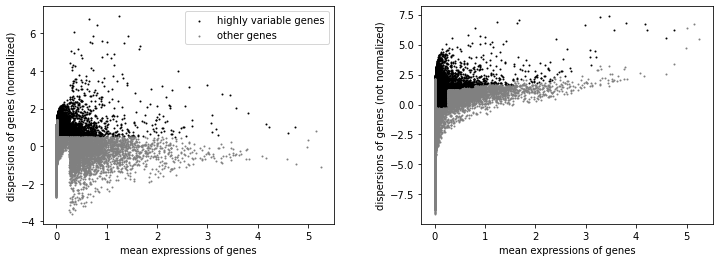

In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=5, min_disp=0.5)
#plot variable genes
sc.pl.highly_variable_genes(adata)
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [10]:
sc.pp.scale(adata, max_value=10)

/Users/kedarnatarajan/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
sc.tl.pca(adata, svd_solver='arpack')

... storing 'Dataset_Info_Dataset_Accession_Number' as categorical
... storing 'Organism' as categorical
... storing 'Organ' as categorical
... storing 'Developmental_Stage' as categorical
... storing 'Cell_Type' as categorical
... storing 'Sequencer' as categorical
... storing 'Protocol' as categorical
... storing 'Assay_Type' as categorical
... storing 'Library_Layout' as categorical
... storing 'Ontology_Term' as categorical
... storing 'Cell_Cycle_Phase' as categorical
... storing 'Gene name' as categorical


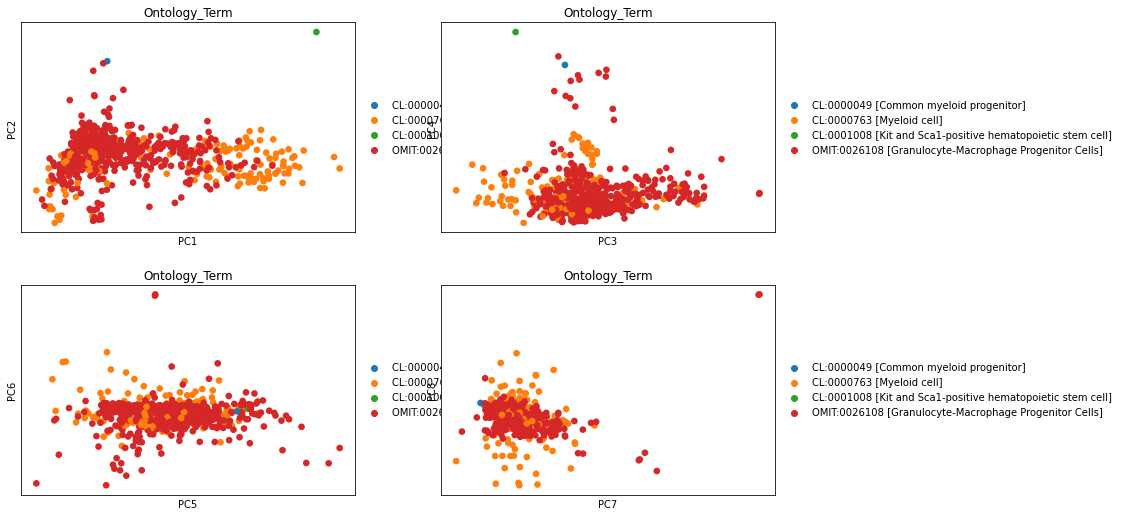

In [12]:
# plot more PCS
sc.pl.pca(adata, color = 'Ontology_Term', components = ['1,2','3,4','5,6','7,8'], ncols=2)

In [13]:
qc = sc.pp.calculate_qc_metrics(adata)

/Users/kedarnatarajan/miniconda3/lib/python3.9/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
sc.tl.tsne(adata)

In [15]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

In [16]:
sc.tl.tsne(adata)

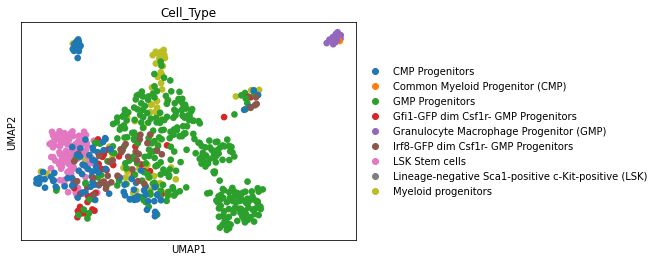

In [17]:

sc.pl.umap(adata, color = ['Cell_Type'])

In [18]:
countmatrix_up_vars[countmatrix_up_vars['Gene name'].str.match('Irf8', na=False)]

,Gene name,Gene % GC content
ENSMUSG00000041515,Irf8,52.67


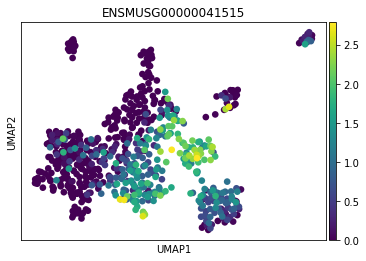

In [19]:
sc.pl.umap(adata, color=['ENSMUSG00000041515'])

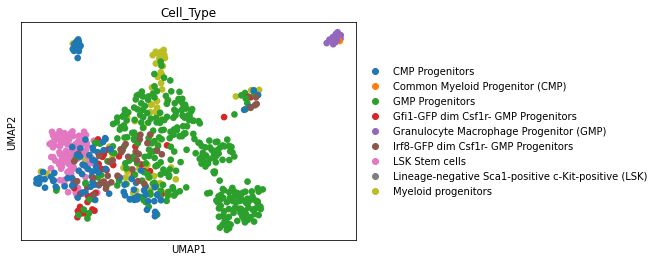

In [20]:
sc.pl.umap(adata, color = ['Cell_Type'])

In [21]:
adata.write(results_file, compression='gzip')

... storing 'Gene name' as categorical
